## Generate Dataset: ##

Generate bounding box groundtruth for object detection. An image consists of 17 vertebrae, each considered as different objects. Using the corner landmark-coordinates, bound each object with rectangular box. Every image will have 17 objects, each belonging to  different class (17 classes in total), with 4 bounding box coordinates for each object. This script will output a csv file with column headers as: <br/>``` [ image_name, xmin, ymin, xmax, ymax, label ] ```

In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import os

image shape: (1822, 842, 3)
329 43 139 65
341 107 129 86
361 197 111 63
344 270 117 79
322 341 126 86
301 418 131 92
280 499 126 85
267 585 121 79
259 674 134 70
261 762 132 77
271 849 146 102
295 947 149 113
329 1049 154 129
373 1161 172 130
414 1286 168 106
429 1409 178 104
422 1542 174 103
[141.58823529  92.29411765]


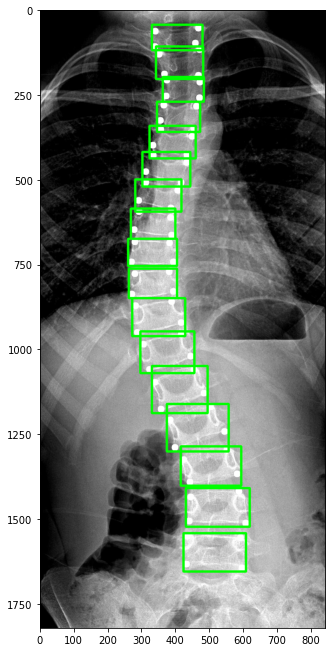

In [2]:
### visualize the bounding boxes

filename = "sunhl-1th-10-Jan-2017-254 A AP.jpg"
image_directory= "../boostnet_labeldata/data/training/"
label_directory= "../boostnet_labeldata/labels/training/"
image = image_directory+filename


img = cv2.imread(image)

data= pd.read_csv(label_directory+"landmarks.csv",header= None)
filename_labels= pd.read_csv(label_directory+"filenames.csv",header= None)

print ("image shape:",img.shape)
indx= filename_labels[filename_labels.iloc[:,0]== filename].index.tolist()
landmark= data.iloc[indx[0]].values
for m in range(0,68):
    cv2.circle(img,(int(img.shape[1]*landmark[m]),int(img.shape[0]*landmark[m+68])), 10, (255,255,255), -1)

landmark = [[int(round(img.shape[1]*landmark[m])),int(round(img.shape[0]*landmark[m+68]))] for m in range (0,68)]
#print (landmark)


N=4    
corners = [landmark[n:n+N] for n in range(0, len(landmark), N)]
corners= np.array(corners)

avg=[]
for box in corners:
    x,y,w,h = cv2.boundingRect(box)    
    cv2.rectangle(img,(x-10,y-10),(x+w+10,y+h+10),(0,255,0),5)
    avg.append((w+10,h+10))
    print (x-10,y-10,w+10,h+10)
    
print (np.mean(avg,axis=0))

plt.figure(1, figsize=(25,25))


plt.subplot(211)
plt.imshow(img[:,:,::-1])


### Save all the bounding boxes to visiualize

In [3]:
def visualize_all_bounding_box(image_directory, filenames_csv, landmarks_csv, save_path, split_type= 'train'):
    
    landmarks_data= pd.read_csv(landmarks_csv,header= None)
    filename_labels= pd.read_csv(filenames_csv,header= None)

    
    for i, names in enumerate(filename_labels.iloc[:,0]):

        img = cv2.imread(image_directory+names)
        print (image_directory+names)
        print (names)
        #print ("image shape",img.shape)
        landmarks = landmarks_data.loc[i].values
        landmarks = [[int(round(img.shape[1]*landmarks[m])),int(round(img.shape[0]*landmarks[m+68]))] for m in range (0,68)]
        
        # group landmark coordinates, each group has 4 points that represents a vertebra
        N=4     
        box = [landmarks[n:n+N] for n in range(0, len(landmarks), N)]
        #print (box)
        box= np.array(box)
        
        for c, box_coordinates in enumerate(box):
            x,y,w,h = cv2.boundingRect(box_coordinates) 
            cv2.rectangle(img,(x-10,y-10),(x+w+10,y+h+10),(0,255,0),5)
        cv2.imwrite(save_path+split_type+'/'+names,img)
           

In [4]:
train_data_directory = "../boostnet_labeldata/data/training/"
#test_data_directory = "../boostnet_labeldata/data/test/"
train_label_directory = "../boostnet_labeldata/labels/training/"
#test_label_directory = "../boostnet_labeldata/labels/test/"
save_path = "Visualize boxes/"

### call make_csv function to create dataset in format supported by luminoth library
if not os.path.exists('Visualize boxes/training/'):
    os.makedirs('Visualize boxes/training/')
visualize_all_bounding_box(train_data_directory,train_label_directory + 'filenames.csv',
                           train_label_directory + 'landmarks.csv',save_path, 'training')

#if not os.path.exists('Visualize boxes/test/'):
#    os.makedirs('Visualize boxes/test/')
#visualize_all_bounding_box(test_data_directory,test_label_directory + 'filenames.csv'),
#                           test_label_directory + 'landmarks.csv'),save_path, 'test')

../boostnet_labeldata/data/training/sunhl-1th-02-Jan-2017-162 A AP.jpg
sunhl-1th-02-Jan-2017-162 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-02-Jan-2017-162 B AP.jpg
sunhl-1th-02-Jan-2017-162 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-03-Jan-2017-163 A AP.jpg
sunhl-1th-03-Jan-2017-163 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-03-Jan-2017-163 B AP.jpg
sunhl-1th-03-Jan-2017-163 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-03-Jan-2017-164 A AP.jpg
sunhl-1th-03-Jan-2017-164 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-03-Jan-2017-165 A AP.jpg
sunhl-1th-03-Jan-2017-165 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-04-Jan-2017-165 B AP.jpg
sunhl-1th-04-Jan-2017-165 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-04-Jan-2017-165 C AP.jpg
sunhl-1th-04-Jan-2017-165 C AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-05-Jan-2017-167 A AP.jpg
sunhl-1th-05-Jan-2017-167 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-

../boostnet_labeldata/data/training/sunhl-1th-09-Jan-2017-212 B AP.jpg
sunhl-1th-09-Jan-2017-212 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-09-Jan-2017-212 C AP.jpg
sunhl-1th-09-Jan-2017-212 C AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-09-Jan-2017-214 A AP.jpg
sunhl-1th-09-Jan-2017-214 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-09-Jan-2017-214 C AP.jpg
sunhl-1th-09-Jan-2017-214 C AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-09-Jan-2017-215 B AP.jpg
sunhl-1th-09-Jan-2017-215 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-09-Jan-2017-215 C AP.jpg
sunhl-1th-09-Jan-2017-215 C AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-09-Jan-2017-215 D AP.jpg
sunhl-1th-09-Jan-2017-215 D AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-09-Jan-2017-215 E AP.jpg
sunhl-1th-09-Jan-2017-215 E AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-09-Jan-2017-215 G AP.jpg
sunhl-1th-09-Jan-2017-215 G AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-

../boostnet_labeldata/data/training/sunhl-1th-10-Jan-2017-251 A AP.jpg
sunhl-1th-10-Jan-2017-251 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-10-Jan-2017-252 A AP.jpg
sunhl-1th-10-Jan-2017-252 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-10-Jan-2017-252 B AP.jpg
sunhl-1th-10-Jan-2017-252 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-10-Jan-2017-253 A AP.jpg
sunhl-1th-10-Jan-2017-253 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-10-Jan-2017-253 B AP.jpg
sunhl-1th-10-Jan-2017-253 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-10-Jan-2017-254 A AP.jpg
sunhl-1th-10-Jan-2017-254 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-10-Jan-2017-254 B AP.jpg
sunhl-1th-10-Jan-2017-254 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-10-Jan-2017-254 C AP.jpg
sunhl-1th-10-Jan-2017-254 C AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-10-Jan-2017-254 D AP.jpg
sunhl-1th-10-Jan-2017-254 D AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-

../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-19 A AP.jpg
sunhl-1th-20-Jul-2016-19 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-19 B AP.jpg
sunhl-1th-20-Jul-2016-19 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-2 A AP.jpg
sunhl-1th-20-Jul-2016-2 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-2 B AP.jpg
sunhl-1th-20-Jul-2016-2 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-20 B AP.jpg
sunhl-1th-20-Jul-2016-20 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-20 C AP.jpg
sunhl-1th-20-Jul-2016-20 C AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-20 D AP.jpg
sunhl-1th-20-Jul-2016-20 D AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-3 A AP.jpg
sunhl-1th-20-Jul-2016-3 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-3 B AP.jpg
sunhl-1th-20-Jul-2016-3 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-20-Jul-2016-4 A AP.jpg
sun

../boostnet_labeldata/data/training/sunhl-1th-22-Nov-2016-141 D AP.jpg
sunhl-1th-22-Nov-2016-141 D AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-22-Nov-2016-141 E AP.jpg
sunhl-1th-22-Nov-2016-141 E AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-22-Nov-2016-141 F AP.jpg
sunhl-1th-22-Nov-2016-141 F AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-22-Nov-2016-142 A AP (2).jpg
sunhl-1th-22-Nov-2016-142 A AP (2).jpg
../boostnet_labeldata/data/training/sunhl-1th-22-Nov-2016-142 A AP.jpg
sunhl-1th-22-Nov-2016-142 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-22-Nov-2016-143 A AP.jpg
sunhl-1th-22-Nov-2016-143 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-22-Nov-2016-144 A AP.jpg
sunhl-1th-22-Nov-2016-144 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-22-Nov-2016-145 A AP.jpg
sunhl-1th-22-Nov-2016-145 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-22-Nov-2016-146 A AP.jpg
sunhl-1th-22-Nov-2016-146 A AP.jpg
../boostnet_labeldata/data/training/su

../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-51 A AP.jpg
sunhl-1th-25-Jul-2016-51 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-51 B AP.jpg
sunhl-1th-25-Jul-2016-51 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-52 A AP.jpg
sunhl-1th-25-Jul-2016-52 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-52 B AP.jpg
sunhl-1th-25-Jul-2016-52 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-52 C AP.jpg
sunhl-1th-25-Jul-2016-52 C AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-53 A AP.jpg
sunhl-1th-25-Jul-2016-53 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-53 B AP.jpg
sunhl-1th-25-Jul-2016-53 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-55 A AP.jpg
sunhl-1th-25-Jul-2016-55 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-55 B AP.jpg
sunhl-1th-25-Jul-2016-55 B AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-25-Jul-2016-56 A A

../boostnet_labeldata/data/training/sunhl-1th-30-Dec-2016-159 C AP.jpg
sunhl-1th-30-Dec-2016-159 C AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-30-Dec-2016-160 A AP.jpg
sunhl-1th-30-Dec-2016-160 A AP.jpg
../boostnet_labeldata/data/training/sunhl-1th-30-Dec-2016-161 A AP.jpg
sunhl-1th-30-Dec-2016-161 A AP.jpg


In [13]:
def make_csv_bounding_box(image_directory, filenames_csv, landmarks_csv, split_type= 'train'):
    
    landmarks_data= pd.read_csv(landmarks_csv,header= None)
    filename_labels= pd.read_csv(filenames_csv,header= None)
    
    df= pd.DataFrame(columns=['image_id', 'xmin','ymin','xmax','ymax','label'])

    
    for i, names in enumerate(filename_labels.iloc[:,0]):

        img = cv2.imread(image_directory+names)
        print (names)
        #print ("image shape",img.shape)
        landmarks = landmarks_data.loc[i].values
        landmarks = [[int(round(img.shape[1]*landmarks[m])),int(round(img.shape[0]*landmarks[m+68]))] for m in range (0,68)]
        
        # group landmark coordinates, each group has 4 points that represents a vertebra
        N=4     
        box = [landmarks[n:n+N] for n in range(0, len(landmarks), N)]
        #print (box)
        box= np.array(box)
        
        for c, box_coordinates in enumerate(box):
            x,y,w,h = cv2.boundingRect(box_coordinates)
            if c < 12:
                df= df.append({'image_id': names, 'xmin': x-50, 'ymin': y-10, 
                               'xmax': x+w+50,'ymax':y+h+10, 'label':1}, ignore_index=True) # increase the area of bounding rectangle if required
            else:
                df= df.append({'image_id': names, 'xmin': x-50, 'ymin': y-10, 
                               'xmax': x+w+50,'ymax':y+h+10, 'label':2}, ignore_index=True) # increase the area of bounding rectangle if required
                
    csv_file= split_type + ".csv"
    df.to_csv(csv_file,index= False)

        
        

In [14]:
train_data_directory = "../boostnet_labeldata/data/training/"
test_data_directory = "../boostnet_labeldata/data/test/"
train_label_directory = "../boostnet_labeldata/labels/training/"
test_label_directory = "../boostnet_labeldata/labels/test/"

### call make_csv function to create dataset in format supported by luminoth library

make_csv_bounding_box(train_data_directory,train_label_directory + 'filenames.csv',
         train_label_directory + 'landmarks.csv', 'training')


make_csv_bounding_box(test_data_directory,test_label_directory + 'filenames.csv',
         test_label_directory + 'landmarks.csv', 'test')


sunhl-1th-02-Jan-2017-162 A AP.jpg
sunhl-1th-02-Jan-2017-162 B AP.jpg
sunhl-1th-03-Jan-2017-163 A AP.jpg
sunhl-1th-03-Jan-2017-163 B AP.jpg
sunhl-1th-03-Jan-2017-164 A AP.jpg
sunhl-1th-03-Jan-2017-165 A AP.jpg
sunhl-1th-04-Jan-2017-165 B AP.jpg
sunhl-1th-04-Jan-2017-165 C AP.jpg
sunhl-1th-05-Jan-2017-167 A AP.jpg
sunhl-1th-05-Jan-2017-167 B AP.jpg
sunhl-1th-05-Jan-2017-169 A AP.jpg
sunhl-1th-05-Jan-2017-170 A AP.jpg
sunhl-1th-05-Jan-2017-171 A AP.jpg
sunhl-1th-05-Jan-2017-172 A AP.jpg
sunhl-1th-05-Jan-2017-172 B AP.jpg
sunhl-1th-05-Jan-2017-173 A AP.jpg
sunhl-1th-05-Jan-2017-174 A AP.jpg
sunhl-1th-05-Jan-2017-175 A AP.jpg
sunhl-1th-05-Jan-2017-176 A AP.jpg
sunhl-1th-06-Jan-2017-176 B AP.jpg
sunhl-1th-06-Jan-2017-177 A AP.jpg
sunhl-1th-06-Jan-2017-177 B AP.jpg
sunhl-1th-06-Jan-2017-177 C AP.jpg
sunhl-1th-06-Jan-2017-178 A AP.jpg
sunhl-1th-06-Jan-2017-178 B AP.jpg
sunhl-1th-06-Jan-2017-179 A AP.jpg
sunhl-1th-06-Jan-2017-180 A AP.jpg
sunhl-1th-06-Jan-2017-181 A AP.jpg
sunhl-1th-06-Jan-201

sunhl-1th-20-Jul-2016-19 B AP.jpg
sunhl-1th-20-Jul-2016-2 A AP.jpg
sunhl-1th-20-Jul-2016-2 B AP.jpg
sunhl-1th-20-Jul-2016-20 B AP.jpg
sunhl-1th-20-Jul-2016-20 C AP.jpg
sunhl-1th-20-Jul-2016-20 D AP.jpg
sunhl-1th-20-Jul-2016-3 A AP.jpg
sunhl-1th-20-Jul-2016-3 B AP.jpg
sunhl-1th-20-Jul-2016-4 A AP.jpg
sunhl-1th-20-Jul-2016-4 B AP.jpg
sunhl-1th-20-Jul-2016-5 A AP.jpg
sunhl-1th-20-Jul-2016-6 A AP.jpg
sunhl-1th-20-Jul-2016-7 A AP.jpg
sunhl-1th-20-Jul-2016-8 A AP.jpg
sunhl-1th-20-Jul-2016-8 B AP.jpg
sunhl-1th-20-Jul-2016-9 A AP.jpg
sunhl-1th-20-Jul-2016-coronal1.jpg
sunhl-1th-20-Jul-2016-coronal10.jpg
sunhl-1th-20-Jul-2016-coronal11.jpg
sunhl-1th-20-Jul-2016-coronal12.jpg
sunhl-1th-20-Jul-2016-coronal13.jpg
sunhl-1th-20-Jul-2016-coronal14.jpg
sunhl-1th-20-Jul-2016-coronal15.jpg
sunhl-1th-20-Jul-2016-coronal16.jpg
sunhl-1th-20-Jul-2016-coronal17.jpg
sunhl-1th-20-Jul-2016-coronal2.jpg
sunhl-1th-20-Jul-2016-coronal3.jpg
sunhl-1th-20-Jul-2016-coronal4.jpg
sunhl-1th-20-Jul-2016-coronal5.jpg
sunhl

sunhl-1th-30-Dec-2016-159 A AP2.jpg
sunhl-1th-30-Dec-2016-159 B AP.jpg
sunhl-1th-30-Dec-2016-159 C AP.jpg
sunhl-1th-30-Dec-2016-160 A AP.jpg
sunhl-1th-30-Dec-2016-161 A AP.jpg
sunhl-1th-01-Mar-2017-310 C AP.jpg
sunhl-1th-01-Mar-2017-310 a ap.jpg
sunhl-1th-01-Mar-2017-311 A AP.jpg
sunhl-1th-01-Mar-2017-311 C AP.jpg
sunhl-1th-01-Mar-2017-311 D AP.jpg
sunhl-1th-01-Mar-2017-311 E AP.jpg
sunhl-1th-01-Mar-2017-311 J AP.jpg
sunhl-1th-01-Mar-2017-311 K AP.jpg
sunhl-1th-01-Mar-2017-311 L AP.jpg
sunhl-1th-01-Mar-2017-311 M AP.jpg
sunhl-1th-01-Mar-2017-311 O AP.jpg
sunhl-1th-01-Mar-2017-311 P AP.jpg
sunhl-1th-01-Mar-2017-311 Q AP.jpg
sunhl-1th-01-Mar-2017-312 A AP.jpg
sunhl-1th-01-Mar-2017-312 B AP.jpg
sunhl-1th-01-Mar-2017-312 C AP.jpg
sunhl-1th-01-Mar-2017-312 D AP.jpg
sunhl-1th-01-Mar-2017-312 E AP.jpg
sunhl-1th-01-Mar-2017-313 A AP.jpg
sunhl-1th-01-Mar-2017-313 B AP.jpg
sunhl-1th-01-Mar-2017-313 C AP.jpg
sunhl-1th-01-Mar-2017-313 D AP.jpg
sunhl-1th-01-Mar-2017-313 E AP.jpg
sunhl-1th-01-Mar-20

## Generate GroundTruth for Landmark Prediction from Patch ##
 Using each vertebra bounding-box, generate patch-image (1 image will generate 17 patch-images). Find landmark-groundtruth-coordinates (between 0 and 1) for each patch.Save the groundtruth and patches.

In [15]:
def make_csv_landmark(image_directory, filenames_csv, landmarks_csv, split_type= 'train'):
    
    landmarks_data= pd.read_csv(landmarks_csv,header= None)
    filename_labels= pd.read_csv(filenames_csv,header= None)
    
    df= pd.DataFrame(columns=['image_id', 'x1','y1','x2','y2','x3','y3','x4','y4'])

    
    for i, names in enumerate(filename_labels.iloc[:,0]):

        img = cv2.imread(image_directory+names)
        
        landmarks = landmarks_data.loc[i].values
        landmarks = [[int(round(img.shape[1]*landmarks[m])),int(round(img.shape[0]*landmarks[m+68]))] for m in range (0,68)]
        
        # group landmark coordinates, each group has 4 points that represents a vertebra
        N=4     
        box = [landmarks[n:n+N] for n in range(0, len(landmarks), N)]
        #print (box)
        box= np.array(box)
        
        
        for c, box_coordinates in enumerate(box):
            print (box_coordinates)
            x_,y_,w_,h_ = cv2.boundingRect(box_coordinates)
            
            _increase_w = 50 #increase bounding box by certain pixels 
            _increase_h = 10
            
            # if increasing bounding box result in region outside the image,donot perform increment
            if (x_-_increase_w) <0 :
                _increase_w=0
            if (y_-_increase_h) <0 :
                _increase_h=0
            
            
            patch_image = crop_patch (img, x_,y_,w_,h_, increase_w=_increase_w, increase_h=_increase_h)
            
            adjusted_landmarks = adjust_landmarks_position(patch_image, box_coordinates, increase_w= _increase_w,
                                        increase_h= _increase_h ,x=x_,y=y_,w=w_, h= h_)
            
            
            patch_name = names.replace('.jpg', '')+'_'+str(c)+'.jpg' # filename for each patch
            print ("For Patch: ",patch_name)
            
           
            #resized_patch= cv2.resize(patch_image,(200,120),interpolation=cv2.INTER_AREA) #resize the patches to a fixed size
            
            
            # create a dictionary to append into dataframe row
            adjusted_landmarks_= adjusted_landmarks.ravel()
            adjusted_landmarks_=np.append(adjusted_landmarks_,patch_name)
            keywords= ['x1','y1','x2','y2','x3','y3','x4','y4','image_id']
            adjusted_landmarks_dict= dict(zip(keywords,adjusted_landmarks_))
            
            
            print (adjusted_landmarks_dict)
            
            ''''# for visualization of landmark
            adjusted_landmarks[:,0]= adjusted_landmarks[:,0]*resized_patch.shape[1]
            adjusted_landmarks[:,1]= adjusted_landmarks[:,1]*resized_patch.shape[0]
            
            
            for points in adjusted_landmarks:
                cv2.circle(resized_patch,(int(points[0]),int(points[1])), 3, (255,255,255), -1)
                print (points)'''
            
            save_path= split_type+'_patch_images/'+patch_name
            cv2.imwrite(save_path, patch_image)
            
    
            df= df.append(adjusted_landmarks_dict, ignore_index=True) 
            
            
    csv_file= split_type+ '_patches_gnd'+ ".csv"
    df.to_csv(csv_file,index= False)

In [16]:
def adjust_landmarks_position (patch_image, box_coordinates,x,y,w,h, increase_w =10, increase_h= 10):
    
    box_coordinates = box_coordinates.astype(float)

    
    # re-adjust the landmark coordinates in relation to single patch
    box_coordinates[:,0]= (box_coordinates[:,0]-(x-increase_w))/ patch_image.shape[1]
    box_coordinates[:,1]= (box_coordinates[:,1]-(y-increase_h))/ patch_image.shape[0]
      
    return box_coordinates
        
    

In [17]:
def crop_patch(image, x,y,w,h, increase_w = 10, increase_h=10):
    img_copy= np.copy(image)
    patch_image = img_copy[y-increase_h:y+h+increase_h,x-increase_w:x+w+increase_w]
    return patch_image
    

### Run this to generate patch images for train and validation, and a correponding csv file with landmark position (groundtruth)

In [18]:
train_data_directory = "../boostnet_labeldata/data/training/"
test_data_directory = "../boostnet_labeldata/data/test/"
train_label_directory= "../boostnet_labeldata/labels/training/"
test_label_directory = "../boostnet_labeldata/labels/test/"


make_csv_landmark(train_data_directory,train_label_directory + 'filenames.csv',
         train_label_directory + 'landmarks.csv', 'training')


make_csv_landmark(test_data_directory,test_label_directory + 'filenames.csv',
         test_label_directory + 'landmarks.csv', 'test')

[[361  72]
 [503  74]
 [351 110]
 [498 117]]
For Patch:  sunhl-1th-02-Jan-2017-162 A AP_0.jpg
{'x1': '0.23715415019762845', 'y1': '0.15151515151515152', 'x2': '0.7984189723320159', 'y2': '0.18181818181818182', 'x3': '0.1976284584980237', 'y3': '0.7272727272727273', 'x4': '0.7786561264822134', 'y4': '0.8333333333333334', 'image_id': 'sunhl-1th-02-Jan-2017-162 A AP_0.jpg'}
[[350 171]
 [482 174]
 [343 209]
 [467 231]]
For Patch:  sunhl-1th-02-Jan-2017-162 A AP_1.jpg
{'x1': '0.2375', 'y1': '0.12345679012345678', 'x2': '0.7875', 'y2': '0.16049382716049382', 'x3': '0.20833333333333334', 'y3': '0.5925925925925926', 'x4': '0.725', 'y4': '0.8641975308641975', 'image_id': 'sunhl-1th-02-Jan-2017-162 A AP_1.jpg'}
[[346 258]
 [472 275]
 [334 318]
 [463 329]]
For Patch:  sunhl-1th-02-Jan-2017-162 A AP_2.jpg
{'x1': '0.2594142259414226', 'y1': '0.10869565217391304', 'x2': '0.7866108786610879', 'y2': '0.29347826086956524', 'x3': '0.20920502092050208', 'y3': '0.7608695652173914', 'x4': '0.74895397489539

For Patch:  sunhl-1th-02-Jan-2017-162 B AP_10.jpg
{'x1': '0.14367816091954022', 'y1': '0.5818181818181818', 'x2': '0.5632183908045977', 'y2': '0.045454545454545456', 'x3': '0.41379310344827586', 'y3': '0.95', 'x4': '0.853448275862069', 'y4': '0.37727272727272726', 'image_id': 'sunhl-1th-02-Jan-2017-162 B AP_10.jpg'}
[[ 555 1379]
 [ 721 1286]
 [ 596 1463]
 [ 771 1356]]
For Patch:  sunhl-1th-02-Jan-2017-162 B AP_11.jpg
{'x1': '0.15772870662460567', 'y1': '0.5202020202020202', 'x2': '0.6813880126182965', 'y2': '0.050505050505050504', 'x3': '0.2870662460567823', 'y3': '0.9444444444444444', 'x4': '0.8391167192429022', 'y4': '0.40404040404040403', 'image_id': 'sunhl-1th-02-Jan-2017-162 B AP_11.jpg'}
[[ 629 1481]
 [ 814 1425]
 [ 648 1570]
 [ 846 1558]]
For Patch:  sunhl-1th-02-Jan-2017-162 B AP_12.jpg
{'x1': '0.15723270440251572', 'y1': '0.39759036144578314', 'x2': '0.7389937106918238', 'y2': '0.060240963855421686', 'x3': '0.2169811320754717', 'y3': '0.9337349397590361', 'x4': '0.839622641509

[[263  44]
 [398  35]
 [265  84]
 [393  79]]
For Patch:  sunhl-1th-03-Jan-2017-163 B AP_0.jpg
{'x1': '0.211864406779661', 'y1': '0.2714285714285714', 'x2': '0.7838983050847458', 'y2': '0.14285714285714285', 'x3': '0.22033898305084745', 'y3': '0.8428571428571429', 'x4': '0.7627118644067796', 'y4': '0.7714285714285715', 'image_id': 'sunhl-1th-03-Jan-2017-163 B AP_0.jpg'}
[[277 107]
 [390 110]
 [268 150]
 [388 155]]
For Patch:  sunhl-1th-03-Jan-2017-163 B AP_1.jpg
{'x1': '0.2645739910313901', 'y1': '0.14492753623188406', 'x2': '0.7713004484304933', 'y2': '0.18840579710144928', 'x3': '0.2242152466367713', 'y3': '0.7681159420289855', 'x4': '0.7623318385650224', 'y4': '0.8405797101449275', 'image_id': 'sunhl-1th-03-Jan-2017-163 B AP_1.jpg'}
[[272 175]
 [397 181]
 [252 227]
 [399 232]]
For Patch:  sunhl-1th-03-Jan-2017-163 B AP_2.jpg
{'x1': '0.28225806451612906', 'y1': '0.1282051282051282', 'x2': '0.7862903225806451', 'y2': '0.20512820512820512', 'x3': '0.20161290322580644', 'y3': '0.79487179

For Patch:  sunhl-1th-03-Jan-2017-164 A AP_9.jpg
{'x1': '0.29296875', 'y1': '0.13829787234042554', 'x2': '0.69921875', 'y2': '0.10638297872340426', 'x3': '0.1953125', 'y3': '0.8723404255319149', 'x4': '0.80078125', 'y4': '0.8829787234042553', 'image_id': 'sunhl-1th-03-Jan-2017-164 A AP_9.jpg'}
[[ 219 1014]
 [ 339 1022]
 [ 200 1091]
 [ 347 1099]]
For Patch:  sunhl-1th-03-Jan-2017-164 A AP_10.jpg
{'x1': '0.2782258064516129', 'y1': '0.09433962264150944', 'x2': '0.7620967741935484', 'y2': '0.16981132075471697', 'x3': '0.20161290322580644', 'y3': '0.8207547169811321', 'x4': '0.7943548387096774', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-03-Jan-2017-164 A AP_10.jpg'}
[[ 200 1142]
 [ 352 1147]
 [ 192 1219]
 [ 340 1241]]
For Patch:  sunhl-1th-03-Jan-2017-164 A AP_11.jpg
{'x1': '0.2222222222222222', 'y1': '0.08333333333333333', 'x2': '0.8045977011494253', 'y2': '0.125', 'x3': '0.19157088122605365', 'y3': '0.725', 'x4': '0.7586206896551724', 'y4': '0.9083333333333333', 'image_id': 'sunh

[[251  38]
 [399  50]
 [268  72]
 [387  85]]
For Patch:  sunhl-1th-04-Jan-2017-165 B AP_0.jpg
{'x1': '0.20080321285140562', 'y1': '0.14705882352941177', 'x2': '0.7951807228915663', 'y2': '0.3235294117647059', 'x3': '0.26907630522088355', 'y3': '0.6470588235294118', 'x4': '0.7469879518072289', 'y4': '0.8382352941176471', 'image_id': 'sunhl-1th-04-Jan-2017-165 B AP_0.jpg'}
[[265  90]
 [381 105]
 [261 128]
 [380 143]]
For Patch:  sunhl-1th-04-Jan-2017-165 B AP_1.jpg
{'x1': '0.24434389140271492', 'y1': '0.13513513513513514', 'x2': '0.7692307692307693', 'y2': '0.33783783783783783', 'x3': '0.22624434389140272', 'y3': '0.6486486486486487', 'x4': '0.7647058823529411', 'y4': '0.8513513513513513', 'image_id': 'sunhl-1th-04-Jan-2017-165 B AP_1.jpg'}
[[253 145]
 [369 163]
 [252 197]
 [357 210]]
For Patch:  sunhl-1th-04-Jan-2017-165 B AP_2.jpg
{'x1': '0.23394495412844038', 'y1': '0.11627906976744186', 'x2': '0.7660550458715596', 'y2': '0.32558139534883723', 'x3': '0.22935779816513763', 'y3': '0.720

[[264 619]
 [407 580]
 [266 658]
 [426 612]]
For Patch:  sunhl-1th-04-Jan-2017-165 C AP_7.jpg
{'x1': '0.19011406844106463', 'y1': '0.494949494949495', 'x2': '0.7338403041825095', 'y2': '0.10101010101010101', 'x3': '0.19771863117870722', 'y3': '0.8888888888888888', 'x4': '0.8060836501901141', 'y4': '0.42424242424242425', 'image_id': 'sunhl-1th-04-Jan-2017-165 C AP_7.jpg'}
[[271 684]
 [443 665]
 [286 737]
 [434 731]]
For Patch:  sunhl-1th-04-Jan-2017-165 C AP_8.jpg
{'x1': '0.18315018315018314', 'y1': '0.3118279569892473', 'x2': '0.8131868131868132', 'y2': '0.10752688172043011', 'x3': '0.23809523809523808', 'y3': '0.8817204301075269', 'x4': '0.7802197802197802', 'y4': '0.8172043010752689', 'image_id': 'sunhl-1th-04-Jan-2017-165 C AP_8.jpg'}
[[275 775]
 [405 800]
 [243 832]
 [381 857]]
For Patch:  sunhl-1th-04-Jan-2017-165 C AP_9.jpg
{'x1': '0.311787072243346', 'y1': '0.0970873786407767', 'x2': '0.8060836501901141', 'y2': '0.33980582524271846', 'x3': '0.19011406844106463', 'y3': '0.6504854

For Patch:  sunhl-1th-05-Jan-2017-167 B AP_7.jpg
{'x1': '0.22826086956521738', 'y1': '0.07092198581560284', 'x2': '0.8152173913043478', 'y2': '0.41843971631205673', 'x3': '0.18115942028985507', 'y3': '0.49645390070921985', 'x4': '0.6811594202898551', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-05-Jan-2017-167 B AP_7.jpg'}
[[ 332  944]
 [ 462 1004]
 [ 288 1024]
 [ 446 1100]]
For Patch:  sunhl-1th-05-Jan-2017-167 B AP_8.jpg
{'x1': '0.3418181818181818', 'y1': '0.05649717514124294', 'x2': '0.8145454545454546', 'y2': '0.3954802259887006', 'x3': '0.18181818181818182', 'y3': '0.5084745762711864', 'x4': '0.7563636363636363', 'y4': '0.9378531073446328', 'image_id': 'sunhl-1th-05-Jan-2017-167 B AP_8.jpg'}
[[ 262 1063]
 [ 418 1142]
 [ 184 1160]
 [ 384 1241]]
For Patch:  sunhl-1th-05-Jan-2017-167 B AP_9.jpg
{'x1': '0.382089552238806', 'y1': '0.05025125628140704', 'x2': '0.8477611940298507', 'y2': '0.4472361809045226', 'x3': '0.14925373134328357', 'y3': '0.5376884422110553', 'x4': '0.7462686

[[ 262 2290]
 [ 496 2306]
 [ 241 2418]
 [ 457 2423]]
For Patch:  sunhl-1th-05-Jan-2017-170 A AP_16.jpg
{'x1': '0.199438202247191', 'y1': '0.06493506493506493', 'x2': '0.8567415730337079', 'y2': '0.16883116883116883', 'x3': '0.1404494382022472', 'y3': '0.8961038961038961', 'x4': '0.7471910112359551', 'y4': '0.9285714285714286', 'image_id': 'sunhl-1th-05-Jan-2017-170 A AP_16.jpg'}
[[306 116]
 [535 105]
 [311 165]
 [527 163]]
For Patch:  sunhl-1th-05-Jan-2017-171 A AP_0.jpg
{'x1': '0.15151515151515152', 'y1': '0.25925925925925924', 'x2': '0.8454545454545455', 'y2': '0.12345679012345678', 'x3': '0.16666666666666666', 'y3': '0.8641975308641975', 'x4': '0.8212121212121212', 'y4': '0.8395061728395061', 'image_id': 'sunhl-1th-05-Jan-2017-171 A AP_0.jpg'}
[[324 202]
 [514 194]
 [324 264]
 [512 267]]
For Patch:  sunhl-1th-05-Jan-2017-171 A AP_1.jpg
{'x1': '0.1718213058419244', 'y1': '0.19148936170212766', 'x2': '0.8247422680412371', 'y2': '0.10638297872340426', 'x3': '0.1718213058419244', 'y3': 

For Patch:  sunhl-1th-05-Jan-2017-172 A AP_14.jpg
{'x1': '0.2070063694267516', 'y1': '0.05747126436781609', 'x2': '0.8375796178343949', 'y2': '0.1896551724137931', 'x3': '0.1592356687898089', 'y3': '0.7528735632183908', 'x4': '0.7993630573248408', 'y4': '0.9367816091954023', 'image_id': 'sunhl-1th-05-Jan-2017-172 A AP_14.jpg'}
[[ 383 1858]
 [ 601 1897]
 [ 357 1998]
 [ 589 2036]]
For Patch:  sunhl-1th-05-Jan-2017-172 A AP_15.jpg
{'x1': '0.22028985507246376', 'y1': '0.05025125628140704', 'x2': '0.8521739130434782', 'y2': '0.24623115577889448', 'x3': '0.14492753623188406', 'y3': '0.7537688442211056', 'x4': '0.8173913043478261', 'y4': '0.9447236180904522', 'image_id': 'sunhl-1th-05-Jan-2017-172 A AP_15.jpg'}
[[ 339 2046]
 [ 584 2068]
 [ 339 2147]
 [ 581 2161]]
For Patch:  sunhl-1th-05-Jan-2017-172 A AP_16.jpg
{'x1': '0.14450867052023122', 'y1': '0.07352941176470588', 'x2': '0.8526011560693642', 'y2': '0.23529411764705882', 'x3': '0.14450867052023122', 'y3': '0.8161764705882353', 'x4': '0.8

For Patch:  sunhl-1th-05-Jan-2017-173 A AP_16.jpg
{'x1': '0.1529051987767584', 'y1': '0.09803921568627451', 'x2': '0.8440366972477065', 'y2': '0.2549019607843137', 'x3': '0.1529051987767584', 'y3': '0.8627450980392157', 'x4': '0.8440366972477065', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-05-Jan-2017-173 A AP_16.jpg'}
[[363 110]
 [517 103]
 [377 166]
 [514 158]]
For Patch:  sunhl-1th-05-Jan-2017-174 A AP_0.jpg
{'x1': '0.19607843137254902', 'y1': '0.20238095238095238', 'x2': '0.8', 'y2': '0.11904761904761904', 'x3': '0.25098039215686274', 'y3': '0.8690476190476191', 'x4': '0.788235294117647', 'y4': '0.7738095238095238', 'image_id': 'sunhl-1th-05-Jan-2017-174 A AP_0.jpg'}
[[385 191]
 [502 182]
 [392 248]
 [511 241]]
For Patch:  sunhl-1th-05-Jan-2017-174 A AP_1.jpg
{'x1': '0.22026431718061673', 'y1': '0.21839080459770116', 'x2': '0.73568281938326', 'y2': '0.11494252873563218', 'x3': '0.2511013215859031', 'y3': '0.8735632183908046', 'x4': '0.775330396475771', 'y4': '0.793103448275

For Patch:  sunhl-1th-05-Jan-2017-175 A AP_15.jpg
{'x1': '0.15822784810126583', 'y1': '0.20855614973262032', 'x2': '0.8006329113924051', 'y2': '0.053475935828877004', 'x3': '0.2088607594936709', 'y3': '0.9411764705882353', 'x4': '0.8386075949367089', 'y4': '0.786096256684492', 'image_id': 'sunhl-1th-05-Jan-2017-175 A AP_15.jpg'}
[[ 440 2318]
 [ 635 2300]
 [ 467 2430]
 [ 652 2402]]
For Patch:  sunhl-1th-05-Jan-2017-175 A AP_16.jpg
{'x1': '0.1597444089456869', 'y1': '0.18543046357615894', 'x2': '0.7827476038338658', 'y2': '0.06622516556291391', 'x3': '0.24600638977635783', 'y3': '0.9271523178807947', 'x4': '0.8370607028753994', 'y4': '0.7417218543046358', 'image_id': 'sunhl-1th-05-Jan-2017-175 A AP_16.jpg'}
[[320  90]
 [448  87]
 [314 145]
 [450 133]]
For Patch:  sunhl-1th-05-Jan-2017-176 A AP_0.jpg
{'x1': '0.23628691983122363', 'y1': '0.16455696202531644', 'x2': '0.7763713080168776', 'y2': '0.12658227848101267', 'x3': '0.2109704641350211', 'y3': '0.8607594936708861', 'x4': '0.7848101265

{'x1': '0.276', 'y1': '0.08620689655172414', 'x2': '0.796', 'y2': '0.3017241379310345', 'x3': '0.2', 'y3': '0.6810344827586207', 'x4': '0.716', 'y4': '0.9051724137931034', 'image_id': 'sunhl-1th-06-Jan-2017-177 A AP_3.jpg'}
[[333 480]
 [465 498]
 [304 576]
 [456 584]]
For Patch:  sunhl-1th-06-Jan-2017-177 A AP_4.jpg
{'x1': '0.3015267175572519', 'y1': '0.08', 'x2': '0.8053435114503816', 'y2': '0.224', 'x3': '0.19083969465648856', 'y3': '0.848', 'x4': '0.7709923664122137', 'y4': '0.912', 'image_id': 'sunhl-1th-06-Jan-2017-177 A AP_4.jpg'}
[[295 614]
 [448 616]
 [273 698]
 [432 696]]
For Patch:  sunhl-1th-06-Jan-2017-177 A AP_5.jpg
{'x1': '0.2608695652173913', 'y1': '0.09523809523809523', 'x2': '0.8152173913043478', 'y2': '0.11428571428571428', 'x3': '0.18115942028985507', 'y3': '0.8952380952380953', 'x4': '0.7572463768115942', 'y4': '0.8761904761904762', 'image_id': 'sunhl-1th-06-Jan-2017-177 A AP_5.jpg'}
[[266 737]
 [433 724]
 [288 823]
 [439 804]]
For Patch:  sunhl-1th-06-Jan-2017-177 

[[449 290]
 [607 310]
 [446 353]
 [573 372]]
For Patch:  sunhl-1th-06-Jan-2017-177 C AP_2.jpg
{'x1': '0.20229007633587787', 'y1': '0.0970873786407767', 'x2': '0.8053435114503816', 'y2': '0.2912621359223301', 'x3': '0.19083969465648856', 'y3': '0.7087378640776699', 'x4': '0.6755725190839694', 'y4': '0.8932038834951457', 'image_id': 'sunhl-1th-06-Jan-2017-177 C AP_2.jpg'}
[[448 387]
 [578 417]
 [407 473]
 [544 504]]
For Patch:  sunhl-1th-06-Jan-2017-177 C AP_3.jpg
{'x1': '0.33455882352941174', 'y1': '0.07246376811594203', 'x2': '0.8125', 'y2': '0.2898550724637681', 'x3': '0.18382352941176472', 'y3': '0.6956521739130435', 'x4': '0.6875', 'y4': '0.9202898550724637', 'image_id': 'sunhl-1th-06-Jan-2017-177 C AP_3.jpg'}
[[389 506]
 [544 548]
 [367 569]
 [522 599]]
For Patch:  sunhl-1th-06-Jan-2017-177 C AP_4.jpg
{'x1': '0.2589928057553957', 'y1': '0.08771929824561403', 'x2': '0.8165467625899281', 'y2': '0.45614035087719296', 'x3': '0.17985611510791366', 'y3': '0.6403508771929824', 'x4': '0.73

For Patch:  sunhl-1th-06-Jan-2017-178 A AP_16.jpg
{'x1': '0.25308641975308643', 'y1': '0.0970873786407767', 'x2': '0.8425925925925926', 'y2': '0.18446601941747573', 'x3': '0.15432098765432098', 'y3': '0.8640776699029126', 'x4': '0.8055555555555556', 'y4': '0.8932038834951457', 'image_id': 'sunhl-1th-06-Jan-2017-178 A AP_16.jpg'}
[[446  66]
 [563 128]
 [421 117]
 [529 169]]
For Patch:  sunhl-1th-06-Jan-2017-178 B AP_0.jpg
{'x1': '0.30864197530864196', 'y1': '0.08064516129032258', 'x2': '0.7901234567901234', 'y2': '0.5806451612903226', 'x3': '0.205761316872428', 'y3': '0.49193548387096775', 'x4': '0.6502057613168725', 'y4': '0.9112903225806451', 'image_id': 'sunhl-1th-06-Jan-2017-178 B AP_0.jpg'}
[[407 140]
 [511 200]
 [379 180]
 [460 240]]
For Patch:  sunhl-1th-06-Jan-2017-178 B AP_1.jpg
{'x1': '0.33476394849785407', 'y1': '0.08264462809917356', 'x2': '0.7811158798283262', 'y2': '0.5785123966942148', 'x3': '0.2145922746781116', 'y3': '0.4132231404958678', 'x4': '0.5622317596566524', 'y4

[[366 274]
 [495 279]
 [359 336]
 [493 350]]
For Patch:  sunhl-1th-06-Jan-2017-180 A AP_2.jpg
{'x1': '0.24050632911392406', 'y1': '0.10309278350515463', 'x2': '0.7848101265822784', 'y2': '0.15463917525773196', 'x3': '0.2109704641350211', 'y3': '0.7422680412371134', 'x4': '0.7763713080168776', 'y4': '0.8865979381443299', 'image_id': 'sunhl-1th-06-Jan-2017-180 A AP_2.jpg'}
[[356 385]
 [493 387]
 [346 464]
 [494 472]]
For Patch:  sunhl-1th-06-Jan-2017-180 A AP_3.jpg
{'x1': '0.24096385542168675', 'y1': '0.09259259259259259', 'x2': '0.7911646586345381', 'y2': '0.1111111111111111', 'x3': '0.20080321285140562', 'y3': '0.8240740740740741', 'x4': '0.7951807228915663', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-06-Jan-2017-180 A AP_3.jpg'}
[[339 516]
 [504 532]
 [334 602]
 [474 612]]
For Patch:  sunhl-1th-06-Jan-2017-180 A AP_4.jpg
{'x1': '0.2029520295202952', 'y1': '0.08547008547008547', 'x2': '0.8118081180811808', 'y2': '0.2222222222222222', 'x3': '0.18450184501845018', 'y3': '0.820512

For Patch:  sunhl-1th-06-Jan-2017-182 A AP_6.jpg
{'x1': '0.2796610169491525', 'y1': '0.08403361344537816', 'x2': '0.7627118644067796', 'y2': '0.11764705882352941', 'x3': '0.211864406779661', 'y3': '0.907563025210084', 'x4': '0.7838983050847458', 'y4': '0.8823529411764706', 'image_id': 'sunhl-1th-06-Jan-2017-182 A AP_6.jpg'}
[[ 268  930]
 [ 400  922]
 [ 260 1023]
 [ 417 1021]]
For Patch:  sunhl-1th-06-Jan-2017-182 A AP_7.jpg
{'x1': '0.2248062015503876', 'y1': '0.14754098360655737', 'x2': '0.7364341085271318', 'y2': '0.08196721311475409', 'x3': '0.1937984496124031', 'y3': '0.9098360655737705', 'x4': '0.8023255813953488', 'y4': '0.8934426229508197', 'image_id': 'sunhl-1th-06-Jan-2017-182 A AP_7.jpg'}
[[ 274 1056]
 [ 402 1049]
 [ 269 1157]
 [ 433 1145]]
For Patch:  sunhl-1th-06-Jan-2017-182 A AP_8.jpg
{'x1': '0.20754716981132076', 'y1': '0.13178294573643412', 'x2': '0.690566037735849', 'y2': '0.07751937984496124', 'x3': '0.18867924528301888', 'y3': '0.9147286821705426', 'x4': '0.8075471698

For Patch:  sunhl-1th-06-Jan-2017-182 C AP_6.jpg
{'x1': '0.3157894736842105', 'y1': '0.07194244604316546', 'x2': '0.7935222672064778', 'y2': '0.23741007194244604', 'x3': '0.20242914979757085', 'y3': '0.7553956834532374', 'x4': '0.7408906882591093', 'y4': '0.920863309352518', 'image_id': 'sunhl-1th-06-Jan-2017-182 C AP_6.jpg'}
[[ 303  891]
 [ 425  912]
 [ 274  991]
 [ 428 1006]]
For Patch:  sunhl-1th-06-Jan-2017-182 C AP_7.jpg
{'x1': '0.30980392156862746', 'y1': '0.07352941176470588', 'x2': '0.788235294117647', 'y2': '0.22794117647058823', 'x3': '0.19607843137254902', 'y3': '0.8088235294117647', 'x4': '0.8', 'y4': '0.9191176470588235', 'image_id': 'sunhl-1th-06-Jan-2017-182 C AP_7.jpg'}
[[ 267 1033]
 [ 406 1033]
 [ 261 1135]
 [ 424 1133]]
For Patch:  sunhl-1th-06-Jan-2017-182 C AP_8.jpg
{'x1': '0.21212121212121213', 'y1': '0.08130081300813008', 'x2': '0.7386363636363636', 'y2': '0.08130081300813008', 'x3': '0.1893939393939394', 'y3': '0.9105691056910569', 'x4': '0.8068181818181818', 'y4

For Patch:  sunhl-1th-06-Jan-2017-187 A AP_8.jpg
{'x1': '0.18867924528301888', 'y1': '0.16071428571428573', 'x2': '0.8075471698113208', 'y2': '0.08928571428571429', 'x3': '0.18867924528301888', 'y3': '0.875', 'x4': '0.7584905660377359', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-06-Jan-2017-187 A AP_8.jpg'}
[[ 275 1147]
 [ 428 1139]
 [ 267 1225]
 [ 433 1225]]
For Patch:  sunhl-1th-06-Jan-2017-187 A AP_9.jpg
{'x1': '0.21722846441947566', 'y1': '0.16822429906542055', 'x2': '0.7902621722846442', 'y2': '0.09345794392523364', 'x3': '0.18726591760299627', 'y3': '0.897196261682243', 'x4': '0.8089887640449438', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-06-Jan-2017-187 A AP_9.jpg'}
[[ 269 1324]
 [ 436 1365]
 [ 256 1425]
 [ 439 1415]]
For Patch:  sunhl-1th-06-Jan-2017-187 A AP_10.jpg
{'x1': '0.22183098591549297', 'y1': '0.08196721311475409', 'x2': '0.8098591549295775', 'y2': '0.4180327868852459', 'x3': '0.176056338028169', 'y3': '0.9098360655737705', 'x4': '0.8204225352112676', '

For Patch:  sunhl-1th-06-Jan-2017-189 A AP_8.jpg
{'x1': '0.24175824175824176', 'y1': '0.11363636363636363', 'x2': '0.8131868131868132', 'y2': '0.17045454545454544', 'x3': '0.18315018315018314', 'y3': '0.875', 'x4': '0.7655677655677655', 'y4': '0.875', 'image_id': 'sunhl-1th-06-Jan-2017-189 A AP_8.jpg'}
[[ 394  923]
 [ 561  936]
 [ 397 1009]
 [ 566 1017]]
For Patch:  sunhl-1th-06-Jan-2017-189 A AP_9.jpg
{'x1': '0.18315018315018314', 'y1': '0.08695652173913043', 'x2': '0.7948717948717948', 'y2': '0.2', 'x3': '0.19413919413919414', 'y3': '0.8347826086956521', 'x4': '0.8131868131868132', 'y4': '0.9043478260869565', 'image_id': 'sunhl-1th-06-Jan-2017-189 A AP_9.jpg'}
[[ 400 1058]
 [ 564 1058]
 [ 379 1142]
 [ 564 1149]]
For Patch:  sunhl-1th-06-Jan-2017-189 A AP_10.jpg
{'x1': '0.24825174825174826', 'y1': '0.08928571428571429', 'x2': '0.8216783216783217', 'y2': '0.08928571428571429', 'x3': '0.17482517482517482', 'y3': '0.8392857142857143', 'x4': '0.8216783216783217', 'y4': '0.9017857142857143

[[ 262 1293]
 [ 368 1283]
 [ 257 1358]
 [ 365 1352]]
For Patch:  sunhl-1th-06-Jan-2017-191 A AP_13.jpg
{'x1': '0.25943396226415094', 'y1': '0.20833333333333334', 'x2': '0.7594339622641509', 'y2': '0.10416666666666667', 'x3': '0.2358490566037736', 'y3': '0.8854166666666666', 'x4': '0.7452830188679245', 'y4': '0.8229166666666666', 'image_id': 'sunhl-1th-06-Jan-2017-191 A AP_13.jpg'}
[[ 245 1409]
 [ 361 1413]
 [ 249 1489]
 [ 360 1494]]
For Patch:  sunhl-1th-06-Jan-2017-191 A AP_14.jpg
{'x1': '0.2304147465437788', 'y1': '0.09433962264150944', 'x2': '0.7649769585253456', 'y2': '0.1320754716981132', 'x3': '0.2488479262672811', 'y3': '0.8490566037735849', 'x4': '0.7603686635944701', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-06-Jan-2017-191 A AP_14.jpg'}
[[ 244 1543]
 [ 360 1539]
 [ 217 1631]
 [ 359 1645]]
For Patch:  sunhl-1th-06-Jan-2017-191 A AP_15.jpg
{'x1': '0.3155737704918033', 'y1': '0.11023622047244094', 'x2': '0.7909836065573771', 'y2': '0.07874015748031496', 'x3': '0.2049180

[[444 470]
 [571 478]
 [426 545]
 [564 545]]
For Patch:  sunhl-1th-09-Jan-2017-193 A AP_4.jpg
{'x1': '0.2764227642276423', 'y1': '0.10416666666666667', 'x2': '0.7926829268292683', 'y2': '0.1875', 'x3': '0.2032520325203252', 'y3': '0.8854166666666666', 'x4': '0.7642276422764228', 'y4': '0.8854166666666666', 'image_id': 'sunhl-1th-09-Jan-2017-193 A AP_4.jpg'}
[[436 584]
 [569 584]
 [431 644]
 [582 647]]
For Patch:  sunhl-1th-09-Jan-2017-193 A AP_5.jpg
{'x1': '0.21825396825396826', 'y1': '0.11904761904761904', 'x2': '0.746031746031746', 'y2': '0.11904761904761904', 'x3': '0.1984126984126984', 'y3': '0.8333333333333334', 'x4': '0.7976190476190477', 'y4': '0.8690476190476191', 'image_id': 'sunhl-1th-09-Jan-2017-193 A AP_5.jpg'}
[[431 673]
 [574 678]
 [415 756]
 [584 746]]
For Patch:  sunhl-1th-09-Jan-2017-193 A AP_6.jpg
{'x1': '0.24444444444444444', 'y1': '0.09615384615384616', 'x2': '0.774074074074074', 'y2': '0.14423076923076922', 'x3': '0.18518518518518517', 'y3': '0.8942307692307693', '

For Patch:  sunhl-1th-09-Jan-2017-194 B AP_15.jpg
{'x1': '0.22727272727272727', 'y1': '0.30952380952380953', 'x2': '0.7', 'y2': '0.11904761904761904', 'x3': '0.2772727272727273', 'y3': '0.8690476190476191', 'x4': '0.7681818181818182', 'y4': '0.7142857142857143', 'image_id': 'sunhl-1th-09-Jan-2017-194 B AP_15.jpg'}
[[ 238 1279]
 [ 363 1262]
 [ 234 1342]
 [ 370 1320]]
For Patch:  sunhl-1th-09-Jan-2017-194 B AP_16.jpg
{'x1': '0.22784810126582278', 'y1': '0.26732673267326734', 'x2': '0.7552742616033755', 'y2': '0.09900990099009901', 'x3': '0.2109704641350211', 'y3': '0.8910891089108911', 'x4': '0.7848101265822784', 'y4': '0.6732673267326733', 'image_id': 'sunhl-1th-09-Jan-2017-194 B AP_16.jpg'}
[[237  30]
 [363  48]
 [232  74]
 [357  88]]
For Patch:  sunhl-1th-09-Jan-2017-194 C AP_0.jpg
{'x1': '0.23706896551724138', 'y1': '0.12658227848101267', 'x2': '0.7801724137931034', 'y2': '0.35443037974683544', 'x3': '0.21551724137931033', 'y3': '0.6835443037974683', 'x4': '0.7543103448275862', 'y4':

For Patch:  sunhl-1th-09-Jan-2017-194 D AP_5.jpg
{'x1': '0.2736318407960199', 'y1': '0.16666666666666666', 'x2': '0.746268656716418', 'y2': '0.1388888888888889', 'x3': '0.24875621890547264', 'y3': '0.7777777777777778', 'x4': '0.7313432835820896', 'y4': '0.8472222222222222', 'image_id': 'sunhl-1th-09-Jan-2017-194 D AP_5.jpg'}
[[283 451]
 [384 456]
 [278 502]
 [383 505]]
For Patch:  sunhl-1th-09-Jan-2017-194 D AP_6.jpg
{'x1': '0.26570048309178745', 'y1': '0.13333333333333333', 'x2': '0.7536231884057971', 'y2': '0.2', 'x3': '0.24154589371980675', 'y3': '0.8133333333333334', 'x4': '0.748792270531401', 'y4': '0.8533333333333334', 'image_id': 'sunhl-1th-09-Jan-2017-194 D AP_6.jpg'}
[[275 529]
 [381 533]
 [274 575]
 [378 579]]
For Patch:  sunhl-1th-09-Jan-2017-194 D AP_7.jpg
{'x1': '0.24519230769230768', 'y1': '0.14084507042253522', 'x2': '0.7548076923076923', 'y2': '0.19718309859154928', 'x3': '0.2403846153846154', 'y3': '0.7887323943661971', 'x4': '0.7403846153846154', 'y4': '0.845070422535

For Patch:  sunhl-1th-09-Jan-2017-195 B AP_9.jpg
{'x1': '0.17482517482517482', 'y1': '0.22485207100591717', 'x2': '0.7237762237762237', 'y2': '0.05917159763313609', 'x3': '0.2202797202797203', 'y3': '0.9349112426035503', 'x4': '0.8216783216783217', 'y4': '0.6449704142011834', 'image_id': 'sunhl-1th-09-Jan-2017-195 B AP_9.jpg'}
[[ 330 1319]
 [ 496 1272]
 [ 345 1407]
 [ 533 1381]]
For Patch:  sunhl-1th-09-Jan-2017-195 B AP_10.jpg
{'x1': '0.16447368421052633', 'y1': '0.36538461538461536', 'x2': '0.7105263157894737', 'y2': '0.0641025641025641', 'x3': '0.2138157894736842', 'y3': '0.9294871794871795', 'x4': '0.8322368421052632', 'y4': '0.7628205128205128', 'image_id': 'sunhl-1th-09-Jan-2017-195 B AP_10.jpg'}
[[ 358 1446]
 [ 541 1423]
 [ 384 1556]
 [ 564 1532]]
For Patch:  sunhl-1th-09-Jan-2017-195 B AP_11.jpg
{'x1': '0.16286644951140064', 'y1': '0.21428571428571427', 'x2': '0.758957654723127', 'y2': '0.06493506493506493', 'x3': '0.247557003257329', 'y3': '0.9285714285714286', 'x4': '0.833876

For Patch:  sunhl-1th-09-Jan-2017-196 B AP_14.jpg
{'x1': '0.12077294685990338', 'y1': '0.17801047120418848', 'x2': '0.8695652173913043', 'y2': '0.05235602094240838', 'x3': '0.1280193236714976', 'y3': '0.9424083769633508', 'x4': '0.8768115942028986', 'y4': '0.680628272251309', 'image_id': 'sunhl-1th-09-Jan-2017-196 B AP_14.jpg'}
[[ 439 3147]
 [ 752 3100]
 [ 468 3267]
 [ 775 3228]]
For Patch:  sunhl-1th-09-Jan-2017-196 B AP_15.jpg
{'x1': '0.11441647597254005', 'y1': '0.30319148936170215', 'x2': '0.8306636155606407', 'y2': '0.05319148936170213', 'x3': '0.18077803203661327', 'y3': '0.9414893617021277', 'x4': '0.8832951945080092', 'y4': '0.7340425531914894', 'image_id': 'sunhl-1th-09-Jan-2017-196 B AP_15.jpg'}
[[ 458 3387]
 [ 799 3324]
 [ 489 3525]
 [ 838 3439]]
For Patch:  sunhl-1th-09-Jan-2017-196 B AP_16.jpg
{'x1': '0.10395010395010396', 'y1': '0.32882882882882886', 'x2': '0.8128898128898129', 'y2': '0.04504504504504504', 'x3': '0.1683991683991684', 'y3': '0.9504504504504504', 'x4': '0.8

For Patch:  sunhl-1th-09-Jan-2017-196 E AP_0.jpg
{'x1': '0.22624434389140272', 'y1': '0.36363636363636365', 'x2': '0.746606334841629', 'y2': '0.09090909090909091', 'x3': '0.26244343891402716', 'y3': '0.9', 'x4': '0.7692307692307693', 'y4': '0.6636363636363637', 'image_id': 'sunhl-1th-09-Jan-2017-196 E AP_0.jpg'}
[[291 228]
 [418 206]
 [309 291]
 [433 260]]
For Patch:  sunhl-1th-09-Jan-2017-196 E AP_1.jpg
{'x1': '0.205761316872428', 'y1': '0.3018867924528302', 'x2': '0.7283950617283951', 'y2': '0.09433962264150944', 'x3': '0.27983539094650206', 'y3': '0.8962264150943396', 'x4': '0.7901234567901234', 'y4': '0.6037735849056604', 'image_id': 'sunhl-1th-09-Jan-2017-196 E AP_1.jpg'}
[[313 335]
 [454 303]
 [310 408]
 [474 383]]
For Patch:  sunhl-1th-09-Jan-2017-196 E AP_2.jpg
{'x1': '0.2', 'y1': '0.3333333333333333', 'x2': '0.7320754716981132', 'y2': '0.07936507936507936', 'x3': '0.18867924528301888', 'y3': '0.9126984126984127', 'x4': '0.8075471698113208', 'y4': '0.7142857142857143', 'image_i

For Patch:  sunhl-1th-09-Jan-2017-197 B AP_7.jpg
{'x1': '0.22844827586206898', 'y1': '0.1875', 'x2': '0.728448275862069', 'y2': '0.10416666666666667', 'x3': '0.21551724137931033', 'y3': '0.8854166666666666', 'x4': '0.7801724137931034', 'y4': '0.78125', 'image_id': 'sunhl-1th-09-Jan-2017-197 B AP_7.jpg'}
[[252 779]
 [387 775]
 [254 843]
 [399 841]]
For Patch:  sunhl-1th-09-Jan-2017-197 B AP_8.jpg
{'x1': '0.20161290322580644', 'y1': '0.15730337078651685', 'x2': '0.7459677419354839', 'y2': '0.11235955056179775', 'x3': '0.20967741935483872', 'y3': '0.8764044943820225', 'x4': '0.7943548387096774', 'y4': '0.8539325842696629', 'image_id': 'sunhl-1th-09-Jan-2017-197 B AP_8.jpg'}
[[257 884]
 [403 876]
 [250 956]
 [408 950]]
For Patch:  sunhl-1th-09-Jan-2017-197 B AP_9.jpg
{'x1': '0.22007722007722008', 'y1': '0.1782178217821782', 'x2': '0.7837837837837838', 'y2': '0.09900990099009901', 'x3': '0.19305019305019305', 'y3': '0.8910891089108911', 'x4': '0.803088803088803', 'y4': '0.8316831683168316',

For Patch:  sunhl-1th-09-Jan-2017-197 D AP_10.jpg
{'x1': '0.19157088122605365', 'y1': '0.15151515151515152', 'x2': '0.7586206896551724', 'y2': '0.07575757575757576', 'x3': '0.19157088122605365', 'y3': '0.8863636363636364', 'x4': '0.8045977011494253', 'y4': '0.9166666666666666', 'image_id': 'sunhl-1th-09-Jan-2017-197 D AP_10.jpg'}
[[ 481 1335]
 [ 647 1344]
 [ 468 1429]
 [ 626 1457]]
For Patch:  sunhl-1th-09-Jan-2017-197 D AP_11.jpg
{'x1': '0.225', 'y1': '0.06993006993006994', 'x2': '0.8178571428571428', 'y2': '0.13286713286713286', 'x3': '0.17857142857142858', 'y3': '0.7272727272727273', 'x4': '0.7428571428571429', 'y4': '0.9230769230769231', 'image_id': 'sunhl-1th-09-Jan-2017-197 D AP_11.jpg'}
[[ 463 1481]
 [ 613 1512]
 [ 441 1580]
 [ 596 1605]]
For Patch:  sunhl-1th-09-Jan-2017-197 D AP_12.jpg
{'x1': '0.26373626373626374', 'y1': '0.06896551724137931', 'x2': '0.8131868131868132', 'y2': '0.2827586206896552', 'x3': '0.18315018315018314', 'y3': '0.7517241379310344', 'x4': '0.7509157509157

[[433 891]
 [566 886]
 [433 973]
 [567 977]]
For Patch:  sunhl-1th-09-Jan-2017-199 A AP_9.jpg
{'x1': '0.2127659574468085', 'y1': '0.13392857142857142', 'x2': '0.7787234042553192', 'y2': '0.08928571428571429', 'x3': '0.2127659574468085', 'y3': '0.8660714285714286', 'x4': '0.7829787234042553', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-09-Jan-2017-199 A AP_9.jpg'}
[[ 431 1011]
 [ 566 1014]
 [ 432 1105]
 [ 575 1111]]
For Patch:  sunhl-1th-09-Jan-2017-199 A AP_10.jpg
{'x1': '0.20408163265306123', 'y1': '0.08264462809917356', 'x2': '0.7551020408163265', 'y2': '0.10743801652892562', 'x3': '0.20816326530612245', 'y3': '0.859504132231405', 'x4': '0.7918367346938775', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-09-Jan-2017-199 A AP_10.jpg'}
[[ 431 1142]
 [ 576 1141]
 [ 424 1240]
 [ 579 1252]]
For Patch:  sunhl-1th-09-Jan-2017-199 A AP_11.jpg
{'x1': '0.22265625', 'y1': '0.08333333333333333', 'x2': '0.7890625', 'y2': '0.07575757575757576', 'x3': '0.1953125', 'y3': '0.82575757575757

For Patch:  sunhl-1th-09-Jan-2017-199 C AP_6.jpg
{'x1': '0.25', 'y1': '0.09174311926605505', 'x2': '0.7330508474576272', 'y2': '0.11009174311926606', 'x3': '0.211864406779661', 'y3': '0.8899082568807339', 'x4': '0.7838983050847458', 'y4': '0.8990825688073395', 'image_id': 'sunhl-1th-09-Jan-2017-199 C AP_6.jpg'}
[[381 839]
 [515 838]
 [377 934]
 [520 931]]
For Patch:  sunhl-1th-09-Jan-2017-199 C AP_7.jpg
{'x1': '0.22131147540983606', 'y1': '0.09401709401709402', 'x2': '0.7704918032786885', 'y2': '0.08547008547008547', 'x3': '0.20491803278688525', 'y3': '0.905982905982906', 'x4': '0.7909836065573771', 'y4': '0.8803418803418803', 'image_id': 'sunhl-1th-09-Jan-2017-199 C AP_7.jpg'}
[[ 379  964]
 [ 522  959]
 [ 379 1062]
 [ 537 1056]]
For Patch:  sunhl-1th-09-Jan-2017-199 C AP_8.jpg
{'x1': '0.19305019305019305', 'y1': '0.12096774193548387', 'x2': '0.7451737451737451', 'y2': '0.08064516129032258', 'x3': '0.19305019305019305', 'y3': '0.9112903225806451', 'x4': '0.803088803088803', 'y4': '0.86

[[383 700]
 [499 699]
 [377 777]
 [512 777]]
For Patch:  sunhl-1th-09-Jan-2017-201 A AP_6.jpg
{'x1': '0.23728813559322035', 'y1': '0.1111111111111111', 'x2': '0.7288135593220338', 'y2': '0.10101010101010101', 'x3': '0.211864406779661', 'y3': '0.8888888888888888', 'x4': '0.7838983050847458', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-09-Jan-2017-201 A AP_6.jpg'}
[[378 816]
 [502 813]
 [371 886]
 [517 889]]
For Patch:  sunhl-1th-09-Jan-2017-201 A AP_7.jpg
{'x1': '0.23076923076923078', 'y1': '0.13402061855670103', 'x2': '0.7327935222672065', 'y2': '0.10309278350515463', 'x3': '0.20242914979757085', 'y3': '0.8556701030927835', 'x4': '0.7935222672064778', 'y4': '0.8865979381443299', 'image_id': 'sunhl-1th-09-Jan-2017-201 A AP_7.jpg'}
[[ 375  928]
 [ 513  932]
 [ 365 1009]
 [ 512 1010]]
For Patch:  sunhl-1th-09-Jan-2017-201 A AP_8.jpg
{'x1': '0.24096385542168675', 'y1': '0.0970873786407767', 'x2': '0.7951807228915663', 'y2': '0.13592233009708737', 'x3': '0.20080321285140562', 'y3': '

For Patch:  sunhl-1th-09-Jan-2017-202 B AP_7.jpg
{'x1': '0.26422764227642276', 'y1': '0.11818181818181818', 'x2': '0.7886178861788617', 'y2': '0.09090909090909091', 'x3': '0.2032520325203252', 'y3': '0.9', 'x4': '0.7926829268292683', 'y4': '0.9', 'image_id': 'sunhl-1th-09-Jan-2017-202 B AP_7.jpg'}
[[ 348  927]
 [ 486  923]
 [ 347 1012]
 [ 497 1000]]
For Patch:  sunhl-1th-09-Jan-2017-202 B AP_8.jpg
{'x1': '0.20318725099601595', 'y1': '0.12727272727272726', 'x2': '0.7529880478087649', 'y2': '0.09090909090909091', 'x3': '0.199203187250996', 'y3': '0.9', 'x4': '0.796812749003984', 'y4': '0.7909090909090909', 'image_id': 'sunhl-1th-09-Jan-2017-202 B AP_8.jpg'}
[[ 350 1049]
 [ 498 1031]
 [ 357 1140]
 [ 505 1118]]
For Patch:  sunhl-1th-09-Jan-2017-202 B AP_9.jpg
{'x1': '0.1953125', 'y1': '0.2153846153846154', 'x2': '0.7734375', 'y2': '0.07692307692307693', 'x3': '0.22265625', 'y3': '0.9153846153846154', 'x4': '0.80078125', 'y4': '0.7461538461538462', 'image_id': 'sunhl-1th-09-Jan-2017-202 B A

For Patch:  sunhl-1th-09-Jan-2017-204 A AP_7.jpg
{'x1': '0.45041322314049587', 'y1': '0.0684931506849315', 'x2': '0.7892561983471075', 'y2': '0.5753424657534246', 'x3': '0.2066115702479339', 'y3': '0.4246575342465753', 'x4': '0.5661157024793388', 'y4': '0.9246575342465754', 'image_id': 'sunhl-1th-09-Jan-2017-204 A AP_7.jpg'}
[[169 717]
 [275 785]
 [125 795]
 [233 851]]
For Patch:  sunhl-1th-09-Jan-2017-204 A AP_8.jpg
{'x1': '0.3745019920318725', 'y1': '0.06451612903225806', 'x2': '0.796812749003984', 'y2': '0.5032258064516129', 'x3': '0.199203187250996', 'y3': '0.567741935483871', 'x4': '0.6294820717131474', 'y4': '0.9290322580645162', 'image_id': 'sunhl-1th-09-Jan-2017-204 A AP_8.jpg'}
[[111 817]
 [215 876]
 [ 51 903]
 [194 929]]
For Patch:  sunhl-1th-09-Jan-2017-204 A AP_9.jpg
{'x1': '0.41509433962264153', 'y1': '0.07518796992481203', 'x2': '0.8075471698113208', 'y2': '0.518796992481203', 'x3': '0.18867924528301888', 'y3': '0.7218045112781954', 'x4': '0.7283018867924528', 'y4': '0.91

For Patch:  sunhl-1th-09-Jan-2017-205 C AP_0.jpg
{'x1': '0.21008403361344538', 'y1': '0.15873015873015872', 'x2': '0.7857142857142857', 'y2': '0.2222222222222222', 'x3': '0.23949579831932774', 'y3': '0.8253968253968254', 'x4': '0.7521008403361344', 'y4': '0.7936507936507936', 'image_id': 'sunhl-1th-09-Jan-2017-205 C AP_0.jpg'}
[[290  93]
 [420  90]
 [300 141]
 [422 139]]
For Patch:  sunhl-1th-09-Jan-2017-205 C AP_1.jpg
{'x1': '0.2145922746781116', 'y1': '0.18055555555555555', 'x2': '0.7725321888412017', 'y2': '0.1388888888888889', 'x3': '0.2575107296137339', 'y3': '0.8472222222222222', 'x4': '0.7811158798283262', 'y4': '0.8194444444444444', 'image_id': 'sunhl-1th-09-Jan-2017-205 C AP_1.jpg'}
[[297 171]
 [420 174]
 [303 223]
 [418 225]]
For Patch:  sunhl-1th-09-Jan-2017-205 C AP_2.jpg
{'x1': '0.22321428571428573', 'y1': '0.13333333333333333', 'x2': '0.7723214285714286', 'y2': '0.17333333333333334', 'x3': '0.25', 'y3': '0.8266666666666667', 'x4': '0.7633928571428571', 'y4': '0.8533333333

[[455 438]
 [580 445]
 [456 527]
 [571 537]]
For Patch:  sunhl-1th-09-Jan-2017-205 E AP_3.jpg
{'x1': '0.22123893805309736', 'y1': '0.08333333333333333', 'x2': '0.7743362831858407', 'y2': '0.14166666666666666', 'x3': '0.22566371681415928', 'y3': '0.825', 'x4': '0.7345132743362832', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-09-Jan-2017-205 E AP_3.jpg'}
[[456 568]
 [569 571]
 [439 638]
 [572 646]]
For Patch:  sunhl-1th-09-Jan-2017-205 E AP_4.jpg
{'x1': '0.2863247863247863', 'y1': '0.10101010101010101', 'x2': '0.7692307692307693', 'y2': '0.13131313131313133', 'x3': '0.21367521367521367', 'y3': '0.8080808080808081', 'x4': '0.782051282051282', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-09-Jan-2017-205 E AP_4.jpg'}
[[438 678]
 [571 680]
 [443 778]
 [587 775]]
For Patch:  sunhl-1th-09-Jan-2017-205 E AP_5.jpg
{'x1': '0.2', 'y1': '0.08264462809917356', 'x2': '0.732', 'y2': '0.09917355371900827', 'x3': '0.22', 'y3': '0.9090909090909091', 'x4': '0.796', 'y4': '0.8842975206611571',

For Patch:  sunhl-1th-09-Jan-2017-206 A AP_14.jpg
{'x1': '0.15406976744186046', 'y1': '0.1524390243902439', 'x2': '0.7441860465116279', 'y2': '0.06097560975609756', 'x3': '0.14534883720930233', 'y3': '0.9329268292682927', 'x4': '0.8517441860465116', 'y4': '0.823170731707317', 'image_id': 'sunhl-1th-09-Jan-2017-206 A AP_14.jpg'}
[[ 468 2120]
 [ 695 2139]
 [ 442 2243]
 [ 685 2274]]
For Patch:  sunhl-1th-09-Jan-2017-206 A AP_15.jpg
{'x1': '0.21468926553672316', 'y1': '0.05714285714285714', 'x2': '0.8559322033898306', 'y2': '0.1657142857142857', 'x3': '0.14124293785310735', 'y3': '0.76', 'x4': '0.827683615819209', 'y4': '0.9371428571428572', 'image_id': 'sunhl-1th-09-Jan-2017-206 A AP_15.jpg'}
[[ 435 2295]
 [ 677 2318]
 [ 414 2386]
 [ 679 2399]]
For Patch:  sunhl-1th-09-Jan-2017-206 A AP_16.jpg
{'x1': '0.19398907103825136', 'y1': '0.08', 'x2': '0.855191256830601', 'y2': '0.264', 'x3': '0.1366120218579235', 'y3': '0.808', 'x4': '0.860655737704918', 'y4': '0.912', 'image_id': 'sunhl-1th-09-J

For Patch:  sunhl-1th-09-Jan-2017-207 A AP_14.jpg
{'x1': '0.2516778523489933', 'y1': '0.0641025641025641', 'x2': '0.8288590604026845', 'y2': '0.28846153846153844', 'x3': '0.16778523489932887', 'y3': '0.6666666666666666', 'x4': '0.7919463087248322', 'y4': '0.9294871794871795', 'image_id': 'sunhl-1th-09-Jan-2017-207 A AP_14.jpg'}
[[ 299 1811]
 [ 500 1843]
 [ 287 1921]
 [ 481 1930]]
For Patch:  sunhl-1th-09-Jan-2017-207 A AP_15.jpg
{'x1': '0.19745222929936307', 'y1': '0.07142857142857142', 'x2': '0.8375796178343949', 'y2': '0.3', 'x3': '0.1592356687898089', 'y3': '0.8571428571428571', 'x4': '0.7770700636942676', 'y4': '0.9214285714285714', 'image_id': 'sunhl-1th-09-Jan-2017-207 A AP_15.jpg'}
[[ 283 1959]
 [ 483 1972]
 [ 264 2051]
 [ 484 2058]]
For Patch:  sunhl-1th-09-Jan-2017-207 A AP_16.jpg
{'x1': '0.21495327102803738', 'y1': '0.08333333333333333', 'x2': '0.838006230529595', 'y2': '0.19166666666666668', 'x3': '0.1557632398753894', 'y3': '0.85', 'x4': '0.8411214953271028', 'y4': '0.90833

[[ 478 1430]
 [ 642 1361]
 [ 507 1533]
 [ 689 1472]]
For Patch:  sunhl-1th-09-Jan-2017-208 B AP_12.jpg
{'x1': '0.16025641025641027', 'y1': '0.40932642487046633', 'x2': '0.6858974358974359', 'y2': '0.05181347150259067', 'x3': '0.2532051282051282', 'y3': '0.9430051813471503', 'x4': '0.8365384615384616', 'y4': '0.6269430051813472', 'image_id': 'sunhl-1th-09-Jan-2017-208 B AP_12.jpg'}
[[ 513 1575]
 [ 698 1541]
 [ 530 1665]
 [ 725 1656]]
For Patch:  sunhl-1th-09-Jan-2017-208 B AP_13.jpg
{'x1': '0.1597444089456869', 'y1': '0.30344827586206896', 'x2': '0.7507987220447284', 'y2': '0.06896551724137931', 'x3': '0.21405750798722045', 'y3': '0.9241379310344827', 'x4': '0.8370607028753994', 'y4': '0.8620689655172413', 'image_id': 'sunhl-1th-09-Jan-2017-208 B AP_13.jpg'}
[[ 526 1711]
 [ 697 1760]
 [ 506 1810]
 [ 670 1854]]
For Patch:  sunhl-1th-09-Jan-2017-208 B AP_14.jpg
{'x1': '0.23972602739726026', 'y1': '0.06097560975609756', 'x2': '0.8253424657534246', 'y2': '0.3597560975609756', 'x3': '0.17123

For Patch:  sunhl-1th-09-Jan-2017-210 A AP_11.jpg
{'x1': '0.36015325670498083', 'y1': '0.05952380952380952', 'x2': '0.8045977011494253', 'y2': '0.5238095238095238', 'x3': '0.19157088122605365', 'y3': '0.30952380952380953', 'x4': '0.6360153256704981', 'y4': '0.9345238095238095', 'image_id': 'sunhl-1th-09-Jan-2017-210 A AP_11.jpg'}
[[ 394 1111]
 [ 517 1210]
 [ 342 1162]
 [ 485 1260]]
For Patch:  sunhl-1th-09-Jan-2017-210 A AP_12.jpg
{'x1': '0.3695652173913043', 'y1': '0.058823529411764705', 'x2': '0.8152173913043478', 'y2': '0.6411764705882353', 'x3': '0.18115942028985507', 'y3': '0.3588235294117647', 'x4': '0.6992753623188406', 'y4': '0.9352941176470588', 'image_id': 'sunhl-1th-09-Jan-2017-210 A AP_12.jpg'}
[[ 281 1210]
 [ 450 1290]
 [ 244 1296]
 [ 412 1339]]
For Patch:  sunhl-1th-09-Jan-2017-210 A AP_13.jpg
{'x1': '0.28338762214983715', 'y1': '0.06666666666666667', 'x2': '0.8338762214983714', 'y2': '0.6', 'x3': '0.16286644951140064', 'y3': '0.64', 'x4': '0.7100977198697068', 'y4': '0.9

For Patch:  sunhl-1th-09-Jan-2017-212 A AP_13.jpg
{'x1': '0.16666666666666666', 'y1': '0.13592233009708737', 'x2': '0.8266666666666667', 'y2': '0.0970873786407767', 'x3': '0.16666666666666666', 'y3': '0.8932038834951457', 'x4': '0.83', 'y4': '0.7864077669902912', 'image_id': 'sunhl-1th-09-Jan-2017-212 A AP_13.jpg'}
[[ 126 1655]
 [ 330 1654]
 [ 132 1749]
 [ 326 1742]]
For Patch:  sunhl-1th-09-Jan-2017-212 A AP_14.jpg
{'x1': '0.16393442622950818', 'y1': '0.09482758620689655', 'x2': '0.8327868852459016', 'y2': '0.08620689655172414', 'x3': '0.18360655737704917', 'y3': '0.9051724137931034', 'x4': '0.819672131147541', 'y4': '0.8448275862068966', 'image_id': 'sunhl-1th-09-Jan-2017-212 A AP_14.jpg'}
[[ 133 1768]
 [ 324 1765]
 [ 130 1854]
 [ 337 1843]]
For Patch:  sunhl-1th-09-Jan-2017-212 A AP_15.jpg
{'x1': '0.17207792207792208', 'y1': '0.11818181818181818', 'x2': '0.7922077922077922', 'y2': '0.09090909090909091', 'x3': '0.16233766233766234', 'y3': '0.9', 'x4': '0.8344155844155844', 'y4': '0.8

[[508 814]
 [625 895]
 [469 885]
 [580 951]]
For Patch:  sunhl-1th-09-Jan-2017-212 C AP_9.jpg
{'x1': '0.3463035019455253', 'y1': '0.06329113924050633', 'x2': '0.8015564202334631', 'y2': '0.5759493670886076', 'x3': '0.19455252918287938', 'y3': '0.5126582278481012', 'x4': '0.6264591439688716', 'y4': '0.930379746835443', 'image_id': 'sunhl-1th-09-Jan-2017-212 C AP_9.jpg'}
[[ 418  940]
 [ 560  983]
 [ 386 1010]
 [ 508 1068]]
For Patch:  sunhl-1th-09-Jan-2017-212 C AP_10.jpg
{'x1': '0.29818181818181816', 'y1': '0.06711409395973154', 'x2': '0.8145454545454546', 'y2': '0.35570469798657717', 'x3': '0.18181818181818182', 'y3': '0.5369127516778524', 'x4': '0.6254545454545455', 'y4': '0.9261744966442953', 'image_id': 'sunhl-1th-09-Jan-2017-212 C AP_10.jpg'}
[[ 358 1085]
 [ 490 1105]
 [ 335 1166]
 [ 478 1195]]
For Patch:  sunhl-1th-09-Jan-2017-212 C AP_11.jpg
{'x1': '0.28515625', 'y1': '0.07633587786259542', 'x2': '0.80078125', 'y2': '0.22900763358778625', 'x3': '0.1953125', 'y3': '0.6946564885496

For Patch:  sunhl-1th-09-Jan-2017-214 C AP_1.jpg
{'x1': '0.18726591760299627', 'y1': '0.41237113402061853', 'x2': '0.7490636704119851', 'y2': '0.10309278350515463', 'x3': '0.250936329588015', 'y3': '0.8865979381443299', 'x4': '0.8089887640449438', 'y4': '0.6288659793814433', 'image_id': 'sunhl-1th-09-Jan-2017-214 C AP_1.jpg'}
[[374 238]
 [508 221]
 [387 305]
 [516 283]]
For Patch:  sunhl-1th-09-Jan-2017-214 C AP_2.jpg
{'x1': '0.205761316872428', 'y1': '0.2571428571428571', 'x2': '0.757201646090535', 'y2': '0.09523809523809523', 'x3': '0.25925925925925924', 'y3': '0.8952380952380953', 'x4': '0.7901234567901234', 'y4': '0.6857142857142857', 'image_id': 'sunhl-1th-09-Jan-2017-214 C AP_2.jpg'}
[[403 329]
 [519 325]
 [420 395]
 [523 396]]
For Patch:  sunhl-1th-09-Jan-2017-214 C AP_3.jpg
{'x1': '0.22624434389140272', 'y1': '0.15217391304347827', 'x2': '0.751131221719457', 'y2': '0.10869565217391304', 'x3': '0.3031674208144796', 'y3': '0.8695652173913043', 'x4': '0.7692307692307693', 'y4': '0

For Patch:  sunhl-1th-09-Jan-2017-215 C AP_7.jpg
{'x1': '0.23809523809523808', 'y1': '0.12658227848101267', 'x2': '0.7792207792207793', 'y2': '0.1518987341772152', 'x3': '0.21645021645021645', 'y3': '0.7721518987341772', 'x4': '0.7748917748917749', 'y4': '0.8607594936708861', 'image_id': 'sunhl-1th-09-Jan-2017-215 C AP_7.jpg'}
[[296 736]
 [419 743]
 [287 791]
 [413 801]]
For Patch:  sunhl-1th-09-Jan-2017-215 C AP_8.jpg
{'x1': '0.2532188841201717', 'y1': '0.11627906976744186', 'x2': '0.7811158798283262', 'y2': '0.19767441860465115', 'x3': '0.2145922746781116', 'y3': '0.7558139534883721', 'x4': '0.7553648068669528', 'y4': '0.872093023255814', 'image_id': 'sunhl-1th-09-Jan-2017-215 C AP_8.jpg'}
[[288 827]
 [412 844]
 [263 891]
 [401 908]]
For Patch:  sunhl-1th-09-Jan-2017-215 C AP_9.jpg
{'x1': '0.3', 'y1': '0.09803921568627451', 'x2': '0.796', 'y2': '0.2647058823529412', 'x3': '0.2', 'y3': '0.7254901960784313', 'x4': '0.752', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-09-Jan-2017-

[[ 240 1285]
 [ 386 1302]
 [ 222 1396]
 [ 391 1400]]
For Patch:  sunhl-1th-09-Jan-2017-215 E AP_12.jpg
{'x1': '0.2518518518518518', 'y1': '0.07352941176470588', 'x2': '0.7925925925925926', 'y2': '0.19852941176470587', 'x3': '0.18518518518518517', 'y3': '0.8897058823529411', 'x4': '0.8111111111111111', 'y4': '0.9191176470588235', 'image_id': 'sunhl-1th-09-Jan-2017-215 E AP_12.jpg'}
[[ 218 1453]
 [ 389 1425]
 [ 235 1550]
 [ 406 1526]]
For Patch:  sunhl-1th-09-Jan-2017-215 E AP_13.jpg
{'x1': '0.17301038062283736', 'y1': '0.2602739726027397', 'x2': '0.7647058823529411', 'y2': '0.0684931506849315', 'x3': '0.23183391003460208', 'y3': '0.9246575342465754', 'x4': '0.8235294117647058', 'y4': '0.7602739726027398', 'image_id': 'sunhl-1th-09-Jan-2017-215 E AP_13.jpg'}
[[ 251 1618]
 [ 425 1592]
 [ 264 1705]
 [ 438 1679]]
For Patch:  sunhl-1th-09-Jan-2017-215 E AP_14.jpg
{'x1': '0.1736111111111111', 'y1': '0.26865671641791045', 'x2': '0.7777777777777778', 'y2': '0.07462686567164178', 'x3': '0.21875'

 [ 465 1254]]
For Patch:  sunhl-1th-09-Jan-2017-216 A AP_11.jpg
{'x1': '0.1968503937007874', 'y1': '0.09259259259259259', 'x2': '0.7992125984251969', 'y2': '0.12962962962962962', 'x3': '0.2204724409448819', 'y3': '0.7962962962962963', 'x4': '0.7244094488188977', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-09-Jan-2017-216 A AP_11.jpg'}
[[ 325 1306]
 [ 482 1305]
 [ 326 1386]
 [ 475 1398]]
For Patch:  sunhl-1th-09-Jan-2017-216 A AP_12.jpg
{'x1': '0.1937984496124031', 'y1': '0.09649122807017543', 'x2': '0.8023255813953488', 'y2': '0.08771929824561403', 'x3': '0.19767441860465115', 'y3': '0.7982456140350878', 'x4': '0.7751937984496124', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-09-Jan-2017-216 A AP_12.jpg'}
[[ 335 1434]
 [ 473 1447]
 [ 325 1517]
 [ 469 1517]]
For Patch:  sunhl-1th-09-Jan-2017-216 A AP_13.jpg
{'x1': '0.24096385542168675', 'y1': '0.09615384615384616', 'x2': '0.7951807228915663', 'y2': '0.22115384615384615', 'x3': '0.20080321285140562', 'y3': '0.894230769230769

For Patch:  sunhl-1th-09-Jan-2017-217 A AP_12.jpg
{'x1': '0.16025641025641027', 'y1': '0.3582887700534759', 'x2': '0.7307692307692307', 'y2': '0.053475935828877004', 'x3': '0.2692307692307692', 'y3': '0.9411764705882353', 'x4': '0.8365384615384616', 'y4': '0.6577540106951871', 'image_id': 'sunhl-1th-09-Jan-2017-217 A AP_12.jpg'}
[[ 521 1594]
 [ 711 1567]
 [ 539 1683]
 [ 731 1691]]
For Patch:  sunhl-1th-09-Jan-2017-217 A AP_13.jpg
{'x1': '0.1607717041800643', 'y1': '0.25517241379310346', 'x2': '0.7717041800643086', 'y2': '0.06896551724137931', 'x3': '0.21864951768488747', 'y3': '0.8689655172413793', 'x4': '0.8360128617363344', 'y4': '0.9241379310344827', 'image_id': 'sunhl-1th-09-Jan-2017-217 A AP_13.jpg'}
[[ 536 1747]
 [ 724 1766]
 [ 525 1848]
 [ 702 1885]]
For Patch:  sunhl-1th-09-Jan-2017-217 A AP_14.jpg
{'x1': '0.20333333333333334', 'y1': '0.06289308176100629', 'x2': '0.83', 'y2': '0.18238993710691823', 'x3': '0.16666666666666666', 'y3': '0.6981132075471698', 'x4': '0.75666666666666

For Patch:  sunhl-1th-09-Jan-2017-219 A AP_11.jpg
{'x1': '0.1773049645390071', 'y1': '0.14792899408284024', 'x2': '0.7730496453900709', 'y2': '0.05917159763313609', 'x3': '0.19858156028368795', 'y3': '0.9349112426035503', 'x4': '0.8191489361702128', 'y4': '0.8165680473372781', 'image_id': 'sunhl-1th-09-Jan-2017-219 A AP_11.jpg'}
[[ 212 1644]
 [ 377 1589]
 [ 255 1752]
 [ 410 1694]]
For Patch:  sunhl-1th-09-Jan-2017-219 A AP_12.jpg
{'x1': '0.16722408026755853', 'y1': '0.3532608695652174', 'x2': '0.7190635451505016', 'y2': '0.05434782608695652', 'x3': '0.3110367892976589', 'y3': '0.9402173913043478', 'x4': '0.8294314381270903', 'y4': '0.625', 'image_id': 'sunhl-1th-09-Jan-2017-219 A AP_12.jpg'}
[[ 298 1819]
 [ 435 1726]
 [ 341 1908]
 [ 492 1825]]
For Patch:  sunhl-1th-09-Jan-2017-219 A AP_13.jpg
{'x1': '0.1694915254237288', 'y1': '0.5073891625615764', 'x2': '0.6338983050847458', 'y2': '0.04926108374384237', 'x3': '0.3152542372881356', 'y3': '0.9458128078817734', 'x4': '0.8271186440677966'

For Patch:  sunhl-1th-09-Jan-2017-219 C AP_7.jpg
{'x1': '0.21705426356589147', 'y1': '0.07042253521126761', 'x2': '0.8023255813953488', 'y2': '0.16901408450704225', 'x3': '0.1937984496124031', 'y3': '0.7323943661971831', 'x4': '0.7829457364341085', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-09-Jan-2017-219 C AP_7.jpg'}
[[ 362 1007]
 [ 507 1038]
 [ 336 1111]
 [ 494 1145]]
For Patch:  sunhl-1th-09-Jan-2017-219 C AP_8.jpg
{'x1': '0.27941176470588236', 'y1': '0.06289308176100629', 'x2': '0.8125', 'y2': '0.2578616352201258', 'x3': '0.18382352941176472', 'y3': '0.7169811320754716', 'x4': '0.7647058823529411', 'y4': '0.9308176100628931', 'image_id': 'sunhl-1th-09-Jan-2017-219 C AP_8.jpg'}
[[ 333 1150]
 [ 480 1178]
 [ 315 1257]
 [ 460 1283]]
For Patch:  sunhl-1th-09-Jan-2017-219 C AP_9.jpg
{'x1': '0.2556390977443609', 'y1': '0.06493506493506493', 'x2': '0.8082706766917294', 'y2': '0.24675324675324675', 'x3': '0.18796992481203006', 'y3': '0.7597402597402597', 'x4': '0.7330827067669173',

For Patch:  sunhl-1th-10-Jan-2017-221 A AP_0.jpg
{'x1': '0.2', 'y1': '0.4657534246575342', 'x2': '0.664', 'y2': '0.0684931506849315', 'x3': '0.28', 'y3': '0.9246575342465754', 'x4': '0.796', 'y4': '0.3904109589041096', 'image_id': 'sunhl-1th-10-Jan-2017-221 A AP_0.jpg'}
[[353 202]
 [476 132]
 [420 253]
 [529 201]]
For Patch:  sunhl-1th-10-Jan-2017-221 A AP_1.jpg
{'x1': '0.18050541516245489', 'y1': '0.5633802816901409', 'x2': '0.6245487364620939', 'y2': '0.07042253521126761', 'x3': '0.4223826714801444', 'y3': '0.9225352112676056', 'x4': '0.8158844765342961', 'y4': '0.5563380281690141', 'image_id': 'sunhl-1th-10-Jan-2017-221 A AP_1.jpg'}
[[438 286]
 [537 221]
 [484 326]
 [590 266]]
For Patch:  sunhl-1th-10-Jan-2017-221 A AP_2.jpg
{'x1': '0.1976284584980237', 'y1': '0.5952380952380952', 'x2': '0.5889328063241107', 'y2': '0.07936507936507936', 'x3': '0.3794466403162055', 'y3': '0.9126984126984127', 'x4': '0.7984189723320159', 'y4': '0.4365079365079365', 'image_id': 'sunhl-1th-10-Jan-2017-2

For Patch:  sunhl-1th-10-Jan-2017-221 C AP_0.jpg
{'x1': '0.19157088122605365', 'y1': '0.3945578231292517', 'x2': '0.5708812260536399', 'y2': '0.06802721088435375', 'x3': '0.3524904214559387', 'y3': '0.9251700680272109', 'x4': '0.8045977011494253', 'y4': '0.46258503401360546', 'image_id': 'sunhl-1th-10-Jan-2017-221 C AP_0.jpg'}
[[374 235]
 [486 154]
 [432 275]
 [525 210]]
For Patch:  sunhl-1th-10-Jan-2017-221 C AP_1.jpg
{'x1': '0.1984126984126984', 'y1': '0.6408450704225352', 'x2': '0.6428571428571429', 'y2': '0.07042253521126761', 'x3': '0.42857142857142855', 'y3': '0.9225352112676056', 'x4': '0.7976190476190477', 'y4': '0.4647887323943662', 'image_id': 'sunhl-1th-10-Jan-2017-221 C AP_1.jpg'}
[[452 296]
 [542 226]
 [476 338]
 [583 284]]
For Patch:  sunhl-1th-10-Jan-2017-221 C AP_2.jpg
{'x1': '0.21551724137931033', 'y1': '0.6015037593984962', 'x2': '0.603448275862069', 'y2': '0.07518796992481203', 'x3': '0.31896551724137934', 'y3': '0.9172932330827067', 'x4': '0.7801724137931034', 'y4':

For Patch:  sunhl-1th-10-Jan-2017-222 A AP_16.jpg
{'x1': '0.16891891891891891', 'y1': '0.15053763440860216', 'x2': '0.8277027027027027', 'y2': '0.10752688172043011', 'x3': '0.17567567567567569', 'y3': '0.8817204301075269', 'x4': '0.7871621621621622', 'y4': '0.6559139784946236', 'image_id': 'sunhl-1th-10-Jan-2017-222 A AP_16.jpg'}
[[396  59]
 [548  52]
 [400 113]
 [547 113]]
For Patch:  sunhl-1th-10-Jan-2017-222 B AP_0.jpg
{'x1': '0.1976284584980237', 'y1': '0.2073170731707317', 'x2': '0.7984189723320159', 'y2': '0.12195121951219512', 'x3': '0.2134387351778656', 'y3': '0.8658536585365854', 'x4': '0.7944664031620553', 'y4': '0.8658536585365854', 'image_id': 'sunhl-1th-10-Jan-2017-222 B AP_0.jpg'}
[[398 138]
 [551 137]
 [401 199]
 [555 195]]
For Patch:  sunhl-1th-10-Jan-2017-222 B AP_1.jpg
{'x1': '0.1937984496124031', 'y1': '0.13253012048192772', 'x2': '0.7868217054263565', 'y2': '0.12048192771084337', 'x3': '0.2054263565891473', 'y3': '0.8674698795180723', 'x4': '0.8023255813953488', 'y4

For Patch:  sunhl-1th-10-Jan-2017-224 A AP_15.jpg
{'x1': '0.2679245283018868', 'y1': '0.08403361344537816', 'x2': '0.7660377358490567', 'y2': '0.11764705882352941', 'x3': '0.18867924528301888', 'y3': '0.7563025210084033', 'x4': '0.8075471698113208', 'y4': '0.907563025210084', 'image_id': 'sunhl-1th-10-Jan-2017-224 A AP_15.jpg'}
[[ 448 2036]
 [ 626 2044]
 [ 419 2149]
 [ 630 2154]]
For Patch:  sunhl-1th-10-Jan-2017-224 A AP_16.jpg
{'x1': '0.2532051282051282', 'y1': '0.07194244604316546', 'x2': '0.8237179487179487', 'y2': '0.12949640287769784', 'x3': '0.16025641025641027', 'y3': '0.8848920863309353', 'x4': '0.8365384615384616', 'y4': '0.920863309352518', 'image_id': 'sunhl-1th-10-Jan-2017-224 A AP_16.jpg'}
[[322 100]
 [450  84]
 [331 140]
 [458 137]]
For Patch:  sunhl-1th-10-Jan-2017-227 A AP_0.jpg
{'x1': '0.2109704641350211', 'y1': '0.33766233766233766', 'x2': '0.7510548523206751', 'y2': '0.12987012987012986', 'x3': '0.2489451476793249', 'y3': '0.8571428571428571', 'x4': '0.7848101265822

For Patch:  sunhl-1th-10-Jan-2017-227 C AP_0.jpg
{'x1': '0.22321428571428573', 'y1': '0.12244897959183673', 'x2': '0.7678571428571429', 'y2': '0.10204081632653061', 'x3': '0.23660714285714285', 'y3': '0.8877551020408163', 'x4': '0.7723214285714286', 'y4': '0.8571428571428571', 'image_id': 'sunhl-1th-10-Jan-2017-227 C AP_0.jpg'}
[[387 314]
 [502 310]
 [398 369]
 [498 368]]
For Patch:  sunhl-1th-10-Jan-2017-227 C AP_1.jpg
{'x1': '0.23148148148148148', 'y1': '0.175', 'x2': '0.7638888888888888', 'y2': '0.125', 'x3': '0.2824074074074074', 'y3': '0.8625', 'x4': '0.7453703703703703', 'y4': '0.85', 'image_id': 'sunhl-1th-10-Jan-2017-227 C AP_1.jpg'}
[[407 413]
 [507 407]
 [391 480]
 [524 474]]
For Patch:  sunhl-1th-10-Jan-2017-227 C AP_2.jpg
{'x1': '0.28205128205128205', 'y1': '0.1702127659574468', 'x2': '0.7094017094017094', 'y2': '0.10638297872340426', 'x3': '0.21367521367521367', 'y3': '0.8829787234042553', 'x4': '0.782051282051282', 'y4': '0.8191489361702128', 'image_id': 'sunhl-1th-10-Jan

For Patch:  sunhl-1th-10-Jan-2017-227 D AP_5.jpg
{'x1': '0.28703703703703703', 'y1': '0.08849557522123894', 'x2': '0.7638888888888888', 'y2': '0.1504424778761062', 'x3': '0.23148148148148148', 'y3': '0.6814159292035398', 'x4': '0.75', 'y4': '0.9026548672566371', 'image_id': 'sunhl-1th-10-Jan-2017-227 D AP_5.jpg'}
[[454 735]
 [572 754]
 [445 817]
 [559 834]]
For Patch:  sunhl-1th-10-Jan-2017-227 D AP_6.jpg
{'x1': '0.25877192982456143', 'y1': '0.08333333333333333', 'x2': '0.7763157894736842', 'y2': '0.24166666666666667', 'x3': '0.21929824561403508', 'y3': '0.7666666666666667', 'x4': '0.7192982456140351', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-10-Jan-2017-227 D AP_6.jpg'}
[[438 849]
 [551 860]
 [418 935]
 [556 948]]
For Patch:  sunhl-1th-10-Jan-2017-227 D AP_7.jpg
{'x1': '0.2928870292887029', 'y1': '0.08333333333333333', 'x2': '0.7656903765690377', 'y2': '0.175', 'x3': '0.20920502092050208', 'y3': '0.8', 'x4': '0.7866108786610879', 'y4': '0.9083333333333333', 'image_id': 'sunh

For Patch:  sunhl-1th-10-Jan-2017-227 E AP_15.jpg
{'x1': '0.1736111111111111', 'y1': '0.09259259259259259', 'x2': '0.8090277777777778', 'y2': '0.09259259259259259', 'x3': '0.1736111111111111', 'y3': '0.8981481481481481', 'x4': '0.8229166666666666', 'y4': '0.8611111111111112', 'image_id': 'sunhl-1th-10-Jan-2017-227 E AP_15.jpg'}
[[411 138]
 [551 127]
 [420 192]
 [549 183]]
For Patch:  sunhl-1th-10-Jan-2017-227 E AP_16.jpg
{'x1': '0.2074688796680498', 'y1': '0.2441860465116279', 'x2': '0.7883817427385892', 'y2': '0.11627906976744186', 'x3': '0.24481327800829875', 'y3': '0.872093023255814', 'x4': '0.7800829875518672', 'y4': '0.7674418604651163', 'image_id': 'sunhl-1th-10-Jan-2017-227 E AP_16.jpg'}
[[421 106]
 [568 111]
 [424 153]
 [571 159]]
For Patch:  sunhl-1th-10-Jan-2017-228 A AP_0.jpg
{'x1': '0.199203187250996', 'y1': '0.13513513513513514', 'x2': '0.7848605577689243', 'y2': '0.20270270270270271', 'x3': '0.21115537848605578', 'y3': '0.7702702702702703', 'x4': '0.796812749003984', 'y4'

For Patch:  sunhl-1th-10-Jan-2017-228 B AP_15.jpg
{'x1': '0.2204724409448819', 'y1': '0.12195121951219512', 'x2': '0.7992125984251969', 'y2': '0.21951219512195122', 'x3': '0.1968503937007874', 'y3': '0.8048780487804879', 'x4': '0.7874015748031497', 'y4': '0.8658536585365854', 'image_id': 'sunhl-1th-10-Jan-2017-228 B AP_15.jpg'}
[[393  89]
 [537  93]
 [391 133]
 [533 132]]
For Patch:  sunhl-1th-10-Jan-2017-228 B AP_16.jpg
{'x1': '0.21052631578947367', 'y1': '0.15384615384615385', 'x2': '0.7935222672064778', 'y2': '0.2153846153846154', 'x3': '0.20242914979757085', 'y3': '0.8307692307692308', 'x4': '0.7773279352226721', 'y4': '0.8153846153846154', 'image_id': 'sunhl-1th-10-Jan-2017-228 B AP_16.jpg'}
[[387 148]
 [540 148]
 [389 200]
 [537 202]]
For Patch:  sunhl-1th-10-Jan-2017-228 C AP_0.jpg
{'x1': '0.1968503937007874', 'y1': '0.13333333333333333', 'x2': '0.7992125984251969', 'y2': '0.13333333333333333', 'x3': '0.2047244094488189', 'y3': '0.8266666666666667', 'x4': '0.7874015748031497', '

[[ 383 2147]
 [ 552 2179]
 [ 367 2233]
 [ 521 2248]]
For Patch:  sunhl-1th-10-Jan-2017-228 D AP_15.jpg
{'x1': '0.23076923076923078', 'y1': '0.08196721311475409', 'x2': '0.8216783216783217', 'y2': '0.3442622950819672', 'x3': '0.17482517482517482', 'y3': '0.7868852459016393', 'x4': '0.7132867132867133', 'y4': '0.9098360655737705', 'image_id': 'sunhl-1th-10-Jan-2017-228 D AP_15.jpg'}
[[ 358 2295]
 [ 515 2302]
 [ 345 2416]
 [ 519 2415]]
For Patch:  sunhl-1th-10-Jan-2017-228 D AP_16.jpg
{'x1': '0.2290909090909091', 'y1': '0.07042253521126761', 'x2': '0.8', 'y2': '0.11971830985915492', 'x3': '0.18181818181818182', 'y3': '0.9225352112676056', 'x4': '0.8145454545454546', 'y4': '0.9154929577464789', 'image_id': 'sunhl-1th-10-Jan-2017-228 D AP_16.jpg'}
[[422 257]
 [559 249]
 [432 330]
 [566 318]]
For Patch:  sunhl-1th-10-Jan-2017-230 A AP_0.jpg
{'x1': '0.20408163265306123', 'y1': '0.17647058823529413', 'x2': '0.763265306122449', 'y2': '0.09803921568627451', 'x3': '0.24489795918367346', 'y3': '0.

For Patch:  sunhl-1th-10-Jan-2017-231 A AP_0.jpg
{'x1': '0.205761316872428', 'y1': '0.26666666666666666', 'x2': '0.7407407407407407', 'y2': '0.1111111111111111', 'x3': '0.20987654320987653', 'y3': '0.8777777777777778', 'x4': '0.7901234567901234', 'y4': '0.7555555555555555', 'image_id': 'sunhl-1th-10-Jan-2017-231 A AP_0.jpg'}
[[508 205]
 [642 193]
 [517 261]
 [655 260]]
For Patch:  sunhl-1th-10-Jan-2017-231 A AP_1.jpg
{'x1': '0.20161290322580644', 'y1': '0.24719101123595505', 'x2': '0.7419354838709677', 'y2': '0.11235955056179775', 'x3': '0.23790322580645162', 'y3': '0.8764044943820225', 'x4': '0.7943548387096774', 'y4': '0.8651685393258427', 'image_id': 'sunhl-1th-10-Jan-2017-231 A AP_1.jpg'}
[[525 287]
 [646 295]
 [519 346]
 [633 374]]
For Patch:  sunhl-1th-10-Jan-2017-231 A AP_2.jpg
{'x1': '0.24561403508771928', 'y1': '0.09259259259259259', 'x2': '0.7763157894736842', 'y2': '0.16666666666666666', 'x3': '0.21929824561403508', 'y3': '0.6388888888888888', 'x4': '0.7192982456140351', 'y4

For Patch:  sunhl-1th-10-Jan-2017-231 B AP_13.jpg
{'x1': '0.17421602787456447', 'y1': '0.10135135135135136', 'x2': '0.8048780487804879', 'y2': '0.06756756756756757', 'x3': '0.18118466898954705', 'y3': '0.9256756756756757', 'x4': '0.8222996515679443', 'y4': '0.8716216216216216', 'image_id': 'sunhl-1th-10-Jan-2017-231 B AP_13.jpg'}
[[ 527 1875]
 [ 703 1895]
 [ 503 1989]
 [ 677 2020]]
For Patch:  sunhl-1th-10-Jan-2017-231 B AP_14.jpg
{'x1': '0.24584717607973422', 'y1': '0.060240963855421686', 'x2': '0.8305647840531561', 'y2': '0.18072289156626506', 'x3': '0.16611295681063123', 'y3': '0.7469879518072289', 'x4': '0.7441860465116279', 'y4': '0.9337349397590361', 'image_id': 'sunhl-1th-10-Jan-2017-231 B AP_14.jpg'}
[[ 487 2031]
 [ 671 2072]
 [ 449 2156]
 [ 651 2204]]
For Patch:  sunhl-1th-10-Jan-2017-231 B AP_15.jpg
{'x1': '0.2724458204334365', 'y1': '0.05154639175257732', 'x2': '0.8421052631578947', 'y2': '0.26288659793814434', 'x3': '0.15479876160990713', 'y3': '0.6958762886597938', 'x4': '

For Patch:  sunhl-1th-10-Jan-2017-232 B AP_15.jpg
{'x1': '0.2674897119341564', 'y1': '0.11627906976744186', 'x2': '0.757201646090535', 'y2': '0.26744186046511625', 'x3': '0.205761316872428', 'y3': '0.8372093023255814', 'x4': '0.7901234567901234', 'y4': '0.872093023255814', 'image_id': 'sunhl-1th-10-Jan-2017-232 B AP_15.jpg'}
[[ 366 1815]
 [ 507 1815]
 [ 374 1870]
 [ 505 1878]]
For Patch:  sunhl-1th-10-Jan-2017-232 B AP_16.jpg
{'x1': '0.2066115702479339', 'y1': '0.11904761904761904', 'x2': '0.7892561983471075', 'y2': '0.11904761904761904', 'x3': '0.2396694214876033', 'y3': '0.7738095238095238', 'x4': '0.78099173553719', 'y4': '0.8690476190476191', 'image_id': 'sunhl-1th-10-Jan-2017-232 B AP_16.jpg'}
[[543 143]
 [681 141]
 [537 199]
 [681 200]]
For Patch:  sunhl-1th-10-Jan-2017-233 A AP_0.jpg
{'x1': '0.22857142857142856', 'y1': '0.15', 'x2': '0.7918367346938775', 'y2': '0.125', 'x3': '0.20408163265306123', 'y3': '0.85', 'x4': '0.7918367346938775', 'y4': '0.8625', 'image_id': 'sunhl-1th-1

For Patch:  sunhl-1th-10-Jan-2017-234 A AP_7.jpg
{'x1': '0.225', 'y1': '0.11194029850746269', 'x2': '0.7821428571428571', 'y2': '0.07462686567164178', 'x3': '0.17857142857142858', 'y3': '0.917910447761194', 'x4': '0.8178571428571428', 'y4': '0.8507462686567164', 'image_id': 'sunhl-1th-10-Jan-2017-234 A AP_7.jpg'}
[[ 422 1068]
 [ 582 1055]
 [ 419 1172]
 [ 591 1170]]
For Patch:  sunhl-1th-10-Jan-2017-234 A AP_8.jpg
{'x1': '0.19413919413919414', 'y1': '0.16666666666666666', 'x2': '0.7802197802197802', 'y2': '0.07246376811594203', 'x3': '0.18315018315018314', 'y3': '0.9202898550724637', 'x4': '0.8131868131868132', 'y4': '0.9057971014492754', 'image_id': 'sunhl-1th-10-Jan-2017-234 A AP_8.jpg'}
[[ 438 1202]
 [ 595 1200]
 [ 429 1317]
 [ 603 1313]]
For Patch:  sunhl-1th-10-Jan-2017-234 A AP_9.jpg
{'x1': '0.21454545454545454', 'y1': '0.08695652173913043', 'x2': '0.7854545454545454', 'y2': '0.07246376811594203', 'x3': '0.18181818181818182', 'y3': '0.9202898550724637', 'x4': '0.8145454545454546',

[[553 145]
 [698 157]
 [560 205]
 [698 215]]
For Patch:  sunhl-1th-10-Jan-2017-235 D AP_0.jpg
{'x1': '0.2032520325203252', 'y1': '0.10989010989010989', 'x2': '0.7926829268292683', 'y2': '0.24175824175824176', 'x3': '0.23170731707317074', 'y3': '0.7692307692307693', 'x4': '0.7926829268292683', 'y4': '0.8791208791208791', 'image_id': 'sunhl-1th-10-Jan-2017-235 D AP_0.jpg'}
[[559 227]
 [696 236]
 [554 286]
 [681 300]]
For Patch:  sunhl-1th-10-Jan-2017-235 D AP_1.jpg
{'x1': '0.22633744855967078', 'y1': '0.10638297872340426', 'x2': '0.7901234567901234', 'y2': '0.20212765957446807', 'x3': '0.205761316872428', 'y3': '0.7340425531914894', 'x4': '0.7283950617283951', 'y4': '0.8829787234042553', 'image_id': 'sunhl-1th-10-Jan-2017-235 D AP_1.jpg'}
[[556 310]
 [680 322]
 [545 364]
 [658 394]]
For Patch:  sunhl-1th-10-Jan-2017-235 D AP_2.jpg
{'x1': '0.2584745762711864', 'y1': '0.09523809523809523', 'x2': '0.7838983050847458', 'y2': '0.20952380952380953', 'x3': '0.211864406779661', 'y3': '0.60952380

For Patch:  sunhl-1th-10-Jan-2017-237 A AP_0.jpg
{'x1': '0.20833333333333334', 'y1': '0.1388888888888889', 'x2': '0.7875', 'y2': '0.25', 'x3': '0.2375', 'y3': '0.75', 'x4': '0.7791666666666667', 'y4': '0.8472222222222222', 'image_id': 'sunhl-1th-10-Jan-2017-237 A AP_0.jpg'}
[[307 165]
 [434 170]
 [307 218]
 [421 219]]
For Patch:  sunhl-1th-10-Jan-2017-237 A AP_1.jpg
{'x1': '0.21929824561403508', 'y1': '0.13333333333333333', 'x2': '0.7763157894736842', 'y2': '0.2', 'x3': '0.21929824561403508', 'y3': '0.84', 'x4': '0.7192982456140351', 'y4': '0.8533333333333334', 'image_id': 'sunhl-1th-10-Jan-2017-237 A AP_1.jpg'}
[[309 235]
 [425 238]
 [307 282]
 [412 296]]
For Patch:  sunhl-1th-10-Jan-2017-237 A AP_2.jpg
{'x1': '0.2374429223744292', 'y1': '0.12195121951219512', 'x2': '0.7671232876712328', 'y2': '0.15853658536585366', 'x3': '0.228310502283105', 'y3': '0.6951219512195121', 'x4': '0.7077625570776256', 'y4': '0.8658536585365854', 'image_id': 'sunhl-1th-10-Jan-2017-237 A AP_2.jpg'}
[[309 30

For Patch:  sunhl-1th-10-Jan-2017-237 C AP_2.jpg
{'x1': '0.2679425837320574', 'y1': '0.08403361344537816', 'x2': '0.7559808612440191', 'y2': '0.1092436974789916', 'x3': '0.23923444976076555', 'y3': '0.7142857142857143', 'x4': '0.6985645933014354', 'y4': '0.907563025210084', 'image_id': 'sunhl-1th-10-Jan-2017-237 C AP_2.jpg'}
[[394 430]
 [487 442]
 [392 502]
 [497 519]]
For Patch:  sunhl-1th-10-Jan-2017-237 C AP_3.jpg
{'x1': '0.2524271844660194', 'y1': '0.09090909090909091', 'x2': '0.7038834951456311', 'y2': '0.2', 'x3': '0.24271844660194175', 'y3': '0.7454545454545455', 'x4': '0.7524271844660194', 'y4': '0.9', 'image_id': 'sunhl-1th-10-Jan-2017-237 C AP_3.jpg'}
[[390 530]
 [493 545]
 [369 615]
 [464 624]]
For Patch:  sunhl-1th-10-Jan-2017-237 C AP_4.jpg
{'x1': '0.31555555555555553', 'y1': '0.08695652173913043', 'x2': '0.7733333333333333', 'y2': '0.21739130434782608', 'x3': '0.2222222222222222', 'y3': '0.8260869565217391', 'x4': '0.6444444444444445', 'y4': '0.9043478260869565', 'image_i

{'x1': '0.21367521367521367', 'y1': '0.09615384615384616', 'x2': '0.782051282051282', 'y2': '0.25', 'x3': '0.21367521367521367', 'y3': '0.7019230769230769', 'x4': '0.7606837606837606', 'y4': '0.8942307692307693', 'image_id': 'sunhl-1th-10-Jan-2017-237 E AP_1.jpg'}
[[340 348]
 [462 358]
 [340 415]
 [441 436]]
For Patch:  sunhl-1th-10-Jan-2017-237 E AP_2.jpg
{'x1': '0.2242152466367713', 'y1': '0.09174311926605505', 'x2': '0.7713004484304933', 'y2': '0.1834862385321101', 'x3': '0.2242152466367713', 'y3': '0.7064220183486238', 'x4': '0.6771300448430493', 'y4': '0.8990825688073395', 'image_id': 'sunhl-1th-10-Jan-2017-237 E AP_2.jpg'}
[[340 465]
 [441 480]
 [329 519]
 [441 543]]
For Patch:  sunhl-1th-10-Jan-2017-237 E AP_3.jpg
{'x1': '0.2863849765258216', 'y1': '0.10101010101010101', 'x2': '0.7605633802816901', 'y2': '0.25252525252525254', 'x3': '0.2347417840375587', 'y3': '0.6464646464646465', 'x4': '0.7605633802816901', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-10-Jan-2017-237 E A

[[ 220 1935]
 [ 415 1973]
 [ 195 2050]
 [ 398 2089]]
For Patch:  sunhl-1th-10-Jan-2017-237 F AP_14.jpg
{'x1': '0.2336448598130841', 'y1': '0.05714285714285714', 'x2': '0.8411214953271028', 'y2': '0.2742857142857143', 'x3': '0.1557632398753894', 'y3': '0.7142857142857143', 'x4': '0.7881619937694704', 'y4': '0.9371428571428572', 'image_id': 'sunhl-1th-10-Jan-2017-237 F AP_14.jpg'}
[[ 190 2118]
 [ 400 2141]
 [ 172 2210]
 [ 398 2227]]
For Patch:  sunhl-1th-10-Jan-2017-237 F AP_15.jpg
{'x1': '0.2066869300911854', 'y1': '0.07692307692307693', 'x2': '0.8449848024316109', 'y2': '0.25384615384615383', 'x3': '0.1519756838905775', 'y3': '0.7846153846153846', 'x4': '0.8389057750759878', 'y4': '0.9153846153846154', 'image_id': 'sunhl-1th-10-Jan-2017-237 F AP_15.jpg'}
[[ 169 2283]
 [ 378 2283]
 [ 168 2371]
 [ 375 2375]]
For Patch:  sunhl-1th-10-Jan-2017-237 F AP_16.jpg
{'x1': '0.1639871382636656', 'y1': '0.08849557522123894', 'x2': '0.8360128617363344', 'y2': '0.08849557522123894', 'x3': '0.16077170

[[ 261 1106]
 [ 428 1093]
 [ 277 1221]
 [ 440 1198]]
For Patch:  sunhl-1th-10-Jan-2017-238 A AP_9.jpg
{'x1': '0.17857142857142858', 'y1': '0.15436241610738255', 'x2': '0.775', 'y2': '0.06711409395973154', 'x3': '0.2357142857142857', 'y3': '0.9261744966442953', 'x4': '0.8178571428571428', 'y4': '0.7718120805369127', 'image_id': 'sunhl-1th-10-Jan-2017-238 A AP_9.jpg'}
[[ 280 1256]
 [ 446 1222]
 [ 302 1373]
 [ 464 1331]]
For Patch:  sunhl-1th-10-Jan-2017-238 A AP_10.jpg
{'x1': '0.17543859649122806', 'y1': '0.2558139534883721', 'x2': '0.7578947368421053', 'y2': '0.05813953488372093', 'x3': '0.25263157894736843', 'y3': '0.936046511627907', 'x4': '0.8210526315789474', 'y4': '0.6918604651162791', 'image_id': 'sunhl-1th-10-Jan-2017-238 A AP_10.jpg'}
[[ 321 1409]
 [ 489 1364]
 [ 355 1537]
 [ 548 1474]]
For Patch:  sunhl-1th-10-Jan-2017-238 A AP_11.jpg
{'x1': '0.1524390243902439', 'y1': '0.28350515463917525', 'x2': '0.6646341463414634', 'y2': '0.05154639175257732', 'x3': '0.25609756097560976', '

[[532 137]
 [678 146]
 [523 221]
 [661 236]]
For Patch:  sunhl-1th-10-Jan-2017-238 C AP_0.jpg
{'x1': '0.23046875', 'y1': '0.08333333333333333', 'x2': '0.80078125', 'y2': '0.15833333333333333', 'x3': '0.1953125', 'y3': '0.7833333333333333', 'x4': '0.734375', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-10-Jan-2017-238 C AP_0.jpg'}
[[523 241]
 [655 265]
 [515 316]
 [640 340]]
For Patch:  sunhl-1th-10-Jan-2017-238 C AP_1.jpg
{'x1': '0.24066390041493776', 'y1': '0.08333333333333333', 'x2': '0.7883817427385892', 'y2': '0.2833333333333333', 'x3': '0.2074688796680498', 'y3': '0.7083333333333334', 'x4': '0.7261410788381742', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-10-Jan-2017-238 C AP_1.jpg'}
[[508 353]
 [625 382]
 [482 430]
 [598 473]]
For Patch:  sunhl-1th-10-Jan-2017-238 C AP_2.jpg
{'x1': '0.3114754098360656', 'y1': '0.07092198581560284', 'x2': '0.7909836065573771', 'y2': '0.2765957446808511', 'x3': '0.20491803278688525', 'y3': '0.6170212765957447', 'x4': '0.680327868852459

For Patch:  sunhl-1th-10-Jan-2017-239 A AP_0.jpg
{'x1': '0.22448979591836735', 'y1': '0.10752688172043011', 'x2': '0.7877551020408163', 'y2': '0.11827956989247312', 'x3': '0.20408163265306123', 'y3': '0.8279569892473119', 'x4': '0.7918367346938775', 'y4': '0.8817204301075269', 'image_id': 'sunhl-1th-10-Jan-2017-239 A AP_0.jpg'}
[[533 193]
 [658 204]
 [521 274]
 [650 291]]
For Patch:  sunhl-1th-10-Jan-2017-239 A AP_1.jpg
{'x1': '0.2605042016806723', 'y1': '0.08403361344537816', 'x2': '0.7857142857142857', 'y2': '0.17647058823529413', 'x3': '0.21008403361344538', 'y3': '0.7647058823529411', 'x4': '0.7521008403361344', 'y4': '0.907563025210084', 'image_id': 'sunhl-1th-10-Jan-2017-239 A AP_1.jpg'}
[[508 304]
 [641 339]
 [491 389]
 [610 429]]
For Patch:  sunhl-1th-10-Jan-2017-239 A AP_2.jpg
{'x1': '0.26693227091633465', 'y1': '0.0684931506849315', 'x2': '0.796812749003984', 'y2': '0.3082191780821918', 'x3': '0.199203187250996', 'y3': '0.6506849315068494', 'x4': '0.6733067729083665', 'y4': '

For Patch:  sunhl-1th-10-Jan-2017-239 B AP_13.jpg
{'x1': '0.15673981191222572', 'y1': '0.423963133640553', 'x2': '0.6551724137931034', 'y2': '0.04608294930875576', 'x3': '0.31974921630094044', 'y3': '0.9493087557603687', 'x4': '0.8401253918495298', 'y4': '0.4792626728110599', 'image_id': 'sunhl-1th-10-Jan-2017-239 B AP_13.jpg'}
[[ 543 1892]
 [ 734 1818]
 [ 585 2008]
 [ 793 1945]]
For Patch:  sunhl-1th-10-Jan-2017-239 B AP_14.jpg
{'x1': '0.14245014245014245', 'y1': '0.3981042654028436', 'x2': '0.6866096866096866', 'y2': '0.04739336492890995', 'x3': '0.2621082621082621', 'y3': '0.9478672985781991', 'x4': '0.8547008547008547', 'y4': '0.6492890995260664', 'image_id': 'sunhl-1th-10-Jan-2017-239 B AP_14.jpg'}
[[ 591 2045]
 [ 806 1996]
 [ 617 2176]
 [ 845 2146]]
For Patch:  sunhl-1th-10-Jan-2017-239 B AP_15.jpg
{'x1': '0.14084507042253522', 'y1': '0.2935323383084577', 'x2': '0.7464788732394366', 'y2': '0.04975124378109453', 'x3': '0.2140845070422535', 'y3': '0.945273631840796', 'x4': '0.85633

For Patch:  sunhl-1th-10-Jan-2017-239 D AP_8.jpg
{'x1': '0.12345679012345678', 'y1': '0.125', 'x2': '0.9876543209876543', 'y2': '0.275', 'x3': '0.0', 'y3': '0.8', 'x4': '0.9012345679012346', 'y4': '0.8625', 'image_id': 'sunhl-1th-10-Jan-2017-239 D AP_8.jpg'}
[[ 49 561]
 [120 556]
 [ 54 622]
 [136 608]]
For Patch:  sunhl-1th-10-Jan-2017-239 D AP_9.jpg
{'x1': '0.0', 'y1': '0.1724137931034483', 'x2': '0.8068181818181818', 'y2': '0.11494252873563218', 'x3': '0.056818181818181816', 'y3': '0.8735632183908046', 'x4': '0.9886363636363636', 'y4': '0.7126436781609196', 'image_id': 'sunhl-1th-10-Jan-2017-239 D AP_9.jpg'}
[[ 58 641]
 [138 616]
 [ 77 704]
 [156 672]]
For Patch:  sunhl-1th-10-Jan-2017-239 D AP_10.jpg
{'x1': '0.25125628140703515', 'y1': '0.3211009174311927', 'x2': '0.6532663316582915', 'y2': '0.09174311926605505', 'x3': '0.34673366834170855', 'y3': '0.8990825688073395', 'x4': '0.7437185929648241', 'y4': '0.6055045871559633', 'image_id': 'sunhl-1th-10-Jan-2017-239 D AP_10.jpg'}
[[ 86 

For Patch:  sunhl-1th-10-Jan-2017-240 B AP_3.jpg
{'x1': '0.31601731601731603', 'y1': '0.078125', 'x2': '0.7792207792207793', 'y2': '0.546875', 'x3': '0.21645021645021645', 'y3': '0.5', 'x4': '0.6103896103896104', 'y4': '0.9140625', 'image_id': 'sunhl-1th-10-Jan-2017-240 B AP_3.jpg'}
[[473 446]
 [564 496]
 [431 493]
 [509 551]]
For Patch:  sunhl-1th-10-Jan-2017-240 B AP_4.jpg
{'x1': '0.39316239316239315', 'y1': '0.07936507936507936', 'x2': '0.782051282051282', 'y2': '0.47619047619047616', 'x3': '0.21367521367521367', 'y3': '0.4523809523809524', 'x4': '0.5470085470085471', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-10-Jan-2017-240 B AP_4.jpg'}
[[410 535]
 [509 584]
 [355 605]
 [488 642]]
For Patch:  sunhl-1th-10-Jan-2017-240 B AP_5.jpg
{'x1': '0.4117647058823529', 'y1': '0.078125', 'x2': '0.8', 'y2': '0.4609375', 'x3': '0.19607843137254902', 'y3': '0.625', 'x4': '0.7176470588235294', 'y4': '0.9140625', 'image_id': 'sunhl-1th-10-Jan-2017-240 B AP_5.jpg'}
[[345 642]
 [486 676]
 [31

For Patch:  sunhl-1th-10-Jan-2017-241 A AP_10.jpg
{'x1': '0.3190789473684211', 'y1': '0.06289308176100629', 'x2': '0.8322368421052632', 'y2': '0.3584905660377358', 'x3': '0.16447368421052633', 'y3': '0.7924528301886793', 'x4': '0.7335526315789473', 'y4': '0.9308176100628931', 'image_id': 'sunhl-1th-10-Jan-2017-241 A AP_10.jpg'}
[[ 283 1460]
 [ 462 1487]
 [ 273 1591]
 [ 467 1589]]
For Patch:  sunhl-1th-10-Jan-2017-241 A AP_11.jpg
{'x1': '0.2033898305084746', 'y1': '0.06578947368421052', 'x2': '0.8101694915254237', 'y2': '0.24342105263157895', 'x3': '0.1694915254237288', 'y3': '0.9276315789473685', 'x4': '0.8271186440677966', 'y4': '0.9144736842105263', 'image_id': 'sunhl-1th-10-Jan-2017-241 A AP_11.jpg'}
[[ 283 1661]
 [ 472 1630]
 [ 291 1768]
 [ 493 1739]]
For Patch:  sunhl-1th-10-Jan-2017-241 A AP_12.jpg
{'x1': '0.1607717041800643', 'y1': '0.2578616352201258', 'x2': '0.7684887459807074', 'y2': '0.06289308176100629', 'x3': '0.1864951768488746', 'y3': '0.9308176100628931', 'x4': '0.83601

For Patch:  sunhl-1th-10-Jan-2017-241 C AP_3.jpg
{'x1': '0.27631578947368424', 'y1': '0.07246376811594203', 'x2': '0.7763157894736842', 'y2': '0.2246376811594203', 'x3': '0.21929824561403508', 'y3': '0.7681159420289855', 'x4': '0.7675438596491229', 'y4': '0.9202898550724637', 'image_id': 'sunhl-1th-10-Jan-2017-241 C AP_3.jpg'}
[[478 514]
 [590 538]
 [460 608]
 [574 621]]
For Patch:  sunhl-1th-10-Jan-2017-241 C AP_4.jpg
{'x1': '0.2943722943722944', 'y1': '0.078125', 'x2': '0.7792207792207793', 'y2': '0.265625', 'x3': '0.21645021645021645', 'y3': '0.8125', 'x4': '0.70995670995671', 'y4': '0.9140625', 'image_id': 'sunhl-1th-10-Jan-2017-241 C AP_4.jpg'}
[[467 637]
 [587 642]
 [457 722]
 [577 728]]
For Patch:  sunhl-1th-10-Jan-2017-241 C AP_5.jpg
{'x1': '0.2597402597402597', 'y1': '0.08928571428571429', 'x2': '0.7792207792207793', 'y2': '0.13392857142857142', 'x3': '0.21645021645021645', 'y3': '0.8482142857142857', 'x4': '0.7359307359307359', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1

For Patch:  sunhl-1th-10-Jan-2017-242 A AP_14.jpg
{'x1': '0.17793594306049823', 'y1': '0.0625', 'x2': '0.8185053380782918', 'y2': '0.075', 'x3': '0.21352313167259787', 'y3': '0.88125', 'x4': '0.7615658362989324', 'y4': '0.93125', 'image_id': 'sunhl-1th-10-Jan-2017-242 A AP_14.jpg'}
[[ 436 2059]
 [ 630 2067]
 [ 440 2175]
 [ 604 2204]]
For Patch:  sunhl-1th-10-Jan-2017-242 A AP_15.jpg
{'x1': '0.1694915254237288', 'y1': '0.060240963855421686', 'x2': '0.8271186440677966', 'y2': '0.10843373493975904', 'x3': '0.18305084745762712', 'y3': '0.7590361445783133', 'x4': '0.7389830508474576', 'y4': '0.9337349397590361', 'image_id': 'sunhl-1th-10-Jan-2017-242 A AP_15.jpg'}
[[ 414 2245]
 [ 599 2248]
 [ 407 2338]
 [ 611 2340]]
For Patch:  sunhl-1th-10-Jan-2017-242 A AP_16.jpg
{'x1': '0.18688524590163935', 'y1': '0.08620689655172414', 'x2': '0.7934426229508197', 'y2': '0.11206896551724138', 'x3': '0.16393442622950818', 'y3': '0.8879310344827587', 'x4': '0.8327868852459016', 'y4': '0.9051724137931034', 

For Patch:  sunhl-1th-10-Jan-2017-243 B AP_7.jpg
{'x1': '0.2097902097902098', 'y1': '0.07518796992481203', 'x2': '0.7692307692307693', 'y2': '0.20300751879699247', 'x3': '0.17482517482517482', 'y3': '0.9172932330827067', 'x4': '0.8216783216783217', 'y4': '0.7368421052631579', 'image_id': 'sunhl-1th-10-Jan-2017-243 B AP_7.jpg'}
[[ 143  919]
 [ 304  899]
 [ 158 1018]
 [ 321  983]]
For Patch:  sunhl-1th-10-Jan-2017-243 B AP_8.jpg
{'x1': '0.17921146953405018', 'y1': '0.21428571428571427', 'x2': '0.7562724014336918', 'y2': '0.07142857142857142', 'x3': '0.23297491039426524', 'y3': '0.9214285714285714', 'x4': '0.8172043010752689', 'y4': '0.6714285714285714', 'image_id': 'sunhl-1th-10-Jan-2017-243 B AP_8.jpg'}
[[ 179 1072]
 [ 351 1020]
 [ 225 1177]
 [ 386 1105]]
For Patch:  sunhl-1th-10-Jan-2017-243 B AP_9.jpg
{'x1': '0.16233766233766234', 'y1': '0.34831460674157305', 'x2': '0.7207792207792207', 'y2': '0.056179775280898875', 'x3': '0.3116883116883117', 'y3': '0.9382022471910112', 'x4': '0.8344

For Patch:  sunhl-1th-10-Jan-2017-244 A AP_2.jpg
{'x1': '0.2528301886792453', 'y1': '0.06622516556291391', 'x2': '0.8075471698113208', 'y2': '0.3841059602649007', 'x3': '0.18867924528301888', 'y3': '0.5364238410596026', 'x4': '0.6830188679245283', 'y4': '0.9271523178807947', 'image_id': 'sunhl-1th-10-Jan-2017-244 A AP_2.jpg'}
[[499 391]
 [636 446]
 [461 463]
 [610 536]]
For Patch:  sunhl-1th-10-Jan-2017-244 A AP_3.jpg
{'x1': '0.3188405797101449', 'y1': '0.060240963855421686', 'x2': '0.8152173913043478', 'y2': '0.39156626506024095', 'x3': '0.18115942028985507', 'y3': '0.4939759036144578', 'x4': '0.7210144927536232', 'y4': '0.9337349397590361', 'image_id': 'sunhl-1th-10-Jan-2017-244 A AP_3.jpg'}
[[443 508]
 [594 572]
 [405 560]
 [571 642]]
For Patch:  sunhl-1th-10-Jan-2017-244 A AP_4.jpg
{'x1': '0.30344827586206896', 'y1': '0.06451612903225806', 'x2': '0.8241379310344827', 'y2': '0.4774193548387097', 'x3': '0.1724137931034483', 'y3': '0.4', 'x4': '0.7448275862068966', 'y4': '0.9290322580

For Patch:  sunhl-1th-10-Jan-2017-244 B AP_14.jpg
{'x1': '0.1798780487804878', 'y1': '0.05714285714285714', 'x2': '0.8445121951219512', 'y2': '0.17714285714285713', 'x3': '0.1524390243902439', 'y3': '0.7485714285714286', 'x4': '0.8109756097560976', 'y4': '0.9371428571428572', 'image_id': 'sunhl-1th-10-Jan-2017-244 B AP_14.jpg'}
[[ 438 1930]
 [ 678 1967]
 [ 423 2060]
 [ 666 2101]]
For Patch:  sunhl-1th-10-Jan-2017-244 B AP_15.jpg
{'x1': '0.18258426966292135', 'y1': '0.052083333333333336', 'x2': '0.8567415730337079', 'y2': '0.24479166666666666', 'x3': '0.1404494382022472', 'y3': '0.7291666666666666', 'x4': '0.8230337078651685', 'y4': '0.9427083333333334', 'image_id': 'sunhl-1th-10-Jan-2017-244 B AP_15.jpg'}
[[ 415 2128]
 [ 645 2153]
 [ 382 2258]
 [ 628 2278]]
For Patch:  sunhl-1th-10-Jan-2017-244 B AP_16.jpg
{'x1': '0.22802197802197802', 'y1': '0.05847953216374269', 'x2': '0.8598901098901099', 'y2': '0.2046783625730994', 'x3': '0.13736263736263737', 'y3': '0.8187134502923976', 'x4': '0.8

For Patch:  sunhl-1th-10-Jan-2017-247 A AP_15.jpg
{'x1': '0.2222222222222222', 'y1': '0.05291005291005291', 'x2': '0.8508771929824561', 'y2': '0.291005291005291', 'x3': '0.14619883040935672', 'y3': '0.5978835978835979', 'x4': '0.7660818713450293', 'y4': '0.9417989417989417', 'image_id': 'sunhl-1th-10-Jan-2017-247 A AP_15.jpg'}
[[ 562 1961]
 [ 791 2052]
 [ 506 2066]
 [ 745 2161]]
For Patch:  sunhl-1th-10-Jan-2017-247 A AP_16.jpg
{'x1': '0.27461139896373055', 'y1': '0.04524886877828054', 'x2': '0.8678756476683938', 'y2': '0.45701357466063347', 'x3': '0.12953367875647667', 'y3': '0.5203619909502263', 'x4': '0.7487046632124352', 'y4': '0.9502262443438914', 'image_id': 'sunhl-1th-10-Jan-2017-247 A AP_16.jpg'}
[[448  71]
 [586 111]
 [435 137]
 [575 178]]
For Patch:  sunhl-1th-10-Jan-2017-248 A AP_0.jpg
{'x1': '0.25', 'y1': '0.078125', 'x2': '0.7976190476190477', 'y2': '0.390625', 'x3': '0.1984126984126984', 'y3': '0.59375', 'x4': '0.753968253968254', 'y4': '0.9140625', 'image_id': 'sunhl-1th

For Patch:  sunhl-1th-10-Jan-2017-248 B AP_8.jpg
{'x1': '0.18587360594795538', 'y1': '0.2967741935483871', 'x2': '0.6728624535315985', 'y2': '0.06451612903225806', 'x3': '0.3420074349442379', 'y3': '0.9290322580645162', 'x4': '0.8104089219330854', 'y4': '0.5161290322580645', 'image_id': 'sunhl-1th-10-Jan-2017-248 B AP_8.jpg'}
[[ 237 1075]
 [ 359 1005]
 [ 282 1160]
 [ 428 1072]]
For Patch:  sunhl-1th-10-Jan-2017-248 B AP_9.jpg
{'x1': '0.17123287671232876', 'y1': '0.45454545454545453', 'x2': '0.589041095890411', 'y2': '0.056818181818181816', 'x3': '0.3253424657534247', 'y3': '0.9375', 'x4': '0.8253424657534246', 'y4': '0.4375', 'image_id': 'sunhl-1th-10-Jan-2017-248 B AP_9.jpg'}
[[ 313 1194]
 [ 435 1117]
 [ 358 1285]
 [ 505 1192]]
For Patch:  sunhl-1th-10-Jan-2017-248 B AP_10.jpg
{'x1': '0.17064846416382254', 'y1': '0.4603174603174603', 'x2': '0.5870307167235495', 'y2': '0.05291005291005291', 'x3': '0.3242320819112628', 'y3': '0.9417989417989417', 'x4': '0.825938566552901', 'y4': '0.4497

For Patch:  sunhl-1th-10-Jan-2017-249 A AP_5.jpg
{'x1': '0.2948717948717949', 'y1': '0.09009009009009009', 'x2': '0.7478632478632479', 'y2': '0.2072072072072072', 'x3': '0.21367521367521367', 'y3': '0.8198198198198198', 'x4': '0.782051282051282', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-10-Jan-2017-249 A AP_5.jpg'}
[[329 787]
 [446 779]
 [314 882]
 [457 873]]
For Patch:  sunhl-1th-10-Jan-2017-249 A AP_6.jpg
{'x1': '0.26639344262295084', 'y1': '0.14516129032258066', 'x2': '0.7459016393442623', 'y2': '0.08064516129032258', 'x3': '0.20491803278688525', 'y3': '0.9112903225806451', 'x4': '0.7909836065573771', 'y4': '0.8387096774193549', 'image_id': 'sunhl-1th-10-Jan-2017-249 A AP_6.jpg'}
[[ 337  924]
 [ 454  915]
 [ 325 1027]
 [ 480 1001]]
For Patch:  sunhl-1th-10-Jan-2017-249 A AP_7.jpg
{'x1': '0.2421875', 'y1': '0.14285714285714285', 'x2': '0.69921875', 'y2': '0.07518796992481203', 'x3': '0.1953125', 'y3': '0.9172932330827067', 'x4': '0.80078125', 'y4': '0.7218045112781954', 'im

[[469  98]
 [616  92]
 [468 144]
 [609 144]]
For Patch:  sunhl-1th-10-Jan-2017-250 C AP_0.jpg
{'x1': '0.20481927710843373', 'y1': '0.2191780821917808', 'x2': '0.7951807228915663', 'y2': '0.136986301369863', 'x3': '0.20080321285140562', 'y3': '0.8493150684931506', 'x4': '0.7670682730923695', 'y4': '0.8493150684931506', 'image_id': 'sunhl-1th-10-Jan-2017-250 C AP_0.jpg'}
[[474 175]
 [607 178]
 [481 238]
 [614 244]]
For Patch:  sunhl-1th-10-Jan-2017-250 C AP_1.jpg
{'x1': '0.2074688796680498', 'y1': '0.1111111111111111', 'x2': '0.7593360995850622', 'y2': '0.14444444444444443', 'x3': '0.23651452282157676', 'y3': '0.8111111111111111', 'x4': '0.7883817427385892', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-10-Jan-2017-250 C AP_1.jpg'}
[[486 267]
 [606 271]
 [476 350]
 [590 363]]
For Patch:  sunhl-1th-10-Jan-2017-250 C AP_2.jpg
{'x1': '0.2597402597402597', 'y1': '0.08547008547008547', 'x2': '0.7792207792207793', 'y2': '0.11965811965811966', 'x3': '0.21645021645021645', 'y3': '0.79487179

[[ 520 1090]
 [ 646 1076]
 [ 511 1170]
 [ 664 1141]]
For Patch:  sunhl-1th-10-Jan-2017-250 D AP_9.jpg
{'x1': '0.23228346456692914', 'y1': '0.20869565217391303', 'x2': '0.7283464566929134', 'y2': '0.08695652173913043', 'x3': '0.1968503937007874', 'y3': '0.9043478260869565', 'x4': '0.7992125984251969', 'y4': '0.6521739130434783', 'image_id': 'sunhl-1th-10-Jan-2017-250 D AP_9.jpg'}
[[ 543 1226]
 [ 670 1196]
 [ 558 1329]
 [ 703 1277]]
For Patch:  sunhl-1th-10-Jan-2017-250 D AP_10.jpg
{'x1': '0.19157088122605365', 'y1': '0.2597402597402597', 'x2': '0.6781609195402298', 'y2': '0.06493506493506493', 'x3': '0.24904214559386972', 'y3': '0.9285714285714286', 'x4': '0.8045977011494253', 'y4': '0.5909090909090909', 'image_id': 'sunhl-1th-10-Jan-2017-250 D AP_10.jpg'}
[[ 591 1361]
 [ 706 1330]
 [ 584 1464]
 [ 731 1448]]
For Patch:  sunhl-1th-10-Jan-2017-250 D AP_11.jpg
{'x1': '0.22983870967741934', 'y1': '0.2645161290322581', 'x2': '0.6935483870967742', 'y2': '0.06451612903225806', 'x3': '0.2016129

[[418 160]
 [519 161]
 [419 223]
 [517 232]]
For Patch:  sunhl-1th-10-Jan-2017-251 A AP_1.jpg
{'x1': '0.24752475247524752', 'y1': '0.10752688172043011', 'x2': '0.7475247524752475', 'y2': '0.11827956989247312', 'x3': '0.2524752475247525', 'y3': '0.7849462365591398', 'x4': '0.7376237623762376', 'y4': '0.8817204301075269', 'image_id': 'sunhl-1th-10-Jan-2017-251 A AP_1.jpg'}
[[427 253]
 [510 259]
 [417 349]
 [495 362]]
For Patch:  sunhl-1th-10-Jan-2017-251 A AP_2.jpg
{'x1': '0.30927835051546393', 'y1': '0.07692307692307693', 'x2': '0.7371134020618557', 'y2': '0.12307692307692308', 'x3': '0.25773195876288657', 'y3': '0.8153846153846154', 'x4': '0.6597938144329897', 'y4': '0.9153846153846154', 'image_id': 'sunhl-1th-10-Jan-2017-251 A AP_2.jpg'}
[[415 385]
 [501 393]
 [414 446]
 [495 456]]
For Patch:  sunhl-1th-10-Jan-2017-251 A AP_3.jpg
{'x1': '0.2712765957446808', 'y1': '0.10869565217391304', 'x2': '0.7287234042553191', 'y2': '0.1956521739130435', 'x3': '0.26595744680851063', 'y3': '0.77173

[[370 192]
 [478 146]
 [400 254]
 [510 209]]
For Patch:  sunhl-1th-10-Jan-2017-252 B AP_0.jpg
{'x1': '0.2074688796680498', 'y1': '0.43410852713178294', 'x2': '0.6556016597510373', 'y2': '0.07751937984496124', 'x3': '0.33195020746887965', 'y3': '0.9147286821705426', 'x4': '0.7883817427385892', 'y4': '0.5658914728682171', 'image_id': 'sunhl-1th-10-Jan-2017-252 B AP_0.jpg'}
[[418 281]
 [521 239]
 [448 343]
 [545 307]]
For Patch:  sunhl-1th-10-Jan-2017-252 B AP_1.jpg
{'x1': '0.21929824561403508', 'y1': '0.416', 'x2': '0.6710526315789473', 'y2': '0.08', 'x3': '0.3508771929824561', 'y3': '0.912', 'x4': '0.7763157894736842', 'y4': '0.624', 'image_id': 'sunhl-1th-10-Jan-2017-252 B AP_1.jpg'}
[[432 382]
 [560 378]
 [417 473]
 [543 512]]
For Patch:  sunhl-1th-10-Jan-2017-252 B AP_2.jpg
{'x1': '0.26639344262295084', 'y1': '0.09032258064516129', 'x2': '0.7909836065573771', 'y2': '0.06451612903225806', 'x3': '0.20491803278688525', 'y3': '0.6774193548387096', 'x4': '0.7213114754098361', 'y4': '0.929

[[ 489 1754]
 [ 645 1746]
 [ 502 1860]
 [ 653 1853]]
For Patch:  sunhl-1th-10-Jan-2017-253 A AP_14.jpg
{'x1': '0.18867924528301888', 'y1': '0.13333333333333333', 'x2': '0.7773584905660378', 'y2': '0.07407407407407407', 'x3': '0.23773584905660378', 'y3': '0.9185185185185185', 'x4': '0.8075471698113208', 'y4': '0.8666666666666667', 'image_id': 'sunhl-1th-10-Jan-2017-253 A AP_14.jpg'}
[[ 489 1907]
 [ 663 1907]
 [ 491 2025]
 [ 650 2027]]
For Patch:  sunhl-1th-10-Jan-2017-253 A AP_15.jpg
{'x1': '0.18181818181818182', 'y1': '0.07092198581560284', 'x2': '0.8145454545454546', 'y2': '0.07092198581560284', 'x3': '0.1890909090909091', 'y3': '0.9078014184397163', 'x4': '0.7672727272727272', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-10-Jan-2017-253 A AP_15.jpg'}
[[ 476 2066]
 [ 645 2097]
 [ 447 2183]
 [ 632 2217]]
For Patch:  sunhl-1th-10-Jan-2017-253 A AP_16.jpg
{'x1': '0.26421404682274247', 'y1': '0.05813953488372093', 'x2': '0.8294314381270903', 'y2': '0.23837209302325582', 'x3': '0.167

For Patch:  sunhl-1th-10-Jan-2017-254 A AP_14.jpg
{'x1': '0.1937984496124031', 'y1': '0.3448275862068966', 'x2': '0.6821705426356589', 'y2': '0.08620689655172414', 'x3': '0.26356589147286824', 'y3': '0.9051724137931034', 'x4': '0.8023255813953488', 'y4': '0.7068965517241379', 'image_id': 'sunhl-1th-10-Jan-2017-254 A AP_14.jpg'}
[[ 443 1435]
 [ 586 1419]
 [ 439 1507]
 [ 606 1512]]
For Patch:  sunhl-1th-10-Jan-2017-254 A AP_15.jpg
{'x1': '0.20149253731343283', 'y1': '0.22807017543859648', 'x2': '0.7350746268656716', 'y2': '0.08771929824561403', 'x3': '0.1865671641791045', 'y3': '0.8596491228070176', 'x4': '0.8097014925373134', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-10-Jan-2017-254 A AP_15.jpg'}
[[ 434 1552]
 [ 591 1555]
 [ 432 1633]
 [ 595 1644]]
For Patch:  sunhl-1th-10-Jan-2017-254 A AP_16.jpg
{'x1': '0.19696969696969696', 'y1': '0.08849557522123894', 'x2': '0.7916666666666666', 'y2': '0.11504424778761062', 'x3': '0.1893939393939394', 'y3': '0.8053097345132744', 'x4': '0.80

For Patch:  sunhl-1th-10-Jan-2017-254 C AP_7.jpg
{'x1': '0.3', 'y1': '0.10101010101010101', 'x2': '0.7681818181818182', 'y2': '0.25252525252525254', 'x3': '0.22727272727272727', 'y3': '0.7878787878787878', 'x4': '0.7545454545454545', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-10-Jan-2017-254 C AP_7.jpg'}
[[217 846]
 [328 848]
 [212 911]
 [341 914]]
For Patch:  sunhl-1th-10-Jan-2017-254 C AP_8.jpg
{'x1': '0.2391304347826087', 'y1': '0.11235955056179775', 'x2': '0.7217391304347827', 'y2': '0.1348314606741573', 'x3': '0.21739130434782608', 'y3': '0.8426966292134831', 'x4': '0.7782608695652173', 'y4': '0.8764044943820225', 'image_id': 'sunhl-1th-10-Jan-2017-254 C AP_8.jpg'}
[[ 217  949]
 [ 332  945]
 [ 201 1037]
 [ 345 1022]]
For Patch:  sunhl-1th-10-Jan-2017-254 C AP_9.jpg
{'x1': '0.2693877551020408', 'y1': '0.12389380530973451', 'x2': '0.7387755102040816', 'y2': '0.08849557522123894', 'x3': '0.20408163265306123', 'y3': '0.9026548672566371', 'x4': '0.7918367346938775', 'y4': '0.76

For Patch:  sunhl-1th-11-Jan-2017-254 E AP_6.jpg
{'x1': '0.3474178403755869', 'y1': '0.0970873786407767', 'x2': '0.7511737089201878', 'y2': '0.3106796116504854', 'x3': '0.2347417840375587', 'y3': '0.7281553398058253', 'x4': '0.7605633802816901', 'y4': '0.8932038834951457', 'image_id': 'sunhl-1th-11-Jan-2017-254 E AP_6.jpg'}
[[251 653]
 [342 664]
 [242 723]
 [339 727]]
For Patch:  sunhl-1th-11-Jan-2017-254 E AP_7.jpg
{'x1': '0.2935323383084577', 'y1': '0.10526315789473684', 'x2': '0.746268656716418', 'y2': '0.22105263157894736', 'x3': '0.24875621890547264', 'y3': '0.8421052631578947', 'x4': '0.7313432835820896', 'y4': '0.8842105263157894', 'image_id': 'sunhl-1th-11-Jan-2017-254 E AP_7.jpg'}
[[248 740]
 [340 746]
 [236 811]
 [349 812]]
For Patch:  sunhl-1th-11-Jan-2017-254 E AP_8.jpg
{'x1': '0.2897196261682243', 'y1': '0.10752688172043011', 'x2': '0.719626168224299', 'y2': '0.17204301075268819', 'x3': '0.2336448598130841', 'y3': '0.8709677419354839', 'x4': '0.7616822429906542', 'y4': '0.

For Patch:  sunhl-1th-11-Jan-2017-254 G AP_4.jpg
{'x1': '0.35714285714285715', 'y1': '0.08928571428571429', 'x2': '0.7723214285714286', 'y2': '0.3482142857142857', 'x3': '0.22321428571428573', 'y3': '0.5892857142857143', 'x4': '0.6785714285714286', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-11-Jan-2017-254 G AP_4.jpg'}
[[359 538]
 [467 569]
 [330 581]
 [434 623]]
For Patch:  sunhl-1th-11-Jan-2017-254 G AP_5.jpg
{'x1': '0.3319327731092437', 'y1': '0.09433962264150944', 'x2': '0.7857142857142857', 'y2': '0.3867924528301887', 'x3': '0.21008403361344538', 'y3': '0.5', 'x4': '0.6470588235294118', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-11-Jan-2017-254 G AP_5.jpg'}
[[338 620]
 [426 645]
 [299 670]
 [417 707]]
For Patch:  sunhl-1th-11-Jan-2017-254 G AP_6.jpg
{'x1': '0.39035087719298245', 'y1': '0.09259259259259259', 'x2': '0.7763157894736842', 'y2': '0.32407407407407407', 'x3': '0.21929824561403508', 'y3': '0.5555555555555556', 'x4': '0.7368421052631579', 'y4': '0.898148148

For Patch:  sunhl-1th-11-Jan-2017-254 I AP_3.jpg
{'x1': '0.28708133971291866', 'y1': '0.09009009009009009', 'x2': '0.7559808612440191', 'y2': '0.2072072072072072', 'x3': '0.23923444976076555', 'y3': '0.6216216216216216', 'x4': '0.69377990430622', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-11-Jan-2017-254 I AP_3.jpg'}
[[451 407]
 [547 442]
 [425 476]
 [517 507]]
For Patch:  sunhl-1th-11-Jan-2017-254 I AP_4.jpg
{'x1': '0.34080717488789236', 'y1': '0.08264462809917356', 'x2': '0.7713004484304933', 'y2': '0.371900826446281', 'x3': '0.2242152466367713', 'y3': '0.6528925619834711', 'x4': '0.6367713004484304', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-11-Jan-2017-254 I AP_4.jpg'}
[[412 498]
 [506 532]
 [381 553]
 [493 590]]
For Patch:  sunhl-1th-11-Jan-2017-254 I AP_5.jpg
{'x1': '0.3584070796460177', 'y1': '0.08849557522123894', 'x2': '0.7743362831858407', 'y2': '0.3893805309734513', 'x3': '0.22123893805309736', 'y3': '0.5752212389380531', 'x4': '0.7168141592920354', 'y4': '0

For Patch:  sunhl-1th-11-Jan-2017-254 J AP_15.jpg
{'x1': '0.2425531914893617', 'y1': '0.08264462809917356', 'x2': '0.7659574468085106', 'y2': '0.09917355371900827', 'x3': '0.2127659574468085', 'y3': '0.743801652892562', 'x4': '0.7829787234042553', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-11-Jan-2017-254 J AP_15.jpg'}
[[ 543 1887]
 [ 679 1897]
 [ 519 1986]
 [ 662 1997]]
For Patch:  sunhl-1th-11-Jan-2017-254 J AP_16.jpg
{'x1': '0.2835249042145594', 'y1': '0.07633587786259542', 'x2': '0.8045977011494253', 'y2': '0.15267175572519084', 'x3': '0.19157088122605365', 'y3': '0.8320610687022901', 'x4': '0.7394636015325671', 'y4': '0.916030534351145', 'image_id': 'sunhl-1th-11-Jan-2017-254 J AP_16.jpg'}
[[490 102]
 [622  74]
 [498 154]
 [629 136]]
For Patch:  sunhl-1th-11-Jan-2017-254 K AP_0.jpg
{'x1': '0.20833333333333334', 'y1': '0.37623762376237624', 'x2': '0.7583333333333333', 'y2': '0.09900990099009901', 'x3': '0.24166666666666667', 'y3': '0.8910891089108911', 'x4': '0.7875', 'y4':

[[ 317 1185]
 [ 466 1154]
 [ 345 1287]
 [ 491 1245]]
For Patch:  sunhl-1th-11-Jan-2017-254 L AP_10.jpg
{'x1': '0.18181818181818182', 'y1': '0.2662337662337662', 'x2': '0.7236363636363636', 'y2': '0.06493506493506493', 'x3': '0.28363636363636363', 'y3': '0.9285714285714286', 'x4': '0.8145454545454546', 'y4': '0.6558441558441559', 'image_id': 'sunhl-1th-11-Jan-2017-254 L AP_10.jpg'}
[[ 366 1322]
 [ 518 1284]
 [ 391 1428]
 [ 552 1389]]
For Patch:  sunhl-1th-11-Jan-2017-254 L AP_11.jpg
{'x1': '0.17421602787456447', 'y1': '0.2909090909090909', 'x2': '0.7038327526132404', 'y2': '0.06060606060606061', 'x3': '0.2613240418118467', 'y3': '0.9333333333333333', 'x4': '0.8222996515679443', 'y4': '0.696969696969697', 'image_id': 'sunhl-1th-11-Jan-2017-254 L AP_11.jpg'}
[[ 414 1474]
 [ 556 1422]
 [ 455 1568]
 [ 599 1544]]
For Patch:  sunhl-1th-11-Jan-2017-254 L AP_12.jpg
{'x1': '0.17482517482517482', 'y1': '0.3712574850299401', 'x2': '0.6713286713286714', 'y2': '0.059880239520958084', 'x3': '0.318181

For Patch:  sunhl-1th-11-Jan-2017-254 N AP_5.jpg
{'x1': '0.3247863247863248', 'y1': '0.06896551724137931', 'x2': '0.782051282051282', 'y2': '0.38620689655172413', 'x3': '0.21367521367521367', 'y3': '0.4413793103448276', 'x4': '0.7008547008547008', 'y4': '0.9241379310344827', 'image_id': 'sunhl-1th-11-Jan-2017-254 N AP_5.jpg'}
[[420 584]
 [519 654]
 [363 653]
 [474 731]]
For Patch:  sunhl-1th-11-Jan-2017-254 N AP_6.jpg
{'x1': '0.4163424124513619', 'y1': '0.05952380952380952', 'x2': '0.8015564202334631', 'y2': '0.47619047619047616', 'x3': '0.19455252918287938', 'y3': '0.47023809523809523', 'x4': '0.6264591439688716', 'y4': '0.9345238095238095', 'image_id': 'sunhl-1th-11-Jan-2017-254 N AP_6.jpg'}
[[340 673]
 [438 741]
 [266 760]
 [402 803]]
For Patch:  sunhl-1th-11-Jan-2017-254 N AP_7.jpg
{'x1': '0.4542124542124542', 'y1': '0.06622516556291391', 'x2': '0.8131868131868132', 'y2': '0.5165562913907285', 'x3': '0.18315018315018314', 'y3': '0.6423841059602649', 'x4': '0.6813186813186813', 'y4'

For Patch:  sunhl-1th-11-Jan-2017-254 O AP_14.jpg
{'x1': '0.16722408026755853', 'y1': '0.3655913978494624', 'x2': '0.6622073578595318', 'y2': '0.053763440860215055', 'x3': '0.2709030100334448', 'y3': '0.9408602150537635', 'x4': '0.8294314381270903', 'y4': '0.6827956989247311', 'image_id': 'sunhl-1th-11-Jan-2017-254 O AP_14.jpg'}
[[ 552 1826]
 [ 699 1792]
 [ 580 1924]
 [ 729 1915]]
For Patch:  sunhl-1th-11-Jan-2017-254 O AP_15.jpg
{'x1': '0.17985611510791366', 'y1': '0.2875816993464052', 'x2': '0.7086330935251799', 'y2': '0.06535947712418301', 'x3': '0.2805755395683453', 'y3': '0.9281045751633987', 'x4': '0.8165467625899281', 'y4': '0.869281045751634', 'image_id': 'sunhl-1th-11-Jan-2017-254 O AP_15.jpg'}
[[ 560 1967]
 [ 738 1985]
 [ 547 2093]
 [ 748 2106]]
For Patch:  sunhl-1th-11-Jan-2017-254 O AP_16.jpg
{'x1': '0.20860927152317882', 'y1': '0.0625', 'x2': '0.7980132450331126', 'y2': '0.175', 'x3': '0.16556291390728478', 'y3': '0.85', 'x4': '0.8311258278145696', 'y4': '0.93125', 'image_

[[435 631]
 [529 646]
 [404 709]
 [521 735]]
For Patch:  sunhl-1th-11-Jan-2017-255 A AP_5.jpg
{'x1': '0.3584070796460177', 'y1': '0.08', 'x2': '0.7743362831858407', 'y2': '0.2', 'x3': '0.22123893805309736', 'y3': '0.704', 'x4': '0.7389380530973452', 'y4': '0.912', 'image_id': 'sunhl-1th-11-Jan-2017-255 A AP_5.jpg'}
[[413 745]
 [514 758]
 [390 824]
 [517 837]]
For Patch:  sunhl-1th-11-Jan-2017-255 A AP_6.jpg
{'x1': '0.3201754385964912', 'y1': '0.08849557522123894', 'x2': '0.7631578947368421', 'y2': '0.20353982300884957', 'x3': '0.21929824561403508', 'y3': '0.7876106194690266', 'x4': '0.7763157894736842', 'y4': '0.9026548672566371', 'image_id': 'sunhl-1th-11-Jan-2017-255 A AP_6.jpg'}
[[405 867]
 [505 868]
 [384 950]
 [523 956]]
For Patch:  sunhl-1th-11-Jan-2017-255 A AP_7.jpg
{'x1': '0.29583333333333334', 'y1': '0.09090909090909091', 'x2': '0.7125', 'y2': '0.1', 'x3': '0.20833333333333334', 'y3': '0.8454545454545455', 'x4': '0.7875', 'y4': '0.9', 'image_id': 'sunhl-1th-11-Jan-2017-255 A 

[[518 111]
 [654 117]
 [514 160]
 [649 163]]
For Patch:  sunhl-1th-11-Jan-2017-255 B AP_16.jpg
{'x1': '0.22406639004149378', 'y1': '0.136986301369863', 'x2': '0.7883817427385892', 'y2': '0.2191780821917808', 'x3': '0.2074688796680498', 'y3': '0.8082191780821918', 'x4': '0.7676348547717843', 'y4': '0.8493150684931506', 'image_id': 'sunhl-1th-11-Jan-2017-255 B AP_16.jpg'}
[[420 238]
 [564 244]
 [435 300]
 [562 290]]
For Patch:  sunhl-1th-11-Jan-2017-255 C AP_0.jpg
{'x1': '0.20408163265306123', 'y1': '0.12048192771084337', 'x2': '0.7918367346938775', 'y2': '0.1927710843373494', 'x3': '0.2653061224489796', 'y3': '0.8674698795180723', 'x4': '0.7836734693877551', 'y4': '0.7469879518072289', 'image_id': 'sunhl-1th-11-Jan-2017-255 C AP_0.jpg'}
[[447 326]
 [559 321]
 [445 376]
 [564 373]]
For Patch:  sunhl-1th-11-Jan-2017-255 C AP_1.jpg
{'x1': '0.23636363636363636', 'y1': '0.19736842105263158', 'x2': '0.7454545454545455', 'y2': '0.13157894736842105', 'x3': '0.22727272727272727', 'y3': '0.855263

[[ 489  950]
 [ 606  952]
 [ 477 1045]
 [ 624 1034]]
For Patch:  sunhl-1th-11-Jan-2017-255 D AP_7.jpg
{'x1': '0.25', 'y1': '0.08620689655172414', 'x2': '0.7217741935483871', 'y2': '0.10344827586206896', 'x3': '0.20161290322580644', 'y3': '0.9051724137931034', 'x4': '0.7943548387096774', 'y4': '0.8103448275862069', 'image_id': 'sunhl-1th-11-Jan-2017-255 D AP_7.jpg'}
[[ 492 1080]
 [ 621 1072]
 [ 492 1168]
 [ 634 1154]]
For Patch:  sunhl-1th-11-Jan-2017-255 D AP_8.jpg
{'x1': '0.205761316872428', 'y1': '0.15384615384615385', 'x2': '0.7366255144032922', 'y2': '0.08547008547008547', 'x3': '0.205761316872428', 'y3': '0.905982905982906', 'x4': '0.7901234567901234', 'y4': '0.7863247863247863', 'image_id': 'sunhl-1th-11-Jan-2017-255 D AP_8.jpg'}
[[ 507 1215]
 [ 629 1197]
 [ 520 1304]
 [ 647 1284]]
For Patch:  sunhl-1th-11-Jan-2017-255 D AP_9.jpg
{'x1': '0.2074688796680498', 'y1': '0.21875', 'x2': '0.7136929460580913', 'y2': '0.078125', 'x3': '0.26141078838174275', 'y3': '0.9140625', 'x4': '0.788

For Patch:  sunhl-1th-12-Jan-2017-256 A AP_0.jpg
{'x1': '0.2184873949579832', 'y1': '0.16666666666666666', 'x2': '0.773109243697479', 'y2': '0.1111111111111111', 'x3': '0.21008403361344538', 'y3': '0.8777777777777778', 'x4': '0.7857142857142857', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-12-Jan-2017-256 A AP_0.jpg'}
[[458 141]
 [569 139]
 [461 199]
 [573 208]]
For Patch:  sunhl-1th-12-Jan-2017-256 A AP_1.jpg
{'x1': '0.23148148148148148', 'y1': '0.13333333333333333', 'x2': '0.7453703703703703', 'y2': '0.1111111111111111', 'x3': '0.24537037037037038', 'y3': '0.7777777777777778', 'x4': '0.7638888888888888', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-12-Jan-2017-256 A AP_1.jpg'}
[[464 248]
 [573 240]
 [463 312]
 [566 314]]
For Patch:  sunhl-1th-12-Jan-2017-256 A AP_2.jpg
{'x1': '0.24170616113744076', 'y1': '0.18947368421052632', 'x2': '0.7582938388625592', 'y2': '0.10526315789473684', 'x3': '0.23696682464454977', 'y3': '0.8631578947368421', 'x4': '0.7251184834123223', 'y4'

For Patch:  sunhl-1th-12-Jan-2017-257 A AP_10.jpg
{'x1': '0.21428571428571427', 'y1': '0.18055555555555555', 'x2': '0.7105263157894737', 'y2': '0.06944444444444445', 'x3': '0.18796992481203006', 'y3': '0.9236111111111112', 'x4': '0.8082706766917294', 'y4': '0.7430555555555556', 'image_id': 'sunhl-1th-12-Jan-2017-257 A AP_10.jpg'}
[[ 353 1325]
 [ 482 1299]
 [ 349 1433]
 [ 522 1409]]
For Patch:  sunhl-1th-12-Jan-2017-257 A AP_11.jpg
{'x1': '0.19708029197080293', 'y1': '0.23225806451612904', 'x2': '0.6678832116788321', 'y2': '0.06451612903225806', 'x3': '0.18248175182481752', 'y3': '0.9290322580645162', 'x4': '0.8138686131386861', 'y4': '0.7741935483870968', 'image_id': 'sunhl-1th-12-Jan-2017-257 A AP_11.jpg'}
[[ 364 1467]
 [ 514 1444]
 [ 381 1577]
 [ 525 1551]]
For Patch:  sunhl-1th-12-Jan-2017-257 A AP_12.jpg
{'x1': '0.19083969465648856', 'y1': '0.21428571428571427', 'x2': '0.7633587786259542', 'y2': '0.06493506493506493', 'x3': '0.25572519083969464', 'y3': '0.9285714285714286', 'x4': '

For Patch:  sunhl-1th-12-Jan-2017-258 B AP_8.jpg
{'x1': '0.23809523809523808', 'y1': '0.11009174311926606', 'x2': '0.7380952380952381', 'y2': '0.09174311926605505', 'x3': '0.1984126984126984', 'y3': '0.8899082568807339', 'x4': '0.7976190476190477', 'y4': '0.8990825688073395', 'image_id': 'sunhl-1th-12-Jan-2017-258 B AP_8.jpg'}
[[ 383 1134]
 [ 540 1134]
 [ 373 1217]
 [ 553 1217]]
For Patch:  sunhl-1th-12-Jan-2017-258 B AP_9.jpg
{'x1': '0.21352313167259787', 'y1': '0.09615384615384616', 'x2': '0.7722419928825622', 'y2': '0.09615384615384616', 'x3': '0.17793594306049823', 'y3': '0.8942307692307693', 'x4': '0.8185053380782918', 'y4': '0.8942307692307693', 'image_id': 'sunhl-1th-12-Jan-2017-258 B AP_9.jpg'}
[[ 378 1265]
 [ 553 1262]
 [ 375 1354]
 [ 542 1347]]
For Patch:  sunhl-1th-12-Jan-2017-258 B AP_10.jpg
{'x1': '0.18996415770609318', 'y1': '0.11504424778761062', 'x2': '0.8172043010752689', 'y2': '0.08849557522123894', 'x3': '0.17921146953405018', 'y3': '0.9026548672566371', 'x4': '0.777

For Patch:  sunhl-1th-12-Jan-2017-259 B AP_0.jpg
{'x1': '0.205761316872428', 'y1': '0.3522727272727273', 'x2': '0.7654320987654321', 'y2': '0.11363636363636363', 'x3': '0.25102880658436216', 'y3': '0.875', 'x4': '0.7901234567901234', 'y4': '0.7272727272727273', 'image_id': 'sunhl-1th-12-Jan-2017-259 B AP_0.jpg'}
[[347 174]
 [472 157]
 [365 243]
 [478 235]]
For Patch:  sunhl-1th-12-Jan-2017-259 B AP_1.jpg
{'x1': '0.21551724137931033', 'y1': '0.2523364485981308', 'x2': '0.7543103448275862', 'y2': '0.09345794392523364', 'x3': '0.29310344827586204', 'y3': '0.897196261682243', 'x4': '0.7801724137931034', 'y4': '0.822429906542056', 'image_id': 'sunhl-1th-12-Jan-2017-259 B AP_1.jpg'}
[[366 266]
 [480 264]
 [374 351]
 [491 356]]
For Patch:  sunhl-1th-12-Jan-2017-259 B AP_2.jpg
{'x1': '0.22123893805309736', 'y1': '0.10619469026548672', 'x2': '0.7256637168141593', 'y2': '0.08849557522123894', 'x3': '0.25663716814159293', 'y3': '0.8584070796460177', 'x4': '0.7743362831858407', 'y4': '0.9026548672

For Patch:  sunhl-1th-12-Jan-2017-259 C AP_15.jpg
{'x1': '0.16891891891891891', 'y1': '0.25146198830409355', 'x2': '0.7263513513513513', 'y2': '0.05847953216374269', 'x3': '0.19256756756756757', 'y3': '0.935672514619883', 'x4': '0.8277027027027027', 'y4': '0.847953216374269', 'image_id': 'sunhl-1th-12-Jan-2017-259 C AP_15.jpg'}
[[ 427 2125]
 [ 614 2121]
 [ 435 2200]
 [ 625 2196]]
For Patch:  sunhl-1th-12-Jan-2017-259 C AP_16.jpg
{'x1': '0.16722408026755853', 'y1': '0.14', 'x2': '0.7926421404682275', 'y2': '0.1', 'x3': '0.1939799331103679', 'y3': '0.89', 'x4': '0.8294314381270903', 'y4': '0.85', 'image_id': 'sunhl-1th-12-Jan-2017-259 C AP_16.jpg'}
[[459  80]
 [611  76]
 [468 139]
 [605 131]]
For Patch:  sunhl-1th-12-Jan-2017-260 A AP_0.jpg
{'x1': '0.1976284584980237', 'y1': '0.16666666666666666', 'x2': '0.7984189723320159', 'y2': '0.11904761904761904', 'x3': '0.233201581027668', 'y3': '0.8690476190476191', 'x4': '0.7747035573122529', 'y4': '0.7738095238095238', 'image_id': 'sunhl-1th-12

[[562 841]
 [705 837]
 [552 931]
 [696 941]]
For Patch:  sunhl-1th-12-Jan-2017-261 A AP_7.jpg
{'x1': '0.23622047244094488', 'y1': '0.112', 'x2': '0.7992125984251969', 'y2': '0.08', 'x3': '0.1968503937007874', 'y3': '0.832', 'x4': '0.7637795275590551', 'y4': '0.912', 'image_id': 'sunhl-1th-12-Jan-2017-261 A AP_7.jpg'}
[[ 548  968]
 [ 695  970]
 [ 526 1054]
 [ 685 1075]]
For Patch:  sunhl-1th-12-Jan-2017-261 A AP_8.jpg
{'x1': '0.26666666666666666', 'y1': '0.078125', 'x2': '0.8111111111111111', 'y2': '0.09375', 'x3': '0.18518518518518517', 'y3': '0.75', 'x4': '0.774074074074074', 'y4': '0.9140625', 'image_id': 'sunhl-1th-12-Jan-2017-261 A AP_8.jpg'}
[[ 525 1085]
 [ 685 1113]
 [ 502 1190]
 [ 664 1218]]
For Patch:  sunhl-1th-12-Jan-2017-261 A AP_9.jpg
{'x1': '0.25704225352112675', 'y1': '0.06493506493506493', 'x2': '0.8204225352112676', 'y2': '0.24675324675324675', 'x3': '0.176056338028169', 'y3': '0.7467532467532467', 'x4': '0.7464788732394366', 'y4': '0.9285714285714286', 'image_id': 'sun

For Patch:  sunhl-1th-12-Jan-2017-262 A AP_0.jpg
{'x1': '0.2157676348547718', 'y1': '0.8910891089108911', 'x2': '0.7800829875518672', 'y2': '0.09900990099009901', 'x3': '0.2074688796680498', 'y3': '0.6633663366336634', 'x4': '0.7883817427385892', 'y4': '0.7821782178217822', 'image_id': 'sunhl-1th-12-Jan-2017-262 A AP_0.jpg'}
[[508 251]
 [633 262]
 [515 336]
 [632 339]]
For Patch:  sunhl-1th-12-Jan-2017-262 A AP_1.jpg
{'x1': '0.22123893805309736', 'y1': '0.09174311926605505', 'x2': '0.7743362831858407', 'y2': '0.1926605504587156', 'x3': '0.252212389380531', 'y3': '0.8715596330275229', 'x4': '0.7699115044247787', 'y4': '0.8990825688073395', 'image_id': 'sunhl-1th-12-Jan-2017-262 A AP_1.jpg'}
[[510 369]
 [628 370]
 [494 421]
 [612 445]]
For Patch:  sunhl-1th-12-Jan-2017-262 A AP_2.jpg
{'x1': '0.28085106382978725', 'y1': '0.10309278350515463', 'x2': '0.7829787234042553', 'y2': '0.1134020618556701', 'x3': '0.2127659574468085', 'y3': '0.6391752577319587', 'x4': '0.7148936170212766', 'y4': '0

For Patch:  sunhl-1th-12-Jan-2017-262 C AP_0.jpg
{'x1': '0.19607843137254902', 'y1': '0.12195121951219512', 'x2': '0.8', 'y2': '0.13414634146341464', 'x3': '0.19607843137254902', 'y3': '0.7439024390243902', 'x4': '0.7843137254901961', 'y4': '0.8658536585365854', 'image_id': 'sunhl-1th-12-Jan-2017-262 C AP_0.jpg'}
[[336 144]
 [471 149]
 [338 202]
 [469 217]]
For Patch:  sunhl-1th-12-Jan-2017-262 C AP_1.jpg
{'x1': '0.211864406779661', 'y1': '0.10638297872340426', 'x2': '0.7838983050847458', 'y2': '0.1595744680851064', 'x3': '0.22033898305084745', 'y3': '0.723404255319149', 'x4': '0.7754237288135594', 'y4': '0.8829787234042553', 'image_id': 'sunhl-1th-12-Jan-2017-262 C AP_1.jpg'}
[[335 234]
 [456 244]
 [326 291]
 [448 316]]
For Patch:  sunhl-1th-12-Jan-2017-262 C AP_2.jpg
{'x1': '0.2554112554112554', 'y1': '0.0970873786407767', 'x2': '0.7792207792207793', 'y2': '0.1941747572815534', 'x3': '0.21645021645021645', 'y3': '0.6504854368932039', 'x4': '0.7445887445887446', 'y4': '0.8932038834951

For Patch:  sunhl-1th-12-Jan-2017-262 D AP_12.jpg
{'x1': '0.18587360594795538', 'y1': '0.2619047619047619', 'x2': '0.7509293680297398', 'y2': '0.05952380952380952', 'x3': '0.241635687732342', 'y3': '0.9345238095238095', 'x4': '0.8104089219330854', 'y4': '0.7976190476190477', 'image_id': 'sunhl-1th-12-Jan-2017-262 D AP_12.jpg'}
[[ 409 1608]
 [ 574 1591]
 [ 413 1720]
 [ 587 1719]]
For Patch:  sunhl-1th-12-Jan-2017-262 D AP_13.jpg
{'x1': '0.17921146953405018', 'y1': '0.18', 'x2': '0.7706093189964157', 'y2': '0.06666666666666667', 'x3': '0.1935483870967742', 'y3': '0.9266666666666666', 'x4': '0.8172043010752689', 'y4': '0.92', 'image_id': 'sunhl-1th-12-Jan-2017-262 D AP_13.jpg'}
[[ 415 1758]
 [ 585 1770]
 [ 397 1873]
 [ 578 1893]]
For Patch:  sunhl-1th-12-Jan-2017-262 D AP_14.jpg
{'x1': '0.23529411764705882', 'y1': '0.0641025641025641', 'x2': '0.8235294117647058', 'y2': '0.14102564102564102', 'x3': '0.17301038062283736', 'y3': '0.8012820512820513', 'x4': '0.7993079584775087', 'y4': '0.9294

For Patch:  sunhl-1th-12-Jan-2017-263 A AP_5.jpg
{'x1': '0.24193548387096775', 'y1': '0.12612612612612611', 'x2': '0.7943548387096774', 'y2': '0.09009009009009009', 'x3': '0.20161290322580644', 'y3': '0.8648648648648649', 'x4': '0.7903225806451613', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-12-Jan-2017-263 A AP_5.jpg'}
[[466 757]
 [599 765]
 [461 846]
 [610 853]]
For Patch:  sunhl-1th-12-Jan-2017-263 A AP_6.jpg
{'x1': '0.22', 'y1': '0.08547008547008547', 'x2': '0.752', 'y2': '0.15384615384615385', 'x3': '0.2', 'y3': '0.8461538461538461', 'x4': '0.796', 'y4': '0.905982905982906', 'image_id': 'sunhl-1th-12-Jan-2017-263 A AP_6.jpg'}
[[464 876]
 [607 893]
 [446 975]
 [615 984]]
For Patch:  sunhl-1th-12-Jan-2017-263 A AP_7.jpg
{'x1': '0.2518518518518518', 'y1': '0.07751937984496124', 'x2': '0.7814814814814814', 'y2': '0.20930232558139536', 'x3': '0.18518518518518517', 'y3': '0.8449612403100775', 'x4': '0.8111111111111111', 'y4': '0.9147286821705426', 'image_id': 'sunhl-1th-12-Jan-2

For Patch:  sunhl-1th-12-Jan-2017-264 A AP_12.jpg
{'x1': '0.15527950310559005', 'y1': '0.20625', 'x2': '0.7546583850931677', 'y2': '0.0625', 'x3': '0.2608695652173913', 'y3': '0.86875', 'x4': '0.8416149068322981', 'y4': '0.93125', 'image_id': 'sunhl-1th-12-Jan-2017-264 A AP_12.jpg'}
[[ 551 1882]
 [ 745 1914]
 [ 521 1998]
 [ 706 2050]]
For Patch:  sunhl-1th-12-Jan-2017-264 A AP_13.jpg
{'x1': '0.24615384615384617', 'y1': '0.05291005291005291', 'x2': '0.8430769230769231', 'y2': '0.2222222222222222', 'x3': '0.15384615384615385', 'y3': '0.6666666666666666', 'x4': '0.7230769230769231', 'y4': '0.9417989417989417', 'image_id': 'sunhl-1th-12-Jan-2017-264 A AP_13.jpg'}
[[ 488 2049]
 [ 688 2113]
 [ 438 2180]
 [ 645 2251]]
For Patch:  sunhl-1th-12-Jan-2017-264 A AP_14.jpg
{'x1': '0.2849002849002849', 'y1': '0.04484304932735426', 'x2': '0.8547008547008547', 'y2': '0.33183856502242154', 'x3': '0.14245014245014245', 'y3': '0.6322869955156951', 'x4': '0.7321937321937322', 'y4': '0.9506726457399103', '

[[356 829]
 [477 838]
 [333 927]
 [464 927]]
For Patch:  sunhl-1th-12-Jan-2017-267 A AP_6.jpg
{'x1': '0.2979591836734694', 'y1': '0.08403361344537816', 'x2': '0.7918367346938775', 'y2': '0.15966386554621848', 'x3': '0.20408163265306123', 'y3': '0.907563025210084', 'x4': '0.7387755102040816', 'y4': '0.907563025210084', 'image_id': 'sunhl-1th-12-Jan-2017-267 A AP_6.jpg'}
[[ 338  961]
 [ 457  956]
 [ 338 1064]
 [ 474 1047]]
For Patch:  sunhl-1th-12-Jan-2017-267 A AP_7.jpg
{'x1': '0.2109704641350211', 'y1': '0.11627906976744186', 'x2': '0.7130801687763713', 'y2': '0.07751937984496124', 'x3': '0.2109704641350211', 'y3': '0.9147286821705426', 'x4': '0.7848101265822784', 'y4': '0.7829457364341085', 'image_id': 'sunhl-1th-12-Jan-2017-267 A AP_7.jpg'}
[[ 344 1106]
 [ 476 1081]
 [ 362 1214]
 [ 495 1172]]
For Patch:  sunhl-1th-12-Jan-2017-267 A AP_8.jpg
{'x1': '0.1984126984126984', 'y1': '0.22727272727272727', 'x2': '0.7222222222222222', 'y2': '0.06493506493506493', 'x3': '0.2698412698412698', 'y

For Patch:  sunhl-1th-12-Jan-2017-268 A AP_0.jpg
{'x1': '0.21008403361344538', 'y1': '0.09090909090909091', 'x2': '0.7857142857142857', 'y2': '0.32727272727272727', 'x3': '0.22268907563025211', 'y3': '0.7636363636363637', 'x4': '0.7605042016806722', 'y4': '0.9', 'image_id': 'sunhl-1th-12-Jan-2017-268 A AP_0.jpg'}
[[573 222]
 [702 254]
 [559 300]
 [675 352]]
For Patch:  sunhl-1th-12-Jan-2017-268 A AP_1.jpg
{'x1': '0.26229508196721313', 'y1': '0.06622516556291391', 'x2': '0.7909836065573771', 'y2': '0.2781456953642384', 'x3': '0.20491803278688525', 'y3': '0.5827814569536424', 'x4': '0.680327868852459', 'y4': '0.9271523178807947', 'image_id': 'sunhl-1th-12-Jan-2017-268 A AP_1.jpg'}
[[545 330]
 [655 373]
 [499 403]
 [616 464]]
For Patch:  sunhl-1th-12-Jan-2017-268 A AP_2.jpg
{'x1': '0.3735408560311284', 'y1': '0.06451612903225806', 'x2': '0.8015564202334631', 'y2': '0.3419354838709677', 'x3': '0.19455252918287938', 'y3': '0.535483870967742', 'x4': '0.6498054474708171', 'y4': '0.92903225806

For Patch:  sunhl-1th-12-Jan-2017-269 B AP_1.jpg
{'x1': '0.2358490566037736', 'y1': '0.10204081632653061', 'x2': '0.7594339622641509', 'y2': '0.2755102040816326', 'x3': '0.2358490566037736', 'y3': '0.6122448979591837', 'x4': '0.7264150943396226', 'y4': '0.8877551020408163', 'image_id': 'sunhl-1th-12-Jan-2017-269 B AP_1.jpg'}
[[520 231]
 [624 261]
 [515 281]
 [624 303]]
For Patch:  sunhl-1th-12-Jan-2017-269 B AP_2.jpg
{'x1': '0.2619047619047619', 'y1': '0.10752688172043011', 'x2': '0.7571428571428571', 'y2': '0.43010752688172044', 'x3': '0.23809523809523808', 'y3': '0.6451612903225806', 'x4': '0.7571428571428571', 'y4': '0.8817204301075269', 'image_id': 'sunhl-1th-12-Jan-2017-269 B AP_2.jpg'}
[[507 310]
 [611 344]
 [486 361]
 [592 396]]
For Patch:  sunhl-1th-12-Jan-2017-269 B AP_3.jpg
{'x1': '0.3141592920353982', 'y1': '0.09345794392523364', 'x2': '0.7743362831858407', 'y2': '0.411214953271028', 'x3': '0.22123893805309736', 'y3': '0.5700934579439252', 'x4': '0.6902654867256637', 'y4': '

For Patch:  sunhl-1th-12-Jan-2017-270 A AP_1.jpg
{'x1': '0.20242914979757085', 'y1': '0.2261904761904762', 'x2': '0.7651821862348178', 'y2': '0.11904761904761904', 'x3': '0.21862348178137653', 'y3': '0.8690476190476191', 'x4': '0.7935222672064778', 'y4': '0.7142857142857143', 'image_id': 'sunhl-1th-12-Jan-2017-270 A AP_1.jpg'}
[[412 247]
 [542 234]
 [422 299]
 [546 299]]
For Patch:  sunhl-1th-12-Jan-2017-270 A AP_2.jpg
{'x1': '0.2127659574468085', 'y1': '0.26744186046511625', 'x2': '0.7659574468085106', 'y2': '0.11627906976744186', 'x3': '0.2553191489361702', 'y3': '0.872093023255814', 'x4': '0.7829787234042553', 'y4': '0.872093023255814', 'image_id': 'sunhl-1th-12-Jan-2017-270 A AP_2.jpg'}
[[430 334]
 [551 331]
 [432 389]
 [538 402]]
For Patch:  sunhl-1th-12-Jan-2017-270 A AP_3.jpg
{'x1': '0.22522522522522523', 'y1': '0.14130434782608695', 'x2': '0.7702702702702703', 'y2': '0.10869565217391304', 'x3': '0.23423423423423423', 'y3': '0.7391304347826086', 'x4': '0.7117117117117117', 'y4':

For Patch:  sunhl-1th-12-Jan-2017-271 C AP_2.jpg
{'x1': '0.23923444976076555', 'y1': '0.10752688172043011', 'x2': '0.7511961722488039', 'y2': '0.10752688172043011', 'x3': '0.2679425837320574', 'y3': '0.8064516129032258', 'x4': '0.7559808612440191', 'y4': '0.8817204301075269', 'image_id': 'sunhl-1th-12-Jan-2017-271 C AP_2.jpg'}
[[373 307]
 [478 316]
 [365 372]
 [468 377]]
For Patch:  sunhl-1th-12-Jan-2017-271 C AP_3.jpg
{'x1': '0.27102803738317754', 'y1': '0.10989010989010989', 'x2': '0.7616822429906542', 'y2': '0.2087912087912088', 'x3': '0.2336448598130841', 'y3': '0.8241758241758241', 'x4': '0.7149532710280374', 'y4': '0.8791208791208791', 'image_id': 'sunhl-1th-12-Jan-2017-271 C AP_3.jpg'}
[[364 396]
 [468 412]
 [344 451]
 [458 471]]
For Patch:  sunhl-1th-12-Jan-2017-271 C AP_4.jpg
{'x1': '0.3111111111111111', 'y1': '0.10416666666666667', 'x2': '0.7733333333333333', 'y2': '0.2708333333333333', 'x3': '0.2222222222222222', 'y3': '0.6770833333333334', 'x4': '0.7288888888888889', 'y4': 

For Patch:  sunhl-1th-13-Jan-2017-273 A AP_2.jpg
{'x1': '0.20816326530612245', 'y1': '0.09345794392523364', 'x2': '0.7918367346938775', 'y2': '0.14953271028037382', 'x3': '0.20408163265306123', 'y3': '0.8130841121495327', 'x4': '0.7755102040816326', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-13-Jan-2017-273 A AP_2.jpg'}
[[435 359]
 [575 361]
 [425 442]
 [572 443]]
For Patch:  sunhl-1th-13-Jan-2017-273 A AP_3.jpg
{'x1': '0.23904382470119523', 'y1': '0.09523809523809523', 'x2': '0.796812749003984', 'y2': '0.11428571428571428', 'x3': '0.199203187250996', 'y3': '0.8857142857142857', 'x4': '0.7848605577689243', 'y4': '0.8952380952380953', 'image_id': 'sunhl-1th-13-Jan-2017-273 A AP_3.jpg'}
[[428 476]
 [563 478]
 [413 573]
 [547 580]]
For Patch:  sunhl-1th-13-Jan-2017-273 A AP_4.jpg
{'x1': '0.2589641434262948', 'y1': '0.08', 'x2': '0.796812749003984', 'y2': '0.096', 'x3': '0.199203187250996', 'y3': '0.856', 'x4': '0.7330677290836654', 'y4': '0.912', 'image_id': 'sunhl-1th-13-Jan-2017-

For Patch:  sunhl-1th-13-Jan-2017-273 B AP_16.jpg
{'x1': '0.3028571428571429', 'y1': '0.04672897196261682', 'x2': '0.8542857142857143', 'y2': '0.3130841121495327', 'x3': '0.14285714285714285', 'y3': '0.705607476635514', 'x4': '0.7057142857142857', 'y4': '0.9485981308411215', 'image_id': 'sunhl-1th-13-Jan-2017-273 B AP_16.jpg'}
[[521 293]
 [697 291]
 [523 356]
 [688 364]]
For Patch:  sunhl-1th-16-Jan-2017-274 A AP_0.jpg
{'x1': '0.18050541516245489', 'y1': '0.1276595744680851', 'x2': '0.8158844765342961', 'y2': '0.10638297872340426', 'x3': '0.18772563176895307', 'y3': '0.7978723404255319', 'x4': '0.7833935018050542', 'y4': '0.8829787234042553', 'image_id': 'sunhl-1th-16-Jan-2017-274 A AP_0.jpg'}
[[532 387]
 [685 399]
 [532 477]
 [670 482]]
For Patch:  sunhl-1th-16-Jan-2017-274 A AP_1.jpg
{'x1': '0.1968503937007874', 'y1': '0.08620689655172414', 'x2': '0.7992125984251969', 'y2': '0.1896551724137931', 'x3': '0.1968503937007874', 'y3': '0.8620689655172413', 'x4': '0.7401574803149606', 'y4':

For Patch:  sunhl-1th-19-Jan-2017-274 B AP_5.jpg
{'x1': '0.25', 'y1': '0.078125', 'x2': '0.7909836065573771', 'y2': '0.1171875', 'x3': '0.20491803278688525', 'y3': '0.71875', 'x4': '0.7295081967213115', 'y4': '0.9140625', 'image_id': 'sunhl-1th-19-Jan-2017-274 B AP_5.jpg'}
[[296 736]
 [409 740]
 [271 839]
 [417 837]]
For Patch:  sunhl-1th-19-Jan-2017-274 B AP_6.jpg
{'x1': '0.30364372469635625', 'y1': '0.08064516129032258', 'x2': '0.7611336032388664', 'y2': '0.11290322580645161', 'x3': '0.20242914979757085', 'y3': '0.9112903225806451', 'x4': '0.7935222672064778', 'y4': '0.8951612903225806', 'image_id': 'sunhl-1th-19-Jan-2017-274 B AP_6.jpg'}
[[287 874]
 [415 870]
 [281 983]
 [419 977]]
For Patch:  sunhl-1th-19-Jan-2017-274 B AP_7.jpg
{'x1': '0.23430962343096234', 'y1': '0.1044776119402985', 'x2': '0.7698744769874477', 'y2': '0.07462686567164178', 'x3': '0.20920502092050208', 'y3': '0.917910447761194', 'x4': '0.7866108786610879', 'y4': '0.8731343283582089', 'image_id': 'sunhl-1th-19-Jan-

For Patch:  sunhl-1th-19-Jan-2017-275 B AP_4.jpg
{'x1': '0.2490118577075099', 'y1': '0.10416666666666667', 'x2': '0.7984189723320159', 'y2': '0.2604166666666667', 'x3': '0.1976284584980237', 'y3': '0.8854166666666666', 'x4': '0.7747035573122529', 'y4': '0.8645833333333334', 'image_id': 'sunhl-1th-19-Jan-2017-275 B AP_4.jpg'}
[[348 645]
 [487 657]
 [330 723]
 [480 744]]
For Patch:  sunhl-1th-19-Jan-2017-275 B AP_5.jpg
{'x1': '0.26356589147286824', 'y1': '0.08333333333333333', 'x2': '0.8023255813953488', 'y2': '0.18333333333333332', 'x3': '0.1937984496124031', 'y3': '0.7333333333333333', 'x4': '0.7751937984496124', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-19-Jan-2017-275 B AP_5.jpg'}
[[328 757]
 [470 776]
 [322 839]
 [460 855]]
For Patch:  sunhl-1th-19-Jan-2017-275 B AP_6.jpg
{'x1': '0.2248995983935743', 'y1': '0.08403361344537816', 'x2': '0.7951807228915663', 'y2': '0.24369747899159663', 'x3': '0.20080321285140562', 'y3': '0.773109243697479', 'x4': '0.7550200803212851', 'y4': 

For Patch:  sunhl-1th-20-Jan-2017-275 D AP_1.jpg
{'x1': '0.25', 'y1': '0.10416666666666667', 'x2': '0.7875', 'y2': '0.20833333333333334', 'x3': '0.20833333333333334', 'y3': '0.78125', 'x4': '0.7791666666666667', 'y4': '0.8854166666666666', 'image_id': 'sunhl-1th-20-Jan-2017-275 D AP_1.jpg'}
[[383 467]
 [514 483]
 [364 539]
 [501 553]]
For Patch:  sunhl-1th-20-Jan-2017-275 D AP_2.jpg
{'x1': '0.2749003984063745', 'y1': '0.09345794392523364', 'x2': '0.796812749003984', 'y2': '0.24299065420560748', 'x3': '0.199203187250996', 'y3': '0.7663551401869159', 'x4': '0.7450199203187251', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-20-Jan-2017-275 D AP_2.jpg'}
[[346 579]
 [495 608]
 [329 647]
 [475 679]]
For Patch:  sunhl-1th-20-Jan-2017-275 D AP_3.jpg
{'x1': '0.250936329588015', 'y1': '0.08264462809917356', 'x2': '0.8089887640449438', 'y2': '0.32231404958677684', 'x3': '0.18726591760299627', 'y3': '0.6446280991735537', 'x4': '0.7340823970037453', 'y4': '0.9090909090909091', 'image_id': 'sunh

For Patch:  sunhl-1th-20-Jan-2017-275 E AP_16.jpg
{'x1': '0.18575851393188855', 'y1': '0.09345794392523364', 'x2': '0.8421052631578947', 'y2': '0.19626168224299065', 'x3': '0.15479876160990713', 'y3': '0.8785046728971962', 'x4': '0.8421052631578947', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-20-Jan-2017-275 E AP_16.jpg'}
[[450 182]
 [564 200]
 [435 257]
 [551 287]]
For Patch:  sunhl-1th-20-Jan-2017-275 F AP_0.jpg
{'x1': '0.2826086956521739', 'y1': '0.07936507936507936', 'x2': '0.7782608695652173', 'y2': '0.2222222222222222', 'x3': '0.21739130434782608', 'y3': '0.6746031746031746', 'x4': '0.7217391304347827', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-20-Jan-2017-275 F AP_0.jpg'}
[[430 295]
 [542 323]
 [412 369]
 [528 398]]
For Patch:  sunhl-1th-20-Jan-2017-275 F AP_1.jpg
{'x1': '0.2943722943722944', 'y1': '0.08064516129032258', 'x2': '0.7792207792207793', 'y2': '0.3064516129032258', 'x3': '0.21645021645021645', 'y3': '0.6774193548387096', 'x4': '0.7186147186147186', 'y4

For Patch:  sunhl-1th-20-Jan-2017-275 G AP_9.jpg
{'x1': '0.16447368421052633', 'y1': '0.4010416666666667', 'x2': '0.5986842105263158', 'y2': '0.052083333333333336', 'x3': '0.3618421052631579', 'y3': '0.9427083333333334', 'x4': '0.8322368421052632', 'y4': '0.5208333333333334', 'image_id': 'sunhl-1th-20-Jan-2017-275 G AP_9.jpg'}
[[ 417 1475]
 [ 562 1406]
 [ 480 1574]
 [ 609 1494]]
For Patch:  sunhl-1th-20-Jan-2017-275 G AP_10.jpg
{'x1': '0.17064846416382254', 'y1': '0.41798941798941797', 'x2': '0.6655290102389079', 'y2': '0.05291005291005291', 'x3': '0.3856655290102389', 'y3': '0.9417989417989417', 'x4': '0.825938566552901', 'y4': '0.5185185185185185', 'image_id': 'sunhl-1th-20-Jan-2017-275 G AP_10.jpg'}
[[ 491 1612]
 [ 644 1556]
 [ 530 1717]
 [ 689 1677]]
For Patch:  sunhl-1th-20-Jan-2017-275 G AP_11.jpg
{'x1': '0.16722408026755853', 'y1': '0.3626373626373626', 'x2': '0.6789297658862876', 'y2': '0.054945054945054944', 'x3': '0.2976588628762542', 'y3': '0.9395604395604396', 'x4': '0.8294

For Patch:  sunhl-1th-20-Jul-2016-1 A AP_5.jpg
{'x1': '0.2874493927125506', 'y1': '0.0684931506849315', 'x2': '0.7935222672064778', 'y2': '0.19863013698630136', 'x3': '0.20242914979757085', 'y3': '0.7602739726027398', 'x4': '0.7813765182186235', 'y4': '0.9246575342465754', 'image_id': 'sunhl-1th-20-Jul-2016-1 A AP_5.jpg'}
[[293 648]
 [435 654]
 [287 718]
 [432 723]]
For Patch:  sunhl-1th-20-Jul-2016-1 A AP_6.jpg
{'x1': '0.2248995983935743', 'y1': '0.10416666666666667', 'x2': '0.7951807228915663', 'y2': '0.16666666666666666', 'x3': '0.20080321285140562', 'y3': '0.8333333333333334', 'x4': '0.7831325301204819', 'y4': '0.8854166666666666', 'image_id': 'sunhl-1th-20-Jul-2016-1 A AP_6.jpg'}
[[290 741]
 [432 739]
 [283 833]
 [429 832]]
For Patch:  sunhl-1th-20-Jul-2016-1 A AP_7.jpg
{'x1': '0.228', 'y1': '0.10434782608695652', 'x2': '0.796', 'y2': '0.08695652173913043', 'x3': '0.2', 'y3': '0.9043478260869565', 'x4': '0.784', 'y4': '0.8956521739130435', 'image_id': 'sunhl-1th-20-Jul-2016-1 A AP

For Patch:  sunhl-1th-20-Jul-2016-10 B AP_7.jpg
{'x1': '0.2585551330798479', 'y1': '0.078125', 'x2': '0.8060836501901141', 'y2': '0.234375', 'x3': '0.19011406844106463', 'y3': '0.8203125', 'x4': '0.779467680608365', 'y4': '0.9140625', 'image_id': 'sunhl-1th-20-Jul-2016-10 B AP_7.jpg'}
[[180 856]
 [335 855]
 [179 952]
 [345 936]]
For Patch:  sunhl-1th-20-Jul-2016-10 B AP_8.jpg
{'x1': '0.19101123595505617', 'y1': '0.09322033898305085', 'x2': '0.7715355805243446', 'y2': '0.0847457627118644', 'x3': '0.18726591760299627', 'y3': '0.9067796610169492', 'x4': '0.8089887640449438', 'y4': '0.7711864406779662', 'image_id': 'sunhl-1th-20-Jul-2016-10 B AP_8.jpg'}
[[ 180  971]
 [ 349  946]
 [ 206 1082]
 [ 375 1040]]
For Patch:  sunhl-1th-20-Jul-2016-10 B AP_9.jpg
{'x1': '0.16891891891891891', 'y1': '0.2229299363057325', 'x2': '0.7398648648648649', 'y2': '0.06369426751592357', 'x3': '0.25675675675675674', 'y3': '0.9299363057324841', 'x4': '0.8277027027027027', 'y4': '0.6624203821656051', 'image_id': '

For Patch:  sunhl-1th-20-Jul-2016-11 B AP_16.jpg
{'x1': '0.21631205673758866', 'y1': '0.1111111111111111', 'x2': '0.8191489361702128', 'y2': '0.35555555555555557', 'x3': '0.1773049645390071', 'y3': '0.6222222222222222', 'x4': '0.7695035460992907', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-20-Jul-2016-11 B AP_16.jpg'}
[[472  55]
 [656  71]
 [474 114]
 [630 133]]
For Patch:  sunhl-1th-20-Jul-2016-12 A AP_0.jpg
{'x1': '0.17543859649122806', 'y1': '0.10101010101010101', 'x2': '0.8210526315789474', 'y2': '0.26262626262626265', 'x3': '0.1824561403508772', 'y3': '0.696969696969697', 'x4': '0.7298245614035088', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-20-Jul-2016-12 A AP_0.jpg'}
[[475 138]
 [623 152]
 [464 198]
 [614 224]]
For Patch:  sunhl-1th-20-Jul-2016-12 A AP_1.jpg
{'x1': '0.23461538461538461', 'y1': '0.09345794392523364', 'x2': '0.8038461538461539', 'y2': '0.22429906542056074', 'x3': '0.19230769230769232', 'y3': '0.6542056074766355', 'x4': '0.7692307692307693', 'y4': '

[[ 432 1706]
 [ 650 1791]
 [ 391 1813]
 [ 613 1901]]
For Patch:  sunhl-1th-20-Jul-2016-13 A AP_13.jpg
{'x1': '0.25277777777777777', 'y1': '0.046296296296296294', 'x2': '0.8583333333333333', 'y2': '0.4398148148148148', 'x3': '0.1388888888888889', 'y3': '0.5416666666666666', 'x4': '0.7555555555555555', 'y4': '0.9490740740740741', 'image_id': 'sunhl-1th-20-Jul-2016-13 A AP_13.jpg'}
[[ 375 1846]
 [ 588 1952]
 [ 317 1945]
 [ 535 2065]]
For Patch:  sunhl-1th-20-Jul-2016-13 A AP_14.jpg
{'x1': '0.2903225806451613', 'y1': '0.041666666666666664', 'x2': '0.8629032258064516', 'y2': '0.48333333333333334', 'x3': '0.13440860215053763', 'y3': '0.45416666666666666', 'x4': '0.7204301075268817', 'y4': '0.9541666666666667', 'image_id': 'sunhl-1th-20-Jul-2016-13 A AP_14.jpg'}
[[ 284 2007]
 [ 513 2095]
 [ 239 2120]
 [ 472 2208]]
For Patch:  sunhl-1th-20-Jul-2016-13 A AP_15.jpg
{'x1': '0.25333333333333335', 'y1': '0.04504504504504504', 'x2': '0.864', 'y2': '0.44144144144144143', 'x3': '0.13333333333333333', 

For Patch:  sunhl-1th-20-Jul-2016-16 A AP_14.jpg
{'x1': '0.16447368421052633', 'y1': '0.20353982300884957', 'x2': '0.7796052631578947', 'y2': '0.08849557522123894', 'x3': '0.18092105263157895', 'y3': '0.8761061946902655', 'x4': '0.8322368421052632', 'y4': '0.9026548672566371', 'image_id': 'sunhl-1th-20-Jul-2016-16 A AP_14.jpg'}
[[ 226 1591]
 [ 428 1579]
 [ 226 1686]
 [ 429 1674]]
For Patch:  sunhl-1th-20-Jul-2016-16 A AP_15.jpg
{'x1': '0.16447368421052633', 'y1': '0.171875', 'x2': '0.8289473684210527', 'y2': '0.078125', 'x3': '0.16447368421052633', 'y3': '0.9140625', 'x4': '0.8322368421052632', 'y4': '0.8203125', 'image_id': 'sunhl-1th-20-Jul-2016-16 A AP_15.jpg'}
[[ 228 1708]
 [ 425 1705]
 [ 206 1785]
 [ 442 1795]]
For Patch:  sunhl-1th-20-Jul-2016-16 A AP_16.jpg
{'x1': '0.21364985163204747', 'y1': '0.11711711711711711', 'x2': '0.798219584569733', 'y2': '0.09009009009009009', 'x3': '0.14836795252225518', 'y3': '0.8108108108108109', 'x4': '0.8486646884272997', 'y4': '0.9009009009009009

[[374 267]
 [515 240]
 [394 349]
 [535 332]]
For Patch:  sunhl-1th-20-Jul-2016-18 A AP_2.jpg
{'x1': '0.19083969465648856', 'y1': '0.2846153846153846', 'x2': '0.7290076335877863', 'y2': '0.07692307692307693', 'x3': '0.26717557251908397', 'y3': '0.9153846153846154', 'x4': '0.8053435114503816', 'y4': '0.7846153846153846', 'image_id': 'sunhl-1th-20-Jul-2016-18 A AP_2.jpg'}
[[400 364]
 [533 358]
 [394 438]
 [528 440]]
For Patch:  sunhl-1th-20-Jul-2016-18 A AP_3.jpg
{'x1': '0.23333333333333334', 'y1': '0.1553398058252427', 'x2': '0.7875', 'y2': '0.0970873786407767', 'x3': '0.20833333333333334', 'y3': '0.8737864077669902', 'x4': '0.7666666666666667', 'y4': '0.8932038834951457', 'image_id': 'sunhl-1th-20-Jul-2016-18 A AP_3.jpg'}
[[385 458]
 [535 462]
 [383 549]
 [517 547]]
For Patch:  sunhl-1th-20-Jul-2016-18 A AP_4.jpg
{'x1': '0.20553359683794467', 'y1': '0.08928571428571429', 'x2': '0.7984189723320159', 'y2': '0.125', 'x3': '0.1976284584980237', 'y3': '0.9017857142857143', 'x4': '0.727272727

[[402 156]
 [554 150]
 [407 230]
 [548 243]]
For Patch:  sunhl-1th-20-Jul-2016-19 B AP_1.jpg
{'x1': '0.1976284584980237', 'y1': '0.14035087719298245', 'x2': '0.7984189723320159', 'y2': '0.08771929824561403', 'x3': '0.21739130434782608', 'y3': '0.7894736842105263', 'x4': '0.7747035573122529', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-20-Jul-2016-19 B AP_1.jpg'}
[[405 252]
 [541 274]
 [394 334]
 [528 363]]
For Patch:  sunhl-1th-20-Jul-2016-19 B AP_2.jpg
{'x1': '0.24596774193548387', 'y1': '0.07575757575757576', 'x2': '0.7943548387096774', 'y2': '0.24242424242424243', 'x3': '0.20161290322580644', 'y3': '0.696969696969697', 'x4': '0.7419354838709677', 'y4': '0.9166666666666666', 'image_id': 'sunhl-1th-20-Jul-2016-19 B AP_2.jpg'}
[[394 352]
 [526 382]
 [355 437]
 [496 476]]
For Patch:  sunhl-1th-20-Jul-2016-19 B AP_3.jpg
{'x1': '0.3272058823529412', 'y1': '0.06896551724137931', 'x2': '0.8125', 'y2': '0.27586206896551724', 'x3': '0.18382352941176472', 'y3': '0.6551724137931034', 'x4

For Patch:  sunhl-1th-20-Jul-2016-2 B AP_0.jpg
{'x1': '0.176056338028169', 'y1': '0.10101010101010101', 'x2': '0.8204225352112676', 'y2': '0.16161616161616163', 'x3': '0.1936619718309859', 'y3': '0.7575757575757576', 'x4': '0.8204225352112676', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-20-Jul-2016-2 B AP_0.jpg'}
[[560 142]
 [729 151]
 [560 214]
 [731 225]]
For Patch:  sunhl-1th-20-Jul-2016-2 B AP_1.jpg
{'x1': '0.18382352941176472', 'y1': '0.09615384615384616', 'x2': '0.8051470588235294', 'y2': '0.18269230769230768', 'x3': '0.18382352941176472', 'y3': '0.7884615384615384', 'x4': '0.8125', 'y4': '0.8942307692307693', 'image_id': 'sunhl-1th-20-Jul-2016-2 B AP_1.jpg'}
[[573 244]
 [729 246]
 [564 318]
 [712 342]]
For Patch:  sunhl-1th-20-Jul-2016-2 B AP_2.jpg
{'x1': '0.22180451127819548', 'y1': '0.08403361344537816', 'x2': '0.8082706766917294', 'y2': '0.10084033613445378', 'x3': '0.18796992481203006', 'y3': '0.7058823529411765', 'x4': '0.7443609022556391', 'y4': '0.907563025210084'

For Patch:  sunhl-1th-20-Jul-2016-20 C AP_0.jpg
{'x1': '0.1724137931034483', 'y1': '0.26548672566371684', 'x2': '0.7586206896551724', 'y2': '0.08849557522123894', 'x3': '0.1896551724137931', 'y3': '0.9026548672566371', 'x4': '0.8241379310344827', 'y4': '0.6902654867256637', 'image_id': 'sunhl-1th-20-Jul-2016-20 C AP_0.jpg'}
[[430 174]
 [597 150]
 [445 248]
 [608 232]]
For Patch:  sunhl-1th-20-Jul-2016-20 C AP_1.jpg
{'x1': '0.17921146953405018', 'y1': '0.2857142857142857', 'x2': '0.7777777777777778', 'y2': '0.08403361344537816', 'x3': '0.23297491039426524', 'y3': '0.907563025210084', 'x4': '0.8172043010752689', 'y4': '0.773109243697479', 'image_id': 'sunhl-1th-20-Jul-2016-20 C AP_1.jpg'}
[[430 269]
 [610 261]
 [430 348]
 [599 352]]
For Patch:  sunhl-1th-20-Jul-2016-20 C AP_2.jpg
{'x1': '0.17793594306049823', 'y1': '0.16071428571428573', 'x2': '0.8185053380782918', 'y2': '0.08928571428571429', 'x3': '0.17793594306049823', 'y3': '0.8660714285714286', 'x4': '0.7793594306049823', 'y4': '0.9

For Patch:  sunhl-1th-20-Jul-2016-3 A AP_2.jpg
{'x1': '0.21455938697318008', 'y1': '0.10101010101010101', 'x2': '0.8045977011494253', 'y2': '0.1414141414141414', 'x3': '0.19157088122605365', 'y3': '0.7575757575757576', 'x4': '0.7969348659003831', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-20-Jul-2016-3 A AP_2.jpg'}
[[512 331]
 [666 348]
 [506 392]
 [647 428]]
For Patch:  sunhl-1th-20-Jul-2016-3 A AP_3.jpg
{'x1': '0.21455938697318008', 'y1': '0.0847457627118644', 'x2': '0.8045977011494253', 'y2': '0.2288135593220339', 'x3': '0.19157088122605365', 'y3': '0.6016949152542372', 'x4': '0.7318007662835249', 'y4': '0.9067796610169492', 'image_id': 'sunhl-1th-20-Jul-2016-3 A AP_3.jpg'}
[[488 420]
 [645 459]
 [469 507]
 [627 550]]
For Patch:  sunhl-1th-20-Jul-2016-3 A AP_4.jpg
{'x1': '0.2490974729241877', 'y1': '0.06622516556291391', 'x2': '0.8158844765342961', 'y2': '0.32450331125827814', 'x3': '0.18050541516245489', 'y3': '0.6423841059602649', 'x4': '0.7509025270758123', 'y4': '0.92715

[[407  54]
 [548  60]
 [411 106]
 [552 112]]
For Patch:  sunhl-1th-20-Jul-2016-4 A AP_0.jpg
{'x1': '0.2032520325203252', 'y1': '0.12658227848101267', 'x2': '0.7764227642276422', 'y2': '0.20253164556962025', 'x3': '0.21951219512195122', 'y3': '0.7848101265822784', 'x4': '0.7926829268292683', 'y4': '0.8607594936708861', 'image_id': 'sunhl-1th-20-Jul-2016-4 A AP_0.jpg'}
[[417 130]
 [552 136]
 [417 188]
 [541 199]]
For Patch:  sunhl-1th-20-Jul-2016-4 A AP_1.jpg
{'x1': '0.211864406779661', 'y1': '0.1111111111111111', 'x2': '0.7838983050847458', 'y2': '0.17777777777777778', 'x3': '0.211864406779661', 'y3': '0.7555555555555555', 'x4': '0.7372881355932204', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-20-Jul-2016-4 A AP_1.jpg'}
[[420 210]
 [539 227]
 [411 280]
 [522 301]]
For Patch:  sunhl-1th-20-Jul-2016-4 A AP_2.jpg
{'x1': '0.2576419213973799', 'y1': '0.08928571428571429', 'x2': '0.777292576419214', 'y2': '0.24107142857142858', 'x3': '0.2183406113537118', 'y3': '0.7142857142857143', 'x

For Patch:  sunhl-1th-20-Jul-2016-5 A AP_0.jpg
{'x1': '0.17985611510791366', 'y1': '0.18823529411764706', 'x2': '0.8165467625899281', 'y2': '0.11764705882352941', 'x3': '0.23741007194244604', 'y3': '0.8705882352941177', 'x4': '0.7805755395683454', 'y4': '0.8', 'image_id': 'sunhl-1th-20-Jul-2016-5 A AP_0.jpg'}
[[430 162]
 [569 152]
 [430 244]
 [576 247]]
For Patch:  sunhl-1th-20-Jul-2016-5 A AP_1.jpg
{'x1': '0.20242914979757085', 'y1': '0.1724137931034483', 'x2': '0.7651821862348178', 'y2': '0.08620689655172414', 'x3': '0.20242914979757085', 'y3': '0.8793103448275862', 'x4': '0.7935222672064778', 'y4': '0.9051724137931034', 'image_id': 'sunhl-1th-20-Jul-2016-5 A AP_1.jpg'}
[[432 270]
 [577 282]
 [424 343]
 [583 363]]
For Patch:  sunhl-1th-20-Jul-2016-5 A AP_2.jpg
{'x1': '0.2230769230769231', 'y1': '0.08771929824561403', 'x2': '0.7807692307692308', 'y2': '0.19298245614035087', 'x3': '0.19230769230769232', 'y3': '0.7280701754385965', 'x4': '0.8038461538461539', 'y4': '0.9035087719298246',

For Patch:  sunhl-1th-20-Jul-2016-7 A AP_1.jpg
{'x1': '0.1953125', 'y1': '0.15151515151515152', 'x2': '0.765625', 'y2': '0.15151515151515152', 'x3': '0.25', 'y3': '0.8333333333333334', 'x4': '0.80078125', 'y4': '0.6818181818181818', 'image_id': 'sunhl-1th-20-Jul-2016-7 A AP_1.jpg'}
[[309 175]
 [451 170]
 [315 238]
 [453 231]]
For Patch:  sunhl-1th-20-Jul-2016-7 A AP_2.jpg
{'x1': '0.20408163265306123', 'y1': '0.16853932584269662', 'x2': '0.7836734693877551', 'y2': '0.11235955056179775', 'x3': '0.22857142857142856', 'y3': '0.8764044943820225', 'x4': '0.7918367346938775', 'y4': '0.797752808988764', 'image_id': 'sunhl-1th-20-Jul-2016-7 A AP_2.jpg'}
[[319 251]
 [454 244]
 [325 301]
 [455 302]]
For Patch:  sunhl-1th-20-Jul-2016-7 A AP_3.jpg
{'x1': '0.2109704641350211', 'y1': '0.21518987341772153', 'x2': '0.7805907172995781', 'y2': '0.12658227848101267', 'x3': '0.23628691983122363', 'y3': '0.8481012658227848', 'x4': '0.7848101265822784', 'y4': '0.8607594936708861', 'image_id': 'sunhl-1th-20-J

[[426 548]
 [593 550]
 [435 648]
 [611 650]]
For Patch:  sunhl-1th-20-Jul-2016-8 B AP_5.jpg
{'x1': '0.17482517482517482', 'y1': '0.08130081300813008', 'x2': '0.7587412587412588', 'y2': '0.0975609756097561', 'x3': '0.2062937062937063', 'y3': '0.8943089430894309', 'x4': '0.8216783216783217', 'y4': '0.9105691056910569', 'image_id': 'sunhl-1th-20-Jul-2016-8 B AP_5.jpg'}
[[435 683]
 [617 672]
 [448 798]
 [613 793]]
For Patch:  sunhl-1th-20-Jul-2016-8 B AP_6.jpg
{'x1': '0.17667844522968199', 'y1': '0.14285714285714285', 'x2': '0.8197879858657244', 'y2': '0.06802721088435375', 'x3': '0.2226148409893993', 'y3': '0.9251700680272109', 'x4': '0.8056537102473498', 'y4': '0.891156462585034', 'image_id': 'sunhl-1th-20-Jul-2016-8 B AP_6.jpg'}
[[456 819]
 [619 815]
 [454 945]
 [621 954]]
For Patch:  sunhl-1th-20-Jul-2016-8 B AP_7.jpg
{'x1': '0.19402985074626866', 'y1': '0.0875', 'x2': '0.8022388059701493', 'y2': '0.0625', 'x3': '0.1865671641791045', 'y3': '0.875', 'x4': '0.8097014925373134', 'y4': '0.

For Patch:  sunhl-1th-20-Jul-2016-9 A AP_15.jpg
{'x1': '0.11961722488038277', 'y1': '0.21182266009852216', 'x2': '0.7105263157894737', 'y2': '0.04926108374384237', 'x3': '0.145933014354067', 'y3': '0.9458128078817734', 'x4': '0.8779904306220095', 'y4': '0.8078817733990148', 'image_id': 'sunhl-1th-20-Jul-2016-9 A AP_15.jpg'}
[[ 508 2384]
 [ 790 2343]
 [ 528 2471]
 [ 803 2473]]
For Patch:  sunhl-1th-20-Jul-2016-9 A AP_16.jpg
{'x1': '0.12626262626262627', 'y1': '0.33774834437086093', 'x2': '0.8383838383838383', 'y2': '0.06622516556291391', 'x3': '0.17676767676767677', 'y3': '0.9139072847682119', 'x4': '0.8712121212121212', 'y4': '0.9271523178807947', 'image_id': 'sunhl-1th-20-Jul-2016-9 A AP_16.jpg'}
[[423  68]
 [579  68]
 [425 126]
 [579 131]]
For Patch:  sunhl-1th-20-Jul-2016-coronal1_0.jpg
{'x1': '0.19455252918287938', 'y1': '0.11904761904761904', 'x2': '0.8015564202334631', 'y2': '0.11904761904761904', 'x3': '0.20233463035019456', 'y3': '0.8095238095238095', 'x4': '0.8015564202334631'

For Patch:  sunhl-1th-20-Jul-2016-coronal10_11.jpg
{'x1': '0.1358695652173913', 'y1': '0.35406698564593303', 'x2': '0.720108695652174', 'y2': '0.04784688995215311', 'x3': '0.26358695652173914', 'y3': '0.9473684210526315', 'x4': '0.8614130434782609', 'y4': '0.6172248803827751', 'image_id': 'sunhl-1th-20-Jul-2016-coronal10_11.jpg'}
[[ 507 1642]
 [ 747 1588]
 [ 531 1749]
 [ 770 1720]]
For Patch:  sunhl-1th-20-Jul-2016-coronal10_12.jpg
{'x1': '0.13736263736263737', 'y1': '0.3516483516483517', 'x2': '0.7967032967032966', 'y2': '0.054945054945054944', 'x3': '0.2032967032967033', 'y3': '0.9395604395604396', 'x4': '0.8598901098901099', 'y4': '0.7802197802197802', 'image_id': 'sunhl-1th-20-Jul-2016-coronal10_12.jpg'}
[[ 536 1774]
 [ 773 1784]
 [ 531 1898]
 [ 764 1926]]
For Patch:  sunhl-1th-20-Jul-2016-coronal10_13.jpg
{'x1': '0.16034985422740525', 'y1': '0.057803468208092484', 'x2': '0.8513119533527697', 'y2': '0.11560693641618497', 'x3': '0.1457725947521866', 'y3': '0.7745664739884393', 'x4':

[[259 664]
 [402 685]
 [247 769]
 [398 774]]
For Patch:  sunhl-1th-20-Jul-2016-coronal12_6.jpg
{'x1': '0.2421875', 'y1': '0.07633587786259542', 'x2': '0.80078125', 'y2': '0.2366412213740458', 'x3': '0.1953125', 'y3': '0.8778625954198473', 'x4': '0.78515625', 'y4': '0.916030534351145', 'image_id': 'sunhl-1th-20-Jul-2016-coronal12_6.jpg'}
[[247 798]
 [399 787]
 [257 903]
 [415 882]]
For Patch:  sunhl-1th-20-Jul-2016-coronal12_7.jpg
{'x1': '0.18587360594795538', 'y1': '0.15328467153284672', 'x2': '0.7509293680297398', 'y2': '0.072992700729927', 'x3': '0.22304832713754646', 'y3': '0.9197080291970803', 'x4': '0.8104089219330854', 'y4': '0.7664233576642335', 'image_id': 'sunhl-1th-20-Jul-2016-coronal12_7.jpg'}
[[ 263  935]
 [ 416  893]
 [ 305 1039]
 [ 458  978]]
For Patch:  sunhl-1th-20-Jul-2016-coronal12_8.jpg
{'x1': '0.16891891891891891', 'y1': '0.31137724550898205', 'x2': '0.6858108108108109', 'y2': '0.059880239520958084', 'x3': '0.3108108108108108', 'y3': '0.9341317365269461', 'x4': '0.8

{'x1': '0.2796934865900383', 'y1': '0.07518796992481203', 'x2': '0.8045977011494253', 'y2': '0.39097744360902253', 'x3': '0.19157088122605365', 'y3': '0.518796992481203', 'x4': '0.7164750957854407', 'y4': '0.9172932330827067', 'image_id': 'sunhl-1th-20-Jul-2016-coronal14_1.jpg'}
[[324 201]
 [464 262]
 [282 266]
 [422 335]]
For Patch:  sunhl-1th-20-Jul-2016-coronal14_2.jpg
{'x1': '0.3250883392226148', 'y1': '0.06451612903225806', 'x2': '0.8197879858657244', 'y2': '0.45806451612903226', 'x3': '0.17667844522968199', 'y3': '0.4838709677419355', 'x4': '0.6713780918727915', 'y4': '0.9290322580645162', 'image_id': 'sunhl-1th-20-Jul-2016-coronal14_2.jpg'}
[[279 283]
 [405 357]
 [241 363]
 [371 427]]
For Patch:  sunhl-1th-20-Jul-2016-coronal14_3.jpg
{'x1': '0.3320754716981132', 'y1': '0.06060606060606061', 'x2': '0.8075471698113208', 'y2': '0.509090909090909', 'x3': '0.18867924528301888', 'y3': '0.5454545454545454', 'x4': '0.6792452830188679', 'y4': '0.9333333333333333', 'image_id': 'sunhl-1th-

For Patch:  sunhl-1th-20-Jul-2016-coronal15_10.jpg
{'x1': '0.18587360594795538', 'y1': '0.3023255813953488', 'x2': '0.7211895910780669', 'y2': '0.07751937984496124', 'x3': '0.21561338289962825', 'y3': '0.9147286821705426', 'x4': '0.8104089219330854', 'y4': '0.6821705426356589', 'image_id': 'sunhl-1th-20-Jul-2016-coronal15_10.jpg'}
[[ 274 1070]
 [ 435 1036]
 [ 293 1153]
 [ 457 1115]]
For Patch:  sunhl-1th-20-Jul-2016-coronal15_11.jpg
{'x1': '0.176056338028169', 'y1': '0.3188405797101449', 'x2': '0.7429577464788732', 'y2': '0.07246376811594203', 'x3': '0.24295774647887325', 'y3': '0.9202898550724637', 'x4': '0.8204225352112676', 'y4': '0.644927536231884', 'image_id': 'sunhl-1th-20-Jul-2016-coronal15_11.jpg'}
[[ 302 1192]
 [ 473 1147]
 [ 316 1283]
 [ 510 1235]]
For Patch:  sunhl-1th-20-Jul-2016-coronal15_12.jpg
{'x1': '0.16181229773462782', 'y1': '0.3503184713375796', 'x2': '0.7152103559870551', 'y2': '0.06369426751592357', 'x3': '0.20711974110032363', 'y3': '0.9299363057324841', 'x4': '0

For Patch:  sunhl-1th-20-Jul-2016-coronal17_12.jpg
{'x1': '0.1440922190201729', 'y1': '0.3815028901734104', 'x2': '0.7204610951008645', 'y2': '0.057803468208092484', 'x3': '0.1873198847262248', 'y3': '0.9364161849710982', 'x4': '0.8530259365994236', 'y4': '0.6589595375722543', 'image_id': 'sunhl-1th-20-Jul-2016-coronal17_12.jpg'}
[[ 434 1660]
 [ 649 1608]
 [ 451 1766]
 [ 668 1716]]
For Patch:  sunhl-1th-20-Jul-2016-coronal17_13.jpg
{'x1': '0.14925373134328357', 'y1': '0.3463687150837989', 'x2': '0.7910447761194029', 'y2': '0.055865921787709494', 'x3': '0.2', 'y3': '0.9385474860335196', 'x4': '0.8477611940298507', 'y4': '0.659217877094972', 'image_id': 'sunhl-1th-20-Jul-2016-coronal17_13.jpg'}
[[ 455 1807]
 [ 673 1755]
 [ 466 1925]
 [ 690 1890]]
For Patch:  sunhl-1th-20-Jul-2016-coronal17_14.jpg
{'x1': '0.1488095238095238', 'y1': '0.32460732984293195', 'x2': '0.7976190476190477', 'y2': '0.05235602094240838', 'x3': '0.18154761904761904', 'y3': '0.9424083769633508', 'x4': '0.8482142857142

For Patch:  sunhl-1th-20-Jul-2016-coronal3_8.jpg
{'x1': '0.1592356687898089', 'y1': '0.3231707317073171', 'x2': '0.7547770700636943', 'y2': '0.06097560975609756', 'x3': '0.2356687898089172', 'y3': '0.9329268292682927', 'x4': '0.8375796178343949', 'y4': '0.6585365853658537', 'image_id': 'sunhl-1th-20-Jul-2016-coronal3_8.jpg'}
[[ 335 1180]
 [ 519 1123]
 [ 372 1288]
 [ 574 1221]]
For Patch:  sunhl-1th-20-Jul-2016-coronal3_9.jpg
{'x1': '0.14705882352941177', 'y1': '0.3602150537634409', 'x2': '0.6882352941176471', 'y2': '0.053763440860215055', 'x3': '0.25588235294117645', 'y3': '0.9408602150537635', 'x4': '0.85', 'y4': '0.5806451612903226', 'image_id': 'sunhl-1th-20-Jul-2016-coronal3_9.jpg'}
[[ 383 1321]
 [ 585 1251]
 [ 417 1438]
 [ 624 1366]]
For Patch:  sunhl-1th-20-Jul-2016-coronal3_10.jpg
{'x1': '0.14619883040935672', 'y1': '0.38461538461538464', 'x2': '0.7368421052631579', 'y2': '0.04807692307692308', 'x3': '0.24561403508771928', 'y3': '0.9471153846153846', 'x4': '0.8508771929824561', 

For Patch:  sunhl-1th-20-Jul-2016-coronal5_5.jpg
{'x1': '0.2835249042145594', 'y1': '0.07092198581560284', 'x2': '0.8045977011494253', 'y2': '0.2765957446808511', 'x3': '0.19157088122605365', 'y3': '0.7375886524822695', 'x4': '0.7547892720306514', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-20-Jul-2016-coronal5_5.jpg'}
[[235 667]
 [387 667]
 [233 756]
 [391 756]]
For Patch:  sunhl-1th-20-Jul-2016-coronal5_6.jpg
{'x1': '0.20077220077220076', 'y1': '0.09090909090909091', 'x2': '0.7876447876447876', 'y2': '0.09090909090909091', 'x3': '0.19305019305019305', 'y3': '0.9', 'x4': '0.803088803088803', 'y4': '0.9', 'image_id': 'sunhl-1th-20-Jul-2016-coronal5_6.jpg'}
[[239 791]
 [389 778]
 [246 882]
 [398 869]]
For Patch:  sunhl-1th-20-Jul-2016-coronal5_7.jpg
{'x1': '0.19230769230769232', 'y1': '0.184', 'x2': '0.7692307692307693', 'y2': '0.08', 'x3': '0.21923076923076923', 'y3': '0.912', 'x4': '0.8038461538461539', 'y4': '0.808', 'image_id': 'sunhl-1th-20-Jul-2016-coronal5_7.jpg'}
[[ 243  

For Patch:  sunhl-1th-20-Jul-2016-coronal6_15.jpg
{'x1': '0.20725388601036268', 'y1': '0.05747126436781609', 'x2': '0.8678756476683938', 'y2': '0.3045977011494253', 'x3': '0.13989637305699482', 'y3': '0.9367816091954023', 'x4': '0.12953367875647667', 'y4': '0.9195402298850575', 'image_id': 'sunhl-1th-20-Jul-2016-coronal6_15.jpg'}
[[ 356 2282]
 [ 615 2294]
 [ 308 2426]
 [ 625 2445]]
For Patch:  sunhl-1th-20-Jul-2016-coronal6_16.jpg
{'x1': '0.23444976076555024', 'y1': '0.05434782608695652', 'x2': '0.854066985645933', 'y2': '0.11956521739130435', 'x3': '0.11961722488038277', 'y3': '0.8369565217391305', 'x4': '0.8779904306220095', 'y4': '0.9402173913043478', 'image_id': 'sunhl-1th-20-Jul-2016-coronal6_16.jpg'}
[[593  80]
 [739  96]
 [594 149]
 [726 173]]
For Patch:  sunhl-1th-20-Jul-2016-coronal7_0.jpg
{'x1': '0.20242914979757085', 'y1': '0.08771929824561403', 'x2': '0.7935222672064778', 'y2': '0.22807017543859648', 'x3': '0.20647773279352227', 'y3': '0.6929824561403509', 'x4': '0.74089068

For Patch:  sunhl-1th-20-Jul-2016-coronal8_10.jpg
{'x1': '0.16778523489932887', 'y1': '0.1678832116788321', 'x2': '0.7651006711409396', 'y2': '0.072992700729927', 'x3': '0.19463087248322147', 'y3': '0.9197080291970803', 'x4': '0.8288590604026845', 'y4': '0.5912408759124088', 'image_id': 'sunhl-1th-20-Jul-2016-coronal8_10.jpg'}
[[ 139 1261]
 [ 323 1206]
 [ 193 1382]
 [ 374 1298]]
For Patch:  sunhl-1th-20-Jul-2016-coronal8_11.jpg
{'x1': '0.1488095238095238', 'y1': '0.3299492385786802', 'x2': '0.6964285714285714', 'y2': '0.050761421319796954', 'x3': '0.30952380952380953', 'y3': '0.9441624365482234', 'x4': '0.8482142857142857', 'y4': '0.5177664974619289', 'image_id': 'sunhl-1th-20-Jul-2016-coronal8_11.jpg'}
[[ 212 1414]
 [ 395 1329]
 [ 264 1534]
 [ 459 1446]]
For Patch:  sunhl-1th-20-Jul-2016-coronal8_12.jpg
{'x1': '0.14367816091954022', 'y1': '0.42035398230088494', 'x2': '0.6695402298850575', 'y2': '0.04424778761061947', 'x3': '0.29310344827586204', 'y3': '0.9513274336283186', 'x4': '0.85

For Patch:  sunhl-1th-21-Jul-2016-15 E AP_12.jpg
{'x1': '0.23893805309734514', 'y1': '0.13541666666666666', 'x2': '0.9513274336283186', 'y2': '0.10416666666666667', 'x3': '0.22123893805309736', 'y3': '0.7083333333333334', 'x4': '0.8716814159292036', 'y4': '0.8854166666666666', 'image_id': 'sunhl-1th-21-Jul-2016-15 E AP_12.jpg'}
[[438 825]
 [525 827]
 [415 866]
 [519 892]]
For Patch:  sunhl-1th-21-Jul-2016-15 E AP_13.jpg
{'x1': '0.41954022988505746', 'y1': '0.11363636363636363', 'x2': '0.9195402298850575', 'y2': '0.13636363636363635', 'x3': '0.28735632183908044', 'y3': '0.5795454545454546', 'x4': '0.8850574712643678', 'y4': '0.875', 'image_id': 'sunhl-1th-21-Jul-2016-15 E AP_13.jpg'}
[[366 834]
 [495 923]
 [349 863]
 [460 958]]
For Patch:  sunhl-1th-21-Jul-2016-15 E AP_14.jpg
{'x1': '0.2791666666666667', 'y1': '0.06896551724137931', 'x2': '0.8166666666666667', 'y2': '0.6827586206896552', 'x3': '0.20833333333333334', 'y3': '0.2689655172413793', 'x4': '0.6708333333333333', 'y4': '0.924137

For Patch:  sunhl-1th-21-Jul-2016-20 A AP_12.jpg
{'x1': '0.14084507042253522', 'y1': '0.36813186813186816', 'x2': '0.7830985915492957', 'y2': '0.054945054945054944', 'x3': '0.18309859154929578', 'y3': '0.9395604395604396', 'x4': '0.856338028169014', 'y4': '0.7967032967032966', 'image_id': 'sunhl-1th-21-Jul-2016-20 A AP_12.jpg'}
[[ 456 1658]
 [ 710 1663]
 [ 436 1765]
 [ 693 1804]]
For Patch:  sunhl-1th-21-Jul-2016-20 A AP_13.jpg
{'x1': '0.18666666666666668', 'y1': '0.059880239520958084', 'x2': '0.864', 'y2': '0.08982035928143713', 'x3': '0.13333333333333333', 'y3': '0.7005988023952096', 'x4': '0.8186666666666667', 'y4': '0.9341317365269461', 'image_id': 'sunhl-1th-21-Jul-2016-20 A AP_13.jpg'}
[[ 436 1784]
 [ 684 1860]
 [ 400 1880]
 [ 645 1995]]
For Patch:  sunhl-1th-21-Jul-2016-20 A AP_14.jpg
{'x1': '0.22337662337662337', 'y1': '0.04310344827586207', 'x2': '0.8675324675324675', 'y2': '0.3706896551724138', 'x3': '0.12987012987012986', 'y3': '0.45689655172413796', 'x4': '0.766233766233766

[[342 717]
 [516 773]
 [303 823]
 [477 875]]
For Patch:  sunhl-1th-21-Jul-2016-20 F AP_6.jpg
{'x1': '0.28343949044585987', 'y1': '0.055865921787709494', 'x2': '0.8375796178343949', 'y2': '0.3687150837988827', 'x3': '0.1592356687898089', 'y3': '0.6480446927374302', 'x4': '0.7133757961783439', 'y4': '0.9385474860335196', 'image_id': 'sunhl-1th-21-Jul-2016-20 F AP_6.jpg'}
[[ 292  856]
 [ 468  888]
 [ 262  973]
 [ 459 1006]]
For Patch:  sunhl-1th-21-Jul-2016-20 F AP_7.jpg
{'x1': '0.26058631921824105', 'y1': '0.05847953216374269', 'x2': '0.8338762214983714', 'y2': '0.24561403508771928', 'x3': '0.16286644951140064', 'y3': '0.7426900584795322', 'x4': '0.8045602605863192', 'y4': '0.935672514619883', 'image_id': 'sunhl-1th-21-Jul-2016-20 F AP_7.jpg'}
[[ 257 1006]
 [ 453 1019]
 [ 259 1127]
 [ 448 1106]]
For Patch:  sunhl-1th-21-Jul-2016-20 F AP_8.jpg
{'x1': '0.16835016835016836', 'y1': '0.07042253521126761', 'x2': '0.8282828282828283', 'y2': '0.1619718309859155', 'x3': '0.1750841750841751', 'y3'

For Patch:  sunhl-1th-21-Jul-2016-22 A AP_2.jpg
{'x1': '0.21008403361344538', 'y1': '0.14285714285714285', 'x2': '0.7857142857142857', 'y2': '0.15714285714285714', 'x3': '0.226890756302521', 'y3': '0.8428571428571429', 'x4': '0.7857142857142857', 'y4': '0.8428571428571429', 'image_id': 'sunhl-1th-21-Jul-2016-22 A AP_2.jpg'}
[[332 234]
 [467 237]
 [332 302]
 [464 311]]
For Patch:  sunhl-1th-21-Jul-2016-22 A AP_3.jpg
{'x1': '0.211864406779661', 'y1': '0.10204081632653061', 'x2': '0.7838983050847458', 'y2': '0.1326530612244898', 'x3': '0.211864406779661', 'y3': '0.7959183673469388', 'x4': '0.7711864406779662', 'y4': '0.8877551020408163', 'image_id': 'sunhl-1th-21-Jul-2016-22 A AP_3.jpg'}
[[325 337]
 [474 341]
 [319 410]
 [459 423]]
For Patch:  sunhl-1th-21-Jul-2016-22 A AP_4.jpg
{'x1': '0.21875', 'y1': '0.09345794392523364', 'x2': '0.80078125', 'y2': '0.1308411214953271', 'x3': '0.1953125', 'y3': '0.7757009345794392', 'x4': '0.7421875', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-21

For Patch:  sunhl-1th-21-Jul-2016-23 B AP_3.jpg
{'x1': '0.2217573221757322', 'y1': '0.08264462809917356', 'x2': '0.7866108786610879', 'y2': '0.1652892561983471', 'x3': '0.20920502092050208', 'y3': '0.6528925619834711', 'x4': '0.7447698744769874', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-21-Jul-2016-23 B AP_3.jpg'}
[[294 362]
 [435 383]
 [279 432]
 [427 473]]
For Patch:  sunhl-1th-21-Jul-2016-23 B AP_4.jpg
{'x1': '0.2529182879377432', 'y1': '0.07575757575757576', 'x2': '0.8015564202334631', 'y2': '0.23484848484848486', 'x3': '0.19455252918287938', 'y3': '0.6060606060606061', 'x4': '0.7704280155642024', 'y4': '0.9166666666666666', 'image_id': 'sunhl-1th-21-Jul-2016-23 B AP_4.jpg'}
[[279 457]
 [418 490]
 [250 524]
 [396 579]]
For Patch:  sunhl-1th-21-Jul-2016-23 B AP_5.jpg
{'x1': '0.2936802973977695', 'y1': '0.06993006993006994', 'x2': '0.8104089219330854', 'y2': '0.3006993006993007', 'x3': '0.18587360594795538', 'y3': '0.5384615384615384', 'x4': '0.7286245353159851', 'y4': '0.9

For Patch:  sunhl-1th-21-Jul-2016-24 B AP_1.jpg
{'x1': '0.2076923076923077', 'y1': '0.0970873786407767', 'x2': '0.8038461538461539', 'y2': '0.11650485436893204', 'x3': '0.19230769230769232', 'y3': '0.7087378640776699', 'x4': '0.8038461538461539', 'y4': '0.8932038834951457', 'image_id': 'sunhl-1th-21-Jul-2016-24 B AP_1.jpg'}
[[508 247]
 [669 273]
 [489 312]
 [651 364]]
For Patch:  sunhl-1th-21-Jul-2016-24 B AP_2.jpg
{'x1': '0.24555160142348753', 'y1': '0.07246376811594203', 'x2': '0.8185053380782918', 'y2': '0.2608695652173913', 'x3': '0.17793594306049823', 'y3': '0.5434782608695652', 'x4': '0.7544483985765125', 'y4': '0.9202898550724637', 'image_id': 'sunhl-1th-21-Jul-2016-24 B AP_2.jpg'}
[[480 331]
 [641 390]
 [460 392]
 [597 470]]
For Patch:  sunhl-1th-21-Jul-2016-24 B AP_3.jpg
{'x1': '0.24822695035460993', 'y1': '0.0625', 'x2': '0.8191489361702128', 'y2': '0.43125', 'x3': '0.1773049645390071', 'y3': '0.44375', 'x4': '0.6631205673758865', 'y4': '0.93125', 'image_id': 'sunhl-1th-21-Ju

For Patch:  sunhl-1th-21-Jul-2016-25 A AP_16.jpg
{'x1': '0.29896907216494845', 'y1': '0.04504504504504504', 'x2': '0.8685567010309279', 'y2': '0.46396396396396394', 'x3': '0.12886597938144329', 'y3': '0.5495495495495496', 'x4': '0.7242268041237113', 'y4': '0.9504504504504504', 'image_id': 'sunhl-1th-21-Jul-2016-25 A AP_16.jpg'}
[[323  43]
 [523  80]
 [310 113]
 [495 150]]
For Patch:  sunhl-1th-21-Jul-2016-26 A AP_0.jpg
{'x1': '0.20063694267515925', 'y1': '0.078125', 'x2': '0.8375796178343949', 'y2': '0.3671875', 'x3': '0.1592356687898089', 'y3': '0.625', 'x4': '0.7484076433121019', 'y4': '0.9140625', 'image_id': 'sunhl-1th-21-Jul-2016-26 A AP_0.jpg'}
[[310 134]
 [491 174]
 [299 210]
 [475 250]]
For Patch:  sunhl-1th-21-Jul-2016-26 A AP_1.jpg
{'x1': '0.20819112627986347', 'y1': '0.072992700729927', 'x2': '0.825938566552901', 'y2': '0.36496350364963503', 'x3': '0.17064846416382254', 'y3': '0.6277372262773723', 'x4': '0.7713310580204779', 'y4': '0.9197080291970803', 'image_id': 'sunhl-1th

For Patch:  sunhl-1th-21-Jul-2016-26 B AP_14.jpg
{'x1': '0.1366120218579235', 'y1': '0.21465968586387435', 'x2': '0.8060109289617486', 'y2': '0.05235602094240838', 'x3': '0.19672131147540983', 'y3': '0.9424083769633508', 'x4': '0.860655737704918', 'y4': '0.8324607329842932', 'image_id': 'sunhl-1th-21-Jul-2016-26 B AP_14.jpg'}
[[ 373 1952]
 [ 624 1952]
 [ 359 2088]
 [ 613 2114]]
For Patch:  sunhl-1th-21-Jul-2016-26 B AP_15.jpg
{'x1': '0.17486338797814208', 'y1': '0.0546448087431694', 'x2': '0.860655737704918', 'y2': '0.0546448087431694', 'x3': '0.1366120218579235', 'y3': '0.7978142076502732', 'x4': '0.8306010928961749', 'y4': '0.9398907103825137', 'image_id': 'sunhl-1th-21-Jul-2016-26 B AP_15.jpg'}
[[ 321 2142]
 [ 621 2168]
 [ 270 2281]
 [ 632 2321]]
For Patch:  sunhl-1th-21-Jul-2016-26 B AP_16.jpg
{'x1': '0.21814254859611232', 'y1': '0.05', 'x2': '0.8660907127429806', 'y2': '0.18', 'x3': '0.1079913606911447', 'y3': '0.745', 'x4': '0.8898488120950324', 'y4': '0.945', 'image_id': 'sunhl-

For Patch:  sunhl-1th-21-Jul-2016-28 A AP_11.jpg
{'x1': '0.14367816091954022', 'y1': '0.27314814814814814', 'x2': '0.7155172413793104', 'y2': '0.046296296296296294', 'x3': '0.25862068965517243', 'y3': '0.9490740740740741', 'x4': '0.853448275862069', 'y4': '0.5092592592592593', 'image_id': 'sunhl-1th-21-Jul-2016-28 A AP_11.jpg'}
[[ 195 1625]
 [ 395 1518]
 [ 263 1737]
 [ 479 1618]]
For Patch:  sunhl-1th-21-Jul-2016-28 A AP_12.jpg
{'x1': '0.12987012987012986', 'y1': '0.4875', 'x2': '0.6493506493506493', 'y2': '0.041666666666666664', 'x3': '0.3064935064935065', 'y3': '0.9541666666666667', 'x4': '0.8675324675324675', 'y4': '0.4583333333333333', 'image_id': 'sunhl-1th-21-Jul-2016-28 A AP_12.jpg'}
[[ 304 1777]
 [ 506 1657]
 [ 356 1890]
 [ 590 1789]]
For Patch:  sunhl-1th-21-Jul-2016-28 A AP_13.jpg
{'x1': '0.12919896640826872', 'y1': '0.5118110236220472', 'x2': '0.6511627906976745', 'y2': '0.03937007874015748', 'x3': '0.26356589147286824', 'y3': '0.9566929133858267', 'x4': '0.8682170542635659'

[[ 358 1475]
 [ 564 1430]
 [ 388 1612]
 [ 604 1551]]
For Patch:  sunhl-1th-21-Nov-2016-131 B AP_11.jpg
{'x1': '0.1440922190201729', 'y1': '0.270935960591133', 'x2': '0.7377521613832853', 'y2': '0.04926108374384237', 'x3': '0.23054755043227665', 'y3': '0.9458128078817734', 'x4': '0.8530259365994236', 'y4': '0.645320197044335', 'image_id': 'sunhl-1th-21-Nov-2016-131 B AP_11.jpg'}
[[ 394 1636]
 [ 610 1590]
 [ 404 1747]
 [ 649 1713]]
For Patch:  sunhl-1th-21-Nov-2016-131 B AP_12.jpg
{'x1': '0.1404494382022472', 'y1': '0.3146067415730337', 'x2': '0.7471910112359551', 'y2': '0.056179775280898875', 'x3': '0.16853932584269662', 'y3': '0.9382022471910112', 'x4': '0.8567415730337079', 'y4': '0.7471910112359551', 'image_id': 'sunhl-1th-21-Nov-2016-131 B AP_12.jpg'}
[[ 380 1735]
 [ 645 1804]
 [ 322 1804]
 [ 584 1907]]
For Patch:  sunhl-1th-21-Nov-2016-131 B AP_13.jpg
{'x1': '0.25471698113207547', 'y1': '0.05181347150259067', 'x2': '0.8797169811320755', 'y2': '0.40932642487046633', 'x3': '0.1179245

For Patch:  sunhl-1th-21-Nov-2016-132 B AP_14.jpg
{'x1': '0.17325227963525835', 'y1': '0.1310344827586207', 'x2': '0.8328267477203647', 'y2': '0.06896551724137931', 'x3': '0.1519756838905775', 'y3': '0.903448275862069', 'x4': '0.8449848024316109', 'y4': '0.9241379310344827', 'image_id': 'sunhl-1th-21-Nov-2016-132 B AP_14.jpg'}
[[ 232 2055]
 [ 446 2075]
 [ 210 2118]
 [ 443 2197]]
For Patch:  sunhl-1th-21-Nov-2016-132 B AP_15.jpg
{'x1': '0.21364985163204747', 'y1': '0.06134969325153374', 'x2': '0.8486646884272997', 'y2': '0.18404907975460122', 'x3': '0.14836795252225518', 'y3': '0.44785276073619634', 'x4': '0.8397626112759644', 'y4': '0.9325153374233128', 'image_id': 'sunhl-1th-21-Nov-2016-132 B AP_15.jpg'}
[[ 197 2148]
 [ 413 2278]
 [ 148 2235]
 [ 378 2366]]
For Patch:  sunhl-1th-21-Nov-2016-132 B AP_16.jpg
{'x1': '0.27049180327868855', 'y1': '0.04184100418410042', 'x2': '0.860655737704918', 'y2': '0.5857740585774058', 'x3': '0.1366120218579235', 'y3': '0.40585774058577406', 'x4': '0.76

For Patch:  sunhl-1th-21-Nov-2016-132 D AP_13.jpg
{'x1': '0.15249266862170088', 'y1': '0.20481927710843373', 'x2': '0.7976539589442815', 'y2': '0.060240963855421686', 'x3': '0.1466275659824047', 'y3': '0.8493975903614458', 'x4': '0.8504398826979472', 'y4': '0.9337349397590361', 'image_id': 'sunhl-1th-21-Nov-2016-132 D AP_13.jpg'}
[[ 345 2003]
 [ 577 2076]
 [ 321 2068]
 [ 529 2197]]
For Patch:  sunhl-1th-21-Nov-2016-132 D AP_14.jpg
{'x1': '0.20728291316526612', 'y1': '0.046511627906976744', 'x2': '0.8571428571428571', 'y2': '0.386046511627907', 'x3': '0.1400560224089636', 'y3': '0.3488372093023256', 'x4': '0.7226890756302521', 'y4': '0.9488372093023256', 'image_id': 'sunhl-1th-21-Nov-2016-132 D AP_14.jpg'}
[[ 306 2090]
 [ 531 2227]
 [ 242 2167]
 [ 476 2316]]
For Patch:  sunhl-1th-21-Nov-2016-132 D AP_15.jpg
{'x1': '0.2923076923076923', 'y1': '0.04048582995951417', 'x2': '0.8692307692307693', 'y2': '0.5951417004048583', 'x3': '0.1282051282051282', 'y3': '0.3522267206477733', 'x4': '0.728

For Patch:  sunhl-1th-21-Nov-2016-133 A AP_13.jpg
{'x1': '0.1750841750841751', 'y1': '0.0684931506849315', 'x2': '0.8282828282828283', 'y2': '0.0958904109589041', 'x3': '0.16835016835016836', 'y3': '0.9246575342465754', 'x4': '0.8080808080808081', 'y4': '0.9246575342465754', 'image_id': 'sunhl-1th-21-Nov-2016-133 A AP_13.jpg'}
[[ 133 1842]
 [ 319 1811]
 [ 143 1969]
 [ 327 1949]]
For Patch:  sunhl-1th-21-Nov-2016-133 A AP_14.jpg
{'x1': '0.1694915254237288', 'y1': '0.22905027932960895', 'x2': '0.8', 'y2': '0.055865921787709494', 'x3': '0.2033898305084746', 'y3': '0.9385474860335196', 'x4': '0.8271186440677966', 'y4': '0.8268156424581006', 'image_id': 'sunhl-1th-21-Nov-2016-133 A AP_14.jpg'}
[[ 149 2035]
 [ 341 1985]
 [ 183 2163]
 [ 377 2124]]
For Patch:  sunhl-1th-21-Nov-2016-133 A AP_15.jpg
{'x1': '0.1519756838905775', 'y1': '0.3015075376884422', 'x2': '0.7355623100303952', 'y2': '0.05025125628140704', 'x3': '0.2553191489361702', 'y3': '0.9447236180904522', 'x4': '0.8449848024316109', '

For Patch:  sunhl-1th-21-Nov-2016-134 A AP_16.jpg
{'x1': '0.19726027397260273', 'y1': '0.07692307692307693', 'x2': '0.8602739726027397', 'y2': '0.3384615384615385', 'x3': '0.136986301369863', 'y3': '0.4153846153846154', 'x4': '0.8273972602739726', 'y4': '0.9153846153846154', 'image_id': 'sunhl-1th-21-Nov-2016-134 A AP_16.jpg'}
[[200  49]
 [334  57]
 [198 112]
 [324 134]]
For Patch:  sunhl-1th-21-Nov-2016-134 B AP_0.jpg
{'x1': '0.21940928270042195', 'y1': '0.09433962264150944', 'x2': '0.7848101265822784', 'y2': '0.16981132075471697', 'x3': '0.2109704641350211', 'y3': '0.6886792452830188', 'x4': '0.7426160337552743', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-21-Nov-2016-134 B AP_0.jpg'}
[[196 128]
 [326 146]
 [182 202]
 [303 231]]
For Patch:  sunhl-1th-21-Nov-2016-134 B AP_1.jpg
{'x1': '0.2612244897959184', 'y1': '0.08064516129032258', 'x2': '0.7918367346938775', 'y2': '0.22580645161290322', 'x3': '0.20408163265306123', 'y3': '0.6774193548387096', 'x4': '0.6979591836734694', 'y4

For Patch:  sunhl-1th-21-Nov-2016-135 A AP_1.jpg
{'x1': '0.16611295681063123', 'y1': '0.21666666666666667', 'x2': '0.770764119601329', 'y2': '0.08333333333333333', 'x3': '0.2425249169435216', 'y3': '0.9083333333333333', 'x4': '0.8305647840531561', 'y4': '0.725', 'image_id': 'sunhl-1th-21-Nov-2016-135 A AP_1.jpg'}
[[427 265]
 [598 271]
 [431 331]
 [598 357]]
For Patch:  sunhl-1th-21-Nov-2016-135 A AP_2.jpg
{'x1': '0.18382352941176472', 'y1': '0.08849557522123894', 'x2': '0.8125', 'y2': '0.1415929203539823', 'x3': '0.19852941176470587', 'y3': '0.672566371681416', 'x4': '0.8125', 'y4': '0.9026548672566371', 'image_id': 'sunhl-1th-21-Nov-2016-135 A AP_2.jpg'}
[[431 366]
 [592 392]
 [406 446]
 [568 501]]
For Patch:  sunhl-1th-21-Nov-2016-135 A AP_3.jpg
{'x1': '0.2613240418118467', 'y1': '0.0641025641025641', 'x2': '0.8222996515679443', 'y2': '0.23076923076923078', 'x3': '0.17421602787456447', 'y3': '0.5769230769230769', 'x4': '0.7386759581881533', 'y4': '0.9294871794871795', 'image_id': 'su

For Patch:  sunhl-1th-21-Nov-2016-136 A AP_14.jpg
{'x1': '0.136986301369863', 'y1': '0.4689922480620155', 'x2': '0.6493150684931507', 'y2': '0.03875968992248062', 'x3': '0.3041095890410959', 'y3': '0.9573643410852714', 'x4': '0.8602739726027397', 'y4': '0.5736434108527132', 'image_id': 'sunhl-1th-21-Nov-2016-136 A AP_14.jpg'}
[[ 368 1807]
 [ 586 1714]
 [ 428 1936]
 [ 665 1858]]
For Patch:  sunhl-1th-21-Nov-2016-136 A AP_15.jpg
{'x1': '0.12562814070351758', 'y1': '0.42386831275720166', 'x2': '0.6733668341708543', 'y2': '0.0411522633744856', 'x3': '0.27638190954773867', 'y3': '0.9547325102880658', 'x4': '0.871859296482412', 'y4': '0.6337448559670782', 'image_id': 'sunhl-1th-21-Nov-2016-136 A AP_15.jpg'}
[[ 444 1972]
 [ 680 1901]
 [ 467 2099]
 [ 738 2039]]
For Patch:  sunhl-1th-21-Nov-2016-136 A AP_16.jpg
{'x1': '0.12658227848101267', 'y1': '0.3698630136986301', 'x2': '0.7240506329113924', 'y2': '0.045662100456621', 'x3': '0.1848101265822785', 'y3': '0.9497716894977168', 'x4': '0.87088607

[[ 161 1127]
 [ 303 1035]
 [ 215 1223]
 [ 372 1132]]
For Patch:  sunhl-1th-21-Nov-2016-137 A AP_10.jpg
{'x1': '0.16025641025641027', 'y1': '0.4880382775119617', 'x2': '0.6153846153846154', 'y2': '0.04784688995215311', 'x3': '0.3333333333333333', 'y3': '0.9473684210526315', 'x4': '0.8365384615384616', 'y4': '0.5119617224880383', 'image_id': 'sunhl-1th-21-Nov-2016-137 A AP_10.jpg'}
[[ 228 1245]
 [ 390 1159]
 [ 289 1340]
 [ 462 1267]]
For Patch:  sunhl-1th-21-Nov-2016-137 A AP_11.jpg
{'x1': '0.14925373134328357', 'y1': '0.4752475247524752', 'x2': '0.6328358208955224', 'y2': '0.04950495049504951', 'x3': '0.33134328358208953', 'y3': '0.9455445544554455', 'x4': '0.8477611940298507', 'y4': '0.5841584158415841', 'image_id': 'sunhl-1th-21-Nov-2016-137 A AP_11.jpg'}
[[ 303 1359]
 [ 480 1307]
 [ 334 1470]
 [ 523 1446]]
For Patch:  sunhl-1th-21-Nov-2016-137 A AP_12.jpg
{'x1': '0.1557632398753894', 'y1': '0.33695652173913043', 'x2': '0.7071651090342679', 'y2': '0.05434782608695652', 'x3': '0.252336

For Patch:  sunhl-1th-21-Nov-2016-137 C AP_2.jpg
{'x1': '0.2509505703422053', 'y1': '0.08196721311475409', 'x2': '0.8060836501901141', 'y2': '0.16393442622950818', 'x3': '0.19011406844106463', 'y3': '0.6147540983606558', 'x4': '0.7756653992395437', 'y4': '0.9098360655737705', 'image_id': 'sunhl-1th-21-Nov-2016-137 C AP_2.jpg'}
[[232 326]
 [386 358]
 [214 409]
 [370 447]]
For Patch:  sunhl-1th-21-Nov-2016-137 C AP_3.jpg
{'x1': '0.2490842490842491', 'y1': '0.07042253521126761', 'x2': '0.8131868131868132', 'y2': '0.29577464788732394', 'x3': '0.18315018315018314', 'y3': '0.6549295774647887', 'x4': '0.7545787545787546', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-21-Nov-2016-137 C AP_3.jpg'}
[[210 425]
 [359 459]
 [184 514]
 [339 548]]
For Patch:  sunhl-1th-21-Nov-2016-137 C AP_4.jpg
{'x1': '0.2753623188405797', 'y1': '0.06944444444444445', 'x2': '0.8152173913043478', 'y2': '0.3055555555555556', 'x3': '0.18115942028985507', 'y3': '0.6875', 'x4': '0.7427536231884058', 'y4': '0.9236111

[[208 394]
 [341 418]
 [202 479]
 [323 501]]
For Patch:  sunhl-1th-21-Nov-2016-138 A AP_4.jpg
{'x1': '0.23333333333333334', 'y1': '0.078125', 'x2': '0.7875', 'y2': '0.265625', 'x3': '0.20833333333333334', 'y3': '0.7421875', 'x4': '0.7125', 'y4': '0.9140625', 'image_id': 'sunhl-1th-21-Nov-2016-138 A AP_4.jpg'}
[[200 505]
 [325 513]
 [192 582]
 [327 592]]
For Patch:  sunhl-1th-21-Nov-2016-138 A AP_5.jpg
{'x1': '0.2457627118644068', 'y1': '0.09259259259259259', 'x2': '0.7754237288135594', 'y2': '0.16666666666666666', 'x3': '0.211864406779661', 'y3': '0.8055555555555556', 'x4': '0.7838983050847458', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-21-Nov-2016-138 A AP_5.jpg'}
[[182 608]
 [321 616]
 [176 685]
 [321 681]]
For Patch:  sunhl-1th-21-Nov-2016-138 A AP_6.jpg
{'x1': '0.22764227642276422', 'y1': '0.10204081632653061', 'x2': '0.7926829268292683', 'y2': '0.1836734693877551', 'x3': '0.2032520325203252', 'y3': '0.8877551020408163', 'x4': '0.7926829268292683', 'y4': '0.846938775510204

[[ 189 1695]
 [ 425 1719]
 [ 176 1792]
 [ 407 1810]]
For Patch:  sunhl-1th-21-Nov-2016-138 B AP_14.jpg
{'x1': '0.18', 'y1': '0.07352941176470588', 'x2': '0.8542857142857143', 'y2': '0.25', 'x3': '0.14285714285714285', 'y3': '0.7867647058823529', 'x4': '0.8028571428571428', 'y4': '0.9191176470588235', 'image_id': 'sunhl-1th-21-Nov-2016-138 B AP_14.jpg'}
[[ 156 1869]
 [ 401 1861]
 [ 144 1970]
 [ 397 1966]]
For Patch:  sunhl-1th-21-Nov-2016-138 B AP_15.jpg
{'x1': '0.17318435754189945', 'y1': '0.13846153846153847', 'x2': '0.8575418994413407', 'y2': '0.07692307692307693', 'x3': '0.13966480446927373', 'y3': '0.9153846153846154', 'x4': '0.8463687150837989', 'y4': '0.8846153846153846', 'image_id': 'sunhl-1th-21-Nov-2016-138 B AP_15.jpg'}
[[ 138 2004]
 [ 400 1996]
 [ 132 2101]
 [ 402 2101]]
For Patch:  sunhl-1th-21-Nov-2016-138 B AP_16.jpg
{'x1': '0.1509433962264151', 'y1': '0.14285714285714285', 'x2': '0.8571428571428571', 'y2': '0.07936507936507936', 'x3': '0.1347708894878706', 'y3': '0.91269

[[ 235 1022]
 [ 431  955]
 [ 270 1119]
 [ 459 1062]]
For Patch:  sunhl-1th-21-Nov-2016-138 D AP_8.jpg
{'x1': '0.15384615384615385', 'y1': '0.41621621621621624', 'x2': '0.7569230769230769', 'y2': '0.05405405405405406', 'x3': '0.26153846153846155', 'y3': '0.9405405405405406', 'x4': '0.8430769230769231', 'y4': '0.6324324324324324', 'image_id': 'sunhl-1th-21-Nov-2016-138 D AP_8.jpg'}
[[ 278 1163]
 [ 467 1098]
 [ 310 1262]
 [ 498 1203]]
For Patch:  sunhl-1th-21-Nov-2016-138 D AP_9.jpg
{'x1': '0.1557632398753894', 'y1': '0.40540540540540543', 'x2': '0.7445482866043613', 'y2': '0.05405405405405406', 'x3': '0.2554517133956386', 'y3': '0.9405405405405406', 'x4': '0.8411214953271028', 'y4': '0.6216216216216216', 'image_id': 'sunhl-1th-21-Nov-2016-138 D AP_9.jpg'}
[[ 314 1298]
 [ 524 1272]
 [ 316 1377]
 [ 550 1399]]
For Patch:  sunhl-1th-21-Nov-2016-138 D AP_10.jpg
{'x1': '0.14836795252225518', 'y1': '0.24324324324324326', 'x2': '0.771513353115727', 'y2': '0.06756756756756757', 'x3': '0.154302670

For Patch:  sunhl-1th-21-Nov-2016-139 A AP_7.jpg
{'x1': '0.19157088122605365', 'y1': '0.2748091603053435', 'x2': '0.7471264367816092', 'y2': '0.07633587786259542', 'x3': '0.20689655172413793', 'y3': '0.916030534351145', 'x4': '0.8045977011494253', 'y4': '0.7786259541984732', 'image_id': 'sunhl-1th-21-Nov-2016-139 A AP_7.jpg'}
[[207 884]
 [363 856]
 [216 978]
 [390 951]]
For Patch:  sunhl-1th-21-Nov-2016-139 A AP_8.jpg
{'x1': '0.176056338028169', 'y1': '0.26573426573426573', 'x2': '0.7253521126760564', 'y2': '0.06993006993006994', 'x3': '0.20774647887323944', 'y3': '0.9230769230769231', 'x4': '0.8204225352112676', 'y4': '0.7342657342657343', 'image_id': 'sunhl-1th-21-Nov-2016-139 A AP_8.jpg'}
[[ 223 1008]
 [ 394  971]
 [ 239 1111]
 [ 405 1089]]
For Patch:  sunhl-1th-21-Nov-2016-139 A AP_9.jpg
{'x1': '0.17667844522968199', 'y1': '0.2919254658385093', 'x2': '0.7809187279151943', 'y2': '0.062111801242236024', 'x3': '0.2332155477031802', 'y3': '0.9316770186335404', 'x4': '0.8197879858657244

For Patch:  sunhl-1th-21-Nov-2016-139 C AP_9.jpg
{'x1': '0.17985611510791366', 'y1': '0.2112676056338028', 'x2': '0.7338129496402878', 'y2': '0.07042253521126761', 'x3': '0.22661870503597123', 'y3': '0.9225352112676056', 'x4': '0.8165467625899281', 'y4': '0.7605633802816901', 'image_id': 'sunhl-1th-21-Nov-2016-139 C AP_9.jpg'}
[[ 189 1118]
 [ 359 1095]
 [ 190 1219]
 [ 383 1199]]
For Patch:  sunhl-1th-21-Nov-2016-139 C AP_10.jpg
{'x1': '0.1694915254237288', 'y1': '0.22758620689655173', 'x2': '0.7457627118644068', 'y2': '0.06896551724137931', 'x3': '0.17288135593220338', 'y3': '0.9241379310344827', 'x4': '0.8271186440677966', 'y4': '0.7862068965517242', 'image_id': 'sunhl-1th-21-Nov-2016-139 C AP_10.jpg'}
[[ 189 1251]
 [ 387 1226]
 [ 199 1366]
 [ 392 1354]]
For Patch:  sunhl-1th-21-Nov-2016-139 C AP_11.jpg
{'x1': '0.16447368421052633', 'y1': '0.21739130434782608', 'x2': '0.8157894736842105', 'y2': '0.062111801242236024', 'x3': '0.19736842105263158', 'y3': '0.9316770186335404', 'x4': '0.8

[[ 222 1029]
 [ 428 1020]
 [ 234 1150]
 [ 440 1114]]
For Patch:  sunhl-1th-21-Nov-2016-140 B AP_8.jpg
{'x1': '0.15673981191222572', 'y1': '0.12582781456953643', 'x2': '0.8025078369905956', 'y2': '0.06622516556291391', 'x3': '0.19435736677115986', 'y3': '0.9271523178807947', 'x4': '0.8401253918495298', 'y4': '0.6887417218543046', 'image_id': 'sunhl-1th-21-Nov-2016-140 B AP_8.jpg'}
[[ 240 1171]
 [ 440 1132]
 [ 252 1277]
 [ 458 1244]]
For Patch:  sunhl-1th-21-Nov-2016-140 B AP_9.jpg
{'x1': '0.15673981191222572', 'y1': '0.29518072289156627', 'x2': '0.7836990595611285', 'y2': '0.060240963855421686', 'x3': '0.19435736677115986', 'y3': '0.9337349397590361', 'x4': '0.8401253918495298', 'y4': '0.7349397590361446', 'image_id': 'sunhl-1th-21-Nov-2016-140 B AP_9.jpg'}
[[ 255 1308]
 [ 461 1281]
 [ 264 1402]
 [ 467 1408]]
For Patch:  sunhl-1th-21-Nov-2016-140 B AP_10.jpg
{'x1': '0.1597444089456869', 'y1': '0.25', 'x2': '0.8178913738019169', 'y2': '0.06756756756756757', 'x3': '0.18849840255591055', '

For Patch:  sunhl-1th-22-Nov-2016-141 A AP_8.jpg
{'x1': '0.16722408026755853', 'y1': '0.3192771084337349', 'x2': '0.7525083612040134', 'y2': '0.060240963855421686', 'x3': '0.25752508361204013', 'y3': '0.9337349397590361', 'x4': '0.8294314381270903', 'y4': '0.6867469879518072', 'image_id': 'sunhl-1th-22-Nov-2016-141 A AP_8.jpg'}
[[ 252  965]
 [ 427  914]
 [ 280 1077]
 [ 461 1020]]
For Patch:  sunhl-1th-22-Nov-2016-141 A AP_9.jpg
{'x1': '0.16129032258064516', 'y1': '0.33152173913043476', 'x2': '0.7258064516129032', 'y2': '0.05434782608695652', 'x3': '0.25161290322580643', 'y3': '0.9402173913043478', 'x4': '0.8354838709677419', 'y4': '0.6304347826086957', 'image_id': 'sunhl-1th-22-Nov-2016-141 A AP_9.jpg'}
[[ 284 1091]
 [ 468 1039]
 [ 313 1200]
 [ 503 1148]]
For Patch:  sunhl-1th-22-Nov-2016-141 A AP_10.jpg
{'x1': '0.15625', 'y1': '0.34065934065934067', 'x2': '0.73125', 'y2': '0.054945054945054944', 'x3': '0.246875', 'y3': '0.9395604395604396', 'x4': '0.840625', 'y4': '0.6538461538461539'

For Patch:  sunhl-1th-22-Nov-2016-141 D AP_9.jpg
{'x1': '0.16666666666666666', 'y1': '0.35602094240837695', 'x2': '0.6766666666666666', 'y2': '0.05235602094240838', 'x3': '0.29333333333333333', 'y3': '0.9424083769633508', 'x4': '0.83', 'y4': '0.5916230366492147', 'image_id': 'sunhl-1th-22-Nov-2016-141 D AP_9.jpg'}
[[ 339 1140]
 [ 505 1066]
 [ 370 1243]
 [ 554 1183]]
For Patch:  sunhl-1th-22-Nov-2016-141 D AP_10.jpg
{'x1': '0.15822784810126583', 'y1': '0.42424242424242425', 'x2': '0.6835443037974683', 'y2': '0.050505050505050504', 'x3': '0.2563291139240506', 'y3': '0.9444444444444444', 'x4': '0.8386075949367089', 'y4': '0.6414141414141414', 'image_id': 'sunhl-1th-22-Nov-2016-141 D AP_10.jpg'}
[[ 369 1243]
 [ 562 1202]
 [ 360 1341]
 [ 585 1330]]
For Patch:  sunhl-1th-22-Nov-2016-141 D AP_11.jpg
{'x1': '0.18098159509202455', 'y1': '0.31875', 'x2': '0.7730061349693251', 'y2': '0.0625', 'x3': '0.15337423312883436', 'y3': '0.93125', 'x4': '0.843558282208589', 'y4': '0.8625', 'image_id': 'sun

[[276 847]
 [421 842]
 [274 962]
 [421 956]]
For Patch:  sunhl-1th-22-Nov-2016-141 F AP_7.jpg
{'x1': '0.20967741935483872', 'y1': '0.10638297872340426', 'x2': '0.7943548387096774', 'y2': '0.07092198581560284', 'x3': '0.20161290322580644', 'y3': '0.9219858156028369', 'x4': '0.7943548387096774', 'y4': '0.8794326241134752', 'image_id': 'sunhl-1th-22-Nov-2016-141 F AP_7.jpg'}
[[ 272  993]
 [ 425  984]
 [ 269 1105]
 [ 429 1097]]
For Patch:  sunhl-1th-22-Nov-2016-141 F AP_8.jpg
{'x1': '0.20306513409961685', 'y1': '0.13380281690140844', 'x2': '0.789272030651341', 'y2': '0.07042253521126761', 'x3': '0.19157088122605365', 'y3': '0.9225352112676056', 'x4': '0.8045977011494253', 'y4': '0.8661971830985915', 'image_id': 'sunhl-1th-22-Nov-2016-141 F AP_8.jpg'}
[[ 264 1109]
 [ 434 1099]
 [ 259 1201]
 [ 446 1201]]
For Patch:  sunhl-1th-22-Nov-2016-141 F AP_9.jpg
{'x1': '0.1909722222222222', 'y1': '0.16260162601626016', 'x2': '0.78125', 'y2': '0.08130081300813008', 'x3': '0.1736111111111111', 'y3': '0.

For Patch:  sunhl-1th-22-Nov-2016-142 A AP_1.jpg
{'x1': '0.22021660649819494', 'y1': '0.07692307692307693', 'x2': '0.8122743682310469', 'y2': '0.1', 'x3': '0.18050541516245489', 'y3': '0.7615384615384615', 'x4': '0.8158844765342961', 'y4': '0.9153846153846154', 'image_id': 'sunhl-1th-22-Nov-2016-142 A AP_1.jpg'}
[[283 278]
 [457 304]
 [265 377]
 [441 415]]
For Patch:  sunhl-1th-22-Nov-2016-142 A AP_2.jpg
{'x1': '0.23208191126279865', 'y1': '0.06329113924050633', 'x2': '0.825938566552901', 'y2': '0.22784810126582278', 'x3': '0.17064846416382254', 'y3': '0.689873417721519', 'x4': '0.7713310580204779', 'y4': '0.930379746835443', 'image_id': 'sunhl-1th-22-Nov-2016-142 A AP_2.jpg'}
[[265 392]
 [438 444]
 [243 480]
 [407 533]]
For Patch:  sunhl-1th-22-Nov-2016-142 A AP_3.jpg
{'x1': '0.24324324324324326', 'y1': '0.06172839506172839', 'x2': '0.8277027027027027', 'y2': '0.38271604938271603', 'x3': '0.16891891891891891', 'y3': '0.6049382716049383', 'x4': '0.722972972972973', 'y4': '0.93209876543

[[268  79]
 [444  41]
 [285 133]
 [451 100]]
For Patch:  sunhl-1th-22-Nov-2016-144 A AP_0.jpg
{'x1': '0.176056338028169', 'y1': '0.4247787610619469', 'x2': '0.795774647887324', 'y2': '0.08849557522123894', 'x3': '0.23591549295774647', 'y3': '0.9026548672566371', 'x4': '0.8204225352112676', 'y4': '0.6106194690265486', 'image_id': 'sunhl-1th-22-Nov-2016-144 A AP_0.jpg'}
[[286 150]
 [451 111]
 [306 214]
 [463 185]]
For Patch:  sunhl-1th-22-Nov-2016-144 A AP_1.jpg
{'x1': '0.17985611510791366', 'y1': '0.3951612903225806', 'x2': '0.7733812949640287', 'y2': '0.08064516129032258', 'x3': '0.2517985611510791', 'y3': '0.9112903225806451', 'x4': '0.8165467625899281', 'y4': '0.6774193548387096', 'image_id': 'sunhl-1th-22-Nov-2016-144 A AP_1.jpg'}
[[311 234]
 [468 202]
 [332 317]
 [482 288]]
For Patch:  sunhl-1th-22-Nov-2016-144 A AP_2.jpg
{'x1': '0.18382352941176472', 'y1': '0.3088235294117647', 'x2': '0.7610294117647058', 'y2': '0.07352941176470588', 'x3': '0.2610294117647059', 'y3': '0.9191176470

For Patch:  sunhl-1th-22-Nov-2016-145 A AP_12.jpg
{'x1': '0.1488095238095238', 'y1': '0.3015075376884422', 'x2': '0.7291666666666666', 'y2': '0.05025125628140704', 'x3': '0.2619047619047619', 'y3': '0.9447236180904522', 'x4': '0.8482142857142857', 'y4': '0.6733668341708543', 'image_id': 'sunhl-1th-22-Nov-2016-145 A AP_12.jpg'}
[[ 332 1618]
 [ 535 1568]
 [ 356 1739]
 [ 569 1688]]
For Patch:  sunhl-1th-22-Nov-2016-145 A AP_13.jpg
{'x1': '0.14792899408284024', 'y1': '0.3125', 'x2': '0.7485207100591716', 'y2': '0.052083333333333336', 'x3': '0.21893491124260356', 'y3': '0.9427083333333334', 'x4': '0.849112426035503', 'y4': '0.6770833333333334', 'image_id': 'sunhl-1th-22-Nov-2016-145 A AP_13.jpg'}
[[ 364 1778]
 [ 584 1735]
 [ 381 1907]
 [ 609 1878]]
For Patch:  sunhl-1th-22-Nov-2016-145 A AP_14.jpg
{'x1': '0.14450867052023122', 'y1': '0.27461139896373055', 'x2': '0.7803468208092486', 'y2': '0.05181347150259067', 'x3': '0.1936416184971098', 'y3': '0.9430051813471503', 'x4': '0.852601156069364

For Patch:  sunhl-1th-22-Nov-2016-147 A AP_7.jpg
{'x1': '0.23795180722891565', 'y1': '0.055248618784530384', 'x2': '0.8463855421686747', 'y2': '0.3370165745856354', 'x3': '0.15060240963855423', 'y3': '0.6740331491712708', 'x4': '0.7831325301204819', 'y4': '0.9392265193370166', 'image_id': 'sunhl-1th-22-Nov-2016-147 A AP_7.jpg'}
[[ 370  901]
 [ 556  946]
 [ 328 1010]
 [ 529 1072]]
For Patch:  sunhl-1th-22-Nov-2016-147 A AP_8.jpg
{'x1': '0.2796352583586626', 'y1': '0.052083333333333336', 'x2': '0.8449848024316109', 'y2': '0.2864583333333333', 'x3': '0.1519756838905775', 'y3': '0.6197916666666666', 'x4': '0.7629179331306991', 'y4': '0.9427083333333334', 'image_id': 'sunhl-1th-22-Nov-2016-147 A AP_8.jpg'}
[[ 320 1027]
 [ 520 1093]
 [ 269 1130]
 [ 472 1207]]
For Patch:  sunhl-1th-22-Nov-2016-147 A AP_9.jpg
{'x1': '0.2869318181818182', 'y1': '0.04975124378109453', 'x2': '0.8551136363636364', 'y2': '0.3781094527363184', 'x3': '0.14204545454545456', 'y3': '0.5621890547263682', 'x4': '0.71875',

[[251 276]
 [403 337]
 [213 349]
 [353 413]]
For Patch:  sunhl-1th-22-Nov-2016-149 A AP_3.jpg
{'x1': '0.3024054982817869', 'y1': '0.06329113924050633', 'x2': '0.8247422680412371', 'y2': '0.44936708860759494', 'x3': '0.1718213058419244', 'y3': '0.5253164556962026', 'x4': '0.6529209621993127', 'y4': '0.930379746835443', 'image_id': 'sunhl-1th-22-Nov-2016-149 A AP_3.jpg'}
[[205 361]
 [344 424]
 [162 425]
 [299 494]]
For Patch:  sunhl-1th-22-Nov-2016-149 A AP_4.jpg
{'x1': '0.3286219081272085', 'y1': '0.06493506493506493', 'x2': '0.8197879858657244', 'y2': '0.474025974025974', 'x3': '0.17667844522968199', 'y3': '0.4805194805194805', 'x4': '0.6607773851590106', 'y4': '0.9285714285714286', 'image_id': 'sunhl-1th-22-Nov-2016-149 A AP_4.jpg'}
[[154 448]
 [293 509]
 [116 537]
 [257 594]]
For Patch:  sunhl-1th-22-Nov-2016-149 A AP_5.jpg
{'x1': '0.31654676258992803', 'y1': '0.059880239520958084', 'x2': '0.8165467625899281', 'y2': '0.4251497005988024', 'x3': '0.17985611510791366', 'y3': '0.59281437

For Patch:  sunhl-1th-22-Nov-2016-149 C AP_0.jpg
{'x1': '0.19254658385093168', 'y1': '0.08771929824561403', 'x2': '0.8416149068322981', 'y2': '0.4824561403508772', 'x3': '0.15527950310559005', 'y3': '0.5175438596491229', 'x4': '0.7701863354037267', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-22-Nov-2016-149 C AP_0.jpg'}
[[277 158]
 [472 199]
 [268 219]
 [445 274]]
For Patch:  sunhl-1th-22-Nov-2016-149 C AP_1.jpg
{'x1': '0.19344262295081968', 'y1': '0.072992700729927', 'x2': '0.8327868852459016', 'y2': '0.3722627737226277', 'x3': '0.16393442622950818', 'y3': '0.5182481751824818', 'x4': '0.7442622950819672', 'y4': '0.9197080291970803', 'image_id': 'sunhl-1th-22-Nov-2016-149 C AP_1.jpg'}
[[265 243]
 [439 298]
 [242 305]
 [403 360]]
For Patch:  sunhl-1th-22-Nov-2016-149 C AP_2.jpg
{'x1': '0.24496644295302014', 'y1': '0.07246376811594203', 'x2': '0.8288590604026845', 'y2': '0.47101449275362317', 'x3': '0.16778523489932887', 'y3': '0.5217391304347826', 'x4': '0.7080536912751678', 'y4'

For Patch:  sunhl-1th-22-Nov-2016-151 A AP_0.jpg
{'x1': '0.18118466898954705', 'y1': '0.125', 'x2': '0.8222996515679443', 'y2': '0.2', 'x3': '0.17421602787456447', 'y3': '0.725', 'x4': '0.7770034843205574', 'y4': '0.8625', 'image_id': 'sunhl-1th-22-Nov-2016-151 A AP_0.jpg'}
[[381 121]
 [558 134]
 [381 180]
 [545 206]]
For Patch:  sunhl-1th-22-Nov-2016-151 A AP_1.jpg
{'x1': '0.17985611510791366', 'y1': '0.09433962264150944', 'x2': '0.8165467625899281', 'y2': '0.2169811320754717', 'x3': '0.17985611510791366', 'y3': '0.6509433962264151', 'x4': '0.7697841726618705', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-22-Nov-2016-151 A AP_1.jpg'}
[[384 198]
 [542 220]
 [384 265]
 [526 297]]
For Patch:  sunhl-1th-22-Nov-2016-151 A AP_2.jpg
{'x1': '0.19305019305019305', 'y1': '0.08333333333333333', 'x2': '0.803088803088803', 'y2': '0.26666666666666666', 'x3': '0.19305019305019305', 'y3': '0.6416666666666667', 'x4': '0.7413127413127413', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-22-Nov

[[ 333 1672]
 [ 558 1680]
 [ 295 1782]
 [ 545 1812]]
For Patch:  sunhl-1th-22-Nov-2016-152 A AP_14.jpg
{'x1': '0.24175824175824176', 'y1': '0.062111801242236024', 'x2': '0.8598901098901099', 'y2': '0.11180124223602485', 'x3': '0.13736263736263737', 'y3': '0.7453416149068323', 'x4': '0.8241758241758241', 'y4': '0.9316770186335404', 'image_id': 'sunhl-1th-22-Nov-2016-152 A AP_14.jpg'}
[[ 290 1846]
 [ 547 1829]
 [ 285 1998]
 [ 563 1982]]
For Patch:  sunhl-1th-22-Nov-2016-152 A AP_15.jpg
{'x1': '0.14511873350923482', 'y1': '0.14210526315789473', 'x2': '0.8232189973614775', 'y2': '0.05263157894736842', 'x3': '0.13192612137203166', 'y3': '0.9421052631578948', 'x4': '0.8654353562005277', 'y4': '0.8578947368421053', 'image_id': 'sunhl-1th-22-Nov-2016-152 A AP_15.jpg'}
[[ 291 2047]
 [ 575 2029]
 [ 290 2204]
 [ 598 2191]]
For Patch:  sunhl-1th-22-Nov-2016-152 A AP_16.jpg
{'x1': '0.12469437652811736', 'y1': '0.14285714285714285', 'x2': '0.8190709046454768', 'y2': '0.05102040816326531', 'x3': '0.1

For Patch:  sunhl-1th-22-Nov-2016-153 B AP_9.jpg
{'x1': '0.1607717041800643', 'y1': '0.36683417085427134', 'x2': '0.6077170418006431', 'y2': '0.05025125628140704', 'x3': '0.3215434083601286', 'y3': '0.9447236180904522', 'x4': '0.8360128617363344', 'y4': '0.507537688442211', 'image_id': 'sunhl-1th-22-Nov-2016-153 B AP_9.jpg'}
[[ 212 1236]
 [ 362 1145]
 [ 285 1315]
 [ 428 1212]]
For Patch:  sunhl-1th-22-Nov-2016-153 B AP_10.jpg
{'x1': '0.15772870662460567', 'y1': '0.5287958115183246', 'x2': '0.6309148264984227', 'y2': '0.05235602094240838', 'x3': '0.38801261829652994', 'y3': '0.9424083769633508', 'x4': '0.8391167192429022', 'y4': '0.4031413612565445', 'image_id': 'sunhl-1th-22-Nov-2016-153 B AP_10.jpg'}
[[ 299 1343]
 [ 469 1250]
 [ 350 1440]
 [ 548 1333]]
For Patch:  sunhl-1th-22-Nov-2016-153 B AP_11.jpg
{'x1': '0.14285714285714285', 'y1': '0.4881516587677725', 'x2': '0.6285714285714286', 'y2': '0.04739336492890995', 'x3': '0.2885714285714286', 'y3': '0.9478672985781991', 'x4': '0.854285

 [490 123]]
For Patch:  sunhl-1th-22-Nov-2016-154 A AP_0.jpg
{'x1': '0.18726591760299627', 'y1': '0.30434782608695654', 'x2': '0.7191011235955056', 'y2': '0.10869565217391304', 'x3': '0.2397003745318352', 'y3': '0.8804347826086957', 'x4': '0.8089887640449438', 'y4': '0.8152173913043478', 'image_id': 'sunhl-1th-22-Nov-2016-154 A AP_0.jpg'}
[[336 149]
 [488 143]
 [354 224]
 [498 210]]
For Patch:  sunhl-1th-22-Nov-2016-154 A AP_1.jpg
{'x1': '0.19011406844106463', 'y1': '0.1568627450980392', 'x2': '0.7680608365019012', 'y2': '0.09803921568627451', 'x3': '0.2585551330798479', 'y3': '0.8921568627450981', 'x4': '0.8060836501901141', 'y4': '0.7549019607843137', 'image_id': 'sunhl-1th-22-Nov-2016-154 A AP_1.jpg'}
[[361 252]
 [502 232]
 [375 331]
 [514 323]]
For Patch:  sunhl-1th-22-Nov-2016-154 A AP_2.jpg
{'x1': '0.1968503937007874', 'y1': '0.25', 'x2': '0.7519685039370079', 'y2': '0.08333333333333333', 'x3': '0.25196850393700787', 'y3': '0.9083333333333333', 'x4': '0.7992125984251969', 'y4': '

For Patch:  sunhl-1th-22-Nov-2016-154 B AP_12.jpg
{'x1': '0.1524390243902439', 'y1': '0.28078817733990147', 'x2': '0.7408536585365854', 'y2': '0.04926108374384237', 'x3': '0.2621951219512195', 'y3': '0.9458128078817734', 'x4': '0.8445121951219512', 'y4': '0.6699507389162561', 'image_id': 'sunhl-1th-22-Nov-2016-154 B AP_12.jpg'}
[[ 169 1648]
 [ 351 1570]
 [ 223 1775]
 [ 412 1702]]
For Patch:  sunhl-1th-22-Nov-2016-154 B AP_13.jpg
{'x1': '0.14534883720930233', 'y1': '0.3893805309734513', 'x2': '0.6744186046511628', 'y2': '0.04424778761061947', 'x3': '0.3023255813953488', 'y3': '0.9513274336283186', 'x4': '0.8517441860465116', 'y4': '0.6283185840707964', 'image_id': 'sunhl-1th-22-Nov-2016-154 B AP_13.jpg'}
[[ 233 1819]
 [ 445 1729]
 [ 281 1924]
 [ 488 1846]]
For Patch:  sunhl-1th-22-Nov-2016-154 B AP_14.jpg
{'x1': '0.1404494382022472', 'y1': '0.46296296296296297', 'x2': '0.7359550561797753', 'y2': '0.046296296296296294', 'x3': '0.2752808988764045', 'y3': '0.9490740740740741', 'x4': '0.856

[[231 875]
 [381 879]
 [232 974]
 [391 970]]
For Patch:  sunhl-1th-22-Nov-2016-156 A AP_8.jpg
{'x1': '0.19157088122605365', 'y1': '0.08333333333333333', 'x2': '0.7662835249042146', 'y2': '0.11666666666666667', 'x3': '0.19540229885057472', 'y3': '0.9083333333333333', 'x4': '0.8045977011494253', 'y4': '0.875', 'image_id': 'sunhl-1th-22-Nov-2016-156 A AP_8.jpg'}
[[ 227 1014]
 [ 397  992]
 [ 221 1101]
 [ 425 1085]]
For Patch:  sunhl-1th-22-Nov-2016-156 A AP_9.jpg
{'x1': '0.18360655737704917', 'y1': '0.24615384615384617', 'x2': '0.740983606557377', 'y2': '0.07692307692307693', 'x3': '0.16393442622950818', 'y3': '0.9153846153846154', 'x4': '0.8327868852459016', 'y4': '0.7923076923076923', 'image_id': 'sunhl-1th-22-Nov-2016-156 A AP_9.jpg'}
[[ 215 1152]
 [ 421 1133]
 [ 219 1245]
 [ 427 1234]]
For Patch:  sunhl-1th-22-Nov-2016-156 A AP_10.jpg
{'x1': '0.1597444089456869', 'y1': '0.21804511278195488', 'x2': '0.8178913738019169', 'y2': '0.07518796992481203', 'x3': '0.17252396166134185', 'y3': '0.

[[428 523]
 [527 529]
 [413 610]
 [514 614]]
For Patch:  sunhl-1th-23-Jan-2017-276 B AP_3.jpg
{'x1': '0.3023255813953488', 'y1': '0.08928571428571429', 'x2': '0.7627906976744186', 'y2': '0.14285714285714285', 'x3': '0.23255813953488372', 'y3': '0.8660714285714286', 'x4': '0.7023255813953488', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-23-Jan-2017-276 B AP_3.jpg'}
[[409 633]
 [520 641]
 [396 711]
 [523 728]]
For Patch:  sunhl-1th-23-Jan-2017-276 B AP_4.jpg
{'x1': '0.27631578947368424', 'y1': '0.08620689655172414', 'x2': '0.7631578947368421', 'y2': '0.15517241379310345', 'x3': '0.21929824561403508', 'y3': '0.7586206896551724', 'x4': '0.7763157894736842', 'y4': '0.9051724137931034', 'image_id': 'sunhl-1th-23-Jan-2017-276 B AP_4.jpg'}
[[395 743]
 [515 744]
 [389 838]
 [512 839]]
For Patch:  sunhl-1th-23-Jan-2017-276 B AP_5.jpg
{'x1': '0.24669603524229075', 'y1': '0.08547008547008547', 'x2': '0.775330396475771', 'y2': '0.09401709401709402', 'x3': '0.22026431718061673', 'y3': '0.8974

[[ 152 1033]
 [ 326 1068]
 [ 115 1148]
 [ 300 1181]]
For Patch:  sunhl-1th-24-Jul-2016-28 B AP_9.jpg
{'x1': '0.27884615384615385', 'y1': '0.05917159763313609', 'x2': '0.8365384615384616', 'y2': '0.26627218934911245', 'x3': '0.16025641025641027', 'y3': '0.7396449704142012', 'x4': '0.7532051282051282', 'y4': '0.9349112426035503', 'image_id': 'sunhl-1th-24-Jul-2016-28 B AP_9.jpg'}
[[  98 1207]
 [ 306 1192]
 [ 126 1374]
 [ 337 1296]]
For Patch:  sunhl-1th-24-Jul-2016-28 B AP_10.jpg
{'x1': '0.14705882352941177', 'y1': '0.12315270935960591', 'x2': '0.7588235294117647', 'y2': '0.04926108374384237', 'x3': '0.22941176470588234', 'y3': '0.9458128078817734', 'x4': '0.85', 'y4': '0.5615763546798029', 'image_id': 'sunhl-1th-24-Jul-2016-28 B AP_10.jpg'}
[[ 130 1378]
 [ 337 1302]
 [ 195 1515]
 [ 408 1383]]
For Patch:  sunhl-1th-24-Jul-2016-28 B AP_11.jpg
{'x1': '0.13192612137203166', 'y1': '0.36752136752136755', 'x2': '0.6781002638522428', 'y2': '0.042735042735042736', 'x3': '0.3034300791556728', 'y3

[[315 398]
 [499 402]
 [310 485]
 [495 506]]
For Patch:  sunhl-1th-24-Jul-2016-30 A AP_3.jpg
{'x1': '0.1896551724137931', 'y1': '0.07751937984496124', 'x2': '0.8241379310344827', 'y2': '0.10852713178294573', 'x3': '0.1724137931034483', 'y3': '0.751937984496124', 'x4': '0.8103448275862069', 'y4': '0.9147286821705426', 'image_id': 'sunhl-1th-24-Jul-2016-30 A AP_3.jpg'}
[[315 502]
 [488 526]
 [293 600]
 [469 645]]
For Patch:  sunhl-1th-24-Jul-2016-30 A AP_4.jpg
{'x1': '0.24324324324324326', 'y1': '0.06097560975609756', 'x2': '0.8277027027027027', 'y2': '0.2073170731707317', 'x3': '0.16891891891891891', 'y3': '0.6585365853658537', 'x4': '0.7635135135135135', 'y4': '0.9329268292682927', 'image_id': 'sunhl-1th-24-Jul-2016-30 A AP_4.jpg'}
[[286 617]
 [451 659]
 [256 721]
 [417 758]]
For Patch:  sunhl-1th-24-Jul-2016-30 A AP_5.jpg
{'x1': '0.2702702702702703', 'y1': '0.06172839506172839', 'x2': '0.8277027027027027', 'y2': '0.32098765432098764', 'x3': '0.16891891891891891', 'y3': '0.703703703703

For Patch:  sunhl-1th-24-Jul-2016-32 A AP_0.jpg
{'x1': '0.1984126984126984', 'y1': '0.1', 'x2': '0.7976190476190477', 'y2': '0.13', 'x3': '0.2222222222222222', 'y3': '0.75', 'x4': '0.7976190476190477', 'y4': '0.89', 'image_id': 'sunhl-1th-24-Jul-2016-32 A AP_0.jpg'}
[[449 147]
 [586 160]
 [453 220]
 [585 234]]
For Patch:  sunhl-1th-24-Jul-2016-32 A AP_1.jpg
{'x1': '0.21008403361344538', 'y1': '0.09259259259259259', 'x2': '0.7857142857142857', 'y2': '0.21296296296296297', 'x3': '0.226890756302521', 'y3': '0.7685185185185185', 'x4': '0.7815126050420168', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-24-Jul-2016-32 A AP_1.jpg'}
[[447 236]
 [582 250]
 [440 315]
 [567 334]]
For Patch:  sunhl-1th-24-Jul-2016-32 A AP_2.jpg
{'x1': '0.2345679012345679', 'y1': '0.08403361344537816', 'x2': '0.7901234567901234', 'y2': '0.20168067226890757', 'x3': '0.205761316872428', 'y3': '0.7478991596638656', 'x4': '0.7283950617283951', 'y4': '0.907563025210084', 'image_id': 'sunhl-1th-24-Jul-2016-32 A AP_2

For Patch:  sunhl-1th-24-Jul-2016-32 B AP_14.jpg
{'x1': '0.1696969696969697', 'y1': '0.06622516556291391', 'x2': '0.8454545454545455', 'y2': '0.0728476821192053', 'x3': '0.15151515151515152', 'y3': '0.9006622516556292', 'x4': '0.8303030303030303', 'y4': '0.9271523178807947', 'image_id': 'sunhl-1th-24-Jul-2016-32 B AP_14.jpg'}
[[ 414 1967]
 [ 632 1987]
 [ 404 2081]
 [ 619 2109]]
For Patch:  sunhl-1th-24-Jul-2016-32 B AP_15.jpg
{'x1': '0.182370820668693', 'y1': '0.06134969325153374', 'x2': '0.8449848024316109', 'y2': '0.18404907975460122', 'x3': '0.1519756838905775', 'y3': '0.7607361963190185', 'x4': '0.8054711246200608', 'y4': '0.9325153374233128', 'image_id': 'sunhl-1th-24-Jul-2016-32 B AP_15.jpg'}
[[ 383 2116]
 [ 619 2142]
 [ 350 2204]
 [ 615 2253]]
For Patch:  sunhl-1th-24-Jul-2016-32 B AP_16.jpg
{'x1': '0.22432432432432434', 'y1': '0.06329113924050633', 'x2': '0.8621621621621621', 'y2': '0.22784810126582278', 'x3': '0.13513513513513514', 'y3': '0.620253164556962', 'x4': '0.851351351

[[ 371  938]
 [ 583  973]
 [ 360 1058]
 [ 570 1084]]
For Patch:  sunhl-1th-24-Jul-2016-34 A AP_7.jpg
{'x1': '0.1882716049382716', 'y1': '0.059880239520958084', 'x2': '0.8425925925925926', 'y2': '0.2694610778443114', 'x3': '0.15432098765432098', 'y3': '0.7784431137724551', 'x4': '0.8024691358024691', 'y4': '0.9341317365269461', 'image_id': 'sunhl-1th-24-Jul-2016-34 A AP_7.jpg'}
[[ 355 1090]
 [ 572 1099]
 [ 360 1203]
 [ 577 1197]]
For Patch:  sunhl-1th-24-Jul-2016-34 A AP_8.jpg
{'x1': '0.15479876160990713', 'y1': '0.07462686567164178', 'x2': '0.826625386996904', 'y2': '0.1417910447761194', 'x3': '0.17027863777089783', 'y3': '0.917910447761194', 'x4': '0.8421052631578947', 'y4': '0.8731343283582089', 'image_id': 'sunhl-1th-24-Jul-2016-34 A AP_8.jpg'}
[[ 371 1236]
 [ 577 1218]
 [ 375 1362]
 [ 609 1338]]
For Patch:  sunhl-1th-24-Jul-2016-34 A AP_9.jpg
{'x1': '0.14749262536873156', 'y1': '0.1696969696969697', 'x2': '0.7551622418879056', 'y2': '0.06060606060606061', 'x3': '0.1592920353982301'

For Patch:  sunhl-1th-24-Jul-2016-35 B AP_2.jpg
{'x1': '0.24472573839662448', 'y1': '0.07194244604316546', 'x2': '0.7848101265822784', 'y2': '0.1510791366906475', 'x3': '0.2109704641350211', 'y3': '0.920863309352518', 'x4': '0.7215189873417721', 'y4': '0.7769784172661871', 'image_id': 'sunhl-1th-24-Jul-2016-35 B AP_2.jpg'}
[[429 352]
 [549 364]
 [399 454]
 [520 486]]
For Patch:  sunhl-1th-24-Jul-2016-35 B AP_3.jpg
{'x1': '0.3187250996015936', 'y1': '0.06451612903225806', 'x2': '0.796812749003984', 'y2': '0.14193548387096774', 'x3': '0.199203187250996', 'y3': '0.7225806451612903', 'x4': '0.6812749003984063', 'y4': '0.9290322580645162', 'image_id': 'sunhl-1th-24-Jul-2016-35 B AP_3.jpg'}
[[393 471]
 [519 499]
 [365 552]
 [510 593]]
For Patch:  sunhl-1th-24-Jul-2016-35 B AP_4.jpg
{'x1': '0.3058823529411765', 'y1': '0.06993006993006994', 'x2': '0.8', 'y2': '0.26573426573426573', 'x3': '0.19607843137254902', 'y3': '0.6363636363636364', 'x4': '0.7647058823529411', 'y4': '0.9230769230769231', 

For Patch:  sunhl-1th-24-Jul-2016-35 C AP_16.jpg
{'x1': '0.2493150684931507', 'y1': '0.049019607843137254', 'x2': '0.8602739726027397', 'y2': '0.3431372549019608', 'x3': '0.136986301369863', 'y3': '0.6519607843137255', 'x4': '0.7835616438356164', 'y4': '0.946078431372549', 'image_id': 'sunhl-1th-24-Jul-2016-35 C AP_16.jpg'}
[[327  61]
 [479  44]
 [333 115]
 [482 106]]
For Patch:  sunhl-1th-24-Jul-2016-35 D AP_0.jpg
{'x1': '0.1953125', 'y1': '0.29347826086956524', 'x2': '0.7890625', 'y2': '0.10869565217391304', 'x3': '0.21875', 'y3': '0.8804347826086957', 'x4': '0.80078125', 'y4': '0.782608695652174', 'image_id': 'sunhl-1th-24-Jul-2016-35 D AP_0.jpg'}
[[332 131]
 [485 125]
 [346 193]
 [485 196]]
For Patch:  sunhl-1th-24-Jul-2016-35 D AP_1.jpg
{'x1': '0.1968503937007874', 'y1': '0.17391304347826086', 'x2': '0.7992125984251969', 'y2': '0.10869565217391304', 'x3': '0.25196850393700787', 'y3': '0.8478260869565217', 'x4': '0.7992125984251969', 'y4': '0.8804347826086957', 'image_id': 'sunhl-1

{'x1': '0.1597444089456869', 'y1': '0.3743016759776536', 'x2': '0.6357827476038339', 'y2': '0.055865921787709494', 'x3': '0.2523961661341853', 'y3': '0.9385474860335196', 'x4': '0.8370607028753994', 'y4': '0.5418994413407822', 'image_id': 'sunhl-1th-24-Jul-2016-35 E AP_10.jpg'}
[[ 368 1316]
 [ 551 1257]
 [ 366 1437]
 [ 629 1390]]
For Patch:  sunhl-1th-24-Jul-2016-35 E AP_11.jpg
{'x1': '0.14285714285714285', 'y1': '0.34328358208955223', 'x2': '0.6456043956043956', 'y2': '0.04975124378109453', 'x3': '0.13736263736263737', 'y3': '0.945273631840796', 'x4': '0.8598901098901099', 'y4': '0.7114427860696517', 'image_id': 'sunhl-1th-24-Jul-2016-35 E AP_11.jpg'}
[[ 405 1443]
 [ 619 1423]
 [ 384 1554]
 [ 627 1563]]
For Patch:  sunhl-1th-24-Jul-2016-35 E AP_12.jpg
{'x1': '0.2063953488372093', 'y1': '0.18633540372670807', 'x2': '0.8284883720930233', 'y2': '0.062111801242236024', 'x3': '0.14534883720930233', 'y3': '0.8757763975155279', 'x4': '0.8517441860465116', 'y4': '0.9316770186335404', 'image_i

For Patch:  sunhl-1th-24-Jul-2016-37 A AP_4.jpg
{'x1': '0.3409090909090909', 'y1': '0.06666666666666667', 'x2': '0.8068181818181818', 'y2': '0.35333333333333333', 'x3': '0.1893939393939394', 'y3': '0.62', 'x4': '0.7234848484848485', 'y4': '0.9266666666666666', 'image_id': 'sunhl-1th-24-Jul-2016-37 A AP_4.jpg'}
[[309 530]
 [444 572]
 [279 625]
 [431 663]]
For Patch:  sunhl-1th-24-Jul-2016-37 A AP_5.jpg
{'x1': '0.3007518796992481', 'y1': '0.06493506493506493', 'x2': '0.8082706766917294', 'y2': '0.33766233766233766', 'x3': '0.18796992481203006', 'y3': '0.6818181818181818', 'x4': '0.7593984962406015', 'y4': '0.9285714285714286', 'image_id': 'sunhl-1th-24-Jul-2016-37 A AP_5.jpg'}
[[270 657]
 [421 675]
 [267 764]
 [432 761]]
For Patch:  sunhl-1th-24-Jul-2016-37 A AP_6.jpg
{'x1': '0.19924812030075187', 'y1': '0.078125', 'x2': '0.7669172932330827', 'y2': '0.21875', 'x3': '0.18796992481203006', 'y3': '0.9140625', 'x4': '0.8082706766917294', 'y4': '0.890625', 'image_id': 'sunhl-1th-24-Jul-2016-3

For Patch:  sunhl-1th-24-Jul-2016-37 C AP_0.jpg
{'x1': '0.19455252918287938', 'y1': '0.2818181818181818', 'x2': '0.7120622568093385', 'y2': '0.09090909090909091', 'x3': '0.2607003891050584', 'y3': '0.9', 'x4': '0.8015564202334631', 'y4': '0.7727272727272727', 'image_id': 'sunhl-1th-24-Jul-2016-37 C AP_0.jpg'}
[[409 148]
 [539 134]
 [416 212]
 [555 221]]
For Patch:  sunhl-1th-24-Jul-2016-37 C AP_1.jpg
{'x1': '0.20242914979757085', 'y1': '0.2222222222222222', 'x2': '0.728744939271255', 'y2': '0.09259259259259259', 'x3': '0.23076923076923078', 'y3': '0.8148148148148148', 'x4': '0.7935222672064778', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-24-Jul-2016-37 C AP_1.jpg'}
[[424 229]
 [552 241]
 [412 302]
 [541 337]]
For Patch:  sunhl-1th-24-Jul-2016-37 C AP_2.jpg
{'x1': '0.2572614107883817', 'y1': '0.07751937984496124', 'x2': '0.7883817427385892', 'y2': '0.17054263565891473', 'x3': '0.2074688796680498', 'y3': '0.6434108527131783', 'x4': '0.7427385892116183', 'y4': '0.9147286821705426'

For Patch:  sunhl-1th-24-Jul-2016-38 A AP_16.jpg
{'x1': '0.21865889212827988', 'y1': '0.07518796992481203', 'x2': '0.8513119533527697', 'y2': '0.2631578947368421', 'x3': '0.1457725947521866', 'y3': '0.631578947368421', 'x4': '0.8017492711370262', 'y4': '0.9172932330827067', 'image_id': 'sunhl-1th-24-Jul-2016-38 A AP_16.jpg'}
[[366  49]
 [517  64]
 [366 111]
 [508 141]]
For Patch:  sunhl-1th-24-Jul-2016-38 B AP_0.jpg
{'x1': '0.1984126984126984', 'y1': '0.08849557522123894', 'x2': '0.7976190476190477', 'y2': '0.22123893805309736', 'x3': '0.1984126984126984', 'y3': '0.6371681415929203', 'x4': '0.7619047619047619', 'y4': '0.9026548672566371', 'image_id': 'sunhl-1th-24-Jul-2016-38 B AP_0.jpg'}
[[365 122]
 [501 160]
 [350 186]
 [485 216]]
For Patch:  sunhl-1th-24-Jul-2016-38 B AP_1.jpg
{'x1': '0.25793650793650796', 'y1': '0.08695652173913043', 'x2': '0.7976190476190477', 'y2': '0.41739130434782606', 'x3': '0.1984126984126984', 'y3': '0.6434782608695652', 'x4': '0.7341269841269841', 'y4': '0.

For Patch:  sunhl-1th-24-Jul-2016-38 D AP_0.jpg
{'x1': '0.16778523489932887', 'y1': '0.12987012987012986', 'x2': '0.8288590604026845', 'y2': '0.2597402597402597', 'x3': '0.21476510067114093', 'y3': '0.6363636363636364', 'x4': '0.8087248322147651', 'y4': '0.8571428571428571', 'image_id': 'sunhl-1th-24-Jul-2016-38 D AP_0.jpg'}
[[309 126]
 [470 143]
 [305 175]
 [452 211]]
For Patch:  sunhl-1th-24-Jul-2016-38 D AP_1.jpg
{'x1': '0.20300751879699247', 'y1': '0.09433962264150944', 'x2': '0.8082706766917294', 'y2': '0.25471698113207547', 'x3': '0.18796992481203006', 'y3': '0.5566037735849056', 'x4': '0.7406015037593985', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-24-Jul-2016-38 D AP_1.jpg'}
[[302 194]
 [434 226]
 [284 276]
 [408 302]]
For Patch:  sunhl-1th-24-Jul-2016-38 D AP_2.jpg
{'x1': '0.27091633466135456', 'y1': '0.07751937984496124', 'x2': '0.796812749003984', 'y2': '0.32558139534883723', 'x3': '0.199203187250996', 'y3': '0.7131782945736435', 'x4': '0.6932270916334662', 'y4': '0.

For Patch:  sunhl-1th-24-Jul-2016-39 B AP_0.jpg
{'x1': '0.18382352941176472', 'y1': '0.12658227848101267', 'x2': '0.8125', 'y2': '0.31645569620253167', 'x3': '0.20588235294117646', 'y3': '0.759493670886076', 'x4': '0.8014705882352942', 'y4': '0.8607594936708861', 'image_id': 'sunhl-1th-24-Jul-2016-39 B AP_0.jpg'}
[[386 140]
 [531 145]
 [379 205]
 [525 205]]
For Patch:  sunhl-1th-24-Jul-2016-39 B AP_1.jpg
{'x1': '0.22529644268774704', 'y1': '0.11627906976744186', 'x2': '0.7984189723320159', 'y2': '0.1744186046511628', 'x3': '0.1976284584980237', 'y3': '0.872093023255814', 'x4': '0.7747035573122529', 'y4': '0.872093023255814', 'image_id': 'sunhl-1th-24-Jul-2016-39 B AP_1.jpg'}
[[386 234]
 [527 224]
 [392 311]
 [522 300]]
For Patch:  sunhl-1th-24-Jul-2016-39 B AP_2.jpg
{'x1': '0.2066115702479339', 'y1': '0.18518518518518517', 'x2': '0.7892561983471075', 'y2': '0.09259259259259259', 'x3': '0.23140495867768596', 'y3': '0.8981481481481481', 'x4': '0.768595041322314', 'y4': '0.796296296296296

{'x1': '0.232620320855615', 'y1': '0.04672897196261682', 'x2': '0.8636363636363636', 'y2': '0.2570093457943925', 'x3': '0.13368983957219252', 'y3': '0.6915887850467289', 'x4': '0.767379679144385', 'y4': '0.9485981308411215', 'image_id': 'sunhl-1th-24-Jul-2016-40 A AP_16.jpg'}
[[481 102]
 [624 106]
 [490 171]
 [620 166]]
For Patch:  sunhl-1th-25-Jan-2017-279 A AP_0.jpg
{'x1': '0.20491803278688525', 'y1': '0.1111111111111111', 'x2': '0.7909836065573771', 'y2': '0.15555555555555556', 'x3': '0.24180327868852458', 'y3': '0.8777777777777778', 'x4': '0.7745901639344263', 'y4': '0.8222222222222222', 'image_id': 'sunhl-1th-25-Jan-2017-279 A AP_0.jpg'}
[[493 189]
 [614 188]
 [497 258]
 [611 260]]
For Patch:  sunhl-1th-25-Jan-2017-279 A AP_1.jpg
{'x1': '0.22522522522522523', 'y1': '0.11827956989247312', 'x2': '0.7702702702702703', 'y2': '0.10752688172043011', 'x3': '0.24324324324324326', 'y3': '0.8602150537634409', 'x4': '0.7567567567567568', 'y4': '0.8817204301075269', 'image_id': 'sunhl-1th-25-

For Patch:  sunhl-1th-25-Jan-2017-279 B AP_8.jpg
{'x1': '0.18867924528301888', 'y1': '0.1935483870967742', 'x2': '0.7056603773584905', 'y2': '0.06451612903225806', 'x3': '0.24528301886792453', 'y3': '0.9290322580645162', 'x4': '0.8075471698113208', 'y4': '0.7741935483870968', 'image_id': 'sunhl-1th-25-Jan-2017-279 B AP_8.jpg'}
[[ 439 1242]
 [ 584 1205]
 [ 456 1359]
 [ 618 1314]]
For Patch:  sunhl-1th-25-Jan-2017-279 B AP_9.jpg
{'x1': '0.17857142857142858', 'y1': '0.26857142857142857', 'x2': '0.6964285714285714', 'y2': '0.05714285714285714', 'x3': '0.2392857142857143', 'y3': '0.9371428571428572', 'x4': '0.8178571428571428', 'y4': '0.68', 'image_id': 'sunhl-1th-25-Jan-2017-279 B AP_9.jpg'}
[[ 488 1398]
 [ 642 1364]
 [ 517 1506]
 [ 655 1473]]
For Patch:  sunhl-1th-25-Jan-2017-279 B AP_10.jpg
{'x1': '0.1865671641791045', 'y1': '0.26993865030674846', 'x2': '0.7611940298507462', 'y2': '0.06134969325153374', 'x3': '0.2947761194029851', 'y3': '0.9325153374233128', 'x4': '0.8097014925373134', '

For Patch:  sunhl-1th-25-Jan-2017-280 A AP_0.jpg
{'x1': '0.20408163265306123', 'y1': '0.17647058823529413', 'x2': '0.7918367346938775', 'y2': '0.09803921568627451', 'x3': '0.24489795918367346', 'y3': '0.8921568627450981', 'x4': '0.7673469387755102', 'y4': '0.8431372549019608', 'image_id': 'sunhl-1th-25-Jan-2017-280 A AP_0.jpg'}
[[458 244]
 [588 243]
 [456 308]
 [592 331]]
For Patch:  sunhl-1th-25-Jan-2017-280 A AP_1.jpg
{'x1': '0.21940928270042195', 'y1': '0.10091743119266056', 'x2': '0.7679324894514767', 'y2': '0.09174311926605505', 'x3': '0.2109704641350211', 'y3': '0.6880733944954128', 'x4': '0.7848101265822784', 'y4': '0.8990825688073395', 'image_id': 'sunhl-1th-25-Jan-2017-280 A AP_1.jpg'}
[[464 353]
 [585 360]
 [456 412]
 [571 429]]
For Patch:  sunhl-1th-25-Jan-2017-280 A AP_2.jpg
{'x1': '0.25217391304347825', 'y1': '0.10309278350515463', 'x2': '0.7782608695652173', 'y2': '0.17525773195876287', 'x3': '0.21739130434782608', 'y3': '0.711340206185567', 'x4': '0.717391304347826', 'y4

For Patch:  sunhl-1th-25-Jan-2017-281 A AP_15.jpg
{'x1': '0.1736111111111111', 'y1': '0.072992700729927', 'x2': '0.8090277777777778', 'y2': '0.10948905109489052', 'x3': '0.1840277777777778', 'y3': '0.8540145985401459', 'x4': '0.8229166666666666', 'y4': '0.9197080291970803', 'image_id': 'sunhl-1th-25-Jan-2017-281 A AP_15.jpg'}
[[ 425 2115]
 [ 616 2118]
 [ 424 2177]
 [ 614 2180]]
For Patch:  sunhl-1th-25-Jan-2017-281 A AP_16.jpg
{'x1': '0.17406143344709898', 'y1': '0.11627906976744186', 'x2': '0.825938566552901', 'y2': '0.1511627906976744', 'x3': '0.17064846416382254', 'y3': '0.8372093023255814', 'x4': '0.8191126279863481', 'y4': '0.872093023255814', 'image_id': 'sunhl-1th-25-Jan-2017-281 A AP_16.jpg'}
[[395 117]
 [524 119]
 [394 183]
 [538 196]]
For Patch:  sunhl-1th-25-Jan-2017-281 B AP_0.jpg
{'x1': '0.20816326530612245', 'y1': '0.1', 'x2': '0.7346938775510204', 'y2': '0.12', 'x3': '0.20408163265306123', 'y3': '0.76', 'x4': '0.7918367346938775', 'y4': '0.89', 'image_id': 'sunhl-1th-25-

[[ 274  985]
 [ 408  929]
 [ 307 1077]
 [ 436 1014]]
For Patch:  sunhl-1th-25-Jan-2017-281 C AP_8.jpg
{'x1': '0.19011406844106463', 'y1': '0.3905325443786982', 'x2': '0.6996197718631179', 'y2': '0.05917159763313609', 'x3': '0.3155893536121673', 'y3': '0.9349112426035503', 'x4': '0.8060836501901141', 'y4': '0.5621301775147929', 'image_id': 'sunhl-1th-25-Jan-2017-281 C AP_8.jpg'}
[[ 319 1111]
 [ 460 1041]
 [ 384 1204]
 [ 507 1133]]
For Patch:  sunhl-1th-25-Jan-2017-281 C AP_9.jpg
{'x1': '0.17301038062283736', 'y1': '0.43478260869565216', 'x2': '0.6608996539792388', 'y2': '0.05434782608695652', 'x3': '0.39792387543252594', 'y3': '0.9402173913043478', 'x4': '0.8235294117647058', 'y4': '0.5543478260869565', 'image_id': 'sunhl-1th-25-Jan-2017-281 C AP_9.jpg'}
[[ 429 1228]
 [ 548 1158]
 [ 464 1314]
 [ 585 1248]]
For Patch:  sunhl-1th-25-Jan-2017-281 C AP_10.jpg
{'x1': '0.19455252918287938', 'y1': '0.4519774011299435', 'x2': '0.6575875486381323', 'y2': '0.05649717514124294', 'x3': '0.330739299

For Patch:  sunhl-1th-25-Jul-2016-15 A AP_11.jpg
{'x1': '0.24336283185840707', 'y1': '0.25', 'x2': '0.7743362831858407', 'y2': '0.15625', 'x3': '0.22123893805309736', 'y3': '0.796875', 'x4': '0.7654867256637168', 'y4': '0.828125', 'image_id': 'sunhl-1th-25-Jul-2016-15 A AP_11.jpg'}
[[253 675]
 [374 678]
 [237 717]
 [369 728]]
For Patch:  sunhl-1th-25-Jul-2016-15 A AP_12.jpg
{'x1': '0.2773109243697479', 'y1': '0.13513513513513514', 'x2': '0.7857142857142857', 'y2': '0.17567567567567569', 'x3': '0.21008403361344538', 'y3': '0.7027027027027027', 'x4': '0.7647058823529411', 'y4': '0.8513513513513513', 'image_id': 'sunhl-1th-25-Jul-2016-15 A AP_12.jpg'}
[[233 734]
 [349 818]
 [206 769]
 [325 849]]
For Patch:  sunhl-1th-25-Jul-2016-15 A AP_13.jpg
{'x1': '0.3155737704918033', 'y1': '0.07352941176470588', 'x2': '0.7909836065573771', 'y2': '0.6911764705882353', 'x3': '0.20491803278688525', 'y3': '0.33088235294117646', 'x4': '0.6926229508196722', 'y4': '0.9191176470588235', 'image_id': 'sunhl-1t

{'x1': '0.2222222222222222', 'y1': '0.44086021505376344', 'x2': '0.7688888888888888', 'y2': '0.10752688172043011', 'x3': '0.27555555555555555', 'y3': '0.8817204301075269', 'x4': '0.7733333333333333', 'y4': '0.5591397849462365', 'image_id': 'sunhl-1th-25-Jul-2016-15 D AP_0.jpg'}
[[101 111]
 [214  79]
 [115 160]
 [226 130]]
For Patch:  sunhl-1th-25-Jul-2016-15 D AP_1.jpg
{'x1': '0.22123893805309736', 'y1': '0.4117647058823529', 'x2': '0.7212389380530974', 'y2': '0.09803921568627451', 'x3': '0.2831858407079646', 'y3': '0.8921568627450981', 'x4': '0.7743362831858407', 'y4': '0.5980392156862745', 'image_id': 'sunhl-1th-25-Jul-2016-15 D AP_1.jpg'}
[[122 171]
 [232 139]
 [136 219]
 [248 181]]
For Patch:  sunhl-1th-25-Jul-2016-15 D AP_2.jpg
{'x1': '0.22026431718061673', 'y1': '0.4158415841584158', 'x2': '0.7048458149779736', 'y2': '0.09900990099009901', 'x3': '0.28193832599118945', 'y3': '0.8910891089108911', 'x4': '0.775330396475771', 'y4': '0.5148514851485149', 'image_id': 'sunhl-1th-25-Jul-

For Patch:  sunhl-1th-25-Jul-2016-41 B AP_7.jpg
{'x1': '0.2605042016806723', 'y1': '0.09009009009009009', 'x2': '0.7857142857142857', 'y2': '0.6036036036036037', 'x3': '0.21008403361344538', 'y3': '0.5585585585585585', 'x4': '0.726890756302521', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-25-Jul-2016-41 B AP_7.jpg'}
[[143 485]
 [273 478]
 [144 520]
 [275 511]]
For Patch:  sunhl-1th-25-Jul-2016-41 B AP_8.jpg
{'x1': '0.2145922746781116', 'y1': '0.2698412698412698', 'x2': '0.7725321888412017', 'y2': '0.15873015873015872', 'x3': '0.21888412017167383', 'y3': '0.8253968253968254', 'x4': '0.7811158798283262', 'y4': '0.6825396825396826', 'image_id': 'sunhl-1th-25-Jul-2016-41 B AP_8.jpg'}
[[146 544]
 [267 538]
 [146 583]
 [273 580]]
For Patch:  sunhl-1th-25-Jul-2016-41 B AP_9.jpg
{'x1': '0.21929824561403508', 'y1': '0.24242424242424243', 'x2': '0.75', 'y2': '0.15151515151515152', 'x3': '0.21929824561403508', 'y3': '0.8333333333333334', 'x4': '0.7763157894736842', 'y4': '0.787878787878787

[[137 331]
 [205 327]
 [135 376]
 [211 376]]
For Patch:  sunhl-1th-25-Jul-2016-44 A AP_7.jpg
{'x1': '0.2937853107344633', 'y1': '0.2', 'x2': '0.6779661016949152', 'y2': '0.14285714285714285', 'x3': '0.2824858757062147', 'y3': '0.8428571428571429', 'x4': '0.711864406779661', 'y4': '0.8428571428571429', 'image_id': 'sunhl-1th-25-Jul-2016-44 A AP_7.jpg'}
[[138 385]
 [210 383]
 [134 433]
 [214 435]]
For Patch:  sunhl-1th-25-Jul-2016-44 A AP_8.jpg
{'x1': '0.2983425414364641', 'y1': '0.1643835616438356', 'x2': '0.6961325966850829', 'y2': '0.136986301369863', 'x3': '0.27624309392265195', 'y3': '0.821917808219178', 'x4': '0.7182320441988951', 'y4': '0.8493150684931506', 'image_id': 'sunhl-1th-25-Jul-2016-44 A AP_8.jpg'}
[[133 441]
 [211 444]
 [128 487]
 [207 493]]
For Patch:  sunhl-1th-25-Jul-2016-44 A AP_9.jpg
{'x1': '0.29891304347826086', 'y1': '0.136986301369863', 'x2': '0.7228260869565217', 'y2': '0.1780821917808219', 'x3': '0.2717391304347826', 'y3': '0.7671232876712328', 'x4': '0.7010869

For Patch:  sunhl-1th-25-Jul-2016-45 A AP_4.jpg
{'x1': '0.27380952380952384', 'y1': '0.07092198581560284', 'x2': '0.7976190476190477', 'y2': '0.19148936170212766', 'x3': '0.1984126984126984', 'y3': '0.6879432624113475', 'x4': '0.7182539682539683', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-25-Jul-2016-45 A AP_4.jpg'}
[[238 461]
 [371 485]
 [212 534]
 [345 577]]
For Patch:  sunhl-1th-25-Jul-2016-45 A AP_5.jpg
{'x1': '0.2923076923076923', 'y1': '0.072992700729927', 'x2': '0.8038461538461539', 'y2': '0.24817518248175183', 'x3': '0.19230769230769232', 'y3': '0.6058394160583942', 'x4': '0.7038461538461539', 'y4': '0.9197080291970803', 'image_id': 'sunhl-1th-25-Jul-2016-45 A AP_5.jpg'}
[[207 574]
 [348 602]
 [171 671]
 [341 703]]
For Patch:  sunhl-1th-25-Jul-2016-45 A AP_6.jpg
{'x1': '0.30935251798561153', 'y1': '0.06666666666666667', 'x2': '0.8165467625899281', 'y2': '0.25333333333333335', 'x3': '0.17985611510791366', 'y3': '0.7133333333333334', 'x4': '0.7913669064748201', 'y4': '0.

For Patch:  sunhl-1th-25-Jul-2016-45 C AP_0.jpg
{'x1': '0.17985611510791366', 'y1': '0.11235955056179775', 'x2': '0.8165467625899281', 'y2': '0.16853932584269662', 'x3': '0.17985611510791366', 'y3': '0.7865168539325843', 'x4': '0.7949640287769785', 'y4': '0.8764044943820225', 'image_id': 'sunhl-1th-25-Jul-2016-45 C AP_0.jpg'}
[[311 127]
 [479 131]
 [311 185]
 [466 196]]
For Patch:  sunhl-1th-25-Jul-2016-45 C AP_1.jpg
{'x1': '0.18587360594795538', 'y1': '0.1111111111111111', 'x2': '0.8104089219330854', 'y2': '0.15555555555555556', 'x3': '0.18587360594795538', 'y3': '0.7555555555555555', 'x4': '0.7620817843866171', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-25-Jul-2016-45 C AP_1.jpg'}
[[318 202]
 [463 211]
 [313 260]
 [436 283]]
For Patch:  sunhl-1th-25-Jul-2016-45 C AP_2.jpg
{'x1': '0.21912350597609562', 'y1': '0.09803921568627451', 'x2': '0.796812749003984', 'y2': '0.18627450980392157', 'x3': '0.199203187250996', 'y3': '0.6666666666666666', 'x4': '0.6892430278884463', 'y4': '0.

For Patch:  sunhl-1th-25-Jul-2016-46 A AP_13.jpg
{'x1': '0.1524390243902439', 'y1': '0.2236842105263158', 'x2': '0.8170731707317073', 'y2': '0.06578947368421052', 'x3': '0.17682926829268292', 'y3': '0.9276315789473685', 'x4': '0.8445121951219512', 'y4': '0.8421052631578947', 'image_id': 'sunhl-1th-25-Jul-2016-46 A AP_13.jpg'}
[[ 335 1757]
 [ 550 1746]
 [ 329 1870]
 [ 555 1872]]
For Patch:  sunhl-1th-25-Jul-2016-46 A AP_14.jpg
{'x1': '0.1712538226299694', 'y1': '0.14285714285714285', 'x2': '0.8287461773700305', 'y2': '0.06802721088435375', 'x3': '0.1529051987767584', 'y3': '0.9115646258503401', 'x4': '0.8440366972477065', 'y4': '0.9251700680272109', 'image_id': 'sunhl-1th-25-Jul-2016-46 A AP_14.jpg'}
[[ 332 1918]
 [ 549 1912]
 [ 323 2031]
 [ 562 2039]]
For Patch:  sunhl-1th-25-Jul-2016-46 A AP_15.jpg
{'x1': '0.17352941176470588', 'y1': '0.10810810810810811', 'x2': '0.8117647058823529', 'y2': '0.06756756756756757', 'x3': '0.14705882352941177', 'y3': '0.8716216216216216', 'x4': '0.85', 'y

[[265 550]
 [408 618]
 [213 654]
 [365 717]]
For Patch:  sunhl-1th-25-Jul-2016-46 C AP_5.jpg
{'x1': '0.34459459459459457', 'y1': '0.05319148936170213', 'x2': '0.8277027027027027', 'y2': '0.4148936170212766', 'x3': '0.16891891891891891', 'y3': '0.6063829787234043', 'x4': '0.6824324324324325', 'y4': '0.9414893617021277', 'image_id': 'sunhl-1th-25-Jul-2016-46 C AP_5.jpg'}
[[206 674]
 [356 728]
 [172 778]
 [328 822]]
For Patch:  sunhl-1th-25-Jul-2016-46 C AP_6.jpg
{'x1': '0.29473684210526313', 'y1': '0.05917159763313609', 'x2': '0.8210526315789474', 'y2': '0.378698224852071', 'x3': '0.17543859649122806', 'y3': '0.6745562130177515', 'x4': '0.7228070175438597', 'y4': '0.9349112426035503', 'image_id': 'sunhl-1th-25-Jul-2016-46 C AP_6.jpg'}
[[167 802]
 [321 837]
 [150 915]
 [306 935]]
For Patch:  sunhl-1th-25-Jul-2016-46 C AP_7.jpg
{'x1': '0.24632352941176472', 'y1': '0.06493506493506493', 'x2': '0.8125', 'y2': '0.2922077922077922', 'x3': '0.18382352941176472', 'y3': '0.7987012987012987', 'x4'

[[570  88]
 [744  75]
 [576 166]
 [746 160]]
For Patch:  sunhl-1th-25-Jul-2016-47 A AP_0.jpg
{'x1': '0.18050541516245489', 'y1': '0.20535714285714285', 'x2': '0.8086642599277978', 'y2': '0.08928571428571429', 'x3': '0.20216606498194944', 'y3': '0.9017857142857143', 'x4': '0.8158844765342961', 'y4': '0.8482142857142857', 'image_id': 'sunhl-1th-25-Jul-2016-47 A AP_0.jpg'}
[[581 185]
 [747 175]
 [591 273]
 [748 275]]
For Patch:  sunhl-1th-25-Jul-2016-47 A AP_1.jpg
{'x1': '0.1865671641791045', 'y1': '0.1652892561983471', 'x2': '0.8059701492537313', 'y2': '0.08264462809917356', 'x3': '0.22388059701492538', 'y3': '0.8925619834710744', 'x4': '0.8097014925373134', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-25-Jul-2016-47 A AP_1.jpg'}
[[591 292]
 [746 299]
 [576 382]
 [735 406]]
For Patch:  sunhl-1th-25-Jul-2016-47 A AP_2.jpg
{'x1': '0.23985239852398524', 'y1': '0.07407407407407407', 'x2': '0.8118081180811808', 'y2': '0.1259259259259259', 'x3': '0.18450184501845018', 'y3': '0.7407407407

For Patch:  sunhl-1th-25-Jul-2016-47 B AP_11.jpg
{'x1': '0.1366120218579235', 'y1': '0.47767857142857145', 'x2': '0.680327868852459', 'y2': '0.044642857142857144', 'x3': '0.3114754098360656', 'y3': '0.9508928571428571', 'x4': '0.860655737704918', 'y4': '0.5758928571428571', 'image_id': 'sunhl-1th-25-Jul-2016-47 B AP_11.jpg'}
[[ 532 1584]
 [ 746 1544]
 [ 533 1706]
 [ 776 1690]]
For Patch:  sunhl-1th-25-Jul-2016-47 B AP_12.jpg
{'x1': '0.14492753623188406', 'y1': '0.273224043715847', 'x2': '0.7652173913043478', 'y2': '0.0546448087431694', 'x3': '0.14782608695652175', 'y3': '0.9398907103825137', 'x4': '0.8521739130434782', 'y4': '0.8524590163934426', 'image_id': 'sunhl-1th-25-Jul-2016-47 B AP_12.jpg'}
[[ 535 1723]
 [ 775 1760]
 [ 498 1825]
 [ 736 1904]]
For Patch:  sunhl-1th-25-Jul-2016-47 B AP_13.jpg
{'x1': '0.23015873015873015', 'y1': '0.04950495049504951', 'x2': '0.8650793650793651', 'y2': '0.23267326732673269', 'x3': '0.13227513227513227', 'y3': '0.5544554455445545', 'x4': '0.761904761

{'x1': '0.1976284584980237', 'y1': '0.08', 'x2': '0.7984189723320159', 'y2': '0.2', 'x3': '0.22924901185770752', 'y3': '0.552', 'x4': '0.7628458498023716', 'y4': '0.912', 'image_id': 'sunhl-1th-25-Jul-2016-49 A AP_4.jpg'}
[[399 602]
 [549 611]
 [414 726]
 [551 732]]
For Patch:  sunhl-1th-25-Jul-2016-49 A AP_5.jpg
{'x1': '0.1976284584980237', 'y1': '0.06622516556291391', 'x2': '0.7905138339920948', 'y2': '0.12582781456953643', 'x3': '0.25691699604743085', 'y3': '0.8874172185430463', 'x4': '0.7984189723320159', 'y4': '0.9271523178807947', 'image_id': 'sunhl-1th-25-Jul-2016-49 A AP_5.jpg'}
[[412 761]
 [562 759]
 [416 891]
 [592 884]]
For Patch:  sunhl-1th-25-Jul-2016-49 A AP_6.jpg
{'x1': '0.17793594306049823', 'y1': '0.0784313725490196', 'x2': '0.7117437722419929', 'y2': '0.06535947712418301', 'x3': '0.19217081850533807', 'y3': '0.9281045751633987', 'x4': '0.8185053380782918', 'y4': '0.8823529411764706', 'image_id': 'sunhl-1th-25-Jul-2016-49 A AP_6.jpg'}
[[ 416  921]
 [ 590  904]
 [ 416 1

For Patch:  sunhl-1th-25-Jul-2016-50 B AP_0.jpg
{'x1': '0.21132075471698114', 'y1': '0.09174311926605505', 'x2': '0.8075471698113208', 'y2': '0.27522935779816515', 'x3': '0.18867924528301888', 'y3': '0.6513761467889908', 'x4': '0.7622641509433963', 'y4': '0.8990825688073395', 'image_id': 'sunhl-1th-25-Jul-2016-50 B AP_0.jpg'}
[[401 130]
 [550 153]
 [391 198]
 [541 224]]
For Patch:  sunhl-1th-25-Jul-2016-50 B AP_1.jpg
{'x1': '0.23076923076923078', 'y1': '0.08695652173913043', 'x2': '0.8038461538461539', 'y2': '0.28695652173913044', 'x3': '0.19230769230769232', 'y3': '0.6782608695652174', 'x4': '0.7692307692307693', 'y4': '0.9043478260869565', 'image_id': 'sunhl-1th-25-Jul-2016-50 B AP_1.jpg'}
[[392 220]
 [535 241]
 [383 292]
 [514 315]]
For Patch:  sunhl-1th-25-Jul-2016-50 B AP_2.jpg
{'x1': '0.233201581027668', 'y1': '0.08620689655172414', 'x2': '0.7984189723320159', 'y2': '0.2672413793103448', 'x3': '0.1976284584980237', 'y3': '0.7068965517241379', 'x4': '0.7154150197628458', 'y4': '0.

For Patch:  sunhl-1th-25-Jul-2016-51 A AP_11.jpg
{'x1': '0.12345679012345678', 'y1': '0.19811320754716982', 'x2': '0.745679012345679', 'y2': '0.04716981132075472', 'x3': '0.24444444444444444', 'y3': '0.9481132075471698', 'x4': '0.8740740740740741', 'y4': '0.7830188679245284', 'image_id': 'sunhl-1th-25-Jul-2016-51 A AP_11.jpg'}
[[ 336 1664]
 [ 580 1622]
 [ 363 1777]
 [ 591 1748]]
For Patch:  sunhl-1th-25-Jul-2016-51 A AP_12.jpg
{'x1': '0.1404494382022472', 'y1': '0.29545454545454547', 'x2': '0.8258426966292135', 'y2': '0.056818181818181816', 'x3': '0.21629213483146068', 'y3': '0.9375', 'x4': '0.8567415730337079', 'y4': '0.7727272727272727', 'image_id': 'sunhl-1th-25-Jul-2016-51 A AP_12.jpg'}
[[ 364 1787]
 [ 597 1787]
 [ 321 1890]
 [ 572 1922]]
For Patch:  sunhl-1th-25-Jul-2016-51 A AP_13.jpg
{'x1': '0.246684350132626', 'y1': '0.0641025641025641', 'x2': '0.8647214854111406', 'y2': '0.0641025641025641', 'x3': '0.13262599469496023', 'y3': '0.7243589743589743', 'x4': '0.7984084880636605', '

For Patch:  sunhl-1th-25-Jul-2016-52 A AP_8.jpg
{'x1': '0.17421602787456447', 'y1': '0.18674698795180722', 'x2': '0.7630662020905923', 'y2': '0.060240963855421686', 'x3': '0.21951219512195122', 'y3': '0.9337349397590361', 'x4': '0.8222996515679443', 'y4': '0.6445783132530121', 'image_id': 'sunhl-1th-25-Jul-2016-52 A AP_8.jpg'}
[[ 256 1107]
 [ 428 1049]
 [ 293 1214]
 [ 478 1153]]
For Patch:  sunhl-1th-25-Jul-2016-52 A AP_9.jpg
{'x1': '0.15479876160990713', 'y1': '0.3655913978494624', 'x2': '0.6873065015479877', 'y2': '0.053763440860215055', 'x3': '0.2693498452012384', 'y3': '0.9408602150537635', 'x4': '0.8421052631578947', 'y4': '0.6129032258064516', 'image_id': 'sunhl-1th-25-Jul-2016-52 A AP_9.jpg'}
[[ 317 1255]
 [ 484 1177]
 [ 371 1363]
 [ 556 1274]]
For Patch:  sunhl-1th-25-Jul-2016-52 A AP_10.jpg
{'x1': '0.14705882352941177', 'y1': '0.4251207729468599', 'x2': '0.638235294117647', 'y2': '0.04830917874396135', 'x3': '0.3058823529411765', 'y3': '0.9468599033816425', 'x4': '0.85', 'y4':

For Patch:  sunhl-1th-25-Jul-2016-52 C AP_0.jpg
{'x1': '0.19083969465648856', 'y1': '0.15555555555555556', 'x2': '0.7977099236641222', 'y2': '0.1111111111111111', 'x3': '0.1984732824427481', 'y3': '0.8777777777777778', 'x4': '0.8053435114503816', 'y4': '0.7777777777777778', 'image_id': 'sunhl-1th-25-Jul-2016-52 C AP_0.jpg'}
[[343 140]
 [501 129]
 [345 209]
 [497 203]]
For Patch:  sunhl-1th-25-Jul-2016-52 C AP_1.jpg
{'x1': '0.19305019305019305', 'y1': '0.2079207920792079', 'x2': '0.803088803088803', 'y2': '0.09900990099009901', 'x3': '0.20077220077220076', 'y3': '0.8910891089108911', 'x4': '0.7876447876447876', 'y4': '0.8316831683168316', 'image_id': 'sunhl-1th-25-Jul-2016-52 C AP_1.jpg'}
[[347 229]
 [503 220]
 [345 301]
 [503 303]]
For Patch:  sunhl-1th-25-Jul-2016-52 C AP_2.jpg
{'x1': '0.20077220077220076', 'y1': '0.18269230769230768', 'x2': '0.803088803088803', 'y2': '0.09615384615384616', 'x3': '0.19305019305019305', 'y3': '0.875', 'x4': '0.803088803088803', 'y4': '0.894230769230769

For Patch:  sunhl-1th-25-Jul-2016-53 A AP_14.jpg
{'x1': '0.19528619528619529', 'y1': '0.07092198581560284', 'x2': '0.8013468013468014', 'y2': '0.09219858156028368', 'x3': '0.16835016835016836', 'y3': '0.8439716312056738', 'x4': '0.8282828282828283', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-25-Jul-2016-53 A AP_14.jpg'}
[[ 232 1598]
 [ 429 1605]
 [ 234 1727]
 [ 441 1738]]
For Patch:  sunhl-1th-25-Jul-2016-53 A AP_15.jpg
{'x1': '0.16129032258064516', 'y1': '0.062111801242236024', 'x2': '0.7967741935483871', 'y2': '0.10559006211180125', 'x3': '0.16774193548387098', 'y3': '0.8633540372670807', 'x4': '0.8354838709677419', 'y4': '0.9316770186335404', 'image_id': 'sunhl-1th-25-Jul-2016-53 A AP_15.jpg'}
[[ 215 1769]
 [ 445 1779]
 [ 195 1895]
 [ 439 1911]]
For Patch:  sunhl-1th-25-Jul-2016-53 A AP_16.jpg
{'x1': '0.19943019943019943', 'y1': '0.06134969325153374', 'x2': '0.8547008547008547', 'y2': '0.12269938650306748', 'x3': '0.14245014245014245', 'y3': '0.8343558282208589', 'x4': '0.83

[[ 211 1073]
 [ 372 1057]
 [ 222 1182]
 [ 400 1163]]
For Patch:  sunhl-1th-25-Jul-2016-55 A AP_9.jpg
{'x1': '0.1724137931034483', 'y1': '0.1780821917808219', 'x2': '0.7275862068965517', 'y2': '0.0684931506849315', 'x3': '0.2103448275862069', 'y3': '0.9246575342465754', 'x4': '0.8241379310344827', 'y4': '0.7945205479452054', 'image_id': 'sunhl-1th-25-Jul-2016-55 A AP_9.jpg'}
[[ 230 1221]
 [ 406 1188]
 [ 240 1341]
 [ 437 1306]]
For Patch:  sunhl-1th-25-Jul-2016-55 A AP_10.jpg
{'x1': '0.16233766233766234', 'y1': '0.2471264367816092', 'x2': '0.7337662337662337', 'y2': '0.05747126436781609', 'x3': '0.19480519480519481', 'y3': '0.9367816091954023', 'x4': '0.8344155844155844', 'y4': '0.735632183908046', 'image_id': 'sunhl-1th-25-Jul-2016-55 A AP_10.jpg'}
[[ 257 1373]
 [ 437 1334]
 [ 277 1499]
 [ 477 1464]]
For Patch:  sunhl-1th-25-Jul-2016-55 A AP_11.jpg
{'x1': '0.1557632398753894', 'y1': '0.26344086021505375', 'x2': '0.7165109034267912', 'y2': '0.053763440860215055', 'x3': '0.218068535825545

For Patch:  sunhl-1th-25-Jul-2016-56 A AP_6.jpg
{'x1': '0.27918781725888325', 'y1': '0.11904761904761904', 'x2': '0.7411167512690355', 'y2': '0.13095238095238096', 'x3': '0.25380710659898476', 'y3': '0.8690476190476191', 'x4': '0.7411167512690355', 'y4': '0.8690476190476191', 'image_id': 'sunhl-1th-25-Jul-2016-56 A AP_6.jpg'}
[[244 535]
 [333 528]
 [248 595]
 [338 586]]
For Patch:  sunhl-1th-25-Jul-2016-56 A AP_7.jpg
{'x1': '0.2564102564102564', 'y1': '0.19318181818181818', 'x2': '0.7128205128205128', 'y2': '0.11363636363636363', 'x3': '0.27692307692307694', 'y3': '0.875', 'x4': '0.7384615384615385', 'y4': '0.7727272727272727', 'image_id': 'sunhl-1th-25-Jul-2016-56 A AP_7.jpg'}
[[249 615]
 [342 601]
 [250 677]
 [357 660]]
For Patch:  sunhl-1th-25-Jul-2016-56 A AP_8.jpg
{'x1': '0.23923444976076555', 'y1': '0.24742268041237114', 'x2': '0.6842105263157895', 'y2': '0.10309278350515463', 'x3': '0.24401913875598086', 'y3': '0.8865979381443299', 'x4': '0.7559808612440191', 'y4': '0.7113402061

For Patch:  sunhl-1th-25-Jul-2016-56 C AP_3.jpg
{'x1': '0.23636363636363636', 'y1': '0.07874015748031496', 'x2': '0.7818181818181819', 'y2': '0.1968503937007874', 'x3': '0.18181818181818182', 'y3': '0.7086614173228346', 'x4': '0.8145454545454546', 'y4': '0.9133858267716536', 'image_id': 'sunhl-1th-25-Jul-2016-56 C AP_3.jpg'}
[[352 463]
 [536 487]
 [339 556]
 [502 580]]
For Patch:  sunhl-1th-25-Jul-2016-56 C AP_4.jpg
{'x1': '0.21140939597315436', 'y1': '0.07246376811594203', 'x2': '0.8288590604026845', 'y2': '0.2463768115942029', 'x3': '0.16778523489932887', 'y3': '0.7463768115942029', 'x4': '0.714765100671141', 'y4': '0.9202898550724637', 'image_id': 'sunhl-1th-25-Jul-2016-56 C AP_4.jpg'}
[[341 593]
 [504 611]
 [332 684]
 [491 704]]
For Patch:  sunhl-1th-25-Jul-2016-56 C AP_5.jpg
{'x1': '0.21611721611721613', 'y1': '0.07575757575757576', 'x2': '0.8131868131868132', 'y2': '0.21212121212121213', 'x3': '0.18315018315018314', 'y3': '0.7651515151515151', 'x4': '0.7655677655677655', 'y4': '0

[[ 265 2156]
 [ 502 2203]
 [ 207 2283]
 [ 499 2350]]
For Patch:  sunhl-1th-25-Jul-2016-56 D AP_16.jpg
{'x1': '0.2727272727272727', 'y1': '0.046511627906976744', 'x2': '0.8712121212121212', 'y2': '0.2651162790697674', 'x3': '0.12626262626262627', 'y3': '0.6372093023255814', 'x4': '0.8636363636363636', 'y4': '0.9488372093023256', 'image_id': 'sunhl-1th-25-Jul-2016-56 D AP_16.jpg'}
[[407  43]
 [602  80]
 [400  97]
 [576 136]]
For Patch:  sunhl-1th-25-Jul-2016-57 A AP_0.jpg
{'x1': '0.18811881188118812', 'y1': '0.08771929824561403', 'x2': '0.8316831683168316', 'y2': '0.41228070175438597', 'x3': '0.16501650165016502', 'y3': '0.5614035087719298', 'x4': '0.7458745874587459', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-25-Jul-2016-57 A AP_0.jpg'}
[[392 134]
 [557 169]
 [370 195]
 [520 245]]
For Patch:  sunhl-1th-25-Jul-2016-57 A AP_1.jpg
{'x1': '0.25', 'y1': '0.07575757575757576', 'x2': '0.8229166666666666', 'y2': '0.3409090909090909', 'x3': '0.1736111111111111', 'y3': '0.537878787878787

[[ 231 1226]
 [ 400 1142]
 [ 279 1336]
 [ 470 1243]]
For Patch:  sunhl-1th-25-Jul-2016-57 B AP_10.jpg
{'x1': '0.14705882352941177', 'y1': '0.4372093023255814', 'x2': '0.6441176470588236', 'y2': '0.046511627906976744', 'x3': '0.28823529411764703', 'y3': '0.9488372093023256', 'x4': '0.85', 'y4': '0.5162790697674419', 'image_id': 'sunhl-1th-25-Jul-2016-57 B AP_10.jpg'}
[[ 295 1364]
 [ 487 1273]
 [ 341 1466]
 [ 547 1379]]
For Patch:  sunhl-1th-25-Jul-2016-57 B AP_11.jpg
{'x1': '0.141643059490085', 'y1': '0.4719626168224299', 'x2': '0.6855524079320113', 'y2': '0.04672897196261682', 'x3': '0.2719546742209632', 'y3': '0.9485981308411215', 'x4': '0.8555240793201133', 'y4': '0.5420560747663551', 'image_id': 'sunhl-1th-25-Jul-2016-57 B AP_11.jpg'}
[[ 357 1498]
 [ 570 1431]
 [ 385 1608]
 [ 607 1551]]
For Patch:  sunhl-1th-25-Jul-2016-57 B AP_12.jpg
{'x1': '0.14245014245014245', 'y1': '0.3888888888888889', 'x2': '0.7492877492877493', 'y2': '0.050505050505050504', 'x3': '0.2222222222222222', 'y3': 

For Patch:  sunhl-1th-25-Jul-2016-58 A AP_4.jpg
{'x1': '0.304', 'y1': '0.0625', 'x2': '0.796', 'y2': '0.1625', 'x3': '0.2', 'y3': '0.66875', 'x4': '0.74', 'y4': '0.93125', 'image_id': 'sunhl-1th-25-Jul-2016-58 A AP_4.jpg'}
[[277 577]
 [416 625]
 [241 659]
 [381 713]]
For Patch:  sunhl-1th-25-Jul-2016-58 A AP_5.jpg
{'x1': '0.3115942028985507', 'y1': '0.06369426751592357', 'x2': '0.8152173913043478', 'y2': '0.36942675159235666', 'x3': '0.18115942028985507', 'y3': '0.5859872611464968', 'x4': '0.6884057971014492', 'y4': '0.9299363057324841', 'image_id': 'sunhl-1th-25-Jul-2016-58 A AP_5.jpg'}
[[225 693]
 [378 738]
 [192 784]
 [346 829]]
For Patch:  sunhl-1th-25-Jul-2016-58 A AP_6.jpg
{'x1': '0.289198606271777', 'y1': '0.06369426751592357', 'x2': '0.8222996515679443', 'y2': '0.3503184713375796', 'x3': '0.17421602787456447', 'y3': '0.643312101910828', 'x4': '0.710801393728223', 'y4': '0.9299363057324841', 'image_id': 'sunhl-1th-25-Jul-2016-58 A AP_6.jpg'}
[[180 822]
 [342 850]
 [155 920]
 [32

[[359  73]
 [510  89]
 [349 148]
 [505 173]]
For Patch:  sunhl-1th-25-Jul-2016-59 A AP_0.jpg
{'x1': '0.22900763358778625', 'y1': '0.08264462809917356', 'x2': '0.8053435114503816', 'y2': '0.21487603305785125', 'x3': '0.19083969465648856', 'y3': '0.7024793388429752', 'x4': '0.7862595419847328', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-25-Jul-2016-59 A AP_0.jpg'}
[[353 181]
 [504 199]
 [345 247]
 [494 274]]
For Patch:  sunhl-1th-25-Jul-2016-59 A AP_1.jpg
{'x1': '0.2230769230769231', 'y1': '0.08771929824561403', 'x2': '0.8038461538461539', 'y2': '0.24561403508771928', 'x3': '0.19230769230769232', 'y3': '0.6666666666666666', 'x4': '0.7653846153846153', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-25-Jul-2016-59 A AP_1.jpg'}
[[345 274]
 [487 305]
 [322 348]
 [458 397]]
For Patch:  sunhl-1th-25-Jul-2016-59 A AP_2.jpg
{'x1': '0.2744360902255639', 'y1': '0.06944444444444445', 'x2': '0.8082706766917294', 'y2': '0.2847222222222222', 'x3': '0.18796992481203006', 'y3': '0.5833333333

For Patch:  sunhl-1th-25-Jul-2016-59 B AP_9.jpg
{'x1': '0.15479876160990713', 'y1': '0.24468085106382978', 'x2': '0.7554179566563467', 'y2': '0.05319148936170213', 'x3': '0.21362229102167182', 'y3': '0.9414893617021277', 'x4': '0.8421052631578947', 'y4': '0.723404255319149', 'image_id': 'sunhl-1th-25-Jul-2016-59 B AP_9.jpg'}
[[  96 1331]
 [ 284 1256]
 [ 166 1459]
 [ 329 1394]]
For Patch:  sunhl-1th-25-Jul-2016-59 B AP_10.jpg
{'x1': '0.1497005988023952', 'y1': '0.3794642857142857', 'x2': '0.7125748502994012', 'y2': '0.044642857142857144', 'x3': '0.3592814371257485', 'y3': '0.9508928571428571', 'x4': '0.8473053892215568', 'y4': '0.6607142857142857', 'image_id': 'sunhl-1th-25-Jul-2016-59 B AP_10.jpg'}
[[ 167 1495]
 [ 335 1407]
 [ 222 1627]
 [ 410 1530]]
For Patch:  sunhl-1th-25-Jul-2016-59 B AP_11.jpg
{'x1': '0.14534883720930233', 'y1': '0.4066390041493776', 'x2': '0.6337209302325582', 'y2': '0.04149377593360996', 'x3': '0.30523255813953487', 'y3': '0.9543568464730291', 'x4': '0.851744186

For Patch:  sunhl-1th-25-Jul-2016-60 B AP_0.jpg
{'x1': '0.18181818181818182', 'y1': '0.08928571428571429', 'x2': '0.8282828282828283', 'y2': '0.23214285714285715', 'x3': '0.16835016835016836', 'y3': '0.625', 'x4': '0.7542087542087542', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-25-Jul-2016-60 B AP_0.jpg'}
[[473 152]
 [643 184]
 [464 236]
 [619 285]]
For Patch:  sunhl-1th-25-Jul-2016-60 B AP_1.jpg
{'x1': '0.21071428571428572', 'y1': '0.06493506493506493', 'x2': '0.8178571428571428', 'y2': '0.2727272727272727', 'x3': '0.17857142857142858', 'y3': '0.6103896103896104', 'x4': '0.7321428571428571', 'y4': '0.9285714285714286', 'image_id': 'sunhl-1th-25-Jul-2016-60 B AP_1.jpg'}
[[455 265]
 [614 314]
 [431 346]
 [571 414]]
For Patch:  sunhl-1th-25-Jul-2016-60 B AP_2.jpg
{'x1': '0.2605633802816901', 'y1': '0.058823529411764705', 'x2': '0.8204225352112676', 'y2': '0.34705882352941175', 'x3': '0.176056338028169', 'y3': '0.5352941176470588', 'x4': '0.6690140845070423', 'y4': '0.935294117647

[[ 211 1336]
 [ 389 1227]
 [ 297 1459]
 [ 476 1318]]
For Patch:  sunhl-1th-25-Jul-2016-60 D AP_10.jpg
{'x1': '0.1366120218579235', 'y1': '0.47035573122529645', 'x2': '0.6229508196721312', 'y2': '0.039525691699604744', 'x3': '0.37158469945355194', 'y3': '0.9565217391304348', 'x4': '0.860655737704918', 'y4': '0.39920948616600793', 'image_id': 'sunhl-1th-25-Jul-2016-60 D AP_10.jpg'}
[[ 326 1489]
 [ 510 1350]
 [ 385 1599]
 [ 598 1466]]
For Patch:  sunhl-1th-25-Jul-2016-60 D AP_11.jpg
{'x1': '0.13404825737265416', 'y1': '0.5518518518518518', 'x2': '0.6273458445040214', 'y2': '0.037037037037037035', 'x3': '0.29222520107238603', 'y3': '0.9592592592592593', 'x4': '0.8632707774798928', 'y4': '0.4666666666666667', 'image_id': 'sunhl-1th-25-Jul-2016-60 D AP_11.jpg'}
[[ 401 1620]
 [ 625 1510]
 [ 465 1750]
 [ 708 1647]]
For Patch:  sunhl-1th-25-Jul-2016-60 D AP_12.jpg
{'x1': '0.12254901960784313', 'y1': '0.45977011494252873', 'x2': '0.6715686274509803', 'y2': '0.038314176245210725', 'x3': '0.279411

For Patch:  sunhl-1th-25-Jul-2016-62 A AP_4.jpg
{'x1': '0.27472527472527475', 'y1': '0.0625', 'x2': '0.8131868131868132', 'y2': '0.28125', 'x3': '0.18315018315018314', 'y3': '0.54375', 'x4': '0.6593406593406593', 'y4': '0.93125', 'image_id': 'sunhl-1th-25-Jul-2016-62 A AP_4.jpg'}
[[318 510]
 [434 579]
 [263 574]
 [379 654]]
For Patch:  sunhl-1th-25-Jul-2016-62 A AP_5.jpg
{'x1': '0.3860294117647059', 'y1': '0.06060606060606061', 'x2': '0.8125', 'y2': '0.47878787878787876', 'x3': '0.18382352941176472', 'y3': '0.4484848484848485', 'x4': '0.6102941176470589', 'y4': '0.9333333333333333', 'image_id': 'sunhl-1th-25-Jul-2016-62 A AP_5.jpg'}
[[250 596]
 [368 673]
 [192 661]
 [313 746]]
For Patch:  sunhl-1th-25-Jul-2016-62 A AP_6.jpg
{'x1': '0.3898916967509025', 'y1': '0.05847953216374269', 'x2': '0.8158844765342961', 'y2': '0.5087719298245614', 'x3': '0.18050541516245489', 'y3': '0.43859649122807015', 'x4': '0.6173285198555957', 'y4': '0.935672514619883', 'image_id': 'sunhl-1th-25-Jul-2016-62 A

For Patch:  sunhl-1th-25-Jul-2016-62 B AP_16.jpg
{'x1': '0.14705882352941177', 'y1': '0.06451612903225806', 'x2': '0.8147058823529412', 'y2': '0.06451612903225806', 'x3': '0.15', 'y3': '0.896774193548387', 'x4': '0.85', 'y4': '0.9290322580645162', 'image_id': 'sunhl-1th-25-Jul-2016-62 B AP_16.jpg'}
[[258  86]
 [408  47]
 [295 156]
 [438  97]]
For Patch:  sunhl-1th-25-Jul-2016-62 C AP_0.jpg
{'x1': '0.17793594306049823', 'y1': '0.3769230769230769', 'x2': '0.7117437722419929', 'y2': '0.07692307692307693', 'x3': '0.3096085409252669', 'y3': '0.9153846153846154', 'x4': '0.8185053380782918', 'y4': '0.46153846153846156', 'image_id': 'sunhl-1th-25-Jul-2016-62 C AP_0.jpg'}
[[299 171]
 [432 117]
 [319 236]
 [453 184]]
For Patch:  sunhl-1th-25-Jul-2016-62 C AP_1.jpg
{'x1': '0.19607843137254902', 'y1': '0.45714285714285713', 'x2': '0.7176470588235294', 'y2': '0.07142857142857142', 'x3': '0.27450980392156865', 'y3': '0.9214285714285714', 'x4': '0.8', 'y4': '0.55', 'image_id': 'sunhl-1th-25-Jul-2016-

[[ 332 1461]
 [ 549 1433]
 [ 355 1578]
 [ 587 1564]]
For Patch:  sunhl-1th-25-Jul-2016-63 A AP_12.jpg
{'x1': '0.1404494382022472', 'y1': '0.2289156626506024', 'x2': '0.75', 'y2': '0.060240963855421686', 'x3': '0.2050561797752809', 'y3': '0.9337349397590361', 'x4': '0.8567415730337079', 'y4': '0.8493975903614458', 'image_id': 'sunhl-1th-25-Jul-2016-63 A AP_12.jpg'}
[[ 366 1601]
 [ 598 1625]
 [ 352 1703]
 [ 569 1761]]
For Patch:  sunhl-1th-25-Jul-2016-63 A AP_13.jpg
{'x1': '0.1844380403458213', 'y1': '0.055248618784530384', 'x2': '0.8530259365994236', 'y2': '0.1878453038674033', 'x3': '0.1440922190201729', 'y3': '0.6187845303867403', 'x4': '0.7694524495677233', 'y4': '0.9392265193370166', 'image_id': 'sunhl-1th-25-Jul-2016-63 A AP_13.jpg'}
[[ 349 1724]
 [ 564 1803]
 [ 301 1831]
 [ 502 1931]]
For Patch:  sunhl-1th-25-Jul-2016-63 A AP_14.jpg
{'x1': '0.2692307692307692', 'y1': '0.043859649122807015', 'x2': '0.8598901098901099', 'y2': '0.39035087719298245', 'x3': '0.13736263736263737', 'y3':

[[293 641]
 [430 697]
 [252 732]
 [406 780]]
For Patch:  sunhl-1th-25-Jul-2016-63 C AP_6.jpg
{'x1': '0.32616487455197135', 'y1': '0.0625', 'x2': '0.8172043010752689', 'y2': '0.4125', 'x3': '0.17921146953405018', 'y3': '0.63125', 'x4': '0.7311827956989247', 'y4': '0.93125', 'image_id': 'sunhl-1th-25-Jul-2016-63 C AP_6.jpg'}
[[239 767]
 [395 799]
 [215 879]
 [393 888]]
For Patch:  sunhl-1th-25-Jul-2016-63 C AP_7.jpg
{'x1': '0.26334519572953735', 'y1': '0.07042253521126761', 'x2': '0.8185053380782918', 'y2': '0.29577464788732394', 'x3': '0.17793594306049823', 'y3': '0.8591549295774648', 'x4': '0.8113879003558719', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-25-Jul-2016-63 C AP_7.jpg'}
[[ 226  912]
 [ 393  912]
 [ 224 1027]
 [ 413  995]]
For Patch:  sunhl-1th-25-Jul-2016-63 C AP_8.jpg
{'x1': '0.1793103448275862', 'y1': '0.07352941176470588', 'x2': '0.7551724137931034', 'y2': '0.07352941176470588', 'x3': '0.1724137931034483', 'y3': '0.9191176470588235', 'x4': '0.8241379310344827', 'y

For Patch:  sunhl-1th-25-Jul-2016-65 A AP_6.jpg
{'x1': '0.3481781376518219', 'y1': '0.07936507936507936', 'x2': '0.7935222672064778', 'y2': '0.36507936507936506', 'x3': '0.20242914979757085', 'y3': '0.7301587301587301', 'x4': '0.680161943319838', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-25-Jul-2016-65 A AP_6.jpg'}
[[ 68 628]
 [190 628]
 [ 64 707]
 [194 703]]
For Patch:  sunhl-1th-25-Jul-2016-65 A AP_7.jpg
{'x1': '0.23376623376623376', 'y1': '0.1', 'x2': '0.7619047619047619', 'y2': '0.1', 'x3': '0.21645021645021645', 'y3': '0.89', 'x4': '0.7792207792207793', 'y4': '0.85', 'image_id': 'sunhl-1th-25-Jul-2016-65 A AP_7.jpg'}
[[ 58 733]
 [194 712]
 [ 81 825]
 [214 782]]
For Patch:  sunhl-1th-25-Jul-2016-65 A AP_8.jpg
{'x1': '0.19455252918287938', 'y1': '0.23134328358208955', 'x2': '0.7237354085603113', 'y2': '0.07462686567164178', 'x3': '0.2840466926070039', 'y3': '0.917910447761194', 'x4': '0.8015564202334631', 'y4': '0.5970149253731343', 'image_id': 'sunhl-1th-25-Jul-2016-65 A A

[[ 97 534]
 [221 565]
 [ 80 596]
 [206 628]]
For Patch:  sunhl-1th-26-Jul-2016-66 B AP_7.jpg
{'x1': '0.2768595041322314', 'y1': '0.08695652173913043', 'x2': '0.7892561983471075', 'y2': '0.3565217391304348', 'x3': '0.2066115702479339', 'y3': '0.6260869565217392', 'x4': '0.7272727272727273', 'y4': '0.9043478260869565', 'image_id': 'sunhl-1th-26-Jul-2016-66 B AP_7.jpg'}
[[ 74 635]
 [206 639]
 [ 70 703]
 [210 695]]
For Patch:  sunhl-1th-26-Jul-2016-66 B AP_8.jpg
{'x1': '0.22406639004149378', 'y1': '0.11235955056179775', 'x2': '0.7717842323651453', 'y2': '0.15730337078651685', 'x3': '0.2074688796680498', 'y3': '0.8764044943820225', 'x4': '0.7883817427385892', 'y4': '0.7865168539325843', 'image_id': 'sunhl-1th-26-Jul-2016-66 B AP_8.jpg'}
[[ 69 736]
 [219 713]
 [ 85 811]
 [231 768]]
For Patch:  sunhl-1th-26-Jul-2016-66 B AP_9.jpg
{'x1': '0.19011406844106463', 'y1': '0.2773109243697479', 'x2': '0.7604562737642585', 'y2': '0.08403361344537816', 'x3': '0.2509505703422053', 'y3': '0.9075630252100

For Patch:  sunhl-1th-26-Jul-2016-68 A AP_5.jpg
{'x1': '0.24663677130044842', 'y1': '0.08849557522123894', 'x2': '0.7713004484304933', 'y2': '0.1592920353982301', 'x3': '0.2242152466367713', 'y3': '0.8407079646017699', 'x4': '0.7488789237668162', 'y4': '0.9026548672566371', 'image_id': 'sunhl-1th-26-Jul-2016-68 A AP_5.jpg'}
[[317 525]
 [433 528]
 [304 615]
 [433 621]]
For Patch:  sunhl-1th-26-Jul-2016-68 A AP_6.jpg
{'x1': '0.27391304347826084', 'y1': '0.08547008547008547', 'x2': '0.7782608695652173', 'y2': '0.1111111111111111', 'x3': '0.21739130434782608', 'y3': '0.8547008547008547', 'x4': '0.7782608695652173', 'y4': '0.905982905982906', 'image_id': 'sunhl-1th-26-Jul-2016-68 A AP_6.jpg'}
[[306 644]
 [438 653]
 [300 716]
 [443 723]]
For Patch:  sunhl-1th-26-Jul-2016-68 A AP_7.jpg
{'x1': '0.22950819672131148', 'y1': '0.1', 'x2': '0.7704918032786885', 'y2': '0.19', 'x3': '0.20491803278688525', 'y3': '0.82', 'x4': '0.7909836065573771', 'y4': '0.89', 'image_id': 'sunhl-1th-26-Jul-2016-68 A 

For Patch:  sunhl-1th-26-Jul-2016-70 A AP_0.jpg
{'x1': '0.18518518518518517', 'y1': '0.2803738317757009', 'x2': '0.7925925925925926', 'y2': '0.09345794392523364', 'x3': '0.21851851851851853', 'y3': '0.897196261682243', 'x4': '0.8111111111111111', 'y4': '0.7663551401869159', 'image_id': 'sunhl-1th-26-Jul-2016-70 A AP_0.jpg'}
[[288 152]
 [446 130]
 [300 229]
 [442 223]]
For Patch:  sunhl-1th-26-Jul-2016-70 A AP_1.jpg
{'x1': '0.19305019305019305', 'y1': '0.26666666666666666', 'x2': '0.803088803088803', 'y2': '0.08333333333333333', 'x3': '0.23938223938223938', 'y3': '0.9083333333333333', 'x4': '0.7876447876447876', 'y4': '0.8583333333333333', 'image_id': 'sunhl-1th-26-Jul-2016-70 A AP_1.jpg'}
[[303 243]
 [446 236]
 [318 308]
 [447 301]]
For Patch:  sunhl-1th-26-Jul-2016-70 A AP_2.jpg
{'x1': '0.20408163265306123', 'y1': '0.1827956989247312', 'x2': '0.7877551020408163', 'y2': '0.10752688172043011', 'x3': '0.2653061224489796', 'y3': '0.8817204301075269', 'x4': '0.7918367346938775', 'y4': '0.8

For Patch:  sunhl-1th-26-Jul-2016-70 C AP_0.jpg
{'x1': '0.19011406844106463', 'y1': '0.15', 'x2': '0.8060836501901141', 'y2': '0.125', 'x3': '0.21292775665399238', 'y3': '0.8625', 'x4': '0.779467680608365', 'y4': '0.8625', 'image_id': 'sunhl-1th-26-Jul-2016-70 C AP_0.jpg'}
[[345 129]
 [501 120]
 [349 186]
 [492 194]]
For Patch:  sunhl-1th-26-Jul-2016-70 C AP_1.jpg
{'x1': '0.19455252918287938', 'y1': '0.2', 'x2': '0.8015564202334631', 'y2': '0.10526315789473684', 'x3': '0.21011673151750973', 'y3': '0.8', 'x4': '0.7665369649805448', 'y4': '0.8842105263157894', 'image_id': 'sunhl-1th-26-Jul-2016-70 C AP_1.jpg'}
[[353 213]
 [494 208]
 [350 298]
 [497 297]]
For Patch:  sunhl-1th-26-Jul-2016-70 C AP_2.jpg
{'x1': '0.21370967741935484', 'y1': '0.13513513513513514', 'x2': '0.782258064516129', 'y2': '0.09009009009009009', 'x3': '0.20161290322580644', 'y3': '0.9009009009009009', 'x4': '0.7943548387096774', 'y4': '0.8918918918918919', 'image_id': 'sunhl-1th-26-Jul-2016-70 C AP_2.jpg'}
[[360 323]
 

For Patch:  sunhl-1th-26-Jul-2016-72 A AP_0.jpg
{'x1': '0.20703125', 'y1': '0.1', 'x2': '0.80078125', 'y2': '0.37', 'x3': '0.1953125', 'y3': '0.66', 'x4': '0.703125', 'y4': '0.89', 'image_id': 'sunhl-1th-26-Jul-2016-72 A AP_0.jpg'}
[[286 108]
 [417 129]
 [270 165]
 [402 198]]
For Patch:  sunhl-1th-26-Jul-2016-72 A AP_1.jpg
{'x1': '0.2661290322580645', 'y1': '0.09009009009009009', 'x2': '0.7943548387096774', 'y2': '0.27927927927927926', 'x3': '0.20161290322580644', 'y3': '0.6036036036036037', 'x4': '0.7338709677419355', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-26-Jul-2016-72 A AP_1.jpg'}
[[270 189]
 [398 215]
 [246 260]
 [360 298]]
For Patch:  sunhl-1th-26-Jul-2016-72 A AP_2.jpg
{'x1': '0.2924901185770751', 'y1': '0.07692307692307693', 'x2': '0.7984189723320159', 'y2': '0.27692307692307694', 'x3': '0.1976284584980237', 'y3': '0.6230769230769231', 'x4': '0.6482213438735178', 'y4': '0.9153846153846154', 'image_id': 'sunhl-1th-26-Jul-2016-72 A AP_2.jpg'}
[[240 273]
 [356 312]
 [2

For Patch:  sunhl-1th-26-Jul-2016-74 A AP_0.jpg
{'x1': '0.1724137931034483', 'y1': '0.12195121951219512', 'x2': '0.8241379310344827', 'y2': '0.23170731707317074', 'x3': '0.2103448275862069', 'y3': '0.6585365853658537', 'x4': '0.7724137931034483', 'y4': '0.8658536585365854', 'image_id': 'sunhl-1th-26-Jul-2016-74 A AP_0.jpg'}
[[357 109]
 [516 126]
 [357 157]
 [507 183]]
For Patch:  sunhl-1th-26-Jul-2016-74 A AP_1.jpg
{'x1': '0.19230769230769232', 'y1': '0.10526315789473684', 'x2': '0.8038461538461539', 'y2': '0.28421052631578947', 'x3': '0.19230769230769232', 'y3': '0.6105263157894737', 'x4': '0.7692307692307693', 'y4': '0.8842105263157894', 'image_id': 'sunhl-1th-26-Jul-2016-74 A AP_1.jpg'}
[[355 183]
 [507 200]
 [351 246]
 [489 269]]
For Patch:  sunhl-1th-26-Jul-2016-74 A AP_2.jpg
{'x1': '0.21011673151750973', 'y1': '0.09345794392523364', 'x2': '0.8015564202334631', 'y2': '0.2523364485981308', 'x3': '0.19455252918287938', 'y3': '0.6822429906542056', 'x4': '0.7315175097276264', 'y4': '0

For Patch:  sunhl-1th-26-Jul-2016-75 A AP_12.jpg
{'x1': '0.16720257234726688', 'y1': '0.19653179190751446', 'x2': '0.8135048231511254', 'y2': '0.057803468208092484', 'x3': '0.1607717041800643', 'y3': '0.9075144508670521', 'x4': '0.8360128617363344', 'y4': '0.9364161849710982', 'image_id': 'sunhl-1th-26-Jul-2016-75 A AP_12.jpg'}
[[ 455 1696]
 [ 666 1716]
 [ 427 1811]
 [ 636 1865]]
For Patch:  sunhl-1th-26-Jul-2016-75 A AP_13.jpg
{'x1': '0.22941176470588234', 'y1': '0.05263157894736842', 'x2': '0.85', 'y2': '0.15789473684210525', 'x3': '0.14705882352941177', 'y3': '0.6578947368421053', 'x4': '0.7617647058823529', 'y4': '0.9421052631578948', 'image_id': 'sunhl-1th-26-Jul-2016-75 A AP_13.jpg'}
[[ 411 1852]
 [ 623 1920]
 [ 371 1974]
 [ 577 2053]]
For Patch:  sunhl-1th-26-Jul-2016-75 A AP_14.jpg
{'x1': '0.254957507082153', 'y1': '0.04504504504504504', 'x2': '0.8555240793201133', 'y2': '0.35135135135135137', 'x3': '0.141643059490085', 'y3': '0.5945945945945946', 'x4': '0.7252124645892352', 'y

For Patch:  sunhl-1th-26-Jul-2016-76 A AP_7.jpg
{'x1': '0.2183406113537118', 'y1': '0.19791666666666666', 'x2': '0.7379912663755459', 'y2': '0.10416666666666667', 'x3': '0.22270742358078602', 'y3': '0.8854166666666666', 'x4': '0.777292576419214', 'y4': '0.7291666666666666', 'image_id': 'sunhl-1th-26-Jul-2016-76 A AP_7.jpg'}
[[149 698]
 [276 675]
 [161 753]
 [276 734]]
For Patch:  sunhl-1th-26-Jul-2016-76 A AP_8.jpg
{'x1': '0.21929824561403508', 'y1': '0.3333333333333333', 'x2': '0.7763157894736842', 'y2': '0.10101010101010101', 'x3': '0.2719298245614035', 'y3': '0.8888888888888888', 'x4': '0.7763157894736842', 'y4': '0.696969696969697', 'image_id': 'sunhl-1th-26-Jul-2016-76 A AP_8.jpg'}
[[163 788]
 [286 753]
 [172 847]
 [306 809]]
For Patch:  sunhl-1th-26-Jul-2016-76 A AP_9.jpg
{'x1': '0.20491803278688525', 'y1': '0.391304347826087', 'x2': '0.7090163934426229', 'y2': '0.08695652173913043', 'x3': '0.24180327868852458', 'y3': '0.9043478260869565', 'x4': '0.7909836065573771', 'y4': '0.573

For Patch:  sunhl-1th-26-Jul-2016-76 C AP_9.jpg
{'x1': '0.2389937106918239', 'y1': '0.07142857142857142', 'x2': '0.839622641509434', 'y2': '0.45714285714285713', 'x3': '0.15723270440251572', 'y3': '0.6928571428571428', 'x4': '0.710691823899371', 'y4': '0.9214285714285714', 'image_id': 'sunhl-1th-26-Jul-2016-76 C AP_9.jpg'}
[[  79  955]
 [ 266  953]
 [  68 1012]
 [ 266  995]]
For Patch:  sunhl-1th-26-Jul-2016-76 C AP_10.jpg
{'x1': '0.2040133779264214', 'y1': '0.15', 'x2': '0.8294314381270903', 'y2': '0.125', 'x3': '0.16722408026755853', 'y3': '0.8625', 'x4': '0.8294314381270903', 'y4': '0.65', 'image_id': 'sunhl-1th-26-Jul-2016-76 C AP_10.jpg'}
[[  92 1071]
 [ 275 1016]
 [ 112 1157]
 [ 292 1077]]
For Patch:  sunhl-1th-26-Jul-2016-76 C AP_11.jpg
{'x1': '0.16611295681063123', 'y1': '0.4012345679012346', 'x2': '0.7740863787375415', 'y2': '0.06172839506172839', 'x3': '0.23255813953488372', 'y3': '0.9320987654320988', 'x4': '0.8305647840531561', 'y4': '0.4382716049382716', 'image_id': 'sunhl

For Patch:  sunhl-1th-26-Jul-2016-77 B AP_5.jpg
{'x1': '0.25675675675675674', 'y1': '0.07142857142857142', 'x2': '0.8277027027027027', 'y2': '0.24285714285714285', 'x3': '0.16891891891891891', 'y3': '0.8', 'x4': '0.777027027027027', 'y4': '0.9214285714285714', 'image_id': 'sunhl-1th-26-Jul-2016-77 B AP_5.jpg'}
[[242 603]
 [418 609]
 [244 724]
 [418 707]]
For Patch:  sunhl-1th-26-Jul-2016-77 B AP_6.jpg
{'x1': '0.18050541516245489', 'y1': '0.07042253521126761', 'x2': '0.8158844765342961', 'y2': '0.11267605633802817', 'x3': '0.18772563176895307', 'y3': '0.9225352112676056', 'x4': '0.8158844765342961', 'y4': '0.8028169014084507', 'image_id': 'sunhl-1th-26-Jul-2016-77 B AP_6.jpg'}
[[248 737]
 [420 727]
 [263 842]
 [422 829]]
For Patch:  sunhl-1th-26-Jul-2016-77 B AP_7.jpg
{'x1': '0.18181818181818182', 'y1': '0.14705882352941177', 'x2': '0.8072727272727273', 'y2': '0.07352941176470588', 'x3': '0.23636363636363636', 'y3': '0.9191176470588235', 'x4': '0.8145454545454546', 'y4': '0.823529411764

[[447 197]
 [567 240]
 [421 259]
 [539 305]]
For Patch:  sunhl-1th-26-Jul-2016-77 D AP_2.jpg
{'x1': '0.3076923076923077', 'y1': '0.07751937984496124', 'x2': '0.7935222672064778', 'y2': '0.4108527131782946', 'x3': '0.20242914979757085', 'y3': '0.5581395348837209', 'x4': '0.680161943319838', 'y4': '0.9147286821705426', 'image_id': 'sunhl-1th-26-Jul-2016-77 D AP_2.jpg'}
[[408 277]
 [526 324]
 [369 355]
 [493 397]]
For Patch:  sunhl-1th-26-Jul-2016-77 D AP_3.jpg
{'x1': '0.3449612403100775', 'y1': '0.07092198581560284', 'x2': '0.8023255813953488', 'y2': '0.40425531914893614', 'x3': '0.1937984496124031', 'y3': '0.624113475177305', 'x4': '0.6744186046511628', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-26-Jul-2016-77 D AP_3.jpg'}
[[358 366]
 [489 405]
 [315 456]
 [476 485]]
For Patch:  sunhl-1th-26-Jul-2016-77 D AP_4.jpg
{'x1': '0.3381818181818182', 'y1': '0.07142857142857142', 'x2': '0.8145454545454546', 'y2': '0.35', 'x3': '0.18181818181818182', 'y3': '0.7142857142857143', 'x4': '0.7

For Patch:  sunhl-1th-26-Jul-2016-78 A AP_15.jpg
{'x1': '0.27647058823529413', 'y1': '0.04854368932038835', 'x2': '0.85', 'y2': '0.19902912621359223', 'x3': '0.14705882352941177', 'y3': '0.7038834951456311', 'x4': '0.7823529411764706', 'y4': '0.9466019417475728', 'image_id': 'sunhl-1th-26-Jul-2016-78 A AP_15.jpg'}
[[ 340 2071]
 [ 594 2120]
 [ 298 2201]
 [ 564 2240]]
For Patch:  sunhl-1th-26-Jul-2016-78 A AP_16.jpg
{'x1': '0.23173803526448364', 'y1': '0.05263157894736842', 'x2': '0.871536523929471', 'y2': '0.3105263157894737', 'x3': '0.12594458438287154', 'y3': '0.7368421052631579', 'x4': '0.7959697732997482', 'y4': '0.9421052631578948', 'image_id': 'sunhl-1th-26-Jul-2016-78 A AP_16.jpg'}
[[408 108]
 [571  92]
 [435 165]
 [564 153]]
For Patch:  sunhl-1th-26-Jul-2016-78 B AP_0.jpg
{'x1': '0.1893939393939394', 'y1': '0.2765957446808511', 'x2': '0.8068181818181818', 'y2': '0.10638297872340426', 'x3': '0.2916666666666667', 'y3': '0.8829787234042553', 'x4': '0.7803030303030303', 'y4': '0.755

For Patch:  sunhl-1th-26-Jul-2016-79 A AP_7.jpg
{'x1': '0.17832167832167833', 'y1': '0.11475409836065574', 'x2': '0.8181818181818182', 'y2': '0.08196721311475409', 'x3': '0.17482517482517482', 'y3': '0.9098360655737705', 'x4': '0.8216783216783217', 'y4': '0.8114754098360656', 'image_id': 'sunhl-1th-26-Jul-2016-79 A AP_7.jpg'}
[[ 76 843]
 [251 824]
 [ 84 928]
 [258 899]]
For Patch:  sunhl-1th-26-Jul-2016-79 A AP_8.jpg
{'x1': '0.17667844522968199', 'y1': '0.232', 'x2': '0.7950530035335689', 'y2': '0.08', 'x3': '0.2049469964664311', 'y3': '0.912', 'x4': '0.8197879858657244', 'y4': '0.68', 'image_id': 'sunhl-1th-26-Jul-2016-79 A AP_8.jpg'}
[[ 105 1002]
 [ 284  934]
 [ 134 1123]
 [ 325 1053]]
For Patch:  sunhl-1th-26-Jul-2016-79 A AP_9.jpg
{'x1': '0.1557632398753894', 'y1': '0.37142857142857144', 'x2': '0.7133956386292835', 'y2': '0.047619047619047616', 'x3': '0.24610591900311526', 'y3': '0.9476190476190476', 'x4': '0.8411214953271028', 'y4': '0.6142857142857143', 'image_id': 'sunhl-1th-26-

[[338 289]
 [485 358]
 [280 351]
 [388 442]]
For Patch:  sunhl-1th-26-Jul-2016-79 C AP_3.jpg
{'x1': '0.35294117647058826', 'y1': '0.05747126436781609', 'x2': '0.8333333333333334', 'y2': '0.4540229885057471', 'x3': '0.16339869281045752', 'y3': '0.41379310344827586', 'x4': '0.5163398692810458', 'y4': '0.9367816091954023', 'image_id': 'sunhl-1th-26-Jul-2016-79 C AP_3.jpg'}
[[256 365]
 [383 449]
 [195 445]
 [312 519]]
For Patch:  sunhl-1th-26-Jul-2016-79 C AP_4.jpg
{'x1': '0.38408304498269896', 'y1': '0.05714285714285714', 'x2': '0.8235294117647058', 'y2': '0.5371428571428571', 'x3': '0.17301038062283736', 'y3': '0.5142857142857142', 'x4': '0.5778546712802768', 'y4': '0.9371428571428572', 'image_id': 'sunhl-1th-26-Jul-2016-79 C AP_4.jpg'}
[[186 461]
 [305 534]
 [108 567]
 [276 620]]
For Patch:  sunhl-1th-26-Jul-2016-79 C AP_5.jpg
{'x1': '0.42953020134228187', 'y1': '0.05555555555555555', 'x2': '0.8288590604026845', 'y2': '0.46111111111111114', 'x3': '0.16778523489932887', 'y3': '0.64444444

For Patch:  sunhl-1th-26-Jul-2016-81 A AP_0.jpg
{'x1': '0.19455252918287938', 'y1': '0.4336283185840708', 'x2': '0.7665369649805448', 'y2': '0.08849557522123894', 'x3': '0.2178988326848249', 'y3': '0.9026548672566371', 'x4': '0.8015564202334631', 'y4': '0.6637168141592921', 'image_id': 'sunhl-1th-26-Jul-2016-81 A AP_0.jpg'}
[[289 179]
 [434 156]
 [295 258]
 [452 238]]
For Patch:  sunhl-1th-26-Jul-2016-81 A AP_1.jpg
{'x1': '0.1893939393939394', 'y1': '0.2682926829268293', 'x2': '0.7386363636363636', 'y2': '0.08130081300813008', 'x3': '0.21212121212121213', 'y3': '0.9105691056910569', 'x4': '0.8068181818181818', 'y4': '0.7479674796747967', 'image_id': 'sunhl-1th-26-Jul-2016-81 A AP_1.jpg'}
[[297 277]
 [449 268]
 [300 349]
 [454 351]]
For Patch:  sunhl-1th-26-Jul-2016-81 A AP_2.jpg
{'x1': '0.1937984496124031', 'y1': '0.18269230769230768', 'x2': '0.7829457364341085', 'y2': '0.09615384615384616', 'x3': '0.2054263565891473', 'y3': '0.875', 'x4': '0.8023255813953488', 'y4': '0.894230769230769

For Patch:  sunhl-1th-26-Jul-2016-82 A AP_7.jpg
{'x1': '0.37337662337662336', 'y1': '0.053475935828877004', 'x2': '0.8344155844155844', 'y2': '0.3850267379679144', 'x3': '0.16233766233766234', 'y3': '0.45454545454545453', 'x4': '0.6623376623376623', 'y4': '0.9411764705882353', 'image_id': 'sunhl-1th-26-Jul-2016-82 A AP_7.jpg'}
[[ 356  865]
 [ 506  973]
 [ 286  931]
 [ 446 1060]]
For Patch:  sunhl-1th-26-Jul-2016-82 A AP_8.jpg
{'x1': '0.37383177570093457', 'y1': '0.046296296296296294', 'x2': '0.8411214953271028', 'y2': '0.5462962962962963', 'x3': '0.1557632398753894', 'y3': '0.35185185185185186', 'x4': '0.6542056074766355', 'y4': '0.9490740740740741', 'image_id': 'sunhl-1th-26-Jul-2016-82 A AP_8.jpg'}
[[ 257  967]
 [ 414 1057]
 [ 183 1048]
 [ 351 1141]]
For Patch:  sunhl-1th-26-Jul-2016-82 A AP_9.jpg
{'x1': '0.37349397590361444', 'y1': '0.05128205128205128', 'x2': '0.8463855421686747', 'y2': '0.5128205128205128', 'x3': '0.15060240963855423', 'y3': '0.4666666666666667', 'x4': '0.65662650

For Patch:  sunhl-1th-26-Jul-2016-86 A AP_1.jpg
{'x1': '0.23684210526315788', 'y1': '0.07142857142857142', 'x2': '0.8082706766917294', 'y2': '0.2857142857142857', 'x3': '0.18796992481203006', 'y3': '0.6571428571428571', 'x4': '0.7180451127819549', 'y4': '0.9214285714285714', 'image_id': 'sunhl-1th-26-Jul-2016-86 A AP_1.jpg'}
[[355 250]
 [494 282]
 [331 321]
 [467 373]]
For Patch:  sunhl-1th-26-Jul-2016-86 A AP_2.jpg
{'x1': '0.2803030303030303', 'y1': '0.06944444444444445', 'x2': '0.8068181818181818', 'y2': '0.2916666666666667', 'x3': '0.1893939393939394', 'y3': '0.5625', 'x4': '0.7045454545454546', 'y4': '0.9236111111111112', 'image_id': 'sunhl-1th-26-Jul-2016-86 A AP_2.jpg'}
[[320 345]
 [450 399]
 [272 408]
 [389 480]]
For Patch:  sunhl-1th-26-Jul-2016-86 A AP_3.jpg
{'x1': '0.35125448028673834', 'y1': '0.0641025641025641', 'x2': '0.8172043010752689', 'y2': '0.41025641025641024', 'x3': '0.17921146953405018', 'y3': '0.46794871794871795', 'x4': '0.5985663082437276', 'y4': '0.929487179487

[[543  58]
 [719  63]
 [544 134]
 [700 142]]
For Patch:  sunhl-1th-26-Jul-2016-88 B AP_0.jpg
{'x1': '0.18050541516245489', 'y1': '0.09523809523809523', 'x2': '0.8158844765342961', 'y2': '0.14285714285714285', 'x3': '0.18411552346570398', 'y3': '0.819047619047619', 'x4': '0.7472924187725631', 'y4': '0.8952380952380953', 'image_id': 'sunhl-1th-26-Jul-2016-88 B AP_0.jpg'}
[[547 158]
 [705 163]
 [553 241]
 [702 239]]
For Patch:  sunhl-1th-26-Jul-2016-88 B AP_1.jpg
{'x1': '0.19305019305019305', 'y1': '0.09615384615384616', 'x2': '0.803088803088803', 'y2': '0.14423076923076922', 'x3': '0.21621621621621623', 'y3': '0.8942307692307693', 'x4': '0.7915057915057915', 'y4': '0.875', 'image_id': 'sunhl-1th-26-Jul-2016-88 B AP_1.jpg'}
[[558 271]
 [697 267]
 [558 364]
 [700 365]]
For Patch:  sunhl-1th-26-Jul-2016-88 B AP_2.jpg
{'x1': '0.205761316872428', 'y1': '0.11764705882352941', 'x2': '0.7777777777777778', 'y2': '0.08403361344537816', 'x3': '0.205761316872428', 'y3': '0.8991596638655462', 'x4': '

For Patch:  sunhl-1th-26-Jul-2016-89 A AP_14.jpg
{'x1': '0.176056338028169', 'y1': '0.2054794520547945', 'x2': '0.795774647887324', 'y2': '0.0684931506849315', 'x3': '0.18309859154929578', 'y3': '0.9246575342465754', 'x4': '0.8204225352112676', 'y4': '0.8493150684931506', 'image_id': 'sunhl-1th-26-Jul-2016-89 A AP_14.jpg'}
[[ 328 1563]
 [ 510 1557]
 [ 316 1659]
 [ 521 1663]]
For Patch:  sunhl-1th-26-Jul-2016-89 A AP_15.jpg
{'x1': '0.20261437908496732', 'y1': '0.12598425196850394', 'x2': '0.7973856209150327', 'y2': '0.07874015748031496', 'x3': '0.16339869281045752', 'y3': '0.8818897637795275', 'x4': '0.8333333333333334', 'y4': '0.9133858267716536', 'image_id': 'sunhl-1th-26-Jul-2016-89 A AP_15.jpg'}
[[ 313 1682]
 [ 514 1684]
 [ 303 1781]
 [ 514 1786]]
For Patch:  sunhl-1th-26-Jul-2016-89 A AP_16.jpg
{'x1': '0.19230769230769232', 'y1': '0.08', 'x2': '0.8365384615384616', 'y2': '0.096', 'x3': '0.16025641025641027', 'y3': '0.872', 'x4': '0.8365384615384616', 'y4': '0.912', 'image_id': 'sun

For Patch:  sunhl-1th-26-Jul-2016-89 C AP_6.jpg
{'x1': '0.319672131147541', 'y1': '0.08130081300813008', 'x2': '0.7909836065573771', 'y2': '0.3008130081300813', 'x3': '0.20491803278688525', 'y3': '0.6178861788617886', 'x4': '0.7377049180327869', 'y4': '0.9105691056910569', 'image_id': 'sunhl-1th-26-Jul-2016-89 C AP_6.jpg'}
[[ 67 665]
 [205 676]
 [ 49 748]
 [202 749]]
For Patch:  sunhl-1th-26-Jul-2016-89 C AP_7.jpg
{'x1': '0.11464968152866242', 'y1': '0.09523809523809523', 'x2': '0.9936305732484076', 'y2': '0.2', 'x3': '0.0', 'y3': '0.8857142857142857', 'x4': '0.9745222929936306', 'y4': '0.8952380952380953', 'image_id': 'sunhl-1th-26-Jul-2016-89 C AP_7.jpg'}
[[ 53 785]
 [203 766]
 [ 61 878]
 [202 834]]
For Patch:  sunhl-1th-26-Jul-2016-89 C AP_8.jpg
{'x1': '0.199203187250996', 'y1': '0.21804511278195488', 'x2': '0.796812749003984', 'y2': '0.07518796992481203', 'x3': '0.23107569721115537', 'y3': '0.9172932330827067', 'x4': '0.7928286852589641', 'y4': '0.5864661654135338', 'image_id': 'su

For Patch:  sunhl-1th-26-Jul-2016-90 A AP_3.jpg
{'x1': '0.26222222222222225', 'y1': '0.09345794392523364', 'x2': '0.7733333333333333', 'y2': '0.09345794392523364', 'x3': '0.2222222222222222', 'y3': '0.794392523364486', 'x4': '0.7511111111111111', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-26-Jul-2016-90 A AP_3.jpg'}
[[239 348]
 [359 357]
 [223 420]
 [345 444]]
For Patch:  sunhl-1th-26-Jul-2016-90 A AP_4.jpg
{'x1': '0.27848101265822783', 'y1': '0.08547008547008547', 'x2': '0.7848101265822784', 'y2': '0.1623931623931624', 'x3': '0.2109704641350211', 'y3': '0.7008547008547008', 'x4': '0.7257383966244726', 'y4': '0.905982905982906', 'image_id': 'sunhl-1th-26-Jul-2016-90 A AP_4.jpg'}
[[223 445]
 [343 457]
 [212 505]
 [328 536]]
For Patch:  sunhl-1th-26-Jul-2016-90 A AP_5.jpg
{'x1': '0.2629310344827586', 'y1': '0.08928571428571429', 'x2': '0.7801724137931034', 'y2': '0.19642857142857142', 'x3': '0.21551724137931033', 'y3': '0.625', 'x4': '0.7155172413793104', 'y4': '0.9017857142857143

For Patch:  sunhl-1th-26-Jul-2016-91 A AP_0.jpg
{'x1': '0.21484375', 'y1': '0.10204081632653061', 'x2': '0.80078125', 'y2': '0.23469387755102042', 'x3': '0.1953125', 'y3': '0.6632653061224489', 'x4': '0.65625', 'y4': '0.8877551020408163', 'image_id': 'sunhl-1th-26-Jul-2016-91 A AP_0.jpg'}
[[200  99]
 [318 122]
 [184 158]
 [313 184]]
For Patch:  sunhl-1th-26-Jul-2016-91 A AP_1.jpg
{'x1': '0.28085106382978725', 'y1': '0.09433962264150944', 'x2': '0.7829787234042553', 'y2': '0.3113207547169811', 'x3': '0.2127659574468085', 'y3': '0.6509433962264151', 'x4': '0.7617021276595745', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-26-Jul-2016-91 A AP_1.jpg'}
[[187 177]
 [312 196]
 [174 240]
 [294 256]]
For Patch:  sunhl-1th-26-Jul-2016-91 A AP_2.jpg
{'x1': '0.26359832635983266', 'y1': '0.1', 'x2': '0.7866108786610879', 'y2': '0.29', 'x3': '0.20920502092050208', 'y3': '0.73', 'x4': '0.7112970711297071', 'y4': '0.89', 'image_id': 'sunhl-1th-26-Jul-2016-91 A AP_2.jpg'}
[[175 262]
 [292 274]
 [1

For Patch:  sunhl-1th-29-Dec-2016-156 B AP_0.jpg
{'x1': '0.18726591760299627', 'y1': '0.31451612903225806', 'x2': '0.7865168539325843', 'y2': '0.08064516129032258', 'x3': '0.29213483146067415', 'y3': '0.9112903225806451', 'x4': '0.8089887640449438', 'y4': '0.6370967741935484', 'image_id': 'sunhl-1th-29-Dec-2016-156 B AP_0.jpg'}
[[332 203]
 [464 181]
 [341 272]
 [500 239]]
For Patch:  sunhl-1th-29-Dec-2016-156 B AP_1.jpg
{'x1': '0.18587360594795538', 'y1': '0.2857142857142857', 'x2': '0.6765799256505576', 'y2': '0.08928571428571429', 'x3': '0.21933085501858737', 'y3': '0.9017857142857143', 'x4': '0.8104089219330854', 'y4': '0.6071428571428571', 'image_id': 'sunhl-1th-29-Dec-2016-156 B AP_1.jpg'}
[[342 292]
 [492 272]
 [348 359]
 [516 347]]
For Patch:  sunhl-1th-29-Dec-2016-156 B AP_2.jpg
{'x1': '0.18181818181818182', 'y1': '0.2777777777777778', 'x2': '0.7272727272727273', 'y2': '0.09259259259259259', 'x3': '0.20363636363636364', 'y3': '0.8981481481481481', 'x4': '0.8145454545454546', 'y

For Patch:  sunhl-1th-29-Dec-2016-156 C AP_12.jpg
{'x1': '0.1694915254237288', 'y1': '0.1958762886597938', 'x2': '0.8101694915254237', 'y2': '0.10309278350515463', 'x3': '0.22372881355932203', 'y3': '0.8865979381443299', 'x4': '0.8271186440677966', 'y4': '0.7319587628865979', 'image_id': 'sunhl-1th-29-Dec-2016-156 C AP_12.jpg'}
[[ 265 1610]
 [ 451 1596]
 [ 287 1682]
 [ 457 1664]]
For Patch:  sunhl-1th-29-Dec-2016-156 C AP_13.jpg
{'x1': '0.17064846416382254', 'y1': '0.22429906542056074', 'x2': '0.8054607508532423', 'y2': '0.09345794392523364', 'x3': '0.24573378839590443', 'y3': '0.897196261682243', 'x4': '0.825938566552901', 'y4': '0.7289719626168224', 'image_id': 'sunhl-1th-29-Dec-2016-156 C AP_13.jpg'}
[[ 295 1799]
 [ 470 1774]
 [ 321 1860]
 [ 485 1846]]
For Patch:  sunhl-1th-29-Dec-2016-156 C AP_14.jpg
{'x1': '0.1718213058419244', 'y1': '0.32710280373831774', 'x2': '0.7731958762886598', 'y2': '0.09345794392523364', 'x3': '0.2611683848797251', 'y3': '0.897196261682243', 'x4': '0.82474

For Patch:  sunhl-1th-29-Dec-2016-157 A AP_6.jpg
{'x1': '0.22105263157894736', 'y1': '0.10752688172043011', 'x2': '0.8210526315789474', 'y2': '0.3333333333333333', 'x3': '0.17543859649122806', 'y3': '0.7204301075268817', 'x4': '0.8105263157894737', 'y4': '0.8817204301075269', 'image_id': 'sunhl-1th-29-Dec-2016-157 A AP_6.jpg'}
[[ 79 790]
 [267 795]
 [ 90 885]
 [271 871]]
For Patch:  sunhl-1th-29-Dec-2016-157 A AP_7.jpg
{'x1': '0.17064846416382254', 'y1': '0.08620689655172414', 'x2': '0.8122866894197952', 'y2': '0.12931034482758622', 'x3': '0.20819112627986347', 'y3': '0.9051724137931034', 'x4': '0.825938566552901', 'y4': '0.7844827586206896', 'image_id': 'sunhl-1th-29-Dec-2016-157 A AP_7.jpg'}
[[ 107  940]
 [ 277  897]
 [ 125 1023]
 [ 305  953]]
For Patch:  sunhl-1th-29-Dec-2016-157 A AP_8.jpg
{'x1': '0.16722408026755853', 'y1': '0.36054421768707484', 'x2': '0.7357859531772575', 'y2': '0.06802721088435375', 'x3': '0.22742474916387959', 'y3': '0.9251700680272109', 'x4': '0.8294314381270

For Patch:  sunhl-1th-30-Dec-2016-159 A AP_1.jpg
{'x1': '0.33125', 'y1': '0.2127659574468085', 'x2': '0.68125', 'y2': '0.2127659574468085', 'x3': '0.3125', 'y3': '0.7021276595744681', 'x4': '0.6625', 'y4': '0.7659574468085106', 'image_id': 'sunhl-1th-30-Dec-2016-159 A AP_1.jpg'}
[[143 131]
 [189 134]
 [136 153]
 [185 162]]
For Patch:  sunhl-1th-30-Dec-2016-159 A AP_2.jpg
{'x1': '0.37012987012987014', 'y1': '0.19230769230769232', 'x2': '0.6688311688311688', 'y2': '0.25', 'x3': '0.3246753246753247', 'y3': '0.6153846153846154', 'x4': '0.6428571428571429', 'y4': '0.7884615384615384', 'image_id': 'sunhl-1th-30-Dec-2016-159 A AP_2.jpg'}
[[133 166]
 [173 175]
 [123 193]
 [174 204]]
For Patch:  sunhl-1th-30-Dec-2016-159 A AP_3.jpg
{'x1': '0.39473684210526316', 'y1': '0.1694915254237288', 'x2': '0.6578947368421053', 'y2': '0.3220338983050847', 'x3': '0.32894736842105265', 'y3': '0.6271186440677966', 'x4': '0.6644736842105263', 'y4': '0.8135593220338984', 'image_id': 'sunhl-1th-30-Dec-2016-159 A

[[317 234]
 [478 232]
 [317 318]
 [478 316]]
For Patch:  sunhl-1th-30-Dec-2016-159 B AP_1.jpg
{'x1': '0.19083969465648856', 'y1': '0.11214953271028037', 'x2': '0.8053435114503816', 'y2': '0.09345794392523364', 'x3': '0.19083969465648856', 'y3': '0.897196261682243', 'x4': '0.8053435114503816', 'y4': '0.8785046728971962', 'image_id': 'sunhl-1th-30-Dec-2016-159 B AP_1.jpg'}
[[329 351]
 [464 343]
 [333 426]
 [474 411]]
For Patch:  sunhl-1th-30-Dec-2016-159 B AP_2.jpg
{'x1': '0.2032520325203252', 'y1': '0.17307692307692307', 'x2': '0.7520325203252033', 'y2': '0.09615384615384616', 'x3': '0.21951219512195122', 'y3': '0.8942307692307693', 'x4': '0.7926829268292683', 'y4': '0.75', 'image_id': 'sunhl-1th-30-Dec-2016-159 B AP_2.jpg'}
[[350 450]
 [464 451]
 [330 515]
 [477 501]]
For Patch:  sunhl-1th-30-Dec-2016-159 B AP_3.jpg
{'x1': '0.28225806451612906', 'y1': '0.11627906976744186', 'x2': '0.7419354838709677', 'y2': '0.12790697674418605', 'x3': '0.20161290322580644', 'y3': '0.872093023255814', 

For Patch:  sunhl-1th-30-Dec-2016-159 C AP_13.jpg
{'x1': '0.1864951768488746', 'y1': '0.125', 'x2': '0.8231511254019293', 'y2': '0.06578947368421052', 'x3': '0.1607717041800643', 'y3': '0.8947368421052632', 'x4': '0.8360128617363344', 'y4': '0.9276315789473685', 'image_id': 'sunhl-1th-30-Dec-2016-159 C AP_13.jpg'}
[[ 280 2297]
 [ 505 2301]
 [ 267 2429]
 [ 509 2435]]
For Patch:  sunhl-1th-30-Dec-2016-159 C AP_14.jpg
{'x1': '0.1836734693877551', 'y1': '0.06289308176100629', 'x2': '0.8396501457725948', 'y2': '0.0880503144654088', 'x3': '0.1457725947521866', 'y3': '0.8930817610062893', 'x4': '0.8513119533527697', 'y4': '0.9308176100628931', 'image_id': 'sunhl-1th-30-Dec-2016-159 C AP_14.jpg'}
[[ 294 2470]
 [ 483 2464]
 [ 273 2559]
 [ 495 2570]]
For Patch:  sunhl-1th-30-Dec-2016-159 C AP_15.jpg
{'x1': '0.21981424148606812', 'y1': '0.12598425196850394', 'x2': '0.804953560371517', 'y2': '0.07874015748031496', 'x3': '0.15479876160990713', 'y3': '0.8267716535433071', 'x4': '0.8421052631578947',

For Patch:  sunhl-1th-30-Dec-2016-161 A AP_8.jpg
{'x1': '0.3403361344537815', 'y1': '0.08928571428571429', 'x2': '0.7857142857142857', 'y2': '0.375', 'x3': '0.21008403361344538', 'y3': '0.5267857142857143', 'x4': '0.7016806722689075', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-30-Dec-2016-161 A AP_8.jpg'}
[[356 744]
 [469 787]
 [330 800]
 [450 845]]
For Patch:  sunhl-1th-30-Dec-2016-161 A AP_9.jpg
{'x1': '0.31666666666666665', 'y1': '0.08196721311475409', 'x2': '0.7875', 'y2': '0.4344262295081967', 'x3': '0.20833333333333334', 'y3': '0.5409836065573771', 'x4': '0.7083333333333334', 'y4': '0.9098360655737705', 'image_id': 'sunhl-1th-30-Dec-2016-161 A AP_9.jpg'}
[[311 822]
 [450 873]
 [286 897]
 [419 941]]
For Patch:  sunhl-1th-30-Dec-2016-161 A AP_10.jpg
{'x1': '0.2830188679245283', 'y1': '0.07142857142857142', 'x2': '0.8075471698113208', 'y2': '0.4357142857142857', 'x3': '0.18867924528301888', 'y3': '0.6071428571428571', 'x4': '0.690566037735849', 'y4': '0.9214285714285714', 'i

[[389 769]
 [540 783]
 [378 853]
 [519 859]]
For Patch:  sunhl-1th-01-Mar-2017-310 a ap_6.jpg
{'x1': '0.23193916349809887', 'y1': '0.09009009009009009', 'x2': '0.8060836501901141', 'y2': '0.21621621621621623', 'x3': '0.19011406844106463', 'y3': '0.8468468468468469', 'x4': '0.7262357414448669', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-01-Mar-2017-310 a ap_6.jpg'}
[[371 890]
 [497 896]
 [363 991]
 [506 977]]
For Patch:  sunhl-1th-01-Mar-2017-310 a ap_7.jpg
{'x1': '0.23770491803278687', 'y1': '0.08196721311475409', 'x2': '0.7540983606557377', 'y2': '0.13114754098360656', 'x3': '0.20491803278688525', 'y3': '0.9098360655737705', 'x4': '0.7909836065573771', 'y4': '0.7950819672131147', 'image_id': 'sunhl-1th-01-Mar-2017-310 a ap_7.jpg'}
[[ 364 1032]
 [ 509 1004]
 [ 393 1136]
 [ 533 1090]]
For Patch:  sunhl-1th-01-Mar-2017-310 a ap_8.jpg
{'x1': '0.18518518518518517', 'y1': '0.24836601307189543', 'x2': '0.7222222222222222', 'y2': '0.06535947712418301', 'x3': '0.29259259259259257', 'y3

For Patch:  sunhl-1th-01-Mar-2017-311 C AP_11.jpg
{'x1': '0.2109704641350211', 'y1': '0.41304347826086957', 'x2': '0.6666666666666666', 'y2': '0.07246376811594203', 'x3': '0.3037974683544304', 'y3': '0.9202898550724637', 'x4': '0.7848101265822784', 'y4': '0.5507246376811594', 'image_id': 'sunhl-1th-01-Mar-2017-311 C AP_11.jpg'}
[[ 300 1074]
 [ 413 1018]
 [ 343 1141]
 [ 446 1084]]
For Patch:  sunhl-1th-01-Mar-2017-311 C AP_12.jpg
{'x1': '0.20242914979757085', 'y1': '0.4583333333333333', 'x2': '0.659919028340081', 'y2': '0.06944444444444445', 'x3': '0.3765182186234818', 'y3': '0.9236111111111112', 'x4': '0.7935222672064778', 'y4': '0.5277777777777778', 'image_id': 'sunhl-1th-01-Mar-2017-311 C AP_12.jpg'}
[[ 359 1178]
 [ 473 1118]
 [ 389 1244]
 [ 508 1179]]
For Patch:  sunhl-1th-01-Mar-2017-311 C AP_13.jpg
{'x1': '0.2', 'y1': '0.47619047619047616', 'x2': '0.656', 'y2': '0.06802721088435375', 'x3': '0.32', 'y3': '0.9251700680272109', 'x4': '0.796', 'y4': '0.48299319727891155', 'image_id': 

For Patch:  sunhl-1th-01-Mar-2017-311 E AP_15.jpg
{'x1': '0.18149466192170818', 'y1': '0.2857142857142857', 'x2': '0.8113879003558719', 'y2': '0.09523809523809523', 'x3': '0.17793594306049823', 'y3': '0.8952380952380953', 'x4': '0.8185053380782918', 'y4': '0.6952380952380952', 'image_id': 'sunhl-1th-01-Mar-2017-311 E AP_15.jpg'}
[[429 241]
 [563 262]
 [424 286]
 [550 317]]
For Patch:  sunhl-1th-01-Mar-2017-311 E AP_16.jpg
{'x1': '0.22916666666666666', 'y1': '0.10309278350515463', 'x2': '0.7875', 'y2': '0.31958762886597936', 'x3': '0.20833333333333334', 'y3': '0.5670103092783505', 'x4': '0.7333333333333333', 'y4': '0.8865979381443299', 'image_id': 'sunhl-1th-01-Mar-2017-311 E AP_16.jpg'}
[[396  88]
 [516 106]
 [395 136]
 [499 152]]
For Patch:  sunhl-1th-01-Mar-2017-311 J AP_0.jpg
{'x1': '0.22972972972972974', 'y1': '0.11764705882352941', 'x2': '0.7702702702702703', 'y2': '0.32941176470588235', 'x3': '0.22522522522522523', 'y3': '0.6823529411764706', 'x4': '0.6936936936936937', 'y4': '0.

For Patch:  sunhl-1th-01-Mar-2017-311 K AP_10.jpg
{'x1': '0.22321428571428573', 'y1': '0.38235294117647056', 'x2': '0.6026785714285714', 'y2': '0.07352941176470588', 'x3': '0.36160714285714285', 'y3': '0.9191176470588235', 'x4': '0.7723214285714286', 'y4': '0.5441176470588235', 'image_id': 'sunhl-1th-01-Mar-2017-311 K AP_10.jpg'}
[[ 332 1012]
 [ 420  959]
 [ 376 1088]
 [ 463 1022]]
For Patch:  sunhl-1th-01-Mar-2017-311 K AP_11.jpg
{'x1': '0.21551724137931033', 'y1': '0.42', 'x2': '0.5948275862068966', 'y2': '0.06666666666666667', 'x3': '0.4051724137931034', 'y3': '0.9266666666666666', 'x4': '0.7801724137931034', 'y4': '0.4866666666666667', 'image_id': 'sunhl-1th-01-Mar-2017-311 K AP_11.jpg'}
[[ 391 1119]
 [ 496 1052]
 [ 441 1191]
 [ 527 1127]]
For Patch:  sunhl-1th-01-Mar-2017-311 K AP_12.jpg
{'x1': '0.2109704641350211', 'y1': '0.48125', 'x2': '0.6540084388185654', 'y2': '0.0625', 'x3': '0.4219409282700422', 'y3': '0.93125', 'x4': '0.7848101265822784', 'y4': '0.53125', 'image_id': 'sun

For Patch:  sunhl-1th-01-Mar-2017-311 M AP_13.jpg
{'x1': '0.18867924528301888', 'y1': '0.5189873417721519', 'x2': '0.6339622641509434', 'y2': '0.06329113924050633', 'x3': '0.32452830188679244', 'y3': '0.930379746835443', 'x4': '0.8075471698113208', 'y4': '0.5189873417721519', 'image_id': 'sunhl-1th-01-Mar-2017-311 M AP_13.jpg'}
[[ 446 1628]
 [ 595 1573]
 [ 470 1689]
 [ 610 1646]]
For Patch:  sunhl-1th-01-Mar-2017-311 M AP_14.jpg
{'x1': '0.18867924528301888', 'y1': '0.4744525547445255', 'x2': '0.7509433962264151', 'y2': '0.072992700729927', 'x3': '0.2792452830188679', 'y3': '0.9197080291970803', 'x4': '0.8075471698113208', 'y4': '0.6058394160583942', 'image_id': 'sunhl-1th-01-Mar-2017-311 M AP_14.jpg'}
[[ 485 1750]
 [ 635 1724]
 [ 494 1835]
 [ 653 1814]]
For Patch:  sunhl-1th-01-Mar-2017-311 M AP_15.jpg
{'x1': '0.18587360594795538', 'y1': '0.2727272727272727', 'x2': '0.7434944237918215', 'y2': '0.07575757575757576', 'x3': '0.21933085501858737', 'y3': '0.9166666666666666', 'x4': '0.81040

[[ 496 1341]
 [ 605 1259]
 [ 545 1424]
 [ 660 1341]]
For Patch:  sunhl-1th-01-Mar-2017-311 P AP_12.jpg
{'x1': '0.18867924528301888', 'y1': '0.4946236559139785', 'x2': '0.6', 'y2': '0.053763440860215055', 'x3': '0.37358490566037733', 'y3': '0.9408602150537635', 'x4': '0.8075471698113208', 'y4': '0.4946236559139785', 'image_id': 'sunhl-1th-01-Mar-2017-311 P AP_12.jpg'}
[[ 562 1467]
 [ 700 1387]
 [ 614 1555]
 [ 751 1470]]
For Patch:  sunhl-1th-01-Mar-2017-311 P AP_13.jpg
{'x1': '0.1724137931034483', 'y1': '0.47619047619047616', 'x2': '0.6482758620689655', 'y2': '0.05291005291005291', 'x3': '0.35172413793103446', 'y3': '0.9417989417989417', 'x4': '0.8241379310344827', 'y4': '0.49206349206349204', 'image_id': 'sunhl-1th-01-Mar-2017-311 P AP_13.jpg'}
[[ 635 1596]
 [ 782 1529]
 [ 683 1689]
 [ 830 1626]]
For Patch:  sunhl-1th-01-Mar-2017-311 P AP_14.jpg
{'x1': '0.16891891891891891', 'y1': '0.425414364640884', 'x2': '0.6655405405405406', 'y2': '0.055248618784530384', 'x3': '0.3310810810810811',

[[ 374 1038]
 [ 570 1036]
 [ 362 1145]
 [ 572 1111]]
For Patch:  sunhl-1th-01-Mar-2017-312 A AP_8.jpg
{'x1': '0.19935691318327975', 'y1': '0.09230769230769231', 'x2': '0.8295819935691319', 'y2': '0.07692307692307693', 'x3': '0.1607717041800643', 'y3': '0.9153846153846154', 'x4': '0.8360128617363344', 'y4': '0.6538461538461539', 'image_id': 'sunhl-1th-01-Mar-2017-312 A AP_8.jpg'}
[[ 374 1189]
 [ 566 1150]
 [ 401 1305]
 [ 594 1256]]
For Patch:  sunhl-1th-01-Mar-2017-312 A AP_9.jpg
{'x1': '0.1557632398753894', 'y1': '0.2784090909090909', 'x2': '0.7538940809968847', 'y2': '0.056818181818181816', 'x3': '0.2398753894080997', 'y3': '0.9375', 'x4': '0.8411214953271028', 'y4': '0.6590909090909091', 'image_id': 'sunhl-1th-01-Mar-2017-312 A AP_9.jpg'}
[[ 425 1356]
 [ 609 1286]
 [ 464 1439]
 [ 642 1359]]
For Patch:  sunhl-1th-01-Mar-2017-312 A AP_10.jpg
{'x1': '0.15723270440251572', 'y1': '0.45977011494252873', 'x2': '0.7358490566037735', 'y2': '0.05747126436781609', 'x3': '0.279874213836478', 'y3

For Patch:  sunhl-1th-01-Mar-2017-312 C AP_2.jpg
{'x1': '0.2619047619047619', 'y1': '0.08', 'x2': '0.7976190476190477', 'y2': '0.2', 'x3': '0.1984126984126984', 'y3': '0.696', 'x4': '0.7579365079365079', 'y4': '0.912', 'image_id': 'sunhl-1th-01-Mar-2017-312 C AP_2.jpg'}
[[445 573]
 [583 611]
 [417 670]
 [554 718]]
For Patch:  sunhl-1th-01-Mar-2017-312 C AP_3.jpg
{'x1': '0.29213483146067415', 'y1': '0.060240963855421686', 'x2': '0.8089887640449438', 'y2': '0.2891566265060241', 'x3': '0.18726591760299627', 'y3': '0.6445783132530121', 'x4': '0.700374531835206', 'y4': '0.9337349397590361', 'image_id': 'sunhl-1th-01-Mar-2017-312 C AP_3.jpg'}
[[402 702]
 [534 745]
 [363 792]
 [491 839]]
For Patch:  sunhl-1th-01-Mar-2017-312 C AP_4.jpg
{'x1': '0.3272058823529412', 'y1': '0.06329113924050633', 'x2': '0.8125', 'y2': '0.33544303797468356', 'x3': '0.18382352941176472', 'y3': '0.6329113924050633', 'x4': '0.6544117647058824', 'y4': '0.930379746835443', 'image_id': 'sunhl-1th-01-Mar-2017-312 C AP_4.

For Patch:  sunhl-1th-01-Mar-2017-312 E AP_1.jpg
{'x1': '0.2056451612903226', 'y1': '0.0847457627118644', 'x2': '0.7943548387096774', 'y2': '0.16101694915254236', 'x3': '0.20161290322580644', 'y3': '0.711864406779661', 'x4': '0.7620967741935484', 'y4': '0.9067796610169492', 'image_id': 'sunhl-1th-01-Mar-2017-312 E AP_1.jpg'}
[[579 474]
 [723 491]
 [568 550]
 [697 575]]
For Patch:  sunhl-1th-01-Mar-2017-312 E AP_2.jpg
{'x1': '0.23828125', 'y1': '0.08196721311475409', 'x2': '0.80078125', 'y2': '0.22131147540983606', 'x3': '0.1953125', 'y3': '0.7049180327868853', 'x4': '0.69921875', 'y4': '0.9098360655737705', 'image_id': 'sunhl-1th-01-Mar-2017-312 E AP_2.jpg'}
[[545 583]
 [696 628]
 [524 676]
 [678 722]]
For Patch:  sunhl-1th-01-Mar-2017-312 E AP_3.jpg
{'x1': '0.2600732600732601', 'y1': '0.0625', 'x2': '0.8131868131868132', 'y2': '0.34375', 'x3': '0.18315018315018314', 'y3': '0.64375', 'x4': '0.7472527472527473', 'y4': '0.93125', 'image_id': 'sunhl-1th-01-Mar-2017-312 E AP_3.jpg'}
[[508 

For Patch:  sunhl-1th-01-Mar-2017-313 A AP_16.jpg
{'x1': '0.2682926829268293', 'y1': '0.06493506493506493', 'x2': '0.8445121951219512', 'y2': '0.15584415584415584', 'x3': '0.1524390243902439', 'y3': '0.6493506493506493', 'x4': '0.7591463414634146', 'y4': '0.9285714285714286', 'image_id': 'sunhl-1th-01-Mar-2017-313 A AP_16.jpg'}
[[446 119]
 [584  83]
 [469 187]
 [593 140]]
For Patch:  sunhl-1th-01-Mar-2017-313 B AP_0.jpg
{'x1': '0.20161290322580644', 'y1': '0.368', 'x2': '0.7580645161290323', 'y2': '0.08', 'x3': '0.29435483870967744', 'y3': '0.912', 'x4': '0.7943548387096774', 'y4': '0.536', 'image_id': 'sunhl-1th-01-Mar-2017-313 B AP_0.jpg'}
[[494 221]
 [605 174]
 [511 287]
 [635 241]]
For Patch:  sunhl-1th-01-Mar-2017-313 B AP_1.jpg
{'x1': '0.2066115702479339', 'y1': '0.4253731343283582', 'x2': '0.6652892561983471', 'y2': '0.07462686567164178', 'x3': '0.2768595041322314', 'y3': '0.917910447761194', 'x4': '0.7892561983471075', 'y4': '0.5746268656716418', 'image_id': 'sunhl-1th-01-Mar-2

[[ 549 1531]
 [ 687 1493]
 [ 581 1639]
 [ 718 1605]]
For Patch:  sunhl-1th-01-Mar-2017-313 C AP_11.jpg
{'x1': '0.18518518518518517', 'y1': '0.2874251497005988', 'x2': '0.6962962962962963', 'y2': '0.059880239520958084', 'x3': '0.3037037037037037', 'y3': '0.9341317365269461', 'x4': '0.8111111111111111', 'y4': '0.7305389221556886', 'image_id': 'sunhl-1th-01-Mar-2017-313 C AP_11.jpg'}
[[ 587 1670]
 [ 741 1658]
 [ 607 1799]
 [ 769 1786]]
For Patch:  sunhl-1th-01-Mar-2017-313 C AP_12.jpg
{'x1': '0.17667844522968199', 'y1': '0.13580246913580246', 'x2': '0.7208480565371025', 'y2': '0.06172839506172839', 'x3': '0.24734982332155478', 'y3': '0.9320987654320988', 'x4': '0.8197879858657244', 'y4': '0.8518518518518519', 'image_id': 'sunhl-1th-01-Mar-2017-313 C AP_12.jpg'}
[[ 610 1845]
 [ 791 1846]
 [ 594 1950]
 [ 783 1977]]
For Patch:  sunhl-1th-01-Mar-2017-313 C AP_13.jpg
{'x1': '0.2214765100671141', 'y1': '0.06535947712418301', 'x2': '0.8288590604026845', 'y2': '0.0718954248366013', 'x3': '0.16778

For Patch:  sunhl-1th-01-Mar-2017-313 E AP_2.jpg
{'x1': '0.1984126984126984', 'y1': '0.2743362831858407', 'x2': '0.6706349206349206', 'y2': '0.08849557522123894', 'x3': '0.3253968253968254', 'y3': '0.9026548672566371', 'x4': '0.7976190476190477', 'y4': '0.8230088495575221', 'image_id': 'sunhl-1th-01-Mar-2017-313 E AP_2.jpg'}
[[580 461]
 [696 459]
 [573 536]
 [688 553]]
For Patch:  sunhl-1th-01-Mar-2017-313 E AP_3.jpg
{'x1': '0.2544642857142857', 'y1': '0.10434782608695652', 'x2': '0.7723214285714286', 'y2': '0.08695652173913043', 'x3': '0.22321428571428573', 'y3': '0.7565217391304347', 'x4': '0.7366071428571429', 'y4': '0.9043478260869565', 'image_id': 'sunhl-1th-01-Mar-2017-313 E AP_3.jpg'}
[[563 563]
 [685 592]
 [542 648]
 [654 688]]
For Patch:  sunhl-1th-01-Mar-2017-313 E AP_4.jpg
{'x1': '0.29098360655737704', 'y1': '0.0684931506849315', 'x2': '0.7909836065573771', 'y2': '0.2671232876712329', 'x3': '0.20491803278688525', 'y3': '0.6506849315068494', 'x4': '0.6639344262295082', 'y4': 

[[540 122]
 [696 130]
 [540 183]
 [692 195]]
For Patch:  sunhl-1th-01-Mar-2017-314 B AP_0.jpg
{'x1': '0.19455252918287938', 'y1': '0.10638297872340426', 'x2': '0.8015564202334631', 'y2': '0.19148936170212766', 'x3': '0.19455252918287938', 'y3': '0.7553191489361702', 'x4': '0.7859922178988327', 'y4': '0.8829787234042553', 'image_id': 'sunhl-1th-01-Mar-2017-314 B AP_0.jpg'}
[[541 210]
 [676 228]
 [525 281]
 [665 299]]
For Patch:  sunhl-1th-01-Mar-2017-314 B AP_1.jpg
{'x1': '0.2619047619047619', 'y1': '0.09090909090909091', 'x2': '0.7976190476190477', 'y2': '0.2545454545454545', 'x3': '0.1984126984126984', 'y3': '0.7363636363636363', 'x4': '0.753968253968254', 'y4': '0.9', 'image_id': 'sunhl-1th-01-Mar-2017-314 B AP_1.jpg'}
[[517 305]
 [654 340]
 [498 392]
 [622 439]]
For Patch:  sunhl-1th-01-Mar-2017-314 B AP_2.jpg
{'x1': '0.26848249027237353', 'y1': '0.06451612903225806', 'x2': '0.8015564202334631', 'y2': '0.2903225806451613', 'x3': '0.19455252918287938', 'y3': '0.6258064516129033', 'x4

For Patch:  sunhl-1th-01-Mar-2017-314 C AP_16.jpg
{'x1': '0.17080745341614906', 'y1': '0.16393442622950818', 'x2': '0.8260869565217391', 'y2': '0.08196721311475409', 'x3': '0.15527950310559005', 'y3': '0.9098360655737705', 'x4': '0.8416149068322981', 'y4': '0.9098360655737705', 'image_id': 'sunhl-1th-01-Mar-2017-314 C AP_16.jpg'}
[[170  61]
 [242  62]
 [170  95]
 [239  93]]
For Patch:  sunhl-1th-01-Mar-2017-315 A AP_0.jpg
{'x1': '0.28901734104046245', 'y1': '0.18181818181818182', 'x2': '0.7052023121387283', 'y2': '0.2', 'x3': '0.28901734104046245', 'y3': '0.8', 'x4': '0.6878612716763006', 'y4': '0.7636363636363637', 'image_id': 'sunhl-1th-01-Mar-2017-315 A AP_0.jpg'}
[[171 103]
 [241 104]
 [171 129]
 [240 130]]
For Patch:  sunhl-1th-01-Mar-2017-315 A AP_1.jpg
{'x1': '0.29239766081871343', 'y1': '0.20833333333333334', 'x2': '0.7017543859649122', 'y2': '0.22916666666666666', 'x3': '0.29239766081871343', 'y3': '0.75', 'x4': '0.695906432748538', 'y4': '0.7708333333333334', 'image_id': 'sun

[[420 424]
 [536 421]
 [417 501]
 [528 510]]
For Patch:  sunhl-1th-01-Mar-2017-316 A AP_3.jpg
{'x1': '0.2409090909090909', 'y1': '0.11818181818181818', 'x2': '0.7681818181818182', 'y2': '0.09090909090909091', 'x3': '0.22727272727272727', 'y3': '0.8181818181818182', 'x4': '0.7318181818181818', 'y4': '0.9', 'image_id': 'sunhl-1th-01-Mar-2017-316 A AP_3.jpg'}
[[412 541]
 [529 543]
 [409 622]
 [517 615]]
For Patch:  sunhl-1th-01-Mar-2017-316 A AP_4.jpg
{'x1': '0.2398190045248869', 'y1': '0.09803921568627451', 'x2': '0.7692307692307693', 'y2': '0.11764705882352941', 'x3': '0.22624434389140272', 'y3': '0.8921568627450981', 'x4': '0.7149321266968326', 'y4': '0.8235294117647058', 'image_id': 'sunhl-1th-01-Mar-2017-316 A AP_4.jpg'}
[[412 651]
 [516 644]
 [408 734]
 [520 734]]
For Patch:  sunhl-1th-01-Mar-2017-316 A AP_5.jpg
{'x1': '0.2535211267605634', 'y1': '0.15315315315315314', 'x2': '0.7417840375586855', 'y2': '0.09009009009009009', 'x3': '0.2347417840375587', 'y3': '0.9009009009009009', 'x

For Patch:  sunhl-1th-01-Mar-2017-317 C AP_0.jpg
{'x1': '0.2177121771217712', 'y1': '0.08333333333333333', 'x2': '0.8118081180811808', 'y2': '0.275', 'x3': '0.18450184501845018', 'y3': '0.6333333333333333', 'x4': '0.7453874538745388', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-01-Mar-2017-317 C AP_0.jpg'}
[[655 282]
 [810 307]
 [645 360]
 [789 394]]
For Patch:  sunhl-1th-01-Mar-2017-317 C AP_1.jpg
{'x1': '0.22556390977443608', 'y1': '0.07518796992481203', 'x2': '0.8082706766917294', 'y2': '0.2631578947368421', 'x3': '0.18796992481203006', 'y3': '0.6616541353383458', 'x4': '0.7293233082706767', 'y4': '0.9172932330827067', 'image_id': 'sunhl-1th-01-Mar-2017-317 C AP_1.jpg'}
[[637 398]
 [782 428]
 [620 468]
 [761 493]]
For Patch:  sunhl-1th-01-Mar-2017-317 C AP_2.jpg
{'x1': '0.25475285171102663', 'y1': '0.08620689655172414', 'x2': '0.8060836501901141', 'y2': '0.3448275862068966', 'x3': '0.19011406844106463', 'y3': '0.6896551724137931', 'x4': '0.7262357414448669', 'y4': '0.90517241

For Patch:  sunhl-1th-01-Mar-2017-317 E AP_16.jpg
{'x1': '0.2421875', 'y1': '0.04854368932038835', 'x2': '0.8671875', 'y2': '0.46116504854368934', 'x3': '0.13020833333333334', 'y3': '0.5922330097087378', 'x4': '0.7838541666666666', 'y4': '0.9466019417475728', 'image_id': 'sunhl-1th-01-Mar-2017-317 E AP_16.jpg'}
[[594 144]
 [753 166]
 [589 212]
 [740 238]]
For Patch:  sunhl-1th-01-Mar-2017-317 F AP_0.jpg
{'x1': '0.20754716981132076', 'y1': '0.08695652173913043', 'x2': '0.8075471698113208', 'y2': '0.2782608695652174', 'x3': '0.18867924528301888', 'y3': '0.6782608695652174', 'x4': '0.7584905660377359', 'y4': '0.9043478260869565', 'image_id': 'sunhl-1th-01-Mar-2017-317 F AP_0.jpg'}
[[583 245]
 [732 269]
 [572 321]
 [720 355]]
For Patch:  sunhl-1th-01-Mar-2017-317 F AP_1.jpg
{'x1': '0.23371647509578544', 'y1': '0.07633587786259542', 'x2': '0.8045977011494253', 'y2': '0.2595419847328244', 'x3': '0.19157088122605365', 'y3': '0.6564885496183206', 'x4': '0.7586206896551724', 'y4': '0.9160305343

For Patch:  sunhl-1th-01-Mar-2017-318 A AP_12.jpg
{'x1': '0.16393442622950818', 'y1': '0.30158730158730157', 'x2': '0.6786885245901639', 'y2': '0.05291005291005291', 'x3': '0.2262295081967213', 'y3': '0.9417989417989417', 'x4': '0.8327868852459016', 'y4': '0.7566137566137566', 'image_id': 'sunhl-1th-01-Mar-2017-318 A AP_12.jpg'}
[[ 527 1702]
 [ 704 1685]
 [ 518 1814]
 [ 692 1821]]
For Patch:  sunhl-1th-01-Mar-2017-318 A AP_13.jpg
{'x1': '0.20557491289198607', 'y1': '0.17197452229299362', 'x2': '0.8222996515679443', 'y2': '0.06369426751592357', 'x3': '0.17421602787456447', 'y3': '0.8853503184713376', 'x4': '0.7804878048780488', 'y4': '0.9299363057324841', 'image_id': 'sunhl-1th-01-Mar-2017-318 A AP_13.jpg'}
[[ 515 1859]
 [ 701 1882]
 [ 484 1971]
 [ 674 2010]]
For Patch:  sunhl-1th-01-Mar-2017-318 A AP_14.jpg
{'x1': '0.25471698113207547', 'y1': '0.05813953488372093', 'x2': '0.839622641509434', 'y2': '0.19186046511627908', 'x3': '0.15723270440251572', 'y3': '0.7093023255813954', 'x4': '0.

For Patch:  sunhl-1th-01-Mar-2017-319 C AP_0.jpg
{'x1': '0.21929824561403508', 'y1': '0.29850746268656714', 'x2': '0.7763157894736842', 'y2': '0.14925373134328357', 'x3': '0.24561403508771928', 'y3': '0.835820895522388', 'x4': '0.7587719298245614', 'y4': '0.7313432835820896', 'image_id': 'sunhl-1th-01-Mar-2017-319 C AP_0.jpg'}
[[241 123]
 [354 114]
 [247 179]
 [355 161]]
For Patch:  sunhl-1th-01-Mar-2017-319 C AP_1.jpg
{'x1': '0.23255813953488372', 'y1': '0.22093023255813954', 'x2': '0.7581395348837209', 'y2': '0.11627906976744186', 'x3': '0.26046511627906976', 'y3': '0.872093023255814', 'x4': '0.7627906976744186', 'y4': '0.6627906976744186', 'image_id': 'sunhl-1th-01-Mar-2017-319 C AP_1.jpg'}
[[252 201]
 [356 184]
 [262 255]
 [365 231]]
For Patch:  sunhl-1th-01-Mar-2017-319 C AP_2.jpg
{'x1': '0.2336448598130841', 'y1': '0.29347826086956524', 'x2': '0.719626168224299', 'y2': '0.10869565217391304', 'x3': '0.2803738317757009', 'y3': '0.8804347826086957', 'x4': '0.7616822429906542', 'y4':

For Patch:  sunhl-1th-01-Mar-2017-321 A AP_0.jpg
{'x1': '0.24154589371980675', 'y1': '0.27941176470588236', 'x2': '0.7536231884057971', 'y2': '0.14705882352941177', 'x3': '0.2946859903381642', 'y3': '0.8382352941176471', 'x4': '0.7536231884057971', 'y4': '0.6470588235294118', 'image_id': 'sunhl-1th-01-Mar-2017-321 A AP_0.jpg'}
[[282 130]
 [380 114]
 [296 173]
 [385 152]]
For Patch:  sunhl-1th-01-Mar-2017-321 A AP_1.jpg
{'x1': '0.24509803921568626', 'y1': '0.325', 'x2': '0.7254901960784313', 'y2': '0.125', 'x3': '0.3137254901960784', 'y3': '0.8625', 'x4': '0.75', 'y4': '0.6', 'image_id': 'sunhl-1th-01-Mar-2017-321 A AP_1.jpg'}
[[307 195]
 [399 170]
 [315 225]
 [411 209]]
For Patch:  sunhl-1th-01-Mar-2017-321 A AP_2.jpg
{'x1': '0.24390243902439024', 'y1': '0.4605263157894737', 'x2': '0.6926829268292682', 'y2': '0.13157894736842105', 'x3': '0.28292682926829266', 'y3': '0.8552631578947368', 'x4': '0.751219512195122', 'y4': '0.6447368421052632', 'image_id': 'sunhl-1th-01-Mar-2017-321 A AP_2

[[388 897]
 [522 884]
 [403 967]
 [531 954]]
For Patch:  sunhl-1th-01-Mar-2017-321 D AP_9.jpg
{'x1': '0.20491803278688525', 'y1': '0.22115384615384615', 'x2': '0.7540983606557377', 'y2': '0.09615384615384616', 'x3': '0.26639344262295084', 'y3': '0.8942307692307693', 'x4': '0.7909836065573771', 'y4': '0.7692307692307693', 'image_id': 'sunhl-1th-01-Mar-2017-321 D AP_9.jpg'}
[[ 403 1005]
 [ 538  995]
 [ 411 1075]
 [ 547 1075]]
For Patch:  sunhl-1th-01-Mar-2017-321 D AP_10.jpg
{'x1': '0.20408163265306123', 'y1': '0.19801980198019803', 'x2': '0.7551020408163265', 'y2': '0.09900990099009901', 'x3': '0.23673469387755103', 'y3': '0.8910891089108911', 'x4': '0.7918367346938775', 'y4': '0.8910891089108911', 'image_id': 'sunhl-1th-01-Mar-2017-321 D AP_10.jpg'}
[[ 407 1122]
 [ 556 1123]
 [ 407 1189]
 [ 548 1200]]
For Patch:  sunhl-1th-01-Mar-2017-321 D AP_11.jpg
{'x1': '0.2', 'y1': '0.10101010101010101', 'x2': '0.796', 'y2': '0.1111111111111111', 'x3': '0.2', 'y3': '0.7777777777777778', 'x4': '0.7

For Patch:  sunhl-1th-07-Feb-2017-283 A AP_5.jpg
{'x1': '0.19083969465648856', 'y1': '0.09174311926605505', 'x2': '0.7862595419847328', 'y2': '0.10091743119266056', 'x3': '0.24427480916030533', 'y3': '0.8990825688073395', 'x4': '0.8053435114503816', 'y4': '0.7981651376146789', 'image_id': 'sunhl-1th-07-Feb-2017-283 A AP_5.jpg'}
[[529 829]
 [677 822]
 [517 911]
 [698 900]]
For Patch:  sunhl-1th-07-Feb-2017-283 A AP_6.jpg
{'x1': '0.2198581560283688', 'y1': '0.15454545454545454', 'x2': '0.7446808510638298', 'y2': '0.09090909090909091', 'x3': '0.1773049645390071', 'y3': '0.9', 'x4': '0.8191489361702128', 'y4': '0.8', 'image_id': 'sunhl-1th-07-Feb-2017-283 A AP_6.jpg'}
[[ 529  941]
 [ 678  935]
 [ 527 1041]
 [ 703 1037]]
For Patch:  sunhl-1th-07-Feb-2017-283 A AP_7.jpg
{'x1': '0.18772563176895307', 'y1': '0.12598425196850394', 'x2': '0.7256317689530686', 'y2': '0.07874015748031496', 'x3': '0.18050541516245489', 'y3': '0.9133858267716536', 'x4': '0.8158844765342961', 'y4': '0.881889763779527

[[459 442]
 [579 474]
 [433 519]
 [563 553]]
For Patch:  sunhl-1th-08-Feb-2017-284 B AP_3.jpg
{'x1': '0.3076923076923077', 'y1': '0.07575757575757576', 'x2': '0.7935222672064778', 'y2': '0.3181818181818182', 'x3': '0.20242914979757085', 'y3': '0.6590909090909091', 'x4': '0.728744939271255', 'y4': '0.9166666666666666', 'image_id': 'sunhl-1th-08-Feb-2017-284 B AP_3.jpg'}
[[420 553]
 [554 593]
 [386 637]
 [520 678]]
For Patch:  sunhl-1th-08-Feb-2017-284 B AP_4.jpg
{'x1': '0.31226765799256506', 'y1': '0.0684931506849315', 'x2': '0.8104089219330854', 'y2': '0.3424657534246575', 'x3': '0.18587360594795538', 'y3': '0.6438356164383562', 'x4': '0.6840148698884758', 'y4': '0.9246575342465754', 'image_id': 'sunhl-1th-08-Feb-2017-284 B AP_4.jpg'}
[[376 678]
 [503 711]
 [331 761]
 [474 792]]
For Patch:  sunhl-1th-08-Feb-2017-284 B AP_5.jpg
{'x1': '0.34798534798534797', 'y1': '0.07407407407407407', 'x2': '0.8131868131868132', 'y2': '0.31851851851851853', 'x3': '0.18315018315018314', 'y3': '0.6888888

For Patch:  sunhl-1th-14-Feb-2017-285 A AP_0.jpg
{'x1': '0.3333333333333333', 'y1': '0.9230769230769231', 'x2': '0.7509578544061303', 'y2': '0.06993006993006994', 'x3': '0.19157088122605365', 'y3': '0.6363636363636364', 'x4': '0.8045977011494253', 'y4': '0.4405594405594406', 'image_id': 'sunhl-1th-14-Feb-2017-285 A AP_0.jpg'}
[[547 329]
 [684 294]
 [566 382]
 [698 350]]
For Patch:  sunhl-1th-14-Feb-2017-285 A AP_1.jpg
{'x1': '0.1984126984126984', 'y1': '0.41284403669724773', 'x2': '0.7420634920634921', 'y2': '0.09174311926605505', 'x3': '0.27380952380952384', 'y3': '0.8990825688073395', 'x4': '0.7976190476190477', 'y4': '0.6055045871559633', 'image_id': 'sunhl-1th-14-Feb-2017-285 A AP_1.jpg'}
[[584 425]
 [701 390]
 [589 504]
 [723 489]]
For Patch:  sunhl-1th-14-Feb-2017-285 A AP_2.jpg
{'x1': '0.20833333333333334', 'y1': '0.3333333333333333', 'x2': '0.6958333333333333', 'y2': '0.07407407407407407', 'x3': '0.22916666666666666', 'y3': '0.9185185185185185', 'x4': '0.7875', 'y4': '0.8074074

[[432 111]
 [540 109]
 [437 199]
 [549 199]]
For Patch:  sunhl-1th-15-Feb-2017-286 A AP_0.jpg
{'x1': '0.22935779816513763', 'y1': '0.10810810810810811', 'x2': '0.7247706422018348', 'y2': '0.09009009009009009', 'x3': '0.25229357798165136', 'y3': '0.9009009009009009', 'x4': '0.7660550458715596', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-15-Feb-2017-286 A AP_0.jpg'}
[[433 225]
 [555 227]
 [437 283]
 [551 294]]
For Patch:  sunhl-1th-15-Feb-2017-286 A AP_1.jpg
{'x1': '0.2242152466367713', 'y1': '0.1111111111111111', 'x2': '0.7713004484304933', 'y2': '0.13333333333333333', 'x3': '0.242152466367713', 'y3': '0.7555555555555555', 'x4': '0.7533632286995515', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-15-Feb-2017-286 A AP_1.jpg'}
[[439 312]
 [549 325]
 [418 390]
 [534 415]]
For Patch:  sunhl-1th-15-Feb-2017-286 A AP_2.jpg
{'x1': '0.30603448275862066', 'y1': '0.08064516129032258', 'x2': '0.7801724137931034', 'y2': '0.18548387096774194', 'x3': '0.21551724137931033', 'y3': '0.709677

[[ 357 1921]
 [ 564 1953]
 [ 328 2043]
 [ 538 2096]]
For Patch:  sunhl-1th-15-Feb-2017-286 B AP_14.jpg
{'x1': '0.2344213649851632', 'y1': '0.05102040816326531', 'x2': '0.8486646884272997', 'y2': '0.21428571428571427', 'x3': '0.14836795252225518', 'y3': '0.673469387755102', 'x4': '0.771513353115727', 'y4': '0.9438775510204082', 'image_id': 'sunhl-1th-15-Feb-2017-286 B AP_14.jpg'}
[[ 304 2080]
 [ 529 2147]
 [ 239 2205]
 [ 461 2291]]
For Patch:  sunhl-1th-15-Feb-2017-286 B AP_15.jpg
{'x1': '0.29411764705882354', 'y1': '0.04310344827586207', 'x2': '0.8695652173913043', 'y2': '0.33189655172413796', 'x3': '0.1278772378516624', 'y3': '0.5818965517241379', 'x4': '0.6956521739130435', 'y4': '0.9525862068965517', 'image_id': 'sunhl-1th-15-Feb-2017-286 B AP_15.jpg'}
[[ 230 2241]
 [ 454 2319]
 [ 185 2359]
 [ 390 2438]]
For Patch:  sunhl-1th-15-Feb-2017-286 B AP_16.jpg
{'x1': '0.25675675675675674', 'y1': '0.045871559633027525', 'x2': '0.8621621621621621', 'y2': '0.4036697247706422', 'x3': '0.135135

[[159 665]
 [282 698]
 [141 747]
 [271 769]]
For Patch:  sunhl-1th-15-Feb-2017-287 B AP_6.jpg
{'x1': '0.2809917355371901', 'y1': '0.08', 'x2': '0.7892561983471075', 'y2': '0.344', 'x3': '0.2066115702479339', 'y3': '0.736', 'x4': '0.743801652892562', 'y4': '0.912', 'image_id': 'sunhl-1th-15-Feb-2017-287 B AP_6.jpg'}
[[130 778]
 [268 788]
 [133 873]
 [272 859]]
For Patch:  sunhl-1th-15-Feb-2017-287 B AP_7.jpg
{'x1': '0.205761316872428', 'y1': '0.08620689655172414', 'x2': '0.7736625514403292', 'y2': '0.1724137931034483', 'x3': '0.21810699588477367', 'y3': '0.9051724137931034', 'x4': '0.7901234567901234', 'y4': '0.7844827586206896', 'image_id': 'sunhl-1th-15-Feb-2017-287 B AP_7.jpg'}
[[142 907]
 [272 891]
 [156 999]
 [282 956]]
For Patch:  sunhl-1th-15-Feb-2017-287 B AP_8.jpg
{'x1': '0.2074688796680498', 'y1': '0.20155038759689922', 'x2': '0.7468879668049793', 'y2': '0.07751937984496124', 'x3': '0.26556016597510373', 'y3': '0.9147286821705426', 'x4': '0.7883817427385892', 'y4': '0.58139534

For Patch:  sunhl-1th-15-Feb-2017-287 D AP_4.jpg
{'x1': '0.3824561403508772', 'y1': '0.06060606060606061', 'x2': '0.8210526315789474', 'y2': '0.47878787878787876', 'x3': '0.17543859649122806', 'y3': '0.4121212121212121', 'x4': '0.631578947368421', 'y4': '0.9333333333333333', 'image_id': 'sunhl-1th-15-Feb-2017-287 D AP_4.jpg'}
[[336 598]
 [475 684]
 [277 690]
 [441 764]]
For Patch:  sunhl-1th-15-Feb-2017-287 D AP_5.jpg
{'x1': '0.36454849498327757', 'y1': '0.053475935828877004', 'x2': '0.8294314381270903', 'y2': '0.5133689839572193', 'x3': '0.16722408026755853', 'y3': '0.5454545454545454', 'x4': '0.7157190635451505', 'y4': '0.9411764705882353', 'image_id': 'sunhl-1th-15-Feb-2017-287 D AP_5.jpg'}
[[260 724]
 [428 790]
 [224 816]
 [412 852]]
For Patch:  sunhl-1th-15-Feb-2017-287 D AP_6.jpg
{'x1': '0.2819672131147541', 'y1': '0.06711409395973154', 'x2': '0.8327868852459016', 'y2': '0.5100671140939598', 'x3': '0.16393442622950818', 'y3': '0.6845637583892618', 'x4': '0.780327868852459', 'y4':

For Patch:  sunhl-1th-15-Feb-2017-287 F AP_2.jpg
{'x1': '0.26141078838174275', 'y1': '0.05952380952380952', 'x2': '0.7883817427385892', 'y2': '0.2916666666666667', 'x3': '0.2074688796680498', 'y3': '0.6190476190476191', 'x4': '0.6639004149377593', 'y4': '0.9345238095238095', 'image_id': 'sunhl-1th-15-Feb-2017-287 F AP_2.jpg'}
[[458 438]
 [567 489]
 [424 499]
 [507 562]]
For Patch:  sunhl-1th-15-Feb-2017-287 F AP_3.jpg
{'x1': '0.3442622950819672', 'y1': '0.06896551724137931', 'x2': '0.7909836065573771', 'y2': '0.4206896551724138', 'x3': '0.20491803278688525', 'y3': '0.4896551724137931', 'x4': '0.5450819672131147', 'y4': '0.9241379310344827', 'image_id': 'sunhl-1th-15-Feb-2017-287 F AP_3.jpg'}
[[391 532]
 [486 596]
 [318 597]
 [415 652]]
For Patch:  sunhl-1th-15-Feb-2017-287 F AP_4.jpg
{'x1': '0.45724907063197023', 'y1': '0.07092198581560284', 'x2': '0.8104089219330854', 'y2': '0.524822695035461', 'x3': '0.18587360594795538', 'y3': '0.5319148936170213', 'x4': '0.5464684014869888', 'y4': 

For Patch:  sunhl-1th-15-Feb-2017-288 B AP_0.jpg
{'x1': '0.2074688796680498', 'y1': '0.13513513513513514', 'x2': '0.7883817427385892', 'y2': '0.13513513513513514', 'x3': '0.23651452282157676', 'y3': '0.8243243243243243', 'x4': '0.7883817427385892', 'y4': '0.8513513513513513', 'image_id': 'sunhl-1th-15-Feb-2017-288 B AP_0.jpg'}
[[421 154]
 [551 159]
 [429 217]
 [553 219]]
For Patch:  sunhl-1th-15-Feb-2017-288 B AP_1.jpg
{'x1': '0.2145922746781116', 'y1': '0.11627906976744186', 'x2': '0.7725321888412017', 'y2': '0.1744186046511628', 'x3': '0.24892703862660945', 'y3': '0.8488372093023255', 'x4': '0.7811158798283262', 'y4': '0.872093023255814', 'image_id': 'sunhl-1th-15-Feb-2017-288 B AP_1.jpg'}
[[425 249]
 [551 252]
 [429 327]
 [547 334]]
For Patch:  sunhl-1th-15-Feb-2017-288 B AP_2.jpg
{'x1': '0.22026431718061673', 'y1': '0.09433962264150944', 'x2': '0.775330396475771', 'y2': '0.12264150943396226', 'x3': '0.23788546255506607', 'y3': '0.8301886792452831', 'x4': '0.7577092511013216', 'y4':

For Patch:  sunhl-1th-15-Feb-2017-289 B AP_2.jpg
{'x1': '0.2564102564102564', 'y1': '0.47126436781609193', 'x2': '0.6358974358974359', 'y2': '0.11494252873563218', 'x3': '0.3333333333333333', 'y3': '0.8735632183908046', 'x4': '0.7384615384615385', 'y4': '0.5172413793103449', 'image_id': 'sunhl-1th-15-Feb-2017-289 B AP_2.jpg'}
[[304 272]
 [376 230]
 [325 302]
 [396 263]]
For Patch:  sunhl-1th-15-Feb-2017-289 B AP_3.jpg
{'x1': '0.25906735751295334', 'y1': '0.5591397849462365', 'x2': '0.6321243523316062', 'y2': '0.10752688172043011', 'x3': '0.36787564766839376', 'y3': '0.8817204301075269', 'x4': '0.7357512953367875', 'y4': '0.46236559139784944', 'image_id': 'sunhl-1th-15-Feb-2017-289 B AP_3.jpg'}
[[333 320]
 [405 285]
 [364 362]
 [436 323]]
For Patch:  sunhl-1th-15-Feb-2017-289 B AP_4.jpg
{'x1': '0.24509803921568626', 'y1': '0.45918367346938777', 'x2': '0.5980392156862745', 'y2': '0.10204081632653061', 'x3': '0.39705882352941174', 'y3': '0.8877551020408163', 'x4': '0.75', 'y4': '0.4897959

[[348 385]
 [446 387]
 [342 452]
 [434 456]]
For Patch:  sunhl-1th-15-Feb-2017-291 A AP_5.jpg
{'x1': '0.2731707317073171', 'y1': '0.10869565217391304', 'x2': '0.751219512195122', 'y2': '0.13043478260869565', 'x3': '0.24390243902439024', 'y3': '0.8369565217391305', 'x4': '0.6926829268292682', 'y4': '0.8804347826086957', 'image_id': 'sunhl-1th-15-Feb-2017-291 A AP_5.jpg'}
[[336 490]
 [433 484]
 [323 564]
 [418 562]]
For Patch:  sunhl-1th-15-Feb-2017-291 A AP_6.jpg
{'x1': '0.2985781990521327', 'y1': '0.15841584158415842', 'x2': '0.7582938388625592', 'y2': '0.09900990099009901', 'x3': '0.23696682464454977', 'y3': '0.8910891089108911', 'x4': '0.6872037914691943', 'y4': '0.8712871287128713', 'image_id': 'sunhl-1th-15-Feb-2017-291 A AP_6.jpg'}
[[323 593]
 [422 597]
 [312 670]
 [420 674]]
For Patch:  sunhl-1th-15-Feb-2017-291 A AP_7.jpg
{'x1': '0.2890995260663507', 'y1': '0.09803921568627451', 'x2': '0.7582938388625592', 'y2': '0.13725490196078433', 'x3': '0.23696682464454977', 'y3': '0.852941

[[ 467 1911]
 [ 658 1949]
 [ 466 1993]
 [ 643 2030]]
For Patch:  sunhl-1th-15-Feb-2017-291 B AP_16.jpg
{'x1': '0.17406143344709898', 'y1': '0.07142857142857142', 'x2': '0.825938566552901', 'y2': '0.34285714285714286', 'x3': '0.17064846416382254', 'y3': '0.6571428571428571', 'x4': '0.7747440273037542', 'y4': '0.9214285714285714', 'image_id': 'sunhl-1th-15-Feb-2017-291 B AP_16.jpg'}
[[325 167]
 [487 156]
 [333 202]
 [474 189]]
For Patch:  sunhl-1th-15-Feb-2017-291 C AP_0.jpg
{'x1': '0.19011406844106463', 'y1': '0.31343283582089554', 'x2': '0.8060836501901141', 'y2': '0.14925373134328357', 'x3': '0.22053231939163498', 'y3': '0.835820895522388', 'x4': '0.7566539923954373', 'y4': '0.6417910447761194', 'image_id': 'sunhl-1th-15-Feb-2017-291 C AP_0.jpg'}
[[342 218]
 [481 204]
 [352 254]
 [482 241]]
For Patch:  sunhl-1th-15-Feb-2017-291 C AP_1.jpg
{'x1': '0.2074688796680498', 'y1': '0.3380281690140845', 'x2': '0.7842323651452282', 'y2': '0.14084507042253522', 'x3': '0.24896265560165975', 'y3':

For Patch:  sunhl-1th-16-Feb-2017-291 D AP_13.jpg
{'x1': '0.21285140562248997', 'y1': '0.19047619047619047', 'x2': '0.7951807228915663', 'y2': '0.07936507936507936', 'x3': '0.20080321285140562', 'y3': '0.7380952380952381', 'x4': '0.7951807228915663', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-16-Feb-2017-291 D AP_13.jpg'}
[[ 496 1761]
 [ 658 1804]
 [ 465 1867]
 [ 646 1913]]
For Patch:  sunhl-1th-16-Feb-2017-291 D AP_14.jpg
{'x1': '0.2755102040816326', 'y1': '0.057803468208092484', 'x2': '0.826530612244898', 'y2': '0.3063583815028902', 'x3': '0.17006802721088435', 'y3': '0.6705202312138728', 'x4': '0.7857142857142857', 'y4': '0.9364161849710982', 'image_id': 'sunhl-1th-16-Feb-2017-291 D AP_14.jpg'}
[[ 464 1933]
 [ 640 1968]
 [ 426 2053]
 [ 629 2087]]
For Patch:  sunhl-1th-16-Feb-2017-291 D AP_15.jpg
{'x1': '0.27936507936507937', 'y1': '0.05714285714285714', 'x2': '0.8380952380952381', 'y2': '0.2571428571428571', 'x3': '0.15873015873015872', 'y3': '0.7428571428571429', 'x4': '0.8

For Patch:  sunhl-1th-22-Feb-2017-291 E AP2_14.jpg
{'x1': '0.26791277258566976', 'y1': '0.04878048780487805', 'x2': '0.8411214953271028', 'y2': '0.2731707317073171', 'x3': '0.1557632398753894', 'y3': '0.5853658536585366', 'x4': '0.7663551401869159', 'y4': '0.9463414634146341', 'image_id': 'sunhl-1th-22-Feb-2017-291 E AP2_14.jpg'}
[[ 223 1980]
 [ 404 2017]
 [ 217 2091]
 [ 386 2106]]
For Patch:  sunhl-1th-22-Feb-2017-291 E AP2_15.jpg
{'x1': '0.19444444444444445', 'y1': '0.06802721088435375', 'x2': '0.8229166666666666', 'y2': '0.3197278911564626', 'x3': '0.1736111111111111', 'y3': '0.8231292517006803', 'x4': '0.7604166666666666', 'y4': '0.9251700680272109', 'image_id': 'sunhl-1th-22-Feb-2017-291 E AP2_15.jpg'}
[[ 214 2143]
 [ 383 2155]
 [ 196 2219]
 [ 389 2225]]
For Patch:  sunhl-1th-22-Feb-2017-291 E AP2_16.jpg
{'x1': '0.23129251700680273', 'y1': '0.0970873786407767', 'x2': '0.8061224489795918', 'y2': '0.21359223300970873', 'x3': '0.17006802721088435', 'y3': '0.8349514563106796', 'x4': '

[[ 278 1128]
 [ 429 1130]
 [ 292 1251]
 [ 444 1230]]
For Patch:  sunhl-1th-28-Feb-2017-239 A AP_9.jpg
{'x1': '0.18726591760299627', 'y1': '0.06944444444444445', 'x2': '0.7528089887640449', 'y2': '0.08333333333333333', 'x3': '0.2397003745318352', 'y3': '0.9236111111111112', 'x4': '0.8089887640449438', 'y4': '0.7777777777777778', 'image_id': 'sunhl-1th-28-Feb-2017-239 A AP_9.jpg'}
[[ 292 1283]
 [ 452 1255]
 [ 322 1403]
 [ 467 1363]]
For Patch:  sunhl-1th-28-Feb-2017-239 A AP_10.jpg
{'x1': '0.18115942028985507', 'y1': '0.22485207100591717', 'x2': '0.7608695652173914', 'y2': '0.05917159763313609', 'x3': '0.2898550724637681', 'y3': '0.9349112426035503', 'x4': '0.8152173913043478', 'y4': '0.6982248520710059', 'image_id': 'sunhl-1th-28-Feb-2017-239 A AP_10.jpg'}
[[ 340 1443]
 [ 481 1393]
 [ 376 1570]
 [ 543 1510]]
For Patch:  sunhl-1th-28-Feb-2017-239 A AP_11.jpg
{'x1': '0.16447368421052633', 'y1': '0.30303030303030304', 'x2': '0.6282894736842105', 'y2': '0.050505050505050504', 'x3': '0.28289

For Patch:  sunhl-1th-28-Feb-2017-239 C AP_1.jpg
{'x1': '0.25757575757575757', 'y1': '0.08771929824561403', 'x2': '0.8068181818181818', 'y2': '0.22807017543859648', 'x3': '0.1893939393939394', 'y3': '0.6754385964912281', 'x4': '0.6931818181818182', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-28-Feb-2017-239 C AP_1.jpg'}
[[547 390]
 [678 422]
 [530 465]
 [650 508]]
For Patch:  sunhl-1th-28-Feb-2017-239 C AP_2.jpg
{'x1': '0.26907630522088355', 'y1': '0.07194244604316546', 'x2': '0.7951807228915663', 'y2': '0.302158273381295', 'x3': '0.20080321285140562', 'y3': '0.6115107913669064', 'x4': '0.6827309236947792', 'y4': '0.920863309352518', 'image_id': 'sunhl-1th-28-Feb-2017-239 C AP_2.jpg'}
[[519 490]
 [641 543]
 [480 571]
 [597 627]]
For Patch:  sunhl-1th-28-Feb-2017-239 C AP_3.jpg
{'x1': '0.33969465648854963', 'y1': '0.06329113924050633', 'x2': '0.8053435114503816', 'y2': '0.3987341772151899', 'x3': '0.19083969465648856', 'y3': '0.5759493670886076', 'x4': '0.6374045801526718', 'y4':

For Patch:  sunhl-1th-28-Feb-2017-240 A AP_4.jpg
{'x1': '0.42543859649122806', 'y1': '0.07936507936507936', 'x2': '0.7763157894736842', 'y2': '0.4126984126984127', 'x3': '0.21929824561403508', 'y3': '0.5476190476190477', 'x4': '0.6359649122807017', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-28-Feb-2017-240 A AP_4.jpg'}
[[364 579]
 [471 628]
 [326 638]
 [442 679]]
For Patch:  sunhl-1th-28-Feb-2017-240 A AP_5.jpg
{'x1': '0.35772357723577236', 'y1': '0.08264462809917356', 'x2': '0.7926829268292683', 'y2': '0.48760330578512395', 'x3': '0.2032520325203252', 'y3': '0.5702479338842975', 'x4': '0.6747967479674797', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-28-Feb-2017-240 A AP_5.jpg'}
[[317 679]
 [433 698]
 [295 749]
 [417 761]]
For Patch:  sunhl-1th-28-Feb-2017-240 A AP_6.jpg
{'x1': '0.301255230125523', 'y1': '0.0970873786407767', 'x2': '0.7866108786610879', 'y2': '0.2815533980582524', 'x3': '0.20920502092050208', 'y3': '0.7766990291262136', 'x4': '0.7196652719665272', 'y4': 

For Patch:  sunhl-1th-28-Feb-2017-241 A AP_2.jpg
{'x1': '0.2183406113537118', 'y1': '0.18888888888888888', 'x2': '0.7467248908296943', 'y2': '0.1111111111111111', 'x3': '0.27074235807860264', 'y3': '0.8777777777777778', 'x4': '0.777292576419214', 'y4': '0.8222222222222222', 'image_id': 'sunhl-1th-28-Feb-2017-241 A AP_2.jpg'}
[[508 418]
 [624 412]
 [503 499]
 [622 519]]
For Patch:  sunhl-1th-28-Feb-2017-241 A AP_3.jpg
{'x1': '0.24774774774774774', 'y1': '0.125', 'x2': '0.7702702702702703', 'y2': '0.078125', 'x3': '0.22522522522522523', 'y3': '0.7578125', 'x4': '0.7612612612612613', 'y4': '0.9140625', 'image_id': 'sunhl-1th-28-Feb-2017-241 A AP_3.jpg'}
[[491 546]
 [618 560]
 [477 631]
 [596 644]]
For Patch:  sunhl-1th-28-Feb-2017-241 A AP_4.jpg
{'x1': '0.2644628099173554', 'y1': '0.08403361344537816', 'x2': '0.7892561983471075', 'y2': '0.20168067226890757', 'x3': '0.2066115702479339', 'y3': '0.7983193277310925', 'x4': '0.6983471074380165', 'y4': '0.907563025210084', 'image_id': 'sunhl-1t

For Patch:  sunhl-1th-28-Feb-2017-241 B AP_16.jpg
{'x1': '0.13333333333333333', 'y1': '0.3333333333333333', 'x2': '0.7546666666666667', 'y2': '0.0546448087431694', 'x3': '0.21066666666666667', 'y3': '0.9398907103825137', 'x4': '0.864', 'y4': '0.5901639344262295', 'image_id': 'sunhl-1th-28-Feb-2017-241 B AP_16.jpg'}
[[434 273]
 [585 261]
 [441 333]
 [581 321]]
For Patch:  sunhl-1th-28-Feb-2017-241 C AP_0.jpg
{'x1': '0.1984126984126984', 'y1': '0.23655913978494625', 'x2': '0.7976190476190477', 'y2': '0.10752688172043011', 'x3': '0.2261904761904762', 'y3': '0.8817204301075269', 'x4': '0.7817460317460317', 'y4': '0.7526881720430108', 'image_id': 'sunhl-1th-28-Feb-2017-241 C AP_0.jpg'}
[[458 368]
 [590 353]
 [473 445]
 [606 429]]
For Patch:  sunhl-1th-28-Feb-2017-241 C AP_1.jpg
{'x1': '0.20080321285140562', 'y1': '0.22123893805309736', 'x2': '0.7309236947791165', 'y2': '0.08849557522123894', 'x3': '0.26104417670682734', 'y3': '0.9026548672566371', 'x4': '0.7951807228915663', 'y4': '0.761061

For Patch:  sunhl-1th-28-Feb-2017-242 A AP_11.jpg
{'x1': '0.19607843137254902', 'y1': '0.42138364779874216', 'x2': '0.6941176470588235', 'y2': '0.06289308176100629', 'x3': '0.34901960784313724', 'y3': '0.9308176100628931', 'x4': '0.8', 'y4': '0.7232704402515723', 'image_id': 'sunhl-1th-28-Feb-2017-242 A AP_11.jpg'}
[[ 433 1718]
 [ 597 1679]
 [ 457 1816]
 [ 602 1798]]
For Patch:  sunhl-1th-28-Feb-2017-242 A AP_12.jpg
{'x1': '0.18518518518518517', 'y1': '0.310126582278481', 'x2': '0.7925925925925926', 'y2': '0.06329113924050633', 'x3': '0.2740740740740741', 'y3': '0.930379746835443', 'x4': '0.8111111111111111', 'y4': '0.8164556962025317', 'image_id': 'sunhl-1th-28-Feb-2017-242 A AP_12.jpg'}
[[ 451 1868]
 [ 627 1863]
 [ 455 1998]
 [ 640 2001]]
For Patch:  sunhl-1th-28-Feb-2017-242 A AP_13.jpg
{'x1': '0.1724137931034483', 'y1': '0.09433962264150944', 'x2': '0.7793103448275862', 'y2': '0.06289308176100629', 'x3': '0.18620689655172415', 'y3': '0.9119496855345912', 'x4': '0.8241379310344827',

[[ 247 1121]
 [ 393 1057]
 [ 290 1223]
 [ 432 1139]]
For Patch:  sunhl-1th-28-Feb-2017-243 B AP_9.jpg
{'x1': '0.17482517482517482', 'y1': '0.39572192513368987', 'x2': '0.6853146853146853', 'y2': '0.053475935828877004', 'x3': '0.32517482517482516', 'y3': '0.9411764705882353', 'x4': '0.8216783216783217', 'y4': '0.4919786096256685', 'image_id': 'sunhl-1th-28-Feb-2017-243 B AP_9.jpg'}
[[ 306 1252]
 [ 471 1186]
 [ 349 1354]
 [ 509 1295]]
For Patch:  sunhl-1th-28-Feb-2017-243 B AP_10.jpg
{'x1': '0.16447368421052633', 'y1': '0.4021164021164021', 'x2': '0.7072368421052632', 'y2': '0.05291005291005291', 'x3': '0.3059210526315789', 'y3': '0.9417989417989417', 'x4': '0.8322368421052632', 'y4': '0.6296296296296297', 'image_id': 'sunhl-1th-28-Feb-2017-243 B AP_10.jpg'}
[[ 362 1392]
 [ 513 1342]
 [ 403 1474]
 [ 546 1449]]
For Patch:  sunhl-1th-28-Feb-2017-243 B AP_11.jpg
{'x1': '0.17543859649122806', 'y1': '0.39215686274509803', 'x2': '0.7052631578947368', 'y2': '0.06535947712418301', 'x3': '0.31929

{'x1': '0.33993399339933994', 'y1': '0.05847953216374269', 'x2': '0.8316831683168316', 'y2': '0.5672514619883041', 'x3': '0.16501650165016502', 'y3': '0.45614035087719296', 'x4': '0.66996699669967', 'y4': '0.935672514619883', 'image_id': 'sunhl-1th-28-Feb-2017-244 A AP_4.jpg'}
[[400 623]
 [554 691]
 [361 719]
 [550 750]]
For Patch:  sunhl-1th-28-Feb-2017-244 A AP_5.jpg
{'x1': '0.30272108843537415', 'y1': '0.06756756756756757', 'x2': '0.826530612244898', 'y2': '0.527027027027027', 'x3': '0.17006802721088435', 'y3': '0.7162162162162162', 'x4': '0.8129251700680272', 'y4': '0.9256756756756757', 'image_id': 'sunhl-1th-28-Feb-2017-244 A AP_5.jpg'}
[[350 754]
 [549 780]
 [341 852]
 [540 842]]
For Patch:  sunhl-1th-28-Feb-2017-244 A AP_6.jpg
{'x1': '0.19093851132686085', 'y1': '0.08403361344537816', 'x2': '0.8349514563106796', 'y2': '0.3025210084033613', 'x3': '0.16181229773462782', 'y3': '0.907563025210084', 'x4': '0.8058252427184466', 'y4': '0.8235294117647058', 'image_id': 'sunhl-1th-28-Feb

For Patch:  sunhl-1th-28-Feb-2017-291 H AP_0.jpg
{'x1': '0.2127659574468085', 'y1': '0.26732673267326734', 'x2': '0.7829787234042553', 'y2': '0.09900990099009901', 'x3': '0.2936170212765957', 'y3': '0.8910891089108911', 'x4': '0.7829787234042553', 'y4': '0.7425742574257426', 'image_id': 'sunhl-1th-28-Feb-2017-291 H AP_0.jpg'}
[[435 184]
 [549 171]
 [450 240]
 [556 235]]
For Patch:  sunhl-1th-28-Feb-2017-291 H AP_1.jpg
{'x1': '0.22522522522522523', 'y1': '0.25555555555555554', 'x2': '0.7387387387387387', 'y2': '0.1111111111111111', 'x3': '0.2927927927927928', 'y3': '0.8777777777777778', 'x4': '0.7702702702702703', 'y4': '0.8222222222222222', 'image_id': 'sunhl-1th-28-Feb-2017-291 H AP_1.jpg'}
[[450 278]
 [555 271]
 [448 361]
 [554 365]]
For Patch:  sunhl-1th-28-Feb-2017-291 H AP_2.jpg
{'x1': '0.25', 'y1': '0.14782608695652175', 'x2': '0.7548076923076923', 'y2': '0.08695652173913043', 'x3': '0.2403846153846154', 'y3': '0.8695652173913043', 'x4': '0.75', 'y4': '0.9043478260869565', 'image

For Patch:  sunhl-1th-28-Feb-2017-291 I AP_16.jpg
{'x1': '0.26804123711340205', 'y1': '0.0425531914893617', 'x2': '0.8685567010309279', 'y2': '0.5361702127659574', 'x3': '0.12886597938144329', 'y3': '0.37446808510638296', 'x4': '0.6804123711340206', 'y4': '0.9531914893617022', 'image_id': 'sunhl-1th-28-Feb-2017-291 I AP_16.jpg'}
[[520 245]
 [662 248]
 [533 309]
 [658 310]]
For Patch:  sunhl-1th-28-Feb-2017-291 L AP_0.jpg
{'x1': '0.205761316872428', 'y1': '0.11627906976744186', 'x2': '0.7901234567901234', 'y2': '0.1511627906976744', 'x3': '0.25925925925925924', 'y3': '0.8604651162790697', 'x4': '0.7736625514403292', 'y4': '0.872093023255814', 'image_id': 'sunhl-1th-28-Feb-2017-291 L AP_0.jpg'}
[[530 340]
 [662 342]
 [538 411]
 [652 413]]
For Patch:  sunhl-1th-28-Feb-2017-291 L AP_1.jpg
{'x1': '0.2145922746781116', 'y1': '0.10638297872340426', 'x2': '0.7811158798283262', 'y2': '0.1276595744680851', 'x3': '0.24892703862660945', 'y3': '0.8617021276595744', 'x4': '0.7381974248927039', 'y4':

[[ 633 1550]
 [ 806 1534]
 [ 658 1641]
 [ 830 1649]]
For Patch:  sunhl-1th-28-Feb-2017-291 M AP_11.jpg
{'x1': '0.16778523489932887', 'y1': '0.19117647058823528', 'x2': '0.7483221476510067', 'y2': '0.07352941176470588', 'x3': '0.2516778523489933', 'y3': '0.8602941176470589', 'x4': '0.8288590604026845', 'y4': '0.9191176470588235', 'image_id': 'sunhl-1th-28-Feb-2017-291 M AP_11.jpg'}
[[ 652 1674]
 [ 831 1700]
 [ 628 1748]
 [ 820 1795]]
For Patch:  sunhl-1th-28-Feb-2017-291 M AP_12.jpg
{'x1': '0.24342105263157895', 'y1': '0.07042253521126761', 'x2': '0.8322368421052632', 'y2': '0.2535211267605634', 'x3': '0.16447368421052633', 'y3': '0.5915492957746479', 'x4': '0.7960526315789473', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-28-Feb-2017-291 M AP_12.jpg'}
[[ 623 1788]
 [ 800 1865]
 [ 579 1878]
 [ 760 1976]]
For Patch:  sunhl-1th-28-Feb-2017-291 M AP_13.jpg
{'x1': '0.2919254658385093', 'y1': '0.04784688995215311', 'x2': '0.8416149068322981', 'y2': '0.41626794258373206', 'x3': '0.15527

[[490 840]
 [597 844]
 [485 937]
 [596 945]]
For Patch:  sunhl-1th-28-Feb-2017-291 O AP_6.jpg
{'x1': '0.25821596244131456', 'y1': '0.07936507936507936', 'x2': '0.7605633802816901', 'y2': '0.1111111111111111', 'x3': '0.2347417840375587', 'y3': '0.8492063492063492', 'x4': '0.755868544600939', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-28-Feb-2017-291 O AP_6.jpg'}
[[ 491  976]
 [ 597  968]
 [ 484 1073]
 [ 599 1064]]
For Patch:  sunhl-1th-28-Feb-2017-291 O AP_7.jpg
{'x1': '0.2638888888888889', 'y1': '0.14285714285714285', 'x2': '0.7546296296296297', 'y2': '0.07936507936507936', 'x3': '0.23148148148148148', 'y3': '0.9126984126984127', 'x4': '0.7638888888888888', 'y4': '0.8412698412698413', 'image_id': 'sunhl-1th-28-Feb-2017-291 O AP_7.jpg'}
[[ 487 1115]
 [ 597 1096]
 [ 510 1211]
 [ 616 1178]]
For Patch:  sunhl-1th-28-Feb-2017-291 O AP_8.jpg
{'x1': '0.21739130434782608', 'y1': '0.21323529411764705', 'x2': '0.6956521739130435', 'y2': '0.07352941176470588', 'x3': '0.3173913043478261', 

[[196 723]
 [310 731]
 [190 780]
 [305 778]]
For Patch:  sunhl-1th-28-Feb-2017-292 B AP_9.jpg
{'x1': '0.25339366515837103', 'y1': '0.1282051282051282', 'x2': '0.7692307692307693', 'y2': '0.23076923076923078', 'x3': '0.22624434389140272', 'y3': '0.8589743589743589', 'x4': '0.746606334841629', 'y4': '0.8333333333333334', 'image_id': 'sunhl-1th-28-Feb-2017-292 B AP_9.jpg'}
[[189 821]
 [309 805]
 [202 875]
 [324 856]]
For Patch:  sunhl-1th-28-Feb-2017-292 B AP_10.jpg
{'x1': '0.211864406779661', 'y1': '0.2857142857142857', 'x2': '0.7203389830508474', 'y2': '0.10989010989010989', 'x3': '0.2669491525423729', 'y3': '0.8791208791208791', 'x4': '0.7838983050847458', 'y4': '0.6703296703296703', 'image_id': 'sunhl-1th-28-Feb-2017-292 B AP_10.jpg'}
[[205 914]
 [329 883]
 [228 976]
 [343 926]]
For Patch:  sunhl-1th-28-Feb-2017-292 B AP_11.jpg
{'x1': '0.20920502092050208', 'y1': '0.35964912280701755', 'x2': '0.7280334728033473', 'y2': '0.08771929824561403', 'x3': '0.3054393305439331', 'y3': '0.903508

For Patch:  sunhl-1th-28-Feb-2017-293 B AP_4.jpg
{'x1': '0.28307692307692306', 'y1': '0.06896551724137931', 'x2': '0.8430769230769231', 'y2': '0.35172413793103446', 'x3': '0.15384615384615385', 'y3': '0.6413793103448275', 'x4': '0.6861538461538461', 'y4': '0.9241379310344827', 'image_id': 'sunhl-1th-28-Feb-2017-293 B AP_4.jpg'}
[[430 817]
 [592 843]
 [400 891]
 [560 921]]
For Patch:  sunhl-1th-28-Feb-2017-293 B AP_5.jpg
{'x1': '0.27303754266211605', 'y1': '0.08', 'x2': '0.825938566552901', 'y2': '0.288', 'x3': '0.17064846416382254', 'y3': '0.672', 'x4': '0.7167235494880546', 'y4': '0.912', 'image_id': 'sunhl-1th-28-Feb-2017-293 B AP_5.jpg'}
[[ 392  942]
 [ 553  949]
 [ 396 1024]
 [ 552 1029]]
For Patch:  sunhl-1th-28-Feb-2017-293 B AP_6.jpg
{'x1': '0.19083969465648856', 'y1': '0.09259259259259259', 'x2': '0.8053435114503816', 'y2': '0.1574074074074074', 'x3': '0.20610687022900764', 'y3': '0.8518518518518519', 'x4': '0.8015267175572519', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1t

For Patch:  sunhl-1th-28-Feb-2017-294 A AP_14.jpg
{'x1': '0.2336065573770492', 'y1': '0.13333333333333333', 'x2': '0.7663934426229508', 'y2': '0.21333333333333335', 'x3': '0.20491803278688525', 'y3': '0.8533333333333334', 'x4': '0.7909836065573771', 'y4': '0.8533333333333334', 'image_id': 'sunhl-1th-28-Feb-2017-294 A AP_14.jpg'}
[[ 265 1447]
 [ 413 1455]
 [ 271 1495]
 [ 412 1490]]
For Patch:  sunhl-1th-28-Feb-2017-294 A AP_15.jpg
{'x1': '0.20080321285140562', 'y1': '0.14492753623188406', 'x2': '0.7951807228915663', 'y2': '0.2608695652173913', 'x3': '0.2248995983935743', 'y3': '0.8405797101449275', 'x4': '0.7911646586345381', 'y4': '0.7681159420289855', 'image_id': 'sunhl-1th-28-Feb-2017-294 A AP_15.jpg'}
[[ 269 1602]
 [ 420 1589]
 [ 260 1645]
 [ 420 1642]]
For Patch:  sunhl-1th-28-Feb-2017-294 A AP_16.jpg
{'x1': '0.2260536398467433', 'y1': '0.2987012987012987', 'x2': '0.8045977011494253', 'y2': '0.12987012987012986', 'x3': '0.19157088122605365', 'y3': '0.8571428571428571', 'x4': '0.804

For Patch:  sunhl-1th-28-Feb-2017-294 C AP_16.jpg
{'x1': '0.18050541516245489', 'y1': '0.12745098039215685', 'x2': '0.8158844765342961', 'y2': '0.09803921568627451', 'x3': '0.19494584837545126', 'y3': '0.8333333333333334', 'x4': '0.7906137184115524', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-28-Feb-2017-294 C AP_16.jpg'}
[[398 210]
 [540 188]
 [412 294]
 [537 267]]
For Patch:  sunhl-1th-28-Feb-2017-294 D AP_0.jpg
{'x1': '0.205761316872428', 'y1': '0.25196850393700787', 'x2': '0.7901234567901234', 'y2': '0.07874015748031496', 'x3': '0.26337448559670784', 'y3': '0.9133858267716536', 'x4': '0.7777777777777778', 'y4': '0.7007874015748031', 'image_id': 'sunhl-1th-28-Feb-2017-294 D AP_0.jpg'}
[[412 317]
 [533 295]
 [409 359]
 [541 350]]
For Patch:  sunhl-1th-28-Feb-2017-294 D AP_1.jpg
{'x1': '0.22746781115879827', 'y1': '0.3764705882352941', 'x2': '0.7467811158798283', 'y2': '0.11764705882352941', 'x3': '0.2145922746781116', 'y3': '0.8705882352941177', 'x4': '0.7811158798283262', 'y

For Patch:  sunhl-1th-28-Feb-2017-295 A AP_15.jpg
{'x1': '0.2527075812274368', 'y1': '0.06578947368421052', 'x2': '0.8158844765342961', 'y2': '0.26973684210526316', 'x3': '0.18050541516245489', 'y3': '0.6710526315789473', 'x4': '0.7364620938628159', 'y4': '0.9276315789473685', 'image_id': 'sunhl-1th-28-Feb-2017-295 A AP_15.jpg'}
[[ 404 1782]
 [ 557 1798]
 [ 391 1886]
 [ 557 1893]]
For Patch:  sunhl-1th-28-Feb-2017-295 A AP_16.jpg
{'x1': '0.23595505617977527', 'y1': '0.07575757575757576', 'x2': '0.8089887640449438', 'y2': '0.19696969696969696', 'x3': '0.18726591760299627', 'y3': '0.8636363636363636', 'x4': '0.8089887640449438', 'y4': '0.9166666666666666', 'image_id': 'sunhl-1th-28-Feb-2017-295 A AP_16.jpg'}
[[357 196]
 [495 179]
 [368 251]
 [495 234]]
For Patch:  sunhl-1th-28-Feb-2017-295 B AP_0.jpg
{'x1': '0.20920502092050208', 'y1': '0.2903225806451613', 'x2': '0.7866108786610879', 'y2': '0.10752688172043011', 'x3': '0.25523012552301255', 'y3': '0.8817204301075269', 'x4': '0.786610878

For Patch:  sunhl-1th-28-Feb-2017-295 D AP_0.jpg
{'x1': '0.2222222222222222', 'y1': '0.2808988764044944', 'x2': '0.7733333333333333', 'y2': '0.11235955056179775', 'x3': '0.28444444444444444', 'y3': '0.8764044943820225', 'x4': '0.7644444444444445', 'y4': '0.7303370786516854', 'image_id': 'sunhl-1th-28-Feb-2017-295 D AP_0.jpg'}
[[405 238]
 [516 223]
 [415 288]
 [520 278]]
For Patch:  sunhl-1th-28-Feb-2017-295 D AP_1.jpg
{'x1': '0.23148148148148148', 'y1': '0.29069767441860467', 'x2': '0.7453703703703703', 'y2': '0.11627906976744186', 'x3': '0.2777777777777778', 'y3': '0.872093023255814', 'x4': '0.7638888888888888', 'y4': '0.7558139534883721', 'image_id': 'sunhl-1th-28-Feb-2017-295 D AP_1.jpg'}
[[420 313]
 [527 308]
 [422 381]
 [521 382]]
For Patch:  sunhl-1th-28-Feb-2017-295 D AP_2.jpg
{'x1': '0.2403846153846154', 'y1': '0.15789473684210525', 'x2': '0.7548076923076923', 'y2': '0.10526315789473684', 'x3': '0.25', 'y3': '0.8736842105263158', 'x4': '0.7259615384615384', 'y4': '0.88421052631

[[353 299]
 [474 297]
 [353 364]
 [472 376]]
For Patch:  sunhl-1th-28-Feb-2017-295 F AP_2.jpg
{'x1': '0.22522522522522523', 'y1': '0.12', 'x2': '0.7702702702702703', 'y2': '0.1', 'x3': '0.22522522522522523', 'y3': '0.77', 'x4': '0.7612612612612613', 'y4': '0.89', 'image_id': 'sunhl-1th-28-Feb-2017-295 F AP_2.jpg'}
[[357 392]
 [474 405]
 [338 469]
 [450 495]]
For Patch:  sunhl-1th-28-Feb-2017-295 F AP_3.jpg
{'x1': '0.2911392405063291', 'y1': '0.08064516129032258', 'x2': '0.7848101265822784', 'y2': '0.18548387096774194', 'x3': '0.2109704641350211', 'y3': '0.7016129032258065', 'x4': '0.6835443037974683', 'y4': '0.9112903225806451', 'image_id': 'sunhl-1th-28-Feb-2017-295 F AP_3.jpg'}
[[333 495]
 [442 525]
 [314 567]
 [422 590]]
For Patch:  sunhl-1th-28-Feb-2017-295 F AP_4.jpg
{'x1': '0.30131004366812225', 'y1': '0.08620689655172414', 'x2': '0.777292576419214', 'y2': '0.3448275862068966', 'x3': '0.2183406113537118', 'y3': '0.7068965517241379', 'x4': '0.6899563318777293', 'y4': '0.9051724137

For Patch:  sunhl-1th-28-Feb-2017-295 H AP_2.jpg
{'x1': '0.2361111111111111', 'y1': '0.16666666666666666', 'x2': '0.7638888888888888', 'y2': '0.09803921568627451', 'x3': '0.23148148148148148', 'y3': '0.8431372549019608', 'x4': '0.7361111111111112', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-28-Feb-2017-295 H AP_2.jpg'}
[[512 422]
 [644 430]
 [504 508]
 [635 530]]
For Patch:  sunhl-1th-28-Feb-2017-295 H AP_3.jpg
{'x1': '0.24066390041493776', 'y1': '0.07751937984496124', 'x2': '0.7883817427385892', 'y2': '0.13953488372093023', 'x3': '0.2074688796680498', 'y3': '0.7441860465116279', 'x4': '0.7510373443983402', 'y4': '0.9147286821705426', 'image_id': 'sunhl-1th-28-Feb-2017-295 H AP_3.jpg'}
[[503 533]
 [638 562]
 [497 598]
 [620 629]]
For Patch:  sunhl-1th-28-Feb-2017-295 H AP_4.jpg
{'x1': '0.23140495867768596', 'y1': '0.08547008547008547', 'x2': '0.7892561983471075', 'y2': '0.3333333333333333', 'x3': '0.2066115702479339', 'y3': '0.6410256410256411', 'x4': '0.7148760330578512', 'y4'

For Patch:  sunhl-1th-28-Feb-2017-295 J AP_0.jpg
{'x1': '0.205761316872428', 'y1': '0.26851851851851855', 'x2': '0.757201646090535', 'y2': '0.09259259259259259', 'x3': '0.2880658436213992', 'y3': '0.8981481481481481', 'x4': '0.7901234567901234', 'y4': '0.7037037037037037', 'image_id': 'sunhl-1th-28-Feb-2017-295 J AP_0.jpg'}
[[474 188]
 [599 161]
 [489 235]
 [610 217]]
For Patch:  sunhl-1th-28-Feb-2017-295 J AP_1.jpg
{'x1': '0.2109704641350211', 'y1': '0.3894736842105263', 'x2': '0.7383966244725738', 'y2': '0.10526315789473684', 'x3': '0.2742616033755274', 'y3': '0.8842105263157894', 'x4': '0.7848101265822784', 'y4': '0.6947368421052632', 'image_id': 'sunhl-1th-28-Feb-2017-295 J AP_1.jpg'}
[[498 265]
 [615 251]
 [506 334]
 [629 314]]
For Patch:  sunhl-1th-28-Feb-2017-295 J AP_2.jpg
{'x1': '0.21551724137931033', 'y1': '0.23076923076923078', 'x2': '0.7198275862068966', 'y2': '0.09615384615384616', 'x3': '0.25', 'y3': '0.8942307692307693', 'x4': '0.7801724137931034', 'y4': '0.7019230769230

For Patch:  sunhl-1th-28-Feb-2017-295 K AP_16.jpg
{'x1': '0.15384615384615385', 'y1': '0.07692307692307693', 'x2': '0.8430769230769231', 'y2': '0.17692307692307693', 'x3': '0.21846153846153846', 'y3': '0.8384615384615385', 'x4': '0.7938461538461539', 'y4': '0.9153846153846154', 'image_id': 'sunhl-1th-28-Feb-2017-295 K AP_16.jpg'}
[[327  77]
 [451  83]
 [331 128]
 [447 131]]
For Patch:  sunhl-1th-28-Feb-2017-296 A AP_0.jpg
{'x1': '0.2222222222222222', 'y1': '0.13333333333333333', 'x2': '0.7733333333333333', 'y2': '0.21333333333333335', 'x3': '0.24', 'y3': '0.8133333333333334', 'x4': '0.7555555555555555', 'y4': '0.8533333333333334', 'image_id': 'sunhl-1th-28-Feb-2017-296 A AP_0.jpg'}
[[331 162]
 [438 171]
 [329 230]
 [432 230]]
For Patch:  sunhl-1th-28-Feb-2017-296 A AP_1.jpg
{'x1': '0.24761904761904763', 'y1': '0.11235955056179775', 'x2': '0.7571428571428571', 'y2': '0.21348314606741572', 'x3': '0.23809523809523808', 'y3': '0.8764044943820225', 'x4': '0.7285714285714285', 'y4': '0.87640

{'x1': '0.19063545150501673', 'y1': '0.08264462809917356', 'x2': '0.8294314381270903', 'y2': '0.2644628099173554', 'x3': '0.16722408026755853', 'y3': '0.8677685950413223', 'x4': '0.8060200668896321', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-28-Feb-2017-297 A AP_16.jpg'}
[[218 133]
 [326 131]
 [225 174]
 [323 171]]
For Patch:  sunhl-1th-28-Feb-2017-298 A AP_0.jpg
{'x1': '0.23923444976076555', 'y1': '0.1875', 'x2': '0.7559808612440191', 'y2': '0.15625', 'x3': '0.2727272727272727', 'y3': '0.828125', 'x4': '0.7416267942583732', 'y4': '0.78125', 'image_id': 'sunhl-1th-28-Feb-2017-298 A AP_0.jpg'}
[[227 195]
 [329 201]
 [227 240]
 [327 248]]
For Patch:  sunhl-1th-28-Feb-2017-298 A AP_1.jpg
{'x1': '0.24630541871921183', 'y1': '0.13513513513513514', 'x2': '0.7487684729064039', 'y2': '0.21621621621621623', 'x3': '0.24630541871921183', 'y3': '0.7432432432432432', 'x4': '0.7389162561576355', 'y4': '0.8513513513513513', 'image_id': 'sunhl-1th-28-Feb-2017-298 A AP_1.jpg'}
[[227 260]
 [332

[[445 136]
 [588 140]
 [446 202]
 [580 208]]
For Patch:  sunhl-1th-28-Feb-2017-300 A AP_0.jpg
{'x1': '0.20491803278688525', 'y1': '0.10752688172043011', 'x2': '0.7909836065573771', 'y2': '0.15053763440860216', 'x3': '0.20901639344262296', 'y3': '0.8172043010752689', 'x4': '0.7581967213114754', 'y4': '0.8817204301075269', 'image_id': 'sunhl-1th-28-Feb-2017-300 A AP_0.jpg'}
[[447 228]
 [583 238]
 [442 278]
 [575 290]]
For Patch:  sunhl-1th-28-Feb-2017-300 A AP_1.jpg
{'x1': '0.22727272727272727', 'y1': '0.12048192771084337', 'x2': '0.7892561983471075', 'y2': '0.24096385542168675', 'x3': '0.2066115702479339', 'y3': '0.7228915662650602', 'x4': '0.756198347107438', 'y4': '0.8674698795180723', 'image_id': 'sunhl-1th-28-Feb-2017-300 A AP_1.jpg'}
[[445 305]
 [580 323]
 [445 365]
 [567 392]]
For Patch:  sunhl-1th-28-Feb-2017-300 A AP_2.jpg
{'x1': '0.211864406779661', 'y1': '0.09259259259259259', 'x2': '0.7838983050847458', 'y2': '0.25925925925925924', 'x3': '0.211864406779661', 'y3': '0.64814814

For Patch:  sunhl-1th-28-Feb-2017-300 C AP_0.jpg
{'x1': '0.2074688796680498', 'y1': '0.15053763440860216', 'x2': '0.7883817427385892', 'y2': '0.10752688172043011', 'x3': '0.23651452282157676', 'y3': '0.8817204301075269', 'x4': '0.7883817427385892', 'y4': '0.8387096774193549', 'image_id': 'sunhl-1th-28-Feb-2017-300 C AP_0.jpg'}
[[434 258]
 [560 253]
 [438 313]
 [558 314]]
For Patch:  sunhl-1th-28-Feb-2017-300 C AP_1.jpg
{'x1': '0.22026431718061673', 'y1': '0.18292682926829268', 'x2': '0.775330396475771', 'y2': '0.12195121951219512', 'x3': '0.23788546255506607', 'y3': '0.8536585365853658', 'x4': '0.7665198237885462', 'y4': '0.8658536585365854', 'image_id': 'sunhl-1th-28-Feb-2017-300 C AP_1.jpg'}
[[442 343]
 [559 347]
 [442 392]
 [556 411]]
For Patch:  sunhl-1th-28-Feb-2017-300 C AP_2.jpg
{'x1': '0.22935779816513763', 'y1': '0.11235955056179775', 'x2': '0.7660550458715596', 'y2': '0.15730337078651685', 'x3': '0.22935779816513763', 'y3': '0.6629213483146067', 'x4': '0.7522935779816514', 'y

For Patch:  sunhl-1th-28-Feb-2017-300 E AP_0.jpg
{'x1': '0.2074688796680498', 'y1': '0.22580645161290322', 'x2': '0.7883817427385892', 'y2': '0.10752688172043011', 'x3': '0.23651452282157676', 'y3': '0.8817204301075269', 'x4': '0.7759336099585062', 'y4': '0.8172043010752689', 'image_id': 'sunhl-1th-28-Feb-2017-300 E AP_0.jpg'}
[[486 252]
 [622 257]
 [481 311]
 [619 320]]
For Patch:  sunhl-1th-28-Feb-2017-300 E AP_1.jpg
{'x1': '0.22727272727272727', 'y1': '0.11235955056179775', 'x2': '0.7892561983471075', 'y2': '0.16853932584269662', 'x3': '0.2066115702479339', 'y3': '0.7752808988764045', 'x4': '0.7768595041322314', 'y4': '0.8764044943820225', 'image_id': 'sunhl-1th-28-Feb-2017-300 E AP_1.jpg'}
[[487 340]
 [624 350]
 [477 387]
 [605 423]]
For Patch:  sunhl-1th-28-Feb-2017-300 E AP_2.jpg
{'x1': '0.24193548387096775', 'y1': '0.09615384615384616', 'x2': '0.7943548387096774', 'y2': '0.19230769230769232', 'x3': '0.20161290322580644', 'y3': '0.5480769230769231', 'x4': '0.717741935483871', 'y4

[[463 146]
 [606 126]
 [474 208]
 [619 184]]
For Patch:  sunhl-1th-28-Feb-2017-300 G AP_0.jpg
{'x1': '0.19455252918287938', 'y1': '0.2912621359223301', 'x2': '0.7509727626459144', 'y2': '0.0970873786407767', 'x3': '0.23735408560311283', 'y3': '0.8932038834951457', 'x4': '0.8015564202334631', 'y4': '0.6601941747572816', 'image_id': 'sunhl-1th-28-Feb-2017-300 G AP_0.jpg'}
[[484 234]
 [624 213]
 [493 288]
 [632 279]]
For Patch:  sunhl-1th-28-Feb-2017-300 G AP_1.jpg
{'x1': '0.20080321285140562', 'y1': '0.3229166666666667', 'x2': '0.7630522088353414', 'y2': '0.10416666666666667', 'x3': '0.23694779116465864', 'y3': '0.8854166666666666', 'x4': '0.7951807228915663', 'y4': '0.7916666666666666', 'image_id': 'sunhl-1th-28-Feb-2017-300 G AP_1.jpg'}
[[508 326]
 [629 309]
 [507 390]
 [633 394]]
For Patch:  sunhl-1th-28-Feb-2017-300 G AP_2.jpg
{'x1': '0.22466960352422907', 'y1': '0.25471698113207547', 'x2': '0.7577092511013216', 'y2': '0.09433962264150944', 'x3': '0.22026431718061673', 'y3': '0.85849

For Patch:  sunhl-1th-28-Feb-2017-300 H AP_16.jpg
{'x1': '0.1717171717171717', 'y1': '0.08928571428571429', 'x2': '0.7575757575757576', 'y2': '0.10714285714285714', 'x3': '0.16835016835016836', 'y3': '0.8214285714285714', 'x4': '0.8282828282828283', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-28-Feb-2017-300 H AP_16.jpg'}
[[523 124]
 [667 120]
 [529 187]
 [665 180]]
For Patch:  sunhl-1th-28-Feb-2017-300 I AP_0.jpg
{'x1': '0.20408163265306123', 'y1': '0.1590909090909091', 'x2': '0.7918367346938775', 'y2': '0.11363636363636363', 'x3': '0.22857142857142856', 'y3': '0.875', 'x4': '0.7836734693877551', 'y4': '0.7954545454545454', 'image_id': 'sunhl-1th-28-Feb-2017-300 I AP_0.jpg'}
[[533 218]
 [667 208]
 [540 271]
 [675 267]]
For Patch:  sunhl-1th-28-Feb-2017-300 I AP_1.jpg
{'x1': '0.205761316872428', 'y1': '0.23809523809523808', 'x2': '0.757201646090535', 'y2': '0.11904761904761904', 'x3': '0.2345679012345679', 'y3': '0.8690476190476191', 'x4': '0.7901234567901234', 'y4': '0.82142857

For Patch:  sunhl-1th-28-Feb-2017-300 J AP_6.jpg
{'x1': '0.3008130081300813', 'y1': '0.08130081300813008', 'x2': '0.7926829268292683', 'y2': '0.2926829268292683', 'x3': '0.2032520325203252', 'y3': '0.6829268292682927', 'x4': '0.6626016260162602', 'y4': '0.9105691056910569', 'image_id': 'sunhl-1th-28-Feb-2017-300 J AP_6.jpg'}
[[379 831]
 [495 847]
 [365 927]
 [478 942]]
For Patch:  sunhl-1th-28-Feb-2017-300 J AP_7.jpg
{'x1': '0.27705627705627706', 'y1': '0.07575757575757576', 'x2': '0.7792207792207793', 'y2': '0.19696969696969696', 'x3': '0.21645021645021645', 'y3': '0.803030303030303', 'x4': '0.7056277056277056', 'y4': '0.9166666666666666', 'image_id': 'sunhl-1th-28-Feb-2017-300 J AP_7.jpg'}
[[ 373  972]
 [ 482  971]
 [ 362 1070]
 [ 485 1054]]
For Patch:  sunhl-1th-28-Feb-2017-300 J AP_8.jpg
{'x1': '0.27232142857142855', 'y1': '0.09166666666666666', 'x2': '0.7589285714285714', 'y2': '0.08333333333333333', 'x3': '0.22321428571428573', 'y3': '0.9083333333333333', 'x4': '0.772321428571428

For Patch:  sunhl-1th-28-Feb-2017-307 A AP_1.jpg
{'x1': '0.21929824561403508', 'y1': '0.3372093023255814', 'x2': '0.7675438596491229', 'y2': '0.11627906976744186', 'x3': '0.24561403508771928', 'y3': '0.872093023255814', 'x4': '0.7763157894736842', 'y4': '0.6511627906976745', 'image_id': 'sunhl-1th-28-Feb-2017-307 A AP_1.jpg'}
[[458 205]
 [576 188]
 [476 252]
 [581 241]]
For Patch:  sunhl-1th-28-Feb-2017-307 A AP_2.jpg
{'x1': '0.22321428571428573', 'y1': '0.3176470588235294', 'x2': '0.75', 'y2': '0.11764705882352941', 'x3': '0.30357142857142855', 'y3': '0.8705882352941177', 'x4': '0.7723214285714286', 'y4': '0.7411764705882353', 'image_id': 'sunhl-1th-28-Feb-2017-307 A AP_2.jpg'}
[[481 277]
 [590 270]
 [493 342]
 [599 333]]
For Patch:  sunhl-1th-28-Feb-2017-307 A AP_3.jpg
{'x1': '0.228310502283105', 'y1': '0.1827956989247312', 'x2': '0.726027397260274', 'y2': '0.10752688172043011', 'x3': '0.2831050228310502', 'y3': '0.8817204301075269', 'x4': '0.7671232876712328', 'y4': '0.7849462365591

[[540 266]
 [718 266]
 [543 336]
 [711 342]]
For Patch:  sunhl-1th-28-Feb-2017-308 A AP_0.jpg
{'x1': '0.17921146953405018', 'y1': '0.10309278350515463', 'x2': '0.8172043010752689', 'y2': '0.10309278350515463', 'x3': '0.18996415770609318', 'y3': '0.8247422680412371', 'x4': '0.7921146953405018', 'y4': '0.8865979381443299', 'image_id': 'sunhl-1th-28-Feb-2017-308 A AP_0.jpg'}
[[550 365]
 [710 374]
 [554 435]
 [706 446]]
For Patch:  sunhl-1th-28-Feb-2017-308 A AP_1.jpg
{'x1': '0.19157088122605365', 'y1': '0.09803921568627451', 'x2': '0.8045977011494253', 'y2': '0.18627450980392157', 'x3': '0.20689655172413793', 'y3': '0.7843137254901961', 'x4': '0.789272030651341', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-28-Feb-2017-308 A AP_1.jpg'}
[[555 469]
 [698 478]
 [560 534]
 [689 555]]
For Patch:  sunhl-1th-28-Feb-2017-308 A AP_2.jpg
{'x1': '0.20491803278688525', 'y1': '0.09345794392523364', 'x2': '0.7909836065573771', 'y2': '0.17757009345794392', 'x3': '0.22540983606557377', 'y3': '0.700

[[ 432 1528]
 [ 620 1468]
 [ 476 1639]
 [ 664 1567]]
For Patch:  sunhl-1th-28-Feb-2017-309 A AP_10.jpg
{'x1': '0.15015015015015015', 'y1': '0.3645833333333333', 'x2': '0.7147147147147147', 'y2': '0.052083333333333336', 'x3': '0.2822822822822823', 'y3': '0.9427083333333334', 'x4': '0.8468468468468469', 'y4': '0.5677083333333334', 'image_id': 'sunhl-1th-28-Feb-2017-309 A AP_10.jpg'}
[[ 501 1687]
 [ 677 1621]
 [ 532 1815]
 [ 750 1755]]
For Patch:  sunhl-1th-28-Feb-2017-309 A AP_11.jpg
{'x1': '0.14285714285714285', 'y1': '0.35348837209302325', 'x2': '0.6457142857142857', 'y2': '0.046511627906976744', 'x3': '0.23142857142857143', 'y3': '0.9488372093023256', 'x4': '0.8542857142857143', 'y4': '0.6697674418604651', 'image_id': 'sunhl-1th-28-Feb-2017-309 A AP_11.jpg'}
[[ 545 1868]
 [ 765 1817]
 [ 570 1986]
 [ 797 1950]]
For Patch:  sunhl-1th-28-Feb-2017-309 A AP_12.jpg
{'x1': '0.141643059490085', 'y1': '0.32105263157894737', 'x2': '0.7648725212464589', 'y2': '0.05263157894736842', 'x3': '0.2124

For Patch:  sunhl-1th-28-Feb-2017-310 B AP_2.jpg
{'x1': '0.20920502092050208', 'y1': '0.09259259259259259', 'x2': '0.7866108786610879', 'y2': '0.25', 'x3': '0.2301255230125523', 'y3': '0.6944444444444444', 'x4': '0.7280334728033473', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-28-Feb-2017-310 B AP_2.jpg'}
[[441 383]
 [560 403]
 [433 450]
 [546 472]]
For Patch:  sunhl-1th-28-Feb-2017-310 B AP_3.jpg
{'x1': '0.2543859649122807', 'y1': '0.09090909090909091', 'x2': '0.7763157894736842', 'y2': '0.2727272727272727', 'x3': '0.21929824561403508', 'y3': '0.7', 'x4': '0.7149122807017544', 'y4': '0.9', 'image_id': 'sunhl-1th-28-Feb-2017-310 B AP_3.jpg'}
[[420 477]
 [527 503]
 [394 550]
 [504 580]]
For Patch:  sunhl-1th-28-Feb-2017-310 B AP_4.jpg
{'x1': '0.3247863247863248', 'y1': '0.08064516129032258', 'x2': '0.782051282051282', 'y2': '0.2903225806451613', 'x3': '0.21367521367521367', 'y3': '0.6693548387096774', 'x4': '0.6837606837606838', 'y4': '0.9112903225806451', 'image_id': 'sunhl-1th-

## Generate Ground Truth for Combined Landmarks detection ##

In [19]:
def generate_spine_image(image_directory, filenames_csv, landmarks_csv, save_path, split_type= 'train'):
    
    landmarks_data= pd.read_csv(landmarks_csv,header= None)
    filename_labels= pd.read_csv(filenames_csv,header= None)
    

    
    for i, names in enumerate(filename_labels.iloc[:,0]):

        img = cv2.imread(image_directory+names)
        print (names)
        #print ("image shape",img.shape)
        landmarks = landmarks_data.loc[i].values
        landmark = [[int(round(img.shape[1]*landmarks[m])),int(round(img.shape[0]*landmarks[m+68]))] for m in range (0,68)]

        # group 4 corner landmarks to form box
        N=4    
        landmark_corners = [landmark[n:n+N] for n in range(0, len(landmark), N)]
        landmark_corners= np.array(landmark_corners)
        boxes= []

        
        blank_image= np.zeros(img.shape,np.uint8)
        for box in landmark_corners:
            x,y,w,h = cv2.boundingRect(box)
            cv2.rectangle(blank_image,(x-50,y-50),(x+w+50,y+h+50),(255,255,255),-1)
    
        kernel = np.ones((10,10),np.uint8)
        dilated = cv2.dilate(blank_image,kernel,iterations = 5)
        
        
        masked_image = cv2.bitwise_and(img,dilated)
        masked = np.ma.array(data= img, mask= ~dilated.astype(bool))
        mean= np.mean(masked)
        print (mean)
        img[dilated==0]=mean
        cv2.imwrite(save_path+split_type+'/'+names,img)
        

       

In [20]:
train_data_directory = "../boostnet_labeldata/data/training/"
test_data_directory = "../boostnet_labeldata/data/test/"
train_label_directory = "../boostnet_labeldata/labels/training/"
vatest_label_directory = "../boostnet_labeldata/labels/test/"
save_path='groundtruth for 68 landmarks detection/' 

make_csv_landmark(train_data_directory,train_label_directory + 'filenames.csv',
         train_label_directory + 'landmarks.csv', 'training')

generate_spine_image(train_data_directory,train_label_directory + 'filenames.csv',
         train_label_directory + 'landmarks.csv', save_path,'training')


generate_spine_image(test_data_directory,test_label_directory + 'filenames.csv',
         test_label_directory + 'landmarks.csv', save_path,'test')


[[361  72]
 [503  74]
 [351 110]
 [498 117]]
For Patch:  sunhl-1th-02-Jan-2017-162 A AP_0.jpg
{'x1': '0.23715415019762845', 'y1': '0.15151515151515152', 'x2': '0.7984189723320159', 'y2': '0.18181818181818182', 'x3': '0.1976284584980237', 'y3': '0.7272727272727273', 'x4': '0.7786561264822134', 'y4': '0.8333333333333334', 'image_id': 'sunhl-1th-02-Jan-2017-162 A AP_0.jpg'}
[[350 171]
 [482 174]
 [343 209]
 [467 231]]
For Patch:  sunhl-1th-02-Jan-2017-162 A AP_1.jpg
{'x1': '0.2375', 'y1': '0.12345679012345678', 'x2': '0.7875', 'y2': '0.16049382716049382', 'x3': '0.20833333333333334', 'y3': '0.5925925925925926', 'x4': '0.725', 'y4': '0.8641975308641975', 'image_id': 'sunhl-1th-02-Jan-2017-162 A AP_1.jpg'}
[[346 258]
 [472 275]
 [334 318]
 [463 329]]
For Patch:  sunhl-1th-02-Jan-2017-162 A AP_2.jpg
{'x1': '0.2594142259414226', 'y1': '0.10869565217391304', 'x2': '0.7866108786610879', 'y2': '0.29347826086956524', 'x3': '0.20920502092050208', 'y3': '0.7608695652173914', 'x4': '0.74895397489539

For Patch:  sunhl-1th-03-Jan-2017-163 A AP_1.jpg
{'x1': '0.2145922746781116', 'y1': '0.18181818181818182', 'x2': '0.7811158798283262', 'y2': '0.34545454545454546', 'x3': '0.21888412017167383', 'y3': '0.8', 'x4': '0.759656652360515', 'y4': '0.7818181818181819', 'image_id': 'sunhl-1th-03-Jan-2017-163 A AP_1.jpg'}
[[165 140]
 [286 145]
 [163 176]
 [286 168]]
For Patch:  sunhl-1th-03-Jan-2017-163 A AP_2.jpg
{'x1': '0.23214285714285715', 'y1': '0.17543859649122806', 'x2': '0.7723214285714286', 'y2': '0.2631578947368421', 'x3': '0.22321428571428573', 'y3': '0.8070175438596491', 'x4': '0.7723214285714286', 'y4': '0.6666666666666666', 'image_id': 'sunhl-1th-03-Jan-2017-163 A AP_2.jpg'}
[[151 197]
 [283 204]
 [147 246]
 [281 254]]
For Patch:  sunhl-1th-03-Jan-2017-163 A AP_3.jpg
{'x1': '0.22784810126582278', 'y1': '0.1282051282051282', 'x2': '0.7848101265822784', 'y2': '0.21794871794871795', 'x3': '0.2109704641350211', 'y3': '0.7564102564102564', 'x4': '0.7763713080168776', 'y4': '0.85897435897

For Patch:  sunhl-1th-03-Jan-2017-163 B AP_12.jpg
{'x1': '0.18374558303886926', 'y1': '0.10101010101010101', 'x2': '0.784452296819788', 'y2': '0.30303030303030304', 'x3': '0.17667844522968199', 'y3': '0.5555555555555556', 'x4': '0.8197879858657244', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-03-Jan-2017-163 B AP_12.jpg'}
[[  87 1215]
 [ 262 1228]
 [ 124 1298]
 [ 272 1256]]
For Patch:  sunhl-1th-03-Jan-2017-163 B AP_13.jpg
{'x1': '0.17482517482517482', 'y1': '0.09615384615384616', 'x2': '0.7867132867132867', 'y2': '0.22115384615384615', 'x3': '0.3041958041958042', 'y3': '0.8942307692307693', 'x4': '0.8216783216783217', 'y4': '0.49038461538461536', 'image_id': 'sunhl-1th-03-Jan-2017-163 B AP_13.jpg'}
[[ 167 1386]
 [ 319 1310]
 [ 193 1407]
 [ 325 1368]]
For Patch:  sunhl-1th-03-Jan-2017-163 B AP_14.jpg
{'x1': '0.19305019305019305', 'y1': '0.7288135593220338', 'x2': '0.7799227799227799', 'y2': '0.0847457627118644', 'x3': '0.29343629343629346', 'y3': '0.9067796610169492', 'x4': '0.8

For Patch:  sunhl-1th-03-Jan-2017-165 A AP_1.jpg
{'x1': '0.2403846153846154', 'y1': '0.26666666666666666', 'x2': '0.7548076923076923', 'y2': '0.13333333333333333', 'x3': '0.2403846153846154', 'y3': '0.8533333333333334', 'x4': '0.7451923076923077', 'y4': '0.7066666666666667', 'image_id': 'sunhl-1th-03-Jan-2017-165 A AP_1.jpg'}
[[105 245]
 [219 243]
 [110 317]
 [223 295]]
For Patch:  sunhl-1th-03-Jan-2017-165 A AP_2.jpg
{'x1': '0.228310502283105', 'y1': '0.12631578947368421', 'x2': '0.7488584474885844', 'y2': '0.10526315789473684', 'x3': '0.2511415525114155', 'y3': '0.8842105263157894', 'x4': '0.7671232876712328', 'y4': '0.6526315789473685', 'image_id': 'sunhl-1th-03-Jan-2017-165 A AP_2.jpg'}
[[114 355]
 [228 311]
 [132 400]
 [240 357]]
For Patch:  sunhl-1th-03-Jan-2017-165 A AP_3.jpg
{'x1': '0.22026431718061673', 'y1': '0.4909090909090909', 'x2': '0.7224669603524229', 'y2': '0.09090909090909091', 'x3': '0.29955947136563876', 'y3': '0.9', 'x4': '0.775330396475771', 'y4': '0.5090909090909

For Patch:  sunhl-1th-04-Jan-2017-165 B AP_10.jpg
{'x1': '0.28870292887029286', 'y1': '0.10416666666666667', 'x2': '0.7866108786610879', 'y2': '0.21875', 'x3': '0.20920502092050208', 'y3': '0.6145833333333334', 'x4': '0.694560669456067', 'y4': '0.8854166666666666', 'image_id': 'sunhl-1th-04-Jan-2017-165 B AP_10.jpg'}
[[254 854]
 [385 892]
 [240 915]
 [360 932]]
For Patch:  sunhl-1th-04-Jan-2017-165 B AP_11.jpg
{'x1': '0.2601626016260163', 'y1': '0.10101010101010101', 'x2': '0.7926829268292683', 'y2': '0.48484848484848486', 'x3': '0.2032520325203252', 'y3': '0.7171717171717171', 'x4': '0.6910569105691057', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-04-Jan-2017-165 B AP_11.jpg'}
[[ 238  947]
 [ 349  956]
 [ 224 1005]
 [ 357 1012]]
For Patch:  sunhl-1th-04-Jan-2017-165 B AP_12.jpg
{'x1': '0.27350427350427353', 'y1': '0.11627906976744186', 'x2': '0.7478632478632479', 'y2': '0.22093023255813954', 'x3': '0.21367521367521367', 'y3': '0.7906976744186046', 'x4': '0.782051282051282', 'y4

For Patch:  sunhl-1th-05-Jan-2017-167 A AP_0.jpg
{'x1': '0.1984126984126984', 'y1': '0.17796610169491525', 'x2': '0.7658730158730159', 'y2': '0.0847457627118644', 'x3': '0.1984126984126984', 'y3': '0.9067796610169492', 'x4': '0.7976190476190477', 'y4': '0.7457627118644068', 'image_id': 'sunhl-1th-05-Jan-2017-167 A AP_0.jpg'}
[[595 191]
 [733 173]
 [587 256]
 [743 254]]
For Patch:  sunhl-1th-05-Jan-2017-167 A AP_1.jpg
{'x1': '0.22568093385214008', 'y1': '0.2692307692307692', 'x2': '0.7626459143968871', 'y2': '0.09615384615384616', 'x3': '0.19455252918287938', 'y3': '0.8942307692307693', 'x4': '0.8015564202334631', 'y4': '0.875', 'image_id': 'sunhl-1th-05-Jan-2017-167 A AP_1.jpg'}
[[584 285]
 [738 285]
 [574 358]
 [709 358]]
For Patch:  sunhl-1th-05-Jan-2017-167 A AP_2.jpg
{'x1': '0.22641509433962265', 'y1': '0.10638297872340426', 'x2': '0.8075471698113208', 'y2': '0.10638297872340426', 'x3': '0.18867924528301888', 'y3': '0.8829787234042553', 'x4': '0.6981132075471698', 'y4': '0.88297872

[[219 185]
 [292 187]
 [217 209]
 [299 209]]
For Patch:  sunhl-1th-05-Jan-2017-169 A AP_1.jpg
{'x1': '0.28415300546448086', 'y1': '0.2222222222222222', 'x2': '0.6830601092896175', 'y2': '0.26666666666666666', 'x3': '0.273224043715847', 'y3': '0.7555555555555555', 'x4': '0.7213114754098361', 'y4': '0.7555555555555555', 'image_id': 'sunhl-1th-05-Jan-2017-169 A AP_1.jpg'}
[[222 230]
 [300 232]
 [218 265]
 [300 273]]
For Patch:  sunhl-1th-05-Jan-2017-169 A AP_2.jpg
{'x1': '0.29508196721311475', 'y1': '0.15625', 'x2': '0.7213114754098361', 'y2': '0.1875', 'x3': '0.273224043715847', 'y3': '0.703125', 'x4': '0.7213114754098361', 'y4': '0.828125', 'image_id': 'sunhl-1th-05-Jan-2017-169 A AP_2.jpg'}
[[209 282]
 [287 291]
 [192 316]
 [282 338]]
For Patch:  sunhl-1th-05-Jan-2017-169 A AP_3.jpg
{'x1': '0.34183673469387754', 'y1': '0.12987012987012986', 'x2': '0.7397959183673469', 'y2': '0.24675324675324675', 'x3': '0.25510204081632654', 'y3': '0.5714285714285714', 'x4': '0.7142857142857143', 'y4':

[[ 152  996]
 [ 290  975]
 [ 158 1090]
 [ 309 1069]]
For Patch:  sunhl-1th-05-Jan-2017-170 A AP_8.jpg
{'x1': '0.1937984496124031', 'y1': '0.22794117647058823', 'x2': '0.7286821705426356', 'y2': '0.07352941176470588', 'x3': '0.21705426356589147', 'y3': '0.9191176470588235', 'x4': '0.8023255813953488', 'y4': '0.7647058823529411', 'image_id': 'sunhl-1th-05-Jan-2017-170 A AP_8.jpg'}
[[ 166 1129]
 [ 311 1108]
 [ 184 1226]
 [ 332 1205]]
For Patch:  sunhl-1th-05-Jan-2017-170 A AP_9.jpg
{'x1': '0.18726591760299627', 'y1': '0.22302158273381295', 'x2': '0.7303370786516854', 'y2': '0.07194244604316546', 'x3': '0.2546816479400749', 'y3': '0.920863309352518', 'x4': '0.8089887640449438', 'y4': '0.7697841726618705', 'image_id': 'sunhl-1th-05-Jan-2017-170 A AP_9.jpg'}
[[ 197 1275]
 [ 351 1249]
 [ 215 1387]
 [ 377 1335]]
For Patch:  sunhl-1th-05-Jan-2017-170 A AP_10.jpg
{'x1': '0.17793594306049823', 'y1': '0.22641509433962265', 'x2': '0.7259786476868327', 'y2': '0.06289308176100629', 'x3': '0.241992882

For Patch:  sunhl-1th-05-Jan-2017-172 A AP_9.jpg
{'x1': '0.1724137931034483', 'y1': '0.5266272189349113', 'x2': '0.6344827586206897', 'y2': '0.05917159763313609', 'x3': '0.2827586206896552', 'y3': '0.9349112426035503', 'x4': '0.8241379310344827', 'y4': '0.44970414201183434', 'image_id': 'sunhl-1th-05-Jan-2017-172 A AP_9.jpg'}
[[ 327 1140]
 [ 485 1062]
 [ 370 1216]
 [ 549 1134]]
For Patch:  sunhl-1th-05-Jan-2017-172 A AP_10.jpg
{'x1': '0.15479876160990713', 'y1': '0.5028571428571429', 'x2': '0.6439628482972136', 'y2': '0.05714285714285714', 'x3': '0.28792569659442724', 'y3': '0.9371428571428572', 'x4': '0.8421052631578947', 'y4': '0.4685714285714286', 'image_id': 'sunhl-1th-05-Jan-2017-172 A AP_10.jpg'}
[[ 389 1236]
 [ 566 1187]
 [ 403 1326]
 [ 601 1292]]
For Patch:  sunhl-1th-05-Jan-2017-172 A AP_11.jpg
{'x1': '0.1597444089456869', 'y1': '0.36875', 'x2': '0.7252396166134185', 'y2': '0.0625', 'x3': '0.20447284345047922', 'y3': '0.93125', 'x4': '0.8370607028753994', 'y4': '0.71875', 'ima

For Patch:  sunhl-1th-05-Jan-2017-173 A AP_11.jpg
{'x1': '0.1986970684039088', 'y1': '0.0684931506849315', 'x2': '0.8338762214983714', 'y2': '0.2808219178082192', 'x3': '0.16286644951140064', 'y3': '0.7602739726027398', 'x4': '0.8241042345276873', 'y4': '0.9246575342465754', 'image_id': 'sunhl-1th-05-Jan-2017-173 A AP_11.jpg'}
[[ 401 1376]
 [ 599 1408]
 [ 370 1457]
 [ 575 1473]]
For Patch:  sunhl-1th-05-Jan-2017-173 A AP_12.jpg
{'x1': '0.24545454545454545', 'y1': '0.0847457627118644', 'x2': '0.8454545454545455', 'y2': '0.3559322033898305', 'x3': '0.15151515151515152', 'y3': '0.7711864406779662', 'x4': '0.7727272727272727', 'y4': '0.9067796610169492', 'image_id': 'sunhl-1th-05-Jan-2017-173 A AP_12.jpg'}
[[ 354 1507]
 [ 562 1527]
 [ 338 1593]
 [ 544 1616]]
For Patch:  sunhl-1th-05-Jan-2017-173 A AP_13.jpg
{'x1': '0.20307692307692307', 'y1': '0.07692307692307693', 'x2': '0.8430769230769231', 'y2': '0.23076923076923078', 'x3': '0.15384615384615385', 'y3': '0.7384615384615385', 'x4': '0.787

For Patch:  sunhl-1th-05-Jan-2017-175 A AP_10.jpg
{'x1': '0.20577617328519857', 'y1': '0.08783783783783784', 'x2': '0.8122743682310469', 'y2': '0.06756756756756757', 'x3': '0.18050541516245489', 'y3': '0.8986486486486487', 'x4': '0.8158844765342961', 'y4': '0.9256756756756757', 'image_id': 'sunhl-1th-05-Jan-2017-175 A AP_10.jpg'}
[[ 428 1448]
 [ 611 1453]
 [ 425 1552]
 [ 598 1553]]
For Patch:  sunhl-1th-05-Jan-2017-175 A AP_11.jpg
{'x1': '0.18466898954703834', 'y1': '0.07936507936507936', 'x2': '0.8222996515679443', 'y2': '0.11904761904761904', 'x3': '0.17421602787456447', 'y3': '0.9047619047619048', 'x4': '0.7770034843205574', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-05-Jan-2017-175 A AP_11.jpg'}
[[ 421 1597]
 [ 587 1604]
 [ 394 1712]
 [ 587 1709]]
For Patch:  sunhl-1th-05-Jan-2017-175 A AP_12.jpg
{'x1': '0.2619047619047619', 'y1': '0.07352941176470588', 'x2': '0.826530612244898', 'y2': '0.125', 'x3': '0.17006802721088435', 'y3': '0.9191176470588235', 'x4': '0.82653061224489

For Patch:  sunhl-1th-06-Jan-2017-176 B AP_16.jpg
{'x1': '0.19078947368421054', 'y1': '0.08547008547008547', 'x2': '0.8322368421052632', 'y2': '0.19658119658119658', 'x3': '0.16447368421052633', 'y3': '0.7863247863247863', 'x4': '0.819078947368421', 'y4': '0.905982905982906', 'image_id': 'sunhl-1th-06-Jan-2017-176 B AP_16.jpg'}
[[396 107]
 [536 111]
 [404 162]
 [538 167]]
For Patch:  sunhl-1th-06-Jan-2017-177 A AP_0.jpg
{'x1': '0.205761316872428', 'y1': '0.12345679012345678', 'x2': '0.7818930041152263', 'y2': '0.1728395061728395', 'x3': '0.23868312757201646', 'y3': '0.8024691358024691', 'x4': '0.7901234567901234', 'y4': '0.8641975308641975', 'image_id': 'sunhl-1th-06-Jan-2017-177 A AP_0.jpg'}
[[404 182]
 [536 200]
 [404 247]
 [527 258]]
For Patch:  sunhl-1th-06-Jan-2017-177 A AP_1.jpg
{'x1': '0.2145922746781116', 'y1': '0.10309278350515463', 'x2': '0.7811158798283262', 'y2': '0.28865979381443296', 'x3': '0.2145922746781116', 'y3': '0.7731958762886598', 'x4': '0.7424892703862661', 'y4':

[[ 361 1214]
 [ 494 1171]
 [ 396 1296]
 [ 542 1260]]
For Patch:  sunhl-1th-06-Jan-2017-177 B AP_11.jpg
{'x1': '0.1773049645390071', 'y1': '0.363013698630137', 'x2': '0.648936170212766', 'y2': '0.0684931506849315', 'x3': '0.30141843971631205', 'y3': '0.9246575342465754', 'x4': '0.8191489361702128', 'y4': '0.678082191780822', 'image_id': 'sunhl-1th-06-Jan-2017-177 B AP_11.jpg'}
[[ 410 1346]
 [ 565 1311]
 [ 423 1425]
 [ 604 1412]]
For Patch:  sunhl-1th-06-Jan-2017-177 B AP_12.jpg
{'x1': '0.1694915254237288', 'y1': '0.3333333333333333', 'x2': '0.6949152542372882', 'y2': '0.07407407407407407', 'x3': '0.2135593220338983', 'y3': '0.9185185185185185', 'x4': '0.8271186440677966', 'y4': '0.8222222222222222', 'image_id': 'sunhl-1th-06-Jan-2017-177 B AP_12.jpg'}
[[ 436 1471]
 [ 610 1457]
 [ 442 1579]
 [ 626 1558]]
For Patch:  sunhl-1th-06-Jan-2017-177 B AP_13.jpg
{'x1': '0.1718213058419244', 'y1': '0.16783216783216784', 'x2': '0.7697594501718213', 'y2': '0.06993006993006994', 'x3': '0.192439862542

[[ 428 1373]
 [ 558 1334]
 [ 450 1462]
 [ 604 1438]]
For Patch:  sunhl-1th-06-Jan-2017-178 A AP_13.jpg
{'x1': '0.18050541516245489', 'y1': '0.3288590604026846', 'x2': '0.6498194945848376', 'y2': '0.06711409395973154', 'x3': '0.259927797833935', 'y3': '0.9261744966442953', 'x4': '0.8158844765342961', 'y4': '0.7651006711409396', 'image_id': 'sunhl-1th-06-Jan-2017-178 A AP_13.jpg'}
[[ 461 1514]
 [ 605 1493]
 [ 461 1597]
 [ 628 1582]]
For Patch:  sunhl-1th-06-Jan-2017-178 A AP_14.jpg
{'x1': '0.1865671641791045', 'y1': '0.248', 'x2': '0.7238805970149254', 'y2': '0.08', 'x3': '0.1865671641791045', 'y3': '0.912', 'x4': '0.8097014925373134', 'y4': '0.792', 'image_id': 'sunhl-1th-06-Jan-2017-178 A AP_14.jpg'}
[[ 455 1632]
 [ 627 1633]
 [ 438 1689]
 [ 613 1701]]
For Patch:  sunhl-1th-06-Jan-2017-178 A AP_15.jpg
{'x1': '0.23103448275862068', 'y1': '0.1111111111111111', 'x2': '0.8241379310344827', 'y2': '0.12222222222222222', 'x3': '0.1724137931034483', 'y3': '0.7444444444444445', 'x4': '0.7758620

For Patch:  sunhl-1th-06-Jan-2017-180 A AP_0.jpg
{'x1': '0.19157088122605365', 'y1': '0.10204081632653061', 'x2': '0.8045977011494253', 'y2': '0.1836734693877551', 'x3': '0.21455938697318008', 'y3': '0.8367346938775511', 'x4': '0.7701149425287356', 'y4': '0.8877551020408163', 'image_id': 'sunhl-1th-06-Jan-2017-180 A AP_0.jpg'}
[[373 176]
 [508 172]
 [363 234]
 [502 251]]
For Patch:  sunhl-1th-06-Jan-2017-180 A AP_1.jpg
{'x1': '0.24390243902439024', 'y1': '0.14', 'x2': '0.7926829268292683', 'y2': '0.1', 'x3': '0.2032520325203252', 'y3': '0.72', 'x4': '0.7682926829268293', 'y4': '0.89', 'image_id': 'sunhl-1th-06-Jan-2017-180 A AP_1.jpg'}
[[366 274]
 [495 279]
 [359 336]
 [493 350]]
For Patch:  sunhl-1th-06-Jan-2017-180 A AP_2.jpg
{'x1': '0.24050632911392406', 'y1': '0.10309278350515463', 'x2': '0.7848101265822784', 'y2': '0.15463917525773196', 'x3': '0.2109704641350211', 'y3': '0.7422680412371134', 'x4': '0.7763713080168776', 'y4': '0.8865979381443299', 'image_id': 'sunhl-1th-06-Jan-2017

[[286 696]
 [392 696]
 [265 773]
 [392 787]]
For Patch:  sunhl-1th-06-Jan-2017-182 A AP_5.jpg
{'x1': '0.31140350877192985', 'y1': '0.08928571428571429', 'x2': '0.7763157894736842', 'y2': '0.08928571428571429', 'x3': '0.21929824561403508', 'y3': '0.7767857142857143', 'x4': '0.7763157894736842', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-06-Jan-2017-182 A AP_5.jpg'}
[[273 809]
 [387 813]
 [257 907]
 [392 904]]
For Patch:  sunhl-1th-06-Jan-2017-182 A AP_6.jpg
{'x1': '0.2796610169491525', 'y1': '0.08403361344537816', 'x2': '0.7627118644067796', 'y2': '0.11764705882352941', 'x3': '0.211864406779661', 'y3': '0.907563025210084', 'x4': '0.7838983050847458', 'y4': '0.8823529411764706', 'image_id': 'sunhl-1th-06-Jan-2017-182 A AP_6.jpg'}
[[ 268  930]
 [ 400  922]
 [ 260 1023]
 [ 417 1021]]
For Patch:  sunhl-1th-06-Jan-2017-182 A AP_7.jpg
{'x1': '0.2248062015503876', 'y1': '0.14754098360655737', 'x2': '0.7364341085271318', 'y2': '0.08196721311475409', 'x3': '0.1937984496124031', 'y3': '0.

For Patch:  sunhl-1th-06-Jan-2017-182 C AP_6.jpg
{'x1': '0.3157894736842105', 'y1': '0.07194244604316546', 'x2': '0.7935222672064778', 'y2': '0.23741007194244604', 'x3': '0.20242914979757085', 'y3': '0.7553956834532374', 'x4': '0.7408906882591093', 'y4': '0.920863309352518', 'image_id': 'sunhl-1th-06-Jan-2017-182 C AP_6.jpg'}
[[ 303  891]
 [ 425  912]
 [ 274  991]
 [ 428 1006]]
For Patch:  sunhl-1th-06-Jan-2017-182 C AP_7.jpg
{'x1': '0.30980392156862746', 'y1': '0.07352941176470588', 'x2': '0.788235294117647', 'y2': '0.22794117647058823', 'x3': '0.19607843137254902', 'y3': '0.8088235294117647', 'x4': '0.8', 'y4': '0.9191176470588235', 'image_id': 'sunhl-1th-06-Jan-2017-182 C AP_7.jpg'}
[[ 267 1033]
 [ 406 1033]
 [ 261 1135]
 [ 424 1133]]
For Patch:  sunhl-1th-06-Jan-2017-182 C AP_8.jpg
{'x1': '0.21212121212121213', 'y1': '0.08130081300813008', 'x2': '0.7386363636363636', 'y2': '0.08130081300813008', 'x3': '0.1893939393939394', 'y3': '0.9105691056910569', 'x4': '0.8068181818181818', 'y4

For Patch:  sunhl-1th-06-Jan-2017-187 A AP_8.jpg
{'x1': '0.18867924528301888', 'y1': '0.16071428571428573', 'x2': '0.8075471698113208', 'y2': '0.08928571428571429', 'x3': '0.18867924528301888', 'y3': '0.875', 'x4': '0.7584905660377359', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-06-Jan-2017-187 A AP_8.jpg'}
[[ 275 1147]
 [ 428 1139]
 [ 267 1225]
 [ 433 1225]]
For Patch:  sunhl-1th-06-Jan-2017-187 A AP_9.jpg
{'x1': '0.21722846441947566', 'y1': '0.16822429906542055', 'x2': '0.7902621722846442', 'y2': '0.09345794392523364', 'x3': '0.18726591760299627', 'y3': '0.897196261682243', 'x4': '0.8089887640449438', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-06-Jan-2017-187 A AP_9.jpg'}
[[ 269 1324]
 [ 436 1365]
 [ 256 1425]
 [ 439 1415]]
For Patch:  sunhl-1th-06-Jan-2017-187 A AP_10.jpg
{'x1': '0.22183098591549297', 'y1': '0.08196721311475409', 'x2': '0.8098591549295775', 'y2': '0.4180327868852459', 'x3': '0.176056338028169', 'y3': '0.9098360655737705', 'x4': '0.8204225352112676', '

For Patch:  sunhl-1th-06-Jan-2017-189 A AP_11.jpg
{'x1': '0.17667844522968199', 'y1': '0.10101010101010101', 'x2': '0.8197879858657244', 'y2': '0.15151515151515152', 'x3': '0.17667844522968199', 'y3': '0.8888888888888888', 'x4': '0.8021201413427562', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-06-Jan-2017-189 A AP_11.jpg'}
[[ 409 1319]
 [ 568 1325]
 [ 414 1416]
 [ 557 1424]]
For Patch:  sunhl-1th-06-Jan-2017-189 A AP_12.jpg
{'x1': '0.19230769230769232', 'y1': '0.07936507936507936', 'x2': '0.8038461538461539', 'y2': '0.12698412698412698', 'x3': '0.21153846153846154', 'y3': '0.8492063492063492', 'x4': '0.7615384615384615', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-06-Jan-2017-189 A AP_12.jpg'}
[[ 406 1481]
 [ 557 1489]
 [ 409 1559]
 [ 565 1562]]
For Patch:  sunhl-1th-06-Jan-2017-189 A AP_13.jpg
{'x1': '0.19230769230769232', 'y1': '0.09803921568627451', 'x2': '0.7730769230769231', 'y2': '0.17647058823529413', 'x3': '0.20384615384615384', 'y3': '0.8627450980392157', 'x4': '

For Patch:  sunhl-1th-06-Jan-2017-191 A AP_16.jpg
{'x1': '0.22', 'y1': '0.10416666666666667', 'x2': '0.796', 'y2': '0.16666666666666666', 'x3': '0.2', 'y3': '0.84375', 'x4': '0.764', 'y4': '0.8854166666666666', 'image_id': 'sunhl-1th-06-Jan-2017-191 A AP_16.jpg'}
[[355  87]
 [543  87]
 [361 152]
 [519 165]]
For Patch:  sunhl-1th-06-Jan-2017-192 A AP_0.jpg
{'x1': '0.17301038062283736', 'y1': '0.10101010101010101', 'x2': '0.8235294117647058', 'y2': '0.10101010101010101', 'x3': '0.19377162629757785', 'y3': '0.7575757575757576', 'x4': '0.740484429065744', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-06-Jan-2017-192 A AP_0.jpg'}
[[358 186]
 [530 197]
 [342 262]
 [527 267]]
For Patch:  sunhl-1th-06-Jan-2017-192 A AP_1.jpg
{'x1': '0.22837370242214533', 'y1': '0.09803921568627451', 'x2': '0.8235294117647058', 'y2': '0.20588235294117646', 'x3': '0.17301038062283736', 'y3': '0.8431372549019608', 'x4': '0.8131487889273357', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-06-Jan-2017-192 

{'x1': '0.24444444444444444', 'y1': '0.09615384615384616', 'x2': '0.774074074074074', 'y2': '0.14423076923076922', 'x3': '0.18518518518518517', 'y3': '0.8942307692307693', 'x4': '0.8111111111111111', 'y4': '0.7980769230769231', 'image_id': 'sunhl-1th-09-Jan-2017-193 A AP_6.jpg'}
[[410 790]
 [584 795]
 [405 863]
 [582 881]]
For Patch:  sunhl-1th-09-Jan-2017-193 A AP_7.jpg
{'x1': '0.19642857142857142', 'y1': '0.08928571428571429', 'x2': '0.8178571428571428', 'y2': '0.13392857142857142', 'x3': '0.17857142857142858', 'y3': '0.7410714285714286', 'x4': '0.8107142857142857', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-09-Jan-2017-193 A AP_7.jpg'}
[[400 889]
 [571 897]
 [400 985]
 [579 980]]
For Patch:  sunhl-1th-09-Jan-2017-193 A AP_8.jpg
{'x1': '0.17857142857142858', 'y1': '0.08547008547008547', 'x2': '0.7892857142857143', 'y2': '0.15384615384615385', 'x3': '0.17857142857142858', 'y3': '0.905982905982906', 'x4': '0.8178571428571428', 'y4': '0.8632478632478633', 'image_id': 'sunhl-1th-

For Patch:  sunhl-1th-09-Jan-2017-194 A AP_12.jpg
{'x1': '0.23923444976076555', 'y1': '0.16666666666666666', 'x2': '0.7559808612440191', 'y2': '0.1388888888888889', 'x3': '0.3062200956937799', 'y3': '0.8333333333333334', 'x4': '0.722488038277512', 'y4': '0.8472222222222222', 'image_id': 'sunhl-1th-09-Jan-2017-194 A AP_12.jpg'}
[[222 887]
 [324 893]
 [224 934]
 [315 940]]
For Patch:  sunhl-1th-09-Jan-2017-194 A AP_13.jpg
{'x1': '0.24630541871921183', 'y1': '0.13513513513513514', 'x2': '0.7487684729064039', 'y2': '0.21621621621621623', 'x3': '0.2561576354679803', 'y3': '0.7702702702702703', 'x4': '0.7044334975369458', 'y4': '0.8513513513513513', 'image_id': 'sunhl-1th-09-Jan-2017-194 A AP_13.jpg'}
[[ 213  983]
 [ 321  970]
 [ 226 1034]
 [ 332 1029]]
For Patch:  sunhl-1th-09-Jan-2017-194 A AP_14.jpg
{'x1': '0.22727272727272727', 'y1': '0.27058823529411763', 'x2': '0.7181818181818181', 'y2': '0.11764705882352941', 'x3': '0.2863636363636364', 'y3': '0.8705882352941177', 'x4': '0.76818181818

For Patch:  sunhl-1th-09-Jan-2017-194 C AP_4.jpg
{'x1': '0.25773195876288657', 'y1': '0.15873015873015872', 'x2': '0.7371134020618557', 'y2': '0.23809523809523808', 'x3': '0.27319587628865977', 'y3': '0.746031746031746', 'x4': '0.7061855670103093', 'y4': '0.8253968253968254', 'image_id': 'sunhl-1th-09-Jan-2017-194 C AP_4.jpg'}
[[236 368]
 [329 369]
 [233 407]
 [327 413]]
For Patch:  sunhl-1th-09-Jan-2017-194 C AP_5.jpg
{'x1': '0.26903553299492383', 'y1': '0.15151515151515152', 'x2': '0.7411167512690355', 'y2': '0.16666666666666666', 'x3': '0.25380710659898476', 'y3': '0.7424242424242424', 'x4': '0.7309644670050761', 'y4': '0.8333333333333334', 'image_id': 'sunhl-1th-09-Jan-2017-194 C AP_5.jpg'}
[[234 444]
 [331 444]
 [232 480]
 [333 477]]
For Patch:  sunhl-1th-09-Jan-2017-194 C AP_6.jpg
{'x1': '0.25742574257425743', 'y1': '0.17543859649122806', 'x2': '0.7376237623762376', 'y2': '0.17543859649122806', 'x3': '0.24752475247524752', 'y3': '0.8070175438596491', 'x4': '0.7475247524752475', '

[[256 835]
 [357 845]
 [250 894]
 [351 905]]
For Patch:  sunhl-1th-09-Jan-2017-194 D AP_11.jpg
{'x1': '0.2692307692307692', 'y1': '0.10989010989010989', 'x2': '0.7548076923076923', 'y2': '0.21978021978021978', 'x3': '0.2403846153846154', 'y3': '0.7582417582417582', 'x4': '0.7259615384615384', 'y4': '0.8791208791208791', 'image_id': 'sunhl-1th-09-Jan-2017-194 D AP_11.jpg'}
[[241 925]
 [346 946]
 [225 974]
 [333 996]]
For Patch:  sunhl-1th-09-Jan-2017-194 D AP_12.jpg
{'x1': '0.2972972972972973', 'y1': '0.10869565217391304', 'x2': '0.7702702702702703', 'y2': '0.33695652173913043', 'x3': '0.22522522522522523', 'y3': '0.6413043478260869', 'x4': '0.7117117117117117', 'y4': '0.8804347826086957', 'image_id': 'sunhl-1th-09-Jan-2017-194 D AP_12.jpg'}
[[ 219  996]
 [ 325 1024]
 [ 216 1076]
 [ 328 1077]]
For Patch:  sunhl-1th-09-Jan-2017-194 D AP_13.jpg
{'x1': '0.24882629107981222', 'y1': '0.09803921568627451', 'x2': '0.7464788732394366', 'y2': '0.37254901960784315', 'x3': '0.2347417840375587', 'y

For Patch:  sunhl-1th-09-Jan-2017-195 B AP_11.jpg
{'x1': '0.16286644951140064', 'y1': '0.21428571428571427', 'x2': '0.758957654723127', 'y2': '0.06493506493506493', 'x3': '0.247557003257329', 'y3': '0.9285714285714286', 'x4': '0.8338762214983714', 'y4': '0.7727272727272727', 'image_id': 'sunhl-1th-09-Jan-2017-195 B AP_11.jpg'}
[[ 392 1608]
 [ 580 1576]
 [ 405 1709]
 [ 595 1704]]
For Patch:  sunhl-1th-09-Jan-2017-195 B AP_12.jpg
{'x1': '0.16447368421052633', 'y1': '0.2727272727272727', 'x2': '0.7828947368421053', 'y2': '0.06493506493506493', 'x3': '0.20723684210526316', 'y3': '0.9285714285714286', 'x4': '0.8322368421052632', 'y4': '0.8961038961038961', 'image_id': 'sunhl-1th-09-Jan-2017-195 B AP_12.jpg'}
[[ 413 1782]
 [ 600 1764]
 [ 426 1884]
 [ 613 1868]]
For Patch:  sunhl-1th-09-Jan-2017-195 B AP_13.jpg
{'x1': '0.16611295681063123', 'y1': '0.19858156028368795', 'x2': '0.7873754152823921', 'y2': '0.07092198581560284', 'x3': '0.20930232558139536', 'y3': '0.9219858156028369', 'x4': '0.83

For Patch:  sunhl-1th-09-Jan-2017-196 C AP_0.jpg
{'x1': '0.1984126984126984', 'y1': '0.18181818181818182', 'x2': '0.7976190476190477', 'y2': '0.11363636363636363', 'x3': '0.23809523809523808', 'y3': '0.875', 'x4': '0.7777777777777778', 'y4': '0.7159090909090909', 'image_id': 'sunhl-1th-09-Jan-2017-196 C AP_0.jpg'}
[[266 179]
 [395 158]
 [287 232]
 [398 210]]
For Patch:  sunhl-1th-09-Jan-2017-196 C AP_1.jpg
{'x1': '0.2145922746781116', 'y1': '0.3263157894736842', 'x2': '0.7682403433476395', 'y2': '0.10526315789473684', 'x3': '0.30472103004291845', 'y3': '0.8842105263157894', 'x4': '0.7811158798283262', 'y4': '0.6526315789473685', 'image_id': 'sunhl-1th-09-Jan-2017-196 C AP_1.jpg'}
[[297 260]
 [408 247]
 [299 316]
 [407 312]]
For Patch:  sunhl-1th-09-Jan-2017-196 C AP_2.jpg
{'x1': '0.2358490566037736', 'y1': '0.25555555555555554', 'x2': '0.7594339622641509', 'y2': '0.1111111111111111', 'x3': '0.24528301886792453', 'y3': '0.8777777777777778', 'x4': '0.7547169811320755', 'y4': '0.833333333

For Patch:  sunhl-1th-09-Jan-2017-196 E AP_5.jpg
{'x1': '0.16722408026755853', 'y1': '0.10714285714285714', 'x2': '0.782608695652174', 'y2': '0.08928571428571429', 'x3': '0.17725752508361203', 'y3': '0.9017857142857143', 'x4': '0.8294314381270903', 'y4': '0.8660714285714286', 'image_id': 'sunhl-1th-09-Jan-2017-196 E AP_5.jpg'}
[[357 780]
 [534 775]
 [371 878]
 [526 865]]
For Patch:  sunhl-1th-09-Jan-2017-196 E AP_6.jpg
{'x1': '0.17985611510791366', 'y1': '0.12096774193548387', 'x2': '0.8165467625899281', 'y2': '0.08064516129032258', 'x3': '0.2302158273381295', 'y3': '0.9112903225806451', 'x4': '0.7877697841726619', 'y4': '0.8064516129032258', 'image_id': 'sunhl-1th-09-Jan-2017-196 E AP_6.jpg'}
[[373 912]
 [529 899]
 [387 998]
 [534 993]]
For Patch:  sunhl-1th-09-Jan-2017-196 E AP_7.jpg
{'x1': '0.19083969465648856', 'y1': '0.19166666666666668', 'x2': '0.7862595419847328', 'y2': '0.08333333333333333', 'x3': '0.24427480916030533', 'y3': '0.9083333333333333', 'x4': '0.8053435114503816', 'y

[[ 283 1491]
 [ 433 1478]
 [ 293 1581]
 [ 439 1565]]
For Patch:  sunhl-1th-09-Jan-2017-197 B AP_14.jpg
{'x1': '0.19455252918287938', 'y1': '0.18548387096774194', 'x2': '0.7782101167315175', 'y2': '0.08064516129032258', 'x3': '0.23346303501945526', 'y3': '0.9112903225806451', 'x4': '0.8015564202334631', 'y4': '0.782258064516129', 'image_id': 'sunhl-1th-09-Jan-2017-197 B AP_14.jpg'}
[[ 300 1635]
 [ 452 1615]
 [ 302 1719]
 [ 468 1706]]
For Patch:  sunhl-1th-09-Jan-2017-197 B AP_15.jpg
{'x1': '0.18587360594795538', 'y1': '0.24', 'x2': '0.7509293680297398', 'y2': '0.08', 'x3': '0.19330855018587362', 'y3': '0.912', 'x4': '0.8104089219330854', 'y4': '0.808', 'image_id': 'sunhl-1th-09-Jan-2017-197 B AP_15.jpg'}
[[ 304 1774]
 [ 472 1757]
 [ 304 1838]
 [ 460 1840]]
For Patch:  sunhl-1th-09-Jan-2017-197 B AP_16.jpg
{'x1': '0.18587360594795538', 'y1': '0.25961538461538464', 'x2': '0.8104089219330854', 'y2': '0.09615384615384616', 'x3': '0.18587360594795538', 'y3': '0.875', 'x4': '0.765799256505576

For Patch:  sunhl-1th-09-Jan-2017-197 D AP_13.jpg
{'x1': '0.29285714285714287', 'y1': '0.056818181818181816', 'x2': '0.8178571428571428', 'y2': '0.25', 'x3': '0.17857142857142858', 'y3': '0.7954545454545454', 'x4': '0.725', 'y4': '0.9375', 'image_id': 'sunhl-1th-09-Jan-2017-197 D AP_13.jpg'}
[[ 400 1826]
 [ 556 1834]
 [ 382 1957]
 [ 554 1959]]
For Patch:  sunhl-1th-09-Jan-2017-197 D AP_14.jpg
{'x1': '0.24727272727272728', 'y1': '0.06493506493506493', 'x2': '0.8145454545454546', 'y2': '0.11688311688311688', 'x3': '0.18181818181818182', 'y3': '0.9155844155844156', 'x4': '0.8072727272727273', 'y4': '0.9285714285714286', 'image_id': 'sunhl-1th-09-Jan-2017-197 D AP_14.jpg'}
[[ 377 2015]
 [ 554 2016]
 [ 379 2157]
 [ 568 2155]]
For Patch:  sunhl-1th-09-Jan-2017-197 D AP_15.jpg
{'x1': '0.17123287671232876', 'y1': '0.06134969325153374', 'x2': '0.7773972602739726', 'y2': '0.06748466257668712', 'x3': '0.1780821917808219', 'y3': '0.9325153374233128', 'x4': '0.8253424657534246', 'y4': '0.9202453987

For Patch:  sunhl-1th-09-Jan-2017-199 A AP_13.jpg
{'x1': '0.25517241379310346', 'y1': '0.0684931506849315', 'x2': '0.8241379310344827', 'y2': '0.2945205479452055', 'x3': '0.1724137931034483', 'y3': '0.6301369863013698', 'x4': '0.7206896551724138', 'y4': '0.9246575342465754', 'image_id': 'sunhl-1th-09-Jan-2017-199 A AP_13.jpg'}
[[ 385 1551]
 [ 534 1592]
 [ 359 1633]
 [ 506 1683]]
For Patch:  sunhl-1th-09-Jan-2017-199 A AP_14.jpg
{'x1': '0.2753623188405797', 'y1': '0.06535947712418301', 'x2': '0.8152173913043478', 'y2': '0.3333333333333333', 'x3': '0.18115942028985507', 'y3': '0.6013071895424836', 'x4': '0.7137681159420289', 'y4': '0.9281045751633987', 'image_id': 'sunhl-1th-09-Jan-2017-199 A AP_14.jpg'}
[[ 329 1688]
 [ 495 1735]
 [ 301 1794]
 [ 465 1834]]
For Patch:  sunhl-1th-09-Jan-2017-199 A AP_15.jpg
{'x1': '0.26440677966101694', 'y1': '0.059880239520958084', 'x2': '0.8271186440677966', 'y2': '0.3413173652694611', 'x3': '0.1694915254237288', 'y3': '0.6946107784431138', 'x4': '0.7254

[[ 413 1632]
 [ 582 1666]
 [ 395 1737]
 [ 552 1766]]
For Patch:  sunhl-1th-09-Jan-2017-199 C AP_13.jpg
{'x1': '0.2361111111111111', 'y1': '0.06451612903225806', 'x2': '0.8229166666666666', 'y2': '0.2838709677419355', 'x3': '0.1736111111111111', 'y3': '0.7419354838709677', 'x4': '0.71875', 'y4': '0.9290322580645162', 'image_id': 'sunhl-1th-09-Jan-2017-199 C AP_13.jpg'}
[[ 374 1785]
 [ 564 1827]
 [ 351 1900]
 [ 524 1947]]
For Patch:  sunhl-1th-09-Jan-2017-199 C AP_14.jpg
{'x1': '0.23248407643312102', 'y1': '0.0546448087431694', 'x2': '0.8375796178343949', 'y2': '0.28415300546448086', 'x3': '0.1592356687898089', 'y3': '0.6830601092896175', 'x4': '0.7101910828025477', 'y4': '0.9398907103825137', 'image_id': 'sunhl-1th-09-Jan-2017-199 C AP_14.jpg'}
[[ 321 1968]
 [ 535 1997]
 [ 304 2089]
 [ 506 2122]]
For Patch:  sunhl-1th-09-Jan-2017-199 C AP_15.jpg
{'x1': '0.20180722891566266', 'y1': '0.05714285714285714', 'x2': '0.8463855421686747', 'y2': '0.22285714285714286', 'x3': '0.15060240963855423'

For Patch:  sunhl-1th-09-Jan-2017-201 A AP_4.jpg
{'x1': '0.24271844660194175', 'y1': '0.18811881188118812', 'x2': '0.6844660194174758', 'y2': '0.09900990099009901', 'x3': '0.27184466019417475', 'y3': '0.8910891089108911', 'x4': '0.7524271844660194', 'y4': '0.8514851485148515', 'image_id': 'sunhl-1th-09-Jan-2017-201 A AP_4.jpg'}
[[387 582]
 [483 580]
 [378 665]
 [498 659]]
For Patch:  sunhl-1th-09-Jan-2017-201 A AP_5.jpg
{'x1': '0.2669683257918552', 'y1': '0.11320754716981132', 'x2': '0.7013574660633484', 'y2': '0.09433962264150944', 'x3': '0.22624434389140272', 'y3': '0.8962264150943396', 'x4': '0.7692307692307693', 'y4': '0.839622641509434', 'image_id': 'sunhl-1th-09-Jan-2017-201 A AP_5.jpg'}
[[383 700]
 [499 699]
 [377 777]
 [512 777]]
For Patch:  sunhl-1th-09-Jan-2017-201 A AP_6.jpg
{'x1': '0.23728813559322035', 'y1': '0.1111111111111111', 'x2': '0.7288135593220338', 'y2': '0.10101010101010101', 'x3': '0.211864406779661', 'y3': '0.8888888888888888', 'x4': '0.7838983050847458', 'y4':

For Patch:  sunhl-1th-09-Jan-2017-202 B AP_7.jpg
{'x1': '0.26422764227642276', 'y1': '0.11818181818181818', 'x2': '0.7886178861788617', 'y2': '0.09090909090909091', 'x3': '0.2032520325203252', 'y3': '0.9', 'x4': '0.7926829268292683', 'y4': '0.9', 'image_id': 'sunhl-1th-09-Jan-2017-202 B AP_7.jpg'}
[[ 348  927]
 [ 486  923]
 [ 347 1012]
 [ 497 1000]]
For Patch:  sunhl-1th-09-Jan-2017-202 B AP_8.jpg
{'x1': '0.20318725099601595', 'y1': '0.12727272727272726', 'x2': '0.7529880478087649', 'y2': '0.09090909090909091', 'x3': '0.199203187250996', 'y3': '0.9', 'x4': '0.796812749003984', 'y4': '0.7909090909090909', 'image_id': 'sunhl-1th-09-Jan-2017-202 B AP_8.jpg'}
[[ 350 1049]
 [ 498 1031]
 [ 357 1140]
 [ 505 1118]]
For Patch:  sunhl-1th-09-Jan-2017-202 B AP_9.jpg
{'x1': '0.1953125', 'y1': '0.2153846153846154', 'x2': '0.7734375', 'y2': '0.07692307692307693', 'x3': '0.22265625', 'y3': '0.9153846153846154', 'x4': '0.80078125', 'y4': '0.7461538461538462', 'image_id': 'sunhl-1th-09-Jan-2017-202 B A

For Patch:  sunhl-1th-09-Jan-2017-204 A AP_8.jpg
{'x1': '0.3745019920318725', 'y1': '0.06451612903225806', 'x2': '0.796812749003984', 'y2': '0.5032258064516129', 'x3': '0.199203187250996', 'y3': '0.567741935483871', 'x4': '0.6294820717131474', 'y4': '0.9290322580645162', 'image_id': 'sunhl-1th-09-Jan-2017-204 A AP_8.jpg'}
[[111 817]
 [215 876]
 [ 51 903]
 [194 929]]
For Patch:  sunhl-1th-09-Jan-2017-204 A AP_9.jpg
{'x1': '0.41509433962264153', 'y1': '0.07518796992481203', 'x2': '0.8075471698113208', 'y2': '0.518796992481203', 'x3': '0.18867924528301888', 'y3': '0.7218045112781954', 'x4': '0.7283018867924528', 'y4': '0.9172932330827067', 'image_id': 'sunhl-1th-09-Jan-2017-204 A AP_9.jpg'}
[[  42  935]
 [ 183  945]
 [  25 1018]
 [ 183 1006]]
For Patch:  sunhl-1th-09-Jan-2017-204 A AP_10.jpg
{'x1': '0.1069182389937107', 'y1': '0.09615384615384616', 'x2': '0.9937106918238994', 'y2': '0.19230769230769232', 'x3': '0.0', 'y3': '0.8942307692307693', 'x4': '0.9937106918238994', 'y4': '0.7788461

For Patch:  sunhl-1th-09-Jan-2017-205 C AP_0.jpg
{'x1': '0.21008403361344538', 'y1': '0.15873015873015872', 'x2': '0.7857142857142857', 'y2': '0.2222222222222222', 'x3': '0.23949579831932774', 'y3': '0.8253968253968254', 'x4': '0.7521008403361344', 'y4': '0.7936507936507936', 'image_id': 'sunhl-1th-09-Jan-2017-205 C AP_0.jpg'}
[[290  93]
 [420  90]
 [300 141]
 [422 139]]
For Patch:  sunhl-1th-09-Jan-2017-205 C AP_1.jpg
{'x1': '0.2145922746781116', 'y1': '0.18055555555555555', 'x2': '0.7725321888412017', 'y2': '0.1388888888888889', 'x3': '0.2575107296137339', 'y3': '0.8472222222222222', 'x4': '0.7811158798283262', 'y4': '0.8194444444444444', 'image_id': 'sunhl-1th-09-Jan-2017-205 C AP_1.jpg'}
[[297 171]
 [420 174]
 [303 223]
 [418 225]]
For Patch:  sunhl-1th-09-Jan-2017-205 C AP_2.jpg
{'x1': '0.22321428571428573', 'y1': '0.13333333333333333', 'x2': '0.7723214285714286', 'y2': '0.17333333333333334', 'x3': '0.25', 'y3': '0.8266666666666667', 'x4': '0.7633928571428571', 'y4': '0.8533333333

For Patch:  sunhl-1th-09-Jan-2017-205 E AP_5.jpg
{'x1': '0.2', 'y1': '0.08264462809917356', 'x2': '0.732', 'y2': '0.09917355371900827', 'x3': '0.22', 'y3': '0.9090909090909091', 'x4': '0.796', 'y4': '0.8842975206611571', 'image_id': 'sunhl-1th-09-Jan-2017-205 E AP_5.jpg'}
[[441 813]
 [578 805]
 [433 909]
 [592 898]]
For Patch:  sunhl-1th-09-Jan-2017-205 E AP_6.jpg
{'x1': '0.2230769230769231', 'y1': '0.144', 'x2': '0.75', 'y2': '0.08', 'x3': '0.19230769230769232', 'y3': '0.912', 'x4': '0.8038461538461539', 'y4': '0.824', 'image_id': 'sunhl-1th-09-Jan-2017-205 E AP_6.jpg'}
[[ 459  946]
 [ 588  922]
 [ 462 1047]
 [ 609 1006]]
For Patch:  sunhl-1th-09-Jan-2017-205 E AP_7.jpg
{'x1': '0.199203187250996', 'y1': '0.2328767123287671', 'x2': '0.7131474103585658', 'y2': '0.0684931506849315', 'x3': '0.21115537848605578', 'y3': '0.9246575342465754', 'x4': '0.796812749003984', 'y4': '0.6438356164383562', 'image_id': 'sunhl-1th-09-Jan-2017-205 E AP_7.jpg'}
[[ 480 1079]
 [ 611 1056]
 [ 481 1167]
 [ 64

[[262 755]
 [384 792]
 [231 841]
 [361 875]]
For Patch:  sunhl-1th-09-Jan-2017-206 B AP_5.jpg
{'x1': '0.3188976377952756', 'y1': '0.07092198581560284', 'x2': '0.7992125984251969', 'y2': '0.3333333333333333', 'x3': '0.1968503937007874', 'y3': '0.6808510638297872', 'x4': '0.7086614173228346', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-09-Jan-2017-206 B AP_5.jpg'}
[[228 877]
 [342 901]
 [189 958]
 [311 989]]
For Patch:  sunhl-1th-09-Jan-2017-206 B AP_6.jpg
{'x1': '0.35039370078740156', 'y1': '0.07518796992481203', 'x2': '0.7992125984251969', 'y2': '0.2556390977443609', 'x3': '0.1968503937007874', 'y3': '0.6842105263157895', 'x4': '0.6771653543307087', 'y4': '0.9172932330827067', 'image_id': 'sunhl-1th-09-Jan-2017-206 B AP_6.jpg'}
[[ 178 1005]
 [ 309 1015]
 [ 160 1117]
 [ 303 1117]]
For Patch:  sunhl-1th-09-Jan-2017-206 B AP_7.jpg
{'x1': '0.272', 'y1': '0.07518796992481203', 'x2': '0.796', 'y2': '0.15037593984962405', 'x3': '0.2', 'y3': '0.9172932330827067', 'x4': '0.772', 'y4': '0

For Patch:  sunhl-1th-09-Jan-2017-207 B AP_3.jpg
{'x1': '0.3560606060606061', 'y1': '0.06578947368421052', 'x2': '0.8068181818181818', 'y2': '0.4868421052631579', 'x3': '0.1893939393939394', 'y3': '0.375', 'x4': '0.6136363636363636', 'y4': '0.9276315789473685', 'image_id': 'sunhl-1th-09-Jan-2017-207 B AP_3.jpg'}
[[439 360]
 [539 445]
 [399 399]
 [460 492]]
For Patch:  sunhl-1th-09-Jan-2017-207 B AP_4.jpg
{'x1': '0.37344398340248963', 'y1': '0.06535947712418301', 'x2': '0.7883817427385892', 'y2': '0.6209150326797386', 'x3': '0.2074688796680498', 'y3': '0.3202614379084967', 'x4': '0.4605809128630705', 'y4': '0.9281045751633987', 'image_id': 'sunhl-1th-09-Jan-2017-207 B AP_4.jpg'}
[[375 414]
 [433 518]
 [286 440]
 [384 562]]
For Patch:  sunhl-1th-09-Jan-2017-207 B AP_5.jpg
{'x1': '0.5604838709677419', 'y1': '0.05917159763313609', 'x2': '0.7943548387096774', 'y2': '0.6745562130177515', 'x3': '0.20161290322580644', 'y3': '0.21301775147928995', 'x4': '0.5967741935483871', 'y4': '0.9349112426

[[435 525]
 [580 515]
 [443 594]
 [575 597]]
For Patch:  sunhl-1th-09-Jan-2017-209 B AP_4.jpg
{'x1': '0.2032520325203252', 'y1': '0.1941747572815534', 'x2': '0.7926829268292683', 'y2': '0.0970873786407767', 'x3': '0.23577235772357724', 'y3': '0.8640776699029126', 'x4': '0.7723577235772358', 'y4': '0.8932038834951457', 'image_id': 'sunhl-1th-09-Jan-2017-209 B AP_4.jpg'}
[[441 675]
 [567 679]
 [421 773]
 [559 779]]
For Patch:  sunhl-1th-09-Jan-2017-209 B AP_5.jpg
{'x1': '0.2834008097165992', 'y1': '0.08', 'x2': '0.7935222672064778', 'y2': '0.112', 'x3': '0.20242914979757085', 'y3': '0.864', 'x4': '0.7611336032388664', 'y4': '0.912', 'image_id': 'sunhl-1th-09-Jan-2017-209 B AP_5.jpg'}
[[426 812]
 [559 810]
 [429 920]
 [563 913]]
For Patch:  sunhl-1th-09-Jan-2017-209 B AP_6.jpg
{'x1': '0.21008403361344538', 'y1': '0.0916030534351145', 'x2': '0.7689075630252101', 'y2': '0.07633587786259542', 'x3': '0.22268907563025211', 'y3': '0.916030534351145', 'x4': '0.7857142857142857', 'y4': '0.8625954

For Patch:  sunhl-1th-09-Jan-2017-211 B AP_4.jpg
{'x1': '0.3673469387755102', 'y1': '0.07142857142857142', 'x2': '0.7918367346938775', 'y2': '0.19285714285714287', 'x3': '0.20408163265306123', 'y3': '0.8642857142857143', 'x4': '0.6938775510204082', 'y4': '0.9214285714285714', 'image_id': 'sunhl-1th-09-Jan-2017-211 B AP_4.jpg'}
[[403 559]
 [506 562]
 [378 627]
 [504 635]]
For Patch:  sunhl-1th-09-Jan-2017-211 B AP_5.jpg
{'x1': '0.32751091703056767', 'y1': '0.10309278350515463', 'x2': '0.777292576419214', 'y2': '0.13402061855670103', 'x3': '0.2183406113537118', 'y3': '0.8041237113402062', 'x4': '0.7685589519650655', 'y4': '0.8865979381443299', 'image_id': 'sunhl-1th-09-Jan-2017-211 B AP_5.jpg'}
[[384 662]
 [489 675]
 [359 752]
 [493 771]]
For Patch:  sunhl-1th-09-Jan-2017-211 B AP_6.jpg
{'x1': '0.3191489361702128', 'y1': '0.07692307692307693', 'x2': '0.7659574468085106', 'y2': '0.17692307692307693', 'x3': '0.2127659574468085', 'y3': '0.7692307692307693', 'x4': '0.7829787234042553', 'y4':

[[567 704]
 [707 742]
 [538 758]
 [672 806]]
For Patch:  sunhl-1th-09-Jan-2017-212 B AP_9.jpg
{'x1': '0.29259259259259257', 'y1': '0.08130081300813008', 'x2': '0.8111111111111111', 'y2': '0.3902439024390244', 'x3': '0.18518518518518517', 'y3': '0.5203252032520326', 'x4': '0.6814814814814815', 'y4': '0.9105691056910569', 'image_id': 'sunhl-1th-09-Jan-2017-212 B AP_9.jpg'}
[[510 784]
 [630 863]
 [470 843]
 [584 918]]
For Patch:  sunhl-1th-09-Jan-2017-212 B AP_10.jpg
{'x1': '0.3448275862068966', 'y1': '0.06451612903225806', 'x2': '0.8045977011494253', 'y2': '0.5741935483870968', 'x3': '0.19157088122605365', 'y3': '0.44516129032258067', 'x4': '0.6283524904214559', 'y4': '0.9290322580645162', 'image_id': 'sunhl-1th-09-Jan-2017-212 B AP_10.jpg'}
[[ 428  893]
 [ 571  950]
 [ 379  957]
 [ 532 1017]]
For Patch:  sunhl-1th-09-Jan-2017-212 B AP_11.jpg
{'x1': '0.3378839590443686', 'y1': '0.06896551724137931', 'x2': '0.825938566552901', 'y2': '0.46206896551724136', 'x3': '0.17064846416382254', 'y3'

[[433 340]
 [568 327]
 [451 396]
 [562 387]]
For Patch:  sunhl-1th-09-Jan-2017-214 A AP_3.jpg
{'x1': '0.211864406779661', 'y1': '0.25555555555555554', 'x2': '0.7838983050847458', 'y2': '0.1111111111111111', 'x3': '0.288135593220339', 'y3': '0.8777777777777778', 'x4': '0.7584745762711864', 'y4': '0.7777777777777778', 'image_id': 'sunhl-1th-09-Jan-2017-214 A AP_3.jpg'}
[[456 435]
 [568 430]
 [463 507]
 [579 501]]
For Patch:  sunhl-1th-09-Jan-2017-214 A AP_4.jpg
{'x1': '0.22321428571428573', 'y1': '0.15306122448979592', 'x2': '0.7232142857142857', 'y2': '0.10204081632653061', 'x3': '0.2544642857142857', 'y3': '0.8877551020408163', 'x4': '0.7723214285714286', 'y4': '0.826530612244898', 'image_id': 'sunhl-1th-09-Jan-2017-214 A AP_4.jpg'}
[[463 545]
 [571 545]
 [459 618]
 [583 624]]
For Patch:  sunhl-1th-09-Jan-2017-214 A AP_5.jpg
{'x1': '0.24', 'y1': '0.1', 'x2': '0.72', 'y2': '0.1', 'x3': '0.2222222222222222', 'y3': '0.83', 'x4': '0.7733333333333333', 'y4': '0.89', 'image_id': 'sunhl-1th-0

For Patch:  sunhl-1th-09-Jan-2017-215 B AP_0.jpg
{'x1': '0.23938223938223938', 'y1': '0.10526315789473684', 'x2': '0.803088803088803', 'y2': '0.5578947368421052', 'x3': '0.19305019305019305', 'y3': '0.3473684210526316', 'x4': '0.7760617760617761', 'y4': '0.8842105263157894', 'image_id': 'sunhl-1th-09-Jan-2017-215 B AP_0.jpg'}
[[287 137]
 [434 182]
 [277 175]
 [422 217]]
For Patch:  sunhl-1th-09-Jan-2017-215 B AP_1.jpg
{'x1': '0.23255813953488372', 'y1': '0.09900990099009901', 'x2': '0.8023255813953488', 'y2': '0.5445544554455446', 'x3': '0.1937984496124031', 'y3': '0.4752475247524752', 'x4': '0.7558139534883721', 'y4': '0.8910891089108911', 'image_id': 'sunhl-1th-09-Jan-2017-215 B AP_1.jpg'}
[[281 201]
 [416 236]
 [279 243]
 [411 254]]
For Patch:  sunhl-1th-09-Jan-2017-215 B AP_2.jpg
{'x1': '0.2184873949579832', 'y1': '0.13513513513513514', 'x2': '0.7857142857142857', 'y2': '0.6081081081081081', 'x3': '0.21008403361344538', 'y3': '0.7027027027027027', 'x4': '0.7647058823529411', 'y4': 

For Patch:  sunhl-1th-09-Jan-2017-215 D AP_8.jpg
{'x1': '0.20161290322580644', 'y1': '0.10638297872340426', 'x2': '0.7943548387096774', 'y2': '0.3404255319148936', 'x3': '0.21774193548387097', 'y3': '0.5957446808510638', 'x4': '0.7943548387096774', 'y4': '0.8829787234042553', 'image_id': 'sunhl-1th-09-Jan-2017-215 D AP_8.jpg'}
[[ 305 1018]
 [ 449 1034]
 [ 297 1057]
 [ 427 1079]]
For Patch:  sunhl-1th-09-Jan-2017-215 D AP_9.jpg
{'x1': '0.22924901185770752', 'y1': '0.12195121951219512', 'x2': '0.7984189723320159', 'y2': '0.3170731707317073', 'x3': '0.1976284584980237', 'y3': '0.5975609756097561', 'x4': '0.7114624505928854', 'y4': '0.8658536585365854', 'image_id': 'sunhl-1th-09-Jan-2017-215 D AP_9.jpg'}
[[ 278 1155]
 [ 422 1159]
 [ 286 1236]
 [ 419 1214]]
For Patch:  sunhl-1th-09-Jan-2017-215 D AP_10.jpg
{'x1': '0.20408163265306123', 'y1': '0.09803921568627451', 'x2': '0.7918367346938775', 'y2': '0.13725490196078433', 'x3': '0.23673469387755103', 'y3': '0.8921568627450981', 'x4': '0.77959

For Patch:  sunhl-1th-09-Jan-2017-215 G AP_10.jpg
{'x1': '0.2640845070422535', 'y1': '0.06896551724137931', 'x2': '0.8204225352112676', 'y2': '0.35172413793103446', 'x3': '0.176056338028169', 'y3': '0.593103448275862', 'x4': '0.7535211267605634', 'y4': '0.9241379310344827', 'image_id': 'sunhl-1th-09-Jan-2017-215 G AP_10.jpg'}
[[ 267 1331]
 [ 435 1351]
 [ 245 1440]
 [ 439 1444]]
For Patch:  sunhl-1th-09-Jan-2017-215 G AP_11.jpg
{'x1': '0.2440677966101695', 'y1': '0.07462686567164178', 'x2': '0.8135593220338984', 'y2': '0.22388059701492538', 'x3': '0.1694915254237288', 'y3': '0.8880597014925373', 'x4': '0.8271186440677966', 'y4': '0.917910447761194', 'image_id': 'sunhl-1th-09-Jan-2017-215 G AP_11.jpg'}
[[ 265 1500]
 [ 434 1495]
 [ 276 1603]
 [ 451 1605]]
For Patch:  sunhl-1th-09-Jan-2017-215 G AP_12.jpg
{'x1': '0.17421602787456447', 'y1': '0.11450381679389313', 'x2': '0.7630662020905923', 'y2': '0.07633587786259542', 'x3': '0.21254355400696864', 'y3': '0.9007633587786259', 'x4': '0.82229

For Patch:  sunhl-1th-09-Jan-2017-216 B AP_15.jpg
{'x1': '0.2152777777777778', 'y1': '0.07407407407407407', 'x2': '0.8090277777777778', 'y2': '0.17037037037037037', 'x3': '0.1736111111111111', 'y3': '0.8296296296296296', 'x4': '0.8229166666666666', 'y4': '0.9185185185185185', 'image_id': 'sunhl-1th-09-Jan-2017-216 B AP_15.jpg'}
[[ 243 1998]
 [ 425 2005]
 [ 226 2070]
 [ 418 2084]]
For Patch:  sunhl-1th-09-Jan-2017-216 B AP_16.jpg
{'x1': '0.22333333333333333', 'y1': '0.09345794392523364', 'x2': '0.83', 'y2': '0.1588785046728972', 'x3': '0.16666666666666666', 'y3': '0.7663551401869159', 'x4': '0.8066666666666666', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-09-Jan-2017-216 B AP_16.jpg'}
[[464  61]
 [599  71]
 [463 120]
 [603 131]]
For Patch:  sunhl-1th-09-Jan-2017-217 A AP_0.jpg
{'x1': '0.21161825726141079', 'y1': '0.10989010989010989', 'x2': '0.7717842323651453', 'y2': '0.21978021978021978', 'x3': '0.2074688796680498', 'y3': '0.7582417582417582', 'x4': '0.7883817427385892', 'y4': '

[[ 404 1270]
 [ 545 1380]
 [ 346 1364]
 [ 474 1456]]
For Patch:  sunhl-1th-09-Jan-2017-218 C AP_13.jpg
{'x1': '0.36', 'y1': '0.04830917874396135', 'x2': '0.83', 'y2': '0.5797101449275363', 'x3': '0.16666666666666666', 'y3': '0.5024154589371981', 'x4': '0.5933333333333334', 'y4': '0.9468599033816425', 'image_id': 'sunhl-1th-09-Jan-2017-218 C AP_13.jpg'}
[[ 292 1403]
 [ 443 1490]
 [ 227 1502]
 [ 397 1567]]
For Patch:  sunhl-1th-09-Jan-2017-218 C AP_14.jpg
{'x1': '0.3627760252365931', 'y1': '0.05405405405405406', 'x2': '0.8391167192429022', 'y2': '0.5243243243243243', 'x3': '0.15772870662460567', 'y3': '0.5891891891891892', 'x4': '0.694006309148265', 'y4': '0.9405405405405406', 'image_id': 'sunhl-1th-09-Jan-2017-218 C AP_14.jpg'}
[[ 187 1553]
 [ 393 1597]
 [ 165 1669]
 [ 353 1692]]
For Patch:  sunhl-1th-09-Jan-2017-218 C AP_15.jpg
{'x1': '0.2188449848024316', 'y1': '0.0625', 'x2': '0.8449848024316109', 'y2': '0.3375', 'x3': '0.1519756838905775', 'y3': '0.7875', 'x4': '0.723404255319149', 

For Patch:  sunhl-1th-09-Jan-2017-219 B AP_13.jpg
{'x1': '0.17006802721088435', 'y1': '0.22580645161290322', 'x2': '0.7653061224489796', 'y2': '0.053763440860215055', 'x3': '0.3129251700680272', 'y3': '0.9408602150537635', 'x4': '0.826530612244898', 'y4': '0.6451612903225806', 'image_id': 'sunhl-1th-09-Jan-2017-219 B AP_13.jpg'}
[[ 266 1871]
 [ 418 1799]
 [ 330 1982]
 [ 483 1893]]
For Patch:  sunhl-1th-09-Jan-2017-219 B AP_14.jpg
{'x1': '0.15723270440251572', 'y1': '0.4019607843137255', 'x2': '0.6352201257861635', 'y2': '0.049019607843137254', 'x3': '0.3584905660377358', 'y3': '0.946078431372549', 'x4': '0.839622641509434', 'y4': '0.5098039215686274', 'image_id': 'sunhl-1th-09-Jan-2017-219 B AP_14.jpg'}
[[ 371 2014]
 [ 522 1937]
 [ 413 2128]
 [ 572 2058]]
For Patch:  sunhl-1th-09-Jan-2017-219 B AP_15.jpg
{'x1': '0.16556291390728478', 'y1': '0.41037735849056606', 'x2': '0.6655629139072847', 'y2': '0.04716981132075472', 'x3': '0.304635761589404', 'y3': '0.9481132075471698', 'x4': '0.8311

[[ 196 1256]
 [ 335 1183]
 [ 250 1364]
 [ 387 1263]]
For Patch:  sunhl-1th-09-Jan-2017-220 A AP_10.jpg
{'x1': '0.17123287671232876', 'y1': '0.41089108910891087', 'x2': '0.6472602739726028', 'y2': '0.04950495049504951', 'x3': '0.3561643835616438', 'y3': '0.9455445544554455', 'x4': '0.8253424657534246', 'y4': '0.44554455445544555', 'image_id': 'sunhl-1th-09-Jan-2017-220 A AP_10.jpg'}
[[ 281 1383]
 [ 417 1292]
 [ 344 1482]
 [ 481 1383]]
For Patch:  sunhl-1th-09-Jan-2017-220 A AP_11.jpg
{'x1': '0.16611295681063123', 'y1': '0.4786729857819905', 'x2': '0.6179401993355482', 'y2': '0.04739336492890995', 'x3': '0.3754152823920266', 'y3': '0.9478672985781991', 'x4': '0.8305647840531561', 'y4': '0.4786729857819905', 'image_id': 'sunhl-1th-09-Jan-2017-220 A AP_11.jpg'}
[[ 375 1503]
 [ 509 1416]
 [ 438 1623]
 [ 594 1517]]
For Patch:  sunhl-1th-09-Jan-2017-220 A AP_12.jpg
{'x1': '0.15625', 'y1': '0.42543859649122806', 'x2': '0.575', 'y2': '0.043859649122807015', 'x3': '0.353125', 'y3': '0.9517543859

For Patch:  sunhl-1th-10-Jan-2017-221 B AP_9.jpg
{'x1': '0.299625468164794', 'y1': '0.07042253521126761', 'x2': '0.8089887640449438', 'y2': '0.3732394366197183', 'x3': '0.18726591760299627', 'y3': '0.8802816901408451', 'x4': '0.7415730337078652', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-10-Jan-2017-221 B AP_9.jpg'}
[[  82 1028]
 [ 237 1017]
 [  82 1146]
 [ 230 1115]]
For Patch:  sunhl-1th-10-Jan-2017-221 B AP_10.jpg
{'x1': '0.1953125', 'y1': '0.14', 'x2': '0.80078125', 'y2': '0.06666666666666667', 'x3': '0.1953125', 'y3': '0.9266666666666666', 'x4': '0.7734375', 'y4': '0.72', 'image_id': 'sunhl-1th-10-Jan-2017-221 B AP_10.jpg'}
[[ 105 1192]
 [ 240 1144]
 [ 138 1313]
 [ 281 1241]]
For Patch:  sunhl-1th-10-Jan-2017-221 B AP_11.jpg
{'x1': '0.18050541516245489', 'y1': '0.30526315789473685', 'x2': '0.6678700361010831', 'y2': '0.05263157894736842', 'x3': '0.2996389891696751', 'y3': '0.9421052631578948', 'x4': '0.8158844765342961', 'y4': '0.5631578947368421', 'image_id': 'sunhl-1th-

For Patch:  sunhl-1th-10-Jan-2017-222 A AP_10.jpg
{'x1': '0.21071428571428572', 'y1': '0.06172839506172839', 'x2': '0.8', 'y2': '0.08024691358024691', 'x3': '0.17857142857142858', 'y3': '0.9320987654320988', 'x4': '0.8178571428571428', 'y4': '0.9074074074074074', 'image_id': 'sunhl-1th-10-Jan-2017-222 A AP_10.jpg'}
[[ 247 1420]
 [ 413 1405]
 [ 245 1485]
 [ 394 1473]]
For Patch:  sunhl-1th-10-Jan-2017-222 A AP_11.jpg
{'x1': '0.19330855018587362', 'y1': '0.24752475247524752', 'x2': '0.8104089219330854', 'y2': '0.09900990099009901', 'x3': '0.18587360594795538', 'y3': '0.8910891089108911', 'x4': '0.7397769516728625', 'y4': '0.7722772277227723', 'image_id': 'sunhl-1th-10-Jan-2017-222 A AP_11.jpg'}
[[ 243 1549]
 [ 405 1528]
 [ 269 1644]
 [ 420 1610]]
For Patch:  sunhl-1th-10-Jan-2017-222 A AP_12.jpg
{'x1': '0.17985611510791366', 'y1': '0.22627737226277372', 'x2': '0.762589928057554', 'y2': '0.072992700729927', 'x3': '0.2733812949640288', 'y3': '0.9197080291970803', 'x4': '0.8165467625899281'

[[ 462 1062]
 [ 587 1055]
 [ 444 1161]
 [ 607 1147]]
For Patch:  sunhl-1th-10-Jan-2017-224 A AP_9.jpg
{'x1': '0.25757575757575757', 'y1': '0.13385826771653545', 'x2': '0.7310606060606061', 'y2': '0.07874015748031496', 'x3': '0.1893939393939394', 'y3': '0.9133858267716536', 'x4': '0.8068181818181818', 'y4': '0.8031496062992126', 'image_id': 'sunhl-1th-10-Jan-2017-224 A AP_9.jpg'}
[[ 465 1191]
 [ 601 1188]
 [ 452 1291]
 [ 616 1283]]
For Patch:  sunhl-1th-10-Jan-2017-224 A AP_10.jpg
{'x1': '0.23773584905660378', 'y1': '0.10483870967741936', 'x2': '0.7509433962264151', 'y2': '0.08064516129032258', 'x3': '0.18867924528301888', 'y3': '0.9112903225806451', 'x4': '0.8075471698113208', 'y4': '0.8467741935483871', 'image_id': 'sunhl-1th-10-Jan-2017-224 A AP_10.jpg'}
[[ 469 1343]
 [ 610 1343]
 [ 457 1426]
 [ 629 1432]]
For Patch:  sunhl-1th-10-Jan-2017-224 A AP_11.jpg
{'x1': '0.2271062271062271', 'y1': '0.09090909090909091', 'x2': '0.7435897435897436', 'y2': '0.09090909090909091', 'x3': '0.183150

For Patch:  sunhl-1th-10-Jan-2017-227 B AP_11.jpg
{'x1': '0.2', 'y1': '0.12698412698412698', 'x2': '0.7148148148148148', 'y2': '0.07936507936507936', 'x3': '0.18518518518518517', 'y3': '0.9126984126984127', 'x4': '0.8111111111111111', 'y4': '0.8095238095238095', 'image_id': 'sunhl-1th-10-Jan-2017-227 B AP_11.jpg'}
[[ 465 1394]
 [ 620 1387]
 [ 467 1474]
 [ 607 1469]]
For Patch:  sunhl-1th-10-Jan-2017-227 B AP_12.jpg
{'x1': '0.1953125', 'y1': '0.1574074074074074', 'x2': '0.80078125', 'y2': '0.09259259259259259', 'x3': '0.203125', 'y3': '0.8981481481481481', 'x4': '0.75', 'y4': '0.8518518518518519', 'image_id': 'sunhl-1th-10-Jan-2017-227 B AP_12.jpg'}
[[ 468 1539]
 [ 605 1528]
 [ 449 1615]
 [ 602 1639]]
For Patch:  sunhl-1th-10-Jan-2017-227 B AP_13.jpg
{'x1': '0.26848249027237353', 'y1': '0.1590909090909091', 'x2': '0.8015564202334631', 'y2': '0.07575757575757576', 'x3': '0.19455252918287938', 'y3': '0.7348484848484849', 'x4': '0.7898832684824902', 'y4': '0.9166666666666666', 'image_id': 

For Patch:  sunhl-1th-10-Jan-2017-227 D AP_11.jpg
{'x1': '0.20078740157480315', 'y1': '0.07352941176470588', 'x2': '0.7322834645669292', 'y2': '0.07352941176470588', 'x3': '0.1968503937007874', 'y3': '0.9191176470588235', 'x4': '0.7992125984251969', 'y4': '0.8382352941176471', 'image_id': 'sunhl-1th-10-Jan-2017-227 D AP_11.jpg'}
[[ 409 1498]
 [ 560 1491]
 [ 404 1609]
 [ 572 1606]]
For Patch:  sunhl-1th-10-Jan-2017-227 D AP_12.jpg
{'x1': '0.20446096654275092', 'y1': '0.1223021582733813', 'x2': '0.7657992565055762', 'y2': '0.07194244604316546', 'x3': '0.18587360594795538', 'y3': '0.920863309352518', 'x4': '0.8104089219330854', 'y4': '0.8992805755395683', 'image_id': 'sunhl-1th-10-Jan-2017-227 D AP_12.jpg'}
[[ 413 1659]
 [ 570 1650]
 [ 404 1758]
 [ 576 1766]]
For Patch:  sunhl-1th-10-Jan-2017-227 D AP_13.jpg
{'x1': '0.21611721611721613', 'y1': '0.1386861313868613', 'x2': '0.7912087912087912', 'y2': '0.072992700729927', 'x3': '0.18315018315018314', 'y3': '0.8613138686131386', 'x4': '0.8131

For Patch:  sunhl-1th-10-Jan-2017-228 A AP_10.jpg
{'x1': '0.19157088122605365', 'y1': '0.2857142857142857', 'x2': '0.7088122605363985', 'y2': '0.07142857142857142', 'x3': '0.21839080459770116', 'y3': '0.9214285714285714', 'x4': '0.8045977011494253', 'y4': '0.6714285714285714', 'image_id': 'sunhl-1th-10-Jan-2017-228 A AP_10.jpg'}
[[ 508 1304]
 [ 634 1273]
 [ 521 1386]
 [ 655 1339]]
For Patch:  sunhl-1th-10-Jan-2017-228 A AP_11.jpg
{'x1': '0.20161290322580644', 'y1': '0.30597014925373134', 'x2': '0.7096774193548387', 'y2': '0.07462686567164178', 'x3': '0.2540322580645161', 'y3': '0.917910447761194', 'x4': '0.7943548387096774', 'y4': '0.5671641791044776', 'image_id': 'sunhl-1th-10-Jan-2017-228 A AP_11.jpg'}
[[ 539 1429]
 [ 672 1406]
 [ 546 1504]
 [ 686 1504]]
For Patch:  sunhl-1th-10-Jan-2017-228 A AP_12.jpg
{'x1': '0.20161290322580644', 'y1': '0.2773109243697479', 'x2': '0.7379032258064516', 'y2': '0.08403361344537816', 'x3': '0.22983870967741934', 'y3': '0.907563025210084', 'x4': '0.794

For Patch:  sunhl-1th-10-Jan-2017-228 C AP_9.jpg
{'x1': '0.18587360594795538', 'y1': '0.2484076433121019', 'x2': '0.6579925650557621', 'y2': '0.06369426751592357', 'x3': '0.21561338289962825', 'y3': '0.9299363057324841', 'x4': '0.8104089219330854', 'y4': '0.6050955414012739', 'image_id': 'sunhl-1th-10-Jan-2017-228 C AP_9.jpg'}
[[ 560 1301]
 [ 680 1265]
 [ 581 1390]
 [ 688 1347]]
For Patch:  sunhl-1th-10-Jan-2017-228 C AP_10.jpg
{'x1': '0.2183406113537118', 'y1': '0.3150684931506849', 'x2': '0.74235807860262', 'y2': '0.0684931506849315', 'x3': '0.31004366812227074', 'y3': '0.9246575342465754', 'x4': '0.777292576419214', 'y4': '0.6301369863013698', 'image_id': 'sunhl-1th-10-Jan-2017-228 C AP_10.jpg'}
[[ 599 1439]
 [ 740 1402]
 [ 607 1511]
 [ 749 1504]]
For Patch:  sunhl-1th-10-Jan-2017-228 C AP_11.jpg
{'x1': '0.199203187250996', 'y1': '0.36153846153846153', 'x2': '0.7609561752988048', 'y2': '0.07692307692307693', 'x3': '0.23107569721115537', 'y3': '0.9153846153846154', 'x4': '0.796812749

For Patch:  sunhl-1th-10-Jan-2017-228 D AP_15.jpg
{'x1': '0.23076923076923078', 'y1': '0.08196721311475409', 'x2': '0.8216783216783217', 'y2': '0.3442622950819672', 'x3': '0.17482517482517482', 'y3': '0.7868852459016393', 'x4': '0.7132867132867133', 'y4': '0.9098360655737705', 'image_id': 'sunhl-1th-10-Jan-2017-228 D AP_15.jpg'}
[[ 358 2295]
 [ 515 2302]
 [ 345 2416]
 [ 519 2415]]
For Patch:  sunhl-1th-10-Jan-2017-228 D AP_16.jpg
{'x1': '0.2290909090909091', 'y1': '0.07042253521126761', 'x2': '0.8', 'y2': '0.11971830985915492', 'x3': '0.18181818181818182', 'y3': '0.9225352112676056', 'x4': '0.8145454545454546', 'y4': '0.9154929577464789', 'image_id': 'sunhl-1th-10-Jan-2017-228 D AP_16.jpg'}
[[422 257]
 [559 249]
 [432 330]
 [566 318]]
For Patch:  sunhl-1th-10-Jan-2017-230 A AP_0.jpg
{'x1': '0.20408163265306123', 'y1': '0.17647058823529413', 'x2': '0.763265306122449', 'y2': '0.09803921568627451', 'x3': '0.24489795918367346', 'y3': '0.8921568627450981', 'x4': '0.7918367346938775', 'y4': 

For Patch:  sunhl-1th-10-Jan-2017-231 A AP_1.jpg
{'x1': '0.20161290322580644', 'y1': '0.24719101123595505', 'x2': '0.7419354838709677', 'y2': '0.11235955056179775', 'x3': '0.23790322580645162', 'y3': '0.8764044943820225', 'x4': '0.7943548387096774', 'y4': '0.8651685393258427', 'image_id': 'sunhl-1th-10-Jan-2017-231 A AP_1.jpg'}
[[525 287]
 [646 295]
 [519 346]
 [633 374]]
For Patch:  sunhl-1th-10-Jan-2017-231 A AP_2.jpg
{'x1': '0.24561403508771928', 'y1': '0.09259259259259259', 'x2': '0.7763157894736842', 'y2': '0.16666666666666666', 'x3': '0.21929824561403508', 'y3': '0.6388888888888888', 'x4': '0.7192982456140351', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-10-Jan-2017-231 A AP_2.jpg'}
[[510 386]
 [620 420]
 [477 460]
 [602 511]]
For Patch:  sunhl-1th-10-Jan-2017-231 A AP_3.jpg
{'x1': '0.3401639344262295', 'y1': '0.0684931506849315', 'x2': '0.7909836065573771', 'y2': '0.3013698630136986', 'x3': '0.20491803278688525', 'y3': '0.5753424657534246', 'x4': '0.7172131147540983', 'y4

For Patch:  sunhl-1th-10-Jan-2017-232 A AP_0.jpg
{'x1': '0.2074688796680498', 'y1': '0.1282051282051282', 'x2': '0.7883817427385892', 'y2': '0.16666666666666666', 'x3': '0.23236514522821577', 'y3': '0.8589743589743589', 'x4': '0.7634854771784232', 'y4': '0.8333333333333334', 'image_id': 'sunhl-1th-10-Jan-2017-232 A AP_0.jpg'}
[[469 158]
 [589 154]
 [465 220]
 [594 212]]
For Patch:  sunhl-1th-10-Jan-2017-232 A AP_1.jpg
{'x1': '0.23478260869565218', 'y1': '0.16091954022988506', 'x2': '0.7565217391304347', 'y2': '0.11494252873563218', 'x3': '0.21739130434782608', 'y3': '0.8735632183908046', 'x4': '0.7782608695652173', 'y4': '0.7816091954022989', 'image_id': 'sunhl-1th-10-Jan-2017-232 A AP_1.jpg'}
[[479 248]
 [592 234]
 [481 301]
 [603 300]]
For Patch:  sunhl-1th-10-Jan-2017-232 A AP_2.jpg
{'x1': '0.2222222222222222', 'y1': '0.2727272727272727', 'x2': '0.7244444444444444', 'y2': '0.11363636363636363', 'x3': '0.2311111111111111', 'y3': '0.875', 'x4': '0.7733333333333333', 'y4': '0.863636363

[[533 317]
 [649 338]
 [527 385]
 [637 405]]
For Patch:  sunhl-1th-10-Jan-2017-233 A AP_2.jpg
{'x1': '0.25112107623318386', 'y1': '0.09174311926605505', 'x2': '0.7713004484304933', 'y2': '0.28440366972477066', 'x3': '0.2242152466367713', 'y3': '0.7155963302752294', 'x4': '0.7174887892376681', 'y4': '0.8990825688073395', 'image_id': 'sunhl-1th-10-Jan-2017-233 A AP_2.jpg'}
[[516 429]
 [627 445]
 [507 515]
 [620 532]]
For Patch:  sunhl-1th-10-Jan-2017-233 A AP_3.jpg
{'x1': '0.2669683257918552', 'y1': '0.08064516129032258', 'x2': '0.7692307692307693', 'y2': '0.20967741935483872', 'x3': '0.22624434389140272', 'y3': '0.7741935483870968', 'x4': '0.7375565610859729', 'y4': '0.9112903225806451', 'image_id': 'sunhl-1th-10-Jan-2017-233 A AP_3.jpg'}
[[503 550]
 [624 575]
 [463 636]
 [601 662]]
For Patch:  sunhl-1th-10-Jan-2017-233 A AP_4.jpg
{'x1': '0.3435114503816794', 'y1': '0.07518796992481203', 'x2': '0.8053435114503816', 'y2': '0.2631578947368421', 'x3': '0.19083969465648856', 'y3': '0.721804

[[504  90]
 [659  92]
 [507 161]
 [648 171]]
For Patch:  sunhl-1th-10-Jan-2017-234 B AP_0.jpg
{'x1': '0.1953125', 'y1': '0.09803921568627451', 'x2': '0.80078125', 'y2': '0.11764705882352941', 'x3': '0.20703125', 'y3': '0.7941176470588235', 'x4': '0.7578125', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-10-Jan-2017-234 B AP_0.jpg'}
[[502 208]
 [638 212]
 [508 307]
 [632 308]]
For Patch:  sunhl-1th-10-Jan-2017-234 B AP_1.jpg
{'x1': '0.2109704641350211', 'y1': '0.08264462809917356', 'x2': '0.7848101265822784', 'y2': '0.11570247933884298', 'x3': '0.23628691983122363', 'y3': '0.9008264462809917', 'x4': '0.759493670886076', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-10-Jan-2017-234 B AP_1.jpg'}
[[523 355]
 [628 350]
 [494 460]
 [609 476]]
For Patch:  sunhl-1th-10-Jan-2017-234 B AP_2.jpg
{'x1': '0.33617021276595743', 'y1': '0.10204081632653061', 'x2': '0.7829787234042553', 'y2': '0.06802721088435375', 'x3': '0.2127659574468085', 'y3': '0.8163265306122449', 'x4': '0.7021276595744

For Patch:  sunhl-1th-10-Jan-2017-235 D AP_14.jpg
{'x1': '0.1694915254237288', 'y1': '0.5738636363636364', 'x2': '0.7389830508474576', 'y2': '0.056818181818181816', 'x3': '0.3389830508474576', 'y3': '0.9375', 'x4': '0.8271186440677966', 'y4': '0.5056818181818182', 'image_id': 'sunhl-1th-10-Jan-2017-235 D AP_14.jpg'}
[[ 594 1781]
 [ 750 1720]
 [ 609 1865]
 [ 771 1827]]
For Patch:  sunhl-1th-10-Jan-2017-235 D AP_15.jpg
{'x1': '0.17985611510791366', 'y1': '0.42771084337349397', 'x2': '0.7410071942446043', 'y2': '0.060240963855421686', 'x3': '0.23381294964028776', 'y3': '0.9337349397590361', 'x4': '0.8165467625899281', 'y4': '0.7048192771084337', 'image_id': 'sunhl-1th-10-Jan-2017-235 D AP_15.jpg'}
[[ 615 1891]
 [ 774 1863]
 [ 614 1978]
 [ 788 1962]]
For Patch:  sunhl-1th-10-Jan-2017-235 D AP_16.jpg
{'x1': '0.18545454545454546', 'y1': '0.27941176470588236', 'x2': '0.7636363636363637', 'y2': '0.07352941176470588', 'x3': '0.18181818181818182', 'y3': '0.9191176470588235', 'x4': '0.81454545454

For Patch:  sunhl-1th-10-Jan-2017-237 B AP_0.jpg
{'x1': '0.22321428571428573', 'y1': '0.13095238095238096', 'x2': '0.7723214285714286', 'y2': '0.11904761904761904', 'x3': '0.22767857142857142', 'y3': '0.8690476190476191', 'x4': '0.7678571428571429', 'y4': '0.8690476190476191', 'image_id': 'sunhl-1th-10-Jan-2017-237 B AP_0.jpg'}
[[291 243]
 [396 245]
 [291 321]
 [398 330]]
For Patch:  sunhl-1th-10-Jan-2017-237 B AP_1.jpg
{'x1': '0.2403846153846154', 'y1': '0.09259259259259259', 'x2': '0.7451923076923077', 'y2': '0.1111111111111111', 'x3': '0.2403846153846154', 'y3': '0.8148148148148148', 'x4': '0.7548076923076923', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-10-Jan-2017-237 B AP_1.jpg'}
[[288 356]
 [402 361]
 [284 417]
 [381 421]]
For Patch:  sunhl-1th-10-Jan-2017-237 B AP_2.jpg
{'x1': '0.2465753424657534', 'y1': '0.11627906976744186', 'x2': '0.7671232876712328', 'y2': '0.1744186046511628', 'x3': '0.228310502283105', 'y3': '0.8255813953488372', 'x4': '0.6712328767123288', 'y4': '

[[261 599]
 [386 610]
 [232 672]
 [356 689]]
For Patch:  sunhl-1th-10-Jan-2017-237 D AP_4.jpg
{'x1': '0.30980392156862746', 'y1': '0.09009009009009009', 'x2': '0.8', 'y2': '0.1891891891891892', 'x3': '0.19607843137254902', 'y3': '0.7477477477477478', 'x4': '0.6823529411764706', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-10-Jan-2017-237 D AP_4.jpg'}
[[234 714]
 [353 711]
 [218 796]
 [335 795]]
For Patch:  sunhl-1th-10-Jan-2017-237 D AP_5.jpg
{'x1': '0.2796610169491525', 'y1': '0.12264150943396226', 'x2': '0.7838983050847458', 'y2': '0.09433962264150944', 'x3': '0.211864406779661', 'y3': '0.8962264150943396', 'x4': '0.7076271186440678', 'y4': '0.8867924528301887', 'image_id': 'sunhl-1th-10-Jan-2017-237 D AP_5.jpg'}
[[231 831]
 [359 825]
 [222 937]
 [362 929]]
For Patch:  sunhl-1th-10-Jan-2017-237 D AP_6.jpg
{'x1': '0.24481327800829875', 'y1': '0.12030075187969924', 'x2': '0.7759336099585062', 'y2': '0.07518796992481203', 'x3': '0.2074688796680498', 'y3': '0.9172932330827067', 'x4

For Patch:  sunhl-1th-10-Jan-2017-237 F AP_8.jpg
{'x1': '0.2', 'y1': '0.24812030075187969', 'x2': '0.684', 'y2': '0.07518796992481203', 'x3': '0.228', 'y3': '0.9172932330827067', 'x4': '0.796', 'y4': '0.706766917293233', 'image_id': 'sunhl-1th-10-Jan-2017-237 F AP_8.jpg'}
[[ 230 1198]
 [ 361 1183]
 [ 246 1293]
 [ 394 1264]]
For Patch:  sunhl-1th-10-Jan-2017-237 F AP_9.jpg
{'x1': '0.18867924528301888', 'y1': '0.19083969465648856', 'x2': '0.6830188679245283', 'y2': '0.07633587786259542', 'x3': '0.2490566037735849', 'y3': '0.916030534351145', 'x4': '0.8075471698113208', 'y4': '0.6946564885496184', 'image_id': 'sunhl-1th-10-Jan-2017-237 F AP_9.jpg'}
[[ 274 1336]
 [ 411 1310]
 [ 277 1455]
 [ 437 1447]]
For Patch:  sunhl-1th-10-Jan-2017-237 F AP_10.jpg
{'x1': '0.1893939393939394', 'y1': '0.21686746987951808', 'x2': '0.7083333333333334', 'y2': '0.060240963855421686', 'x3': '0.20075757575757575', 'y3': '0.9337349397590361', 'x4': '0.8068181818181818', 'y4': '0.8855421686746988', 'image_id': 's

[[368 693]
 [489 736]
 [346 786]
 [472 817]]
For Patch:  sunhl-1th-10-Jan-2017-238 A AP_6.jpg
{'x1': '0.29508196721311475', 'y1': '0.06896551724137931', 'x2': '0.7909836065573771', 'y2': '0.36551724137931035', 'x3': '0.20491803278688525', 'y3': '0.7103448275862069', 'x4': '0.7213114754098361', 'y4': '0.9241379310344827', 'image_id': 'sunhl-1th-10-Jan-2017-238 A AP_6.jpg'}
[[325 820]
 [453 848]
 [291 916]
 [427 942]]
For Patch:  sunhl-1th-10-Jan-2017-238 A AP_7.jpg
{'x1': '0.3193916349809886', 'y1': '0.06993006993006994', 'x2': '0.8060836501901141', 'y2': '0.26573426573426573', 'x3': '0.19011406844106463', 'y3': '0.7412587412587412', 'x4': '0.7072243346007605', 'y4': '0.9230769230769231', 'image_id': 'sunhl-1th-10-Jan-2017-238 A AP_7.jpg'}
[[ 282  960]
 [ 428  969]
 [ 265 1062]
 [ 419 1070]]
For Patch:  sunhl-1th-10-Jan-2017-238 A AP_8.jpg
{'x1': '0.2537878787878788', 'y1': '0.07633587786259542', 'x2': '0.8068181818181818', 'y2': '0.1450381679389313', 'x3': '0.1893939393939394', 'y3': '

[[523 241]
 [655 265]
 [515 316]
 [640 340]]
For Patch:  sunhl-1th-10-Jan-2017-238 C AP_1.jpg
{'x1': '0.24066390041493776', 'y1': '0.08333333333333333', 'x2': '0.7883817427385892', 'y2': '0.2833333333333333', 'x3': '0.2074688796680498', 'y3': '0.7083333333333334', 'x4': '0.7261410788381742', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-10-Jan-2017-238 C AP_1.jpg'}
[[508 353]
 [625 382]
 [482 430]
 [598 473]]
For Patch:  sunhl-1th-10-Jan-2017-238 C AP_2.jpg
{'x1': '0.3114754098360656', 'y1': '0.07092198581560284', 'x2': '0.7909836065573771', 'y2': '0.2765957446808511', 'x3': '0.20491803278688525', 'y3': '0.6170212765957447', 'x4': '0.680327868852459', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-10-Jan-2017-238 C AP_2.jpg'}
[[469 454]
 [584 495]
 [437 533]
 [546 580]]
For Patch:  sunhl-1th-10-Jan-2017-238 C AP_3.jpg
{'x1': '0.33064516129032256', 'y1': '0.06802721088435375', 'x2': '0.7943548387096774', 'y2': '0.3469387755102041', 'x3': '0.20161290322580644', 'y3': '0.60544217

For Patch:  sunhl-1th-10-Jan-2017-239 A AP_4.jpg
{'x1': '0.3228346456692913', 'y1': '0.07092198581560284', 'x2': '0.7992125984251969', 'y2': '0.375886524822695', 'x3': '0.1968503937007874', 'y3': '0.5531914893617021', 'x4': '0.6771653543307087', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-10-Jan-2017-239 A AP_4.jpg'}
[[417 612]
 [514 648]
 [361 684]
 [478 722]]
For Patch:  sunhl-1th-10-Jan-2017-239 A AP_5.jpg
{'x1': '0.41732283464566927', 'y1': '0.07633587786259542', 'x2': '0.7992125984251969', 'y2': '0.3511450381679389', 'x3': '0.1968503937007874', 'y3': '0.6259541984732825', 'x4': '0.65748031496063', 'y4': '0.916030534351145', 'image_id': 'sunhl-1th-10-Jan-2017-239 A AP_5.jpg'}
[[347 715]
 [472 757]
 [322 806]
 [444 841]]
For Patch:  sunhl-1th-10-Jan-2017-239 A AP_6.jpg
{'x1': '0.29880478087649404', 'y1': '0.06802721088435375', 'x2': '0.796812749003984', 'y2': '0.35374149659863946', 'x3': '0.199203187250996', 'y3': '0.6870748299319728', 'x4': '0.6852589641434262', 'y4': '0.925

For Patch:  sunhl-1th-10-Jan-2017-239 C AP_0.jpg
{'x1': '0.20920502092050208', 'y1': '0.07874015748031496', 'x2': '0.7866108786610879', 'y2': '0.28346456692913385', 'x3': '0.2175732217573222', 'y3': '0.6456692913385826', 'x4': '0.7071129707112971', 'y4': '0.9133858267716536', 'image_id': 'sunhl-1th-10-Jan-2017-239 C AP_0.jpg'}
[[542 232]
 [679 263]
 [528 289]
 [656 325]]
For Patch:  sunhl-1th-10-Jan-2017-239 C AP_1.jpg
{'x1': '0.25396825396825395', 'y1': '0.08771929824561403', 'x2': '0.7976190476190477', 'y2': '0.35964912280701755', 'x3': '0.1984126984126984', 'y3': '0.5877192982456141', 'x4': '0.7063492063492064', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-10-Jan-2017-239 C AP_1.jpg'}
[[534 333]
 [640 364]
 [500 419]
 [614 440]]
For Patch:  sunhl-1th-10-Jan-2017-239 C AP_2.jpg
{'x1': '0.34854771784232363', 'y1': '0.078125', 'x2': '0.7883817427385892', 'y2': '0.3203125', 'x3': '0.2074688796680498', 'y3': '0.75', 'x4': '0.6804979253112033', 'y4': '0.9140625', 'image_id': 'sunhl-

[[269 559]
 [373 607]
 [227 618]
 [340 655]]
For Patch:  sunhl-1th-10-Jan-2017-240 A AP_5.jpg
{'x1': '0.3724696356275304', 'y1': '0.08547008547008547', 'x2': '0.7935222672064778', 'y2': '0.49572649572649574', 'x3': '0.20242914979757085', 'y3': '0.5897435897435898', 'x4': '0.659919028340081', 'y4': '0.905982905982906', 'image_id': 'sunhl-1th-10-Jan-2017-240 A AP_5.jpg'}
[[212 655]
 [325 679]
 [185 728]
 [314 749]]
For Patch:  sunhl-1th-10-Jan-2017-240 A AP_6.jpg
{'x1': '0.31950207468879666', 'y1': '0.08695652173913043', 'x2': '0.7883817427385892', 'y2': '0.2956521739130435', 'x3': '0.2074688796680498', 'y3': '0.7217391304347827', 'x4': '0.7427385892116183', 'y4': '0.9043478260869565', 'image_id': 'sunhl-1th-10-Jan-2017-240 A AP_6.jpg'}
[[190 773]
 [307 768]
 [199 840]
 [306 843]]
For Patch:  sunhl-1th-10-Jan-2017-240 A AP_7.jpg
{'x1': '0.22935779816513763', 'y1': '0.15625', 'x2': '0.7660550458715596', 'y2': '0.10416666666666667', 'x3': '0.2706422018348624', 'y3': '0.8541666666666666', '

[[453 582]
 [558 595]
 [432 664]
 [536 670]]
For Patch:  sunhl-1th-10-Jan-2017-241 A AP_4.jpg
{'x1': '0.31277533039647576', 'y1': '0.09174311926605505', 'x2': '0.775330396475771', 'y2': '0.21100917431192662', 'x3': '0.22026431718061673', 'y3': '0.8440366972477065', 'x4': '0.6784140969162996', 'y4': '0.8990825688073395', 'image_id': 'sunhl-1th-10-Jan-2017-241 A AP_4.jpg'}
[[433 700]
 [539 712]
 [422 789]
 [536 796]]
For Patch:  sunhl-1th-10-Jan-2017-241 A AP_5.jpg
{'x1': '0.2798165137614679', 'y1': '0.08547008547008547', 'x2': '0.7660550458715596', 'y2': '0.18803418803418803', 'x3': '0.22935779816513763', 'y3': '0.8461538461538461', 'x4': '0.7522935779816514', 'y4': '0.905982905982906', 'image_id': 'sunhl-1th-10-Jan-2017-241 A AP_5.jpg'}
[[427 820]
 [524 820]
 [421 879]
 [541 873]]
For Patch:  sunhl-1th-10-Jan-2017-241 A AP_6.jpg
{'x1': '0.25339366515837103', 'y1': '0.125', 'x2': '0.6923076923076923', 'y2': '0.125', 'x3': '0.22624434389140272', 'y3': '0.8625', 'x4': '0.7692307692307693'

For Patch:  sunhl-1th-10-Jan-2017-241 B AP_16.jpg
{'x1': '0.1457725947521866', 'y1': '0.3883495145631068', 'x2': '0.7551020408163265', 'y2': '0.04854368932038835', 'x3': '0.15451895043731778', 'y3': '0.9466019417475728', 'x4': '0.8513119533527697', 'y4': '0.5922330097087378', 'image_id': 'sunhl-1th-10-Jan-2017-241 B AP_16.jpg'}
[[441  72]
 [582  64]
 [444 142]
 [587 126]]
For Patch:  sunhl-1th-10-Jan-2017-241 C AP_0.jpg
{'x1': '0.20242914979757085', 'y1': '0.18181818181818182', 'x2': '0.7732793522267206', 'y2': '0.10101010101010101', 'x3': '0.2145748987854251', 'y3': '0.8888888888888888', 'x4': '0.7935222672064778', 'y4': '0.7272727272727273', 'image_id': 'sunhl-1th-10-Jan-2017-241 C AP_0.jpg'}
[[454 173]
 [597 163]
 [478 236]
 [605 230]]
For Patch:  sunhl-1th-10-Jan-2017-241 C AP_1.jpg
{'x1': '0.1984126984126984', 'y1': '0.2127659574468085', 'x2': '0.7658730158730159', 'y2': '0.10638297872340426', 'x3': '0.29365079365079366', 'y3': '0.8829787234042553', 'x4': '0.7976190476190477', 'y4

For Patch:  sunhl-1th-10-Jan-2017-242 A AP_12.jpg
{'x1': '0.18382352941176472', 'y1': '0.2922077922077922', 'x2': '0.7242647058823529', 'y2': '0.06493506493506493', 'x3': '0.3492647058823529', 'y3': '0.9285714285714286', 'x4': '0.8125', 'y4': '0.7207792207792207', 'image_id': 'sunhl-1th-10-Jan-2017-242 A AP_12.jpg'}
[[ 434 1726]
 [ 598 1701]
 [ 474 1833]
 [ 597 1805]]
For Patch:  sunhl-1th-10-Jan-2017-242 A AP_13.jpg
{'x1': '0.18867924528301888', 'y1': '0.22875816993464052', 'x2': '0.8075471698113208', 'y2': '0.06535947712418301', 'x3': '0.33962264150943394', 'y3': '0.9281045751633987', 'x4': '0.8037735849056604', 'y4': '0.7450980392156863', 'image_id': 'sunhl-1th-10-Jan-2017-242 A AP_13.jpg'}
[[ 456 1876]
 [ 636 1878]
 [ 466 2007]
 [ 620 2015]]
For Patch:  sunhl-1th-10-Jan-2017-242 A AP_14.jpg
{'x1': '0.17793594306049823', 'y1': '0.0625', 'x2': '0.8185053380782918', 'y2': '0.075', 'x3': '0.21352313167259787', 'y3': '0.88125', 'x4': '0.7615658362989324', 'y4': '0.93125', 'image_id': 's

For Patch:  sunhl-1th-10-Jan-2017-243 C AP_0.jpg
{'x1': '0.199203187250996', 'y1': '0.06', 'x2': '0.796812749003984', 'y2': '0.05', 'x3': '0.250996015936255', 'y3': '0.75', 'x4': '0.7689243027888446', 'y4': '0.945', 'image_id': 'sunhl-1th-10-Jan-2017-243 C AP_0.jpg'}
[[536 284]
 [655 321]
 [511 342]
 [628 398]]
For Patch:  sunhl-1th-10-Jan-2017-243 C AP_1.jpg
{'x1': '0.30612244897959184', 'y1': '0.07407407407407407', 'x2': '0.7918367346938775', 'y2': '0.34814814814814815', 'x3': '0.20408163265306123', 'y3': '0.5037037037037037', 'x4': '0.6816326530612244', 'y4': '0.9185185185185185', 'image_id': 'sunhl-1th-10-Jan-2017-243 C AP_1.jpg'}
[[493 372]
 [628 432]
 [456 428]
 [564 497]]
For Patch:  sunhl-1th-10-Jan-2017-243 C AP_2.jpg
{'x1': '0.31868131868131866', 'y1': '0.0684931506849315', 'x2': '0.8131868131868132', 'y2': '0.4794520547945205', 'x3': '0.18315018315018314', 'y3': '0.4520547945205479', 'x4': '0.5787545787545788', 'y4': '0.9246575342465754', 'image_id': 'sunhl-1th-10-Jan-2017-2

[[497  70]
 [665  75]
 [506 118]
 [663 124]]
For Patch:  sunhl-1th-10-Jan-2017-244 B AP_0.jpg
{'x1': '0.18587360594795538', 'y1': '0.13333333333333333', 'x2': '0.8104089219330854', 'y2': '0.2', 'x3': '0.21933085501858737', 'y3': '0.7733333333333333', 'x4': '0.8029739776951673', 'y4': '0.8533333333333334', 'image_id': 'sunhl-1th-10-Jan-2017-244 B AP_0.jpg'}
[[521 152]
 [665 169]
 [507 219]
 [655 247]]
For Patch:  sunhl-1th-10-Jan-2017-244 B AP_1.jpg
{'x1': '0.2471042471042471', 'y1': '0.08620689655172414', 'x2': '0.803088803088803', 'y2': '0.23275862068965517', 'x3': '0.19305019305019305', 'y3': '0.6637931034482759', 'x4': '0.7644787644787645', 'y4': '0.9051724137931034', 'image_id': 'sunhl-1th-10-Jan-2017-244 B AP_1.jpg'}
[[510 254]
 [644 286]
 [482 321]
 [627 366]]
For Patch:  sunhl-1th-10-Jan-2017-244 B AP_2.jpg
{'x1': '0.2965779467680608', 'y1': '0.07518796992481203', 'x2': '0.8060836501901141', 'y2': '0.3157894736842105', 'x3': '0.19011406844106463', 'y3': '0.5789473684210527', 'x4

[[541 123]
 [684 122]
 [533 167]
 [687 175]]
For Patch:  sunhl-1th-10-Jan-2017-247 A AP_0.jpg
{'x1': '0.22745098039215686', 'y1': '0.14864864864864866', 'x2': '0.788235294117647', 'y2': '0.13513513513513514', 'x3': '0.19607843137254902', 'y3': '0.7432432432432432', 'x4': '0.8', 'y4': '0.8513513513513513', 'image_id': 'sunhl-1th-10-Jan-2017-247 A AP_0.jpg'}
[[532 201]
 [685 212]
 [528 256]
 [681 270]]
For Patch:  sunhl-1th-10-Jan-2017-247 A AP_1.jpg
{'x1': '0.20930232558139536', 'y1': '0.1111111111111111', 'x2': '0.8023255813953488', 'y2': '0.23333333333333334', 'x3': '0.1937984496124031', 'y3': '0.7222222222222222', 'x4': '0.7868217054263565', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-10-Jan-2017-247 A AP_1.jpg'}
[[523 284]
 [676 303]
 [511 351]
 [657 386]]
For Patch:  sunhl-1th-10-Jan-2017-247 A AP_2.jpg
{'x1': '0.23308270676691728', 'y1': '0.08130081300813008', 'x2': '0.8082706766917294', 'y2': '0.23577235772357724', 'x3': '0.18796992481203006', 'y3': '0.6260162601626016', '

For Patch:  sunhl-1th-10-Jan-2017-248 B AP_0.jpg
{'x1': '0.20080321285140562', 'y1': '0.08771929824561403', 'x2': '0.7951807228915663', 'y2': '0.30701754385964913', 'x3': '0.22088353413654618', 'y3': '0.6491228070175439', 'x4': '0.7389558232931727', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-10-Jan-2017-248 B AP_0.jpg'}
[[365 201]
 [497 241]
 [350 254]
 [477 300]]
For Patch:  sunhl-1th-10-Jan-2017-248 B AP_1.jpg
{'x1': '0.2620967741935484', 'y1': '0.08333333333333333', 'x2': '0.7943548387096774', 'y2': '0.4166666666666667', 'x3': '0.20161290322580644', 'y3': '0.525', 'x4': '0.7137096774193549', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-10-Jan-2017-248 B AP_1.jpg'}
[[333 277]
 [456 326]
 [316 350]
 [424 392]]
For Patch:  sunhl-1th-10-Jan-2017-248 B AP_2.jpg
{'x1': '0.27800829875518673', 'y1': '0.07352941176470588', 'x2': '0.7883817427385892', 'y2': '0.4338235294117647', 'x3': '0.2074688796680498', 'y3': '0.6102941176470589', 'x4': '0.6556016597510373', 'y4': '0.91911764

For Patch:  sunhl-1th-10-Jan-2017-249 A AP_0.jpg
{'x1': '0.2222222222222222', 'y1': '0.12941176470588237', 'x2': '0.7777777777777778', 'y2': '0.11764705882352941', 'x3': '0.205761316872428', 'y3': '0.8705882352941177', 'x4': '0.7901234567901234', 'y4': '0.8705882352941177', 'image_id': 'sunhl-1th-10-Jan-2017-249 A AP_0.jpg'}
[[386 188]
 [499 187]
 [378 260]
 [502 265]]
For Patch:  sunhl-1th-10-Jan-2017-249 A AP_1.jpg
{'x1': '0.2577777777777778', 'y1': '0.1111111111111111', 'x2': '0.76', 'y2': '0.10101010101010101', 'x3': '0.2222222222222222', 'y3': '0.8383838383838383', 'x4': '0.7733333333333333', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-10-Jan-2017-249 A AP_1.jpg'}
[[382 294]
 [486 296]
 [372 368]
 [484 385]]
For Patch:  sunhl-1th-10-Jan-2017-249 A AP_2.jpg
{'x1': '0.27906976744186046', 'y1': '0.08928571428571429', 'x2': '0.7627906976744186', 'y2': '0.10714285714285714', 'x3': '0.23255813953488372', 'y3': '0.75', 'x4': '0.7534883720930232', 'y4': '0.9017857142857143', 'image

[[469  98]
 [616  92]
 [468 144]
 [609 144]]
For Patch:  sunhl-1th-10-Jan-2017-250 C AP_0.jpg
{'x1': '0.20481927710843373', 'y1': '0.2191780821917808', 'x2': '0.7951807228915663', 'y2': '0.136986301369863', 'x3': '0.20080321285140562', 'y3': '0.8493150684931506', 'x4': '0.7670682730923695', 'y4': '0.8493150684931506', 'image_id': 'sunhl-1th-10-Jan-2017-250 C AP_0.jpg'}
[[474 175]
 [607 178]
 [481 238]
 [614 244]]
For Patch:  sunhl-1th-10-Jan-2017-250 C AP_1.jpg
{'x1': '0.2074688796680498', 'y1': '0.1111111111111111', 'x2': '0.7593360995850622', 'y2': '0.14444444444444443', 'x3': '0.23651452282157676', 'y3': '0.8111111111111111', 'x4': '0.7883817427385892', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-10-Jan-2017-250 C AP_1.jpg'}
[[486 267]
 [606 271]
 [476 350]
 [590 363]]
For Patch:  sunhl-1th-10-Jan-2017-250 C AP_2.jpg
{'x1': '0.2597402597402597', 'y1': '0.08547008547008547', 'x2': '0.7792207792207793', 'y2': '0.11965811965811966', 'x3': '0.21645021645021645', 'y3': '0.79487179

[[528  92]
 [675  87]
 [540 149]
 [680 153]]
For Patch:  sunhl-1th-10-Jan-2017-250 E AP_0.jpg
{'x1': '0.1976284584980237', 'y1': '0.1724137931034483', 'x2': '0.7786561264822134', 'y2': '0.11494252873563218', 'x3': '0.2450592885375494', 'y3': '0.8275862068965517', 'x4': '0.7984189723320159', 'y4': '0.8735632183908046', 'image_id': 'sunhl-1th-10-Jan-2017-250 E AP_0.jpg'}
[[534 179]
 [667 179]
 [538 251]
 [659 257]]
For Patch:  sunhl-1th-10-Jan-2017-250 E AP_1.jpg
{'x1': '0.21367521367521367', 'y1': '0.10101010101010101', 'x2': '0.782051282051282', 'y2': '0.10101010101010101', 'x3': '0.23076923076923078', 'y3': '0.8282828282828283', 'x4': '0.7478632478632479', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-10-Jan-2017-250 E AP_1.jpg'}
[[538 284]
 [659 291]
 [520 372]
 [637 392]]
For Patch:  sunhl-1th-10-Jan-2017-250 E AP_2.jpg
{'x1': '0.2833333333333333', 'y1': '0.07751937984496124', 'x2': '0.7875', 'y2': '0.13178294573643412', 'x3': '0.20833333333333334', 'y3': '0.7596899224806202', 

[[355 123]
 [498  88]
 [379 196]
 [506 149]]
For Patch:  sunhl-1th-10-Jan-2017-252 A AP_0.jpg
{'x1': '0.1984126984126984', 'y1': '0.3488372093023256', 'x2': '0.7658730158730159', 'y2': '0.07751937984496124', 'x3': '0.29365079365079366', 'y3': '0.9147286821705426', 'x4': '0.7976190476190477', 'y4': '0.5503875968992248', 'image_id': 'sunhl-1th-10-Jan-2017-252 A AP_0.jpg'}
[[396 213]
 [508 170]
 [429 275]
 [545 241]]
For Patch:  sunhl-1th-10-Jan-2017-252 A AP_1.jpg
{'x1': '0.2', 'y1': '0.42063492063492064', 'x2': '0.648', 'y2': '0.07936507936507936', 'x3': '0.332', 'y3': '0.9126984126984127', 'x4': '0.796', 'y4': '0.6428571428571429', 'image_id': 'sunhl-1th-10-Jan-2017-252 A AP_1.jpg'}
[[446 303]
 [560 270]
 [474 365]
 [590 335]]
For Patch:  sunhl-1th-10-Jan-2017-252 A AP_2.jpg
{'x1': '0.20408163265306123', 'y1': '0.3706896551724138', 'x2': '0.6693877551020408', 'y2': '0.08620689655172414', 'x3': '0.3183673469387755', 'y3': '0.9051724137931034', 'x4': '0.7918367346938775', 'y4': '0.646551

For Patch:  sunhl-1th-10-Jan-2017-253 A AP_0.jpg
{'x1': '0.21367521367521367', 'y1': '0.40625', 'x2': '0.782051282051282', 'y2': '0.10416666666666667', 'x3': '0.2606837606837607', 'y3': '0.8854166666666666', 'x4': '0.7478632478632479', 'y4': '0.75', 'image_id': 'sunhl-1th-10-Jan-2017-253 A AP_0.jpg'}
[[441 178]
 [561 160]
 [454 225]
 [569 217]]
For Patch:  sunhl-1th-10-Jan-2017-253 A AP_1.jpg
{'x1': '0.2183406113537118', 'y1': '0.32558139534883723', 'x2': '0.74235807860262', 'y2': '0.11627906976744186', 'x3': '0.27510917030567683', 'y3': '0.872093023255814', 'x4': '0.777292576419214', 'y4': '0.7790697674418605', 'image_id': 'sunhl-1th-10-Jan-2017-253 A AP_1.jpg'}
[[457 251]
 [574 243]
 [475 316]
 [579 319]]
For Patch:  sunhl-1th-10-Jan-2017-253 A AP_2.jpg
{'x1': '0.2242152466367713', 'y1': '0.18556701030927836', 'x2': '0.7488789237668162', 'y2': '0.10309278350515463', 'x3': '0.30493273542600896', 'y3': '0.8556701030927835', 'x4': '0.7713004484304933', 'y4': '0.8865979381443299', 'image

For Patch:  sunhl-1th-10-Jan-2017-254 A AP_0.jpg
{'x1': '0.22270742358078602', 'y1': '0.25333333333333335', 'x2': '0.777292576419214', 'y2': '0.13333333333333333', 'x3': '0.2183406113537118', 'y3': '0.8533333333333334', 'x4': '0.7336244541484717', 'y4': '0.7333333333333333', 'image_id': 'sunhl-1th-10-Jan-2017-254 A AP_0.jpg'}
[[351 131]
 [469 117]
 [366 189]
 [467 192]]
For Patch:  sunhl-1th-10-Jan-2017-254 A AP_1.jpg
{'x1': '0.228310502283105', 'y1': '0.25', 'x2': '0.7671232876712328', 'y2': '0.10416666666666667', 'x3': '0.2968036529680365', 'y3': '0.8541666666666666', 'x4': '0.7579908675799086', 'y4': '0.8854166666666666', 'image_id': 'sunhl-1th-10-Jan-2017-254 A AP_1.jpg'}
[[374 207]
 [471 213]
 [371 253]
 [469 259]]
For Patch:  sunhl-1th-10-Jan-2017-254 A AP_2.jpg
{'x1': '0.263681592039801', 'y1': '0.136986301369863', 'x2': '0.746268656716418', 'y2': '0.2191780821917808', 'x3': '0.24875621890547264', 'y3': '0.7671232876712328', 'x4': '0.736318407960199', 'y4': '0.8493150684931506',

[[256 656]
 [355 673]
 [240 712]
 [342 738]]
For Patch:  sunhl-1th-10-Jan-2017-254 C AP_6.jpg
{'x1': '0.3055555555555556', 'y1': '0.0970873786407767', 'x2': '0.7638888888888888', 'y2': '0.2621359223300971', 'x3': '0.23148148148148148', 'y3': '0.6407766990291263', 'x4': '0.7037037037037037', 'y4': '0.8932038834951457', 'image_id': 'sunhl-1th-10-Jan-2017-254 C AP_6.jpg'}
[[234 744]
 [337 759]
 [218 812]
 [334 822]]
For Patch:  sunhl-1th-10-Jan-2017-254 C AP_7.jpg
{'x1': '0.3', 'y1': '0.10101010101010101', 'x2': '0.7681818181818182', 'y2': '0.25252525252525254', 'x3': '0.22727272727272727', 'y3': '0.7878787878787878', 'x4': '0.7545454545454545', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-10-Jan-2017-254 C AP_7.jpg'}
[[217 846]
 [328 848]
 [212 911]
 [341 914]]
For Patch:  sunhl-1th-10-Jan-2017-254 C AP_8.jpg
{'x1': '0.2391304347826087', 'y1': '0.11235955056179775', 'x2': '0.7217391304347827', 'y2': '0.1348314606741573', 'x3': '0.21739130434782608', 'y3': '0.8426966292134831', 'x4'

For Patch:  sunhl-1th-11-Jan-2017-254 E AP_9.jpg
{'x1': '0.24528301886792453', 'y1': '0.14285714285714285', 'x2': '0.7358490566037735', 'y2': '0.10204081632653061', 'x3': '0.2358490566037736', 'y3': '0.8877551020408163', 'x4': '0.7594339622641509', 'y4': '0.7959183673469388', 'image_id': 'sunhl-1th-11-Jan-2017-254 E AP_9.jpg'}
[[ 239  940]
 [ 352  928]
 [ 244 1022]
 [ 370 1004]]
For Patch:  sunhl-1th-11-Jan-2017-254 E AP_10.jpg
{'x1': '0.21551724137931033', 'y1': '0.19130434782608696', 'x2': '0.7025862068965517', 'y2': '0.08695652173913043', 'x3': '0.23706896551724138', 'y3': '0.9043478260869565', 'x4': '0.7801724137931034', 'y4': '0.7478260869565218', 'image_id': 'sunhl-1th-11-Jan-2017-254 E AP_10.jpg'}
[[ 262 1058]
 [ 379 1034]
 [ 270 1138]
 [ 402 1112]]
For Patch:  sunhl-1th-11-Jan-2017-254 E AP_11.jpg
{'x1': '0.2074688796680498', 'y1': '0.272', 'x2': '0.6929460580912863', 'y2': '0.08', 'x3': '0.24066390041493776', 'y3': '0.912', 'x4': '0.7883817427385892', 'y4': '0.704', 'image_id'

[[338 620]
 [426 645]
 [299 670]
 [417 707]]
For Patch:  sunhl-1th-11-Jan-2017-254 G AP_6.jpg
{'x1': '0.39035087719298245', 'y1': '0.09259259259259259', 'x2': '0.7763157894736842', 'y2': '0.32407407407407407', 'x3': '0.21929824561403508', 'y3': '0.5555555555555556', 'x4': '0.7368421052631579', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-11-Jan-2017-254 G AP_6.jpg'}
[[286 704]
 [405 731]
 [269 774]
 [379 787]]
For Patch:  sunhl-1th-11-Jan-2017-254 G AP_7.jpg
{'x1': '0.28270042194092826', 'y1': '0.09615384615384616', 'x2': '0.7848101265822784', 'y2': '0.3557692307692308', 'x3': '0.2109704641350211', 'y3': '0.7692307692307693', 'x4': '0.6751054852320675', 'y4': '0.8942307692307693', 'image_id': 'sunhl-1th-11-Jan-2017-254 G AP_7.jpg'}
[[260 799]
 [385 810]
 [247 874]
 [366 883]]
For Patch:  sunhl-1th-11-Jan-2017-254 G AP_8.jpg
{'x1': '0.26359832635983266', 'y1': '0.09523809523809523', 'x2': '0.7866108786610879', 'y2': '0.2', 'x3': '0.20920502092050208', 'y3': '0.8095238095238095', '

[[351 683]
 [445 701]
 [324 746]
 [412 757]]
For Patch:  sunhl-1th-11-Jan-2017-254 I AP_7.jpg
{'x1': '0.34684684684684686', 'y1': '0.10526315789473684', 'x2': '0.7702702702702703', 'y2': '0.29473684210526313', 'x3': '0.22522522522522523', 'y3': '0.7684210526315789', 'x4': '0.6216216216216216', 'y4': '0.8842105263157894', 'image_id': 'sunhl-1th-11-Jan-2017-254 I AP_7.jpg'}
[[317 783]
 [431 789]
 [308 858]
 [427 856]]
For Patch:  sunhl-1th-11-Jan-2017-254 I AP_8.jpg
{'x1': '0.26339285714285715', 'y1': '0.10416666666666667', 'x2': '0.7723214285714286', 'y2': '0.16666666666666666', 'x3': '0.22321428571428573', 'y3': '0.8854166666666666', 'x4': '0.7544642857142857', 'y4': '0.8645833333333334', 'image_id': 'sunhl-1th-11-Jan-2017-254 I AP_8.jpg'}
[[311 890]
 [432 889]
 [314 969]
 [432 964]]
For Patch:  sunhl-1th-11-Jan-2017-254 I AP_9.jpg
{'x1': '0.22522522522522523', 'y1': '0.10891089108910891', 'x2': '0.7702702702702703', 'y2': '0.09900990099009901', 'x3': '0.23873873873873874', 'y3': '0.89

[[371 707]
 [483 731]
 [346 783]
 [471 796]]
For Patch:  sunhl-1th-11-Jan-2017-254 K AP_7.jpg
{'x1': '0.31512605042016806', 'y1': '0.09090909090909091', 'x2': '0.7857142857142857', 'y2': '0.3090909090909091', 'x3': '0.21008403361344538', 'y3': '0.7818181818181819', 'x4': '0.7352941176470589', 'y4': '0.9', 'image_id': 'sunhl-1th-11-Jan-2017-254 K AP_7.jpg'}
[[340 816]
 [467 820]
 [327 900]
 [471 906]]
For Patch:  sunhl-1th-11-Jan-2017-254 K AP_8.jpg
{'x1': '0.2571428571428571', 'y1': '0.09009009009009009', 'x2': '0.7755102040816326', 'y2': '0.12612612612612611', 'x3': '0.20408163265306123', 'y3': '0.8468468468468469', 'x4': '0.7918367346938775', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-11-Jan-2017-254 K AP_8.jpg'}
[[ 340  936]
 [ 458  933]
 [ 333 1025]
 [ 480 1018]]
For Patch:  sunhl-1th-11-Jan-2017-254 K AP_9.jpg
{'x1': '0.22983870967741934', 'y1': '0.11504424778761062', 'x2': '0.7056451612903226', 'y2': '0.08849557522123894', 'x3': '0.20161290322580644', 'y3': '0.90265486725

[[506 556]
 [592 602]
 [477 618]
 [553 671]]
For Patch:  sunhl-1th-11-Jan-2017-254 M AP_5.jpg
{'x1': '0.36574074074074076', 'y1': '0.07352941176470588', 'x2': '0.7638888888888888', 'y2': '0.4117647058823529', 'x3': '0.23148148148148148', 'y3': '0.5294117647058824', 'x4': '0.5833333333333334', 'y4': '0.9191176470588235', 'image_id': 'sunhl-1th-11-Jan-2017-254 M AP_5.jpg'}
[[438 648]
 [537 706]
 [389 711]
 [476 753]]
For Patch:  sunhl-1th-11-Jan-2017-254 M AP_6.jpg
{'x1': '0.39759036144578314', 'y1': '0.07936507936507936', 'x2': '0.7951807228915663', 'y2': '0.5396825396825397', 'x3': '0.20080321285140562', 'y3': '0.5793650793650794', 'x4': '0.5502008032128514', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-11-Jan-2017-254 M AP_6.jpg'}
[[365 745]
 [463 792]
 [318 804]
 [407 838]]
For Patch:  sunhl-1th-11-Jan-2017-254 M AP_7.jpg
{'x1': '0.3943089430894309', 'y1': '0.08771929824561403', 'x2': '0.7926829268292683', 'y2': '0.5', 'x3': '0.2032520325203252', 'y3': '0.6052631578947368', 'x4

[[581 404]
 [687 404]
 [577 455]
 [692 469]]
For Patch:  sunhl-1th-11-Jan-2017-254 O AP_3.jpg
{'x1': '0.25', 'y1': '0.11627906976744186', 'x2': '0.7407407407407407', 'y2': '0.11627906976744186', 'x3': '0.23148148148148148', 'y3': '0.7093023255813954', 'x4': '0.7638888888888888', 'y4': '0.872093023255814', 'image_id': 'sunhl-1th-11-Jan-2017-254 O AP_3.jpg'}
[[566 471]
 [689 512]
 [554 547]
 [666 590]]
For Patch:  sunhl-1th-11-Jan-2017-254 O AP_4.jpg
{'x1': '0.2627118644067797', 'y1': '0.07142857142857142', 'x2': '0.7838983050847458', 'y2': '0.36428571428571427', 'x3': '0.211864406779661', 'y3': '0.6142857142857143', 'x4': '0.6864406779661016', 'y4': '0.9214285714285714', 'image_id': 'sunhl-1th-11-Jan-2017-254 O AP_4.jpg'}
[[546 567]
 [645 616]
 [516 620]
 [619 693]]
For Patch:  sunhl-1th-11-Jan-2017-254 O AP_5.jpg
{'x1': '0.34782608695652173', 'y1': '0.06802721088435375', 'x2': '0.7782608695652173', 'y2': '0.4013605442176871', 'x3': '0.21739130434782608', 'y3': '0.42857142857142855', 'x

For Patch:  sunhl-1th-11-Jan-2017-255 A AP_0.jpg
{'x1': '0.24', 'y1': '0.14705882352941177', 'x2': '0.7555555555555555', 'y2': '0.14705882352941177', 'x3': '0.2222222222222222', 'y3': '0.8382352941176471', 'x4': '0.7733333333333333', 'y4': '0.7941176470588235', 'image_id': 'sunhl-1th-11-Jan-2017-255 A AP_0.jpg'}
[[471 230]
 [568 236]
 [461 288]
 [576 291]]
For Patch:  sunhl-1th-11-Jan-2017-255 A AP_1.jpg
{'x1': '0.2777777777777778', 'y1': '0.12195121951219512', 'x2': '0.7268518518518519', 'y2': '0.1951219512195122', 'x3': '0.23148148148148148', 'y3': '0.8292682926829268', 'x4': '0.7638888888888888', 'y4': '0.8658536585365854', 'image_id': 'sunhl-1th-11-Jan-2017-255 A AP_1.jpg'}
[[476 333]
 [571 331]
 [467 405]
 [571 418]]
For Patch:  sunhl-1th-11-Jan-2017-255 A AP_2.jpg
{'x1': '0.28780487804878047', 'y1': '0.1111111111111111', 'x2': '0.751219512195122', 'y2': '0.09259259259259259', 'x3': '0.24390243902439024', 'y3': '0.7777777777777778', 'x4': '0.751219512195122', 'y4': '0.898148148148

For Patch:  sunhl-1th-11-Jan-2017-255 C AP_0.jpg
{'x1': '0.20408163265306123', 'y1': '0.12048192771084337', 'x2': '0.7918367346938775', 'y2': '0.1927710843373494', 'x3': '0.2653061224489796', 'y3': '0.8674698795180723', 'x4': '0.7836734693877551', 'y4': '0.7469879518072289', 'image_id': 'sunhl-1th-11-Jan-2017-255 C AP_0.jpg'}
[[447 326]
 [559 321]
 [445 376]
 [564 373]]
For Patch:  sunhl-1th-11-Jan-2017-255 C AP_1.jpg
{'x1': '0.23636363636363636', 'y1': '0.19736842105263158', 'x2': '0.7454545454545455', 'y2': '0.13157894736842105', 'x3': '0.22727272727272727', 'y3': '0.8552631578947368', 'x4': '0.7681818181818182', 'y4': '0.8157894736842105', 'image_id': 'sunhl-1th-11-Jan-2017-255 C AP_1.jpg'}
[[455 404]
 [564 404]
 [459 477]
 [559 485]]
For Patch:  sunhl-1th-11-Jan-2017-255 C AP_2.jpg
{'x1': '0.23809523809523808', 'y1': '0.09803921568627451', 'x2': '0.7571428571428571', 'y2': '0.09803921568627451', 'x3': '0.2571428571428571', 'y3': '0.8137254901960784', 'x4': '0.7333333333333333', 'y4

For Patch:  sunhl-1th-11-Jan-2017-255 D AP_16.jpg
{'x1': '0.205761316872428', 'y1': '0.25555555555555554', 'x2': '0.7860082304526749', 'y2': '0.1111111111111111', 'x3': '0.23868312757201646', 'y3': '0.8444444444444444', 'x4': '0.7901234567901234', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-11-Jan-2017-255 D AP_16.jpg'}
[[495 179]
 [628 178]
 [491 231]
 [629 232]]
For Patch:  sunhl-1th-11-Jan-2017-255 E AP_0.jpg
{'x1': '0.22594142259414227', 'y1': '0.14666666666666667', 'x2': '0.7824267782426778', 'y2': '0.13333333333333333', 'x3': '0.20920502092050208', 'y3': '0.84', 'x4': '0.7866108786610879', 'y4': '0.8533333333333334', 'image_id': 'sunhl-1th-11-Jan-2017-255 E AP_0.jpg'}
[[495 252]
 [624 252]
 [499 317]
 [620 318]]
For Patch:  sunhl-1th-11-Jan-2017-255 E AP_1.jpg
{'x1': '0.21739130434782608', 'y1': '0.11494252873563218', 'x2': '0.7782608695652173', 'y2': '0.11494252873563218', 'x3': '0.23478260869565218', 'y3': '0.8620689655172413', 'x4': '0.7608695652173914', 'y4': '0.873563

For Patch:  sunhl-1th-12-Jan-2017-256 A AP_14.jpg
{'x1': '0.18421052631578946', 'y1': '0.06993006993006994', 'x2': '0.8322368421052632', 'y2': '0.1958041958041958', 'x3': '0.16447368421052633', 'y3': '0.9020979020979021', 'x4': '0.8026315789473685', 'y4': '0.9230769230769231', 'image_id': 'sunhl-1th-12-Jan-2017-256 A AP_14.jpg'}
[[ 410 1839]
 [ 610 1846]
 [ 405 1949]
 [ 597 1966]]
For Patch:  sunhl-1th-12-Jan-2017-256 A AP_15.jpg
{'x1': '0.17973856209150327', 'y1': '0.06756756756756757', 'x2': '0.8333333333333334', 'y2': '0.11486486486486487', 'x3': '0.16339869281045752', 'y3': '0.8108108108108109', 'x4': '0.7908496732026143', 'y4': '0.9256756756756757', 'image_id': 'sunhl-1th-12-Jan-2017-256 A AP_15.jpg'}
[[ 393 2015]
 [ 608 2031]
 [ 380 2146]
 [ 588 2148]]
For Patch:  sunhl-1th-12-Jan-2017-256 A AP_16.jpg
{'x1': '0.19148936170212766', 'y1': '0.06493506493506493', 'x2': '0.8449848024316109', 'y2': '0.16883116883116883', 'x3': '0.1519756838905775', 'y3': '0.9155844155844156', 'x4': '0.

For Patch:  sunhl-1th-12-Jan-2017-258 A AP_15.jpg
{'x1': '0.19112627986348124', 'y1': '0.1328125', 'x2': '0.825938566552901', 'y2': '0.078125', 'x3': '0.17064846416382254', 'y3': '0.8828125', 'x4': '0.825938566552901', 'y4': '0.9140625', 'image_id': 'sunhl-1th-12-Jan-2017-258 A AP_15.jpg'}
[[343 116]
 [480 118]
 [345 144]
 [475 142]]
For Patch:  sunhl-1th-12-Jan-2017-258 A AP_16.jpg
{'x1': '0.21008403361344538', 'y1': '0.20408163265306123', 'x2': '0.7857142857142857', 'y2': '0.24489795918367346', 'x3': '0.2184873949579832', 'y3': '0.7755102040816326', 'x4': '0.7647058823529411', 'y4': '0.7346938775510204', 'image_id': 'sunhl-1th-12-Jan-2017-258 A AP_16.jpg'}
[[345 122]
 [478 102]
 [349 163]
 [474 169]]
For Patch:  sunhl-1th-12-Jan-2017-258 B AP_0.jpg
{'x1': '0.21367521367521367', 'y1': '0.3409090909090909', 'x2': '0.782051282051282', 'y2': '0.11363636363636363', 'x3': '0.23076923076923078', 'y3': '0.8068181818181818', 'x4': '0.7649572649572649', 'y4': '0.875', 'image_id': 'sunhl-1th-12

[[322  98]
 [458  77]
 [333 144]
 [464 131]]
For Patch:  sunhl-1th-12-Jan-2017-259 B AP_0.jpg
{'x1': '0.205761316872428', 'y1': '0.3522727272727273', 'x2': '0.7654320987654321', 'y2': '0.11363636363636363', 'x3': '0.25102880658436216', 'y3': '0.875', 'x4': '0.7901234567901234', 'y4': '0.7272727272727273', 'image_id': 'sunhl-1th-12-Jan-2017-259 B AP_0.jpg'}
[[347 174]
 [472 157]
 [365 243]
 [478 235]]
For Patch:  sunhl-1th-12-Jan-2017-259 B AP_1.jpg
{'x1': '0.21551724137931033', 'y1': '0.2523364485981308', 'x2': '0.7543103448275862', 'y2': '0.09345794392523364', 'x3': '0.29310344827586204', 'y3': '0.897196261682243', 'x4': '0.7801724137931034', 'y4': '0.822429906542056', 'image_id': 'sunhl-1th-12-Jan-2017-259 B AP_1.jpg'}
[[366 266]
 [480 264]
 [374 351]
 [491 356]]
For Patch:  sunhl-1th-12-Jan-2017-259 B AP_2.jpg
{'x1': '0.22123893805309736', 'y1': '0.10619469026548672', 'x2': '0.7256637168141593', 'y2': '0.08849557522123894', 'x3': '0.25663716814159293', 'y3': '0.8584070796460177', 'x

For Patch:  sunhl-1th-12-Jan-2017-260 A AP_0.jpg
{'x1': '0.1976284584980237', 'y1': '0.16666666666666666', 'x2': '0.7984189723320159', 'y2': '0.11904761904761904', 'x3': '0.233201581027668', 'y3': '0.8690476190476191', 'x4': '0.7747035573122529', 'y4': '0.7738095238095238', 'image_id': 'sunhl-1th-12-Jan-2017-260 A AP_0.jpg'}
[[469 156]
 [601 150]
 [474 197]
 [599 192]]
For Patch:  sunhl-1th-12-Jan-2017-260 A AP_1.jpg
{'x1': '0.2145922746781116', 'y1': '0.23529411764705882', 'x2': '0.7811158798283262', 'y2': '0.14705882352941177', 'x3': '0.23605150214592274', 'y3': '0.8382352941176471', 'x4': '0.7725321888412017', 'y4': '0.7647058823529411', 'image_id': 'sunhl-1th-12-Jan-2017-260 A AP_1.jpg'}
[[469 227]
 [597 236]
 [480 292]
 [579 290]]
For Patch:  sunhl-1th-12-Jan-2017-260 A AP_2.jpg
{'x1': '0.2183406113537118', 'y1': '0.11627906976744186', 'x2': '0.777292576419214', 'y2': '0.22093023255813954', 'x3': '0.2663755458515284', 'y3': '0.872093023255814', 'x4': '0.6986899563318777', 'y4': '0

[[389  92]
 [553  85]
 [407 160]
 [556 152]]
For Patch:  sunhl-1th-12-Jan-2017-261 B AP_0.jpg
{'x1': '0.1865671641791045', 'y1': '0.17708333333333334', 'x2': '0.7985074626865671', 'y2': '0.10416666666666667', 'x3': '0.2537313432835821', 'y3': '0.8854166666666666', 'x4': '0.8097014925373134', 'y4': '0.8020833333333334', 'image_id': 'sunhl-1th-12-Jan-2017-261 B AP_0.jpg'}
[[423 186]
 [556 176]
 [426 259]
 [564 238]]
For Patch:  sunhl-1th-12-Jan-2017-261 B AP_1.jpg
{'x1': '0.2066115702479339', 'y1': '0.19230769230769232', 'x2': '0.756198347107438', 'y2': '0.09615384615384616', 'x3': '0.2190082644628099', 'y3': '0.8942307692307693', 'x4': '0.7892561983471075', 'y4': '0.6923076923076923', 'image_id': 'sunhl-1th-12-Jan-2017-261 B AP_1.jpg'}
[[445 282]
 [562 270]
 [464 385]
 [573 326]]
For Patch:  sunhl-1th-12-Jan-2017-261 B AP_2.jpg
{'x1': '0.2183406113537118', 'y1': '0.16176470588235295', 'x2': '0.7292576419213974', 'y2': '0.07352941176470588', 'x3': '0.30131004366812225', 'y3': '0.91911764

For Patch:  sunhl-1th-12-Jan-2017-262 B AP_0.jpg
{'x1': '0.21568627450980393', 'y1': '0.11363636363636363', 'x2': '0.8', 'y2': '0.26136363636363635', 'x3': '0.19607843137254902', 'y3': '0.8295454545454546', 'x4': '0.7568627450980392', 'y4': '0.875', 'image_id': 'sunhl-1th-12-Jan-2017-262 B AP_0.jpg'}
[[448 199]
 [575 206]
 [443 278]
 [569 297]]
For Patch:  sunhl-1th-12-Jan-2017-262 B AP_1.jpg
{'x1': '0.23605150214592274', 'y1': '0.08403361344537816', 'x2': '0.7811158798283262', 'y2': '0.14285714285714285', 'x3': '0.2145922746781116', 'y3': '0.7478991596638656', 'x4': '0.7553648068669528', 'y4': '0.907563025210084', 'image_id': 'sunhl-1th-12-Jan-2017-262 B AP_1.jpg'}
[[439 314]
 [564 325]
 [443 360]
 [559 394]]
For Patch:  sunhl-1th-12-Jan-2017-262 B AP_2.jpg
{'x1': '0.22123893805309736', 'y1': '0.09900990099009901', 'x2': '0.7743362831858407', 'y2': '0.2079207920792079', 'x3': '0.23893805309734514', 'y3': '0.5544554455445545', 'x4': '0.7522123893805309', 'y4': '0.8910891089108911', 'im

For Patch:  sunhl-1th-12-Jan-2017-262 D AP_0.jpg
{'x1': '0.20491803278688525', 'y1': '0.15476190476190477', 'x2': '0.7909836065573771', 'y2': '0.11904761904761904', 'x3': '0.20491803278688525', 'y3': '0.8690476190476191', 'x4': '0.7704918032786885', 'y4': '0.8333333333333334', 'image_id': 'sunhl-1th-12-Jan-2017-262 D AP_0.jpg'}
[[425 218]
 [553 215]
 [429 292]
 [543 303]]
For Patch:  sunhl-1th-12-Jan-2017-262 D AP_1.jpg
{'x1': '0.2183406113537118', 'y1': '0.11926605504587157', 'x2': '0.777292576419214', 'y2': '0.09174311926605505', 'x3': '0.23580786026200873', 'y3': '0.7981651376146789', 'x4': '0.7336244541484717', 'y4': '0.8990825688073395', 'image_id': 'sunhl-1th-12-Jan-2017-262 D AP_1.jpg'}
[[422 323]
 [553 326]
 [417 391]
 [543 407]]
For Patch:  sunhl-1th-12-Jan-2017-262 D AP_2.jpg
{'x1': '0.2320675105485232', 'y1': '0.09523809523809523', 'x2': '0.7848101265822784', 'y2': '0.12380952380952381', 'x3': '0.2109704641350211', 'y3': '0.7428571428571429', 'x4': '0.7426160337552743', 'y4'

For Patch:  sunhl-1th-12-Jan-2017-263 A AP_0.jpg
{'x1': '0.19083969465648856', 'y1': '0.11235955056179775', 'x2': '0.8053435114503816', 'y2': '0.15730337078651685', 'x3': '0.21374045801526717', 'y3': '0.8764044943820225', 'x4': '0.732824427480916', 'y4': '0.8539325842696629', 'image_id': 'sunhl-1th-12-Jan-2017-263 A AP_0.jpg'}
[[485 191]
 [610 183]
 [487 257]
 [610 257]]
For Patch:  sunhl-1th-12-Jan-2017-263 A AP_1.jpg
{'x1': '0.22123893805309736', 'y1': '0.18947368421052632', 'x2': '0.7743362831858407', 'y2': '0.10526315789473684', 'x3': '0.23008849557522124', 'y3': '0.8842105263157894', 'x4': '0.7743362831858407', 'y4': '0.8842105263157894', 'image_id': 'sunhl-1th-12-Jan-2017-263 A AP_1.jpg'}
[[480 284]
 [596 278]
 [493 373]
 [594 369]]
For Patch:  sunhl-1th-12-Jan-2017-263 A AP_2.jpg
{'x1': '0.2304147465437788', 'y1': '0.13793103448275862', 'x2': '0.7649769585253456', 'y2': '0.08620689655172414', 'x3': '0.2903225806451613', 'y3': '0.9051724137931034', 'x4': '0.7557603686635944', 'y4

For Patch:  sunhl-1th-12-Jan-2017-264 A AP_16.jpg
{'x1': '0.15873015873015872', 'y1': '0.08620689655172414', 'x2': '0.8317460317460318', 'y2': '0.1724137931034483', 'x3': '0.17777777777777778', 'y3': '0.9051724137931034', 'x4': '0.8380952380952381', 'y4': '0.8706896551724138', 'image_id': 'sunhl-1th-12-Jan-2017-264 A AP_16.jpg'}
[[515 119]
 [652 128]
 [507 166]
 [636 175]]
For Patch:  sunhl-1th-12-Jan-2017-266 A AP_0.jpg
{'x1': '0.23577235772357724', 'y1': '0.12987012987012986', 'x2': '0.7926829268292683', 'y2': '0.24675324675324675', 'x3': '0.2032520325203252', 'y3': '0.7402597402597403', 'x4': '0.7276422764227642', 'y4': '0.8571428571428571', 'image_id': 'sunhl-1th-12-Jan-2017-266 A AP_0.jpg'}
[[499 196]
 [652 209]
 [507 258]
 [624 265]]
For Patch:  sunhl-1th-12-Jan-2017-266 A AP_1.jpg
{'x1': '0.1968503937007874', 'y1': '0.1111111111111111', 'x2': '0.7992125984251969', 'y2': '0.25555555555555554', 'x3': '0.2283464566929134', 'y3': '0.8', 'x4': '0.6889763779527559', 'y4': '0.877777777

For Patch:  sunhl-1th-12-Jan-2017-267 B AP_0.jpg
{'x1': '0.25203252032520324', 'y1': '0.08403361344537816', 'x2': '0.7926829268292683', 'y2': '0.23529411764705882', 'x3': '0.2032520325203252', 'y3': '0.7058823529411765', 'x4': '0.7398373983739838', 'y4': '0.907563025210084', 'image_id': 'sunhl-1th-12-Jan-2017-267 B AP_0.jpg'}
[[521 248]
 [635 273]
 [505 345]
 [620 369]]
For Patch:  sunhl-1th-12-Jan-2017-267 B AP_1.jpg
{'x1': '0.2857142857142857', 'y1': '0.07042253521126761', 'x2': '0.7792207792207793', 'y2': '0.24647887323943662', 'x3': '0.21645021645021645', 'y3': '0.7535211267605634', 'x4': '0.7142857142857143', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-12-Jan-2017-267 B AP_1.jpg'}
[[506 377]
 [617 392]
 [497 476]
 [600 490]]
For Patch:  sunhl-1th-12-Jan-2017-267 B AP_2.jpg
{'x1': '0.2669683257918552', 'y1': '0.07462686567164178', 'x2': '0.7692307692307693', 'y2': '0.1865671641791045', 'x3': '0.22624434389140272', 'y3': '0.8134328358208955', 'x4': '0.6923076923076923', 'y4':

For Patch:  sunhl-1th-12-Jan-2017-268 A AP_14.jpg
{'x1': '0.30434782608695654', 'y1': '0.05181347150259067', 'x2': '0.8294314381270903', 'y2': '0.33678756476683935', 'x3': '0.16722408026755853', 'y3': '0.6580310880829016', 'x4': '0.6321070234113713', 'y4': '0.9430051813471503', 'image_id': 'sunhl-1th-12-Jan-2017-268 A AP_14.jpg'}
[[ 476 2016]
 [ 631 2045]
 [ 435 2137]
 [ 623 2162]]
For Patch:  sunhl-1th-12-Jan-2017-268 A AP_15.jpg
{'x1': '0.3063973063973064', 'y1': '0.059880239520958084', 'x2': '0.8282828282828283', 'y2': '0.23353293413173654', 'x3': '0.16835016835016836', 'y3': '0.7844311377245509', 'x4': '0.8013468013468014', 'y4': '0.9341317365269461', 'image_id': 'sunhl-1th-12-Jan-2017-268 A AP_15.jpg'}
[[ 429 2195]
 [ 620 2212]
 [ 424 2291]
 [ 625 2300]]
For Patch:  sunhl-1th-12-Jan-2017-268 A AP_16.jpg
{'x1': '0.18211920529801323', 'y1': '0.07936507936507936', 'x2': '0.8145695364238411', 'y2': '0.21428571428571427', 'x3': '0.16556291390728478', 'y3': '0.8412698412698413', 'x4': '

For Patch:  sunhl-1th-12-Jan-2017-269 B AP_16.jpg
{'x1': '0.18796992481203006', 'y1': '0.1592920353982301', 'x2': '0.8045112781954887', 'y2': '0.08849557522123894', 'x3': '0.18796992481203006', 'y3': '0.9026548672566371', 'x4': '0.8082706766917294', 'y4': '0.8672566371681416', 'image_id': 'sunhl-1th-12-Jan-2017-269 B AP_16.jpg'}
[[405  87]
 [527  81]
 [403 143]
 [519 149]]
For Patch:  sunhl-1th-12-Jan-2017-269 C AP_0.jpg
{'x1': '0.2311111111111111', 'y1': '0.1797752808988764', 'x2': '0.7733333333333333', 'y2': '0.11235955056179775', 'x3': '0.2222222222222222', 'y3': '0.8089887640449438', 'x4': '0.7377777777777778', 'y4': '0.8764044943820225', 'image_id': 'sunhl-1th-12-Jan-2017-269 C AP_0.jpg'}
[[409 162]
 [525 174]
 [412 223]
 [523 249]]
For Patch:  sunhl-1th-12-Jan-2017-269 C AP_1.jpg
{'x1': '0.2304147465437788', 'y1': '0.09259259259259259', 'x2': '0.7649769585253456', 'y2': '0.2037037037037037', 'x3': '0.24423963133640553', 'y3': '0.6574074074074074', 'x4': '0.7557603686635944', 'y4'

For Patch:  sunhl-1th-12-Jan-2017-270 A AP_7.jpg
{'x1': '0.20242914979757085', 'y1': '0.1557377049180328', 'x2': '0.7692307692307693', 'y2': '0.08196721311475409', 'x3': '0.21052631578947367', 'y3': '0.9098360655737705', 'x4': '0.7935222672064778', 'y4': '0.9098360655737705', 'image_id': 'sunhl-1th-12-Jan-2017-270 A AP_7.jpg'}
[[ 388  982]
 [ 533  975]
 [ 387 1092]
 [ 550 1093]]
For Patch:  sunhl-1th-12-Jan-2017-270 A AP_8.jpg
{'x1': '0.19318181818181818', 'y1': '0.1223021582733813', 'x2': '0.7424242424242424', 'y2': '0.07194244604316546', 'x3': '0.1893939393939394', 'y3': '0.9136690647482014', 'x4': '0.8068181818181818', 'y4': '0.920863309352518', 'image_id': 'sunhl-1th-12-Jan-2017-270 A AP_8.jpg'}
[[ 394 1120]
 [ 545 1126]
 [ 378 1249]
 [ 559 1249]]
For Patch:  sunhl-1th-12-Jan-2017-270 A AP_9.jpg
{'x1': '0.23404255319148937', 'y1': '0.06666666666666667', 'x2': '0.7695035460992907', 'y2': '0.10666666666666667', 'x3': '0.1773049645390071', 'y3': '0.9266666666666666', 'x4': '0.81914893

For Patch:  sunhl-1th-12-Jan-2017-271 C AP_11.jpg
{'x1': '0.199203187250996', 'y1': '0.21568627450980393', 'x2': '0.7609561752988048', 'y2': '0.09803921568627451', 'x3': '0.2151394422310757', 'y3': '0.8921568627450981', 'x4': '0.796812749003984', 'y4': '0.803921568627451', 'image_id': 'sunhl-1th-12-Jan-2017-271 C AP_11.jpg'}
[[ 323 1187]
 [ 469 1180]
 [ 330 1269]
 [ 478 1266]]
For Patch:  sunhl-1th-12-Jan-2017-271 C AP_12.jpg
{'x1': '0.1953125', 'y1': '0.15454545454545454', 'x2': '0.765625', 'y2': '0.09090909090909091', 'x3': '0.22265625', 'y3': '0.9', 'x4': '0.80078125', 'y4': '0.8727272727272727', 'image_id': 'sunhl-1th-12-Jan-2017-271 C AP_12.jpg'}
[[ 330 1314]
 [ 478 1314]
 [ 325 1389]
 [ 478 1390]]
For Patch:  sunhl-1th-12-Jan-2017-271 C AP_13.jpg
{'x1': '0.21653543307086615', 'y1': '0.10309278350515463', 'x2': '0.7992125984251969', 'y2': '0.10309278350515463', 'x3': '0.1968503937007874', 'y3': '0.8762886597938144', 'x4': '0.7992125984251969', 'y4': '0.8865979381443299', 'image_id

For Patch:  sunhl-1th-13-Jan-2017-273 A AP_9.jpg
{'x1': '0.19157088122605365', 'y1': '0.08396946564885496', 'x2': '0.7126436781609196', 'y2': '0.07633587786259542', 'x3': '0.2222222222222222', 'y3': '0.916030534351145', 'x4': '0.8045977011494253', 'y4': '0.8320610687022901', 'image_id': 'sunhl-1th-13-Jan-2017-273 A AP_9.jpg'}
[[ 445 1252]
 [ 600 1234]
 [ 458 1352]
 [ 615 1339]]
For Patch:  sunhl-1th-13-Jan-2017-273 A AP_10.jpg
{'x1': '0.18450184501845018', 'y1': '0.2014388489208633', 'x2': '0.7564575645756457', 'y2': '0.07194244604316546', 'x3': '0.23247232472324722', 'y3': '0.920863309352518', 'x4': '0.8118081180811808', 'y4': '0.8273381294964028', 'image_id': 'sunhl-1th-13-Jan-2017-273 A AP_10.jpg'}
[[ 471 1396]
 [ 621 1383]
 [ 493 1512]
 [ 632 1506]]
For Patch:  sunhl-1th-13-Jan-2017-273 A AP_11.jpg
{'x1': '0.19083969465648856', 'y1': '0.15333333333333332', 'x2': '0.7633587786259542', 'y2': '0.06666666666666667', 'x3': '0.2748091603053435', 'y3': '0.9266666666666666', 'x4': '0.80534

For Patch:  sunhl-1th-16-Jan-2017-274 A AP_3.jpg
{'x1': '0.24568965517241378', 'y1': '0.09090909090909091', 'x2': '0.7758620689655172', 'y2': '0.15454545454545454', 'x3': '0.21551724137931033', 'y3': '0.8727272727272727', 'x4': '0.7801724137931034', 'y4': '0.9', 'image_id': 'sunhl-1th-16-Jan-2017-274 A AP_3.jpg'}
[[533 764]
 [652 765]
 [526 860]
 [644 866]]
For Patch:  sunhl-1th-16-Jan-2017-274 A AP_4.jpg
{'x1': '0.2511013215859031', 'y1': '0.08130081300813008', 'x2': '0.775330396475771', 'y2': '0.08943089430894309', 'x3': '0.22026431718061673', 'y3': '0.8617886178861789', 'x4': '0.7400881057268722', 'y4': '0.9105691056910569', 'image_id': 'sunhl-1th-16-Jan-2017-274 A AP_4.jpg'}
[[532 889]
 [648 894]
 [521 989]
 [644 991]]
For Patch:  sunhl-1th-16-Jan-2017-274 A AP_5.jpg
{'x1': '0.2675438596491228', 'y1': '0.08130081300813008', 'x2': '0.7763157894736842', 'y2': '0.12195121951219512', 'x3': '0.21929824561403508', 'y3': '0.8943089430894309', 'x4': '0.7587719298245614', 'y4': '0.910569105

For Patch:  sunhl-1th-19-Jan-2017-275 A AP_0.jpg
{'x1': '0.24', 'y1': '0.0970873786407767', 'x2': '0.7555555555555555', 'y2': '0.11650485436893204', 'x3': '0.2222222222222222', 'y3': '0.7378640776699029', 'x4': '0.7733333333333333', 'y4': '0.8932038834951457', 'image_id': 'sunhl-1th-19-Jan-2017-275 A AP_0.jpg'}
[[351 191]
 [477 195]
 [351 269]
 [471 275]]
For Patch:  sunhl-1th-19-Jan-2017-275 A AP_1.jpg
{'x1': '0.22026431718061673', 'y1': '0.09523809523809523', 'x2': '0.775330396475771', 'y2': '0.13333333333333333', 'x3': '0.22026431718061673', 'y3': '0.8380952380952381', 'x4': '0.748898678414097', 'y4': '0.8952380952380953', 'image_id': 'sunhl-1th-19-Jan-2017-275 A AP_1.jpg'}
[[346 297]
 [463 301]
 [327 365]
 [445 379]]
For Patch:  sunhl-1th-19-Jan-2017-275 A AP_2.jpg
{'x1': '0.2911392405063291', 'y1': '0.0970873786407767', 'x2': '0.7848101265822784', 'y2': '0.13592233009708737', 'x3': '0.2109704641350211', 'y3': '0.7572815533980582', 'x4': '0.7088607594936709', 'y4': '0.8932038834951

For Patch:  sunhl-1th-19-Jan-2017-275 C AP_0.jpg
{'x1': '0.22727272727272727', 'y1': '0.1111111111111111', 'x2': '0.7892561983471075', 'y2': '0.23333333333333334', 'x3': '0.2066115702479339', 'y3': '0.7222222222222222', 'x4': '0.7520661157024794', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-19-Jan-2017-275 C AP_0.jpg'}
[[446 195]
 [568 210]
 [433 261]
 [553 286]]
For Patch:  sunhl-1th-19-Jan-2017-275 C AP_1.jpg
{'x1': '0.2669491525423729', 'y1': '0.08928571428571429', 'x2': '0.7838983050847458', 'y2': '0.22321428571428573', 'x3': '0.211864406779661', 'y3': '0.6785714285714286', 'x4': '0.7203389830508474', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-19-Jan-2017-275 C AP_1.jpg'}
[[424 297]
 [541 320]
 [411 360]
 [514 387]]
For Patch:  sunhl-1th-19-Jan-2017-275 C AP_2.jpg
{'x1': '0.2727272727272727', 'y1': '0.09009009009009009', 'x2': '0.7792207792207793', 'y2': '0.2972972972972973', 'x3': '0.21645021645021645', 'y3': '0.6576576576576577', 'x4': '0.6623376623376623', 'y4': '

[[ 305 2319]
 [ 517 2348]
 [ 272 2422]
 [ 512 2440]]
For Patch:  sunhl-1th-20-Jan-2017-275 D AP_15.jpg
{'x1': '0.2398843930635838', 'y1': '0.07042253521126761', 'x2': '0.8526011560693642', 'y2': '0.2746478873239437', 'x3': '0.14450867052023122', 'y3': '0.795774647887324', 'x4': '0.838150289017341', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-20-Jan-2017-275 D AP_15.jpg'}
[[ 298 2484]
 [ 512 2490]
 [ 307 2486]
 [ 482 2491]]
For Patch:  sunhl-1th-20-Jan-2017-275 D AP_16.jpg
{'x1': '0.15873015873015872', 'y1': '0.35714285714285715', 'x2': '0.8380952380952381', 'y2': '0.5714285714285714', 'x3': '0.1873015873015873', 'y3': '0.42857142857142855', 'x4': '0.7428571428571429', 'y4': '0.6071428571428571', 'image_id': 'sunhl-1th-20-Jan-2017-275 D AP_16.jpg'}
[[439 202]
 [579 226]
 [422 278]
 [562 294]]
For Patch:  sunhl-1th-20-Jan-2017-275 E AP_0.jpg
{'x1': '0.2596899224806202', 'y1': '0.08849557522123894', 'x2': '0.8023255813953488', 'y2': '0.3008849557522124', 'x3': '0.1937984496124031',

For Patch:  sunhl-1th-20-Jan-2017-275 F AP_10.jpg
{'x1': '0.17793594306049823', 'y1': '0.44692737430167595', 'x2': '0.6583629893238434', 'y2': '0.055865921787709494', 'x3': '0.3167259786476868', 'y3': '0.9385474860335196', 'x4': '0.8185053380782918', 'y4': '0.6033519553072626', 'image_id': 'sunhl-1th-20-Jan-2017-275 F AP_10.jpg'}
[[ 505 1576]
 [ 640 1521]
 [ 541 1644]
 [ 691 1626]]
For Patch:  sunhl-1th-20-Jan-2017-275 F AP_11.jpg
{'x1': '0.17421602787456447', 'y1': '0.4513888888888889', 'x2': '0.6445993031358885', 'y2': '0.06944444444444445', 'x3': '0.29965156794425085', 'y3': '0.9236111111111112', 'x4': '0.8222996515679443', 'y4': '0.7986111111111112', 'image_id': 'sunhl-1th-20-Jan-2017-275 F AP_11.jpg'}
[[ 548 1710]
 [ 727 1697]
 [ 562 1812]
 [ 735 1824]]
For Patch:  sunhl-1th-20-Jan-2017-275 F AP_12.jpg
{'x1': '0.1736111111111111', 'y1': '0.1554054054054054', 'x2': '0.7951388888888888', 'y2': '0.06756756756756757', 'x3': '0.2222222222222222', 'y3': '0.8445945945945946', 'x4': '0.82

[[338 705]
 [459 741]
 [313 787]
 [424 814]]
For Patch:  sunhl-1th-20-Jan-2017-275 H AP_5.jpg
{'x1': '0.30364372469635625', 'y1': '0.07692307692307693', 'x2': '0.7935222672064778', 'y2': '0.35384615384615387', 'x3': '0.20242914979757085', 'y3': '0.7076923076923077', 'x4': '0.6518218623481782', 'y4': '0.9153846153846154', 'image_id': 'sunhl-1th-20-Jan-2017-275 H AP_5.jpg'}
[[288 826]
 [416 841]
 [275 924]
 [400 942]]
For Patch:  sunhl-1th-20-Jan-2017-275 H AP_6.jpg
{'x1': '0.2603305785123967', 'y1': '0.072992700729927', 'x2': '0.7892561983471075', 'y2': '0.18248175182481752', 'x3': '0.2066115702479339', 'y3': '0.7883211678832117', 'x4': '0.7231404958677686', 'y4': '0.9197080291970803', 'image_id': 'sunhl-1th-20-Jan-2017-275 H AP_6.jpg'}
[[ 262  958]
 [ 395  966]
 [ 263 1054]
 [ 387 1061]]
For Patch:  sunhl-1th-20-Jan-2017-275 H AP_7.jpg
{'x1': '0.21367521367521367', 'y1': '0.08064516129032258', 'x2': '0.782051282051282', 'y2': '0.14516129032258066', 'x3': '0.21794871794871795', 'y3': '0

For Patch:  sunhl-1th-20-Jul-2016-10 A AP_4.jpg
{'x1': '0.3225806451612903', 'y1': '0.072992700729927', 'x2': '0.7943548387096774', 'y2': '0.3284671532846715', 'x3': '0.20161290322580644', 'y3': '0.5912408759124088', 'x4': '0.6895161290322581', 'y4': '0.9197080291970803', 'image_id': 'sunhl-1th-20-Jul-2016-10 A AP_4.jpg'}
[[276 486]
 [401 528]
 [233 564]
 [362 606]]
For Patch:  sunhl-1th-20-Jul-2016-10 A AP_5.jpg
{'x1': '0.34572490706319703', 'y1': '0.07092198581560284', 'x2': '0.8104089219330854', 'y2': '0.36879432624113473', 'x3': '0.18587360594795538', 'y3': '0.624113475177305', 'x4': '0.6654275092936803', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-20-Jul-2016-10 A AP_5.jpg'}
[[228 588]
 [354 623]
 [197 683]
 [336 706]]
For Patch:  sunhl-1th-20-Jul-2016-10 A AP_6.jpg
{'x1': '0.313953488372093', 'y1': '0.07194244604316546', 'x2': '0.8023255813953488', 'y2': '0.3237410071942446', 'x3': '0.1937984496124031', 'y3': '0.7553956834532374', 'x4': '0.7325581395348837', 'y4': '0.92086

For Patch:  sunhl-1th-20-Jul-2016-11 A AP_9.jpg
{'x1': '0.3540856031128405', 'y1': '0.09090909090909091', 'x2': '0.8015564202334631', 'y2': '0.6363636363636364', 'x3': '0.19455252918287938', 'y3': '0.43636363636363634', 'x4': '0.688715953307393', 'y4': '0.9', 'image_id': 'sunhl-1th-20-Jul-2016-11 A AP_9.jpg'}
[[151 685]
 [290 716]
 [142 746]
 [287 754]]
For Patch:  sunhl-1th-20-Jul-2016-11 A AP_10.jpg
{'x1': '0.23694779116465864', 'y1': '0.1111111111111111', 'x2': '0.7951807228915663', 'y2': '0.45555555555555555', 'x3': '0.20080321285140562', 'y3': '0.7888888888888889', 'x4': '0.7831325301204819', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-20-Jul-2016-11 A AP_10.jpg'}
[[150 778]
 [290 772]
 [147 837]
 [292 822]]
For Patch:  sunhl-1th-20-Jul-2016-11 A AP_11.jpg
{'x1': '0.21544715447154472', 'y1': '0.18604651162790697', 'x2': '0.7845528455284553', 'y2': '0.11627906976744186', 'x3': '0.2032520325203252', 'y3': '0.872093023255814', 'x4': '0.7926829268292683', 'y4': '0.6976744186046

For Patch:  sunhl-1th-20-Jul-2016-11 B AP_15.jpg
{'x1': '0.22137404580152673', 'y1': '0.3013698630136986', 'x2': '0.7824427480916031', 'y2': '0.136986301369863', 'x3': '0.19083969465648856', 'y3': '0.7397260273972602', 'x4': '0.8053435114503816', 'y4': '0.8493150684931506', 'image_id': 'sunhl-1th-20-Jul-2016-11 B AP_15.jpg'}
[[ 202 1252]
 [ 372 1274]
 [ 191 1298]
 [ 358 1321]]
For Patch:  sunhl-1th-20-Jul-2016-11 B AP_16.jpg
{'x1': '0.21631205673758866', 'y1': '0.1111111111111111', 'x2': '0.8191489361702128', 'y2': '0.35555555555555557', 'x3': '0.1773049645390071', 'y3': '0.6222222222222222', 'x4': '0.7695035460992907', 'y4': '0.8777777777777778', 'image_id': 'sunhl-1th-20-Jul-2016-11 B AP_16.jpg'}
[[472  55]
 [656  71]
 [474 114]
 [630 133]]
For Patch:  sunhl-1th-20-Jul-2016-12 A AP_0.jpg
{'x1': '0.17543859649122806', 'y1': '0.10101010101010101', 'x2': '0.8210526315789474', 'y2': '0.26262626262626265', 'x3': '0.1824561403508772', 'y3': '0.696969696969697', 'x4': '0.7298245614035088', 

[[ 432 1706]
 [ 650 1791]
 [ 391 1813]
 [ 613 1901]]
For Patch:  sunhl-1th-20-Jul-2016-13 A AP_13.jpg
{'x1': '0.25277777777777777', 'y1': '0.046296296296296294', 'x2': '0.8583333333333333', 'y2': '0.4398148148148148', 'x3': '0.1388888888888889', 'y3': '0.5416666666666666', 'x4': '0.7555555555555555', 'y4': '0.9490740740740741', 'image_id': 'sunhl-1th-20-Jul-2016-13 A AP_13.jpg'}
[[ 375 1846]
 [ 588 1952]
 [ 317 1945]
 [ 535 2065]]
For Patch:  sunhl-1th-20-Jul-2016-13 A AP_14.jpg
{'x1': '0.2903225806451613', 'y1': '0.041666666666666664', 'x2': '0.8629032258064516', 'y2': '0.48333333333333334', 'x3': '0.13440860215053763', 'y3': '0.45416666666666666', 'x4': '0.7204301075268817', 'y4': '0.9541666666666667', 'image_id': 'sunhl-1th-20-Jul-2016-13 A AP_14.jpg'}
[[ 284 2007]
 [ 513 2095]
 [ 239 2120]
 [ 472 2208]]
For Patch:  sunhl-1th-20-Jul-2016-13 A AP_15.jpg
{'x1': '0.25333333333333335', 'y1': '0.04504504504504504', 'x2': '0.864', 'y2': '0.44144144144144143', 'x3': '0.13333333333333333', 

[[ 226 1591]
 [ 428 1579]
 [ 226 1686]
 [ 429 1674]]
For Patch:  sunhl-1th-20-Jul-2016-16 A AP_15.jpg
{'x1': '0.16447368421052633', 'y1': '0.171875', 'x2': '0.8289473684210527', 'y2': '0.078125', 'x3': '0.16447368421052633', 'y3': '0.9140625', 'x4': '0.8322368421052632', 'y4': '0.8203125', 'image_id': 'sunhl-1th-20-Jul-2016-16 A AP_15.jpg'}
[[ 228 1708]
 [ 425 1705]
 [ 206 1785]
 [ 442 1795]]
For Patch:  sunhl-1th-20-Jul-2016-16 A AP_16.jpg
{'x1': '0.21364985163204747', 'y1': '0.11711711711711711', 'x2': '0.798219584569733', 'y2': '0.09009009009009009', 'x3': '0.14836795252225518', 'y3': '0.8108108108108109', 'x4': '0.8486646884272997', 'y4': '0.9009009009009009', 'image_id': 'sunhl-1th-20-Jul-2016-16 A AP_16.jpg'}
[[271  66]
 [406  44]
 [277 121]
 [424  95]]
For Patch:  sunhl-1th-20-Jul-2016-16 B AP_0.jpg
{'x1': '0.1968503937007874', 'y1': '0.32653061224489793', 'x2': '0.7283464566929134', 'y2': '0.10204081632653061', 'x3': '0.2204724409448819', 'y3': '0.8877551020408163', 'x4': '0.79

For Patch:  sunhl-1th-20-Jul-2016-18 A AP_0.jpg
{'x1': '0.18518518518518517', 'y1': '0.4108527131782946', 'x2': '0.7481481481481481', 'y2': '0.07751937984496124', 'x3': '0.23333333333333334', 'y3': '0.9147286821705426', 'x4': '0.8111111111111111', 'y4': '0.6666666666666666', 'image_id': 'sunhl-1th-20-Jul-2016-18 A AP_0.jpg'}
[[344 182]
 [496 145]
 [365 245]
 [507 219]]
For Patch:  sunhl-1th-20-Jul-2016-18 A AP_1.jpg
{'x1': '0.1893939393939394', 'y1': '0.3884297520661157', 'x2': '0.7651515151515151', 'y2': '0.08264462809917356', 'x3': '0.2689393939393939', 'y3': '0.9090909090909091', 'x4': '0.8068181818181818', 'y4': '0.6942148760330579', 'image_id': 'sunhl-1th-20-Jul-2016-18 A AP_1.jpg'}
[[374 267]
 [515 240]
 [394 349]
 [535 332]]
For Patch:  sunhl-1th-20-Jul-2016-18 A AP_2.jpg
{'x1': '0.19083969465648856', 'y1': '0.2846153846153846', 'x2': '0.7290076335877863', 'y2': '0.07692307692307693', 'x3': '0.26717557251908397', 'y3': '0.9153846153846154', 'x4': '0.8053435114503816', 'y4': '0.7

For Patch:  sunhl-1th-20-Jul-2016-19 B AP_0.jpg
{'x1': '0.19548872180451127', 'y1': '0.17391304347826086', 'x2': '0.8007518796992481', 'y2': '0.10869565217391304', 'x3': '0.18796992481203006', 'y3': '0.8804347826086957', 'x4': '0.8082706766917294', 'y4': '0.8152173913043478', 'image_id': 'sunhl-1th-20-Jul-2016-19 B AP_0.jpg'}
[[402 156]
 [554 150]
 [407 230]
 [548 243]]
For Patch:  sunhl-1th-20-Jul-2016-19 B AP_1.jpg
{'x1': '0.1976284584980237', 'y1': '0.14035087719298245', 'x2': '0.7984189723320159', 'y2': '0.08771929824561403', 'x3': '0.21739130434782608', 'y3': '0.7894736842105263', 'x4': '0.7747035573122529', 'y4': '0.9035087719298246', 'image_id': 'sunhl-1th-20-Jul-2016-19 B AP_1.jpg'}
[[405 252]
 [541 274]
 [394 334]
 [528 363]]
For Patch:  sunhl-1th-20-Jul-2016-19 B AP_2.jpg
{'x1': '0.24596774193548387', 'y1': '0.07575757575757576', 'x2': '0.7943548387096774', 'y2': '0.24242424242424243', 'x3': '0.20161290322580644', 'y3': '0.696969696969697', 'x4': '0.7419354838709677', 'y4': '

For Patch:  sunhl-1th-20-Jul-2016-2 B AP_0.jpg
{'x1': '0.176056338028169', 'y1': '0.10101010101010101', 'x2': '0.8204225352112676', 'y2': '0.16161616161616163', 'x3': '0.1936619718309859', 'y3': '0.7575757575757576', 'x4': '0.8204225352112676', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-20-Jul-2016-2 B AP_0.jpg'}
[[560 142]
 [729 151]
 [560 214]
 [731 225]]
For Patch:  sunhl-1th-20-Jul-2016-2 B AP_1.jpg
{'x1': '0.18382352941176472', 'y1': '0.09615384615384616', 'x2': '0.8051470588235294', 'y2': '0.18269230769230768', 'x3': '0.18382352941176472', 'y3': '0.7884615384615384', 'x4': '0.8125', 'y4': '0.8942307692307693', 'image_id': 'sunhl-1th-20-Jul-2016-2 B AP_1.jpg'}
[[573 244]
 [729 246]
 [564 318]
 [712 342]]
For Patch:  sunhl-1th-20-Jul-2016-2 B AP_2.jpg
{'x1': '0.22180451127819548', 'y1': '0.08403361344537816', 'x2': '0.8082706766917294', 'y2': '0.10084033613445378', 'x3': '0.18796992481203006', 'y3': '0.7058823529411765', 'x4': '0.7443609022556391', 'y4': '0.907563025210084'

For Patch:  sunhl-1th-20-Jul-2016-20 B AP_15.jpg
{'x1': '0.3333333333333333', 'y1': '0.03690036900369004', 'x2': '0.8692307692307693', 'y2': '0.4354243542435424', 'x3': '0.1282051282051282', 'y3': '0.4944649446494465', 'x4': '0.717948717948718', 'y4': '0.959409594095941', 'image_id': 'sunhl-1th-20-Jul-2016-20 B AP_15.jpg'}
[[ 241 2200]
 [ 524 2300]
 [ 163 2346]
 [ 465 2417]]
For Patch:  sunhl-1th-20-Jul-2016-20 B AP_16.jpg
{'x1': '0.27705627705627706', 'y1': '0.04201680672268908', 'x2': '0.8896103896103896', 'y2': '0.46218487394957986', 'x3': '0.10822510822510822', 'y3': '0.6554621848739496', 'x4': '0.7619047619047619', 'y4': '0.9537815126050421', 'image_id': 'sunhl-1th-20-Jul-2016-20 B AP_16.jpg'}
[[410  74]
 [580  54]
 [415 146]
 [599 122]]
For Patch:  sunhl-1th-20-Jul-2016-20 C AP_0.jpg
{'x1': '0.1724137931034483', 'y1': '0.26548672566371684', 'x2': '0.7586206896551724', 'y2': '0.08849557522123894', 'x3': '0.1896551724137931', 'y3': '0.9026548672566371', 'x4': '0.8241379310344827', 

For Patch:  sunhl-1th-20-Jul-2016-20 D AP_15.jpg
{'x1': '0.34385964912280703', 'y1': '0.057803468208092484', 'x2': '0.8210526315789474', 'y2': '0.3988439306358382', 'x3': '0.17543859649122806', 'y3': '0.5317919075144508', 'x4': '0.7333333333333333', 'y4': '0.9364161849710982', 'image_id': 'sunhl-1th-20-Jul-2016-20 D AP_15.jpg'}
[[ 219 1438]
 [ 390 1498]
 [ 176 1528]
 [ 377 1580]]
For Patch:  sunhl-1th-20-Jul-2016-20 D AP_16.jpg
{'x1': '0.29523809523809524', 'y1': '0.06134969325153374', 'x2': '0.8380952380952381', 'y2': '0.4294478527607362', 'x3': '0.15873015873015872', 'y3': '0.6134969325153374', 'x4': '0.7968253968253968', 'y4': '0.9325153374233128', 'image_id': 'sunhl-1th-20-Jul-2016-20 D AP_16.jpg'}
[[473  79]
 [653  64]
 [488 135]
 [653 131]]
For Patch:  sunhl-1th-20-Jul-2016-3 A AP_0.jpg
{'x1': '0.17793594306049823', 'y1': '0.2717391304347826', 'x2': '0.8185053380782918', 'y2': '0.10869565217391304', 'x3': '0.2313167259786477', 'y3': '0.8804347826086957', 'x4': '0.8185053380782918

For Patch:  sunhl-1th-20-Jul-2016-3 B AP_14.jpg
{'x1': '0.17473118279569894', 'y1': '0.12138728323699421', 'x2': '0.8225806451612904', 'y2': '0.057803468208092484', 'x3': '0.13440860215053763', 'y3': '0.9364161849710982', 'x4': '0.8629032258064516', 'y4': '0.9364161849710982', 'image_id': 'sunhl-1th-20-Jul-2016-3 B AP_14.jpg'}
[[ 389 1990]
 [ 650 2008]
 [ 372 2136]
 [ 632 2160]]
For Patch:  sunhl-1th-20-Jul-2016-3 B AP_15.jpg
{'x1': '0.17678100263852242', 'y1': '0.05235602094240838', 'x2': '0.8654353562005277', 'y2': '0.14659685863874344', 'x3': '0.13192612137203166', 'y3': '0.8167539267015707', 'x4': '0.8179419525065963', 'y4': '0.9424083769633508', 'image_id': 'sunhl-1th-20-Jul-2016-3 B AP_15.jpg'}
[[ 370 2190]
 [ 648 2210]
 [ 341 2336]
 [ 656 2362]]
For Patch:  sunhl-1th-20-Jul-2016-3 B AP_16.jpg
{'x1': '0.18990384615384615', 'y1': '0.05181347150259067', 'x2': '0.8581730769230769', 'y2': '0.15544041450777202', 'x3': '0.1201923076923077', 'y3': '0.8082901554404145', 'x4': '0.87740384

For Patch:  sunhl-1th-20-Jul-2016-4 B AP_15.jpg
{'x1': '0.2345679012345679', 'y1': '0.06060606060606061', 'x2': '0.8425925925925926', 'y2': '0.3939393939393939', 'x3': '0.15432098765432098', 'y3': '0.5818181818181818', 'x4': '0.7530864197530864', 'y4': '0.9333333333333333', 'image_id': 'sunhl-1th-20-Jul-2016-4 B AP_15.jpg'}
[[ 330 1741]
 [ 541 1796]
 [ 313 1844]
 [ 517 1891]]
For Patch:  sunhl-1th-20-Jul-2016-4 B AP_16.jpg
{'x1': '0.20364741641337386', 'y1': '0.05847953216374269', 'x2': '0.8449848024316109', 'y2': '0.38011695906432746', 'x3': '0.1519756838905775', 'y3': '0.6608187134502924', 'x4': '0.7720364741641338', 'y4': '0.935672514619883', 'image_id': 'sunhl-1th-20-Jul-2016-4 B AP_16.jpg'}
[[403  75]
 [580  69]
 [419 133]
 [570 127]]
For Patch:  sunhl-1th-20-Jul-2016-5 A AP_0.jpg
{'x1': '0.17985611510791366', 'y1': '0.18823529411764706', 'x2': '0.8165467625899281', 'y2': '0.11764705882352941', 'x3': '0.23741007194244604', 'y3': '0.8705882352941177', 'x4': '0.7805755395683454', 'y

For Patch:  sunhl-1th-20-Jul-2016-6 A AP_14.jpg
{'x1': '0.21220930232558138', 'y1': '0.045871559633027525', 'x2': '0.8517441860465116', 'y2': '0.3165137614678899', 'x3': '0.14534883720930233', 'y3': '0.6513761467889908', 'x4': '0.7587209302325582', 'y4': '0.9495412844036697', 'image_id': 'sunhl-1th-20-Jul-2016-6 A AP_14.jpg'}
[[ 353 1851]
 [ 575 1918]
 [ 318 1960]
 [ 528 2037]]
For Patch:  sunhl-1th-20-Jul-2016-6 A AP_15.jpg
{'x1': '0.23743016759776536', 'y1': '0.04830917874396135', 'x2': '0.8575418994413407', 'y2': '0.3719806763285024', 'x3': '0.13966480446927373', 'y3': '0.5748792270531401', 'x4': '0.7262569832402235', 'y4': '0.9468599033816425', 'image_id': 'sunhl-1th-20-Jul-2016-6 A AP_15.jpg'}
[[ 287 1999]
 [ 504 2073]
 [ 259 2122]
 [ 470 2183]]
For Patch:  sunhl-1th-20-Jul-2016-6 A AP_16.jpg
{'x1': '0.2254335260115607', 'y1': '0.04878048780487805', 'x2': '0.8526011560693642', 'y2': '0.4097560975609756', 'x3': '0.14450867052023122', 'y3': '0.6487804878048781', 'x4': '0.75433526011

[[474 142]
 [674 148]
 [476 177]
 [661 190]]
For Patch:  sunhl-1th-20-Jul-2016-8 B AP_1.jpg
{'x1': '0.16611295681063123', 'y1': '0.14492753623188406', 'x2': '0.8305647840531561', 'y2': '0.2318840579710145', 'x3': '0.17275747508305647', 'y3': '0.6521739130434783', 'x4': '0.7873754152823921', 'y4': '0.8405797101449275', 'image_id': 'sunhl-1th-20-Jul-2016-8 B AP_1.jpg'}
[[482 218]
 [645 237]
 [478 277]
 [626 290]]
For Patch:  sunhl-1th-20-Jul-2016-8 B AP_2.jpg
{'x1': '0.20149253731343283', 'y1': '0.10752688172043011', 'x2': '0.8097014925373134', 'y2': '0.3118279569892473', 'x3': '0.1865671641791045', 'y3': '0.7419354838709677', 'x4': '0.7388059701492538', 'y4': '0.8817204301075269', 'image_id': 'sunhl-1th-20-Jul-2016-8 B AP_2.jpg'}
[[474 313]
 [619 322]
 [459 374]
 [598 405]]
For Patch:  sunhl-1th-20-Jul-2016-8 B AP_3.jpg
{'x1': '0.24904214559386972', 'y1': '0.08849557522123894', 'x2': '0.8045977011494253', 'y2': '0.168141592920354', 'x3': '0.19157088122605365', 'y3': '0.6283185840707964'

[[ 480 2200]
 [ 727 2167]
 [ 491 2349]
 [ 797 2321]]
For Patch:  sunhl-1th-20-Jul-2016-9 A AP_15.jpg
{'x1': '0.11961722488038277', 'y1': '0.21182266009852216', 'x2': '0.7105263157894737', 'y2': '0.04926108374384237', 'x3': '0.145933014354067', 'y3': '0.9458128078817734', 'x4': '0.8779904306220095', 'y4': '0.8078817733990148', 'image_id': 'sunhl-1th-20-Jul-2016-9 A AP_15.jpg'}
[[ 508 2384]
 [ 790 2343]
 [ 528 2471]
 [ 803 2473]]
For Patch:  sunhl-1th-20-Jul-2016-9 A AP_16.jpg
{'x1': '0.12626262626262627', 'y1': '0.33774834437086093', 'x2': '0.8383838383838383', 'y2': '0.06622516556291391', 'x3': '0.17676767676767677', 'y3': '0.9139072847682119', 'x4': '0.8712121212121212', 'y4': '0.9271523178807947', 'image_id': 'sunhl-1th-20-Jul-2016-9 A AP_16.jpg'}
[[423  68]
 [579  68]
 [425 126]
 [579 131]]
For Patch:  sunhl-1th-20-Jul-2016-coronal1_0.jpg
{'x1': '0.19455252918287938', 'y1': '0.11904761904761904', 'x2': '0.8015564202334631', 'y2': '0.11904761904761904', 'x3': '0.20233463035019456', '

For Patch:  sunhl-1th-20-Jul-2016-coronal10_10.jpg
{'x1': '0.1497005988023952', 'y1': '0.39908256880733944', 'x2': '0.7125748502994012', 'y2': '0.045871559633027525', 'x3': '0.26646706586826346', 'y3': '0.9495412844036697', 'x4': '0.8473053892215568', 'y4': '0.6284403669724771', 'image_id': 'sunhl-1th-20-Jul-2016-coronal10_10.jpg'}
[[ 463 1483]
 [ 678 1419]
 [ 510 1607]
 [ 730 1538]]
For Patch:  sunhl-1th-20-Jul-2016-coronal10_11.jpg
{'x1': '0.1358695652173913', 'y1': '0.35406698564593303', 'x2': '0.720108695652174', 'y2': '0.04784688995215311', 'x3': '0.26358695652173914', 'y3': '0.9473684210526315', 'x4': '0.8614130434782609', 'y4': '0.6172248803827751', 'image_id': 'sunhl-1th-20-Jul-2016-coronal10_11.jpg'}
[[ 507 1642]
 [ 747 1588]
 [ 531 1749]
 [ 770 1720]]
For Patch:  sunhl-1th-20-Jul-2016-coronal10_12.jpg
{'x1': '0.13736263736263737', 'y1': '0.3516483516483517', 'x2': '0.7967032967032966', 'y2': '0.054945054945054944', 'x3': '0.2032967032967033', 'y3': '0.9395604395604396', 'x4':

For Patch:  sunhl-1th-20-Jul-2016-coronal12_4.jpg
{'x1': '0.3203125', 'y1': '0.06493506493506493', 'x2': '0.80078125', 'y2': '0.35714285714285715', 'x3': '0.1953125', 'y3': '0.5324675324675324', 'x4': '0.6640625', 'y4': '0.9285714285714286', 'image_id': 'sunhl-1th-20-Jul-2016-coronal12_4.jpg'}
[[319 536]
 [441 579]
 [290 634]
 [402 676]]
For Patch:  sunhl-1th-20-Jul-2016-coronal12_5.jpg
{'x1': '0.3134920634920635', 'y1': '0.062111801242236024', 'x2': '0.7976190476190477', 'y2': '0.32919254658385094', 'x3': '0.1984126984126984', 'y3': '0.6708074534161491', 'x4': '0.6428571428571429', 'y4': '0.9316770186335404', 'image_id': 'sunhl-1th-20-Jul-2016-coronal12_5.jpg'}
[[259 664]
 [402 685]
 [247 769]
 [398 774]]
For Patch:  sunhl-1th-20-Jul-2016-coronal12_6.jpg
{'x1': '0.2421875', 'y1': '0.07633587786259542', 'x2': '0.80078125', 'y2': '0.2366412213740458', 'x3': '0.1953125', 'y3': '0.8778625954198473', 'x4': '0.78515625', 'y4': '0.916030534351145', 'image_id': 'sunhl-1th-20-Jul-2016-coronal1

For Patch:  sunhl-1th-20-Jul-2016-coronal14_2.jpg
{'x1': '0.3250883392226148', 'y1': '0.06451612903225806', 'x2': '0.8197879858657244', 'y2': '0.45806451612903226', 'x3': '0.17667844522968199', 'y3': '0.4838709677419355', 'x4': '0.6713780918727915', 'y4': '0.9290322580645162', 'image_id': 'sunhl-1th-20-Jul-2016-coronal14_2.jpg'}
[[279 283]
 [405 357]
 [241 363]
 [371 427]]
For Patch:  sunhl-1th-20-Jul-2016-coronal14_3.jpg
{'x1': '0.3320754716981132', 'y1': '0.06060606060606061', 'x2': '0.8075471698113208', 'y2': '0.509090909090909', 'x3': '0.18867924528301888', 'y3': '0.5454545454545454', 'x4': '0.6792452830188679', 'y4': '0.9333333333333333', 'image_id': 'sunhl-1th-20-Jul-2016-coronal14_3.jpg'}
[[221 372]
 [351 448]
 [151 457]
 [284 534]]
For Patch:  sunhl-1th-20-Jul-2016-coronal14_4.jpg
{'x1': '0.39867109634551495', 'y1': '0.0546448087431694', 'x2': '0.8305647840531561', 'y2': '0.46994535519125685', 'x3': '0.16611295681063123', 'y3': '0.5191256830601093', 'x4': '0.6079734219269103', 

For Patch:  sunhl-1th-20-Jul-2016-coronal16_3.jpg
{'x1': '0.2717948717948718', 'y1': '0.17333333333333334', 'x2': '0.7384615384615385', 'y2': '0.13333333333333333', 'x3': '0.2564102564102564', 'y3': '0.8533333333333334', 'x4': '0.7384615384615385', 'y4': '0.84', 'image_id': 'sunhl-1th-20-Jul-2016-coronal16_3.jpg'}
[[270 303]
 [364 296]
 [270 357]
 [369 353]]
For Patch:  sunhl-1th-20-Jul-2016-coronal16_4.jpg
{'x1': '0.25', 'y1': '0.2073170731707317', 'x2': '0.72', 'y2': '0.12195121951219512', 'x3': '0.25', 'y3': '0.8658536585365854', 'x4': '0.745', 'y4': '0.8170731707317073', 'image_id': 'sunhl-1th-20-Jul-2016-coronal16_4.jpg'}
[[277 374]
 [373 366]
 [282 443]
 [377 432]]
For Patch:  sunhl-1th-20-Jul-2016-coronal16_5.jpg
{'x1': '0.24875621890547264', 'y1': '0.1836734693877551', 'x2': '0.7263681592039801', 'y2': '0.10204081632653061', 'x3': '0.2736318407960199', 'y3': '0.8877551020408163', 'x4': '0.746268656716418', 'y4': '0.7755102040816326', 'image_id': 'sunhl-1th-20-Jul-2016-coronal16

For Patch:  sunhl-1th-20-Jul-2016-coronal2_3.jpg
{'x1': '0.26359832635983266', 'y1': '0.09090909090909091', 'x2': '0.7866108786610879', 'y2': '0.11818181818181818', 'x3': '0.20920502092050208', 'y3': '0.7909090909090909', 'x4': '0.7196652719665272', 'y4': '0.9', 'image_id': 'sunhl-1th-20-Jul-2016-coronal2_3.jpg'}
[[361 412]
 [477 431]
 [338 493]
 [465 515]]
For Patch:  sunhl-1th-20-Jul-2016-coronal2_4.jpg
{'x1': '0.30416666666666664', 'y1': '0.08064516129032258', 'x2': '0.7875', 'y2': '0.23387096774193547', 'x3': '0.20833333333333334', 'y3': '0.7338709677419355', 'x4': '0.7375', 'y4': '0.9112903225806451', 'image_id': 'sunhl-1th-20-Jul-2016-coronal2_4.jpg'}
[[336 523]
 [461 541]
 [326 580]
 [446 600]]
For Patch:  sunhl-1th-20-Jul-2016-coronal2_5.jpg
{'x1': '0.2542372881355932', 'y1': '0.10204081632653061', 'x2': '0.7838983050847458', 'y2': '0.2857142857142857', 'x3': '0.211864406779661', 'y3': '0.6836734693877551', 'x4': '0.7203389830508474', 'y4': '0.8877551020408163', 'image_id': 'su

For Patch:  sunhl-1th-20-Jul-2016-coronal4_0.jpg
{'x1': '0.19607843137254902', 'y1': '0.10526315789473684', 'x2': '0.8', 'y2': '0.22105263157894736', 'x3': '0.24705882352941178', 'y3': '0.8315789473684211', 'x4': '0.7647058823529411', 'y4': '0.8842105263157894', 'image_id': 'sunhl-1th-20-Jul-2016-coronal4_0.jpg'}
[[404 163]
 [536 167]
 [410 230]
 [530 237]]
For Patch:  sunhl-1th-20-Jul-2016-coronal4_1.jpg
{'x1': '0.2145922746781116', 'y1': '0.10526315789473684', 'x2': '0.7811158798283262', 'y2': '0.14736842105263157', 'x3': '0.24034334763948498', 'y3': '0.8105263157894737', 'x4': '0.7553648068669528', 'y4': '0.8842105263157894', 'image_id': 'sunhl-1th-20-Jul-2016-coronal4_1.jpg'}
[[410 252]
 [530 252]
 [408 319]
 [532 324]]
For Patch:  sunhl-1th-20-Jul-2016-coronal4_2.jpg
{'x1': '0.2311111111111111', 'y1': '0.10752688172043011', 'x2': '0.7644444444444445', 'y2': '0.10752688172043011', 'x3': '0.2222222222222222', 'y3': '0.8279569892473119', 'x4': '0.7733333333333333', 'y4': '0.881720430

[[456  57]
 [611  53]
 [472 120]
 [611 114]]
For Patch:  sunhl-1th-20-Jul-2016-coronal6_0.jpg
{'x1': '0.1953125', 'y1': '0.1590909090909091', 'x2': '0.80078125', 'y2': '0.11363636363636363', 'x3': '0.2578125', 'y3': '0.875', 'x4': '0.80078125', 'y4': '0.8068181818181818', 'image_id': 'sunhl-1th-20-Jul-2016-coronal6_0.jpg'}
[[476 140]
 [608 136]
 [472 215]
 [611 218]]
For Patch:  sunhl-1th-20-Jul-2016-coronal6_1.jpg
{'x1': '0.225', 'y1': '0.13592233009708737', 'x2': '0.775', 'y2': '0.0970873786407767', 'x3': '0.20833333333333334', 'y3': '0.8640776699029126', 'x4': '0.7875', 'y4': '0.8932038834951457', 'image_id': 'sunhl-1th-20-Jul-2016-coronal6_1.jpg'}
[[473 243]
 [609 244]
 [472 337]
 [614 344]]
For Patch:  sunhl-1th-20-Jul-2016-coronal6_2.jpg
{'x1': '0.20987654320987653', 'y1': '0.08196721311475409', 'x2': '0.7695473251028807', 'y2': '0.09016393442622951', 'x3': '0.205761316872428', 'y3': '0.8524590163934426', 'x4': '0.7901234567901234', 'y4': '0.9098360655737705', 'image_id': 'sunhl-

For Patch:  sunhl-1th-20-Jul-2016-coronal7_9.jpg
{'x1': '0.17857142857142858', 'y1': '0.275', 'x2': '0.6785714285714286', 'y2': '0.0625', 'x3': '0.24642857142857144', 'y3': '0.93125', 'x4': '0.8178571428571428', 'y4': '0.6125', 'image_id': 'sunhl-1th-20-Jul-2016-coronal7_9.jpg'}
[[ 522 1166]
 [ 667 1115]
 [ 550 1279]
 [ 720 1208]]
For Patch:  sunhl-1th-20-Jul-2016-coronal7_10.jpg
{'x1': '0.16722408026755853', 'y1': '0.32972972972972975', 'x2': '0.6521739130434783', 'y2': '0.05405405405405406', 'x3': '0.2608695652173913', 'y3': '0.9405405405405406', 'x4': '0.8294314381270903', 'y4': '0.5567567567567567', 'image_id': 'sunhl-1th-20-Jul-2016-coronal7_10.jpg'}
[[ 567 1305]
 [ 738 1239]
 [ 610 1405]
 [ 790 1341]]
For Patch:  sunhl-1th-20-Jul-2016-coronal7_11.jpg
{'x1': '0.15432098765432098', 'y1': '0.40641711229946526', 'x2': '0.6820987654320988', 'y2': '0.053475935828877004', 'x3': '0.28703703703703703', 'y3': '0.9411764705882353', 'x4': '0.8425925925925926', 'y4': '0.5989304812834224', 'im

For Patch:  sunhl-1th-20-Jul-2016-coronal9_5.jpg
{'x1': '0.26666666666666666', 'y1': '0.06622516556291391', 'x2': '0.8', 'y2': '0.23841059602649006', 'x3': '0.19607843137254902', 'y3': '0.7549668874172185', 'x4': '0.6980392156862745', 'y4': '0.9271523178807947', 'image_id': 'sunhl-1th-20-Jul-2016-coronal9_5.jpg'}
[[308 667]
 [453 687]
 [304 765]
 [451 771]]
For Patch:  sunhl-1th-20-Jul-2016-coronal9_6.jpg
{'x1': '0.216', 'y1': '0.08', 'x2': '0.796', 'y2': '0.24', 'x3': '0.2', 'y3': '0.864', 'x4': '0.788', 'y4': '0.912', 'image_id': 'sunhl-1th-20-Jul-2016-coronal9_6.jpg'}
[[308 791]
 [453 789]
 [308 899]
 [458 884]]
For Patch:  sunhl-1th-20-Jul-2016-coronal9_7.jpg
{'x1': '0.199203187250996', 'y1': '0.0916030534351145', 'x2': '0.7768924302788844', 'y2': '0.07633587786259542', 'x3': '0.199203187250996', 'y3': '0.916030534351145', 'x4': '0.796812749003984', 'y4': '0.8015267175572519', 'image_id': 'sunhl-1th-20-Jul-2016-coronal9_7.jpg'}
[[ 314  923]
 [ 464  906]
 [ 330 1034]
 [ 488  995]]
F

For Patch:  sunhl-1th-21-Jul-2016-17 A AP_9.jpg
{'x1': '0.17567567567567569', 'y1': '0.07246376811594203', 'x2': '0.8074324324324325', 'y2': '0.16666666666666666', 'x3': '0.16891891891891891', 'y3': '0.8695652173913043', 'x4': '0.8277027027027027', 'y4': '0.9202898550724637', 'image_id': 'sunhl-1th-21-Jul-2016-17 A AP_9.jpg'}
[[ 271 1222]
 [ 484 1231]
 [ 267 1331]
 [ 488 1337]]
For Patch:  sunhl-1th-21-Jul-2016-17 A AP_10.jpg
{'x1': '0.16770186335403728', 'y1': '0.07352941176470588', 'x2': '0.8291925465838509', 'y2': '0.13970588235294118', 'x3': '0.15527950310559005', 'y3': '0.875', 'x4': '0.8416149068322981', 'y4': '0.9191176470588235', 'image_id': 'sunhl-1th-21-Jul-2016-17 A AP_10.jpg'}
[[ 256 1372]
 [ 490 1385]
 [ 249 1487]
 [ 490 1494]]
For Patch:  sunhl-1th-21-Jul-2016-17 A AP_11.jpg
{'x1': '0.16666666666666666', 'y1': '0.06993006993006994', 'x2': '0.8508771929824561', 'y2': '0.16083916083916083', 'x3': '0.14619883040935672', 'y3': '0.8741258741258742', 'x4': '0.8508771929824561',

[[425 255]
 [587 227]
 [427 333]
 [592 327]]
For Patch:  sunhl-1th-21-Jul-2016-20 E AP_2.jpg
{'x1': '0.1865671641791045', 'y1': '0.2992125984251969', 'x2': '0.7910447761194029', 'y2': '0.07874015748031496', 'x3': '0.19402985074626866', 'y3': '0.9133858267716536', 'x4': '0.8097014925373134', 'y4': '0.8661417322834646', 'image_id': 'sunhl-1th-21-Jul-2016-20 E AP_2.jpg'}
[[425 353]
 [592 342]
 [416 435]
 [587 448]]
For Patch:  sunhl-1th-21-Jul-2016-20 E AP_3.jpg
{'x1': '0.21299638989169675', 'y1': '0.16535433070866143', 'x2': '0.8158844765342961', 'y2': '0.07874015748031496', 'x3': '0.18050541516245489', 'y3': '0.8110236220472441', 'x4': '0.7978339350180506', 'y4': '0.9133858267716536', 'image_id': 'sunhl-1th-21-Jul-2016-20 E AP_3.jpg'}
[[411 464]
 [594 475]
 [401 551]
 [570 611]]
For Patch:  sunhl-1th-21-Jul-2016-20 E AP_4.jpg
{'x1': '0.20408163265306123', 'y1': '0.05952380952380952', 'x2': '0.826530612244898', 'y2': '0.125', 'x3': '0.17006802721088435', 'y3': '0.5773809523809523', 'x4':

For Patch:  sunhl-1th-21-Jul-2016-20 F AP_16.jpg
{'x1': '0.31777777777777777', 'y1': '0.03367003367003367', 'x2': '0.8866666666666667', 'y2': '0.43434343434343436', 'x3': '0.1111111111111111', 'y3': '0.5589225589225589', 'x4': '0.7577777777777778', 'y4': '0.9629629629629629', 'image_id': 'sunhl-1th-21-Jul-2016-20 F AP_16.jpg'}
[[345  64]
 [516  71]
 [338 145]
 [521 136]]
For Patch:  sunhl-1th-21-Jul-2016-21 A AP_0.jpg
{'x1': '0.2007042253521127', 'y1': '0.09803921568627451', 'x2': '0.8028169014084507', 'y2': '0.16666666666666666', 'x3': '0.176056338028169', 'y3': '0.8921568627450981', 'x4': '0.8204225352112676', 'y4': '0.803921568627451', 'image_id': 'sunhl-1th-21-Jul-2016-21 A AP_0.jpg'}
[[347 169]
 [514 153]
 [360 249]
 [505 238]]
For Patch:  sunhl-1th-21-Jul-2016-21 A AP_1.jpg
{'x1': '0.1865671641791045', 'y1': '0.2222222222222222', 'x2': '0.8097014925373134', 'y2': '0.08547008547008547', 'x3': '0.23507462686567165', 'y3': '0.905982905982906', 'x4': '0.7761194029850746', 'y4': '0.81

For Patch:  sunhl-1th-21-Jul-2016-22 A AP_16.jpg
{'x1': '0.12345679012345678', 'y1': '0.2677595628415301', 'x2': '0.817283950617284', 'y2': '0.0546448087431694', 'x3': '0.16296296296296298', 'y3': '0.9398907103825137', 'x4': '0.8740740740740741', 'y4': '0.8142076502732241', 'image_id': 'sunhl-1th-21-Jul-2016-22 A AP_16.jpg'}
[[242  71]
 [399  39]
 [264 136]
 [409  97]]
For Patch:  sunhl-1th-21-Jul-2016-23 A AP_0.jpg
{'x1': '0.1865671641791045', 'y1': '0.3559322033898305', 'x2': '0.7723880597014925', 'y2': '0.0847457627118644', 'x3': '0.26865671641791045', 'y3': '0.9067796610169492', 'x4': '0.8097014925373134', 'y4': '0.576271186440678', 'image_id': 'sunhl-1th-21-Jul-2016-23 A AP_0.jpg'}
[[271 146]
 [410 120]
 [287 207]
 [429 179]]
For Patch:  sunhl-1th-21-Jul-2016-23 A AP_1.jpg
{'x1': '0.19305019305019305', 'y1': '0.3333333333333333', 'x2': '0.7297297297297297', 'y2': '0.09259259259259259', 'x3': '0.2548262548262548', 'y3': '0.8981481481481481', 'x4': '0.803088803088803', 'y4': '0.6388

[[498 130]
 [666 115]
 [498 193]
 [668 187]]
For Patch:  sunhl-1th-21-Jul-2016-24 A AP_1.jpg
{'x1': '0.18450184501845018', 'y1': '0.25252525252525254', 'x2': '0.8044280442804428', 'y2': '0.10101010101010101', 'x3': '0.18450184501845018', 'y3': '0.8888888888888888', 'x4': '0.8118081180811808', 'y4': '0.8282828282828283', 'image_id': 'sunhl-1th-21-Jul-2016-24 A AP_1.jpg'}
[[507 226]
 [659 236]
 [501 302]
 [646 321]]
For Patch:  sunhl-1th-21-Jul-2016-24 A AP_2.jpg
{'x1': '0.21621621621621623', 'y1': '0.08620689655172414', 'x2': '0.803088803088803', 'y2': '0.1724137931034483', 'x3': '0.19305019305019305', 'y3': '0.7413793103448276', 'x4': '0.752895752895753', 'y4': '0.9051724137931034', 'image_id': 'sunhl-1th-21-Jul-2016-24 A AP_2.jpg'}
[[496 317]
 [640 373]
 [457 388]
 [605 460]]
For Patch:  sunhl-1th-21-Jul-2016-24 A AP_3.jpg
{'x1': '0.31338028169014087', 'y1': '0.06097560975609756', 'x2': '0.8204225352112676', 'y2': '0.4024390243902439', 'x3': '0.176056338028169', 'y3': '0.4939024390243

For Patch:  sunhl-1th-21-Jul-2016-25 A AP_0.jpg
{'x1': '0.17434210526315788', 'y1': '0.09803921568627451', 'x2': '0.8322368421052632', 'y2': '0.12745098039215685', 'x3': '0.16447368421052633', 'y3': '0.6764705882352942', 'x4': '0.7993421052631579', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-21-Jul-2016-25 A AP_0.jpg'}
[[390 163]
 [558 182]
 [384 247]
 [530 274]]
For Patch:  sunhl-1th-21-Jul-2016-25 A AP_1.jpg
{'x1': '0.20363636363636364', 'y1': '0.07575757575757576', 'x2': '0.8145454545454546', 'y2': '0.2196969696969697', 'x3': '0.18181818181818182', 'y3': '0.7121212121212122', 'x4': '0.7127272727272728', 'y4': '0.9166666666666666', 'image_id': 'sunhl-1th-21-Jul-2016-25 A AP_1.jpg'}
[[383 266]
 [522 284]
 [361 338]
 [508 381]]
For Patch:  sunhl-1th-21-Jul-2016-25 A AP_2.jpg
{'x1': '0.2748091603053435', 'y1': '0.07352941176470588', 'x2': '0.8053435114503816', 'y2': '0.20588235294117646', 'x3': '0.19083969465648856', 'y3': '0.6029411764705882', 'x4': '0.7519083969465649', 'y4': '

For Patch:  sunhl-1th-21-Jul-2016-26 B AP_0.jpg
{'x1': '0.2576271186440678', 'y1': '0.07462686567164178', 'x2': '0.8271186440677966', 'y2': '0.34328358208955223', 'x3': '0.1694915254237288', 'y3': '0.5522388059701493', 'x4': '0.7728813559322034', 'y4': '0.917910447761194', 'image_id': 'sunhl-1th-21-Jul-2016-26 B AP_0.jpg'}
[[341 138]
 [515 179]
 [314 200]
 [496 260]]
For Patch:  sunhl-1th-21-Jul-2016-26 B AP_1.jpg
{'x1': '0.25496688741721857', 'y1': '0.06993006993006994', 'x2': '0.8311258278145696', 'y2': '0.35664335664335667', 'x3': '0.16556291390728478', 'y3': '0.5034965034965035', 'x4': '0.7682119205298014', 'y4': '0.9230769230769231', 'image_id': 'sunhl-1th-21-Jul-2016-26 B AP_1.jpg'}
[[318 222]
 [493 280]
 [299 300]
 [459 364]]
For Patch:  sunhl-1th-21-Jul-2016-26 B AP_2.jpg
{'x1': '0.23389830508474577', 'y1': '0.06134969325153374', 'x2': '0.8271186440677966', 'y2': '0.4171779141104294', 'x3': '0.1694915254237288', 'y3': '0.5398773006134969', 'x4': '0.711864406779661', 'y4': '0.93

For Patch:  sunhl-1th-21-Jul-2016-28 A AP_0.jpg
{'x1': '0.18248175182481752', 'y1': '0.12195121951219512', 'x2': '0.8138686131386861', 'y2': '0.13414634146341464', 'x3': '0.21897810218978103', 'y3': '0.8658536585365854', 'x4': '0.7846715328467153', 'y4': '0.8414634146341463', 'image_id': 'sunhl-1th-21-Jul-2016-28 A AP_0.jpg'}
[[383 144]
 [534 144]
 [388 212]
 [540 211]]
For Patch:  sunhl-1th-21-Jul-2016-28 A AP_1.jpg
{'x1': '0.1937984496124031', 'y1': '0.11235955056179775', 'x2': '0.7790697674418605', 'y2': '0.11235955056179775', 'x3': '0.2131782945736434', 'y3': '0.8764044943820225', 'x4': '0.8023255813953488', 'y4': '0.8651685393258427', 'image_id': 'sunhl-1th-21-Jul-2016-28 A AP_1.jpg'}
[[389 228]
 [540 234]
 [392 315]
 [547 316]]
For Patch:  sunhl-1th-21-Jul-2016-28 A AP_2.jpg
{'x1': '0.19305019305019305', 'y1': '0.09174311926605505', 'x2': '0.7760617760617761', 'y2': '0.14678899082568808', 'x3': '0.20463320463320464', 'y3': '0.8899082568807339', 'x4': '0.803088803088803', 'y4': '0

For Patch:  sunhl-1th-21-Nov-2016-131 B AP_0.jpg
{'x1': '0.18315018315018314', 'y1': '0.08333333333333333', 'x2': '0.8131868131868132', 'y2': '0.18333333333333332', 'x3': '0.18315018315018314', 'y3': '0.8416666666666667', 'x4': '0.8131868131868132', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-21-Nov-2016-131 B AP_0.jpg'}
[[356 154]
 [526 158]
 [352 233]
 [521 237]]
For Patch:  sunhl-1th-21-Nov-2016-131 B AP_1.jpg
{'x1': '0.19636363636363635', 'y1': '0.09615384615384616', 'x2': '0.8145454545454546', 'y2': '0.1346153846153846', 'x3': '0.18181818181818182', 'y3': '0.8557692307692307', 'x4': '0.7963636363636364', 'y4': '0.8942307692307693', 'image_id': 'sunhl-1th-21-Nov-2016-131 B AP_1.jpg'}
[[354 257]
 [524 253]
 [356 352]
 [517 362]]
For Patch:  sunhl-1th-21-Nov-2016-131 B AP_2.jpg
{'x1': '0.18450184501845018', 'y1': '0.1076923076923077', 'x2': '0.8118081180811808', 'y2': '0.07692307692307693', 'x3': '0.1918819188191882', 'y3': '0.8384615384615385', 'x4': '0.7859778597785978', 'y4

For Patch:  sunhl-1th-21-Nov-2016-132 B AP_4.jpg
{'x1': '0.2', 'y1': '0.1', 'x2': '0.744', 'y2': '0.08333333333333333', 'x3': '0.216', 'y3': '0.875', 'x4': '0.796', 'y4': '0.9083333333333333', 'image_id': 'sunhl-1th-21-Nov-2016-132 B AP_4.jpg'}
[[265 645]
 [412 640]
 [253 737]
 [420 742]]
For Patch:  sunhl-1th-21-Nov-2016-132 B AP_5.jpg
{'x1': '0.23134328358208955', 'y1': '0.12195121951219512', 'x2': '0.7798507462686567', 'y2': '0.08130081300813008', 'x3': '0.1865671641791045', 'y3': '0.8699186991869918', 'x4': '0.8097014925373134', 'y4': '0.9105691056910569', 'image_id': 'sunhl-1th-21-Nov-2016-132 B AP_5.jpg'}
[[260 772]
 [422 766]
 [263 866]
 [417 875]]
For Patch:  sunhl-1th-21-Nov-2016-132 B AP_6.jpg
{'x1': '0.19011406844106463', 'y1': '0.12307692307692308', 'x2': '0.8060836501901141', 'y2': '0.07692307692307693', 'x3': '0.20152091254752852', 'y3': '0.8461538461538461', 'x4': '0.7870722433460076', 'y4': '0.9153846153846154', 'image_id': 'sunhl-1th-21-Nov-2016-132 B AP_6.jpg'}
[[ 264

{'x1': '0.21645021645021645', 'y1': '0.07936507936507936', 'x2': '0.7792207792207793', 'y2': '0.1746031746031746', 'x3': '0.21645021645021645', 'y3': '0.9126984126984127', 'x4': '0.7792207792207793', 'y4': '0.8809523809523809', 'image_id': 'sunhl-1th-21-Nov-2016-132 D AP_3.jpg'}
[[304 510]
 [442 516]
 [298 583]
 [448 591]]
For Patch:  sunhl-1th-21-Nov-2016-132 D AP_4.jpg
{'x1': '0.22310756972111553', 'y1': '0.09803921568627451', 'x2': '0.7729083665338645', 'y2': '0.1568627450980392', 'x3': '0.199203187250996', 'y3': '0.8137254901960784', 'x4': '0.796812749003984', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-21-Nov-2016-132 D AP_4.jpg'}
[[298 607]
 [456 617]
 [312 775]
 [476 786]]
For Patch:  sunhl-1th-21-Nov-2016-132 D AP_5.jpg
{'x1': '0.17921146953405018', 'y1': '0.05', 'x2': '0.7455197132616488', 'y2': '0.1', 'x3': '0.22939068100358423', 'y3': '0.89', 'x4': '0.8172043010752689', 'y4': '0.945', 'image_id': 'sunhl-1th-21-Nov-2016-132 D AP_5.jpg'}
[[310 826]
 [482 816]
 [300 943]

For Patch:  sunhl-1th-21-Nov-2016-133 A AP_3.jpg
{'x1': '0.1893939393939394', 'y1': '0.22413793103448276', 'x2': '0.8068181818181818', 'y2': '0.08620689655172414', 'x3': '0.2196969696969697', 'y3': '0.9051724137931034', 'x4': '0.8068181818181818', 'y4': '0.8017241379310345', 'image_id': 'sunhl-1th-21-Nov-2016-133 A AP_3.jpg'}
[[238 436]
 [399 420]
 [240 543]
 [397 549]]
For Patch:  sunhl-1th-21-Nov-2016-133 A AP_4.jpg
{'x1': '0.19083969465648856', 'y1': '0.17333333333333334', 'x2': '0.8053435114503816', 'y2': '0.06666666666666667', 'x3': '0.1984732824427481', 'y3': '0.8866666666666667', 'x4': '0.7977099236641222', 'y4': '0.9266666666666666', 'image_id': 'sunhl-1th-21-Nov-2016-133 A AP_4.jpg'}
[[238 561]
 [395 561]
 [232 668]
 [373 691]]
For Patch:  sunhl-1th-21-Nov-2016-133 A AP_5.jpg
{'x1': '0.21212121212121213', 'y1': '0.06622516556291391', 'x2': '0.8068181818181818', 'y2': '0.06622516556291391', 'x3': '0.1893939393939394', 'y3': '0.7748344370860927', 'x4': '0.7234848484848485', 'y4'

[[ 91 605]
 [217 597]
 [ 79 682]
 [215 668]]
For Patch:  sunhl-1th-21-Nov-2016-134 A AP_6.jpg
{'x1': '0.2594142259414226', 'y1': '0.16981132075471697', 'x2': '0.7866108786610879', 'y2': '0.09433962264150944', 'x3': '0.20920502092050208', 'y3': '0.8962264150943396', 'x4': '0.7782426778242678', 'y4': '0.7641509433962265', 'image_id': 'sunhl-1th-21-Nov-2016-134 A AP_6.jpg'}
[[ 87 708]
 [217 682]
 [ 89 769]
 [227 745]]
For Patch:  sunhl-1th-21-Nov-2016-134 A AP_7.jpg
{'x1': '0.2074688796680498', 'y1': '0.3333333333333333', 'x2': '0.7468879668049793', 'y2': '0.09259259259259259', 'x3': '0.2157676348547718', 'y3': '0.8981481481481481', 'x4': '0.7883817427385892', 'y4': '0.6759259259259259', 'image_id': 'sunhl-1th-21-Nov-2016-134 A AP_7.jpg'}
[[ 95 791]
 [231 763]
 [108 868]
 [253 834]]
For Patch:  sunhl-1th-21-Nov-2016-134 A AP_8.jpg
{'x1': '0.19305019305019305', 'y1': '0.30158730158730157', 'x2': '0.7181467181467182', 'y2': '0.07936507936507936', 'x3': '0.24324324324324326', 'y3': '0.912698

For Patch:  sunhl-1th-21-Nov-2016-134 C AP_11.jpg
{'x1': '0.1718213058419244', 'y1': '0.35064935064935066', 'x2': '0.7044673539518901', 'y2': '0.06493506493506493', 'x3': '0.23367697594501718', 'y3': '0.9285714285714286', 'x4': '0.8247422680412371', 'y4': '0.6558441558441559', 'image_id': 'sunhl-1th-21-Nov-2016-134 C AP_11.jpg'}
[[ 173 1317]
 [ 349 1256]
 [ 195 1407]
 [ 387 1353]]
For Patch:  sunhl-1th-21-Nov-2016-134 C AP_12.jpg
{'x1': '0.15873015873015872', 'y1': '0.4127906976744186', 'x2': '0.7174603174603175', 'y2': '0.05813953488372093', 'x3': '0.22857142857142856', 'y3': '0.936046511627907', 'x4': '0.8380952380952381', 'y4': '0.622093023255814', 'image_id': 'sunhl-1th-21-Nov-2016-134 C AP_12.jpg'}
[[ 214 1458]
 [ 401 1391]
 [ 236 1543]
 [ 442 1490]]
For Patch:  sunhl-1th-21-Nov-2016-134 C AP_13.jpg
{'x1': '0.1519756838905775', 'y1': '0.44508670520231214', 'x2': '0.7203647416413373', 'y2': '0.057803468208092484', 'x3': '0.2188449848024316', 'y3': '0.9364161849710982', 'x4': '0.844

For Patch:  sunhl-1th-21-Nov-2016-136 A AP_8.jpg
{'x1': '0.23389830508474577', 'y1': '0.06896551724137931', 'x2': '0.8271186440677966', 'y2': '0.32413793103448274', 'x3': '0.1694915254237288', 'y3': '0.8068965517241379', 'x4': '0.7627118644067796', 'y4': '0.9241379310344827', 'image_id': 'sunhl-1th-21-Nov-2016-136 A AP_8.jpg'}
[[  90  879]
 [ 267  883]
 [  77 1007]
 [ 275 1002]]
For Patch:  sunhl-1th-21-Nov-2016-136 A AP_9.jpg
{'x1': '0.21070234113712374', 'y1': '0.06711409395973154', 'x2': '0.802675585284281', 'y2': '0.09395973154362416', 'x3': '0.16722408026755853', 'y3': '0.9261744966442953', 'x4': '0.8294314381270903', 'y4': '0.8926174496644296', 'image_id': 'sunhl-1th-21-Nov-2016-136 A AP_9.jpg'}
[[  76 1028]
 [ 279 1014]
 [  85 1159]
 [ 279 1123]]
For Patch:  sunhl-1th-21-Nov-2016-136 A AP_10.jpg
{'x1': '0.16447368421052633', 'y1': '0.14457831325301204', 'x2': '0.8322368421052632', 'y2': '0.060240963855421686', 'x3': '0.19407894736842105', 'y3': '0.9337349397590361', 'x4': '0.832

For Patch:  sunhl-1th-21-Nov-2016-137 A AP_6.jpg
{'x1': '0.2125', 'y1': '0.059880239520958084', 'x2': '0.99375', 'y2': '0.3473053892215569', 'x3': '0.0', 'y3': '0.7844311377245509', 'x4': '0.84375', 'y4': '0.9341317365269461', 'image_id': 'sunhl-1th-21-Nov-2016-137 A AP_6.jpg'}
[[ 27 729]
 [171 727]
 [ 42 831]
 [196 807]]
For Patch:  sunhl-1th-21-Nov-2016-137 A AP_7.jpg
{'x1': '0.0', 'y1': '0.096', 'x2': '0.8470588235294118', 'y2': '0.08', 'x3': '0.08823529411764706', 'y3': '0.912', 'x4': '0.9941176470588236', 'y4': '0.72', 'image_id': 'sunhl-1th-21-Nov-2016-137 A AP_7.jpg'}
[[ 45 860]
 [201 824]
 [ 72 970]
 [224 910]]
For Patch:  sunhl-1th-21-Nov-2016-137 A AP_8.jpg
{'x1': '0.0', 'y1': '0.2754491017964072', 'x2': '0.8666666666666667', 'y2': '0.059880239520958084', 'x3': '0.15', 'y3': '0.9341317365269461', 'x4': '0.9944444444444445', 'y4': '0.5748502994011976', 'image_id': 'sunhl-1th-21-Nov-2016-137 A AP_8.jpg'}
[[  87  996]
 [ 232  921]
 [ 130 1092]
 [ 287 1010]]
For Patch:  sunhl-1th

[[ 163 1025]
 [ 310  995]
 [ 182 1123]
 [ 341 1096]]
For Patch:  sunhl-1th-21-Nov-2016-137 C AP_9.jpg
{'x1': '0.17921146953405018', 'y1': '0.2684563758389262', 'x2': '0.7060931899641577', 'y2': '0.06711409395973154', 'x3': '0.24731182795698925', 'y3': '0.9261744966442953', 'x4': '0.8172043010752689', 'y4': '0.7449664429530202', 'image_id': 'sunhl-1th-21-Nov-2016-137 C AP_9.jpg'}
[[ 187 1163]
 [ 349 1115]
 [ 210 1262]
 [ 370 1227]]
For Patch:  sunhl-1th-21-Nov-2016-137 C AP_10.jpg
{'x1': '0.176056338028169', 'y1': '0.34523809523809523', 'x2': '0.7464788732394366', 'y2': '0.05952380952380952', 'x3': '0.25704225352112675', 'y3': '0.9345238095238095', 'x4': '0.8204225352112676', 'y4': '0.7261904761904762', 'image_id': 'sunhl-1th-21-Nov-2016-137 C AP_10.jpg'}
[[ 215 1299]
 [ 382 1263]
 [ 226 1408]
 [ 415 1380]]
For Patch:  sunhl-1th-21-Nov-2016-137 C AP_11.jpg
{'x1': '0.16611295681063123', 'y1': '0.27710843373493976', 'x2': '0.7209302325581395', 'y2': '0.060240963855421686', 'x3': '0.202657

For Patch:  sunhl-1th-21-Nov-2016-138 A AP_12.jpg
{'x1': '0.18604651162790697', 'y1': '0.09090909090909091', 'x2': '0.8305647840531561', 'y2': '0.20909090909090908', 'x3': '0.16611295681063123', 'y3': '0.7272727272727273', 'x4': '0.8106312292358804', 'y4': '0.9', 'image_id': 'sunhl-1th-21-Nov-2016-138 A AP_12.jpg'}
[[ 226 1384]
 [ 412 1430]
 [ 218 1468]
 [ 396 1507]]
For Patch:  sunhl-1th-21-Nov-2016-138 A AP_13.jpg
{'x1': '0.19661016949152543', 'y1': '0.06944444444444445', 'x2': '0.8271186440677966', 'y2': '0.3888888888888889', 'x3': '0.1694915254237288', 'y3': '0.6527777777777778', 'x4': '0.7728813559322034', 'y4': '0.9236111111111112', 'image_id': 'sunhl-1th-21-Nov-2016-138 A AP_13.jpg'}
[[ 191 1503]
 [ 393 1571]
 [ 164 1590]
 [ 372 1649]]
For Patch:  sunhl-1th-21-Nov-2016-138 A AP_14.jpg
{'x1': '0.23333333333333334', 'y1': '0.059880239520958084', 'x2': '0.8454545454545455', 'y2': '0.46706586826347307', 'x3': '0.15151515151515152', 'y3': '0.5808383233532934', 'x4': '0.78181818181818

[[152 804]
 [342 800]
 [164 913]
 [344 889]]
For Patch:  sunhl-1th-21-Nov-2016-138 C AP_7.jpg
{'x1': '0.17064846416382254', 'y1': '0.1044776119402985', 'x2': '0.8191126279863481', 'y2': '0.07462686567164178', 'x3': '0.21160409556313994', 'y3': '0.917910447761194', 'x4': '0.825938566552901', 'y4': '0.7388059701492538', 'image_id': 'sunhl-1th-21-Nov-2016-138 C AP_7.jpg'}
[[ 168  951]
 [ 346  913]
 [ 182 1038]
 [ 372  994]]
For Patch:  sunhl-1th-21-Nov-2016-138 C AP_8.jpg
{'x1': '0.16393442622950818', 'y1': '0.3287671232876712', 'x2': '0.7475409836065574', 'y2': '0.0684931506849315', 'x3': '0.2098360655737705', 'y3': '0.9246575342465754', 'x4': '0.8327868852459016', 'y4': '0.6232876712328768', 'image_id': 'sunhl-1th-21-Nov-2016-138 C AP_8.jpg'}
[[ 207 1071]
 [ 378 1012]
 [ 225 1159]
 [ 413 1097]]
For Patch:  sunhl-1th-21-Nov-2016-138 C AP_9.jpg
{'x1': '0.16286644951140064', 'y1': '0.4107142857142857', 'x2': '0.7198697068403909', 'y2': '0.05952380952380952', 'x3': '0.22149837133550487', 'y

For Patch:  sunhl-1th-21-Nov-2016-138 D AP2_4.jpg
{'x1': '0.2740740740740741', 'y1': '0.06944444444444445', 'x2': '0.8111111111111111', 'y2': '0.3263888888888889', 'x3': '0.18518518518518517', 'y3': '0.7152777777777778', 'x4': '0.7592592592592593', 'y4': '0.9236111111111112', 'image_id': 'sunhl-1th-21-Nov-2016-138 D AP2_4.jpg'}
[[234 516]
 [383 555]
 [214 607]
 [363 640]]
For Patch:  sunhl-1th-21-Nov-2016-138 D AP2_5.jpg
{'x1': '0.25925925925925924', 'y1': '0.06896551724137931', 'x2': '0.8111111111111111', 'y2': '0.33793103448275863', 'x3': '0.18518518518518517', 'y3': '0.696551724137931', 'x4': '0.737037037037037', 'y4': '0.9241379310344827', 'image_id': 'sunhl-1th-21-Nov-2016-138 D AP2_5.jpg'}
[[205 625]
 [363 660]
 [185 761]
 [353 775]]
For Patch:  sunhl-1th-21-Nov-2016-138 D AP2_6.jpg
{'x1': '0.25089605734767023', 'y1': '0.05847953216374269', 'x2': '0.8172043010752689', 'y2': '0.2631578947368421', 'x3': '0.17921146953405018', 'y3': '0.8538011695906432', 'x4': '0.7813620071684588', 

For Patch:  sunhl-1th-21-Nov-2016-139 B AP_6.jpg
{'x1': '0.23673469387755103', 'y1': '0.08695652173913043', 'x2': '0.7918367346938775', 'y2': '0.11304347826086956', 'x3': '0.20408163265306123', 'y3': '0.8695652173913043', 'x4': '0.7918367346938775', 'y4': '0.9043478260869565', 'image_id': 'sunhl-1th-21-Nov-2016-139 B AP_6.jpg'}
[[142 768]
 [285 759]
 [144 859]
 [300 849]]
For Patch:  sunhl-1th-21-Nov-2016-139 B AP_7.jpg
{'x1': '0.19305019305019305', 'y1': '0.15702479338842976', 'x2': '0.7451737451737451', 'y2': '0.08264462809917356', 'x3': '0.20077220077220076', 'y3': '0.9090909090909091', 'x4': '0.803088803088803', 'y4': '0.8264462809917356', 'image_id': 'sunhl-1th-21-Nov-2016-139 B AP_7.jpg'}
[[144 891]
 [300 872]
 [154 986]
 [319 964]]
For Patch:  sunhl-1th-21-Nov-2016-139 B AP_8.jpg
{'x1': '0.18115942028985507', 'y1': '0.21481481481481482', 'x2': '0.7463768115942029', 'y2': '0.07407407407407407', 'x3': '0.21739130434782608', 'y3': '0.9185185185185185', 'x4': '0.8152173913043478', '

For Patch:  sunhl-1th-21-Nov-2016-140 A AP_7.jpg
{'x1': '0.20754716981132076', 'y1': '0.07246376811594203', 'x2': '0.8075471698113208', 'y2': '0.17391304347826086', 'x3': '0.18867924528301888', 'y3': '0.9202898550724637', 'x4': '0.7886792452830189', 'y4': '0.8188405797101449', 'image_id': 'sunhl-1th-21-Nov-2016-140 A AP_7.jpg'}
[[ 286  985]
 [ 447  960]
 [ 282 1102]
 [ 468 1076]]
For Patch:  sunhl-1th-21-Nov-2016-140 A AP_8.jpg
{'x1': '0.18815331010452963', 'y1': '0.2147239263803681', 'x2': '0.7491289198606271', 'y2': '0.06134969325153374', 'x3': '0.17421602787456447', 'y3': '0.9325153374233128', 'x4': '0.8222996515679443', 'y4': '0.7730061349693251', 'image_id': 'sunhl-1th-21-Nov-2016-140 A AP_8.jpg'}
[[ 301 1131]
 [ 480 1079]
 [ 323 1235]
 [ 513 1188]]
For Patch:  sunhl-1th-21-Nov-2016-140 A AP_9.jpg
{'x1': '0.1597444089456869', 'y1': '0.3502824858757062', 'x2': '0.731629392971246', 'y2': '0.05649717514124294', 'x3': '0.23003194888178913', 'y3': '0.9378531073446328', 'x4': '0.8370607

For Patch:  sunhl-1th-21-Nov-2016-140 C AP_7.jpg
{'x1': '0.22772277227722773', 'y1': '0.07246376811594203', 'x2': '0.8316831683168316', 'y2': '0.2318840579710145', 'x3': '0.16501650165016502', 'y3': '0.9202898550724637', 'x4': '0.7854785478547854', 'y4': '0.9130434782608695', 'image_id': 'sunhl-1th-21-Nov-2016-140 C AP_7.jpg'}
[[ 166  986]
 [ 348  985]
 [ 177 1113]
 [ 360 1086]]
For Patch:  sunhl-1th-21-Nov-2016-140 C AP_8.jpg
{'x1': '0.1694915254237288', 'y1': '0.0738255033557047', 'x2': '0.7864406779661017', 'y2': '0.06711409395973154', 'x3': '0.20677966101694914', 'y3': '0.9261744966442953', 'x4': '0.8271186440677966', 'y4': '0.7449664429530202', 'image_id': 'sunhl-1th-21-Nov-2016-140 C AP_8.jpg'}
[[ 191 1149]
 [ 366 1118]
 [ 207 1271]
 [ 376 1230]]
For Patch:  sunhl-1th-21-Nov-2016-140 C AP_9.jpg
{'x1': '0.17482517482517482', 'y1': '0.23563218390804597', 'x2': '0.7867132867132867', 'y2': '0.05747126436781609', 'x3': '0.23076923076923078', 'y3': '0.9367816091954023', 'x4': '0.821678

[[ 264  979]
 [ 413  920]
 [ 303 1089]
 [ 465 1026]]
For Patch:  sunhl-1th-22-Nov-2016-141 B AP_9.jpg
{'x1': '0.16556291390728478', 'y1': '0.3631578947368421', 'x2': '0.6589403973509934', 'y2': '0.05263157894736842', 'x3': '0.2947019867549669', 'y3': '0.9421052631578948', 'x4': '0.8311258278145696', 'y4': '0.6105263157894737', 'image_id': 'sunhl-1th-22-Nov-2016-141 B AP_9.jpg'}
[[ 317 1120]
 [ 473 1047]
 [ 342 1222]
 [ 533 1161]]
For Patch:  sunhl-1th-22-Nov-2016-141 B AP_10.jpg
{'x1': '0.15772870662460567', 'y1': '0.42346938775510207', 'x2': '0.6498422712933754', 'y2': '0.05102040816326531', 'x3': '0.23659305993690852', 'y3': '0.9438775510204082', 'x4': '0.8391167192429022', 'y4': '0.6326530612244898', 'image_id': 'sunhl-1th-22-Nov-2016-141 B AP_10.jpg'}
[[ 350 1235]
 [ 540 1172]
 [ 377 1341]
 [ 575 1300]]
For Patch:  sunhl-1th-22-Nov-2016-141 B AP_11.jpg
{'x1': '0.15337423312883436', 'y1': '0.38421052631578945', 'x2': '0.7361963190184049', 'y2': '0.05263157894736842', 'x3': '0.236196

[[ 186 1131]
 [ 380 1113]
 [ 181 1283]
 [ 383 1272]]
For Patch:  sunhl-1th-22-Nov-2016-141 E AP_10.jpg
{'x1': '0.18151815181518152', 'y1': '0.14659685863874344', 'x2': '0.8217821782178217', 'y2': '0.05235602094240838', 'x3': '0.16501650165016502', 'y3': '0.9424083769633508', 'x4': '0.8316831683168316', 'y4': '0.8848167539267016', 'image_id': 'sunhl-1th-22-Nov-2016-141 E AP_10.jpg'}
[[ 186 1299]
 [ 380 1290]
 [ 184 1440]
 [ 378 1433]]
For Patch:  sunhl-1th-22-Nov-2016-141 E AP_11.jpg
{'x1': '0.1750841750841751', 'y1': '0.1111111111111111', 'x2': '0.8282828282828283', 'y2': '0.05847953216374269', 'x3': '0.16835016835016836', 'y3': '0.935672514619883', 'x4': '0.8215488215488216', 'y4': '0.8947368421052632', 'image_id': 'sunhl-1th-22-Nov-2016-141 E AP_11.jpg'}
[[ 195 1525]
 [ 385 1491]
 [ 188 1672]
 [ 400 1686]]
For Patch:  sunhl-1th-22-Nov-2016-141 E AP_12.jpg
{'x1': '0.18210862619808307', 'y1': '0.2037037037037037', 'x2': '0.7891373801916933', 'y2': '0.046296296296296294', 'x3': '0.15974

For Patch:  sunhl-1th-22-Nov-2016-142 A AP (2)_8.jpg
{'x1': '0.18315018315018314', 'y1': '0.1696969696969697', 'x2': '0.7765567765567766', 'y2': '0.06060606060606061', 'x3': '0.2490842490842491', 'y3': '0.9333333333333333', 'x4': '0.8131868131868132', 'y4': '0.7575757575757576', 'image_id': 'sunhl-1th-22-Nov-2016-142 A AP (2)_8.jpg'}
[[ 184 1155]
 [ 337 1116]
 [ 212 1281]
 [ 366 1237]]
For Patch:  sunhl-1th-22-Nov-2016-142 A AP (2)_9.jpg
{'x1': '0.17667844522968199', 'y1': '0.26344086021505375', 'x2': '0.7173144876325088', 'y2': '0.053763440860215055', 'x3': '0.2756183745583039', 'y3': '0.9408602150537635', 'x4': '0.8197879858657244', 'y4': '0.7043010752688172', 'image_id': 'sunhl-1th-22-Nov-2016-142 A AP (2)_9.jpg'}
[[ 222 1303]
 [ 372 1258]
 [ 244 1437]
 [ 414 1385]]
For Patch:  sunhl-1th-22-Nov-2016-142 A AP (2)_10.jpg
{'x1': '0.17064846416382254', 'y1': '0.275', 'x2': '0.6825938566552902', 'y2': '0.05', 'x3': '0.24573378839590443', 'y3': '0.945', 'x4': '0.825938566552901', 'y4': '0

For Patch:  sunhl-1th-22-Nov-2016-143 A AP_5.jpg
{'x1': '0.2647058823529412', 'y1': '0.0684931506849315', 'x2': '0.8125', 'y2': '0.2945205479452055', 'x3': '0.18382352941176472', 'y3': '0.6643835616438356', 'x4': '0.7536764705882353', 'y4': '0.9246575342465754', 'image_id': 'sunhl-1th-22-Nov-2016-143 A AP_5.jpg'}
[[235 639]
 [388 664]
 [216 743]
 [379 774]]
For Patch:  sunhl-1th-22-Nov-2016-143 A AP_6.jpg
{'x1': '0.25274725274725274', 'y1': '0.0641025641025641', 'x2': '0.8131868131868132', 'y2': '0.22435897435897437', 'x3': '0.18315018315018314', 'y3': '0.7307692307692307', 'x4': '0.7802197802197802', 'y4': '0.9294871794871795', 'image_id': 'sunhl-1th-22-Nov-2016-143 A AP_6.jpg'}
[[208 776]
 [377 789]
 [201 884]
 [362 892]]
For Patch:  sunhl-1th-22-Nov-2016-143 A AP_7.jpg
{'x1': '0.20577617328519857', 'y1': '0.072992700729927', 'x2': '0.8158844765342961', 'y2': '0.1678832116788321', 'x3': '0.18050541516245489', 'y3': '0.8613138686131386', 'x4': '0.7617328519855595', 'y4': '0.9197080291

For Patch:  sunhl-1th-22-Nov-2016-145 A AP_1.jpg
{'x1': '0.18726591760299627', 'y1': '0.4326923076923077', 'x2': '0.7827715355805244', 'y2': '0.09615384615384616', 'x3': '0.24344569288389514', 'y3': '0.8942307692307693', 'x4': '0.8089887640449438', 'y4': '0.7019230769230769', 'image_id': 'sunhl-1th-22-Nov-2016-145 A AP_1.jpg'}
[[387 187]
 [545 180]
 [391 252]
 [553 244]]
For Patch:  sunhl-1th-22-Nov-2016-145 A AP_2.jpg
{'x1': '0.18726591760299627', 'y1': '0.1827956989247312', 'x2': '0.7790262172284644', 'y2': '0.10752688172043011', 'x3': '0.20224719101123595', 'y3': '0.8817204301075269', 'x4': '0.8089887640449438', 'y4': '0.7956989247311828', 'image_id': 'sunhl-1th-22-Nov-2016-145 A AP_2.jpg'}
[[391 269]
 [561 300]
 [380 333]
 [544 365]]
For Patch:  sunhl-1th-22-Nov-2016-145 A AP_3.jpg
{'x1': '0.21631205673758866', 'y1': '0.08547008547008547', 'x2': '0.8191489361702128', 'y2': '0.3504273504273504', 'x3': '0.1773049645390071', 'y3': '0.6324786324786325', 'x4': '0.7588652482269503', 'y4'

For Patch:  sunhl-1th-22-Nov-2016-147 A AP_0.jpg
{'x1': '0.19305019305019305', 'y1': '0.28', 'x2': '0.7876447876447876', 'y2': '0.1', 'x3': '0.2471042471042471', 'y3': '0.89', 'x4': '0.803088803088803', 'y4': '0.81', 'image_id': 'sunhl-1th-22-Nov-2016-147 A AP_0.jpg'}
[[367 154]
 [513 139]
 [370 229]
 [509 225]]
For Patch:  sunhl-1th-22-Nov-2016-147 A AP_1.jpg
{'x1': '0.20242914979757085', 'y1': '0.22522522522522523', 'x2': '0.7935222672064778', 'y2': '0.09009009009009009', 'x3': '0.2145748987854251', 'y3': '0.9009009009009009', 'x4': '0.7773279352226721', 'y4': '0.8648648648648649', 'image_id': 'sunhl-1th-22-Nov-2016-147 A AP_1.jpg'}
[[372 250]
 [512 237]
 [381 338]
 [515 324]]
For Patch:  sunhl-1th-22-Nov-2016-147 A AP_2.jpg
{'x1': '0.20491803278688525', 'y1': '0.1885245901639344', 'x2': '0.7786885245901639', 'y2': '0.08196721311475409', 'x3': '0.24180327868852458', 'y3': '0.9098360655737705', 'x4': '0.7909836065573771', 'y4': '0.7950819672131147', 'image_id': 'sunhl-1th-22-Nov-2016-

For Patch:  sunhl-1th-22-Nov-2016-148 A AP_15.jpg
{'x1': '0.24362606232294617', 'y1': '0.04926108374384237', 'x2': '0.8555240793201133', 'y2': '0.4088669950738916', 'x3': '0.141643059490085', 'y3': '0.6354679802955665', 'x4': '0.7422096317280453', 'y4': '0.9458128078817734', 'image_id': 'sunhl-1th-22-Nov-2016-148 A AP_15.jpg'}
[[ 237 2102]
 [ 464 2149]
 [ 186 2192]
 [ 426 2272]]
For Patch:  sunhl-1th-22-Nov-2016-148 A AP_16.jpg
{'x1': '0.26649076517150394', 'y1': '0.05235602094240838', 'x2': '0.8654353562005277', 'y2': '0.29842931937172773', 'x3': '0.13192612137203166', 'y3': '0.5235602094240838', 'x4': '0.7651715039577837', 'y4': '0.9424083769633508', 'image_id': 'sunhl-1th-22-Nov-2016-148 A AP_16.jpg'}
[[318  66]
 [520 100]
 [308 106]
 [502 144]]
For Patch:  sunhl-1th-22-Nov-2016-149 A AP_0.jpg
{'x1': '0.19169329073482427', 'y1': '0.10101010101010101', 'x2': '0.8370607028753994', 'y2': '0.4444444444444444', 'x3': '0.1597444089456869', 'y3': '0.5050505050505051', 'x4': '0.779552715654

For Patch:  sunhl-1th-22-Nov-2016-149 B AP_14.jpg
{'x1': '0.2577903682719547', 'y1': '0.049019607843137254', 'x2': '0.8555240793201133', 'y2': '0.47058823529411764', 'x3': '0.141643059490085', 'y3': '0.44607843137254904', 'x4': '0.6968838526912181', 'y4': '0.946078431372549', 'image_id': 'sunhl-1th-22-Nov-2016-149 B AP_14.jpg'}
[[ 342 1706]
 [ 546 1818]
 [ 286 1813]
 [ 467 1915]]
For Patch:  sunhl-1th-22-Nov-2016-149 B AP_15.jpg
{'x1': '0.29362880886426596', 'y1': '0.043478260869565216', 'x2': '0.8587257617728532', 'y2': '0.5304347826086957', 'x3': '0.13850415512465375', 'y3': '0.508695652173913', 'x4': '0.6398891966759003', 'y4': '0.9521739130434783', 'image_id': 'sunhl-1th-22-Nov-2016-149 B AP_15.jpg'}
[[ 229 1880]
 [ 472 1970]
 [ 175 2024]
 [ 425 2107]]
For Patch:  sunhl-1th-22-Nov-2016-149 B AP_16.jpg
{'x1': '0.2613065326633166', 'y1': '0.04032258064516129', 'x2': '0.871859296482412', 'y2': '0.4032258064516129', 'x3': '0.12562814070351758', 'y3': '0.6209677419354839', 'x4': '0.7537

[[  83 1807]
 [ 363 1765]
 [ 105 1929]
 [ 367 1859]]
For Patch:  sunhl-1th-22-Nov-2016-150 A AP_13.jpg
{'x1': '0.12987012987012986', 'y1': '0.2810810810810811', 'x2': '0.8571428571428571', 'y2': '0.05405405405405406', 'x3': '0.18701298701298702', 'y3': '0.9405405405405406', 'x4': '0.8675324675324675', 'y4': '0.5621621621621622', 'image_id': 'sunhl-1th-22-Nov-2016-150 A AP_13.jpg'}
[[ 121 1998]
 [ 363 1898]
 [ 170 2123]
 [ 407 2023]]
For Patch:  sunhl-1th-22-Nov-2016-150 A AP_14.jpg
{'x1': '0.12919896640826872', 'y1': '0.44715447154471544', 'x2': '0.7545219638242894', 'y2': '0.04065040650406504', 'x3': '0.2558139534883721', 'y3': '0.9552845528455285', 'x4': '0.8682170542635659', 'y4': '0.5487804878048781', 'image_id': 'sunhl-1th-22-Nov-2016-150 A AP_14.jpg'}
[[ 191 2157]
 [ 430 2062]
 [ 242 2293]
 [ 484 2199]]
For Patch:  sunhl-1th-22-Nov-2016-150 A AP_15.jpg
{'x1': '0.12690355329949238', 'y1': '0.4166666666666667', 'x2': '0.733502538071066', 'y2': '0.03968253968253968', 'x3': '0.256345

For Patch:  sunhl-1th-22-Nov-2016-152 A AP_9.jpg
{'x1': '0.19718309859154928', 'y1': '0.05813953488372093', 'x2': '0.856338028169014', 'y2': '0.09883720930232558', 'x3': '0.14084507042253522', 'y3': '0.7674418604651163', 'x4': '0.8450704225352113', 'y4': '0.936046511627907', 'image_id': 'sunhl-1th-22-Nov-2016-152 A AP_9.jpg'}
[[ 448 1101]
 [ 701 1141]
 [ 398 1217]
 [ 665 1285]]
For Patch:  sunhl-1th-22-Nov-2016-152 A AP_10.jpg
{'x1': '0.24752475247524752', 'y1': '0.04878048780487805', 'x2': '0.8737623762376238', 'y2': '0.24390243902439024', 'x3': '0.12376237623762376', 'y3': '0.6146341463414634', 'x4': '0.7846534653465347', 'y4': '0.9463414634146341', 'image_id': 'sunhl-1th-22-Nov-2016-152 A AP_10.jpg'}
[[ 405 1229]
 [ 657 1293]
 [ 370 1334]
 [ 623 1409]]
For Patch:  sunhl-1th-22-Nov-2016-152 A AP_11.jpg
{'x1': '0.2190721649484536', 'y1': '0.04975124378109453', 'x2': '0.8685567010309279', 'y2': '0.3681592039800995', 'x3': '0.12886597938144329', 'y3': '0.572139303482587', 'x4': '0.78092

For Patch:  sunhl-1th-22-Nov-2016-153 B AP_6.jpg
{'x1': '0.41754385964912283', 'y1': '0.053763440860215055', 'x2': '0.8210526315789474', 'y2': '0.478494623655914', 'x3': '0.17543859649122806', 'y3': '0.532258064516129', 'x4': '0.6491228070175439', 'y4': '0.9408602150537635', 'image_id': 'sunhl-1th-22-Nov-2016-153 B AP_6.jpg'}
[[142 786]
 [295 840]
 [112 897]
 [269 921]]
For Patch:  sunhl-1th-22-Nov-2016-153 B AP_7.jpg
{'x1': '0.28169014084507044', 'y1': '0.0641025641025641', 'x2': '0.8204225352112676', 'y2': '0.41025641025641024', 'x3': '0.176056338028169', 'y3': '0.7756410256410257', 'x4': '0.7288732394366197', 'y4': '0.9294871794871795', 'image_id': 'sunhl-1th-22-Nov-2016-153 B AP_7.jpg'}
[[ 105  935]
 [ 273  933]
 [ 128 1077]
 [ 285 1073]]
For Patch:  sunhl-1th-22-Nov-2016-153 B AP_8.jpg
{'x1': '0.17793594306049823', 'y1': '0.07272727272727272', 'x2': '0.7758007117437722', 'y2': '0.06060606060606061', 'x3': '0.2597864768683274', 'y3': '0.9333333333333333', 'x4': '0.8185053380782918'

[[336 149]
 [488 143]
 [354 224]
 [498 210]]
For Patch:  sunhl-1th-22-Nov-2016-154 A AP_1.jpg
{'x1': '0.19011406844106463', 'y1': '0.1568627450980392', 'x2': '0.7680608365019012', 'y2': '0.09803921568627451', 'x3': '0.2585551330798479', 'y3': '0.8921568627450981', 'x4': '0.8060836501901141', 'y4': '0.7549019607843137', 'image_id': 'sunhl-1th-22-Nov-2016-154 A AP_1.jpg'}
[[361 252]
 [502 232]
 [375 331]
 [514 323]]
For Patch:  sunhl-1th-22-Nov-2016-154 A AP_2.jpg
{'x1': '0.1968503937007874', 'y1': '0.25', 'x2': '0.7519685039370079', 'y2': '0.08333333333333333', 'x3': '0.25196850393700787', 'y3': '0.9083333333333333', 'x4': '0.7992125984251969', 'y4': '0.8416666666666667', 'image_id': 'sunhl-1th-22-Nov-2016-154 A AP_2.jpg'}
[[381 351]
 [518 337]
 [387 430]
 [530 426]]
For Patch:  sunhl-1th-22-Nov-2016-154 A AP_3.jpg
{'x1': '0.2', 'y1': '0.21052631578947367', 'x2': '0.748', 'y2': '0.08771929824561403', 'x3': '0.224', 'y3': '0.9035087719298246', 'x4': '0.796', 'y4': '0.868421052631579', 'i

For Patch:  sunhl-1th-22-Nov-2016-155 A AP_0.jpg
{'x1': '0.19455252918287938', 'y1': '0.2692307692307692', 'x2': '0.8015564202334631', 'y2': '0.1282051282051282', 'x3': '0.23346303501945526', 'y3': '0.8589743589743589', 'x4': '0.8015564202334631', 'y4': '0.8076923076923077', 'image_id': 'sunhl-1th-22-Nov-2016-155 A AP_0.jpg'}
[[375 133]
 [521 133]
 [379 192]
 [515 188]]
For Patch:  sunhl-1th-22-Nov-2016-155 A AP_1.jpg
{'x1': '0.20242914979757085', 'y1': '0.125', 'x2': '0.7935222672064778', 'y2': '0.125', 'x3': '0.21862348178137653', 'y3': '0.8625', 'x4': '0.7692307692307693', 'y4': '0.8125', 'image_id': 'sunhl-1th-22-Nov-2016-155 A AP_1.jpg'}
[[379 204]
 [515 202]
 [375 280]
 [495 287]]
For Patch:  sunhl-1th-22-Nov-2016-155 A AP_2.jpg
{'x1': '0.22406639004149378', 'y1': '0.11320754716981132', 'x2': '0.7883817427385892', 'y2': '0.09433962264150944', 'x3': '0.2074688796680498', 'y3': '0.8301886792452831', 'x4': '0.7053941908713693', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-22-N

[[432 297]
 [530 295]
 [430 377]
 [529 386]]
For Patch:  sunhl-1th-23-Jan-2017-276 A AP_1.jpg
{'x1': '0.25870646766169153', 'y1': '0.10714285714285714', 'x2': '0.746268656716418', 'y2': '0.08928571428571429', 'x3': '0.24875621890547264', 'y3': '0.8214285714285714', 'x4': '0.7412935323383084', 'y4': '0.9017857142857143', 'image_id': 'sunhl-1th-23-Jan-2017-276 A AP_1.jpg'}
[[425 417]
 [530 416]
 [422 504]
 [529 521]]
For Patch:  sunhl-1th-23-Jan-2017-276 A AP_2.jpg
{'x1': '0.2535885167464115', 'y1': '0.0873015873015873', 'x2': '0.7559808612440191', 'y2': '0.07936507936507936', 'x3': '0.23923444976076555', 'y3': '0.7777777777777778', 'x4': '0.7511961722488039', 'y4': '0.9126984126984127', 'image_id': 'sunhl-1th-23-Jan-2017-276 A AP_2.jpg'}
[[426 538]
 [532 542]
 [415 598]
 [533 606]]
For Patch:  sunhl-1th-23-Jan-2017-276 A AP_3.jpg
{'x1': '0.2785388127853881', 'y1': '0.11235955056179775', 'x2': '0.7625570776255708', 'y2': '0.15730337078651685', 'x3': '0.228310502283105', 'y3': '0.78651685

For Patch:  sunhl-1th-24-Jul-2016-28 B AP_0.jpg
{'x1': '0.18518518518518517', 'y1': '0.10752688172043011', 'x2': '0.8111111111111111', 'y2': '0.20430107526881722', 'x3': '0.2111111111111111', 'y3': '0.7634408602150538', 'x4': '0.7814814814814814', 'y4': '0.8817204301075269', 'image_id': 'sunhl-1th-24-Jul-2016-28 B AP_0.jpg'}
[[504 130]
 [649 134]
 [502 182]
 [643 188]]
For Patch:  sunhl-1th-24-Jul-2016-28 B AP_1.jpg
{'x1': '0.20967741935483872', 'y1': '0.12658227848101267', 'x2': '0.7943548387096774', 'y2': '0.17721518987341772', 'x3': '0.20161290322580644', 'y3': '0.7848101265822784', 'x4': '0.7701612903225806', 'y4': '0.8607594936708861', 'image_id': 'sunhl-1th-24-Jul-2016-28 B AP_1.jpg'}
[[502 204]
 [643 219]
 [495 275]
 [621 306]]
For Patch:  sunhl-1th-24-Jul-2016-28 B AP_2.jpg
{'x1': '0.2289156626506024', 'y1': '0.08130081300813008', 'x2': '0.7951807228915663', 'y2': '0.2032520325203252', 'x3': '0.20080321285140562', 'y3': '0.6585365853658537', 'x4': '0.7068273092369478', 'y4': '0

[[ 394 1873]
 [ 609 1977]
 [ 328 2010]
 [ 565 2109]]
For Patch:  sunhl-1th-24-Jul-2016-29 A AP_14.jpg
{'x1': '0.3036649214659686', 'y1': '0.038910505836575876', 'x2': '0.8664921465968587', 'y2': '0.44357976653696496', 'x3': '0.13089005235602094', 'y3': '0.5719844357976653', 'x4': '0.7513089005235603', 'y4': '0.9571984435797666', 'image_id': 'sunhl-1th-24-Jul-2016-29 A AP_14.jpg'}
[[ 298 2070]
 [ 537 2142]
 [ 233 2201]
 [ 498 2309]]
For Patch:  sunhl-1th-24-Jul-2016-29 A AP_15.jpg
{'x1': '0.2839506172839506', 'y1': '0.038461538461538464', 'x2': '0.8740740740740741', 'y2': '0.3153846153846154', 'x3': '0.12345679012345678', 'y3': '0.5423076923076923', 'x4': '0.7777777777777778', 'y4': '0.9576923076923077', 'image_id': 'sunhl-1th-24-Jul-2016-29 A AP_15.jpg'}
[[ 194 2240]
 [ 480 2333]
 [ 135 2378]
 [ 426 2513]]
For Patch:  sunhl-1th-24-Jul-2016-29 A AP_16.jpg
{'x1': '0.24439461883408073', 'y1': '0.034013605442176874', 'x2': '0.8856502242152466', 'y2': '0.35034013605442177', 'x3': '0.1121076

[[449 147]
 [586 160]
 [453 220]
 [585 234]]
For Patch:  sunhl-1th-24-Jul-2016-32 A AP_1.jpg
{'x1': '0.21008403361344538', 'y1': '0.09259259259259259', 'x2': '0.7857142857142857', 'y2': '0.21296296296296297', 'x3': '0.226890756302521', 'y3': '0.7685185185185185', 'x4': '0.7815126050420168', 'y4': '0.8981481481481481', 'image_id': 'sunhl-1th-24-Jul-2016-32 A AP_1.jpg'}
[[447 236]
 [582 250]
 [440 315]
 [567 334]]
For Patch:  sunhl-1th-24-Jul-2016-32 A AP_2.jpg
{'x1': '0.2345679012345679', 'y1': '0.08403361344537816', 'x2': '0.7901234567901234', 'y2': '0.20168067226890757', 'x3': '0.205761316872428', 'y3': '0.7478991596638656', 'x4': '0.7283950617283951', 'y4': '0.907563025210084', 'image_id': 'sunhl-1th-24-Jul-2016-32 A AP_2.jpg'}
[[440 328]
 [563 346]
 [442 418]
 [563 437]]
For Patch:  sunhl-1th-24-Jul-2016-32 A AP_3.jpg
{'x1': '0.22321428571428573', 'y1': '0.07692307692307693', 'x2': '0.7723214285714286', 'y2': '0.2153846153846154', 'x3': '0.23214285714285715', 'y3': '0.76923076923076

For Patch:  sunhl-1th-24-Jul-2016-33 A AP_0.jpg
{'x1': '0.20491803278688525', 'y1': '0.10204081632653061', 'x2': '0.7786885245901639', 'y2': '0.15306122448979592', 'x3': '0.2336065573770492', 'y3': '0.7857142857142857', 'x4': '0.7909836065573771', 'y4': '0.8877551020408163', 'image_id': 'sunhl-1th-24-Jul-2016-33 A AP_0.jpg'}
[[453 131]
 [589 136]
 [456 203]
 [584 215]]
For Patch:  sunhl-1th-24-Jul-2016-33 A AP_1.jpg
{'x1': '0.2109704641350211', 'y1': '0.09523809523809523', 'x2': '0.7848101265822784', 'y2': '0.14285714285714285', 'x3': '0.22362869198312235', 'y3': '0.780952380952381', 'x4': '0.7637130801687764', 'y4': '0.8952380952380953', 'image_id': 'sunhl-1th-24-Jul-2016-33 A AP_1.jpg'}
[[456 229]
 [584 241]
 [441 317]
 [576 332]]
For Patch:  sunhl-1th-24-Jul-2016-33 A AP_2.jpg
{'x1': '0.26639344262295084', 'y1': '0.08064516129032258', 'x2': '0.7909836065573771', 'y2': '0.1774193548387097', 'x3': '0.20491803278688525', 'y3': '0.7903225806451613', 'x4': '0.7581967213114754', 'y4': '0.

For Patch:  sunhl-1th-24-Jul-2016-34 A AP_14.jpg
{'x1': '0.1801566579634465', 'y1': '0.05434782608695652', 'x2': '0.8616187989556136', 'y2': '0.09239130434782608', 'x3': '0.13054830287206268', 'y3': '0.8097826086956522', 'x4': '0.8668407310704961', 'y4': '0.9402173913043478', 'image_id': 'sunhl-1th-24-Jul-2016-34 A AP_14.jpg'}
[[ 388 2295]
 [ 670 2332]
 [ 375 2442]
 [ 661 2475]]
For Patch:  sunhl-1th-24-Jul-2016-34 A AP_15.jpg
{'x1': '0.1590909090909091', 'y1': '0.04975124378109453', 'x2': '0.8712121212121212', 'y2': '0.23383084577114427', 'x3': '0.12626262626262627', 'y3': '0.7810945273631841', 'x4': '0.8484848484848485', 'y4': '0.945273631840796', 'image_id': 'sunhl-1th-24-Jul-2016-34 A AP_15.jpg'}
[[ 366 2486]
 [ 659 2527]
 [ 327 2644]
 [ 638 2673]]
For Patch:  sunhl-1th-24-Jul-2016-34 A AP_16.jpg
{'x1': '0.20554272517321015', 'y1': '0.04807692307692308', 'x2': '0.8822170900692841', 'y2': '0.24519230769230768', 'x3': '0.11547344110854503', 'y3': '0.8076923076923077', 'x4': '0.833718

[[ 439 1419]
 [ 635 1406]
 [ 412 1499]
 [ 640 1529]]
For Patch:  sunhl-1th-24-Jul-2016-35 B AP_12.jpg
{'x1': '0.23404255319148937', 'y1': '0.1597222222222222', 'x2': '0.8297872340425532', 'y2': '0.06944444444444445', 'x3': '0.1519756838905775', 'y3': '0.7152777777777778', 'x4': '0.8449848024316109', 'y4': '0.9236111111111112', 'image_id': 'sunhl-1th-24-Jul-2016-35 B AP_12.jpg'}
[[ 419 1512]
 [ 639 1548]
 [ 410 1610]
 [ 619 1667]]
For Patch:  sunhl-1th-24-Jul-2016-35 B AP_13.jpg
{'x1': '0.1787878787878788', 'y1': '0.056818181818181816', 'x2': '0.8454545454545455', 'y2': '0.26136363636363635', 'x3': '0.15151515151515152', 'y3': '0.6136363636363636', 'x4': '0.7848484848484848', 'y4': '0.9375', 'image_id': 'sunhl-1th-24-Jul-2016-35 B AP_13.jpg'}
[[ 407 1648]
 [ 611 1710]
 [ 371 1754]
 [ 572 1823]]
For Patch:  sunhl-1th-24-Jul-2016-35 B AP_14.jpg
{'x1': '0.25219941348973607', 'y1': '0.05102040816326531', 'x2': '0.8504398826979472', 'y2': '0.3673469387755102', 'x3': '0.1466275659824047', 'y3

For Patch:  sunhl-1th-24-Jul-2016-35 D AP_9.jpg
{'x1': '0.16611295681063123', 'y1': '0.3333333333333333', 'x2': '0.6578073089700996', 'y2': '0.05747126436781609', 'x3': '0.31893687707641194', 'y3': '0.9367816091954023', 'x4': '0.8305647840531561', 'y4': '0.5977011494252874', 'image_id': 'sunhl-1th-24-Jul-2016-35 D AP_9.jpg'}
[[ 337 1174]
 [ 485 1111]
 [ 372 1273]
 [ 552 1209]]
For Patch:  sunhl-1th-24-Jul-2016-35 D AP_10.jpg
{'x1': '0.15822784810126583', 'y1': '0.3989071038251366', 'x2': '0.6265822784810127', 'y2': '0.0546448087431694', 'x3': '0.2689873417721519', 'y3': '0.9398907103825137', 'x4': '0.8386075949367089', 'y4': '0.5901639344262295', 'image_id': 'sunhl-1th-24-Jul-2016-35 D AP_10.jpg'}
[[ 384 1306]
 [ 565 1231]
 [ 423 1409]
 [ 611 1348]]
For Patch:  sunhl-1th-24-Jul-2016-35 D AP_11.jpg
{'x1': '0.1524390243902439', 'y1': '0.4271356783919598', 'x2': '0.7042682926829268', 'y2': '0.05025125628140704', 'x3': '0.27134146341463417', 'y3': '0.9447236180904522', 'x4': '0.84451219512

[[459 548]
 [593 570]
 [435 637]
 [571 669]]
For Patch:  sunhl-1th-24-Jul-2016-36 A AP_5.jpg
{'x1': '0.2857142857142857', 'y1': '0.07042253521126761', 'x2': '0.803088803088803', 'y2': '0.22535211267605634', 'x3': '0.19305019305019305', 'y3': '0.6971830985915493', 'x4': '0.7181467181467182', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-24-Jul-2016-36 A AP_5.jpg'}
[[428 655]
 [567 689]
 [393 752]
 [547 790]]
For Patch:  sunhl-1th-24-Jul-2016-36 A AP_6.jpg
{'x1': '0.3090909090909091', 'y1': '0.0641025641025641', 'x2': '0.8145454545454546', 'y2': '0.28205128205128205', 'x3': '0.18181818181818182', 'y3': '0.6858974358974359', 'x4': '0.7418181818181818', 'y4': '0.9294871794871795', 'image_id': 'sunhl-1th-24-Jul-2016-36 A AP_6.jpg'}
[[392 774]
 [550 816]
 [370 873]
 [519 904]]
For Patch:  sunhl-1th-24-Jul-2016-36 A AP_7.jpg
{'x1': '0.25622775800711745', 'y1': '0.06622516556291391', 'x2': '0.8185053380782918', 'y2': '0.3443708609271523', 'x3': '0.17793594306049823', 'y3': '0.721854304635

For Patch:  sunhl-1th-24-Jul-2016-37 B AP_0.jpg
{'x1': '0.19011406844106463', 'y1': '0.3425925925925926', 'x2': '0.7300380228136882', 'y2': '0.09259259259259259', 'x3': '0.21673003802281368', 'y3': '0.8981481481481481', 'x4': '0.8060836501901141', 'y4': '0.75', 'image_id': 'sunhl-1th-24-Jul-2016-37 B AP_0.jpg'}
[[422 165]
 [573 145]
 [431 227]
 [583 245]]
For Patch:  sunhl-1th-24-Jul-2016-37 B AP_1.jpg
{'x1': '0.19083969465648856', 'y1': '0.24793388429752067', 'x2': '0.767175572519084', 'y2': '0.08264462809917356', 'x3': '0.22519083969465647', 'y3': '0.7603305785123967', 'x4': '0.8053435114503816', 'y4': '0.9090909090909091', 'image_id': 'sunhl-1th-24-Jul-2016-37 B AP_1.jpg'}
[[437 249]
 [582 268]
 [428 317]
 [566 355]]
For Patch:  sunhl-1th-24-Jul-2016-37 B AP_2.jpg
{'x1': '0.23137254901960785', 'y1': '0.07874015748031496', 'x2': '0.8', 'y2': '0.2283464566929134', 'x3': '0.19607843137254902', 'y3': '0.6141732283464567', 'x4': '0.7372549019607844', 'y4': '0.9133858267716536', 'image_id

For Patch:  sunhl-1th-24-Jul-2016-37 C AP_16.jpg
{'x1': '0.19363395225464192', 'y1': '0.057803468208092484', 'x2': '0.8647214854111406', 'y2': '0.2543352601156069', 'x3': '0.13262599469496023', 'y3': '0.7283236994219653', 'x4': '0.7586206896551724', 'y4': '0.9364161849710982', 'image_id': 'sunhl-1th-24-Jul-2016-37 C AP_16.jpg'}
[[286  43]
 [460  55]
 [296  84]
 [444 105]]
For Patch:  sunhl-1th-24-Jul-2016-38 A AP_0.jpg
{'x1': '0.18181818181818182', 'y1': '0.12048192771084337', 'x2': '0.8145454545454546', 'y2': '0.26506024096385544', 'x3': '0.21818181818181817', 'y3': '0.6144578313253012', 'x4': '0.7563636363636363', 'y4': '0.8674698795180723', 'image_id': 'sunhl-1th-24-Jul-2016-38 A AP_0.jpg'}
[[303 101]
 [438 126]
 [280 174]
 [422 200]]
For Patch:  sunhl-1th-24-Jul-2016-38 A AP_1.jpg
{'x1': '0.28185328185328185', 'y1': '0.08333333333333333', 'x2': '0.803088803088803', 'y2': '0.2916666666666667', 'x3': '0.19305019305019305', 'y3': '0.6916666666666667', 'x4': '0.7413127413127413', 'y4':

For Patch:  sunhl-1th-24-Jul-2016-38 C AP_1.jpg
{'x1': '0.2549019607843137', 'y1': '0.08849557522123894', 'x2': '0.8', 'y2': '0.39823008849557523', 'x3': '0.19607843137254902', 'y3': '0.6283185840707964', 'x4': '0.7333333333333333', 'y4': '0.9026548672566371', 'image_id': 'sunhl-1th-24-Jul-2016-38 C AP_1.jpg'}
[[208 176]
 [338 211]
 [186 235]
 [310 285]]
For Patch:  sunhl-1th-24-Jul-2016-38 C AP_2.jpg
{'x1': '0.2845849802371542', 'y1': '0.07692307692307693', 'x2': '0.7984189723320159', 'y2': '0.34615384615384615', 'x3': '0.1976284584980237', 'y3': '0.5307692307692308', 'x4': '0.6877470355731226', 'y4': '0.9153846153846154', 'image_id': 'sunhl-1th-24-Jul-2016-38 C AP_2.jpg'}
[[182 259]
 [297 298]
 [158 320]
 [278 361]]
For Patch:  sunhl-1th-24-Jul-2016-38 C AP_3.jpg
{'x1': '0.30833333333333335', 'y1': '0.08130081300813008', 'x2': '0.7875', 'y2': '0.3983739837398374', 'x3': '0.20833333333333334', 'y3': '0.5772357723577236', 'x4': '0.7083333333333334', 'y4': '0.9105691056910569', 'image_i

For Patch:  sunhl-1th-24-Jul-2016-39 A AP_1.jpg
{'x1': '0.2109704641350211', 'y1': '0.10989010989010989', 'x2': '0.7848101265822784', 'y2': '0.16483516483516483', 'x3': '0.2109704641350211', 'y3': '0.7692307692307693', 'x4': '0.7679324894514767', 'y4': '0.8791208791208791', 'image_id': 'sunhl-1th-24-Jul-2016-39 A AP_1.jpg'}
[[300 217]
 [435 216]
 [310 291]
 [433 282]]
For Patch:  sunhl-1th-24-Jul-2016-39 A AP_2.jpg
{'x1': '0.211864406779661', 'y1': '0.11458333333333333', 'x2': '0.7838983050847458', 'y2': '0.10416666666666667', 'x3': '0.2542372881355932', 'y3': '0.8854166666666666', 'x4': '0.7754237288135594', 'y4': '0.7916666666666666', 'image_id': 'sunhl-1th-24-Jul-2016-39 A AP_2.jpg'}
[[319 333]
 [433 303]
 [326 413]
 [455 382]]
For Patch:  sunhl-1th-24-Jul-2016-39 A AP_3.jpg
{'x1': '0.2109704641350211', 'y1': '0.3053435114503817', 'x2': '0.6919831223628692', 'y2': '0.07633587786259542', 'x3': '0.24050632911392406', 'y3': '0.916030534351145', 'x4': '0.7848101265822784', 'y4': '0.6793

For Patch:  sunhl-1th-24-Jul-2016-39 B AP_16.jpg
{'x1': '0.21508379888268156', 'y1': '0.058823529411764705', 'x2': '0.8575418994413407', 'y2': '0.34705882352941175', 'x3': '0.13966480446927373', 'y3': '0.5941176470588235', 'x4': '0.835195530726257', 'y4': '0.9352941176470588', 'image_id': 'sunhl-1th-24-Jul-2016-39 B AP_16.jpg'}
[[401  55]
 [568  79]
 [398 116]
 [550 136]]
For Patch:  sunhl-1th-24-Jul-2016-40 A AP_0.jpg
{'x1': '0.19557195571955718', 'y1': '0.09803921568627451', 'x2': '0.8118081180811808', 'y2': '0.3333333333333333', 'x3': '0.18450184501845018', 'y3': '0.696078431372549', 'x4': '0.7453874538745388', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-24-Jul-2016-40 A AP_0.jpg'}
[[401 136]
 [548 149]
 [393 206]
 [536 223]]
For Patch:  sunhl-1th-24-Jul-2016-40 A AP_1.jpg
{'x1': '0.2265625', 'y1': '0.09259259259259259', 'x2': '0.80078125', 'y2': '0.21296296296296297', 'x3': '0.1953125', 'y3': '0.7407407407407407', 'x4': '0.75390625', 'y4': '0.8981481481481481', 'image_id': '

For Patch:  sunhl-1th-25-Jan-2017-279 A AP_10.jpg
{'x1': '0.18518518518518517', 'y1': '0.3181818181818182', 'x2': '0.7185185185185186', 'y2': '0.06493506493506493', 'x3': '0.24074074074074073', 'y3': '0.9285714285714286', 'x4': '0.8111111111111111', 'y4': '0.5909090909090909', 'image_id': 'sunhl-1th-25-Jan-2017-279 A AP_10.jpg'}
[[ 430 1403]
 [ 593 1369]
 [ 456 1519]
 [ 622 1478]]
For Patch:  sunhl-1th-25-Jan-2017-279 A AP_11.jpg
{'x1': '0.17064846416382254', 'y1': '0.2573099415204678', 'x2': '0.726962457337884', 'y2': '0.05847953216374269', 'x3': '0.2593856655290102', 'y3': '0.935672514619883', 'x4': '0.825938566552901', 'y4': '0.695906432748538', 'image_id': 'sunhl-1th-25-Jan-2017-279 A AP_11.jpg'}
[[ 471 1554]
 [ 637 1540]
 [ 477 1657]
 [ 659 1649]]
For Patch:  sunhl-1th-25-Jan-2017-279 A AP_12.jpg
{'x1': '0.17301038062283736', 'y1': '0.17391304347826086', 'x2': '0.7474048442906575', 'y2': '0.07246376811594203', 'x3': '0.19377162629757785', 'y3': '0.9202898550724637', 'x4': '0.82352

For Patch:  sunhl-1th-25-Jan-2017-279 C AP_1.jpg
{'x1': '0.2127659574468085', 'y1': '0.10989010989010989', 'x2': '0.7829787234042553', 'y2': '0.12087912087912088', 'x3': '0.2553191489361702', 'y3': '0.8791208791208791', 'x4': '0.7617021276595745', 'y4': '0.8791208791208791', 'image_id': 'sunhl-1th-25-Jan-2017-279 C AP_1.jpg'}
[[558 287]
 [676 296]
 [546 350]
 [665 368]]
For Patch:  sunhl-1th-25-Jan-2017-279 C AP_2.jpg
{'x1': '0.2683982683982684', 'y1': '0.09803921568627451', 'x2': '0.7792207792207793', 'y2': '0.18627450980392157', 'x3': '0.21645021645021645', 'y3': '0.7156862745098039', 'x4': '0.7316017316017316', 'y4': '0.8921568627450981', 'image_id': 'sunhl-1th-25-Jan-2017-279 C AP_2.jpg'}
[[543 376]
 [657 403]
 [514 473]
 [633 503]]
For Patch:  sunhl-1th-25-Jan-2017-279 C AP_3.jpg
{'x1': '0.3237704918032787', 'y1': '0.06756756756756757', 'x2': '0.7909836065573771', 'y2': '0.25', 'x3': '0.20491803278688525', 'y3': '0.722972972972973', 'x4': '0.6926229508196722', 'y4': '0.92567567567

For Patch:  sunhl-1th-25-Jan-2017-280 A AP_14.jpg
{'x1': '0.2264808362369338', 'y1': '0.055865921787709494', 'x2': '0.8222996515679443', 'y2': '0.2849162011173184', 'x3': '0.17421602787456447', 'y3': '0.6983240223463687', 'x4': '0.6898954703832753', 'y4': '0.9385474860335196', 'image_id': 'sunhl-1th-25-Jan-2017-280 A AP_14.jpg'}
[[ 380 1969]
 [ 559 2004]
 [ 344 2084]
 [ 513 2126]]
For Patch:  sunhl-1th-25-Jan-2017-280 A AP_15.jpg
{'x1': '0.2721518987341772', 'y1': '0.056179775280898875', 'x2': '0.8386075949367089', 'y2': '0.25280898876404495', 'x3': '0.15822784810126583', 'y3': '0.702247191011236', 'x4': '0.6930379746835443', 'y4': '0.9382022471910112', 'image_id': 'sunhl-1th-25-Jan-2017-280 A AP_15.jpg'}
[[ 330 2154]
 [ 519 2180]
 [ 315 2265]
 [ 520 2266]]
For Patch:  sunhl-1th-25-Jan-2017-280 A AP_16.jpg
{'x1': '0.21241830065359477', 'y1': '0.07518796992481203', 'x2': '0.8300653594771242', 'y2': '0.2706766917293233', 'x3': '0.16339869281045752', 'y3': '0.9097744360902256', 'x4': '0.8

For Patch:  sunhl-1th-25-Jan-2017-281 B AP_9.jpg
{'x1': '0.17006802721088435', 'y1': '0.5121951219512195', 'x2': '0.6802721088435374', 'y2': '0.06097560975609756', 'x3': '0.3299319727891156', 'y3': '0.9329268292682927', 'x4': '0.826530612244898', 'y4': '0.5365853658536586', 'image_id': 'sunhl-1th-25-Jan-2017-281 B AP_9.jpg'}
[[ 381 1215]
 [ 518 1141]
 [ 436 1309]
 [ 572 1221]]
For Patch:  sunhl-1th-25-Jan-2017-281 B AP_10.jpg
{'x1': '0.17123287671232876', 'y1': '0.4444444444444444', 'x2': '0.6404109589041096', 'y2': '0.05291005291005291', 'x3': '0.3595890410958904', 'y3': '0.9417989417989417', 'x4': '0.8253424657534246', 'y4': '0.47619047619047616', 'image_id': 'sunhl-1th-25-Jan-2017-281 B AP_10.jpg'}
[[ 458 1344]
 [ 600 1271]
 [ 497 1419]
 [ 655 1356]]
For Patch:  sunhl-1th-25-Jan-2017-281 B AP_11.jpg
{'x1': '0.16778523489932887', 'y1': '0.4911242603550296', 'x2': '0.6442953020134228', 'y2': '0.05917159763313609', 'x3': '0.2986577181208054', 'y3': '0.9349112426035503', 'x4': '0.828859

For Patch:  sunhl-1th-25-Jan-2017-281 D AP_3.jpg
{'x1': '0.29699248120300753', 'y1': '0.06622516556291391', 'x2': '0.8082706766917294', 'y2': '0.4768211920529801', 'x3': '0.18796992481203006', 'y3': '0.4900662251655629', 'x4': '0.5639097744360902', 'y4': '0.9271523178807947', 'image_id': 'sunhl-1th-25-Jan-2017-281 D AP_3.jpg'}
[[307 482]
 [403 555]
 [245 551]
 [351 620]]
For Patch:  sunhl-1th-25-Jan-2017-281 D AP_4.jpg
{'x1': '0.43243243243243246', 'y1': '0.06289308176100629', 'x2': '0.803088803088803', 'y2': '0.5220125786163522', 'x3': '0.19305019305019305', 'y3': '0.4968553459119497', 'x4': '0.6023166023166023', 'y4': '0.9308176100628931', 'image_id': 'sunhl-1th-25-Jan-2017-281 D AP_4.jpg'}
[[231 581]
 [334 641]
 [174 645]
 [303 700]]
For Patch:  sunhl-1th-25-Jan-2017-281 D AP_5.jpg
{'x1': '0.4099616858237548', 'y1': '0.07142857142857142', 'x2': '0.8045977011494253', 'y2': '0.5', 'x3': '0.19157088122605365', 'y3': '0.5285714285714286', 'x4': '0.685823754789272', 'y4': '0.921428571428

For Patch:  sunhl-1th-25-Jul-2016-15 B AP_8.jpg
{'x1': '0.20408163265306123', 'y1': '0.4', 'x2': '0.7387755102040816', 'y2': '0.11764705882352941', 'x3': '0.21224489795918366', 'y3': '0.8705882352941177', 'x4': '0.7918367346938775', 'y4': '0.7294117647058823', 'image_id': 'sunhl-1th-25-Jul-2016-15 B AP_8.jpg'}
[[279 527]
 [417 525]
 [282 573]
 [415 567]]
For Patch:  sunhl-1th-25-Jul-2016-15 B AP_9.jpg
{'x1': '0.20920502092050208', 'y1': '0.17391304347826086', 'x2': '0.7866108786610879', 'y2': '0.14492753623188406', 'x3': '0.2217573221757322', 'y3': '0.8405797101449275', 'x4': '0.7782426778242678', 'y4': '0.7536231884057971', 'image_id': 'sunhl-1th-25-Jul-2016-15 B AP_9.jpg'}
[[284 589]
 [417 574]
 [291 632]
 [428 619]]
For Patch:  sunhl-1th-25-Jul-2016-15 B AP_10.jpg
{'x1': '0.20408163265306123', 'y1': '0.31645569620253167', 'x2': '0.746938775510204', 'y2': '0.12658227848101267', 'x3': '0.23265306122448978', 'y3': '0.8607594936708861', 'x4': '0.7918367346938775', 'y4': '0.6962025316455

[[331 616]
 [470 607]
 [326 666]
 [475 669]]
For Patch:  sunhl-1th-25-Jul-2016-15 D AP_10.jpg
{'x1': '0.2217741935483871', 'y1': '0.2289156626506024', 'x2': '0.782258064516129', 'y2': '0.12048192771084337', 'x3': '0.20161290322580644', 'y3': '0.8313253012048193', 'x4': '0.8024193548387096', 'y4': '0.8674698795180723', 'image_id': 'sunhl-1th-25-Jul-2016-15 D AP_10.jpg'}
[[328 685]
 [476 678]
 [326 738]
 [473 736]]
For Patch:  sunhl-1th-25-Jul-2016-15 D AP_11.jpg
{'x1': '0.20967741935483872', 'y1': '0.20987654320987653', 'x2': '0.8064516129032258', 'y2': '0.12345679012345678', 'x3': '0.20161290322580644', 'y3': '0.8641975308641975', 'x4': '0.7943548387096774', 'y4': '0.8395061728395061', 'image_id': 'sunhl-1th-25-Jul-2016-15 D AP_11.jpg'}
[[322 769]
 [478 765]
 [316 832]
 [479 825]]
For Patch:  sunhl-1th-25-Jul-2016-15 D AP_12.jpg
{'x1': '0.21705426356589147', 'y1': '0.1590909090909091', 'x2': '0.8217054263565892', 'y2': '0.11363636363636363', 'x3': '0.1937984496124031', 'y3': '0.875', '

For Patch:  sunhl-1th-25-Jul-2016-41 B AP_13.jpg
{'x1': '0.21739130434782608', 'y1': '0.2222222222222222', 'x2': '0.7782608695652173', 'y2': '0.1388888888888889', 'x3': '0.24782608695652175', 'y3': '0.8333333333333334', 'x4': '0.7782608695652173', 'y4': '0.8472222222222222', 'image_id': 'sunhl-1th-25-Jul-2016-41 B AP_13.jpg'}
[[150 914]
 [284 911]
 [152 951]
 [287 960]]
For Patch:  sunhl-1th-25-Jul-2016-41 B AP_14.jpg
{'x1': '0.21008403361344538', 'y1': '0.18571428571428572', 'x2': '0.773109243697479', 'y2': '0.14285714285714285', 'x3': '0.2184873949579832', 'y3': '0.7142857142857143', 'x4': '0.7857142857142857', 'y4': '0.8428571428571429', 'image_id': 'sunhl-1th-25-Jul-2016-41 B AP_14.jpg'}
[[ 149  980]
 [ 291  981]
 [ 141 1020]
 [ 284 1043]]
For Patch:  sunhl-1th-25-Jul-2016-41 B AP_15.jpg
{'x1': '0.23107569721115537', 'y1': '0.11904761904761904', 'x2': '0.796812749003984', 'y2': '0.13095238095238096', 'x3': '0.199203187250996', 'y3': '0.5952380952380952', 'x4': '0.7689243027888446',

For Patch:  sunhl-1th-25-Jul-2016-44 A AP_14.jpg
{'x1': '0.2347417840375587', 'y1': '0.3076923076923077', 'x2': '0.6948356807511737', 'y2': '0.10989010989010989', 'x3': '0.29107981220657275', 'y3': '0.8791208791208791', 'x4': '0.7605633802816901', 'y4': '0.6373626373626373', 'image_id': 'sunhl-1th-25-Jul-2016-44 A AP_14.jpg'}
[[156 842]
 [256 820]
 [165 904]
 [269 884]]
For Patch:  sunhl-1th-25-Jul-2016-44 A AP_15.jpg
{'x1': '0.2336448598130841', 'y1': '0.3047619047619048', 'x2': '0.7009345794392523', 'y2': '0.09523809523809523', 'x3': '0.2757009345794392', 'y3': '0.8952380952380953', 'x4': '0.7616822429906542', 'y4': '0.7047619047619048', 'image_id': 'sunhl-1th-25-Jul-2016-44 A AP_15.jpg'}
[[161 918]
 [278 903]
 [166 961]
 [270 959]]
For Patch:  sunhl-1th-25-Jul-2016-44 A AP_16.jpg
{'x1': '0.22935779816513763', 'y1': '0.31645569620253167', 'x2': '0.7660550458715596', 'y2': '0.12658227848101267', 'x3': '0.25229357798165136', 'y3': '0.8607594936708861', 'x4': '0.7293577981651376', 'y4':

For Patch:  sunhl-1th-25-Jul-2016-45 A AP_11.jpg
{'x1': '0.14925373134328357', 'y1': '0.4143646408839779', 'x2': '0.7373134328358208', 'y2': '0.055248618784530384', 'x3': '0.25970149253731345', 'y3': '0.9392265193370166', 'x4': '0.8477611940298507', 'y4': '0.574585635359116', 'image_id': 'sunhl-1th-25-Jul-2016-45 A AP_11.jpg'}
[[ 319 1329]
 [ 490 1271]
 [ 339 1441]
 [ 503 1397]]
For Patch:  sunhl-1th-25-Jul-2016-45 A AP_12.jpg
{'x1': '0.17543859649122806', 'y1': '0.35602094240837695', 'x2': '0.775438596491228', 'y2': '0.05235602094240838', 'x3': '0.24561403508771928', 'y3': '0.9424083769633508', 'x4': '0.8210526315789474', 'y4': '0.7120418848167539', 'image_id': 'sunhl-1th-25-Jul-2016-45 A AP_12.jpg'}
[[ 338 1433]
 [ 522 1431]
 [ 339 1544]
 [ 529 1559]]
For Patch:  sunhl-1th-25-Jul-2016-45 A AP_13.jpg
{'x1': '0.17123287671232876', 'y1': '0.08053691275167785', 'x2': '0.8013698630136986', 'y2': '0.06711409395973154', 'x3': '0.17465753424657535', 'y3': '0.825503355704698', 'x4': '0.825342

For Patch:  sunhl-1th-25-Jul-2016-45 C AP_8.jpg
{'x1': '0.16891891891891891', 'y1': '0.09259259259259259', 'x2': '0.8277027027027027', 'y2': '0.09259259259259259', 'x3': '0.18243243243243243', 'y3': '0.8981481481481481', 'x4': '0.8074324324324325', 'y4': '0.8518518518518519', 'image_id': 'sunhl-1th-25-Jul-2016-45 C AP_8.jpg'}
[[ 139  961]
 [ 320  925]
 [ 159 1062]
 [ 339 1012]]
For Patch:  sunhl-1th-25-Jul-2016-45 C AP_9.jpg
{'x1': '0.16611295681063123', 'y1': '0.2911392405063291', 'x2': '0.7674418604651163', 'y2': '0.06329113924050633', 'x3': '0.23255813953488372', 'y3': '0.930379746835443', 'x4': '0.8305647840531561', 'y4': '0.6139240506329114', 'image_id': 'sunhl-1th-25-Jul-2016-45 C AP_9.jpg'}
[[ 177 1109]
 [ 346 1036]
 [ 210 1203]
 [ 387 1132]]
For Patch:  sunhl-1th-25-Jul-2016-45 C AP_10.jpg
{'x1': '0.1607717041800643', 'y1': '0.44148936170212766', 'x2': '0.7041800643086816', 'y2': '0.05319148936170213', 'x3': '0.26688102893890675', 'y3': '0.9414893617021277', 'x4': '0.8360128617

[[274 466]
 [432 509]
 [242 553]
 [395 609]]
For Patch:  sunhl-1th-25-Jul-2016-46 B AP_4.jpg
{'x1': '0.281786941580756', 'y1': '0.06097560975609756', 'x2': '0.8247422680412371', 'y2': '0.3231707317073171', 'x3': '0.1718213058419244', 'y3': '0.5914634146341463', 'x4': '0.697594501718213', 'y4': '0.9329268292682927', 'image_id': 'sunhl-1th-25-Jul-2016-46 B AP_4.jpg'}
[[238 571]
 [388 623]
 [196 665]
 [348 726]]
For Patch:  sunhl-1th-25-Jul-2016-46 B AP_5.jpg
{'x1': '0.31399317406143346', 'y1': '0.056818181818181816', 'x2': '0.825938566552901', 'y2': '0.3522727272727273', 'x3': '0.17064846416382254', 'y3': '0.5909090909090909', 'x4': '0.689419795221843', 'y4': '0.9375', 'image_id': 'sunhl-1th-25-Jul-2016-46 B AP_5.jpg'}
[[183 690]
 [342 733]
 [157 800]
 [311 826]]
For Patch:  sunhl-1th-25-Jul-2016-46 B AP_6.jpg
{'x1': '0.26573426573426573', 'y1': '0.06369426751592357', 'x2': '0.8216783216783217', 'y2': '0.3375796178343949', 'x3': '0.17482517482517482', 'y3': '0.7643312101910829', 'x4': '0

For Patch:  sunhl-1th-25-Jul-2016-46 C AP_16.jpg
{'x1': '0.13896457765667575', 'y1': '0.13333333333333333', 'x2': '0.8228882833787466', 'y2': '0.06060606060606061', 'x3': '0.1362397820163488', 'y3': '0.8848484848484849', 'x4': '0.8610354223433242', 'y4': '0.9333333333333333', 'image_id': 'sunhl-1th-25-Jul-2016-46 C AP_16.jpg'}
[[327  59]
 [478  52]
 [336 120]
 [469 118]]
For Patch:  sunhl-1th-25-Jul-2016-46 D AP_0.jpg
{'x1': '0.1984126984126984', 'y1': '0.19101123595505617', 'x2': '0.7976190476190477', 'y2': '0.11235955056179775', 'x3': '0.23412698412698413', 'y3': '0.8764044943820225', 'x4': '0.7619047619047619', 'y4': '0.8539325842696629', 'image_id': 'sunhl-1th-25-Jul-2016-46 D AP_0.jpg'}
[[339 143]
 [470 139]
 [350 227]
 [486 240]]
For Patch:  sunhl-1th-25-Jul-2016-46 D AP_1.jpg
{'x1': '0.20161290322580644', 'y1': '0.11475409836065574', 'x2': '0.7298387096774194', 'y2': '0.08196721311475409', 'x3': '0.24596774193548387', 'y3': '0.8032786885245902', 'x4': '0.7943548387096774', 'y4':

For Patch:  sunhl-1th-25-Jul-2016-47 A AP_9.jpg
{'x1': '0.16556291390728478', 'y1': '0.3372093023255814', 'x2': '0.6688741721854304', 'y2': '0.05813953488372093', 'x3': '0.26490066225165565', 'y3': '0.936046511627907', 'x4': '0.8311258278145696', 'y4': '0.5872093023255814', 'image_id': 'sunhl-1th-25-Jul-2016-47 A AP_9.jpg'}
[[ 401 1284]
 [ 569 1195]
 [ 440 1388]
 [ 634 1303]]
For Patch:  sunhl-1th-25-Jul-2016-47 A AP_10.jpg
{'x1': '0.1497005988023952', 'y1': '0.46261682242990654', 'x2': '0.6526946107784432', 'y2': '0.04672897196261682', 'x3': '0.26646706586826346', 'y3': '0.9485981308411215', 'x4': '0.8473053892215568', 'y4': '0.5514018691588785', 'image_id': 'sunhl-1th-25-Jul-2016-47 A AP_10.jpg'}
[[ 455 1429]
 [ 660 1342]
 [ 494 1536]
 [ 708 1466]]
For Patch:  sunhl-1th-25-Jul-2016-47 A AP_11.jpg
{'x1': '0.14124293785310735', 'y1': '0.4511627906976744', 'x2': '0.7203389830508474', 'y2': '0.046511627906976744', 'x3': '0.2514124293785311', 'y3': '0.9488372093023256', 'x4': '0.855932203

[[367 303]
 [492 355]
 [337 384]
 [461 448]]
For Patch:  sunhl-1th-25-Jul-2016-48 A AP_3.jpg
{'x1': '0.3125', 'y1': '0.060240963855421686', 'x2': '0.80078125', 'y2': '0.37349397590361444', 'x3': '0.1953125', 'y3': '0.5481927710843374', 'x4': '0.6796875', 'y4': '0.9337349397590361', 'image_id': 'sunhl-1th-25-Jul-2016-48 A AP_3.jpg'}
[[334 406]
 [457 461]
 [298 504]
 [419 543]]
For Patch:  sunhl-1th-25-Jul-2016-48 A AP_4.jpg
{'x1': '0.33076923076923076', 'y1': '0.06329113924050633', 'x2': '0.8038461538461539', 'y2': '0.41139240506329117', 'x3': '0.19230769230769232', 'y3': '0.6835443037974683', 'x4': '0.6576923076923077', 'y4': '0.930379746835443', 'image_id': 'sunhl-1th-25-Jul-2016-48 A AP_4.jpg'}
[[292 516]
 [417 561]
 [244 613]
 [386 655]]
For Patch:  sunhl-1th-25-Jul-2016-48 A AP_5.jpg
{'x1': '0.35766423357664234', 'y1': '0.0625', 'x2': '0.8138686131386861', 'y2': '0.34375', 'x3': '0.18248175182481752', 'y3': '0.66875', 'x4': '0.7007299270072993', 'y4': '0.93125', 'image_id': 'sunhl-

[[ 419 1881]
 [ 651 1912]
 [ 386 2019]
 [ 626 2069]]
For Patch:  sunhl-1th-25-Jul-2016-49 A AP_16.jpg
{'x1': '0.226775956284153', 'y1': '0.04784688995215311', 'x2': '0.860655737704918', 'y2': '0.19617224880382775', 'x3': '0.1366120218579235', 'y3': '0.7081339712918661', 'x4': '0.7923497267759563', 'y4': '0.9473684210526315', 'image_id': 'sunhl-1th-25-Jul-2016-49 A AP_16.jpg'}
[[396  61]
 [567  85]
 [396 144]
 [550 165]]
For Patch:  sunhl-1th-25-Jul-2016-50 A AP_0.jpg
{'x1': '0.18382352941176472', 'y1': '0.08', 'x2': '0.8125', 'y2': '0.272', 'x3': '0.18382352941176472', 'y3': '0.744', 'x4': '0.75', 'y4': '0.912', 'image_id': 'sunhl-1th-25-Jul-2016-50 A AP_0.jpg'}
[[394 165]
 [541 183]
 [378 245]
 [529 279]]
For Patch:  sunhl-1th-25-Jul-2016-50 A AP_1.jpg
{'x1': '0.25', 'y1': '0.07407407407407407', 'x2': '0.8068181818181818', 'y2': '0.2074074074074074', 'x3': '0.1893939393939394', 'y3': '0.6666666666666666', 'x4': '0.7613636363636364', 'y4': '0.9185185185185185', 'image_id': 'sunhl-1th-2

For Patch:  sunhl-1th-25-Jul-2016-50 B AP_12.jpg
{'x1': '0.1597444089456869', 'y1': '0.05952380952380952', 'x2': '0.8274760383386581', 'y2': '0.10119047619047619', 'x3': '0.19808306709265175', 'y3': '0.8690476190476191', 'x4': '0.8370607028753994', 'y4': '0.9345238095238095', 'image_id': 'sunhl-1th-25-Jul-2016-50 B AP_12.jpg'}
[[ 275 1741]
 [ 499 1732]
 [ 278 1873]
 [ 519 1873]]
For Patch:  sunhl-1th-25-Jul-2016-50 B AP_13.jpg
{'x1': '0.14492753623188406', 'y1': '0.11728395061728394', 'x2': '0.7942028985507247', 'y2': '0.06172839506172839', 'x3': '0.1536231884057971', 'y3': '0.9320987654320988', 'x4': '0.8521739130434782', 'y4': '0.9320987654320988', 'image_id': 'sunhl-1th-25-Jul-2016-50 B AP_13.jpg'}
[[ 283 1876]
 [ 528 1906]
 [ 257 2026]
 [ 511 2071]]
For Patch:  sunhl-1th-25-Jul-2016-50 B AP_14.jpg
{'x1': '0.20430107526881722', 'y1': '0.046296296296296294', 'x2': '0.8629032258064516', 'y2': '0.18518518518518517', 'x3': '0.13440860215053763', 'y3': '0.7407407407407407', 'x4': '0.8172

 [ 511 1180]]
For Patch:  sunhl-1th-25-Jul-2016-51 B AP_7.jpg
{'x1': '0.2084592145015106', 'y1': '0.05181347150259067', 'x2': '0.8459214501510574', 'y2': '0.18652849740932642', 'x3': '0.1510574018126888', 'y3': '0.8963730569948186', 'x4': '0.7915407854984894', 'y4': '0.9430051813471503', 'image_id': 'sunhl-1th-25-Jul-2016-51 B AP_7.jpg'}
[[ 292 1202]
 [ 514 1202]
 [ 281 1354]
 [ 527 1351]]
For Patch:  sunhl-1th-25-Jul-2016-51 B AP_8.jpg
{'x1': '0.17579250720461095', 'y1': '0.057803468208092484', 'x2': '0.8155619596541787', 'y2': '0.057803468208092484', 'x3': '0.1440922190201729', 'y3': '0.9364161849710982', 'x4': '0.8530259365994236', 'y4': '0.9190751445086706', 'image_id': 'sunhl-1th-25-Jul-2016-51 B AP_8.jpg'}
[[ 283 1386]
 [ 529 1371]
 [ 294 1523]
 [ 546 1506]]
For Patch:  sunhl-1th-25-Jul-2016-51 B AP_9.jpg
{'x1': '0.13736263736263737', 'y1': '0.14450867052023122', 'x2': '0.8131868131868132', 'y2': '0.057803468208092484', 'x3': '0.16758241758241757', 'y3': '0.9364161849710982', 'x4

For Patch:  sunhl-1th-25-Jul-2016-52 B AP_0.jpg
{'x1': '0.19157088122605365', 'y1': '0.13953488372093023', 'x2': '0.7816091954022989', 'y2': '0.11627906976744186', 'x3': '0.20689655172413793', 'y3': '0.872093023255814', 'x4': '0.8045977011494253', 'y4': '0.872093023255814', 'image_id': 'sunhl-1th-25-Jul-2016-52 B AP_0.jpg'}
[[372 144]
 [511 140]
 [375 220]
 [505 216]]
For Patch:  sunhl-1th-25-Jul-2016-52 B AP_1.jpg
{'x1': '0.20833333333333334', 'y1': '0.13861386138613863', 'x2': '0.7875', 'y2': '0.09900990099009901', 'x3': '0.22083333333333333', 'y3': '0.8910891089108911', 'x4': '0.7625', 'y4': '0.8514851485148515', 'image_id': 'sunhl-1th-25-Jul-2016-52 B AP_1.jpg'}
[[370 244]
 [505 244]
 [366 311]
 [498 329]]
For Patch:  sunhl-1th-25-Jul-2016-52 B AP_2.jpg
{'x1': '0.225', 'y1': '0.09433962264150944', 'x2': '0.7875', 'y2': '0.09433962264150944', 'x3': '0.20833333333333334', 'y3': '0.7264150943396226', 'x4': '0.7583333333333333', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-25-Jul

[[ 496 1782]
 [ 719 1851]
 [ 453 1913]
 [ 674 1994]]
For Patch:  sunhl-1th-25-Jul-2016-52 C AP_14.jpg
{'x1': '0.25340599455040874', 'y1': '0.04291845493562232', 'x2': '0.8610354223433242', 'y2': '0.33905579399141633', 'x3': '0.1362397820163488', 'y3': '0.6051502145922747', 'x4': '0.7384196185286104', 'y4': '0.9527896995708155', 'image_id': 'sunhl-1th-25-Jul-2016-52 C AP_14.jpg'}
[[ 429 1954]
 [ 658 2036]
 [ 372 2087]
 [ 602 2183]]
For Patch:  sunhl-1th-25-Jul-2016-52 C AP_15.jpg
{'x1': '0.27648578811369506', 'y1': '0.04', 'x2': '0.8682170542635659', 'y2': '0.368', 'x3': '0.12919896640826872', 'y3': '0.572', 'x4': '0.7235142118863049', 'y4': '0.956', 'image_id': 'sunhl-1th-25-Jul-2016-52 C AP_15.jpg'}
[[ 351 2125]
 [ 584 2187]
 [ 292 2281]
 [ 558 2327]]
For Patch:  sunhl-1th-25-Jul-2016-52 C AP_16.jpg
{'x1': '0.27735368956743', 'y1': '0.04484304932735426', 'x2': '0.8702290076335878', 'y2': '0.32286995515695066', 'x3': '0.1272264631043257', 'y3': '0.7443946188340808', 'x4': '0.8040712468

For Patch:  sunhl-1th-25-Jul-2016-53 B AP_14.jpg
{'x1': '0.18055555555555555', 'y1': '0.1297709923664122', 'x2': '0.8159722222222222', 'y2': '0.07633587786259542', 'x3': '0.1736111111111111', 'y3': '0.9083969465648855', 'x4': '0.8229166666666666', 'y4': '0.916030534351145', 'image_id': 'sunhl-1th-25-Jul-2016-53 B AP_14.jpg'}
[[ 239 1592]
 [ 429 1595]
 [ 236 1714]
 [ 434 1721]]
For Patch:  sunhl-1th-25-Jul-2016-53 B AP_15.jpg
{'x1': '0.17725752508361203', 'y1': '0.06666666666666667', 'x2': '0.8127090301003345', 'y2': '0.08666666666666667', 'x3': '0.16722408026755853', 'y3': '0.88', 'x4': '0.8294314381270903', 'y4': '0.9266666666666666', 'image_id': 'sunhl-1th-25-Jul-2016-53 B AP_15.jpg'}
[[ 230 1754]
 [ 431 1756]
 [ 224 1867]
 [ 443 1886]]
For Patch:  sunhl-1th-25-Jul-2016-53 B AP_16.jpg
{'x1': '0.175', 'y1': '0.06535947712418301', 'x2': '0.803125', 'y2': '0.0784313725490196', 'x3': '0.15625', 'y3': '0.803921568627451', 'x4': '0.840625', 'y4': '0.9281045751633987', 'image_id': 'sunhl-1t

[[ 230 1338]
 [ 406 1294]
 [ 252 1448]
 [ 447 1416]]
For Patch:  sunhl-1th-25-Jul-2016-55 B AP_11.jpg
{'x1': '0.15723270440251572', 'y1': '0.30857142857142855', 'x2': '0.710691823899371', 'y2': '0.05714285714285714', 'x3': '0.22641509433962265', 'y3': '0.9371428571428572', 'x4': '0.839622641509434', 'y4': '0.7542857142857143', 'image_id': 'sunhl-1th-25-Jul-2016-55 B AP_11.jpg'}
[[ 265 1496]
 [ 454 1461]
 [ 280 1626]
 [ 480 1596]]
For Patch:  sunhl-1th-25-Jul-2016-55 B AP_12.jpg
{'x1': '0.15822784810126583', 'y1': '0.24193548387096775', 'x2': '0.7563291139240507', 'y2': '0.053763440860215055', 'x3': '0.20569620253164558', 'y3': '0.9408602150537635', 'x4': '0.8386075949367089', 'y4': '0.7795698924731183', 'image_id': 'sunhl-1th-25-Jul-2016-55 B AP_12.jpg'}
[[ 282 1666]
 [ 486 1642]
 [ 293 1796]
 [ 499 1778]]
For Patch:  sunhl-1th-25-Jul-2016-55 B AP_13.jpg
{'x1': '0.15723270440251572', 'y1': '0.19428571428571428', 'x2': '0.7987421383647799', 'y2': '0.05714285714285714', 'x3': '0.19182389

For Patch:  sunhl-1th-25-Jul-2016-56 B AP_11.jpg
{'x1': '0.15757575757575756', 'y1': '0.2236842105263158', 'x2': '0.7636363636363637', 'y2': '0.06578947368421052', 'x3': '0.15151515151515152', 'y3': '0.9276315789473685', 'x4': '0.8454545454545455', 'y4': '0.8618421052631579', 'image_id': 'sunhl-1th-25-Jul-2016-56 B AP_11.jpg'}
[[ 472 1556]
 [ 695 1569]
 [ 460 1655]
 [ 676 1700]]
For Patch:  sunhl-1th-25-Jul-2016-56 B AP_12.jpg
{'x1': '0.18452380952380953', 'y1': '0.06060606060606061', 'x2': '0.8482142857142857', 'y2': '0.1393939393939394', 'x3': '0.1488095238095238', 'y3': '0.6606060606060606', 'x4': '0.7916666666666666', 'y4': '0.9333333333333333', 'image_id': 'sunhl-1th-25-Jul-2016-56 B AP_12.jpg'}
[[ 455 1681]
 [ 672 1750]
 [ 420 1786]
 [ 634 1863]]
For Patch:  sunhl-1th-25-Jul-2016-56 B AP_13.jpg
{'x1': '0.24079320113314448', 'y1': '0.04926108374384237', 'x2': '0.8555240793201133', 'y2': '0.3891625615763547', 'x3': '0.141643059490085', 'y3': '0.5665024630541872', 'x4': '0.747875354

For Patch:  sunhl-1th-25-Jul-2016-56 D AP_8.jpg
{'x1': '0.18115942028985507', 'y1': '0.2727272727272727', 'x2': '0.7463768115942029', 'y2': '0.06060606060606061', 'x3': '0.25', 'y3': '0.9333333333333333', 'x4': '0.8152173913043478', 'y4': '0.6787878787878788', 'image_id': 'sunhl-1th-25-Jul-2016-56 D AP_8.jpg'}
[[ 400 1126]
 [ 553 1076]
 [ 423 1232]
 [ 591 1171]]
For Patch:  sunhl-1th-25-Jul-2016-56 D AP_9.jpg
{'x1': '0.17123287671232876', 'y1': '0.3389830508474576', 'x2': '0.6952054794520548', 'y2': '0.05649717514124294', 'x3': '0.25', 'y3': '0.9378531073446328', 'x4': '0.8253424657534246', 'y4': '0.5932203389830508', 'image_id': 'sunhl-1th-25-Jul-2016-56 D AP_9.jpg'}
[[ 440 1259]
 [ 591 1209]
 [ 470 1372]
 [ 649 1309]]
For Patch:  sunhl-1th-25-Jul-2016-56 D AP_10.jpg
{'x1': '0.16129032258064516', 'y1': '0.32608695652173914', 'x2': '0.6483870967741936', 'y2': '0.05434782608695652', 'x3': '0.25806451612903225', 'y3': '0.9402173913043478', 'x4': '0.8354838709677419', 'y4': '0.59782608695

[[250 412]
 [392 483]
 [199 497]
 [345 567]]
For Patch:  sunhl-1th-25-Jul-2016-57 B AP_4.jpg
{'x1': '0.3435374149659864', 'y1': '0.056818181818181816', 'x2': '0.826530612244898', 'y2': '0.4602272727272727', 'x3': '0.17006802721088435', 'y3': '0.5397727272727273', 'x4': '0.6666666666666666', 'y4': '0.9375', 'image_id': 'sunhl-1th-25-Jul-2016-57 B AP_4.jpg'}
[[182 518]
 [328 587]
 [141 628]
 [288 671]]
For Patch:  sunhl-1th-25-Jul-2016-57 B AP_5.jpg
{'x1': '0.3159722222222222', 'y1': '0.05747126436781609', 'x2': '0.8229166666666666', 'y2': '0.4540229885057471', 'x3': '0.1736111111111111', 'y3': '0.6896551724137931', 'x4': '0.6840277777777778', 'y4': '0.9367816091954023', 'image_id': 'sunhl-1th-25-Jul-2016-57 B AP_5.jpg'}
[[137 659]
 [279 688]
 [117 777]
 [280 781]]
For Patch:  sunhl-1th-25-Jul-2016-57 B AP_6.jpg
{'x1': '0.26515151515151514', 'y1': '0.06993006993006994', 'x2': '0.803030303030303', 'y2': '0.2727272727272727', 'x3': '0.1893939393939394', 'y3': '0.8951048951048951', 'x4': '0

For Patch:  sunhl-1th-25-Jul-2016-58 A AP_0.jpg
{'x1': '0.17921146953405018', 'y1': '0.13924050632911392', 'x2': '0.8172043010752689', 'y2': '0.12658227848101267', 'x3': '0.21505376344086022', 'y3': '0.7468354430379747', 'x4': '0.7813620071684588', 'y4': '0.8607594936708861', 'image_id': 'sunhl-1th-25-Jul-2016-58 A AP_0.jpg'}
[[313 148]
 [468 151]
 [313 209]
 [455 218]]
For Patch:  sunhl-1th-25-Jul-2016-58 A AP_1.jpg
{'x1': '0.1953125', 'y1': '0.10989010989010989', 'x2': '0.80078125', 'y2': '0.14285714285714285', 'x3': '0.1953125', 'y3': '0.7802197802197802', 'x4': '0.75', 'y4': '0.8791208791208791', 'image_id': 'sunhl-1th-25-Jul-2016-58 A AP_1.jpg'}
[[312 232]
 [452 242]
 [312 303]
 [445 312]]
For Patch:  sunhl-1th-25-Jul-2016-58 A AP_2.jpg
{'x1': '0.2074688796680498', 'y1': '0.09900990099009901', 'x2': '0.7883817427385892', 'y2': '0.19801980198019803', 'x3': '0.2074688796680498', 'y3': '0.801980198019802', 'x4': '0.7593360995850622', 'y4': '0.8910891089108911', 'image_id': 'sunhl-1th

For Patch:  sunhl-1th-25-Jul-2016-58 B AP_6.jpg
{'x1': '0.3152542372881356', 'y1': '0.059880239520958084', 'x2': '0.8271186440677966', 'y2': '0.40718562874251496', 'x3': '0.1694915254237288', 'y3': '0.6227544910179641', 'x4': '0.7084745762711865', 'y4': '0.9341317365269461', 'image_id': 'sunhl-1th-25-Jul-2016-58 B AP_6.jpg'}
[[266 797]
 [420 834]
 [229 894]
 [388 929]]
For Patch:  sunhl-1th-25-Jul-2016-58 B AP_7.jpg
{'x1': '0.2979452054794521', 'y1': '0.06535947712418301', 'x2': '0.8253424657534246', 'y2': '0.30718954248366015', 'x3': '0.17123287671232876', 'y3': '0.6993464052287581', 'x4': '0.7157534246575342', 'y4': '0.9281045751633987', 'image_id': 'sunhl-1th-25-Jul-2016-58 B AP_7.jpg'}
[[ 224  934]
 [ 392  948]
 [ 216 1041]
 [ 384 1038]]
For Patch:  sunhl-1th-25-Jul-2016-58 B AP_8.jpg
{'x1': '0.20938628158844766', 'y1': '0.078125', 'x2': '0.8158844765342961', 'y2': '0.1875', 'x3': '0.18050541516245489', 'y3': '0.9140625', 'x4': '0.7870036101083032', 'y4': '0.890625', 'image_id': 's

For Patch:  sunhl-1th-25-Jul-2016-59 B AP_0.jpg
{'x1': '0.19272727272727272', 'y1': '0.0847457627118644', 'x2': '0.8145454545454546', 'y2': '0.1694915254237288', 'x3': '0.18181818181818182', 'y3': '0.8050847457627118', 'x4': '0.7818181818181819', 'y4': '0.9067796610169492', 'image_id': 'sunhl-1th-25-Jul-2016-59 B AP_0.jpg'}
[[322 156]
 [478 173]
 [321 222]
 [477 250]]
For Patch:  sunhl-1th-25-Jul-2016-59 B AP_1.jpg
{'x1': '0.19767441860465115', 'y1': '0.08695652173913043', 'x2': '0.8023255813953488', 'y2': '0.23478260869565218', 'x3': '0.1937984496124031', 'y3': '0.6608695652173913', 'x4': '0.7984496124031008', 'y4': '0.9043478260869565', 'image_id': 'sunhl-1th-25-Jul-2016-59 B AP_1.jpg'}
[[326 251]
 [473 288]
 [311 324]
 [445 363]]
For Patch:  sunhl-1th-25-Jul-2016-59 B AP_2.jpg
{'x1': '0.24714828897338403', 'y1': '0.07518796992481203', 'x2': '0.8060836501901141', 'y2': '0.3533834586466165', 'x3': '0.19011406844106463', 'y3': '0.6240601503759399', 'x4': '0.6996197718631179', 'y4': '0.

For Patch:  sunhl-1th-25-Jul-2016-60 A AP_12.jpg
{'x1': '0.13054830287206268', 'y1': '0.42105263157894735', 'x2': '0.6892950391644909', 'y2': '0.043859649122807015', 'x3': '0.24804177545691905', 'y3': '0.9517543859649122', 'x4': '0.8668407310704961', 'y4': '0.6096491228070176', 'image_id': 'sunhl-1th-25-Jul-2016-60 A AP_12.jpg'}
[[ 398 1766]
 [ 644 1692]
 [ 421 1893]
 [ 674 1841]]
For Patch:  sunhl-1th-25-Jul-2016-60 A AP_13.jpg
{'x1': '0.13262599469496023', 'y1': '0.3783783783783784', 'x2': '0.7851458885941645', 'y2': '0.04504504504504504', 'x3': '0.19363395225464192', 'y3': '0.9504504504504504', 'x4': '0.8647214854111406', 'y4': '0.7162162162162162', 'image_id': 'sunhl-1th-25-Jul-2016-60 A AP_13.jpg'}
[[ 424 1931]
 [ 687 1912]
 [ 438 2070]
 [ 697 2061]]
For Patch:  sunhl-1th-25-Jul-2016-60 A AP_14.jpg
{'x1': '0.13368983957219252', 'y1': '0.16201117318435754', 'x2': '0.8368983957219251', 'y2': '0.055865921787709494', 'x3': '0.1711229946524064', 'y3': '0.9385474860335196', 'x4': '0.863

[[318 477]
 [462 561]
 [259 573]
 [397 642]]
For Patch:  sunhl-1th-25-Jul-2016-60 D AP_4.jpg
{'x1': '0.35855263157894735', 'y1': '0.053763440860215055', 'x2': '0.8322368421052632', 'y2': '0.5053763440860215', 'x3': '0.16447368421052633', 'y3': '0.5698924731182796', 'x4': '0.618421052631579', 'y4': '0.9408602150537635', 'image_id': 'sunhl-1th-25-Jul-2016-60 D AP_4.jpg'}
[[245 592]
 [384 667]
 [166 686]
 [329 750]]
For Patch:  sunhl-1th-25-Jul-2016-60 D AP_5.jpg
{'x1': '0.4043887147335423', 'y1': '0.055865921787709494', 'x2': '0.8401253918495298', 'y2': '0.4748603351955307', 'x3': '0.15673981191222572', 'y3': '0.5810055865921788', 'x4': '0.6677115987460815', 'y4': '0.9385474860335196', 'image_id': 'sunhl-1th-25-Jul-2016-60 D AP_5.jpg'}
[[159 705]
 [324 773]
 [113 820]
 [284 871]]
For Patch:  sunhl-1th-25-Jul-2016-60 D AP_6.jpg
{'x1': '0.3076923076923077', 'y1': '0.053475935828877004', 'x2': '0.8365384615384616', 'y2': '0.41711229946524064', 'x3': '0.16025641025641027', 'y3': '0.668449197

For Patch:  sunhl-1th-25-Jul-2016-62 A AP_0.jpg
{'x1': '0.19011406844106463', 'y1': '0.3963963963963964', 'x2': '0.7566539923954373', 'y2': '0.09009009009009009', 'x3': '0.2585551330798479', 'y3': '0.9009009009009009', 'x4': '0.8060836501901141', 'y4': '0.6306306306306306', 'image_id': 'sunhl-1th-25-Jul-2016-62 A AP_0.jpg'}
[[357 162]
 [499 130]
 [373 212]
 [515 193]]
For Patch:  sunhl-1th-25-Jul-2016-62 A AP_1.jpg
{'x1': '0.19305019305019305', 'y1': '0.4077669902912621', 'x2': '0.7413127413127413', 'y2': '0.0970873786407767', 'x3': '0.2548262548262548', 'y3': '0.8932038834951457', 'x4': '0.803088803088803', 'y4': '0.7087378640776699', 'image_id': 'sunhl-1th-25-Jul-2016-62 A AP_1.jpg'}
[[366 231]
 [520 221]
 [364 298]
 [515 305]]
For Patch:  sunhl-1th-25-Jul-2016-62 A AP_2.jpg
{'x1': '0.20233463035019456', 'y1': '0.19047619047619047', 'x2': '0.8015564202334631', 'y2': '0.09523809523809523', 'x3': '0.19455252918287938', 'y3': '0.8285714285714286', 'x4': '0.7821011673151751', 'y4': '0.89

[[ 297 2135]
 [ 524 2135]
 [ 298 2264]
 [ 536 2269]]
For Patch:  sunhl-1th-25-Jul-2016-62 B AP_16.jpg
{'x1': '0.14705882352941177', 'y1': '0.06451612903225806', 'x2': '0.8147058823529412', 'y2': '0.06451612903225806', 'x3': '0.15', 'y3': '0.896774193548387', 'x4': '0.85', 'y4': '0.9290322580645162', 'image_id': 'sunhl-1th-25-Jul-2016-62 B AP_16.jpg'}
[[258  86]
 [408  47]
 [295 156]
 [438  97]]
For Patch:  sunhl-1th-25-Jul-2016-62 C AP_0.jpg
{'x1': '0.17793594306049823', 'y1': '0.3769230769230769', 'x2': '0.7117437722419929', 'y2': '0.07692307692307693', 'x3': '0.3096085409252669', 'y3': '0.9153846153846154', 'x4': '0.8185053380782918', 'y4': '0.46153846153846156', 'image_id': 'sunhl-1th-25-Jul-2016-62 C AP_0.jpg'}
[[299 171]
 [432 117]
 [319 236]
 [453 184]]
For Patch:  sunhl-1th-25-Jul-2016-62 C AP_1.jpg
{'x1': '0.19607843137254902', 'y1': '0.45714285714285713', 'x2': '0.7176470588235294', 'y2': '0.07142857142857142', 'x3': '0.27450980392156865', 'y3': '0.9214285714285714', 'x4': '0.

For Patch:  sunhl-1th-25-Jul-2016-63 A AP_12.jpg
{'x1': '0.1404494382022472', 'y1': '0.2289156626506024', 'x2': '0.75', 'y2': '0.060240963855421686', 'x3': '0.2050561797752809', 'y3': '0.9337349397590361', 'x4': '0.8567415730337079', 'y4': '0.8493975903614458', 'image_id': 'sunhl-1th-25-Jul-2016-63 A AP_12.jpg'}
[[ 366 1601]
 [ 598 1625]
 [ 352 1703]
 [ 569 1761]]
For Patch:  sunhl-1th-25-Jul-2016-63 A AP_13.jpg
{'x1': '0.1844380403458213', 'y1': '0.055248618784530384', 'x2': '0.8530259365994236', 'y2': '0.1878453038674033', 'x3': '0.1440922190201729', 'y3': '0.6187845303867403', 'x4': '0.7694524495677233', 'y4': '0.9392265193370166', 'image_id': 'sunhl-1th-25-Jul-2016-63 A AP_13.jpg'}
[[ 349 1724]
 [ 564 1803]
 [ 301 1831]
 [ 502 1931]]
For Patch:  sunhl-1th-25-Jul-2016-63 A AP_14.jpg
{'x1': '0.2692307692307692', 'y1': '0.043859649122807015', 'x2': '0.8598901098901099', 'y2': '0.39035087719298245', 'x3': '0.13736263736263737', 'y3': '0.5131578947368421', 'x4': '0.6895604395604396', 'y

[[239 767]
 [395 799]
 [215 879]
 [393 888]]
For Patch:  sunhl-1th-25-Jul-2016-63 C AP_7.jpg
{'x1': '0.26334519572953735', 'y1': '0.07042253521126761', 'x2': '0.8185053380782918', 'y2': '0.29577464788732394', 'x3': '0.17793594306049823', 'y3': '0.8591549295774648', 'x4': '0.8113879003558719', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-25-Jul-2016-63 C AP_7.jpg'}
[[ 226  912]
 [ 393  912]
 [ 224 1027]
 [ 413  995]]
For Patch:  sunhl-1th-25-Jul-2016-63 C AP_8.jpg
{'x1': '0.1793103448275862', 'y1': '0.07352941176470588', 'x2': '0.7551724137931034', 'y2': '0.07352941176470588', 'x3': '0.1724137931034483', 'y3': '0.9191176470588235', 'x4': '0.8241379310344827', 'y4': '0.6838235294117647', 'image_id': 'sunhl-1th-25-Jul-2016-63 C AP_8.jpg'}
[[ 232 1066]
 [ 423 1008]
 [ 265 1168]
 [ 449 1114]]
For Patch:  sunhl-1th-25-Jul-2016-63 C AP_9.jpg
{'x1': '0.15723270440251572', 'y1': '0.3756906077348066', 'x2': '0.7578616352201258', 'y2': '0.055248618784530384', 'x3': '0.2610062893081761', 'y3

[[ 92 847]
 [222 795]
 [134 940]
 [261 862]]
For Patch:  sunhl-1th-25-Jul-2016-65 A AP_9.jpg
{'x1': '0.18518518518518517', 'y1': '0.37349397590361444', 'x2': '0.6666666666666666', 'y2': '0.060240963855421686', 'x3': '0.34074074074074073', 'y3': '0.9337349397590361', 'x4': '0.8111111111111111', 'y4': '0.463855421686747', 'image_id': 'sunhl-1th-25-Jul-2016-65 A AP_9.jpg'}
[[ 151  966]
 [ 273  884]
 [ 206 1045]
 [ 341  954]]
For Patch:  sunhl-1th-25-Jul-2016-65 A AP_10.jpg
{'x1': '0.1718213058419244', 'y1': '0.5054945054945055', 'x2': '0.5910652920962199', 'y2': '0.054945054945054944', 'x3': '0.36082474226804123', 'y3': '0.9395604395604396', 'x4': '0.8247422680412371', 'y4': '0.43956043956043955', 'image_id': 'sunhl-1th-25-Jul-2016-65 A AP_10.jpg'}
[[ 222 1072]
 [ 356  972]
 [ 283 1143]
 [ 427 1050]]
For Patch:  sunhl-1th-25-Jul-2016-65 A AP_11.jpg
{'x1': '0.16339869281045752', 'y1': '0.5729166666666666', 'x2': '0.6013071895424836', 'y2': '0.052083333333333336', 'x3': '0.3627450980392157'

For Patch:  sunhl-1th-26-Jul-2016-66 B AP_10.jpg
{'x1': '0.17857142857142858', 'y1': '0.39869281045751637', 'x2': '0.7071428571428572', 'y2': '0.06535947712418301', 'x3': '0.2714285714285714', 'y3': '0.9281045751633987', 'x4': '0.8178571428571428', 'y4': '0.49019607843137253', 'image_id': 'sunhl-1th-26-Jul-2016-66 B AP_10.jpg'}
[[ 131  956]
 [ 279  883]
 [ 166 1023]
 [ 321  954]]
For Patch:  sunhl-1th-26-Jul-2016-66 B AP_11.jpg
{'x1': '0.1718213058419244', 'y1': '0.515527950310559', 'x2': '0.6804123711340206', 'y2': '0.062111801242236024', 'x3': '0.2920962199312715', 'y3': '0.9316770186335404', 'x4': '0.8247422680412371', 'y4': '0.5031055900621118', 'image_id': 'sunhl-1th-26-Jul-2016-66 B AP_11.jpg'}
[[ 182 1066]
 [ 337  984]
 [ 220 1138]
 [ 395 1066]]
For Patch:  sunhl-1th-26-Jul-2016-66 B AP_12.jpg
{'x1': '0.1592356687898089', 'y1': '0.5257142857142857', 'x2': '0.6528662420382165', 'y2': '0.05714285714285714', 'x3': '0.2802547770700637', 'y3': '0.9371428571428572', 'x4': '0.837579617

For Patch:  sunhl-1th-26-Jul-2016-68 A AP_10.jpg
{'x1': '0.26881720430107525', 'y1': '0.08130081300813008', 'x2': '0.8064516129032258', 'y2': '0.24390243902439024', 'x3': '0.17921146953405018', 'y3': '0.7723577235772358', 'x4': '0.8172043010752689', 'y4': '0.9105691056910569', 'image_id': 'sunhl-1th-26-Jul-2016-68 A AP_10.jpg'}
[[ 258 1072]
 [ 435 1084]
 [ 234 1167]
 [ 431 1193]]
For Patch:  sunhl-1th-26-Jul-2016-68 A AP_11.jpg
{'x1': '0.24503311258278146', 'y1': '0.07042253521126761', 'x2': '0.8311258278145696', 'y2': '0.15492957746478872', 'x3': '0.16556291390728478', 'y3': '0.7394366197183099', 'x4': '0.8178807947019867', 'y4': '0.9225352112676056', 'image_id': 'sunhl-1th-26-Jul-2016-68 A AP_11.jpg'}
[[ 239 1178]
 [ 420 1204]
 [ 223 1275]
 [ 409 1306]]
For Patch:  sunhl-1th-26-Jul-2016-68 A AP_12.jpg
{'x1': '0.2214765100671141', 'y1': '0.06711409395973154', 'x2': '0.8288590604026845', 'y2': '0.24161073825503357', 'x3': '0.16778523489932887', 'y3': '0.7181208053691275', 'x4': '0.7919

For Patch:  sunhl-1th-26-Jul-2016-70 A AP_7.jpg
{'x1': '0.25539568345323743', 'y1': '0.09523809523809523', 'x2': '0.8165467625899281', 'y2': '0.12380952380952381', 'x3': '0.17985611510791366', 'y3': '0.8952380952380953', 'x4': '0.8165467625899281', 'y4': '0.8', 'image_id': 'sunhl-1th-26-Jul-2016-70 A AP_7.jpg'}
[[268 851]
 [433 822]
 [271 925]
 [443 893]]
For Patch:  sunhl-1th-26-Jul-2016-70 A AP_8.jpg
{'x1': '0.18115942028985507', 'y1': '0.31451612903225806', 'x2': '0.7789855072463768', 'y2': '0.08064516129032258', 'x3': '0.19202898550724637', 'y3': '0.9112903225806451', 'x4': '0.8152173913043478', 'y4': '0.6532258064516129', 'image_id': 'sunhl-1th-26-Jul-2016-70 A AP_8.jpg'}
[[ 282  954]
 [ 449  919]
 [ 292 1045]
 [ 479  996]]
For Patch:  sunhl-1th-26-Jul-2016-70 A AP_9.jpg
{'x1': '0.16778523489932887', 'y1': '0.30612244897959184', 'x2': '0.7281879194630873', 'y2': '0.06802721088435375', 'x3': '0.20134228187919462', 'y3': '0.9251700680272109', 'x4': '0.8288590604026845', 'y4': '0.591

For Patch:  sunhl-1th-26-Jul-2016-70 C AP_6.jpg
{'x1': '0.2846441947565543', 'y1': '0.072992700729927', 'x2': '0.8089887640449438', 'y2': '0.22627737226277372', 'x3': '0.18726591760299627', 'y3': '0.7372262773722628', 'x4': '0.7490636704119851', 'y4': '0.9197080291970803', 'image_id': 'sunhl-1th-26-Jul-2016-70 C AP_6.jpg'}
[[311 745]
 [460 754]
 [296 839]
 [466 834]]
For Patch:  sunhl-1th-26-Jul-2016-70 C AP_7.jpg
{'x1': '0.23985239852398524', 'y1': '0.08695652173913043', 'x2': '0.7896678966789668', 'y2': '0.16521739130434782', 'x3': '0.18450184501845018', 'y3': '0.9043478260869565', 'x4': '0.8118081180811808', 'y4': '0.8608695652173913', 'image_id': 'sunhl-1th-26-Jul-2016-70 C AP_7.jpg'}
[[299 863]
 [461 857]
 [295 957]
 [472 939]]
For Patch:  sunhl-1th-26-Jul-2016-70 C AP_8.jpg
{'x1': '0.19424460431654678', 'y1': '0.1322314049586777', 'x2': '0.7769784172661871', 'y2': '0.08264462809917356', 'x3': '0.17985611510791366', 'y3': '0.9090909090909091', 'x4': '0.8165467625899281', 'y4': '0.

For Patch:  sunhl-1th-26-Jul-2016-72 A AP_4.jpg
{'x1': '0.396', 'y1': '0.06944444444444445', 'x2': '0.796', 'y2': '0.3680555555555556', 'x3': '0.2', 'y3': '0.5555555555555556', 'x4': '0.604', 'y4': '0.9236111111111112', 'image_id': 'sunhl-1th-26-Jul-2016-72 A AP_4.jpg'}
[[136 466]
 [244 499]
 [ 99 542]
 [221 581]]
For Patch:  sunhl-1th-26-Jul-2016-72 A AP_5.jpg
{'x1': '0.35365853658536583', 'y1': '0.07352941176470588', 'x2': '0.7926829268292683', 'y2': '0.3161764705882353', 'x3': '0.2032520325203252', 'y3': '0.6323529411764706', 'x4': '0.6991869918699187', 'y4': '0.9191176470588235', 'image_id': 'sunhl-1th-26-Jul-2016-72 A AP_5.jpg'}
[[ 89 574]
 [221 593]
 [ 74 660]
 [210 672]]
For Patch:  sunhl-1th-26-Jul-2016-72 A AP_6.jpg
{'x1': '0.2620967741935484', 'y1': '0.08403361344537816', 'x2': '0.7943548387096774', 'y2': '0.24369747899159663', 'x3': '0.20161290322580644', 'y3': '0.8067226890756303', 'x4': '0.75', 'y4': '0.907563025210084', 'image_id': 'sunhl-1th-26-Jul-2016-72 A AP_6.jpg'}
[

[[355 183]
 [507 200]
 [351 246]
 [489 269]]
For Patch:  sunhl-1th-26-Jul-2016-74 A AP_2.jpg
{'x1': '0.21011673151750973', 'y1': '0.09345794392523364', 'x2': '0.8015564202334631', 'y2': '0.2523364485981308', 'x3': '0.19455252918287938', 'y3': '0.6822429906542056', 'x4': '0.7315175097276264', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-26-Jul-2016-74 A AP_2.jpg'}
[[346 274]
 [487 293]
 [333 367]
 [459 382]]
For Patch:  sunhl-1th-26-Jul-2016-74 A AP_3.jpg
{'x1': '0.24705882352941178', 'y1': '0.07751937984496124', 'x2': '0.8', 'y2': '0.2248062015503876', 'x3': '0.19607843137254902', 'y3': '0.7984496124031008', 'x4': '0.6901960784313725', 'y4': '0.9147286821705426', 'image_id': 'sunhl-1th-26-Jul-2016-74 A AP_3.jpg'}
[[331 389]
 [461 400]
 [314 513]
 [433 530]]
For Patch:  sunhl-1th-26-Jul-2016-74 A AP_4.jpg
{'x1': '0.2701612903225806', 'y1': '0.06172839506172839', 'x2': '0.7943548387096774', 'y2': '0.12962962962962962', 'x3': '0.20161290322580644', 'y3': '0.8271604938271605', 'x4': '

[[ 264 2215]
 [ 519 2270]
 [ 223 2337]
 [ 498 2396]]
For Patch:  sunhl-1th-26-Jul-2016-75 A AP_16.jpg
{'x1': '0.22921914357682618', 'y1': '0.04950495049504951', 'x2': '0.871536523929471', 'y2': '0.3217821782178218', 'x3': '0.12594458438287154', 'y3': '0.6534653465346535', 'x4': '0.818639798488665', 'y4': '0.9455445544554455', 'image_id': 'sunhl-1th-26-Jul-2016-75 A AP_16.jpg'}
[[366  53]
 [554  89]
 [362 117]
 [531 150]]
For Patch:  sunhl-1th-26-Jul-2016-75 B AP_0.jpg
{'x1': '0.18430034129692832', 'y1': '0.0847457627118644', 'x2': '0.825938566552901', 'y2': '0.3898305084745763', 'x3': '0.17064846416382254', 'y3': '0.6271186440677966', 'x4': '0.7474402730375427', 'y4': '0.9067796610169492', 'image_id': 'sunhl-1th-26-Jul-2016-75 B AP_0.jpg'}
[[362 144]
 [525 171]
 [343 217]
 [498 252]]
For Patch:  sunhl-1th-26-Jul-2016-75 B AP_1.jpg
{'x1': '0.24381625441696114', 'y1': '0.07751937984496124', 'x2': '0.8197879858657244', 'y2': '0.2868217054263566', 'x3': '0.17667844522968199', 'y3': '0.6434

For Patch:  sunhl-1th-26-Jul-2016-76 A AP_13.jpg
{'x1': '0.19083969465648856', 'y1': '0.32456140350877194', 'x2': '0.7519083969465649', 'y2': '0.08771929824561403', 'x3': '0.22137404580152673', 'y3': '0.9035087719298246', 'x4': '0.8053435114503816', 'y4': '0.7631578947368421', 'image_id': 'sunhl-1th-26-Jul-2016-76 A AP_13.jpg'}
[[ 262 1290]
 [ 408 1277]
 [ 262 1358]
 [ 419 1357]]
For Patch:  sunhl-1th-26-Jul-2016-76 A AP_14.jpg
{'x1': '0.1937984496124031', 'y1': '0.22549019607843138', 'x2': '0.7596899224806202', 'y2': '0.09803921568627451', 'x3': '0.1937984496124031', 'y3': '0.8921568627450981', 'x4': '0.8023255813953488', 'y4': '0.8823529411764706', 'image_id': 'sunhl-1th-26-Jul-2016-76 A AP_14.jpg'}
[[ 262 1412]
 [ 414 1406]
 [ 255 1487]
 [ 426 1490]]
For Patch:  sunhl-1th-26-Jul-2016-76 A AP_15.jpg
{'x1': '0.20955882352941177', 'y1': '0.1523809523809524', 'x2': '0.7683823529411765', 'y2': '0.09523809523809523', 'x3': '0.18382352941176472', 'y3': '0.8666666666666667', 'x4': '0.8125',

For Patch:  sunhl-1th-26-Jul-2016-76 C AP_15.jpg
{'x1': '0.1592356687898089', 'y1': '0.5375722543352601', 'x2': '0.7261146496815286', 'y2': '0.057803468208092484', 'x3': '0.27070063694267515', 'y3': '0.9364161849710982', 'x4': '0.8375796178343949', 'y4': '0.5953757225433526', 'image_id': 'sunhl-1th-26-Jul-2016-76 C AP_15.jpg'}
[[ 362 1616]
 [ 544 1594]
 [ 359 1700]
 [ 570 1696]]
For Patch:  sunhl-1th-26-Jul-2016-76 C AP_16.jpg
{'x1': '0.16987179487179488', 'y1': '0.25196850393700787', 'x2': '0.7532051282051282', 'y2': '0.07874015748031496', 'x3': '0.16025641025641027', 'y3': '0.9133858267716536', 'x4': '0.8365384615384616', 'y4': '0.8818897637795275', 'image_id': 'sunhl-1th-26-Jul-2016-76 C AP_16.jpg'}
[[455  39]
 [622  56]
 [455  72]
 [613 104]]
For Patch:  sunhl-1th-26-Jul-2016-77 A AP_0.jpg
{'x1': '0.1865671641791045', 'y1': '0.11627906976744186', 'x2': '0.8097014925373134', 'y2': '0.313953488372093', 'x3': '0.1865671641791045', 'y3': '0.5', 'x4': '0.7761194029850746', 'y4': '0.8720

[[ 324 1274]
 [ 494 1259]
 [ 318 1378]
 [ 520 1365]]
For Patch:  sunhl-1th-26-Jul-2016-77 B AP_11.jpg
{'x1': '0.1848184818481848', 'y1': '0.17857142857142858', 'x2': '0.7458745874587459', 'y2': '0.07142857142857142', 'x3': '0.16501650165016502', 'y3': '0.9214285714285714', 'x4': '0.8316831683168316', 'y4': '0.8285714285714286', 'image_id': 'sunhl-1th-26-Jul-2016-77 B AP_11.jpg'}
[[ 324 1419]
 [ 533 1408]
 [ 324 1502]
 [ 531 1521]]
For Patch:  sunhl-1th-26-Jul-2016-77 B AP_12.jpg
{'x1': '0.16129032258064516', 'y1': '0.15671641791044777', 'x2': '0.8354838709677419', 'y2': '0.07462686567164178', 'x3': '0.16129032258064516', 'y3': '0.7761194029850746', 'x4': '0.8290322580645161', 'y4': '0.917910447761194', 'image_id': 'sunhl-1th-26-Jul-2016-77 B AP_12.jpg'}
[[ 326 1526]
 [ 515 1556]
 [ 285 1595]
 [ 470 1671]]
For Patch:  sunhl-1th-26-Jul-2016-77 B AP_13.jpg
{'x1': '0.27492447129909364', 'y1': '0.060240963855421686', 'x2': '0.8459214501510574', 'y2': '0.24096385542168675', 'x3': '0.15105740

For Patch:  sunhl-1th-26-Jul-2016-77 D AP_0.jpg
{'x1': '0.1893939393939394', 'y1': '0.12345679012345678', 'x2': '0.8068181818181818', 'y2': '0.16049382716049382', 'x3': '0.2196969696969697', 'y3': '0.7037037037037037', 'x4': '0.7651515151515151', 'y4': '0.8641975308641975', 'image_id': 'sunhl-1th-26-Jul-2016-77 D AP_0.jpg'}
[[460 119]
 [597 153]
 [452 177]
 [576 221]]
For Patch:  sunhl-1th-26-Jul-2016-77 D AP_1.jpg
{'x1': '0.23577235772357724', 'y1': '0.08130081300813008', 'x2': '0.7926829268292683', 'y2': '0.35772357723577236', 'x3': '0.2032520325203252', 'y3': '0.5528455284552846', 'x4': '0.7073170731707317', 'y4': '0.9105691056910569', 'image_id': 'sunhl-1th-26-Jul-2016-77 D AP_1.jpg'}
[[447 197]
 [567 240]
 [421 259]
 [539 305]]
For Patch:  sunhl-1th-26-Jul-2016-77 D AP_2.jpg
{'x1': '0.3076923076923077', 'y1': '0.07751937984496124', 'x2': '0.7935222672064778', 'y2': '0.4108527131782946', 'x3': '0.20242914979757085', 'y3': '0.5581395348837209', 'x4': '0.680161943319838', 'y4': '0.91

For Patch:  sunhl-1th-26-Jul-2016-78 A AP_13.jpg
{'x1': '0.15673981191222572', 'y1': '0.17682926829268292', 'x2': '0.8087774294670846', 'y2': '0.06097560975609756', 'x3': '0.2006269592476489', 'y3': '0.8963414634146342', 'x4': '0.8401253918495298', 'y4': '0.9329268292682927', 'image_id': 'sunhl-1th-26-Jul-2016-78 A AP_13.jpg'}
[[ 479 1722]
 [ 681 1760]
 [ 440 1857]
 [ 655 1897]]
For Patch:  sunhl-1th-26-Jul-2016-78 A AP_14.jpg
{'x1': '0.260233918128655', 'y1': '0.05102040816326531', 'x2': '0.8508771929824561', 'y2': '0.24489795918367346', 'x3': '0.14619883040935672', 'y3': '0.7397959183673469', 'x4': '0.7748538011695907', 'y4': '0.9438775510204082', 'image_id': 'sunhl-1th-26-Jul-2016-78 A AP_14.jpg'}
[[ 431 1903]
 [ 626 1934]
 [ 387 2038]
 [ 603 2088]]
For Patch:  sunhl-1th-26-Jul-2016-78 A AP_15.jpg
{'x1': '0.27647058823529413', 'y1': '0.04854368932038835', 'x2': '0.85', 'y2': '0.19902912621359223', 'x3': '0.14705882352941177', 'y3': '0.7038834951456311', 'x4': '0.7823529411764706', '

For Patch:  sunhl-1th-26-Jul-2016-79 A AP_7.jpg
{'x1': '0.17832167832167833', 'y1': '0.11475409836065574', 'x2': '0.8181818181818182', 'y2': '0.08196721311475409', 'x3': '0.17482517482517482', 'y3': '0.9098360655737705', 'x4': '0.8216783216783217', 'y4': '0.8114754098360656', 'image_id': 'sunhl-1th-26-Jul-2016-79 A AP_7.jpg'}
[[ 76 843]
 [251 824]
 [ 84 928]
 [258 899]]
For Patch:  sunhl-1th-26-Jul-2016-79 A AP_8.jpg
{'x1': '0.17667844522968199', 'y1': '0.232', 'x2': '0.7950530035335689', 'y2': '0.08', 'x3': '0.2049469964664311', 'y3': '0.912', 'x4': '0.8197879858657244', 'y4': '0.68', 'image_id': 'sunhl-1th-26-Jul-2016-79 A AP_8.jpg'}
[[ 105 1002]
 [ 284  934]
 [ 134 1123]
 [ 325 1053]]
For Patch:  sunhl-1th-26-Jul-2016-79 A AP_9.jpg
{'x1': '0.1557632398753894', 'y1': '0.37142857142857144', 'x2': '0.7133956386292835', 'y2': '0.047619047619047616', 'x3': '0.24610591900311526', 'y3': '0.9476190476190476', 'x4': '0.8411214953271028', 'y4': '0.6142857142857143', 'image_id': 'sunhl-1th-26-

For Patch:  sunhl-1th-26-Jul-2016-79 C AP_1.jpg
{'x1': '0.24727272727272728', 'y1': '0.08', 'x2': '0.8145454545454546', 'y2': '0.376', 'x3': '0.18181818181818182', 'y3': '0.52', 'x4': '0.730909090909091', 'y4': '0.912', 'image_id': 'sunhl-1th-26-Jul-2016-79 C AP_1.jpg'}
[[379 206]
 [529 254]
 [346 273]
 [492 345]]
For Patch:  sunhl-1th-26-Jul-2016-79 C AP_2.jpg
{'x1': '0.29225352112676056', 'y1': '0.0625', 'x2': '0.8204225352112676', 'y2': '0.3625', 'x3': '0.176056338028169', 'y3': '0.48125', 'x4': '0.6901408450704225', 'y4': '0.93125', 'image_id': 'sunhl-1th-26-Jul-2016-79 C AP_2.jpg'}
[[338 289]
 [485 358]
 [280 351]
 [388 442]]
For Patch:  sunhl-1th-26-Jul-2016-79 C AP_3.jpg
{'x1': '0.35294117647058826', 'y1': '0.05747126436781609', 'x2': '0.8333333333333334', 'y2': '0.4540229885057471', 'x3': '0.16339869281045752', 'y3': '0.41379310344827586', 'x4': '0.5163398692810458', 'y4': '0.9367816091954023', 'image_id': 'sunhl-1th-26-Jul-2016-79 C AP_3.jpg'}
[[256 365]
 [383 449]
 [195 445]


For Patch:  sunhl-1th-26-Jul-2016-80 A AP_15.jpg
{'x1': '0.22849462365591397', 'y1': '0.072992700729927', 'x2': '0.8629032258064516', 'y2': '0.0948905109489051', 'x3': '0.13440860215053763', 'y3': '0.8978102189781022', 'x4': '0.8440860215053764', 'y4': '0.9197080291970803', 'image_id': 'sunhl-1th-26-Jul-2016-80 A AP_15.jpg'}
[[ 212 1822]
 [ 471 1827]
 [ 213 1974]
 [ 464 1974]]
For Patch:  sunhl-1th-26-Jul-2016-80 A AP_16.jpg
{'x1': '0.1388888888888889', 'y1': '0.057803468208092484', 'x2': '0.8583333333333333', 'y2': '0.08670520231213873', 'x3': '0.14166666666666666', 'y3': '0.9364161849710982', 'x4': '0.8388888888888889', 'y4': '0.9364161849710982', 'image_id': 'sunhl-1th-26-Jul-2016-80 A AP_16.jpg'}
[[276 103]
 [423  64]
 [282 156]
 [432 129]]
For Patch:  sunhl-1th-26-Jul-2016-81 A AP_0.jpg
{'x1': '0.19455252918287938', 'y1': '0.4336283185840708', 'x2': '0.7665369649805448', 'y2': '0.08849557522123894', 'x3': '0.2178988326848249', 'y3': '0.9026548672566371', 'x4': '0.8015564202334631'

[[ 157 1060]
 [ 333 1162]
 [  96 1167]
 [ 303 1242]]
For Patch:  sunhl-1th-26-Jul-2016-82 A AP_10.jpg
{'x1': '0.32840236686390534', 'y1': '0.04926108374384237', 'x2': '0.849112426035503', 'y2': '0.5517241379310345', 'x3': '0.14792899408284024', 'y3': '0.5763546798029556', 'x4': '0.7603550295857988', 'y4': '0.9458128078817734', 'image_id': 'sunhl-1th-26-Jul-2016-82 A AP_10.jpg'}
[[  77 1222]
 [ 300 1258]
 [  58 1371]
 [ 319 1384]]
For Patch:  sunhl-1th-26-Jul-2016-82 A AP_11.jpg
{'x1': '0.19060773480662985', 'y1': '0.0546448087431694', 'x2': '0.8066298342541437', 'y2': '0.25136612021857924', 'x3': '0.13812154696132597', 'y3': '0.8688524590163934', 'x4': '0.8591160220994475', 'y4': '0.9398907103825137', 'image_id': 'sunhl-1th-26-Jul-2016-82 A AP_11.jpg'}
[[  64 1420]
 [ 286 1385]
 [ 125 1571]
 [ 325 1482]]
For Patch:  sunhl-1th-26-Jul-2016-82 A AP_12.jpg
{'x1': '0.13812154696132597', 'y1': '0.21739130434782608', 'x2': '0.7513812154696132', 'y2': '0.04830917874396135', 'x3': '0.3066298342

[[187 515]
 [310 589]
 [129 587]
 [266 664]]
For Patch:  sunhl-1th-26-Jul-2016-86 A AP_5.jpg
{'x1': '0.3829787234042553', 'y1': '0.058823529411764705', 'x2': '0.8191489361702128', 'y2': '0.49411764705882355', 'x3': '0.1773049645390071', 'y3': '0.4823529411764706', 'x4': '0.6631205673758865', 'y4': '0.9352941176470588', 'image_id': 'sunhl-1th-26-Jul-2016-86 A AP_5.jpg'}
[[110 615]
 [259 681]
 [ 73 704]
 [220 755]]
For Patch:  sunhl-1th-26-Jul-2016-86 A AP_6.jpg
{'x1': '0.30313588850174217', 'y1': '0.062111801242236024', 'x2': '0.8222996515679443', 'y2': '0.4720496894409938', 'x3': '0.17421602787456447', 'y3': '0.6149068322981367', 'x4': '0.686411149825784', 'y4': '0.9316770186335404', 'image_id': 'sunhl-1th-26-Jul-2016-86 A AP_6.jpg'}
[[ 60 745]
 [220 774]
 [ 43 852]
 [225 854]]
For Patch:  sunhl-1th-26-Jul-2016-86 A AP_7.jpg
{'x1': '0.09289617486338798', 'y1': '0.07692307692307693', 'x2': '0.9672131147540983', 'y2': '0.3', 'x3': '0.0', 'y3': '0.9', 'x4': '0.994535519125683', 'y4': '0.9

[[543  58]
 [719  63]
 [544 134]
 [700 142]]
For Patch:  sunhl-1th-26-Jul-2016-88 B AP_0.jpg
{'x1': '0.18050541516245489', 'y1': '0.09523809523809523', 'x2': '0.8158844765342961', 'y2': '0.14285714285714285', 'x3': '0.18411552346570398', 'y3': '0.819047619047619', 'x4': '0.7472924187725631', 'y4': '0.8952380952380953', 'image_id': 'sunhl-1th-26-Jul-2016-88 B AP_0.jpg'}
[[547 158]
 [705 163]
 [553 241]
 [702 239]]
For Patch:  sunhl-1th-26-Jul-2016-88 B AP_1.jpg
{'x1': '0.19305019305019305', 'y1': '0.09615384615384616', 'x2': '0.803088803088803', 'y2': '0.14423076923076922', 'x3': '0.21621621621621623', 'y3': '0.8942307692307693', 'x4': '0.7915057915057915', 'y4': '0.875', 'image_id': 'sunhl-1th-26-Jul-2016-88 B AP_1.jpg'}
[[558 271]
 [697 267]
 [558 364]
 [700 365]]
For Patch:  sunhl-1th-26-Jul-2016-88 B AP_2.jpg
{'x1': '0.205761316872428', 'y1': '0.11764705882352941', 'x2': '0.7777777777777778', 'y2': '0.08403361344537816', 'x3': '0.205761316872428', 'y3': '0.8991596638655462', 'x4': '

For Patch:  sunhl-1th-26-Jul-2016-89 A AP_14.jpg
{'x1': '0.176056338028169', 'y1': '0.2054794520547945', 'x2': '0.795774647887324', 'y2': '0.0684931506849315', 'x3': '0.18309859154929578', 'y3': '0.9246575342465754', 'x4': '0.8204225352112676', 'y4': '0.8493150684931506', 'image_id': 'sunhl-1th-26-Jul-2016-89 A AP_14.jpg'}
[[ 328 1563]
 [ 510 1557]
 [ 316 1659]
 [ 521 1663]]
For Patch:  sunhl-1th-26-Jul-2016-89 A AP_15.jpg
{'x1': '0.20261437908496732', 'y1': '0.12598425196850394', 'x2': '0.7973856209150327', 'y2': '0.07874015748031496', 'x3': '0.16339869281045752', 'y3': '0.8818897637795275', 'x4': '0.8333333333333334', 'y4': '0.9133858267716536', 'image_id': 'sunhl-1th-26-Jul-2016-89 A AP_15.jpg'}
[[ 313 1682]
 [ 514 1684]
 [ 303 1781]
 [ 514 1786]]
For Patch:  sunhl-1th-26-Jul-2016-89 A AP_16.jpg
{'x1': '0.19230769230769232', 'y1': '0.08', 'x2': '0.8365384615384616', 'y2': '0.096', 'x3': '0.16025641025641027', 'y3': '0.872', 'x4': '0.8365384615384616', 'y4': '0.912', 'image_id': 'sun

For Patch:  sunhl-1th-26-Jul-2016-89 C AP_13.jpg
{'x1': '0.16181229773462782', 'y1': '0.4576271186440678', 'x2': '0.6957928802588996', 'y2': '0.05649717514124294', 'x3': '0.2524271844660194', 'y3': '0.9378531073446328', 'x4': '0.8349514563106796', 'y4': '0.6271186440677966', 'image_id': 'sunhl-1th-26-Jul-2016-89 C AP_13.jpg'}
[[ 413 1425]
 [ 604 1393]
 [ 427 1524]
 [ 623 1517]]
For Patch:  sunhl-1th-26-Jul-2016-89 C AP_14.jpg
{'x1': '0.1607717041800643', 'y1': '0.27631578947368424', 'x2': '0.77491961414791', 'y2': '0.06578947368421052', 'x3': '0.2057877813504823', 'y3': '0.9276315789473685', 'x4': '0.8360128617363344', 'y4': '0.881578947368421', 'image_id': 'sunhl-1th-26-Jul-2016-89 C AP_14.jpg'}
[[ 438 1568]
 [ 623 1565]
 [ 429 1681]
 [ 619 1692]]
For Patch:  sunhl-1th-26-Jul-2016-89 C AP_15.jpg
{'x1': '0.2', 'y1': '0.08783783783783784', 'x2': '0.8271186440677966', 'y2': '0.06756756756756757', 'x3': '0.1694915254237288', 'y3': '0.8513513513513513', 'x4': '0.8135593220338984', 'y4': '0

For Patch:  sunhl-1th-26-Jul-2016-90 A AP_11.jpg
{'x1': '0.18796992481203006', 'y1': '0.3064516129032258', 'x2': '0.7481203007518797', 'y2': '0.08064516129032258', 'x3': '0.23308270676691728', 'y3': '0.9112903225806451', 'x4': '0.8082706766917294', 'y4': '0.6612903225806451', 'image_id': 'sunhl-1th-26-Jul-2016-90 A AP_11.jpg'}
[[ 170 1160]
 [ 319 1127]
 [ 187 1240]
 [ 345 1208]]
For Patch:  sunhl-1th-26-Jul-2016-90 A AP_12.jpg
{'x1': '0.18115942028985507', 'y1': '0.3208955223880597', 'x2': '0.7210144927536232', 'y2': '0.07462686567164178', 'x3': '0.2427536231884058', 'y3': '0.917910447761194', 'x4': '0.8152173913043478', 'y4': '0.6791044776119403', 'image_id': 'sunhl-1th-26-Jul-2016-90 A AP_12.jpg'}
[[ 203 1281]
 [ 350 1250]
 [ 215 1363]
 [ 371 1330]]
For Patch:  sunhl-1th-26-Jul-2016-90 A AP_13.jpg
{'x1': '0.18587360594795538', 'y1': '0.30597014925373134', 'x2': '0.7323420074349443', 'y2': '0.07462686567164178', 'x3': '0.23048327137546468', 'y3': '0.917910447761194', 'x4': '0.81040892

For Patch:  sunhl-1th-26-Jul-2016-91 A AP_10.jpg
{'x1': '0.21428571428571427', 'y1': '0.12121212121212122', 'x2': '0.7976190476190477', 'y2': '0.10101010101010101', 'x3': '0.1984126984126984', 'y3': '0.8484848484848485', 'x4': '0.7976190476190477', 'y4': '0.8888888888888888', 'image_id': 'sunhl-1th-26-Jul-2016-91 A AP_10.jpg'}
[[ 119  930]
 [ 264  925]
 [ 118 1008]
 [ 265 1004]]
For Patch:  sunhl-1th-26-Jul-2016-91 A AP_11.jpg
{'x1': '0.2056451612903226', 'y1': '0.14423076923076922', 'x2': '0.7903225806451613', 'y2': '0.09615384615384616', 'x3': '0.20161290322580644', 'y3': '0.8942307692307693', 'x4': '0.7943548387096774', 'y4': '0.8557692307692307', 'image_id': 'sunhl-1th-26-Jul-2016-91 A AP_11.jpg'}
[[ 119 1028]
 [ 268 1019]
 [ 120 1113]
 [ 276 1104]]
For Patch:  sunhl-1th-26-Jul-2016-91 A AP_12.jpg
{'x1': '0.1937984496124031', 'y1': '0.16521739130434782', 'x2': '0.7713178294573644', 'y2': '0.08695652173913043', 'x3': '0.19767441860465115', 'y3': '0.9043478260869565', 'x4': '0.802325

For Patch:  sunhl-1th-29-Dec-2016-156 B AP_8.jpg
{'x1': '0.24907063197026022', 'y1': '0.08695652173913043', 'x2': '0.7657992565055762', 'y2': '0.26956521739130435', 'x3': '0.18587360594795538', 'y3': '0.8521739130434782', 'x4': '0.8104089219330854', 'y4': '0.9043478260869565', 'image_id': 'sunhl-1th-29-Dec-2016-156 B AP_8.jpg'}
[[ 231 1052]
 [ 363 1052]
 [ 213 1131]
 [ 383 1137]]
For Patch:  sunhl-1th-29-Dec-2016-156 B AP_9.jpg
{'x1': '0.25092250922509224', 'y1': '0.09433962264150944', 'x2': '0.7380073800738007', 'y2': '0.09433962264150944', 'x3': '0.18450184501845018', 'y3': '0.839622641509434', 'x4': '0.8118081180811808', 'y4': '0.8962264150943396', 'image_id': 'sunhl-1th-29-Dec-2016-156 B AP_9.jpg'}
[[ 224 1183]
 [ 374 1177]
 [ 213 1265]
 [ 396 1262]]
For Patch:  sunhl-1th-29-Dec-2016-156 B AP_10.jpg
{'x1': '0.2147887323943662', 'y1': '0.14678899082568808', 'x2': '0.7429577464788732', 'y2': '0.09174311926605505', 'x3': '0.176056338028169', 'y3': '0.8990825688073395', 'x4': '0.820422

For Patch:  sunhl-1th-29-Dec-2016-156 E AP_3.jpg
{'x1': '0.23809523809523808', 'y1': '0.09345794392523364', 'x2': '0.7976190476190477', 'y2': '0.1308411214953271', 'x3': '0.1984126984126984', 'y3': '0.6915887850467289', 'x4': '0.7976190476190477', 'y4': '0.897196261682243', 'image_id': 'sunhl-1th-29-Dec-2016-156 E AP_3.jpg'}
[[343 542]
 [490 571]
 [338 601]
 [471 638]]
For Patch:  sunhl-1th-29-Dec-2016-156 E AP_4.jpg
{'x1': '0.21739130434782608', 'y1': '0.08547008547008547', 'x2': '0.7984189723320159', 'y2': '0.3333333333333333', 'x3': '0.1976284584980237', 'y3': '0.5897435897435898', 'x4': '0.7233201581027668', 'y4': '0.905982905982906', 'image_id': 'sunhl-1th-29-Dec-2016-156 E AP_4.jpg'}
[[320 638]
 [468 675]
 [292 705]
 [433 754]]
For Patch:  sunhl-1th-29-Dec-2016-156 E AP_5.jpg
{'x1': '0.2815884476534296', 'y1': '0.072992700729927', 'x2': '0.8158844765342961', 'y2': '0.34306569343065696', 'x3': '0.18050541516245489', 'y3': '0.5620437956204379', 'x4': '0.6895306859205776', 'y4': '0.

For Patch:  sunhl-1th-29-Dec-2016-157 A AP_16.jpg
{'x1': '0.16510903426791276', 'y1': '0.07142857142857142', 'x2': '0.8411214953271028', 'y2': '0.20714285714285716', 'x3': '0.1557632398753894', 'y3': '0.8785714285714286', 'x4': '0.7663551401869159', 'y4': '0.9214285714285714', 'image_id': 'sunhl-1th-29-Dec-2016-157 A AP_16.jpg'}
[[221  92]
 [418  75]
 [235 141]
 [415 128]]
For Patch:  sunhl-1th-30-Dec-2016-158 A AP_0.jpg
{'x1': '0.16778523489932887', 'y1': '0.3103448275862069', 'x2': '0.8288590604026845', 'y2': '0.11494252873563218', 'x3': '0.21476510067114093', 'y3': '0.8735632183908046', 'x4': '0.8187919463087249', 'y4': '0.7241379310344828', 'image_id': 'sunhl-1th-30-Dec-2016-158 A AP_0.jpg'}
[[238 170]
 [407 163]
 [243 225]
 [383 235]]
For Patch:  sunhl-1th-30-Dec-2016-158 A AP_1.jpg
{'x1': '0.18518518518518517', 'y1': '0.1827956989247312', 'x2': '0.8111111111111111', 'y2': '0.10752688172043011', 'x3': '0.2037037037037037', 'y3': '0.7741935483870968', 'x4': '0.7222222222222222', 'y

For Patch:  sunhl-1th-30-Dec-2016-159 A AP2_0.jpg
{'x1': '0.18315018315018314', 'y1': '0.358974358974359', 'x2': '0.8131868131868132', 'y2': '0.1282051282051282', 'x3': '0.1978021978021978', 'y3': '0.8589743589743589', 'x4': '0.8021978021978022', 'y4': '0.6538461538461539', 'image_id': 'sunhl-1th-30-Dec-2016-159 A AP2_0.jpg'}
[[346 185]
 [495 180]
 [355 249]
 [501 239]]
For Patch:  sunhl-1th-30-Dec-2016-159 A AP2_1.jpg
{'x1': '0.1953125', 'y1': '0.16666666666666666', 'x2': '0.77734375', 'y2': '0.1111111111111111', 'x3': '0.23046875', 'y3': '0.8777777777777778', 'x4': '0.80078125', 'y4': '0.7666666666666667', 'image_id': 'sunhl-1th-30-Dec-2016-159 A AP2_1.jpg'}
[[369 286]
 [491 275]
 [372 339]
 [502 331]]
For Patch:  sunhl-1th-30-Dec-2016-159 A AP2_2.jpg
{'x1': '0.21367521367521367', 'y1': '0.24705882352941178', 'x2': '0.7350427350427351', 'y2': '0.11764705882352941', 'x3': '0.2264957264957265', 'y3': '0.8705882352941177', 'x4': '0.782051282051282', 'y4': '0.7764705882352941', 'image_id

[[ 288 1953]
 [ 496 1941]
 [ 297 2058]
 [ 505 2061]]
For Patch:  sunhl-1th-30-Dec-2016-159 B AP_14.jpg
{'x1': '0.15723270440251572', 'y1': '0.15602836879432624', 'x2': '0.8113207547169812', 'y2': '0.07092198581560284', 'x3': '0.18553459119496854', 'y3': '0.900709219858156', 'x4': '0.839622641509434', 'y4': '0.9219858156028369', 'image_id': 'sunhl-1th-30-Dec-2016-159 B AP_14.jpg'}
[[ 304 2137]
 [ 485 2145]
 [ 301 2268]
 [ 501 2255]]
For Patch:  sunhl-1th-30-Dec-2016-159 B AP_15.jpg
{'x1': '0.1760797342192691', 'y1': '0.06578947368421052', 'x2': '0.7774086378737541', 'y2': '0.11842105263157894', 'x3': '0.16611295681063123', 'y3': '0.9276315789473685', 'x4': '0.8305647840531561', 'y4': '0.8421052631578947', 'image_id': 'sunhl-1th-30-Dec-2016-159 B AP_15.jpg'}
[[ 288 2357]
 [ 504 2360]
 [ 290 2449]
 [ 513 2453]]
For Patch:  sunhl-1th-30-Dec-2016-159 B AP_16.jpg
{'x1': '0.15337423312883436', 'y1': '0.08547008547008547', 'x2': '0.8159509202453987', 'y2': '0.1111111111111111', 'x3': '0.159509

For Patch:  sunhl-1th-30-Dec-2016-160 A AP_6.jpg
{'x1': '0.2673611111111111', 'y1': '0.06060606060606061', 'x2': '0.8229166666666666', 'y2': '0.509090909090909', 'x3': '0.1736111111111111', 'y3': '0.46060606060606063', 'x4': '0.7013888888888888', 'y4': '0.9333333333333333', 'image_id': 'sunhl-1th-30-Dec-2016-160 A AP_6.jpg'}
[[194 868]
 [345 936]
 [170 943]
 [308 997]]
For Patch:  sunhl-1th-30-Dec-2016-160 A AP_7.jpg
{'x1': '0.26811594202898553', 'y1': '0.06666666666666667', 'x2': '0.8152173913043478', 'y2': '0.52', 'x3': '0.18115942028985507', 'y3': '0.5666666666666667', 'x4': '0.6811594202898551', 'y4': '0.9266666666666666', 'image_id': 'sunhl-1th-30-Dec-2016-160 A AP_7.jpg'}
[[ 139 1006]
 [ 295 1040]
 [ 113 1087]
 [ 280 1109]]
For Patch:  sunhl-1th-30-Dec-2016-160 A AP_8.jpg
{'x1': '0.26855123674911663', 'y1': '0.08064516129032258', 'x2': '0.8197879858657244', 'y2': '0.3548387096774194', 'x3': '0.17667844522968199', 'y3': '0.7338709677419355', 'x4': '0.7667844522968198', 'y4': '0.91

sunhl-1th-02-Jan-2017-162 A AP.jpg
93.6940622123008
sunhl-1th-02-Jan-2017-162 B AP.jpg
104.38983152839232
sunhl-1th-03-Jan-2017-163 A AP.jpg
150.07260574986267
sunhl-1th-03-Jan-2017-163 B AP.jpg
132.5576298978238
sunhl-1th-03-Jan-2017-164 A AP.jpg
128.4344995219756
sunhl-1th-03-Jan-2017-165 A AP.jpg
122.24901773541866
sunhl-1th-04-Jan-2017-165 B AP.jpg
167.58147121664325
sunhl-1th-04-Jan-2017-165 C AP.jpg
110.90863015677414
sunhl-1th-05-Jan-2017-167 A AP.jpg
158.76478050050306
sunhl-1th-05-Jan-2017-167 B AP.jpg
126.33951023315664
sunhl-1th-05-Jan-2017-169 A AP.jpg
96.65550464326374
sunhl-1th-05-Jan-2017-170 A AP.jpg
119.9542777085713
sunhl-1th-05-Jan-2017-171 A AP.jpg
116.0743278850181
sunhl-1th-05-Jan-2017-172 A AP.jpg
111.47031086475323
sunhl-1th-05-Jan-2017-172 B AP.jpg
121.27243049999069
sunhl-1th-05-Jan-2017-173 A AP.jpg
160.18962121601345
sunhl-1th-05-Jan-2017-174 A AP.jpg
120.56051972114902
sunhl-1th-05-Jan-2017-175 A AP.jpg
90.62093152791675
sunhl-1th-05-Jan-2017-176 A AP.jpg
1

sunhl-1th-10-Jan-2017-250 C AP.jpg
100.9306044679986
sunhl-1th-10-Jan-2017-250 D AP.jpg
154.2290825954325
sunhl-1th-10-Jan-2017-250 E AP.jpg
94.3776376260204
sunhl-1th-10-Jan-2017-251 A AP.jpg
88.37135987534924
sunhl-1th-10-Jan-2017-252 A AP.jpg
146.73034239578945
sunhl-1th-10-Jan-2017-252 B AP.jpg
133.96409105050412
sunhl-1th-10-Jan-2017-253 A AP.jpg
122.63143263255773
sunhl-1th-10-Jan-2017-253 B AP.jpg
89.84628061558776
sunhl-1th-10-Jan-2017-254 A AP.jpg
149.44244032935055
sunhl-1th-10-Jan-2017-254 B AP.jpg
141.28859286313988
sunhl-1th-10-Jan-2017-254 C AP.jpg
135.72690102218897
sunhl-1th-10-Jan-2017-254 D AP.jpg
155.39260942001707
sunhl-1th-11-Jan-2017-254 E AP.jpg
116.69723689289312
sunhl-1th-11-Jan-2017-254 F AP.jpg
102.6875770489377
sunhl-1th-11-Jan-2017-254 G AP.jpg
126.86901646671166
sunhl-1th-11-Jan-2017-254 H AP.jpg
94.73525473880383
sunhl-1th-11-Jan-2017-254 I AP.jpg
148.2399556230134
sunhl-1th-11-Jan-2017-254 J AP.jpg
132.13026381292292
sunhl-1th-11-Jan-2017-254 K AP.jpg
14

75.92018634002187
sunhl-1th-21-Nov-2016-139 B AP.jpg
138.7866706142057
sunhl-1th-21-Nov-2016-139 C AP.jpg
147.0369482646222
sunhl-1th-21-Nov-2016-140 A AP.jpg
147.02691761392296
sunhl-1th-21-Nov-2016-140 B AP.jpg
127.23567618867233
sunhl-1th-21-Nov-2016-140 C AP.jpg
121.6192883245618
sunhl-1th-22-Nov-2016-141 A AP.jpg
132.09833948007557
sunhl-1th-22-Nov-2016-141 B AP.jpg
117.96050161712478
sunhl-1th-22-Nov-2016-141 D AP.jpg
134.73904939738586
sunhl-1th-22-Nov-2016-141 E AP.jpg
84.62607231852104
sunhl-1th-22-Nov-2016-141 F AP.jpg
137.53673888332796
sunhl-1th-22-Nov-2016-142 A AP (2).jpg
107.42496170982666
sunhl-1th-22-Nov-2016-142 A AP.jpg
92.21121898763494
sunhl-1th-22-Nov-2016-143 A AP.jpg
149.72338325458222
sunhl-1th-22-Nov-2016-144 A AP.jpg
136.53942711273655
sunhl-1th-22-Nov-2016-145 A AP.jpg
100.25835216103785
sunhl-1th-22-Nov-2016-146 A AP.jpg
141.58255186132425
sunhl-1th-22-Nov-2016-147 A AP.jpg
122.61399134829746
sunhl-1th-22-Nov-2016-148 A AP.jpg
120.9813186560118
sunhl-1th-22

102.58171598188316
sunhl-1th-26-Jul-2016-90 B AP.jpg
152.6343044896732
sunhl-1th-26-Jul-2016-91 A AP.jpg
163.67341805308115
sunhl-1th-26-Jul-2016-91 B AP.jpg
133.22403735242958
sunhl-1th-29-Dec-2016-156 B AP.jpg
127.78726354163337
sunhl-1th-29-Dec-2016-156 C AP.jpg
128.75826694714672
sunhl-1th-29-Dec-2016-156 E AP.jpg
139.8289806107397
sunhl-1th-29-Dec-2016-157 A AP.jpg
96.23171473882006
sunhl-1th-30-Dec-2016-158 A AP.jpg
149.1996499050496
sunhl-1th-30-Dec-2016-159 A AP.jpg
66.34946829876746
sunhl-1th-30-Dec-2016-159 A AP2.jpg
120.64048079902355
sunhl-1th-30-Dec-2016-159 B AP.jpg
112.02473384641567
sunhl-1th-30-Dec-2016-159 C AP.jpg
153.39368426372627
sunhl-1th-30-Dec-2016-160 A AP.jpg
164.6578108363481
sunhl-1th-30-Dec-2016-161 A AP.jpg
156.25833311772874
sunhl-1th-01-Mar-2017-310 C AP.jpg
113.44418981950923
sunhl-1th-01-Mar-2017-310 a ap.jpg
74.78372889420338
sunhl-1th-01-Mar-2017-311 A AP.jpg
136.32718566253186
sunhl-1th-01-Mar-2017-311 C AP.jpg
121.23013290863243
sunhl-1th-01-Mar-2